# Serie de importaciones
## Árbol de decisión

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn

In [2]:
# Ruta del archivo CSV
archivo_csv = r'C:\Users\gabop\OneDrive\U10\10ma\BasesDatosSeries\Series-de-Tiempo\Datos\Importaciones.csv'

# Cargar el archivo CSV en un DataFrame de pandas
IMPOR = pd.read_csv(archivo_csv, sep=',')
print(type(IMPOR))
print(IMPOR.shape)
print(IMPOR.columns)


<class 'pandas.core.frame.DataFrame'>
(144, 13)
Index(['FECH', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK',
       'CANU', 'fecha', 'mes', 'año', 'fecha_completa'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
120


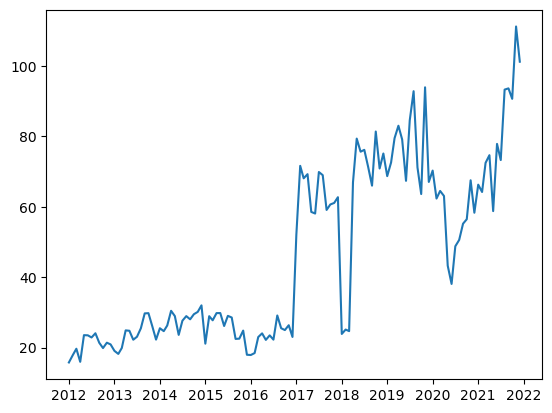

In [3]:
preserie = IMPOR[['VAFODO', 'fecha_completa']].copy()[0:120]
preserie['VAFODO'] = preserie['VAFODO']/1000000000
preserie['fecha_completa'] = pd.to_datetime(preserie['fecha_completa'])
serie = preserie.set_index('fecha_completa')
print(type(serie))
print(serie.size)
plt.plot(serie)

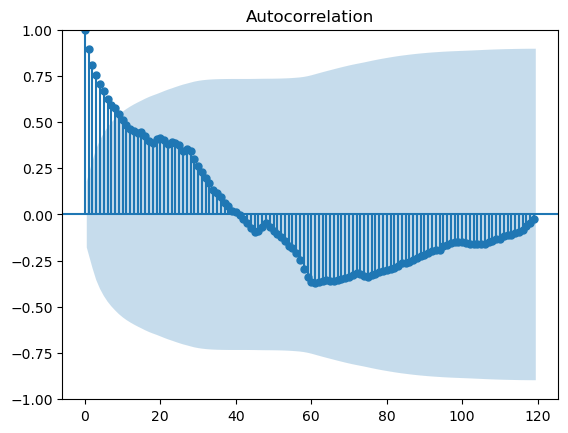

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(serie,lags=119)
pyplot.show()

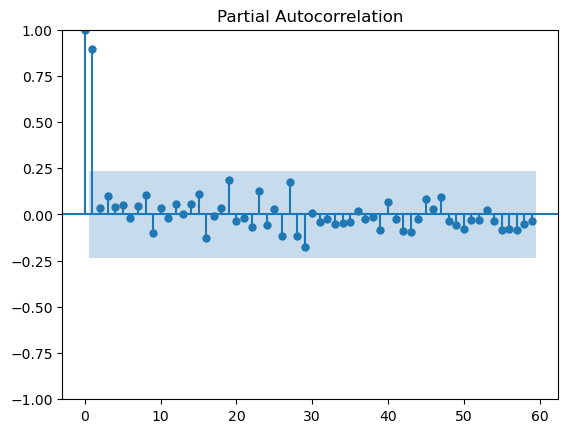

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(serie,lags=59,method='ywm',alpha=0.01)
pyplot.show()

## Variables rezagadas

In [6]:
from pandas import DataFrame

df1 = DataFrame()
print(df1)

for i in range(2,0,-1):
    df1[['t-'+str(i)]] = serie.shift(i)
    
df1['t'] = serie.values
print(df1)

Empty DataFrame
Columns: []
Index: []
                      t-2         t-1           t
fecha_completa                                   
2012-01-01            NaN         NaN   15.794190
2012-02-01            NaN   15.794190   17.870806
2012-03-01      15.794190   17.870806   19.698045
2012-04-01      17.870806   19.698045   15.978388
2012-05-01      19.698045   15.978388   23.555380
...                   ...         ...         ...
2021-08-01      77.876869   73.294931   93.301520
2021-09-01      73.294931   93.301520   93.652458
2021-10-01      93.301520   93.652458   90.678966
2021-11-01      93.652458   90.678966  111.232223
2021-12-01      90.678966  111.232223  101.222489

[120 rows x 3 columns]


In [7]:
df1 = df1.dropna()
print(df1.head(10))

                      t-2        t-1          t
fecha_completa                                 
2012-03-01      15.794190  17.870806  19.698045
2012-04-01      17.870806  19.698045  15.978388
2012-05-01      19.698045  15.978388  23.555380
2012-06-01      15.978388  23.555380  23.508741
2012-07-01      23.555380  23.508741  22.895706
2012-08-01      23.508741  22.895706  24.092434
2012-09-01      22.895706  24.092434  21.380283
2012-10-01      24.092434  21.380283  19.890050
2012-11-01      21.380283  19.890050  21.413027
2012-12-01      19.890050  21.413027  20.922583


# Dividir los datos

In [8]:
# Split data
seriesplit = df1.values

X2 = seriesplit[:, 0:-1]  
y2 = seriesplit[:, -1]   

# Observa los datos de entrada y salida
print(X2)
print(y2)

[[ 15.79419036  17.8708061 ]
 [ 17.8708061   19.69804544]
 [ 19.69804544  15.97838826]
 [ 15.97838826  23.55538027]
 [ 23.55538027  23.50874076]
 [ 23.50874076  22.89570569]
 [ 22.89570569  24.09243369]
 [ 24.09243369  21.3802833 ]
 [ 21.3802833   19.89005025]
 [ 19.89005025  21.4130272 ]
 [ 21.4130272   20.92258321]
 [ 20.92258321  19.08910897]
 [ 19.08910897  18.22694863]
 [ 18.22694863  19.90909662]
 [ 19.90909662  24.91026576]
 [ 24.91026576  24.8045108 ]
 [ 24.8045108   22.2548453 ]
 [ 22.2548453   23.10138699]
 [ 23.10138699  25.49426396]
 [ 25.49426396  29.73732701]
 [ 29.73732701  29.80212373]
 [ 29.80212373  26.07262678]
 [ 26.07262678  22.28919658]
 [ 22.28919658  25.51372306]
 [ 25.51372306  24.69301625]
 [ 24.69301625  26.29861934]
 [ 26.29861934  30.47064775]
 [ 30.47064775  28.97905815]
 [ 28.97905815  23.63121276]
 [ 23.63121276  27.66512923]
 [ 27.66512923  28.96313894]
 [ 28.96313894  28.05416209]
 [ 28.05416209  29.49981682]
 [ 29.49981682  30.16315773]
 [ 30.16315773

In [9]:
print(X2[1])
print(y2[1])

[17.8708061  19.69804544]
15.978388258


In [10]:
# Define el tamaño de los conjuntos de entrenamiento, validación y prueba
Y2 = y2
traintarget_size = int(len(Y2) * 0.70)
valtarget_size = int(len(Y2) * 0.1) + 1
testtarget_size = int(len(Y2) * 0.2)

In [11]:
# objetivo importaciones-Validation-Test split (70-10-20)
train_target, val_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:traintarget_size + valtarget_size], Y2[traintarget_size + valtarget_size:]
train_feature, val_feature, test_feature = X2[:traintarget_size], X2[traintarget_size:traintarget_size + valtarget_size], X2[traintarget_size + valtarget_size:]

In [12]:
# Observaciones totales para el objetivo
print('Observaciones totales para el objetivo: %d' % len(Y2))

# Observaciones de entrenamiento para el objetivo
print('Observaciones de entrenamiento para el objetivo: %d' % len(train_target))

# Observaciones de validación para el objetivo
print('Observaciones de validación para el objetivo: %d' % len(val_target))

# Observaciones de prueba para el objetivo
print('Observaciones de prueba para el objetivo: %d' % len(test_target))


Observaciones totales para el objetivo: 118
Observaciones de entrenamiento para el objetivo: 82
Observaciones de validación para el objetivo: 12
Observaciones de prueba para el objetivo: 24


In [13]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_serie = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree_serie.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:", decision_tree_serie.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:", decision_tree_serie.score(val_feature,val_target))
print("el RECM sobre validación es:", (((decision_tree_serie.predict(val_feature) - val_target) ** 2).mean()))

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: -4.172147798165841
el RECM sobre validación es: 488.8561321565375


In [14]:
# Find the best Max Depth
for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20]:
    # Create the tree and fit it
    decision_tree_serie = DecisionTreeRegressor(max_depth=d)
    decision_tree_serie.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:", decision_tree_serie.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:", decision_tree_serie.score(val_feature, val_target))
    print("el RECM sobre el conjunto de validación es:", sklearn.metrics.mean_squared_error(decision_tree_serie.predict(val_feature),val_target, squared=False), "\n")

max_depth= 1
Coeficiente R2 sobre el conjunto de entrenamiento: 0.803446091764037
Coeficiente R2 sobre el conjunto de validación: -1.1813682280980577
el RECM sobre el conjunto de validación es: 14.358846802402045 

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8456630311982555
Coeficiente R2 sobre el conjunto de validación: -1.0539383341458568
el RECM sobre el conjunto de validación es: 13.93313260995972 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9491443759057755
Coeficiente R2 sobre el conjunto de validación: -4.249385077335965
el RECM sobre el conjunto de validación es: 22.27456782154705 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9658801507721628
Coeficiente R2 sobre el conjunto de validación: -4.1622407708114775
el RECM sobre el conjunto de validación es: 22.08890556806363 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9783923293563958
Coeficiente R2 sobre el conjunto de validación: -4.2485546

C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [15]:
decision_tree_serie = DecisionTreeRegressor()
decision_tree_serie.fit(train_feature, train_target)

decision_tree_serie1 = DecisionTreeRegressor(max_depth=1)
decision_tree_serie1.fit(train_feature, train_target)

decision_tree_serie2 = DecisionTreeRegressor(max_depth=2)
decision_tree_serie2.fit(train_feature, train_target)


DecisionTreeRegressor(max_depth=2)

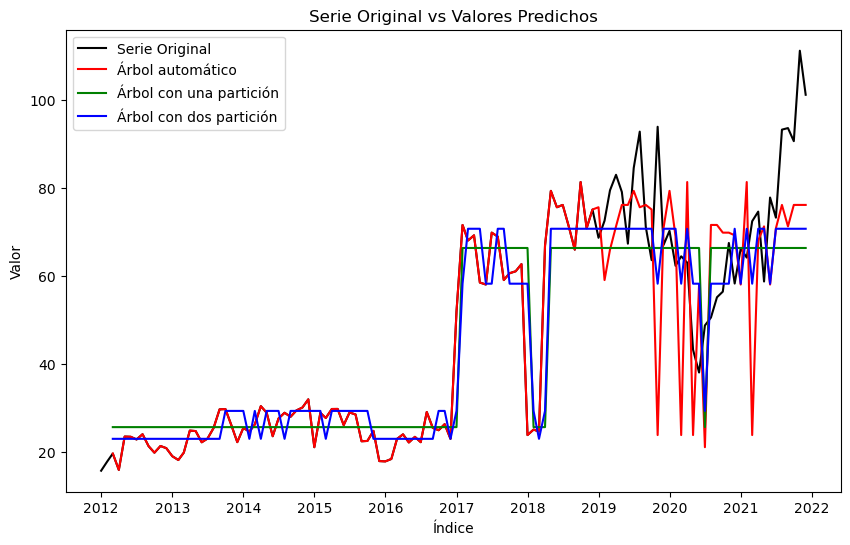

In [16]:
# Gráfico de la serie original y los valores predichos
plt.figure(figsize=(10, 6))
plt.plot(serie, color = 'black', label='Serie Original')
plt.plot(serie.index[2:], decision_tree_serie.predict(X2), color='red', label='Árbol automático')
plt.plot(serie.index[2:], decision_tree_serie1.predict(X2), color='green', label='Árbol con una partición')
plt.plot(serie.index[2:], decision_tree_serie2.predict(X2), color='blue', label='Árbol con dos partición')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Serie Original vs Valores Predichos')
plt.legend()
plt.show()

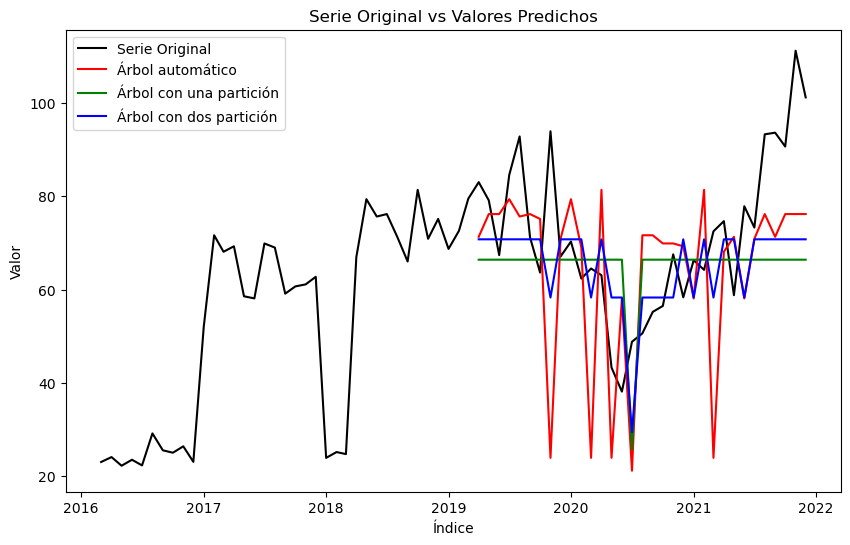

In [17]:
# Gráfico de la serie original y los valores predichos
plt.figure(figsize=(10, 6))
plt.plot(serie[50:], color = 'black', label='Serie Original')
plt.plot(serie.index[87:], decision_tree_serie.predict(X2[85:]), color='red', label='Árbol automático')
plt.plot(serie.index[87:], decision_tree_serie1.predict(X2[85:]), color='green', label='Árbol con una partición')
plt.plot(serie.index[87:], decision_tree_serie2.predict(X2[85:]), color='blue', label='Árbol con dos partición')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Serie Original vs Valores Predichos')
plt.legend()
plt.show()

# Usando penalización

In [18]:
path=decision_tree_serie.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 5.00480736e-06 2.72216084e-05 3.52974664e-05
 5.03054500e-05 6.09139766e-05 2.40178654e-04 5.98016962e-04
 6.12681396e-04 9.36355086e-04 9.77295462e-04 1.17587209e-03
 1.60903854e-03 1.92551501e-03 2.53157687e-03 3.27902014e-03
 3.42906480e-03 3.91162761e-03 4.18034726e-03 4.66377250e-03
 4.91123762e-03 5.13985753e-03 6.09156980e-03 6.60360062e-03
 8.30609309e-03 9.96085186e-03 1.05815867e-02 1.26807406e-02
 1.72824647e-02 1.86575844e-02 2.19487795e-02 2.45641768e-02
 2.77345076e-02 3.00784603e-02 3.10902325e-02 3.22989241e-02
 3.88504634e-02 5.20712909e-02 5.54888132e-02 5.79453256e-02
 6.21234509e-02 7.23935117e-02 7.50881052e-02 8.43649361e-02
 8.51167503e-02 1.06102675e-01 1.18052172e-01 1.26120880e-01
 1.42752125e-01 1.53437912e-01 1.85506417e-01 1.85911697e-01
 1.86303516e-01 2.48285731e-01 2.54458523e-01 2.86844631e-01
 3.64006887e-01 4.41396366e-01 5.54217486e-01 7.93526258e-01
 8.86851886e-01 1.66230635e+00 1.96051782e+00 2.26304992e+00
 2.59697293e+00 2.664605

In [23]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(train_feature, train_target)
    y_train_pred=tree.predict(train_feature)
    y_val_pred=tree.predict(val_feature)

    accuracy_train.append(sklearn.metrics.mean_squared_error(y_train_pred, train_target, squared=False))
    accuracy_test.append(sklearn.metrics.mean_squared_error(y_val_pred, val_target,squared=False))

C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

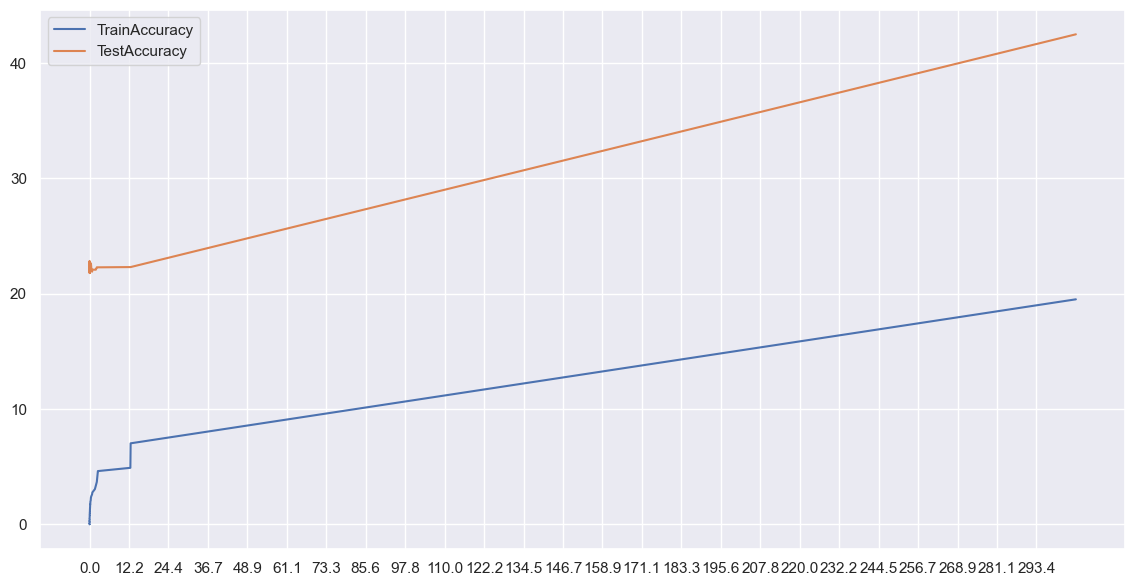

In [24]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="TestAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

In [25]:
# Calcula la diferencia entre las curvas de rendimiento del conjunto de entrenamiento y del conjunto de validación
difference = np.abs(np.array(accuracy_train) - np.array(accuracy_test))

# Encuentra el valor de ccp_alpha donde la diferencia es mínima
best_ccp_alpha_index = np.argmin(difference)
best_ccp_alpha = alphas[best_ccp_alpha_index]

print("El mejor valor de ccp_alpha es:", best_ccp_alpha)


El mejor valor de ccp_alpha es: 12.739016613117975


# Juntar Entrenamiento y Validación
Verficando las dimensiones del conjunto de prueba y del conjunto de entrenamiento para hacer las gráficas de comparación entre los verdaderos valores y sus pronóstico

In [26]:
# Imprime los tipos de los conjuntos de características de entrenamiento y validación
print("Tipo de objeto conjunto de entrenamiento: ", type(train_feature))
print("Tipo de objeto conjunto de validacion: ", type(val_feature))
print("\n")

# Imprime los tipos de los conjuntos de objetivos de entrenamiento y validación
print("Tipo de objeto conjunto de entrenamiento: ", type(train_target))
print("Tipo de objeto conjunto de validacion: ", type(val_target))
print("\n")

# Imprime las formas de los conjuntos de características de entrenamiento y validación
print("Caracteristicas del objeto conjunto de entrenamiento: ", train_feature.shape)
print("Caracteristicas del objeto conjunto de validacion: ", val_feature.shape)
print("\n")

# Imprime las formas de los conjuntos de objetivos de entrenamiento y validación
print("Cantidad de datos del objeto conjunto de entrenamiento: ", train_target.shape)
print("Cantidad de datos del objeto conjunto de validacion: ", val_target.shape)
print("\n")

# Concatenar las características de validación y prueba
train_val_feature = np.concatenate((train_feature, val_feature), axis=0)
train_val_target = np.concatenate((train_target, val_target), axis=0)

# Imprime las formas de los conjuntos de características y objetivos concatenados
print(train_val_feature.shape)
print(train_val_target.shape)

Tipo de objeto conjunto de entrenamiento:  <class 'numpy.ndarray'>
Tipo de objeto conjunto de validacion:  <class 'numpy.ndarray'>


Tipo de objeto conjunto de entrenamiento:  <class 'numpy.ndarray'>
Tipo de objeto conjunto de validacion:  <class 'numpy.ndarray'>


Caracteristicas del objeto conjunto de entrenamiento:  (82, 2)
Caracteristicas del objeto conjunto de validacion:  (12, 2)


Cantidad de datos del objeto conjunto de entrenamiento:  (82,)
Cantidad de datos del objeto conjunto de validacion:  (12,)


(94, 2)
(94,)


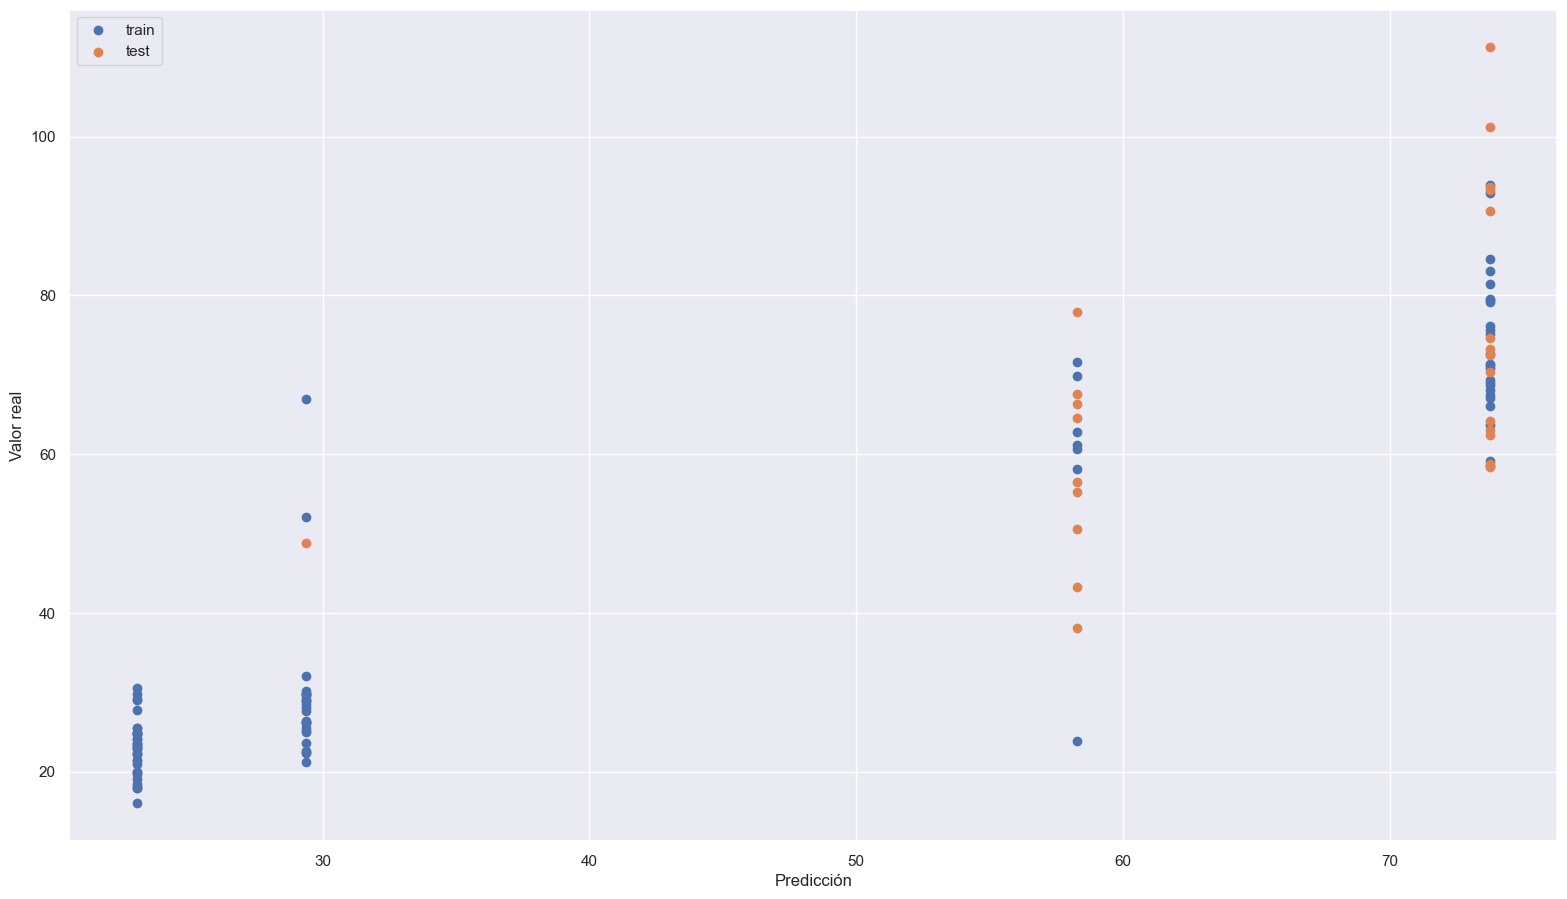

Raíz del Error Cuadrático Medio para Entrenamiento y Validación: 8.113113324930953
Raíz del Error Cuadrático Medio para Prueba: 15.39579163764712


C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gabop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
from matplotlib import pyplot as plt

# Utiliza la mejor profundidad máxima
best_max_depth = 2

decision_tree_serie = DecisionTreeRegressor(max_depth=best_max_depth)
decision_tree_serie.fit(train_val_feature, train_val_target)

# Predice los valores para entrenamiento y prueba
train_val_prediction = decision_tree_serie.predict(train_val_feature)
test_prediction = decision_tree_serie.predict(test_feature)

# Grafica la predicción vs los valores reales
plt.figure(figsize=(19.2, 10.8)) 
plt.scatter(train_val_prediction, train_val_target, label='train')  # azul
plt.scatter(test_prediction, test_target, label='test')  # naranja
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.legend()

plt.savefig('Scatter1_HD.png', dpi=100)  # Guardar como imagen PNG con resolución HD

plt.show()


# Calcula la raíz del error cuadrático medio para entrenamiento y prueba
rmse_train_val = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
rmse_test = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio para Entrenamiento y Validación:", rmse_train_val)
print("Raíz del Error Cuadrático Medio para Prueba:", rmse_test)


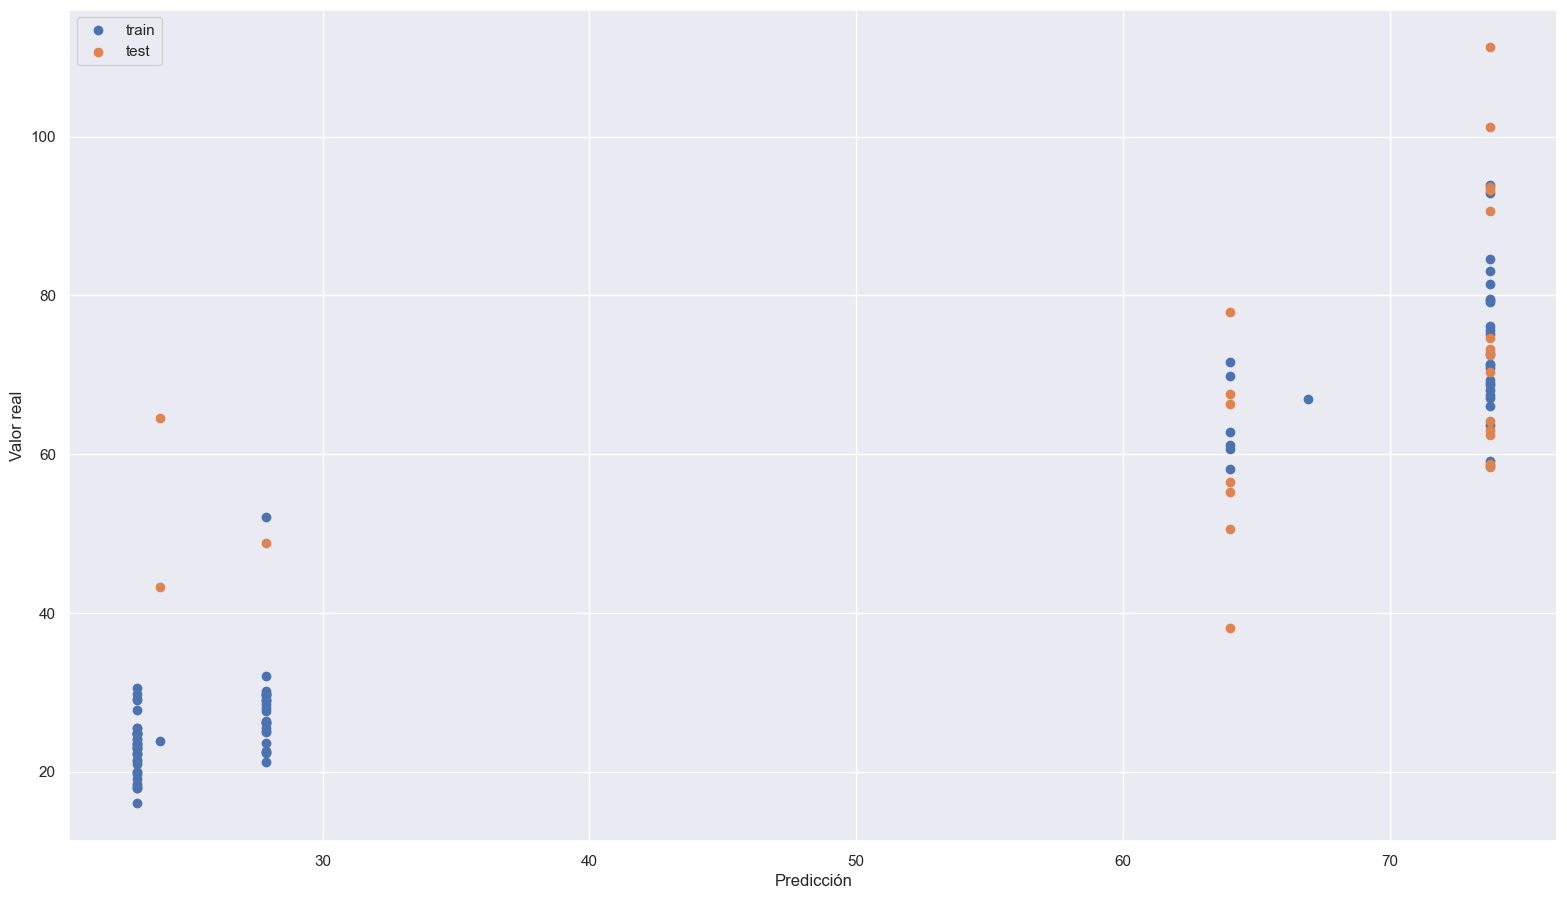

In [28]:
from matplotlib import pyplot as plt

# Utiliza el mejor ccp_alpha obtenido durante la poda
best_ccp_alpha = 9.49

decision_tree_PM25_prun_mincost = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)
decision_tree_PM25_prun_mincost.fit(train_val_feature, train_val_target)

# Predice los valores para entrenamiento y prueba
train_val_prediction_prun_mincost = decision_tree_PM25_prun_mincost.predict(train_val_feature)
test_prediction_prun_mincost = decision_tree_PM25_prun_mincost.predict(test_feature)

# Grafica la predicción vs los valores reales
plt.figure(figsize=(19.2, 10.8)) 
plt.scatter(train_val_prediction_prun_mincost, train_val_target, label='train')  # azul
plt.scatter(test_prediction_prun_mincost, test_target, label='test')  # naranja
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.legend()

plt.savefig('Scatter2.png', dpi=100)  # Guardar como imagen PNG con resolución HD

plt.show()

In [29]:
from sklearn import tree

# Obtén la lista de nombres de características y la variable de respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()

# Genera la representación de texto del árbol de decisión podado
text_representation = tree.export_text(decision_tree_PM25_prun_mincost)
print(text_representation)


|--- feature_1 <= 42.02
|   |--- feature_0 <= 25.07
|   |   |--- value: [23.04]
|   |--- feature_0 >  25.07
|   |   |--- feature_0 <= 25.32
|   |   |   |--- value: [66.95]
|   |   |--- feature_0 >  25.32
|   |   |   |--- value: [27.88]
|--- feature_1 >  42.02
|   |--- feature_1 <= 63.19
|   |   |--- feature_1 <= 61.93
|   |   |   |--- value: [64.03]
|   |   |--- feature_1 >  61.93
|   |   |   |--- value: [23.90]
|   |--- feature_1 >  63.19
|   |   |--- value: [73.75]



In [30]:
fig = plt.figure(figsize=(19.2, 10.8))  # Tamaño en pulgadas (HD 1920x1080)
_ = tree.plot_tree(decision_tree_serie_prun_mincost, 
                   feature_names=listacaract,  
                   class_names=[respuesta],  
                   filled=True)
plt.savefig('arbol_decision_HD.png', dpi=100)  # Guardar como imagen PNG con resolución HD
plt.show()

NameError: name 'decision_tree_serie_prun_mincost' is not defined

<Figure size 1920x1080 with 0 Axes>

## Redes Neuronales

In [31]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp
import tensorflow.keras as keras

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train_full, X_test, y_train_full, y_test=train_test_split(X2,Y2,
                                                            test_size=0.1, 
                                                            train_size=0.9,
                                                            shuffle=False)
                    # shuffle debe ser false si no se está rompiendo la estructura temporal de los datos
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(106, 2)
(12, 2)
(106,)
(12,)


In [33]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.2, train_size=0.8,shuffle=False)
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(84, 2)
(22, 2)
(84,)
(22,)


In [34]:
84+22+12

118

In [35]:
# Normalización de las covariables
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test) 
X_train

array([[0.        , 0.02892873],
       [0.03165537, 0.05686111],
       [0.05950931, 0.        ],
       [0.00280786, 0.11582684],
       [0.11830948, 0.11511388],
       [0.11759852, 0.10574263],
       [0.10825358, 0.12403659],
       [0.12649618, 0.08257689],
       [0.08515289, 0.05979622],
       [0.06243618, 0.08307744],
       [0.08565203, 0.07558019],
       [0.07817583, 0.04755251],
       [0.05022685, 0.03437296],
       [0.03708431, 0.06008737],
       [0.06272652, 0.1365385 ],
       [0.13896299, 0.13492187],
       [0.13735089, 0.09594602],
       [0.09848448, 0.1088868 ],
       [0.11138893, 0.14546588],
       [0.1478653 , 0.21032811],
       [0.2125454 , 0.21131864],
       [0.21353314, 0.15430711],
       [0.1566817 , 0.09647113],
       [0.09900812, 0.14576335],
       [0.14816193, 0.13321749],
       [0.13565129, 0.15776178],
       [0.16012667, 0.22153813],
       [0.22372394, 0.19873672],
       [0.20098656, 0.11698607],
       [0.11946545, 0.17865114],
       [0.

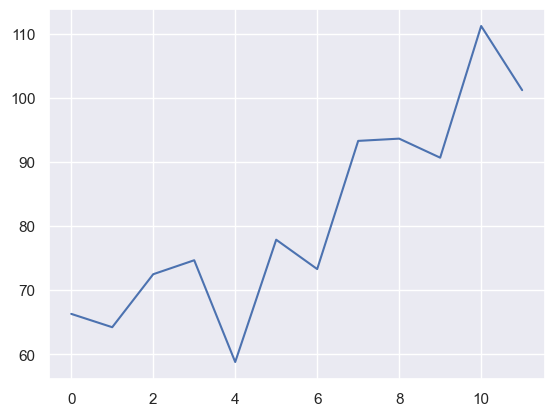

In [36]:
plt.plot(y_test)

### Red neurnoal con una sola capa (MLP)

In [37]:
modelo = keras.models.Sequential([keras.layers.Dense(64,
                                                    activation = "relu", 
                                                     input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(1)])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [38]:
print(X_train.shape)
print(y_train.shape)
print(84/16)

(84, 2)
(84,)
5.25


In [39]:
modelo.compile(loss = "mean_squared_error", # función de pérdida
               optimizer = "adam") # método númerico para hacer la minimización
history = modelo.fit(X_train, y_train, 
                     epochs = 700, 
                     validation_data = (X_val, y_val))

Epoch 1/700
3/3 [==============================] - 0s 58ms/step - loss: 1730.7163 - val_loss: 4622.9165
Epoch 2/700
3/3 [==============================] - 0s 14ms/step - loss: 1728.2542 - val_loss: 4616.4146
Epoch 3/700
3/3 [==============================] - 0s 14ms/step - loss: 1725.8112 - val_loss: 4609.8145
Epoch 4/700
3/3 [==============================] - 0s 10ms/step - loss: 1723.2880 - val_loss: 4603.0859
Epoch 5/700
3/3 [==============================] - 0s 14ms/step - loss: 1720.6283 - val_loss: 4596.2612
Epoch 6/700
3/3 [==============================] - 0s 10ms/step - loss: 1717.9766 - val_loss: 4589.3955
Epoch 7/700
3/3 [==============================] - 0s 13ms/step - loss: 1715.3538 - val_loss: 4582.3223
Epoch 8/700
3/3 [==============================] - 0s 10ms/step - loss: 1712.5983 - val_loss: 4575.0498
Epoch 9/700
3/3 [==============================] - 0s 14ms/step - loss: 1709.8345 - val_loss: 4567.5449
Epoch 10/700
3/3 [==============================] - 0s 10ms/step

3/3 [==============================] - 0s 14ms/step - loss: 1170.6104 - val_loss: 3163.3274
Epoch 80/700
3/3 [==============================] - 0s 9ms/step - loss: 1158.0477 - val_loss: 3131.9436
Epoch 81/700
3/3 [==============================] - 0s 8ms/step - loss: 1146.2535 - val_loss: 3100.3025
Epoch 82/700
3/3 [==============================] - 0s 15ms/step - loss: 1133.7070 - val_loss: 3068.9006
Epoch 83/700
3/3 [==============================] - 0s 9ms/step - loss: 1121.5184 - val_loss: 3037.1431
Epoch 84/700
3/3 [==============================] - 0s 8ms/step - loss: 1109.1552 - val_loss: 3005.2048
Epoch 85/700
3/3 [==============================] - 0s 15ms/step - loss: 1097.1915 - val_loss: 2972.8701
Epoch 86/700
3/3 [==============================] - 0s 8ms/step - loss: 1084.2806 - val_loss: 2940.8196
Epoch 87/700
3/3 [==============================] - 0s 8ms/step - loss: 1072.3512 - val_loss: 2908.2849
Epoch 88/700
3/3 [==============================] - 0s 10ms/step - loss: 1

3/3 [==============================] - 0s 10ms/step - loss: 308.8603 - val_loss: 857.8965
Epoch 158/700
3/3 [==============================] - 0s 8ms/step - loss: 302.6655 - val_loss: 838.2504
Epoch 159/700
3/3 [==============================] - 0s 14ms/step - loss: 295.7792 - val_loss: 819.2213
Epoch 160/700
3/3 [==============================] - 0s 9ms/step - loss: 289.7660 - val_loss: 800.3329
Epoch 161/700
3/3 [==============================] - 0s 8ms/step - loss: 283.6324 - val_loss: 782.0752
Epoch 162/700
3/3 [==============================] - 0s 16ms/step - loss: 277.2912 - val_loss: 764.5867
Epoch 163/700
3/3 [==============================] - 0s 8ms/step - loss: 271.2764 - val_loss: 747.5822
Epoch 164/700
3/3 [==============================] - 0s 15ms/step - loss: 265.4024 - val_loss: 730.9105
Epoch 165/700
3/3 [==============================] - 0s 9ms/step - loss: 259.9545 - val_loss: 714.2513
Epoch 166/700
3/3 [==============================] - 0s 8ms/step - loss: 254.4512 -

3/3 [==============================] - 0s 11ms/step - loss: 107.4238 - val_loss: 204.2734
Epoch 237/700
3/3 [==============================] - 0s 11ms/step - loss: 107.0808 - val_loss: 202.4855
Epoch 238/700
3/3 [==============================] - 0s 11ms/step - loss: 106.7380 - val_loss: 200.7278
Epoch 239/700
3/3 [==============================] - 0s 10ms/step - loss: 106.4016 - val_loss: 199.0056
Epoch 240/700
3/3 [==============================] - 0s 11ms/step - loss: 106.1400 - val_loss: 197.2835
Epoch 241/700
3/3 [==============================] - 0s 10ms/step - loss: 105.7799 - val_loss: 195.7257
Epoch 242/700
3/3 [==============================] - 0s 10ms/step - loss: 105.5220 - val_loss: 194.1583
Epoch 243/700
3/3 [==============================] - 0s 11ms/step - loss: 105.2552 - val_loss: 192.6650
Epoch 244/700
3/3 [==============================] - 0s 11ms/step - loss: 105.0259 - val_loss: 191.2289
Epoch 245/700
3/3 [==============================] - 0s 11ms/step - loss: 104.

3/3 [==============================] - 0s 10ms/step - loss: 97.7266 - val_loss: 155.4813
Epoch 316/700
3/3 [==============================] - 0s 9ms/step - loss: 97.6759 - val_loss: 155.2490
Epoch 317/700
3/3 [==============================] - 0s 15ms/step - loss: 97.6149 - val_loss: 155.0866
Epoch 318/700
3/3 [==============================] - 0s 8ms/step - loss: 97.5489 - val_loss: 154.9210
Epoch 319/700
3/3 [==============================] - 0s 9ms/step - loss: 97.4923 - val_loss: 154.7594
Epoch 320/700
3/3 [==============================] - 0s 10ms/step - loss: 97.4252 - val_loss: 154.6783
Epoch 321/700
3/3 [==============================] - 0s 8ms/step - loss: 97.3743 - val_loss: 154.5446
Epoch 322/700
3/3 [==============================] - 0s 15ms/step - loss: 97.3209 - val_loss: 154.4509
Epoch 323/700
3/3 [==============================] - 0s 9ms/step - loss: 97.2753 - val_loss: 154.2523
Epoch 324/700
3/3 [==============================] - 0s 16ms/step - loss: 97.2046 - val_loss

3/3 [==============================] - 0s 10ms/step - loss: 93.6859 - val_loss: 147.3609
Epoch 396/700
3/3 [==============================] - 0s 12ms/step - loss: 93.6393 - val_loss: 147.2737
Epoch 397/700
3/3 [==============================] - 0s 11ms/step - loss: 93.5963 - val_loss: 147.1939
Epoch 398/700
3/3 [==============================] - 0s 9ms/step - loss: 93.5494 - val_loss: 147.0480
Epoch 399/700
3/3 [==============================] - 0s 8ms/step - loss: 93.5011 - val_loss: 146.9627
Epoch 400/700
3/3 [==============================] - 0s 15ms/step - loss: 93.4529 - val_loss: 146.8686
Epoch 401/700
3/3 [==============================] - 0s 8ms/step - loss: 93.4091 - val_loss: 146.7814
Epoch 402/700
3/3 [==============================] - 0s 8ms/step - loss: 93.3619 - val_loss: 146.7859
Epoch 403/700
3/3 [==============================] - 0s 16ms/step - loss: 93.3189 - val_loss: 146.7563
Epoch 404/700
3/3 [==============================] - 0s 8ms/step - loss: 93.2640 - val_loss

3/3 [==============================] - 0s 13ms/step - loss: 90.3210 - val_loss: 143.8166
Epoch 476/700
3/3 [==============================] - 0s 9ms/step - loss: 90.2868 - val_loss: 143.7958
Epoch 477/700
3/3 [==============================] - 0s 8ms/step - loss: 90.2471 - val_loss: 143.7423
Epoch 478/700
3/3 [==============================] - 0s 15ms/step - loss: 90.2062 - val_loss: 143.7016
Epoch 479/700
3/3 [==============================] - 0s 9ms/step - loss: 90.1677 - val_loss: 143.6065
Epoch 480/700
3/3 [==============================] - 0s 8ms/step - loss: 90.1393 - val_loss: 143.5033
Epoch 481/700
3/3 [==============================] - 0s 16ms/step - loss: 90.0978 - val_loss: 143.4512
Epoch 482/700
3/3 [==============================] - 0s 11ms/step - loss: 90.0633 - val_loss: 143.3599
Epoch 483/700
3/3 [==============================] - 0s 10ms/step - loss: 90.0291 - val_loss: 143.3257
Epoch 484/700
3/3 [==============================] - 0s 11ms/step - loss: 89.9800 - val_los

3/3 [==============================] - 0s 10ms/step - loss: 87.7428 - val_loss: 141.0468
Epoch 555/700
3/3 [==============================] - 0s 11ms/step - loss: 87.7149 - val_loss: 141.0130
Epoch 556/700
3/3 [==============================] - 0s 10ms/step - loss: 87.6901 - val_loss: 140.9767
Epoch 557/700
3/3 [==============================] - 0s 11ms/step - loss: 87.6618 - val_loss: 140.9451
Epoch 558/700
3/3 [==============================] - 0s 10ms/step - loss: 87.6421 - val_loss: 140.9551
Epoch 559/700
3/3 [==============================] - 0s 10ms/step - loss: 87.6196 - val_loss: 140.8984
Epoch 560/700
3/3 [==============================] - 0s 10ms/step - loss: 87.5762 - val_loss: 140.9024
Epoch 561/700
3/3 [==============================] - 0s 10ms/step - loss: 87.5530 - val_loss: 140.9160
Epoch 562/700
3/3 [==============================] - 0s 10ms/step - loss: 87.5415 - val_loss: 140.9461
Epoch 563/700
3/3 [==============================] - 0s 11ms/step - loss: 87.5071 - val

3/3 [==============================] - 0s 11ms/step - loss: 85.7725 - val_loss: 139.9026
Epoch 635/700
3/3 [==============================] - 0s 8ms/step - loss: 85.7652 - val_loss: 139.8850
Epoch 636/700
3/3 [==============================] - 0s 17ms/step - loss: 85.7312 - val_loss: 139.8773
Epoch 637/700
3/3 [==============================] - 0s 8ms/step - loss: 85.7171 - val_loss: 139.8862
Epoch 638/700
3/3 [==============================] - 0s 15ms/step - loss: 85.7105 - val_loss: 139.8552
Epoch 639/700
3/3 [==============================] - 0s 9ms/step - loss: 85.6652 - val_loss: 139.8814
Epoch 640/700
3/3 [==============================] - 0s 8ms/step - loss: 85.6552 - val_loss: 139.9246
Epoch 641/700
3/3 [==============================] - 0s 16ms/step - loss: 85.6233 - val_loss: 139.9375
Epoch 642/700
3/3 [==============================] - 0s 9ms/step - loss: 85.6051 - val_loss: 139.9285
Epoch 643/700
3/3 [==============================] - 0s 8ms/step - loss: 85.5865 - val_loss:

    - Epoch
    - 3/3: número de lotes.
    - loss: pérdida para el conjunto de entrenamiento.
    - val_loss: pérdida para el conjunto de validación.

<Axes: >

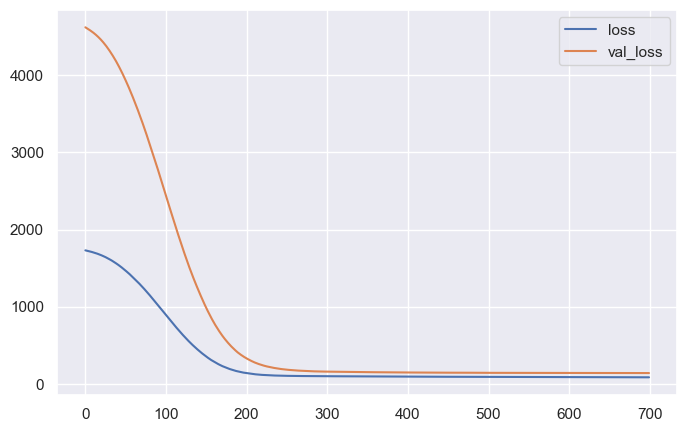

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [41]:
# Pérdida cuadrática sobre el conjunto de prueba
mse_test = modelo.evaluate(X_test,y_test) 

1/1 [==============================] - 0s 20ms/step - loss: 143.2952


In [42]:
ypred = modelo.predict(X_test)
print(ypred)

1/1 [==============================] - 0s 54ms/step
[[60.52939 ]
 [61.63219 ]
 [63.329914]
 [67.14282 ]
 [71.29465 ]
 [63.325935]
 [68.1714  ]
 [72.456375]
 [81.83296 ]
 [89.16614 ]
 [87.65343 ]
 [97.747375]]


Text(0.5, 0, 'Index')

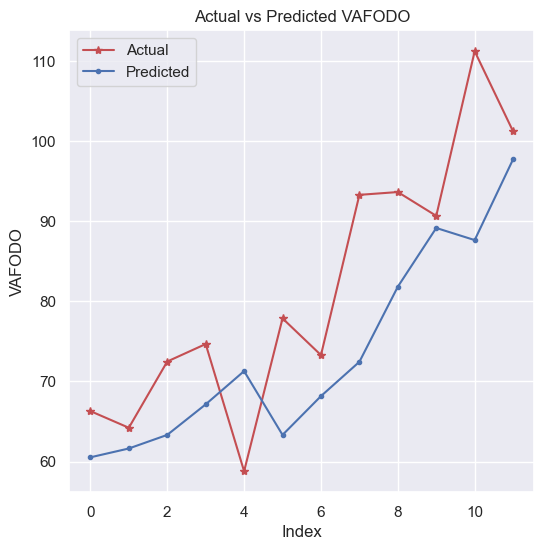

In [43]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted VAFODO')
plt.ylabel('VAFODO')
plt.xlabel('Index')

### Red Neuronal con más de una capa

In [44]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(16,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(16,activation="linear")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)
#output_layer = keras.layers.Dense(1, activation='linear')(dropout_layer)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [45]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [46]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)
type(X_train)

Input shape: (84, 2)
Target shape: (84,)


numpy.ndarray

In [47]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,
                     epochs=500,
                     batch_size=16,
                     validation_data=(X_val,y_val))

Epoch 1/500
6/6 [==============================] - 1s 19ms/step - loss: 1710.1580 - val_loss: 4528.0044
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1691.2330 - val_loss: 4471.8545
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1670.8549 - val_loss: 4409.2344
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1646.1949 - val_loss: 4334.1606
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1619.3287 - val_loss: 4241.0708
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1582.1051 - val_loss: 4128.4141
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1539.7507 - val_loss: 3989.2773
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 1484.9637 - val_loss: 3825.8552
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 1420.0420 - val_loss: 3623.6812
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 

6/6 [==============================] - 0s 5ms/step - loss: 78.1688 - val_loss: 140.7192
Epoch 82/500
6/6 [==============================] - 0s 5ms/step - loss: 78.1627 - val_loss: 139.8397
Epoch 83/500
6/6 [==============================] - 0s 5ms/step - loss: 77.8234 - val_loss: 139.4817
Epoch 84/500
6/6 [==============================] - 0s 5ms/step - loss: 77.6150 - val_loss: 139.4262
Epoch 85/500
6/6 [==============================] - 0s 5ms/step - loss: 77.5470 - val_loss: 139.4530
Epoch 86/500
6/6 [==============================] - 0s 5ms/step - loss: 77.5199 - val_loss: 139.4282
Epoch 87/500
6/6 [==============================] - 0s 5ms/step - loss: 77.5830 - val_loss: 139.4319
Epoch 88/500
6/6 [==============================] - 0s 5ms/step - loss: 77.5418 - val_loss: 139.7835
Epoch 89/500
6/6 [==============================] - 0s 5ms/step - loss: 77.3414 - val_loss: 139.9451
Epoch 90/500
6/6 [==============================] - 0s 5ms/step - loss: 77.3179 - val_loss: 140.1699
Epo

6/6 [==============================] - 0s 4ms/step - loss: 73.1456 - val_loss: 145.7212
Epoch 162/500
6/6 [==============================] - 0s 6ms/step - loss: 73.1084 - val_loss: 145.1126
Epoch 163/500
6/6 [==============================] - 0s 3ms/step - loss: 72.6685 - val_loss: 144.4647
Epoch 164/500
6/6 [==============================] - 0s 4ms/step - loss: 73.1124 - val_loss: 144.5709
Epoch 165/500
6/6 [==============================] - 0s 6ms/step - loss: 72.8718 - val_loss: 144.9342
Epoch 166/500
6/6 [==============================] - 0s 3ms/step - loss: 72.6985 - val_loss: 145.3266
Epoch 167/500
6/6 [==============================] - 0s 7ms/step - loss: 72.7182 - val_loss: 145.5025
Epoch 168/500
6/6 [==============================] - 0s 3ms/step - loss: 72.5752 - val_loss: 145.1964
Epoch 169/500
6/6 [==============================] - 0s 4ms/step - loss: 72.7095 - val_loss: 145.1537
Epoch 170/500
6/6 [==============================] - 0s 6ms/step - loss: 72.7183 - val_loss: 145

6/6 [==============================] - 0s 5ms/step - loss: 71.5825 - val_loss: 152.7756
Epoch 242/500
6/6 [==============================] - 0s 5ms/step - loss: 70.9153 - val_loss: 153.1013
Epoch 243/500
6/6 [==============================] - 0s 5ms/step - loss: 71.0530 - val_loss: 153.4358
Epoch 244/500
6/6 [==============================] - 0s 5ms/step - loss: 70.8640 - val_loss: 153.2161
Epoch 245/500
6/6 [==============================] - 0s 5ms/step - loss: 71.0378 - val_loss: 153.4000
Epoch 246/500
6/6 [==============================] - 0s 5ms/step - loss: 70.2880 - val_loss: 155.8105
Epoch 247/500
6/6 [==============================] - 0s 5ms/step - loss: 73.4333 - val_loss: 160.1779
Epoch 248/500
6/6 [==============================] - 0s 5ms/step - loss: 72.4199 - val_loss: 154.6775
Epoch 249/500
6/6 [==============================] - 0s 5ms/step - loss: 70.9449 - val_loss: 153.5142
Epoch 250/500
6/6 [==============================] - 0s 5ms/step - loss: 71.2763 - val_loss: 153

6/6 [==============================] - 0s 3ms/step - loss: 70.8223 - val_loss: 157.2861
Epoch 322/500
6/6 [==============================] - 0s 4ms/step - loss: 71.8106 - val_loss: 157.1083
Epoch 323/500
6/6 [==============================] - 0s 6ms/step - loss: 71.1396 - val_loss: 157.0388
Epoch 324/500
6/6 [==============================] - 0s 3ms/step - loss: 71.0098 - val_loss: 158.5552
Epoch 325/500
6/6 [==============================] - 0s 7ms/step - loss: 70.9257 - val_loss: 163.3033
Epoch 326/500
6/6 [==============================] - 0s 3ms/step - loss: 71.1884 - val_loss: 159.0747
Epoch 327/500
6/6 [==============================] - 0s 4ms/step - loss: 70.3289 - val_loss: 157.0354
Epoch 328/500
6/6 [==============================] - 0s 6ms/step - loss: 70.9022 - val_loss: 157.0479
Epoch 329/500
6/6 [==============================] - 0s 4ms/step - loss: 70.9095 - val_loss: 157.2137
Epoch 330/500
6/6 [==============================] - 0s 6ms/step - loss: 70.9258 - val_loss: 158

6/6 [==============================] - 0s 5ms/step - loss: 71.9781 - val_loss: 160.5466
Epoch 402/500
6/6 [==============================] - 0s 5ms/step - loss: 72.1169 - val_loss: 158.8885
Epoch 403/500
6/6 [==============================] - 0s 5ms/step - loss: 70.6265 - val_loss: 160.0861
Epoch 404/500
6/6 [==============================] - 0s 5ms/step - loss: 71.9022 - val_loss: 162.1881
Epoch 405/500
6/6 [==============================] - 0s 5ms/step - loss: 71.2679 - val_loss: 159.1365
Epoch 406/500
6/6 [==============================] - 0s 5ms/step - loss: 70.7174 - val_loss: 159.1560
Epoch 407/500
6/6 [==============================] - 0s 5ms/step - loss: 70.8101 - val_loss: 159.1450
Epoch 408/500
6/6 [==============================] - 0s 5ms/step - loss: 70.6378 - val_loss: 159.2754
Epoch 409/500
6/6 [==============================] - 0s 5ms/step - loss: 70.6526 - val_loss: 158.8852
Epoch 410/500
6/6 [==============================] - 0s 5ms/step - loss: 70.9145 - val_loss: 159

6/6 [==============================] - 0s 5ms/step - loss: 70.5764 - val_loss: 160.9644
Epoch 482/500
6/6 [==============================] - 0s 5ms/step - loss: 70.5466 - val_loss: 160.6094
Epoch 483/500
6/6 [==============================] - 0s 5ms/step - loss: 70.7597 - val_loss: 160.4685
Epoch 484/500
6/6 [==============================] - 0s 5ms/step - loss: 70.7217 - val_loss: 160.4824
Epoch 485/500
6/6 [==============================] - 0s 5ms/step - loss: 70.6191 - val_loss: 160.7063
Epoch 486/500
6/6 [==============================] - 0s 5ms/step - loss: 70.7281 - val_loss: 161.5884
Epoch 487/500
6/6 [==============================] - 0s 4ms/step - loss: 71.1030 - val_loss: 162.6728
Epoch 488/500
6/6 [==============================] - 0s 4ms/step - loss: 70.8062 - val_loss: 160.7358
Epoch 489/500
6/6 [==============================] - 0s 6ms/step - loss: 71.1099 - val_loss: 160.6089
Epoch 490/500
6/6 [==============================] - 0s 4ms/step - loss: 70.0808 - val_loss: 164

<Axes: >

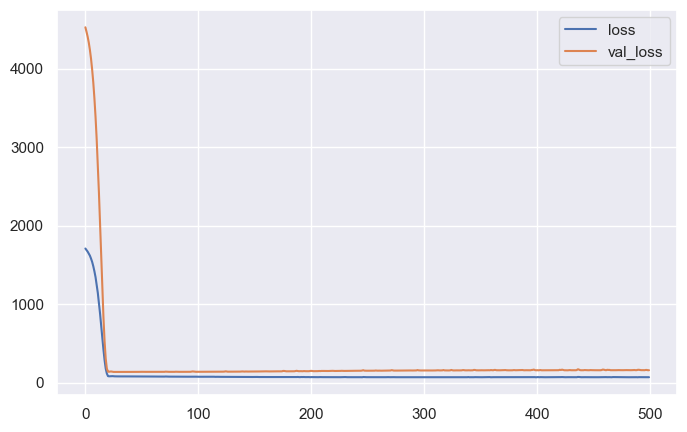

In [48]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [49]:
mse_test=ts_model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 164.5588


In [50]:
preds_ts_model=ts_model.predict(X_test)
print(preds_ts_model)

1/1 [==============================] - 0s 39ms/step
[[ 56.8789  ]
 [ 65.53    ]
 [ 62.851448]
 [ 71.26254 ]
 [ 72.81432 ]
 [ 56.79914 ]
 [ 77.04718 ]
 [ 71.03136 ]
 [ 91.34299 ]
 [ 90.18024 ]
 [ 87.186356]
 [107.92188 ]]


Text(0.5, 0, 'Index')

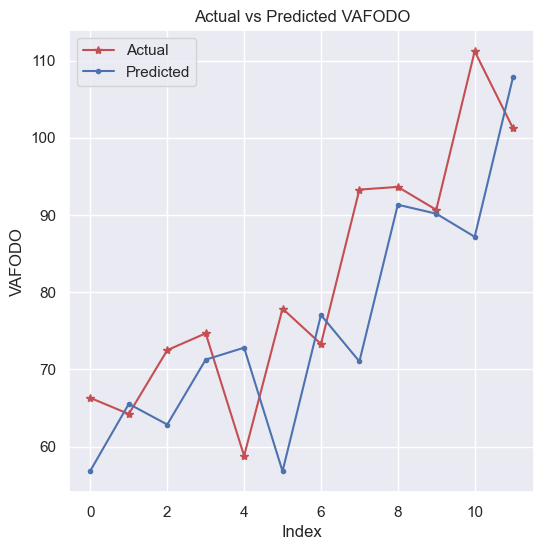

In [51]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted VAFODO')
plt.ylabel('VAFODO')
plt.xlabel('Index')

## Red Neuronal Recurrente

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
from datetime import timedelta

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

import tensorflow.keras as keras

In [92]:
sample = serie['VAFODO'][:120]
adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(sample)
adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

ADF: -1.7814890336489373
p-value: 0.389689824943941,
N: 119, 
critical values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


p-value: 0.38968982494394133, no se puede rechazar la hipotesisi nula de presencia de raiz unitaria entonces es una serie no estacionaria (debido a la presencia de una raíz unitaria)

In [93]:
use_features = ['VAFODO'] # continuous input
target = ['VAFODO'] # continuous output
n_steps_ahead = 4 # forecasting horizon

In [94]:
pacf = sm.tsa.stattools.pacf(serie, nlags=30)
T = len(serie)

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)

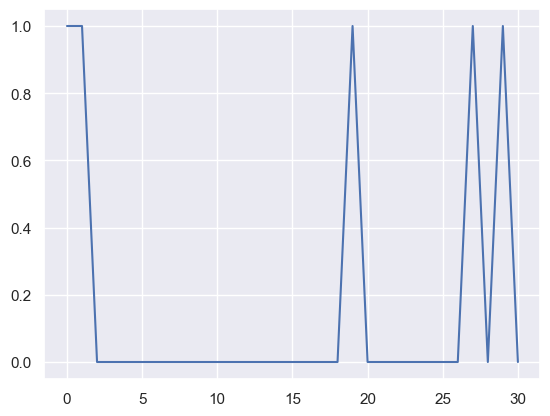

In [95]:
 plt.plot(sig_test(pacf))
    # preguntar para que es el sig_test

In [96]:
for i in range(len(pacf)):
    if sig_test(pacf[i+1]) == False:
        n_steps = i - 1
        print('n_steps set to', n_steps)
        break


n_steps set to 0


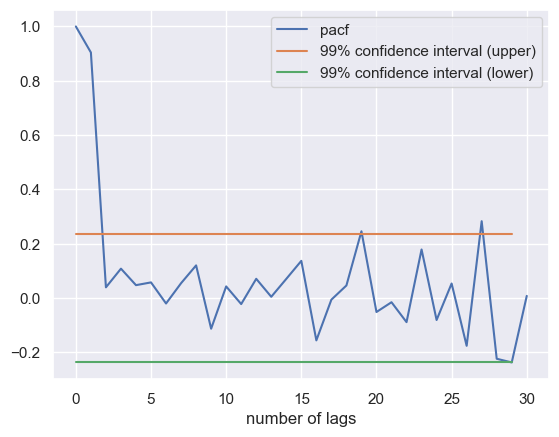

In [97]:
plt.plot(pacf, label='pacf')
plt.plot([2.58/np.sqrt(T)]*30, label='99% confidence interval (upper)')
plt.plot([-2.58/np.sqrt(T)]*30, label='99% confidence interval (lower)')
plt.xlabel('number of lags')
plt.legend();

### Validación cruzada

In [98]:
train_weight = 0.8 
split = int(len(serie) * train_weight)

df_train = serie[use_features].iloc[:split]
df_test = serie[use_features].iloc[split:]

In [99]:
# Estandarización 
mu = float(df_train.mean().iloc[0])
sigma = float(df_train.std().iloc[0])

stdize_input = lambda x: (x - mu) / sigma

df_train = df_train.apply(stdize_input)
df_test = df_test.apply(stdize_input)

In [100]:
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e. sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    lag_array = np.dstack([i[n_steps+n_steps_ahead-1:] for i in lag_list])
    # We swap the last two dimensions so each slice along the first dimension
    # is the same shape as the corresponding segment of the input time series 
    lag_array = np.swapaxes(lag_array, 1, -1)
    return lag_array

In [101]:
n_steps = 4
# Configurar entradas, respuestas y tiempos para el conjunto de entrenamiento
x_train = get_lagged_features(df_train, n_steps, n_steps_ahead)
y_train =  df_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = df_train.index[n_steps + n_steps_ahead - 1:]

# Configurar entradas, respuestas y tiempos para el conjunto de prueba
x_test = get_lagged_features(df_test, n_steps, n_steps_ahead)
y_test =  df_test.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = df_test.index[n_steps + n_steps_ahead - 1:]

print([tensor.shape for tensor in (x_train, y_train, x_test, y_test)])

[(89, 4, 1), (89, 1), (17, 4, 1), (17, 1)]


###  Especificación del modelo

In [102]:
def SimpleRNN_(n_units = 10, l1_reg=0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.SimpleRNN(n_units, # usamos layeres simples RNN simple, definimos 10 unidades de entrada (n_units)
                                   activation='tanh', # función de activación tangente hiperbolico
                                   kernel_initializer=keras.initializers.glorot_uniform(seed), # inicial del peso aleatorio
                                   bias_initializer=keras.initializers.glorot_uniform(seed), # inicial del sesgo aleatorio
                                   recurrent_initializer=keras.initializers.orthogonal(seed), #
                                   kernel_regularizer=keras.regularizers.l1(l1_reg), # funcion para controlar exceso de ajuste
                                   input_shape=(x_train.shape[1], x_train.shape[-1]), # dimensión de la entrada
                                   unroll=True, # siempre debe ir en True, al ser RNN
                                   stateful=False)) # ... 
    # Definimos las salidas
  model.add(keras.layers.Dense(1, # respuesta univariada n pasos adelante
                               kernel_initializer=keras.initializers.glorot_uniform(seed), 
                               bias_initializer=keras.initializers.glorot_uniform(seed),
                               kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def GRU_(n_units = 10, l1_reg=0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.GRU(n_units, # usamos capa GRU
                             activation='tanh',
                             kernel_initializer=keras.initializers.glorot_uniform(seed),
                             bias_initializer=keras.initializers.glorot_uniform(seed), 
                             recurrent_initializer=keras.initializers.orthogonal(seed),
                             kernel_regularizer=keras.regularizers.l1(l1_reg),
                             input_shape=(x_train.shape[1], x_train.shape[-1]),
                             unroll=True))  
  model.add(keras.layers.Dense(1, 
                               kernel_initializer=keras.initializers.glorot_uniform(seed),
                               bias_initializer=keras.initializers.glorot_uniform(seed),
                               kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def LSTM_(n_units = 10, l1_reg=0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, # Se usa una capa LSTM
                              activation='tanh',
                              kernel_initializer=keras.initializers.glorot_uniform(seed),
                              bias_initializer=keras.initializers.glorot_uniform(seed),
                              recurrent_initializer=keras.initializers.orthogonal(seed), 
                              kernel_regularizer=keras.regularizers.l1(l1_reg),
                              input_shape=(x_train.shape[1], x_train.shape[-1]),
                              unroll=True)) 
  model.add(keras.layers.Dense(1, 
                               kernel_initializer=keras.initializers.glorot_uniform(seed),
                               bias_initializer=keras.initializers.glorot_uniform(seed), 
                               kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [105]:
max_epochs = 1000
batch_size = 15

In [106]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1,
                                   patience=10, # si no hay disminución de na a otra epoca espere 10 más, si no
                                   min_delta=1e-7, restore_best_weights=True)
# Si la disminución del riesgo empirico no se reduce de manera significativa se detiene antes de terminar las epocas

In [107]:
params = {
    'rnn': {
        'model': None, 'function': SimpleRNN_, 'l1_reg': 0.0, 'H': 20, 
        'color': 'blue', 'label':'RNN'}, 
    'gru': {
        'model': None, 'function':GRU_,'l1_reg': 0.0, 'H': 10, 
        'color': 'orange', 'label': 'GRU'},
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 10, 
        'color':'red', 'label': 'LSTM'}
}


In [108]:
params

{'rnn': {'model': None,
  'function': <function __main__.SimpleRNN_(n_units=10, l1_reg=0, seed=0)>,
  'l1_reg': 0.0,
  'H': 20,
  'color': 'blue',
  'label': 'RNN'},
 'gru': {'model': None,
  'function': <function __main__.GRU_(n_units=10, l1_reg=0, seed=0)>,
  'l1_reg': 0.0,
  'H': 10,
  'color': 'orange',
  'label': 'GRU'},
 'lstm': {'model': None,
  'function': <function __main__.LSTM_(n_units=10, l1_reg=0, seed=0)>,
  'l1_reg': 0.0,
  'H': 10,
  'color': 'red',
  'label': 'LSTM'}}

In [109]:
do_training = True # Set to True if you wish to train your own models
params.keys()

dict_keys(['rnn', 'gru', 'lstm'])

### Importante
Cargar los parámetros y no volver a correr la Validación Cruzada Secuencial

In [72]:
#custom_objects = {'RNN':RNN,'GRU':GRU, 'LSTM':LSTM}
if do_training is False:
     for key in params.keys():
        params[key]['model']=keras.models.load_model('RNNs-Bitcoin-SAVED-' + key + '.hdf5')

## Validación Cruzada Secuencial

In [111]:
# version 2.12.0 de tensorflow y keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasClassifier
# from scikeras.wrappers import KerasRegressor

In [112]:
cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    # Número de unidades ocultas
    n_units = [5, 10, 20]
    
    # penalizaciones 
    l1_reg = [0, 0.001, 0.01, 0.1]
    
    # A dictionary containing a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}
    
    # In the kth split, TimeSeriesSplit returns first k folds 
    # as training set and the (k+1)th fold as test set.
    
    # 5 particiones secuenciales del conjunto de entrenamiento
    tscv = TimeSeriesSplit(n_splits = 5)
    
    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        # model = keras.KerasRegressor(build_fn=params[key]['function'],
        #                       epochs=max_epochs,
        #                       batch_size=batch_size, 
        #                       verbose=2)
        model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=params[key]['function'], 
                                                           epochs=max_epochs, 
                                                           batch_size=batch_size, 
                                                           verbose=2)
        
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(x_train, y_train, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))
            
        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Performing cross-validation. Model: rnn
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Epoch 1/1000


C:\Users\gabop\AppData\Local\Temp\ipykernel_3132\454812365.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=params[key]['function'],


2/2 - 1s - loss: 0.1018 - 538ms/epoch - 269ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.0966 - 4ms/epoch - 2ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.0913 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0868 - 4ms/epoch - 2ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0822 - 4ms/epoch - 2ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0779 - 3ms/epoch - 2ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0743 - 3ms/epoch - 2ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0705 - 3ms/epoch - 2ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.0670 - 4ms/epoch - 2ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.0637 - 4ms/epoch - 2ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.0606 - 3ms/epoch - 1ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.0579 - 3ms/epoch - 2ms/step
Epoch 13/1000
2/2 - 0s - loss: 0.0554 - 3ms/epoch - 2ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.0527 - 4ms/epoch - 2ms/step
Epoch 15/1000
2/2 - 0s - loss: 0.0504 - 4ms/epoch - 2ms/step
Epoch 16/1000
2/2 - 0s - loss: 0.0484 - 4ms/epoch - 2ms/step
Epoch 17/1000
2/2 - 0s - loss: 0.0465 - 3m

2/2 - 0s - loss: 0.0218 - 4ms/epoch - 2ms/step
Epoch 136/1000
2/2 - 0s - loss: 0.0217 - 3ms/epoch - 2ms/step
Epoch 137/1000
2/2 - 0s - loss: 0.0217 - 4ms/epoch - 2ms/step
Epoch 138/1000
2/2 - 0s - loss: 0.0216 - 3ms/epoch - 2ms/step
Epoch 139/1000
2/2 - 0s - loss: 0.0216 - 3ms/epoch - 2ms/step
Epoch 140/1000
2/2 - 0s - loss: 0.0216 - 4ms/epoch - 2ms/step
Epoch 141/1000
2/2 - 0s - loss: 0.0215 - 3ms/epoch - 2ms/step
Epoch 142/1000
2/2 - 0s - loss: 0.0215 - 3ms/epoch - 2ms/step
Epoch 143/1000
2/2 - 0s - loss: 0.0214 - 4ms/epoch - 2ms/step
Epoch 144/1000
2/2 - 0s - loss: 0.0214 - 3ms/epoch - 2ms/step
Epoch 145/1000
2/2 - 0s - loss: 0.0214 - 4ms/epoch - 2ms/step
Epoch 146/1000
2/2 - 0s - loss: 0.0213 - 5ms/epoch - 3ms/step
Epoch 147/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 148/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 149/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 150/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 151/1000
2/2 - 0s

2/2 - 0s - loss: 0.0190 - 3ms/epoch - 2ms/step
Epoch 268/1000
2/2 - 0s - loss: 0.0190 - 2ms/epoch - 1000us/step
Epoch 269/1000
2/2 - 0s - loss: 0.0190 - 3ms/epoch - 2ms/step
Epoch 270/1000
2/2 - 0s - loss: 0.0190 - 3ms/epoch - 2ms/step
Epoch 271/1000
2/2 - 0s - loss: 0.0190 - 3ms/epoch - 2ms/step
Epoch 272/1000
2/2 - 0s - loss: 0.0189 - 3ms/epoch - 2ms/step
Epoch 273/1000
2/2 - 0s - loss: 0.0189 - 3ms/epoch - 2ms/step
Epoch 274/1000
2/2 - 0s - loss: 0.0189 - 4ms/epoch - 2ms/step
Epoch 275/1000
2/2 - 0s - loss: 0.0189 - 3ms/epoch - 2ms/step
Epoch 276/1000
2/2 - 0s - loss: 0.0189 - 4ms/epoch - 2ms/step
Epoch 277/1000
2/2 - 0s - loss: 0.0188 - 4ms/epoch - 2ms/step
Epoch 278/1000
2/2 - 0s - loss: 0.0188 - 4ms/epoch - 2ms/step
Epoch 279/1000
2/2 - 0s - loss: 0.0188 - 3ms/epoch - 2ms/step
Epoch 280/1000
2/2 - 0s - loss: 0.0188 - 4ms/epoch - 2ms/step
Epoch 281/1000
2/2 - 0s - loss: 0.0188 - 2ms/epoch - 1ms/step
Epoch 282/1000
2/2 - 0s - loss: 0.0188 - 4ms/epoch - 2ms/step
Epoch 283/1000
2/2 -

3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 82/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 83/1000
3/3 - 0s - loss: 0.0234 - 5ms/epoch - 2ms/step
Epoch 84/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 85/1000
3/3 - 0s - loss: 0.0233 - 5ms/epoch - 2ms/step
Epoch 86/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 87/1000
3/3 - 0s - loss: 0.0232 - 6ms/epoch - 2ms/step
Epoch 88/1000
3/3 - 0s - loss: 0.0232 - 6ms/epoch - 2ms/step
Epoch 89/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 90/1000
3/3 - 0s - loss: 0.0232 - 6ms/epoch - 2ms/step
Epoch 91/1000
3/3 - 0s - loss: 0.0231 - 6ms/epoch - 2ms/step
Epoch 92/1000
3/3 - 0s - loss: 0.0231 - 5ms/epoch - 2ms/step
Epoch 93/1000
3/3 - 0s - loss: 0.0230 - 4ms/epoch - 1ms/step
Epoch 94/1000
3/3 - 0s - loss: 0.0230 - 4ms/epoch - 1ms/step
Epoch 95/1000
3/3 - 0s - loss: 0.0229 - 4ms/epoch - 1ms/step
Epoch 96/1000
3/3 - 0s - loss: 0.0229 - 4ms/epoch - 1ms/step
Epoch 97/1000
3/3 - 0s - loss: 0.0229 

Epoch 214/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 215/1000
3/3 - 0s - loss: 0.0208 - 14ms/epoch - 5ms/step
Epoch 216/1000
3/3 - 0s - loss: 0.0209 - 2ms/epoch - 742us/step
Epoch 217/1000
3/3 - 0s - loss: 0.0209 - 0s/epoch - 0s/step
Epoch 218/1000
3/3 - 0s - loss: 0.0208 - 0s/epoch - 0s/step
Epoch 219/1000
3/3 - 0s - loss: 0.0207 - 14ms/epoch - 5ms/step
Epoch 220/1000
3/3 - 0s - loss: 0.0208 - 0s/epoch - 0s/step
Epoch 221/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 222/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 223/1000
3/3 - 0s - loss: 0.0208 - 3ms/epoch - 1ms/step
Epoch 224/1000
3/3 - 0s - loss: 0.0208 - 0s/epoch - 0s/step
Epoch 225/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 226/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 227/1000
3/3 - 0s - loss: 0.0207 - 16ms/epoch - 5ms/step
Epoch 228/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 229/1000
3/3 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 230/1000
3/3 - 0s -

Epoch 52/1000
4/4 - 0s - loss: 0.0302 - 4ms/epoch - 1ms/step
Epoch 53/1000
4/4 - 0s - loss: 0.0301 - 0s/epoch - 0s/step
Epoch 54/1000
4/4 - 0s - loss: 0.0300 - 11ms/epoch - 3ms/step
Epoch 55/1000
4/4 - 0s - loss: 0.0299 - 5ms/epoch - 1ms/step
Epoch 56/1000
4/4 - 0s - loss: 0.0299 - 0s/epoch - 0s/step
Epoch 57/1000
4/4 - 0s - loss: 0.0298 - 12ms/epoch - 3ms/step
Epoch 58/1000
4/4 - 0s - loss: 0.0296 - 2ms/epoch - 415us/step
Epoch 59/1000
4/4 - 0s - loss: 0.0295 - 0s/epoch - 0s/step
Epoch 60/1000
4/4 - 0s - loss: 0.0292 - 15ms/epoch - 4ms/step
Epoch 61/1000
4/4 - 0s - loss: 0.0291 - 680us/epoch - 170us/step
Epoch 62/1000
4/4 - 0s - loss: 0.0290 - 0s/epoch - 0s/step
Epoch 63/1000
4/4 - 0s - loss: 0.0290 - 15ms/epoch - 4ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.0288 - 776us/epoch - 194us/step
Epoch 65/1000
4/4 - 0s - loss: 0.0287 - 0s/epoch - 0s/step
Epoch 66/1000
4/4 - 0s - loss: 0.0286 - 15ms/epoch - 4ms/step
Epoch 67/1000
4/4 - 0s - loss: 0.0285 - 0s/epoch - 0s/step
Epoch 68/1000
4/4 - 0

Epoch 186/1000
4/4 - 0s - loss: 0.0243 - 13ms/epoch - 3ms/step
Epoch 187/1000
4/4 - 0s - loss: 0.0243 - 2ms/epoch - 602us/step
Epoch 188/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 189/1000
4/4 - 0s - loss: 0.0243 - 12ms/epoch - 3ms/step
Epoch 190/1000
4/4 - 0s - loss: 0.0243 - 2ms/epoch - 439us/step
Epoch 191/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 192/1000
4/4 - 0s - loss: 0.0243 - 13ms/epoch - 3ms/step
Epoch 193/1000
4/4 - 0s - loss: 0.0242 - 3ms/epoch - 684us/step
Epoch 194/1000
4/4 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 195/1000
4/4 - 0s - loss: 0.0242 - 13ms/epoch - 3ms/step
Epoch 196/1000
4/4 - 0s - loss: 0.0242 - 3ms/epoch - 732us/step
Epoch 197/1000
4/4 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 198/1000
4/4 - 0s - loss: 0.0242 - 13ms/epoch - 3ms/step
Epoch 199/1000
4/4 - 0s - loss: 0.0242 - 4ms/epoch - 956us/step
Epoch 200/1000
4/4 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 201/1000
4/4 - 0s - loss: 0.0242 - 13ms/epoch - 3ms/step
Ep

Epoch 33/1000
5/5 - 0s - loss: 0.4318 - 5ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 0.4313 - 5ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.4310 - 5ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 0.4308 - 6ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.4305 - 5ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.4301 - 6ms/epoch - 1ms/step
Epoch 39/1000
5/5 - 0s - loss: 0.4298 - 5ms/epoch - 1ms/step
Epoch 40/1000
5/5 - 0s - loss: 0.4295 - 5ms/epoch - 1ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.4290 - 6ms/epoch - 1ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.4287 - 5ms/epoch - 1ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.4288 - 5ms/epoch - 1ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.4280 - 5ms/epoch - 1ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.4277 - 5ms/epoch - 1ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.4275 - 6ms/epoch - 1ms/step
Epoch 47/1000
5/5 - 0s - loss: 0.4271 - 5ms/epoch - 1ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.4269 - 5ms/epoch - 1ms/step
Epoch 49/1000
5/5 - 0s -

Epoch 166/1000
5/5 - 0s - loss: 0.3981 - 5ms/epoch - 1ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.3979 - 5ms/epoch - 1ms/step
Epoch 168/1000
5/5 - 0s - loss: 0.3976 - 5ms/epoch - 1ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.3980 - 5ms/epoch - 1ms/step
Epoch 170/1000
5/5 - 0s - loss: 0.3975 - 5ms/epoch - 1ms/step
Epoch 171/1000
5/5 - 0s - loss: 0.3975 - 6ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.3974 - 5ms/epoch - 1ms/step
Epoch 173/1000
5/5 - 0s - loss: 0.3974 - 6ms/epoch - 1ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.3972 - 5ms/epoch - 1ms/step
Epoch 175/1000
5/5 - 0s - loss: 0.3982 - 5ms/epoch - 1ms/step
Epoch 176/1000
5/5 - 0s - loss: 0.3974 - 5ms/epoch - 1ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.3969 - 5ms/epoch - 1ms/step
Epoch 178/1000
5/5 - 0s - loss: 0.3967 - 5ms/epoch - 1ms/step
Epoch 179/1000
5/5 - 0s - loss: 0.3968 - 6ms/epoch - 1ms/step
Epoch 180/1000
5/5 - 0s - loss: 0.3968 - 5ms/epoch - 1ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.3968 - 4ms/epoch - 800us/step
Epoch 

Epoch 298/1000
5/5 - 0s - loss: 0.3899 - 1000us/epoch - 200us/step
Epoch 299/1000
5/5 - 0s - loss: 0.3900 - 11ms/epoch - 2ms/step
Epoch 300/1000
5/5 - 0s - loss: 0.3899 - 5ms/epoch - 981us/step
Epoch 301/1000
5/5 - 0s - loss: 0.3897 - 0s/epoch - 0s/step
Epoch 302/1000
5/5 - 0s - loss: 0.3902 - 14ms/epoch - 3ms/step
Epoch 303/1000
5/5 - 0s - loss: 0.3900 - 753us/epoch - 151us/step
Epoch 304/1000
5/5 - 0s - loss: 0.3897 - 0s/epoch - 0s/step
Epoch 305/1000
5/5 - 0s - loss: 0.3900 - 5ms/epoch - 944us/step
Epoch 306/1000
5/5 - 0s - loss: 0.3896 - 0s/epoch - 0s/step
Epoch 307/1000
5/5 - 0s - loss: 0.3896 - 14ms/epoch - 3ms/step
Epoch 308/1000
5/5 - 0s - loss: 0.3894 - 2ms/epoch - 337us/step
Epoch 309/1000
5/5 - 0s - loss: 0.3897 - 0s/epoch - 0s/step
Epoch 310/1000
5/5 - 0s - loss: 0.3894 - 17ms/epoch - 3ms/step
Epoch 311/1000
5/5 - 0s - loss: 0.3896 - 0s/epoch - 0s/step
Epoch 312/1000
5/5 - 0s - loss: 0.3898 - 13ms/epoch - 3ms/step
Epoch 313/1000
5/5 - 0s - loss: 0.3896 - 3ms/epoch - 539us/s

Epoch 430/1000
5/5 - 0s - loss: 0.3844 - 0s/epoch - 0s/step
Epoch 431/1000
5/5 - 0s - loss: 0.3852 - 15ms/epoch - 3ms/step
Epoch 432/1000
5/5 - 0s - loss: 0.3846 - 1ms/epoch - 248us/step
Epoch 433/1000
5/5 - 0s - loss: 0.3843 - 10ms/epoch - 2ms/step
Epoch 434/1000
5/5 - 0s - loss: 0.3843 - 4ms/epoch - 703us/step
Epoch 435/1000
5/5 - 0s - loss: 0.3846 - 0s/epoch - 0s/step
Epoch 436/1000
5/5 - 0s - loss: 0.3843 - 15ms/epoch - 3ms/step
Epoch 437/1000
5/5 - 0s - loss: 0.3844 - 772us/epoch - 154us/step
Epoch 438/1000
5/5 - 0s - loss: 0.3842 - 0s/epoch - 0s/step
Epoch 439/1000
5/5 - 0s - loss: 0.3846 - 5ms/epoch - 963us/step
Epoch 440/1000
5/5 - 0s - loss: 0.3844 - 0s/epoch - 0s/step
Epoch 441/1000
5/5 - 0s - loss: 0.3842 - 13ms/epoch - 3ms/step
Epoch 442/1000
5/5 - 0s - loss: 0.3842 - 3ms/epoch - 568us/step
Epoch 443/1000
5/5 - 0s - loss: 0.3841 - 0s/epoch - 0s/step
Epoch 444/1000
5/5 - 0s - loss: 0.3844 - 15ms/epoch - 3ms/step
Epoch 445/1000
5/5 - 0s - loss: 0.3843 - 830us/epoch - 166us/st

2/2 - 0s - loss: 0.0338 - 3ms/epoch - 2ms/step
Epoch 53/1000
2/2 - 0s - loss: 0.0336 - 4ms/epoch - 2ms/step
Epoch 54/1000
2/2 - 0s - loss: 0.0334 - 3ms/epoch - 2ms/step
Epoch 55/1000
2/2 - 0s - loss: 0.0332 - 3ms/epoch - 2ms/step
Epoch 56/1000
2/2 - 0s - loss: 0.0330 - 3ms/epoch - 2ms/step
Epoch 57/1000
2/2 - 0s - loss: 0.0328 - 3ms/epoch - 2ms/step
Epoch 58/1000
2/2 - 0s - loss: 0.0326 - 4ms/epoch - 2ms/step
Epoch 59/1000
2/2 - 0s - loss: 0.0324 - 3ms/epoch - 2ms/step
Epoch 60/1000
2/2 - 0s - loss: 0.0322 - 4ms/epoch - 2ms/step
Epoch 61/1000
2/2 - 0s - loss: 0.0320 - 4ms/epoch - 2ms/step
Epoch 62/1000
2/2 - 0s - loss: 0.0318 - 3ms/epoch - 2ms/step
Epoch 63/1000
2/2 - 0s - loss: 0.0317 - 3ms/epoch - 2ms/step
Epoch 64/1000
2/2 - 0s - loss: 0.0315 - 3ms/epoch - 2ms/step
Epoch 65/1000
2/2 - 0s - loss: 0.0313 - 3ms/epoch - 2ms/step
Epoch 66/1000
2/2 - 0s - loss: 0.0311 - 3ms/epoch - 2ms/step
Epoch 67/1000
2/2 - 0s - loss: 0.0309 - 3ms/epoch - 2ms/step
Epoch 68/1000
2/2 - 0s - loss: 0.0308 

2/2 - 0s - loss: 0.0211 - 4ms/epoch - 2ms/step
Epoch 186/1000
2/2 - 0s - loss: 0.0211 - 4ms/epoch - 2ms/step
Epoch 187/1000
2/2 - 0s - loss: 0.0210 - 3ms/epoch - 2ms/step
Epoch 188/1000
2/2 - 0s - loss: 0.0210 - 3ms/epoch - 2ms/step
Epoch 189/1000
2/2 - 0s - loss: 0.0210 - 3ms/epoch - 2ms/step
Epoch 190/1000
2/2 - 0s - loss: 0.0209 - 4ms/epoch - 2ms/step
Epoch 191/1000
2/2 - 0s - loss: 0.0208 - 4ms/epoch - 2ms/step
Epoch 192/1000
2/2 - 0s - loss: 0.0208 - 4ms/epoch - 2ms/step
Epoch 193/1000
2/2 - 0s - loss: 0.0208 - 4ms/epoch - 2ms/step
Epoch 194/1000
2/2 - 0s - loss: 0.0208 - 4ms/epoch - 2ms/step
Epoch 195/1000
2/2 - 0s - loss: 0.0207 - 4ms/epoch - 2ms/step
Epoch 196/1000
2/2 - 0s - loss: 0.0207 - 3ms/epoch - 2ms/step
Epoch 197/1000
2/2 - 0s - loss: 0.0206 - 3ms/epoch - 2ms/step
Epoch 198/1000
2/2 - 0s - loss: 0.0206 - 3ms/epoch - 2ms/step
Epoch 199/1000
2/2 - 0s - loss: 0.0205 - 3ms/epoch - 2ms/step
Epoch 200/1000
2/2 - 0s - loss: 0.0205 - 3ms/epoch - 2ms/step
Epoch 201/1000
2/2 - 0s

Epoch 318/1000
2/2 - 0s - loss: 0.0179 - 2ms/epoch - 1ms/step
Epoch 319/1000
2/2 - 0s - loss: 0.0179 - 3ms/epoch - 2ms/step
Epoch 320/1000
2/2 - 0s - loss: 0.0179 - 3ms/epoch - 2ms/step
Epoch 321/1000
2/2 - 0s - loss: 0.0179 - 3ms/epoch - 2ms/step
Epoch 322/1000
2/2 - 0s - loss: 0.0180 - 3ms/epoch - 2ms/step
Epoch 323/1000
2/2 - 0s - loss: 0.0180 - 3ms/epoch - 2ms/step
Epoch 324/1000
2/2 - 0s - loss: 0.0180 - 2ms/epoch - 1ms/step
Epoch 325/1000
2/2 - 0s - loss: 0.0179 - 3ms/epoch - 2ms/step
Epoch 326/1000
2/2 - 0s - loss: 0.0178 - 3ms/epoch - 2ms/step
Epoch 327/1000
2/2 - 0s - loss: 0.0178 - 3ms/epoch - 2ms/step
Epoch 328/1000
2/2 - 0s - loss: 0.0177 - 3ms/epoch - 2ms/step
Epoch 329/1000
2/2 - 0s - loss: 0.0177 - 3ms/epoch - 2ms/step
Epoch 330/1000
2/2 - 0s - loss: 0.0176 - 3ms/epoch - 2ms/step
Epoch 331/1000
2/2 - 0s - loss: 0.0177 - 2ms/epoch - 1ms/step
Epoch 332/1000
2/2 - 0s - loss: 0.0176 - 3ms/epoch - 2ms/step
Epoch 333/1000
2/2 - 0s - loss: 0.0176 - 3ms/epoch - 2ms/step
Epoch 33

2/2 - 0s - loss: 0.0169 - 2ms/epoch - 1ms/step
Epoch 451/1000
2/2 - 0s - loss: 0.0170 - 2ms/epoch - 1ms/step
Epoch 452/1000
2/2 - 0s - loss: 0.0170 - 3ms/epoch - 2ms/step
Epoch 453/1000
Restoring model weights from the end of the best epoch: 443.
2/2 - 0s - loss: 0.0170 - 6ms/epoch - 3ms/step
Epoch 453: early stopping
1/1 - 0s - loss: 0.0466 - 100ms/epoch - 100ms/step
[CV] END ...............................l1_reg=0, n_units=10; total time=   2.5s
Epoch 1/1000
3/3 - 1s - loss: 0.1162 - 534ms/epoch - 178ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.1047 - 5ms/epoch - 2ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.0959 - 4ms/epoch - 1ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.0871 - 4ms/epoch - 1ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.0796 - 5ms/epoch - 2ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.0726 - 4ms/epoch - 1ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0674 - 5ms/epoch - 2ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0618 - 5ms/epoch - 2ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.0575 - 5ms/epoch - 2ms/step
Epoc

Epoch 128/1000
3/3 - 0s - loss: 0.0227 - 4ms/epoch - 1ms/step
Epoch 129/1000
3/3 - 0s - loss: 0.0227 - 4ms/epoch - 1ms/step
Epoch 130/1000
3/3 - 0s - loss: 0.0227 - 3ms/epoch - 1ms/step
Epoch 131/1000
3/3 - 0s - loss: 0.0228 - 3ms/epoch - 1ms/step
Epoch 132/1000
3/3 - 0s - loss: 0.0228 - 4ms/epoch - 1ms/step
Epoch 133/1000
3/3 - 0s - loss: 0.0228 - 3ms/epoch - 1ms/step
Epoch 134/1000
3/3 - 0s - loss: 0.0228 - 4ms/epoch - 1ms/step
Epoch 135/1000
3/3 - 0s - loss: 0.0227 - 4ms/epoch - 1ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0224 - 5ms/epoch - 2ms/step
Epoch 137/1000
3/3 - 0s - loss: 0.0224 - 4ms/epoch - 1ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0222 - 4ms/epoch - 1ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0224 - 4ms/epoch - 1ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0224 - 3ms/epoch - 1ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0224 - 4ms/epoch - 1ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0223 - 3ms/epoch - 1ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0226 - 4ms/epoch - 1ms/step
Epoch 14

3/3 - 0s - loss: 0.0204 - 3ms/epoch - 1ms/step
Epoch 261/1000
3/3 - 0s - loss: 0.0205 - 3ms/epoch - 1ms/step
Epoch 262/1000
3/3 - 0s - loss: 0.0204 - 3ms/epoch - 1ms/step
Epoch 263/1000
3/3 - 0s - loss: 0.0204 - 3ms/epoch - 1ms/step
Epoch 264/1000
3/3 - 0s - loss: 0.0203 - 5ms/epoch - 2ms/step
Epoch 265/1000
3/3 - 0s - loss: 0.0203 - 4ms/epoch - 1ms/step
Epoch 266/1000
3/3 - 0s - loss: 0.0203 - 4ms/epoch - 1ms/step
Epoch 267/1000
3/3 - 0s - loss: 0.0202 - 4ms/epoch - 1ms/step
Epoch 268/1000
3/3 - 0s - loss: 0.0203 - 3ms/epoch - 1ms/step
Epoch 269/1000
3/3 - 0s - loss: 0.0202 - 3ms/epoch - 1ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0202 - 4ms/epoch - 1ms/step
Epoch 271/1000
3/3 - 0s - loss: 0.0202 - 5ms/epoch - 2ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0201 - 4ms/epoch - 1ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0201 - 4ms/epoch - 1ms/step
Epoch 274/1000
3/3 - 0s - loss: 0.0202 - 4ms/epoch - 1ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0204 - 3ms/epoch - 1ms/step
Epoch 276/1000
3/3 - 0s

3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 393/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 394/1000
3/3 - 0s - loss: 0.0191 - 3ms/epoch - 1ms/step
Epoch 395/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 396/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 397/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 398/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 399/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 400/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 401/1000
3/3 - 0s - loss: 0.0190 - 4ms/epoch - 1ms/step
Epoch 402/1000
3/3 - 0s - loss: 0.0192 - 3ms/epoch - 1ms/step
Epoch 403/1000
3/3 - 0s - loss: 0.0190 - 5ms/epoch - 2ms/step
Epoch 404/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 405/1000
3/3 - 0s - loss: 0.0191 - 4ms/epoch - 1ms/step
Epoch 406/1000
3/3 - 0s - loss: 0.0191 - 3ms/epoch - 1ms/step
Epoch 407/1000
3/3 - 0s - loss: 0.0192 - 4ms/epoch - 1ms/step
Epoch 408/1000
3/3 - 0s

Epoch 66/1000
4/4 - 0s - loss: 0.0306 - 5ms/epoch - 1ms/step
Epoch 67/1000
4/4 - 0s - loss: 0.0306 - 0s/epoch - 0s/step
Epoch 68/1000
4/4 - 0s - loss: 0.0303 - 11ms/epoch - 3ms/step
Epoch 69/1000
4/4 - 0s - loss: 0.0302 - 5ms/epoch - 1ms/step
Epoch 70/1000
4/4 - 0s - loss: 0.0301 - 0s/epoch - 0s/step
Epoch 71/1000
4/4 - 0s - loss: 0.0299 - 12ms/epoch - 3ms/step
Epoch 72/1000
4/4 - 0s - loss: 0.0297 - 2ms/epoch - 618us/step
Epoch 73/1000
4/4 - 0s - loss: 0.0297 - 0s/epoch - 0s/step
Epoch 74/1000
4/4 - 0s - loss: 0.0295 - 14ms/epoch - 4ms/step
Epoch 75/1000
4/4 - 0s - loss: 0.0294 - 2ms/epoch - 404us/step
Epoch 76/1000
4/4 - 0s - loss: 0.0292 - 0s/epoch - 0s/step
Epoch 77/1000
4/4 - 0s - loss: 0.0292 - 13ms/epoch - 3ms/step
Epoch 78/1000
4/4 - 0s - loss: 0.0290 - 2ms/epoch - 618us/step
Epoch 79/1000
4/4 - 0s - loss: 0.0289 - 0s/epoch - 0s/step
Epoch 80/1000
4/4 - 0s - loss: 0.0287 - 14ms/epoch - 4ms/step
Epoch 81/1000
4/4 - 0s - loss: 0.0286 - 2ms/epoch - 411us/step
Epoch 82/1000
4/4 - 0

Epoch 199/1000
4/4 - 0s - loss: 0.0242 - 969us/epoch - 242us/step
Epoch 200/1000
4/4 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 201/1000
4/4 - 0s - loss: 0.0242 - 4ms/epoch - 1ms/step
Epoch 202/1000
4/4 - 0s - loss: 0.0242 - 1ms/epoch - 285us/step
Epoch 203/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 204/1000
4/4 - 0s - loss: 0.0243 - 13ms/epoch - 3ms/step
Epoch 205/1000
4/4 - 0s - loss: 0.0242 - 1ms/epoch - 366us/step
Epoch 206/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 207/1000
4/4 - 0s - loss: 0.0242 - 13ms/epoch - 3ms/step
Epoch 208/1000
4/4 - 0s - loss: 0.0242 - 3ms/epoch - 659us/step
Epoch 209/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 210/1000
4/4 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 211/1000
4/4 - 0s - loss: 0.0242 - 5ms/epoch - 1ms/step
Epoch 212/1000
4/4 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 213/1000
4/4 - 0s - loss: 0.0244 - 0s/epoch - 0s/step
Epoch 214/1000
4/4 - 0s - loss: 0.0245 - 15ms/epoch - 4ms/step
Epoch 215

5/5 - 0s - loss: 0.4322 - 6ms/epoch - 1ms/step
Epoch 71/1000
5/5 - 0s - loss: 0.4317 - 5ms/epoch - 1ms/step
Epoch 72/1000
5/5 - 0s - loss: 0.4319 - 5ms/epoch - 1ms/step
Epoch 73/1000
5/5 - 0s - loss: 0.4307 - 6ms/epoch - 1ms/step
Epoch 74/1000
5/5 - 0s - loss: 0.4298 - 5ms/epoch - 1ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.4293 - 5ms/epoch - 1ms/step
Epoch 76/1000
5/5 - 0s - loss: 0.4290 - 6ms/epoch - 1ms/step
Epoch 77/1000
5/5 - 0s - loss: 0.4277 - 5ms/epoch - 1ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.4272 - 5ms/epoch - 1ms/step
Epoch 79/1000
5/5 - 0s - loss: 0.4260 - 5ms/epoch - 1ms/step
Epoch 80/1000
5/5 - 0s - loss: 0.4253 - 5ms/epoch - 1ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.4242 - 6ms/epoch - 1ms/step
Epoch 82/1000
5/5 - 0s - loss: 0.4241 - 5ms/epoch - 1ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.4227 - 5ms/epoch - 1ms/step
Epoch 84/1000
5/5 - 0s - loss: 0.4221 - 5ms/epoch - 1ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.4211 - 5ms/epoch - 1ms/step
Epoch 86/1000
5/5 - 0s - loss: 0.4196 

Epoch 203/1000
5/5 - 0s - loss: 0.3806 - 5ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.3799 - 5ms/epoch - 1ms/step
Epoch 205/1000
5/5 - 0s - loss: 0.3795 - 5ms/epoch - 1ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.3804 - 5ms/epoch - 1ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.3813 - 4ms/epoch - 800us/step
Epoch 208/1000
5/5 - 0s - loss: 0.3803 - 5ms/epoch - 1ms/step
Epoch 209/1000
5/5 - 0s - loss: 0.3795 - 5ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.3812 - 5ms/epoch - 1ms/step
Epoch 211/1000
5/5 - 0s - loss: 0.3801 - 4ms/epoch - 800us/step
Epoch 212/1000
5/5 - 0s - loss: 0.3797 - 5ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.3794 - 5ms/epoch - 1ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.3802 - 5ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.3794 - 6ms/epoch - 1ms/step
Epoch 216/1000
5/5 - 0s - loss: 0.3789 - 5ms/epoch - 1ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.3792 - 5ms/epoch - 1ms/step
Epoch 218/1000
5/5 - 0s - loss: 0.3802 - 5ms/epoch - 1ms/step
Epoc

Epoch 335/1000
5/5 - 0s - loss: 0.3739 - 2ms/epoch - 457us/step
Epoch 336/1000
5/5 - 0s - loss: 0.3739 - 14ms/epoch - 3ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.3737 - 5ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.3738 - 7ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.3740 - 4ms/epoch - 784us/step
Epoch 340/1000
5/5 - 0s - loss: 0.3743 - 0s/epoch - 0s/step
Epoch 341/1000
5/5 - 0s - loss: 0.3738 - 13ms/epoch - 3ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.3744 - 3ms/epoch - 535us/step
Epoch 343/1000
5/5 - 0s - loss: 0.3735 - 0s/epoch - 0s/step
Epoch 344/1000
5/5 - 0s - loss: 0.3735 - 15ms/epoch - 3ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.3738 - 589us/epoch - 118us/step
Epoch 346/1000
5/5 - 0s - loss: 0.3736 - 0s/epoch - 0s/step
Epoch 347/1000
5/5 - 0s - loss: 0.3736 - 15ms/epoch - 3ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.3739 - 532us/epoch - 106us/step
Epoch 349/1000
5/5 - 0s - loss: 0.3734 - 0s/epoch - 0s/step
Epoch 350/1000
5/5 - 0s - loss: 0.3735 - 16ms/epoch - 3ms/st

Epoch 467/1000
5/5 - 0s - loss: 0.3653 - 1ms/epoch - 225us/step
Epoch 468/1000
5/5 - 0s - loss: 0.3647 - 11ms/epoch - 2ms/step
Epoch 469/1000
5/5 - 0s - loss: 0.3651 - 5ms/epoch - 1ms/step
Epoch 470/1000
5/5 - 0s - loss: 0.3650 - 0s/epoch - 0s/step
Epoch 471/1000
5/5 - 0s - loss: 0.3661 - 0s/epoch - 0s/step
Epoch 472/1000
5/5 - 0s - loss: 0.3649 - 5ms/epoch - 932us/step
Epoch 473/1000
5/5 - 0s - loss: 0.3643 - 0s/epoch - 0s/step
Epoch 474/1000
5/5 - 0s - loss: 0.3647 - 12ms/epoch - 2ms/step
Epoch 475/1000
5/5 - 0s - loss: 0.3643 - 4ms/epoch - 702us/step
Epoch 476/1000
5/5 - 0s - loss: 0.3637 - 0s/epoch - 0s/step
Epoch 477/1000
5/5 - 0s - loss: 0.3637 - 13ms/epoch - 3ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.3646 - 3ms/epoch - 517us/step
Epoch 479/1000
5/5 - 0s - loss: 0.3637 - 0s/epoch - 0s/step
Epoch 480/1000
5/5 - 0s - loss: 0.3637 - 15ms/epoch - 3ms/step
Epoch 481/1000
5/5 - 0s - loss: 0.3636 - 621us/epoch - 124us/step
Epoch 482/1000
5/5 - 0s - loss: 0.3634 - 0s/epoch - 0s/step
Epoc

Epoch 599/1000
5/5 - 0s - loss: 0.3406 - 3ms/epoch - 629us/step
Epoch 600/1000
5/5 - 0s - loss: 0.3406 - 0s/epoch - 0s/step
Epoch 601/1000
5/5 - 0s - loss: 0.3408 - 14ms/epoch - 3ms/step
Epoch 602/1000
5/5 - 0s - loss: 0.3405 - 3ms/epoch - 511us/step
Epoch 603/1000
5/5 - 0s - loss: 0.3397 - 0s/epoch - 0s/step
Epoch 604/1000
5/5 - 0s - loss: 0.3397 - 5ms/epoch - 927us/step
Epoch 605/1000
5/5 - 0s - loss: 0.3397 - 0s/epoch - 0s/step
Epoch 606/1000
5/5 - 0s - loss: 0.3392 - 12ms/epoch - 2ms/step
Epoch 607/1000
5/5 - 0s - loss: 0.3384 - 4ms/epoch - 742us/step
Epoch 608/1000
5/5 - 0s - loss: 0.3385 - 0s/epoch - 0s/step
Epoch 609/1000
5/5 - 0s - loss: 0.3390 - 13ms/epoch - 3ms/step
Epoch 610/1000
5/5 - 0s - loss: 0.3382 - 3ms/epoch - 503us/step
Epoch 611/1000
5/5 - 0s - loss: 0.3384 - 0s/epoch - 0s/step
Epoch 612/1000
5/5 - 0s - loss: 0.3377 - 14ms/epoch - 3ms/step
Epoch 613/1000
5/5 - 0s - loss: 0.3375 - 2ms/epoch - 346us/step
Epoch 614/1000
5/5 - 0s - loss: 0.3374 - 0s/epoch - 0s/step
Epoc

Epoch 731/1000
5/5 - 0s - loss: 0.3073 - 13ms/epoch - 3ms/step
Epoch 732/1000
5/5 - 0s - loss: 0.3075 - 5ms/epoch - 1ms/step
Epoch 733/1000
5/5 - 0s - loss: 0.3075 - 0s/epoch - 0s/step
Epoch 734/1000
5/5 - 0s - loss: 0.3067 - 12ms/epoch - 2ms/step
Epoch 735/1000
5/5 - 0s - loss: 0.3059 - 0s/epoch - 0s/step
Epoch 736/1000
5/5 - 0s - loss: 0.3064 - 11ms/epoch - 2ms/step
Epoch 737/1000
5/5 - 0s - loss: 0.3065 - 4ms/epoch - 879us/step
Epoch 738/1000
5/5 - 0s - loss: 0.3072 - 0s/epoch - 0s/step
Epoch 739/1000
5/5 - 0s - loss: 0.3059 - 11ms/epoch - 2ms/step
Epoch 740/1000
5/5 - 0s - loss: 0.3052 - 4ms/epoch - 863us/step
Epoch 741/1000
5/5 - 0s - loss: 0.3048 - 0s/epoch - 0s/step
Epoch 742/1000
5/5 - 0s - loss: 0.3051 - 13ms/epoch - 3ms/step
Epoch 743/1000
5/5 - 0s - loss: 0.3046 - 2ms/epoch - 480us/step
Epoch 744/1000
5/5 - 0s - loss: 0.3049 - 0s/epoch - 0s/step
Epoch 745/1000
5/5 - 0s - loss: 0.3044 - 14ms/epoch - 3ms/step
Epoch 746/1000
5/5 - 0s - loss: 0.3038 - 1ms/epoch - 250us/step
Epoc

Epoch 863/1000
5/5 - 0s - loss: 0.2833 - 0s/epoch - 0s/step
Epoch 864/1000
5/5 - 0s - loss: 0.2805 - 15ms/epoch - 3ms/step
Epoch 865/1000
5/5 - 0s - loss: 0.2803 - 1ms/epoch - 274us/step
Epoch 866/1000
5/5 - 0s - loss: 0.2812 - 0s/epoch - 0s/step
Epoch 867/1000
5/5 - 0s - loss: 0.2805 - 6ms/epoch - 1ms/step
Epoch 868/1000
5/5 - 0s - loss: 0.2801 - 0s/epoch - 0s/step
Epoch 869/1000
5/5 - 0s - loss: 0.2808 - 11ms/epoch - 2ms/step
Epoch 870/1000
5/5 - 0s - loss: 0.2791 - 4ms/epoch - 759us/step
Epoch 871/1000
5/5 - 0s - loss: 0.2799 - 0s/epoch - 0s/step
Epoch 872/1000
5/5 - 0s - loss: 0.2800 - 13ms/epoch - 3ms/step
Epoch 873/1000
5/5 - 0s - loss: 0.2784 - 3ms/epoch - 585us/step
Epoch 874/1000
5/5 - 0s - loss: 0.2791 - 0s/epoch - 0s/step
Epoch 875/1000
5/5 - 0s - loss: 0.2804 - 15ms/epoch - 3ms/step
Epoch 876/1000
5/5 - 0s - loss: 0.2785 - 885us/epoch - 177us/step
Epoch 877/1000
5/5 - 0s - loss: 0.2782 - 0s/epoch - 0s/step
Epoch 878/1000
5/5 - 0s - loss: 0.2797 - 16ms/epoch - 3ms/step
Epoch

Epoch 995/1000
5/5 - 0s - loss: 0.2658 - 5ms/epoch - 1ms/step
Epoch 996/1000
5/5 - 0s - loss: 0.2666 - 5ms/epoch - 1ms/step
Epoch 997/1000
5/5 - 0s - loss: 0.2667 - 5ms/epoch - 1ms/step
Epoch 998/1000
5/5 - 0s - loss: 0.2663 - 5ms/epoch - 1ms/step
Epoch 999/1000
5/5 - 0s - loss: 0.2656 - 5ms/epoch - 1ms/step
Epoch 1000/1000
5/5 - 0s - loss: 0.2665 - 5ms/epoch - 1ms/step
1/1 - 0s - loss: 0.8658 - 99ms/epoch - 99ms/step
[CV] END ...............................l1_reg=0, n_units=10; total time=   6.6s
Epoch 1/1000
2/2 - 1s - loss: 0.1735 - 566ms/epoch - 283ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.1570 - 3ms/epoch - 2ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.1415 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.1295 - 4ms/epoch - 2ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.1178 - 4ms/epoch - 2ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.1079 - 3ms/epoch - 2ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0998 - 3ms/epoch - 2ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0917 - 3ms/epoch - 2ms/step
Epoch 9/1000


Epoch 127/1000
2/2 - 0s - loss: 0.0215 - 3ms/epoch - 2ms/step
Epoch 128/1000
2/2 - 0s - loss: 0.0214 - 3ms/epoch - 2ms/step
Epoch 129/1000
2/2 - 0s - loss: 0.0213 - 3ms/epoch - 2ms/step
Epoch 130/1000
2/2 - 0s - loss: 0.0212 - 3ms/epoch - 2ms/step
Epoch 131/1000
2/2 - 0s - loss: 0.0212 - 3ms/epoch - 2ms/step
Epoch 132/1000
2/2 - 0s - loss: 0.0211 - 3ms/epoch - 2ms/step
Epoch 133/1000
2/2 - 0s - loss: 0.0211 - 3ms/epoch - 2ms/step
Epoch 134/1000
2/2 - 0s - loss: 0.0210 - 3ms/epoch - 2ms/step
Epoch 135/1000
2/2 - 0s - loss: 0.0209 - 3ms/epoch - 2ms/step
Epoch 136/1000
2/2 - 0s - loss: 0.0209 - 4ms/epoch - 2ms/step
Epoch 137/1000
2/2 - 0s - loss: 0.0208 - 4ms/epoch - 2ms/step
Epoch 138/1000
2/2 - 0s - loss: 0.0207 - 3ms/epoch - 2ms/step
Epoch 139/1000
2/2 - 0s - loss: 0.0207 - 3ms/epoch - 2ms/step
Epoch 140/1000
2/2 - 0s - loss: 0.0207 - 4ms/epoch - 2ms/step
Epoch 141/1000
2/2 - 0s - loss: 0.0206 - 4ms/epoch - 2ms/step
Epoch 142/1000
2/2 - 0s - loss: 0.0205 - 4ms/epoch - 2ms/step
Epoch 14

2/2 - 0s - loss: 0.0166 - 0s/epoch - 0s/step
Epoch 261/1000
2/2 - 0s - loss: 0.0167 - 0s/epoch - 0s/step
Epoch 262/1000
2/2 - 0s - loss: 0.0168 - 10ms/epoch - 5ms/step
Epoch 263/1000
2/2 - 0s - loss: 0.0170 - 3ms/epoch - 2ms/step
Epoch 264/1000
2/2 - 0s - loss: 0.0172 - 1ms/epoch - 700us/step
Epoch 265/1000
2/2 - 0s - loss: 0.0173 - 0s/epoch - 0s/step
Epoch 266/1000
2/2 - 0s - loss: 0.0173 - 0s/epoch - 0s/step
Epoch 267/1000
2/2 - 0s - loss: 0.0173 - 11ms/epoch - 6ms/step
Epoch 268/1000
2/2 - 0s - loss: 0.0170 - 3ms/epoch - 1ms/step
Epoch 269/1000
Restoring model weights from the end of the best epoch: 259.
2/2 - 0s - loss: 0.0169 - 0s/epoch - 0s/step
Epoch 269: early stopping
1/1 - 0s - loss: 0.0560 - 106ms/epoch - 106ms/step
[CV] END ...............................l1_reg=0, n_units=20; total time=   1.8s
Epoch 1/1000
3/3 - 1s - loss: 0.1321 - 544ms/epoch - 181ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.1147 - 4ms/epoch - 1ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.1020 - 821us/epoch - 274us

3/3 - 0s - loss: 0.0218 - 0s/epoch - 0s/step
Epoch 123/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 124/1000
3/3 - 0s - loss: 0.0217 - 13ms/epoch - 4ms/step
Epoch 125/1000
3/3 - 0s - loss: 0.0216 - 3ms/epoch - 1ms/step
Epoch 126/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 127/1000
3/3 - 0s - loss: 0.0215 - 11ms/epoch - 4ms/step
Epoch 128/1000
3/3 - 0s - loss: 0.0216 - 3ms/epoch - 1ms/step
Epoch 129/1000
3/3 - 0s - loss: 0.0216 - 0s/epoch - 0s/step
Epoch 130/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 131/1000
3/3 - 0s - loss: 0.0219 - 13ms/epoch - 4ms/step
Epoch 132/1000
3/3 - 0s - loss: 0.0219 - 3ms/epoch - 1ms/step
Epoch 133/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 134/1000
3/3 - 0s - loss: 0.0216 - 0s/epoch - 0s/step
Epoch 135/1000
3/3 - 0s - loss: 0.0214 - 14ms/epoch - 5ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0211 - 2ms/epoch - 708us/step
Epoch 137/1000
3/3 - 0s - loss: 0.0213 - 0s/epoch - 0s/step
Epoch 138/1000
3/3 - 0s - loss: 0

Epoch 24/1000
4/4 - 0s - loss: 0.0404 - 13ms/epoch - 3ms/step
Epoch 25/1000
4/4 - 0s - loss: 0.0398 - 3ms/epoch - 721us/step
Epoch 26/1000
4/4 - 0s - loss: 0.0392 - 0s/epoch - 0s/step
Epoch 27/1000
4/4 - 0s - loss: 0.0386 - 15ms/epoch - 4ms/step
Epoch 28/1000
4/4 - 0s - loss: 0.0381 - 0s/epoch - 0s/step
Epoch 29/1000
4/4 - 0s - loss: 0.0375 - 0s/epoch - 0s/step
Epoch 30/1000
4/4 - 0s - loss: 0.0371 - 17ms/epoch - 4ms/step
Epoch 31/1000
4/4 - 0s - loss: 0.0368 - 0s/epoch - 0s/step
Epoch 32/1000
4/4 - 0s - loss: 0.0366 - 0s/epoch - 0s/step
Epoch 33/1000
4/4 - 0s - loss: 0.0357 - 18ms/epoch - 4ms/step
Epoch 34/1000
4/4 - 0s - loss: 0.0352 - 0s/epoch - 0s/step
Epoch 35/1000
4/4 - 0s - loss: 0.0349 - 11ms/epoch - 3ms/step
Epoch 36/1000
4/4 - 0s - loss: 0.0345 - 4ms/epoch - 1ms/step
Epoch 37/1000
4/4 - 0s - loss: 0.0344 - 0s/epoch - 0s/step
Epoch 38/1000
4/4 - 0s - loss: 0.0342 - 13ms/epoch - 3ms/step
Epoch 39/1000
4/4 - 0s - loss: 0.0341 - 2ms/epoch - 573us/step
Epoch 40/1000
4/4 - 0s - los

Epoch 158/1000
4/4 - 0s - loss: 0.0242 - 12ms/epoch - 3ms/step
Epoch 159/1000
4/4 - 0s - loss: 0.0240 - 4ms/epoch - 1ms/step
Epoch 160/1000
4/4 - 0s - loss: 0.0241 - 0s/epoch - 0s/step
Epoch 161/1000
4/4 - 0s - loss: 0.0244 - 11ms/epoch - 3ms/step
Epoch 162/1000
4/4 - 0s - loss: 0.0243 - 2ms/epoch - 573us/step
Epoch 163/1000
4/4 - 0s - loss: 0.0240 - 0s/epoch - 0s/step
Epoch 164/1000
4/4 - 0s - loss: 0.0240 - 12ms/epoch - 3ms/step
Epoch 165/1000
4/4 - 0s - loss: 0.0243 - 5ms/epoch - 1ms/step
Epoch 166/1000
4/4 - 0s - loss: 0.0248 - 4ms/epoch - 1ms/step
Epoch 167/1000
4/4 - 0s - loss: 0.0247 - 4ms/epoch - 1ms/step
Epoch 168/1000
4/4 - 0s - loss: 0.0244 - 5ms/epoch - 1ms/step
Epoch 169/1000
4/4 - 0s - loss: 0.0240 - 4ms/epoch - 1ms/step
Epoch 170/1000
4/4 - 0s - loss: 0.0239 - 5ms/epoch - 1ms/step
Epoch 171/1000
4/4 - 0s - loss: 0.0240 - 5ms/epoch - 1ms/step
Epoch 172/1000
4/4 - 0s - loss: 0.0242 - 4ms/epoch - 1ms/step
Epoch 173/1000
4/4 - 0s - loss: 0.0241 - 4ms/epoch - 1ms/step
Epoch 1

Epoch 35/1000
5/5 - 0s - loss: 0.4521 - 3ms/epoch - 539us/step
Epoch 36/1000
5/5 - 0s - loss: 0.4509 - 10ms/epoch - 2ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.4503 - 6ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.4490 - 0s/epoch - 0s/step
Epoch 39/1000
5/5 - 0s - loss: 0.4479 - 12ms/epoch - 2ms/step
Epoch 40/1000
5/5 - 0s - loss: 0.4473 - 2ms/epoch - 388us/step
Epoch 41/1000
5/5 - 0s - loss: 0.4462 - 0s/epoch - 0s/step
Epoch 42/1000
5/5 - 0s - loss: 0.4455 - 16ms/epoch - 3ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.4448 - 0s/epoch - 0s/step
Epoch 44/1000
5/5 - 0s - loss: 0.4441 - 13ms/epoch - 3ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.4423 - 4ms/epoch - 718us/step
Epoch 46/1000
5/5 - 0s - loss: 0.4420 - 0s/epoch - 0s/step
Epoch 47/1000
5/5 - 0s - loss: 0.4404 - 15ms/epoch - 3ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.4400 - 472us/epoch - 94us/step
Epoch 49/1000
5/5 - 0s - loss: 0.4395 - 0s/epoch - 0s/step
Epoch 50/1000
5/5 - 0s - loss: 0.4372 - 17ms/epoch - 3ms/step
Epoch 51/1000
5/5 -

Epoch 168/1000
5/5 - 0s - loss: 0.3752 - 15ms/epoch - 3ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.3764 - 1ms/epoch - 289us/step
Epoch 170/1000
5/5 - 0s - loss: 0.3750 - 0s/epoch - 0s/step
Epoch 171/1000
5/5 - 0s - loss: 0.3749 - 4ms/epoch - 817us/step
Epoch 172/1000
5/5 - 0s - loss: 0.3753 - 0s/epoch - 0s/step
Epoch 173/1000
5/5 - 0s - loss: 0.3749 - 13ms/epoch - 3ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.3749 - 3ms/epoch - 631us/step
Epoch 175/1000
5/5 - 0s - loss: 0.3771 - 0s/epoch - 0s/step
Epoch 176/1000
5/5 - 0s - loss: 0.3752 - 14ms/epoch - 3ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.3738 - 2ms/epoch - 439us/step
Epoch 178/1000
5/5 - 0s - loss: 0.3738 - 0s/epoch - 0s/step
Epoch 179/1000
5/5 - 0s - loss: 0.3742 - 14ms/epoch - 3ms/step
Epoch 180/1000
5/5 - 0s - loss: 0.3745 - 1ms/epoch - 261us/step
Epoch 181/1000
5/5 - 0s - loss: 0.3740 - 0s/epoch - 0s/step
Epoch 182/1000
5/5 - 0s - loss: 0.3752 - 14ms/epoch - 3ms/step
Epoch 183/1000
5/5 - 0s - loss: 0.3739 - 1ms/epoch - 273us/step
E

5/5 - 0s - loss: 0.3418 - 0s/epoch - 0s/step
Epoch 301/1000
5/5 - 0s - loss: 0.3410 - 13ms/epoch - 3ms/step
Epoch 302/1000
5/5 - 0s - loss: 0.3433 - 3ms/epoch - 516us/step
Epoch 303/1000
5/5 - 0s - loss: 0.3410 - 0s/epoch - 0s/step
Epoch 304/1000
5/5 - 0s - loss: 0.3395 - 15ms/epoch - 3ms/step
Epoch 305/1000
5/5 - 0s - loss: 0.3394 - 0s/epoch - 0s/step
Epoch 306/1000
5/5 - 0s - loss: 0.3390 - 12ms/epoch - 2ms/step
Epoch 307/1000
5/5 - 0s - loss: 0.3387 - 4ms/epoch - 736us/step
Epoch 308/1000
5/5 - 0s - loss: 0.3365 - 0s/epoch - 0s/step
Epoch 309/1000
5/5 - 0s - loss: 0.3362 - 14ms/epoch - 3ms/step
Epoch 310/1000
5/5 - 0s - loss: 0.3355 - 2ms/epoch - 345us/step
Epoch 311/1000
5/5 - 0s - loss: 0.3353 - 0s/epoch - 0s/step
Epoch 312/1000
5/5 - 0s - loss: 0.3361 - 16ms/epoch - 3ms/step
Epoch 313/1000
5/5 - 0s - loss: 0.3343 - 0s/epoch - 0s/step
Epoch 314/1000
5/5 - 0s - loss: 0.3326 - 12ms/epoch - 2ms/step
Epoch 315/1000
5/5 - 0s - loss: 0.3346 - 4ms/epoch - 751us/step
Epoch 316/1000
5/5 - 

Epoch 432/1000
5/5 - 0s - loss: 0.2735 - 15ms/epoch - 3ms/step
Epoch 433/1000
5/5 - 0s - loss: 0.2718 - 1ms/epoch - 226us/step
Epoch 434/1000
5/5 - 0s - loss: 0.2700 - 0s/epoch - 0s/step
Epoch 435/1000
5/5 - 0s - loss: 0.2710 - 15ms/epoch - 3ms/step
Epoch 436/1000
5/5 - 0s - loss: 0.2683 - 0s/epoch - 0s/step
Epoch 437/1000
5/5 - 0s - loss: 0.2683 - 12ms/epoch - 2ms/step
Epoch 438/1000
5/5 - 0s - loss: 0.2685 - 3ms/epoch - 698us/step
Epoch 439/1000
5/5 - 0s - loss: 0.2693 - 0s/epoch - 0s/step
Epoch 440/1000
5/5 - 0s - loss: 0.2694 - 12ms/epoch - 2ms/step
Epoch 441/1000
5/5 - 0s - loss: 0.2684 - 3ms/epoch - 684us/step
Epoch 442/1000
5/5 - 0s - loss: 0.2688 - 0s/epoch - 0s/step
Epoch 443/1000
5/5 - 0s - loss: 0.2675 - 13ms/epoch - 3ms/step
Epoch 444/1000
5/5 - 0s - loss: 0.2688 - 3ms/epoch - 686us/step
Epoch 445/1000
5/5 - 0s - loss: 0.2664 - 0s/epoch - 0s/step
Epoch 446/1000
5/5 - 0s - loss: 0.2700 - 14ms/epoch - 3ms/step
Epoch 447/1000
5/5 - 0s - loss: 0.2669 - 1ms/epoch - 281us/step
Ep

Epoch 56/1000
2/2 - 0s - loss: 0.0313 - 4ms/epoch - 2ms/step
Epoch 57/1000
2/2 - 0s - loss: 0.0311 - 3ms/epoch - 2ms/step
Epoch 58/1000
2/2 - 0s - loss: 0.0310 - 3ms/epoch - 2ms/step
Epoch 59/1000
2/2 - 0s - loss: 0.0308 - 4ms/epoch - 2ms/step
Epoch 60/1000
2/2 - 0s - loss: 0.0307 - 3ms/epoch - 2ms/step
Epoch 61/1000
2/2 - 0s - loss: 0.0306 - 3ms/epoch - 2ms/step
Epoch 62/1000
2/2 - 0s - loss: 0.0304 - 3ms/epoch - 2ms/step
Epoch 63/1000
2/2 - 0s - loss: 0.0303 - 4ms/epoch - 2ms/step
Epoch 64/1000
2/2 - 0s - loss: 0.0302 - 3ms/epoch - 2ms/step
Epoch 65/1000
2/2 - 0s - loss: 0.0301 - 4ms/epoch - 2ms/step
Epoch 66/1000
2/2 - 0s - loss: 0.0300 - 4ms/epoch - 2ms/step
Epoch 67/1000
2/2 - 0s - loss: 0.0299 - 3ms/epoch - 2ms/step
Epoch 68/1000
2/2 - 0s - loss: 0.0298 - 3ms/epoch - 2ms/step
Epoch 69/1000
2/2 - 0s - loss: 0.0296 - 3ms/epoch - 2ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.0296 - 3ms/epoch - 2ms/step
Epoch 71/1000
2/2 - 0s - loss: 0.0294 - 4ms/epoch - 2ms/step
Epoch 72/1000
2/2 - 0s -

Epoch 189/1000
2/2 - 0s - loss: 0.0231 - 3ms/epoch - 2ms/step
Epoch 190/1000
2/2 - 0s - loss: 0.0231 - 3ms/epoch - 2ms/step
Epoch 191/1000
2/2 - 0s - loss: 0.0230 - 3ms/epoch - 2ms/step
Epoch 192/1000
2/2 - 0s - loss: 0.0230 - 3ms/epoch - 2ms/step
Epoch 193/1000
2/2 - 0s - loss: 0.0230 - 3ms/epoch - 2ms/step
Epoch 194/1000
2/2 - 0s - loss: 0.0230 - 4ms/epoch - 2ms/step
Epoch 195/1000
2/2 - 0s - loss: 0.0230 - 3ms/epoch - 2ms/step
Epoch 196/1000
2/2 - 0s - loss: 0.0229 - 3ms/epoch - 2ms/step
Epoch 197/1000
2/2 - 0s - loss: 0.0229 - 3ms/epoch - 2ms/step
Epoch 198/1000
2/2 - 0s - loss: 0.0228 - 3ms/epoch - 2ms/step
Epoch 199/1000
2/2 - 0s - loss: 0.0228 - 3ms/epoch - 2ms/step
Epoch 200/1000
2/2 - 0s - loss: 0.0228 - 3ms/epoch - 2ms/step
Epoch 201/1000
2/2 - 0s - loss: 0.0227 - 3ms/epoch - 2ms/step
Epoch 202/1000
2/2 - 0s - loss: 0.0227 - 4ms/epoch - 2ms/step
Epoch 203/1000
2/2 - 0s - loss: 0.0227 - 3ms/epoch - 2ms/step
Epoch 204/1000
2/2 - 0s - loss: 0.0227 - 3ms/epoch - 2ms/step
Epoch 20

Epoch 2/1000
3/3 - 0s - loss: 0.0865 - 4ms/epoch - 1ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.0804 - 5ms/epoch - 2ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.0742 - 4ms/epoch - 1ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.0686 - 5ms/epoch - 2ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.0634 - 4ms/epoch - 1ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0592 - 4ms/epoch - 1ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0547 - 5ms/epoch - 2ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.0513 - 4ms/epoch - 1ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.0486 - 5ms/epoch - 2ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.0458 - 5ms/epoch - 2ms/step
Epoch 12/1000
3/3 - 0s - loss: 0.0442 - 4ms/epoch - 1ms/step
Epoch 13/1000
3/3 - 0s - loss: 0.0426 - 4ms/epoch - 1ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.0415 - 4ms/epoch - 1ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.0406 - 5ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.0397 - 5ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.0391 - 5ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0

Epoch 137/1000
3/3 - 0s - loss: 0.0250 - 0s/epoch - 0s/step
Epoch 138/1000
3/3 - 0s - loss: 0.0248 - 12ms/epoch - 4ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0249 - 4ms/epoch - 1ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0248 - 0s/epoch - 0s/step
Epoch 141/1000
3/3 - 0s - loss: 0.0248 - 0s/epoch - 0s/step
Epoch 142/1000
3/3 - 0s - loss: 0.0248 - 14ms/epoch - 5ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0250 - 0s/epoch - 0s/step
Epoch 144/1000
3/3 - 0s - loss: 0.0248 - 0s/epoch - 0s/step
Epoch 145/1000
3/3 - 0s - loss: 0.0248 - 12ms/epoch - 4ms/step
Epoch 146/1000
3/3 - 0s - loss: 0.0248 - 4ms/epoch - 1ms/step
Epoch 147/1000
3/3 - 0s - loss: 0.0248 - 0s/epoch - 0s/step
Epoch 148/1000
3/3 - 0s - loss: 0.0248 - 0s/epoch - 0s/step
Epoch 149/1000
3/3 - 0s - loss: 0.0248 - 14ms/epoch - 5ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0247 - 1ms/epoch - 430us/step
Epoch 151/1000
3/3 - 0s - loss: 0.0246 - 0s/epoch - 0s/step
Epoch 152/1000
3/3 - 0s - loss: 0.0247 - 12ms/epoch - 4ms/step
Epoch 153/1000
3/

Epoch 270/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 271/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 272/1000
3/3 - 0s - loss: 0.0232 - 13ms/epoch - 4ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0231 - 3ms/epoch - 992us/step
Epoch 274/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 275/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 276/1000
3/3 - 0s - loss: 0.0233 - 3ms/epoch - 1ms/step
Epoch 277/1000
3/3 - 0s - loss: 0.0233 - 0s/epoch - 0s/step
Epoch 278/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 279/1000
3/3 - 0s - loss: 0.0232 - 12ms/epoch - 4ms/step
Epoch 280/1000
3/3 - 0s - loss: 0.0232 - 3ms/epoch - 1ms/step
Epoch 281/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 282/1000
3/3 - 0s - loss: 0.0231 - 0s/epoch - 0s/step
Epoch 283/1000
3/3 - 0s - loss: 0.0230 - 13ms/epoch - 4ms/step
Epoch 284/1000
3/3 - 0s - loss: 0.0231 - 2ms/epoch - 742us/step
Epoch 285/1000
3/3 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 286/1000
3/3 

Epoch 108/1000
4/4 - 0s - loss: 0.0289 - 5ms/epoch - 1ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0288 - 5ms/epoch - 1ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0288 - 4ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0287 - 6ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0287 - 4ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0287 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0286 - 5ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0286 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0286 - 5ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0286 - 6ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0285 - 5ms/epoch - 1ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0285 - 5ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0285 - 4ms/epoch - 1000us/step
Epoch 123/1000
4/4 - 0s - loss: 0.0285 - 5ms/epoch - 1ms/step
Epoch

4/4 - 0s - loss: 0.0268 - 5ms/epoch - 1ms/step
Epoch 239: early stopping
1/1 - 0s - loss: 1.2913 - 98ms/epoch - 98ms/step
[CV] END ............................l1_reg=0.001, n_units=5; total time=   2.0s
Epoch 1/1000
5/5 - 1s - loss: 0.3433 - 526ms/epoch - 105ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.3261 - 8ms/epoch - 2ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.3097 - 0s/epoch - 0s/step
Epoch 4/1000
5/5 - 0s - loss: 0.2933 - 16ms/epoch - 3ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.2817 - 0s/epoch - 0s/step
Epoch 6/1000
5/5 - 0s - loss: 0.2708 - 14ms/epoch - 3ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.2642 - 1ms/epoch - 284us/step
Epoch 8/1000
5/5 - 0s - loss: 0.2577 - 12ms/epoch - 2ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.2511 - 3ms/epoch - 691us/step
Epoch 10/1000
5/5 - 0s - loss: 0.2461 - 0s/epoch - 0s/step
Epoch 11/1000
5/5 - 0s - loss: 0.2407 - 17ms/epoch - 3ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.2384 - 0s/epoch - 0s/step
Epoch 13/1000
5/5 - 0s - loss: 0.2367 - 14ms/epoch - 3ms/step
Epoch 14

Epoch 88/1000
5/5 - 0s - loss: 0.4184 - 6ms/epoch - 1ms/step
Epoch 89/1000
5/5 - 0s - loss: 0.4183 - 0s/epoch - 0s/step
Epoch 90/1000
5/5 - 0s - loss: 0.4173 - 12ms/epoch - 2ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.4172 - 4ms/epoch - 785us/step
Epoch 92/1000
5/5 - 0s - loss: 0.4170 - 0s/epoch - 0s/step
Epoch 93/1000
5/5 - 0s - loss: 0.4167 - 14ms/epoch - 3ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.4169 - 0s/epoch - 0s/step
Epoch 95/1000
5/5 - 0s - loss: 0.4159 - 0s/epoch - 0s/step
Epoch 96/1000
5/5 - 0s - loss: 0.4156 - 17ms/epoch - 3ms/step
Epoch 97/1000
5/5 - 0s - loss: 0.4153 - 0s/epoch - 0s/step
Epoch 98/1000
5/5 - 0s - loss: 0.4161 - 0s/epoch - 0s/step
Epoch 99/1000
5/5 - 0s - loss: 0.4148 - 4ms/epoch - 892us/step
Epoch 100/1000
5/5 - 0s - loss: 0.4150 - 0s/epoch - 0s/step
Epoch 101/1000
5/5 - 0s - loss: 0.4147 - 13ms/epoch - 3ms/step
Epoch 102/1000
5/5 - 0s - loss: 0.4139 - 2ms/epoch - 491us/step
Epoch 103/1000
5/5 - 0s - loss: 0.4132 - 0s/epoch - 0s/step
Epoch 104/1000
5/5 - 0s - 

5/5 - 0s - loss: 0.3978 - 0s/epoch - 0s/step
Epoch 221/1000
5/5 - 0s - loss: 0.3982 - 11ms/epoch - 2ms/step
Epoch 222/1000
5/5 - 0s - loss: 0.3975 - 5ms/epoch - 976us/step
Epoch 223/1000
5/5 - 0s - loss: 0.3976 - 0s/epoch - 0s/step
Epoch 224/1000
5/5 - 0s - loss: 0.3978 - 12ms/epoch - 2ms/step
Epoch 225/1000
5/5 - 0s - loss: 0.3973 - 2ms/epoch - 433us/step
Epoch 226/1000
5/5 - 0s - loss: 0.3972 - 0s/epoch - 0s/step
Epoch 227/1000
5/5 - 0s - loss: 0.3974 - 15ms/epoch - 3ms/step
Epoch 228/1000
5/5 - 0s - loss: 0.3976 - 1ms/epoch - 253us/step
Epoch 229/1000
5/5 - 0s - loss: 0.3970 - 0s/epoch - 0s/step
Epoch 230/1000
5/5 - 0s - loss: 0.3974 - 15ms/epoch - 3ms/step
Epoch 231/1000
5/5 - 0s - loss: 0.3971 - 0s/epoch - 0s/step
Epoch 232/1000
5/5 - 0s - loss: 0.3972 - 0s/epoch - 0s/step
Epoch 233/1000
5/5 - 0s - loss: 0.3968 - 17ms/epoch - 3ms/step
Epoch 234/1000
5/5 - 0s - loss: 0.3973 - 0s/epoch - 0s/step
Epoch 235/1000
5/5 - 0s - loss: 0.3967 - 0s/epoch - 0s/step
Epoch 236/1000
5/5 - 0s - lo

Epoch 353/1000
5/5 - 0s - loss: 0.3908 - 11ms/epoch - 2ms/step
Epoch 354/1000
5/5 - 0s - loss: 0.3913 - 5ms/epoch - 1ms/step
Epoch 355/1000
5/5 - 0s - loss: 0.3905 - 0s/epoch - 0s/step
Epoch 356/1000
5/5 - 0s - loss: 0.3910 - 12ms/epoch - 2ms/step
Epoch 357/1000
5/5 - 0s - loss: 0.3908 - 3ms/epoch - 642us/step
Epoch 358/1000
5/5 - 0s - loss: 0.3904 - 0s/epoch - 0s/step
Epoch 359/1000
5/5 - 0s - loss: 0.3919 - 13ms/epoch - 3ms/step
Epoch 360/1000
5/5 - 0s - loss: 0.3910 - 2ms/epoch - 471us/step
Epoch 361/1000
5/5 - 0s - loss: 0.3906 - 0s/epoch - 0s/step
Epoch 362/1000
5/5 - 0s - loss: 0.3908 - 13ms/epoch - 3ms/step
Epoch 363/1000
5/5 - 0s - loss: 0.3902 - 3ms/epoch - 681us/step
Epoch 364/1000
5/5 - 0s - loss: 0.3903 - 0s/epoch - 0s/step
Epoch 365/1000
5/5 - 0s - loss: 0.3903 - 14ms/epoch - 3ms/step
Epoch 366/1000
5/5 - 0s - loss: 0.3906 - 407us/epoch - 81us/step
Epoch 367/1000
5/5 - 0s - loss: 0.3906 - 0s/epoch - 0s/step
Epoch 368/1000
5/5 - 0s - loss: 0.3900 - 15ms/epoch - 3ms/step
Epo

Epoch 485/1000
5/5 - 0s - loss: 0.3866 - 4ms/epoch - 789us/step
Epoch 486/1000
5/5 - 0s - loss: 0.3865 - 0s/epoch - 0s/step
Epoch 487/1000
5/5 - 0s - loss: 0.3865 - 13ms/epoch - 3ms/step
Epoch 488/1000
5/5 - 0s - loss: 0.3859 - 5ms/epoch - 1ms/step
Epoch 489/1000
5/5 - 0s - loss: 0.3860 - 4ms/epoch - 800us/step
Epoch 490/1000
5/5 - 0s - loss: 0.3859 - 5ms/epoch - 1ms/step
Epoch 491/1000
5/5 - 0s - loss: 0.3858 - 6ms/epoch - 1ms/step
Epoch 492/1000
5/5 - 0s - loss: 0.3863 - 5ms/epoch - 1ms/step
Epoch 493/1000
5/5 - 0s - loss: 0.3862 - 5ms/epoch - 1ms/step
Epoch 494/1000
5/5 - 0s - loss: 0.3860 - 5ms/epoch - 1ms/step
Epoch 495/1000
5/5 - 0s - loss: 0.3857 - 6ms/epoch - 1ms/step
Epoch 496/1000
5/5 - 0s - loss: 0.3858 - 5ms/epoch - 1ms/step
Epoch 497/1000
5/5 - 0s - loss: 0.3856 - 6ms/epoch - 1ms/step
Epoch 498/1000
5/5 - 0s - loss: 0.3859 - 4ms/epoch - 800us/step
Epoch 499/1000
5/5 - 0s - loss: 0.3858 - 5ms/epoch - 1ms/step
Epoch 500/1000
5/5 - 0s - loss: 0.3860 - 5ms/epoch - 1ms/step
Epo

2/2 - 0s - loss: 0.0313 - 3ms/epoch - 2ms/step
Epoch 109/1000
2/2 - 0s - loss: 0.0311 - 4ms/epoch - 2ms/step
Epoch 110/1000
2/2 - 0s - loss: 0.0310 - 4ms/epoch - 2ms/step
Epoch 111/1000
2/2 - 0s - loss: 0.0309 - 4ms/epoch - 2ms/step
Epoch 112/1000
2/2 - 0s - loss: 0.0308 - 4ms/epoch - 2ms/step
Epoch 113/1000
2/2 - 0s - loss: 0.0307 - 4ms/epoch - 2ms/step
Epoch 114/1000
2/2 - 0s - loss: 0.0306 - 3ms/epoch - 2ms/step
Epoch 115/1000
2/2 - 0s - loss: 0.0305 - 4ms/epoch - 2ms/step
Epoch 116/1000
2/2 - 0s - loss: 0.0304 - 4ms/epoch - 2ms/step
Epoch 117/1000
2/2 - 0s - loss: 0.0304 - 3ms/epoch - 2ms/step
Epoch 118/1000
2/2 - 0s - loss: 0.0302 - 4ms/epoch - 2ms/step
Epoch 119/1000
2/2 - 0s - loss: 0.0301 - 4ms/epoch - 2ms/step
Epoch 120/1000
2/2 - 0s - loss: 0.0301 - 4ms/epoch - 2ms/step
Epoch 121/1000
2/2 - 0s - loss: 0.0300 - 4ms/epoch - 2ms/step
Epoch 122/1000
2/2 - 0s - loss: 0.0299 - 4ms/epoch - 2ms/step
Epoch 123/1000
2/2 - 0s - loss: 0.0298 - 3ms/epoch - 2ms/step
Epoch 124/1000
2/2 - 0s

Epoch 241/1000
2/2 - 0s - loss: 0.0236 - 0s/epoch - 0s/step
Epoch 242/1000
2/2 - 0s - loss: 0.0236 - 14ms/epoch - 7ms/step
Epoch 243/1000
2/2 - 0s - loss: 0.0235 - 3ms/epoch - 2ms/step
Epoch 244/1000
2/2 - 0s - loss: 0.0236 - 0s/epoch - 0s/step
Epoch 245/1000
2/2 - 0s - loss: 0.0236 - 0s/epoch - 0s/step
Epoch 246/1000
2/2 - 0s - loss: 0.0236 - 12ms/epoch - 6ms/step
Epoch 247/1000
2/2 - 0s - loss: 0.0236 - 2ms/epoch - 1ms/step
Epoch 248/1000
2/2 - 0s - loss: 0.0236 - 0s/epoch - 0s/step
Epoch 249/1000
2/2 - 0s - loss: 0.0236 - 0s/epoch - 0s/step
Epoch 250/1000
2/2 - 0s - loss: 0.0235 - 0s/epoch - 0s/step
Epoch 251/1000
2/2 - 0s - loss: 0.0234 - 3ms/epoch - 2ms/step
Epoch 252/1000
2/2 - 0s - loss: 0.0234 - 0s/epoch - 0s/step
Epoch 253/1000
2/2 - 0s - loss: 0.0233 - 0s/epoch - 0s/step
Epoch 254/1000
2/2 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 255/1000
2/2 - 0s - loss: 0.0232 - 14ms/epoch - 7ms/step
Epoch 256/1000
2/2 - 0s - loss: 0.0231 - 1ms/epoch - 719us/step
Epoch 257/1000
2/2 - 

Epoch 375/1000
2/2 - 0s - loss: 0.0211 - 0s/epoch - 0s/step
Epoch 376/1000
2/2 - 0s - loss: 0.0210 - 0s/epoch - 0s/step
Epoch 377/1000
2/2 - 0s - loss: 0.0210 - 13ms/epoch - 6ms/step
Epoch 378/1000
2/2 - 0s - loss: 0.0210 - 3ms/epoch - 2ms/step
Epoch 379/1000
2/2 - 0s - loss: 0.0211 - 0s/epoch - 0s/step
Epoch 380/1000
2/2 - 0s - loss: 0.0212 - 0s/epoch - 0s/step
Epoch 381/1000
2/2 - 0s - loss: 0.0212 - 11ms/epoch - 5ms/step
Epoch 382/1000
2/2 - 0s - loss: 0.0212 - 3ms/epoch - 2ms/step
Epoch 383/1000
2/2 - 0s - loss: 0.0211 - 0s/epoch - 0s/step
Epoch 384/1000
2/2 - 0s - loss: 0.0212 - 0s/epoch - 0s/step
Epoch 385/1000
2/2 - 0s - loss: 0.0210 - 0s/epoch - 0s/step
Epoch 386/1000
2/2 - 0s - loss: 0.0210 - 14ms/epoch - 7ms/step
Epoch 387/1000
2/2 - 0s - loss: 0.0210 - 2ms/epoch - 776us/step
Epoch 388/1000
2/2 - 0s - loss: 0.0210 - 0s/epoch - 0s/step
Epoch 389/1000
2/2 - 0s - loss: 0.0210 - 0s/epoch - 0s/step
Epoch 390/1000
2/2 - 0s - loss: 0.0209 - 3ms/epoch - 2ms/step
Epoch 391/1000
2/2 - 

Epoch 53/1000
3/3 - 0s - loss: 0.0336 - 4ms/epoch - 1ms/step
Epoch 54/1000
3/3 - 0s - loss: 0.0335 - 4ms/epoch - 1ms/step
Epoch 55/1000
3/3 - 0s - loss: 0.0333 - 5ms/epoch - 2ms/step
Epoch 56/1000
3/3 - 0s - loss: 0.0331 - 4ms/epoch - 1ms/step
Epoch 57/1000
3/3 - 0s - loss: 0.0328 - 4ms/epoch - 1ms/step
Epoch 58/1000
3/3 - 0s - loss: 0.0329 - 4ms/epoch - 1ms/step
Epoch 59/1000
3/3 - 0s - loss: 0.0326 - 4ms/epoch - 1ms/step
Epoch 60/1000
3/3 - 0s - loss: 0.0324 - 4ms/epoch - 1ms/step
Epoch 61/1000
3/3 - 0s - loss: 0.0322 - 4ms/epoch - 1ms/step
Epoch 62/1000
3/3 - 0s - loss: 0.0321 - 4ms/epoch - 1ms/step
Epoch 63/1000
3/3 - 0s - loss: 0.0319 - 4ms/epoch - 1ms/step
Epoch 64/1000
3/3 - 0s - loss: 0.0318 - 4ms/epoch - 1ms/step
Epoch 65/1000
3/3 - 0s - loss: 0.0317 - 4ms/epoch - 1ms/step
Epoch 66/1000
3/3 - 0s - loss: 0.0316 - 4ms/epoch - 1ms/step
Epoch 67/1000
3/3 - 0s - loss: 0.0315 - 4ms/epoch - 1ms/step
Epoch 68/1000
3/3 - 0s - loss: 0.0314 - 4ms/epoch - 1ms/step
Epoch 69/1000
3/3 - 0s -

Epoch 186/1000
3/3 - 0s - loss: 0.0256 - 4ms/epoch - 1ms/step
Epoch 187/1000
3/3 - 0s - loss: 0.0256 - 4ms/epoch - 1ms/step
Epoch 188/1000
3/3 - 0s - loss: 0.0255 - 4ms/epoch - 1ms/step
Epoch 189/1000
3/3 - 0s - loss: 0.0255 - 3ms/epoch - 1ms/step
Epoch 190/1000
3/3 - 0s - loss: 0.0257 - 3ms/epoch - 1ms/step
Epoch 191/1000
3/3 - 0s - loss: 0.0256 - 3ms/epoch - 1ms/step
Epoch 192/1000
3/3 - 0s - loss: 0.0256 - 4ms/epoch - 1ms/step
Epoch 193/1000
3/3 - 0s - loss: 0.0255 - 4ms/epoch - 1ms/step
Epoch 194/1000
3/3 - 0s - loss: 0.0254 - 4ms/epoch - 1ms/step
Epoch 195/1000
3/3 - 0s - loss: 0.0254 - 3ms/epoch - 1ms/step
Epoch 196/1000
3/3 - 0s - loss: 0.0255 - 4ms/epoch - 1ms/step
Epoch 197/1000
3/3 - 0s - loss: 0.0255 - 3ms/epoch - 1ms/step
Epoch 198/1000
3/3 - 0s - loss: 0.0256 - 3ms/epoch - 1ms/step
Epoch 199/1000
3/3 - 0s - loss: 0.0257 - 4ms/epoch - 1ms/step
Epoch 200/1000
3/3 - 0s - loss: 0.0258 - 3ms/epoch - 1000us/step
Epoch 201/1000
3/3 - 0s - loss: 0.0256 - 3ms/epoch - 1000us/step
Ep

3/3 - 0s - loss: 0.0238 - 3ms/epoch - 1ms/step
Epoch 319/1000
3/3 - 0s - loss: 0.0239 - 4ms/epoch - 1ms/step
Epoch 320/1000
3/3 - 0s - loss: 0.0241 - 3ms/epoch - 1ms/step
Epoch 321/1000
3/3 - 0s - loss: 0.0241 - 3ms/epoch - 1ms/step
Epoch 322/1000
3/3 - 0s - loss: 0.0240 - 4ms/epoch - 1ms/step
Epoch 323/1000
3/3 - 0s - loss: 0.0237 - 4ms/epoch - 1ms/step
Epoch 324/1000
3/3 - 0s - loss: 0.0234 - 3ms/epoch - 1ms/step
Epoch 325/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 326/1000
3/3 - 0s - loss: 0.0234 - 5ms/epoch - 2ms/step
Epoch 327/1000
3/3 - 0s - loss: 0.0234 - 3ms/epoch - 1ms/step
Epoch 328/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 329/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 330/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 331/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 332/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 333/1000
3/3 - 0s - loss: 0.0232 - 4ms/epoch - 1ms/step
Epoch 334/1000
3/3 - 0s

Epoch 451/1000
3/3 - 0s - loss: 0.0225 - 0s/epoch - 0s/step
Epoch 452/1000
3/3 - 0s - loss: 0.0223 - 0s/epoch - 0s/step
Epoch 453/1000
3/3 - 0s - loss: 0.0224 - 0s/epoch - 0s/step
Epoch 454/1000
3/3 - 0s - loss: 0.0224 - 16ms/epoch - 5ms/step
Epoch 455/1000
3/3 - 0s - loss: 0.0224 - 0s/epoch - 0s/step
Epoch 456/1000
Restoring model weights from the end of the best epoch: 446.
3/3 - 0s - loss: 0.0224 - 0s/epoch - 0s/step
Epoch 456: early stopping
1/1 - 0s - loss: 0.0441 - 97ms/epoch - 97ms/step
[CV] END ...........................l1_reg=0.001, n_units=10; total time=   2.8s
Epoch 1/1000
4/4 - 1s - loss: 0.1279 - 551ms/epoch - 138ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.1146 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.1039 - 0s/epoch - 0s/step
Epoch 4/1000
4/4 - 0s - loss: 0.0976 - 11ms/epoch - 3ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.0899 - 0s/epoch - 0s/step
Epoch 6/1000
4/4 - 0s - loss: 0.0846 - 13ms/epoch - 3ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.0798 - 3ms/epoch - 685us/s

Epoch 126/1000
4/4 - 0s - loss: 0.0302 - 0s/epoch - 0s/step
Epoch 127/1000
4/4 - 0s - loss: 0.0301 - 11ms/epoch - 3ms/step
Epoch 128/1000
4/4 - 0s - loss: 0.0301 - 5ms/epoch - 1ms/step
Epoch 129/1000
4/4 - 0s - loss: 0.0301 - 0s/epoch - 0s/step
Epoch 130/1000
4/4 - 0s - loss: 0.0300 - 12ms/epoch - 3ms/step
Epoch 131/1000
4/4 - 0s - loss: 0.0299 - 1ms/epoch - 348us/step
Epoch 132/1000
4/4 - 0s - loss: 0.0298 - 0s/epoch - 0s/step
Epoch 133/1000
4/4 - 0s - loss: 0.0298 - 14ms/epoch - 4ms/step
Epoch 134/1000
4/4 - 0s - loss: 0.0298 - 1ms/epoch - 363us/step
Epoch 135/1000
4/4 - 0s - loss: 0.0298 - 0s/epoch - 0s/step
Epoch 136/1000
4/4 - 0s - loss: 0.0299 - 14ms/epoch - 4ms/step
Epoch 137/1000
4/4 - 0s - loss: 0.0298 - 2ms/epoch - 389us/step
Epoch 138/1000
4/4 - 0s - loss: 0.0298 - 0s/epoch - 0s/step
Epoch 139/1000
4/4 - 0s - loss: 0.0295 - 14ms/epoch - 4ms/step
Epoch 140/1000
4/4 - 0s - loss: 0.0295 - 2ms/epoch - 401us/step
Epoch 141/1000
4/4 - 0s - loss: 0.0295 - 0s/epoch - 0s/step
Epoch 1

Epoch 40/1000
5/5 - 0s - loss: 0.2382 - 5ms/epoch - 1ms/step
Epoch 41/1000
Restoring model weights from the end of the best epoch: 31.
5/5 - 0s - loss: 0.2397 - 7ms/epoch - 1ms/step
Epoch 41: early stopping
1/1 - 0s - loss: 1.5560 - 98ms/epoch - 98ms/step
[CV] END ...........................l1_reg=0.001, n_units=10; total time=   0.9s
Epoch 1/1000
5/5 - 0s - loss: 0.7186 - 475ms/epoch - 95ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.6838 - 7ms/epoch - 1ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.6579 - 6ms/epoch - 1ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.6337 - 6ms/epoch - 1ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.6116 - 6ms/epoch - 1ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.5941 - 6ms/epoch - 1ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.5772 - 5ms/epoch - 1ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.5640 - 6ms/epoch - 1ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.5515 - 6ms/epoch - 1ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.5386 - 5ms/epoch - 1ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.5300 - 7ms/epoch - 1ms/ste

5/5 - 0s - loss: 0.3922 - 0s/epoch - 0s/step
Epoch 130/1000
5/5 - 0s - loss: 0.3920 - 14ms/epoch - 3ms/step
Epoch 131/1000
5/5 - 0s - loss: 0.3918 - 3ms/epoch - 515us/step
Epoch 132/1000
5/5 - 0s - loss: 0.3925 - 0s/epoch - 0s/step
Epoch 133/1000
5/5 - 0s - loss: 0.3923 - 4ms/epoch - 882us/step
Epoch 134/1000
5/5 - 0s - loss: 0.3910 - 0s/epoch - 0s/step
Epoch 135/1000
5/5 - 0s - loss: 0.3905 - 13ms/epoch - 3ms/step
Epoch 136/1000
5/5 - 0s - loss: 0.3906 - 2ms/epoch - 492us/step
Epoch 137/1000
5/5 - 0s - loss: 0.3901 - 0s/epoch - 0s/step
Epoch 138/1000
5/5 - 0s - loss: 0.3904 - 15ms/epoch - 3ms/step
Epoch 139/1000
5/5 - 0s - loss: 0.3908 - 490us/epoch - 98us/step
Epoch 140/1000
5/5 - 0s - loss: 0.3910 - 0s/epoch - 0s/step
Epoch 141/1000
5/5 - 0s - loss: 0.3900 - 16ms/epoch - 3ms/step
Epoch 142/1000
5/5 - 0s - loss: 0.3903 - 0s/epoch - 0s/step
Epoch 143/1000
5/5 - 0s - loss: 0.3895 - 0s/epoch - 0s/step
Epoch 144/1000
5/5 - 0s - loss: 0.3891 - 5ms/epoch - 939us/step
Epoch 145/1000
5/5 - 0

5/5 - 0s - loss: 0.3823 - 11ms/epoch - 2ms/step
Epoch 262/1000
5/5 - 0s - loss: 0.3823 - 5ms/epoch - 1000us/step
Epoch 263/1000
5/5 - 0s - loss: 0.3823 - 0s/epoch - 0s/step
Epoch 264/1000
5/5 - 0s - loss: 0.3820 - 12ms/epoch - 2ms/step
Epoch 265/1000
5/5 - 0s - loss: 0.3822 - 3ms/epoch - 508us/step
Epoch 266/1000
5/5 - 0s - loss: 0.3825 - 0s/epoch - 0s/step
Epoch 267/1000
5/5 - 0s - loss: 0.3826 - 14ms/epoch - 3ms/step
Epoch 268/1000
5/5 - 0s - loss: 0.3818 - 2ms/epoch - 309us/step
Epoch 269/1000
5/5 - 0s - loss: 0.3821 - 0s/epoch - 0s/step
Epoch 270/1000
5/5 - 0s - loss: 0.3827 - 15ms/epoch - 3ms/step
Epoch 271/1000
5/5 - 0s - loss: 0.3827 - 567us/epoch - 113us/step
Epoch 272/1000
5/5 - 0s - loss: 0.3823 - 0s/epoch - 0s/step
Epoch 273/1000
5/5 - 0s - loss: 0.3817 - 16ms/epoch - 3ms/step
Epoch 274/1000
5/5 - 0s - loss: 0.3819 - 0s/epoch - 0s/step
Epoch 275/1000
5/5 - 0s - loss: 0.3818 - 0s/epoch - 0s/step
Epoch 276/1000
5/5 - 0s - loss: 0.3830 - 5ms/epoch - 912us/step
Epoch 277/1000
5/

Epoch 393/1000
5/5 - 0s - loss: 0.3783 - 0s/epoch - 0s/step
Epoch 394/1000
5/5 - 0s - loss: 0.3784 - 12ms/epoch - 2ms/step
Epoch 395/1000
5/5 - 0s - loss: 0.3802 - 4ms/epoch - 849us/step
Epoch 396/1000
5/5 - 0s - loss: 0.3778 - 0s/epoch - 0s/step
Epoch 397/1000
5/5 - 0s - loss: 0.3784 - 12ms/epoch - 2ms/step
Epoch 398/1000
5/5 - 0s - loss: 0.3787 - 2ms/epoch - 317us/step
Epoch 399/1000
5/5 - 0s - loss: 0.3789 - 0s/epoch - 0s/step
Epoch 400/1000
5/5 - 0s - loss: 0.3777 - 15ms/epoch - 3ms/step
Epoch 401/1000
5/5 - 0s - loss: 0.3776 - 0s/epoch - 0s/step
Epoch 402/1000
5/5 - 0s - loss: 0.3778 - 0s/epoch - 0s/step
Epoch 403/1000
5/5 - 0s - loss: 0.3781 - 16ms/epoch - 3ms/step
Epoch 404/1000
5/5 - 0s - loss: 0.3782 - 0s/epoch - 0s/step
Epoch 405/1000
5/5 - 0s - loss: 0.3800 - 0s/epoch - 0s/step
Epoch 406/1000
5/5 - 0s - loss: 0.3789 - 16ms/epoch - 3ms/step
Epoch 407/1000
5/5 - 0s - loss: 0.3789 - 0s/epoch - 0s/step
Epoch 408/1000
5/5 - 0s - loss: 0.3776 - 0s/epoch - 0s/step
Epoch 409/1000
5/

5/5 - 0s - loss: 0.3723 - 12ms/epoch - 2ms/step
Epoch 526/1000
5/5 - 0s - loss: 0.3716 - 4ms/epoch - 800us/step
Epoch 527/1000
5/5 - 0s - loss: 0.3716 - 0s/epoch - 0s/step
Epoch 528/1000
5/5 - 0s - loss: 0.3720 - 14ms/epoch - 3ms/step
Epoch 529/1000
5/5 - 0s - loss: 0.3724 - 0s/epoch - 0s/step
Epoch 530/1000
5/5 - 0s - loss: 0.3734 - 0s/epoch - 0s/step
Epoch 531/1000
5/5 - 0s - loss: 0.3713 - 17ms/epoch - 3ms/step
Epoch 532/1000
5/5 - 0s - loss: 0.3715 - 0s/epoch - 0s/step
Epoch 533/1000
5/5 - 0s - loss: 0.3713 - 0s/epoch - 0s/step
Epoch 534/1000
5/5 - 0s - loss: 0.3712 - 5ms/epoch - 907us/step
Epoch 535/1000
5/5 - 0s - loss: 0.3708 - 0s/epoch - 0s/step
Epoch 536/1000
5/5 - 0s - loss: 0.3711 - 13ms/epoch - 3ms/step
Epoch 537/1000
5/5 - 0s - loss: 0.3707 - 3ms/epoch - 589us/step
Epoch 538/1000
5/5 - 0s - loss: 0.3712 - 0s/epoch - 0s/step
Epoch 539/1000
5/5 - 0s - loss: 0.3705 - 15ms/epoch - 3ms/step
Epoch 540/1000
5/5 - 0s - loss: 0.3708 - 0s/epoch - 0s/step
Epoch 541/1000
5/5 - 0s - lo

Epoch 658/1000
5/5 - 0s - loss: 0.3594 - 1ms/epoch - 219us/step
Epoch 659/1000
5/5 - 0s - loss: 0.3583 - 11ms/epoch - 2ms/step
Epoch 660/1000
5/5 - 0s - loss: 0.3589 - 4ms/epoch - 800us/step
Epoch 661/1000
5/5 - 0s - loss: 0.3581 - 0s/epoch - 0s/step
Epoch 662/1000
5/5 - 0s - loss: 0.3581 - 12ms/epoch - 2ms/step
Epoch 663/1000
5/5 - 0s - loss: 0.3580 - 2ms/epoch - 493us/step
Epoch 664/1000
5/5 - 0s - loss: 0.3576 - 0s/epoch - 0s/step
Epoch 665/1000
5/5 - 0s - loss: 0.3580 - 14ms/epoch - 3ms/step
Epoch 666/1000
5/5 - 0s - loss: 0.3575 - 2ms/epoch - 322us/step
Epoch 667/1000
5/5 - 0s - loss: 0.3575 - 0s/epoch - 0s/step
Epoch 668/1000
5/5 - 0s - loss: 0.3569 - 16ms/epoch - 3ms/step
Epoch 669/1000
5/5 - 0s - loss: 0.3570 - 0s/epoch - 0s/step
Epoch 670/1000
5/5 - 0s - loss: 0.3580 - 0s/epoch - 0s/step
Epoch 671/1000
5/5 - 0s - loss: 0.3571 - 5ms/epoch - 932us/step
Epoch 672/1000
5/5 - 0s - loss: 0.3570 - 0s/epoch - 0s/step
Epoch 673/1000
5/5 - 0s - loss: 0.3572 - 0s/epoch - 0s/step
Epoch 67

5/5 - 0s - loss: 0.3395 - 12ms/epoch - 2ms/step
Epoch 791/1000
5/5 - 0s - loss: 0.3387 - 4ms/epoch - 830us/step
Epoch 792/1000
5/5 - 0s - loss: 0.3391 - 0s/epoch - 0s/step
Epoch 793/1000
5/5 - 0s - loss: 0.3395 - 13ms/epoch - 3ms/step
Epoch 794/1000
5/5 - 0s - loss: 0.3396 - 2ms/epoch - 400us/step
Epoch 795/1000
5/5 - 0s - loss: 0.3385 - 0s/epoch - 0s/step
Epoch 796/1000
5/5 - 0s - loss: 0.3383 - 5ms/epoch - 963us/step
Epoch 797/1000
5/5 - 0s - loss: 0.3381 - 0s/epoch - 0s/step
Epoch 798/1000
5/5 - 0s - loss: 0.3382 - 14ms/epoch - 3ms/step
Epoch 799/1000
5/5 - 0s - loss: 0.3382 - 2ms/epoch - 375us/step
Epoch 800/1000
5/5 - 0s - loss: 0.3370 - 0s/epoch - 0s/step
Epoch 801/1000
5/5 - 0s - loss: 0.3371 - 15ms/epoch - 3ms/step
Epoch 802/1000
5/5 - 0s - loss: 0.3384 - 576us/epoch - 115us/step
Epoch 803/1000
5/5 - 0s - loss: 0.3370 - 0s/epoch - 0s/step
Epoch 804/1000
5/5 - 0s - loss: 0.3367 - 5ms/epoch - 937us/step
Epoch 805/1000
5/5 - 0s - loss: 0.3359 - 0s/epoch - 0s/step
Epoch 806/1000
5/

Epoch 922/1000
5/5 - 0s - loss: 0.2965 - 5ms/epoch - 1ms/step
Epoch 923/1000
5/5 - 0s - loss: 0.2963 - 75us/epoch - 15us/step
Epoch 924/1000
5/5 - 0s - loss: 0.2972 - 11ms/epoch - 2ms/step
Epoch 925/1000
5/5 - 0s - loss: 0.2968 - 5ms/epoch - 1ms/step
Epoch 926/1000
5/5 - 0s - loss: 0.2983 - 0s/epoch - 0s/step
Epoch 927/1000
5/5 - 0s - loss: 0.2959 - 11ms/epoch - 2ms/step
Epoch 928/1000
5/5 - 0s - loss: 0.2950 - 3ms/epoch - 521us/step
Epoch 929/1000
5/5 - 0s - loss: 0.2941 - 0s/epoch - 0s/step
Epoch 930/1000
5/5 - 0s - loss: 0.2937 - 15ms/epoch - 3ms/step
Epoch 931/1000
5/5 - 0s - loss: 0.2953 - 729us/epoch - 146us/step
Epoch 932/1000
5/5 - 0s - loss: 0.2934 - 0s/epoch - 0s/step
Epoch 933/1000
5/5 - 0s - loss: 0.2937 - 15ms/epoch - 3ms/step
Epoch 934/1000
5/5 - 0s - loss: 0.2937 - 0s/epoch - 0s/step
Epoch 935/1000
5/5 - 0s - loss: 0.2934 - 0s/epoch - 0s/step
Epoch 936/1000
5/5 - 0s - loss: 0.2920 - 17ms/epoch - 3ms/step
Epoch 937/1000
5/5 - 0s - loss: 0.2919 - 0s/epoch - 0s/step
Epoch 9

2/2 - 0s - loss: 0.0393 - 0s/epoch - 0s/step
Epoch 54/1000
2/2 - 0s - loss: 0.0390 - 13ms/epoch - 7ms/step
Epoch 55/1000
2/2 - 0s - loss: 0.0387 - 2ms/epoch - 1ms/step
Epoch 56/1000
2/2 - 0s - loss: 0.0385 - 0s/epoch - 0s/step
Epoch 57/1000
2/2 - 0s - loss: 0.0383 - 0s/epoch - 0s/step
Epoch 58/1000
2/2 - 0s - loss: 0.0381 - 4ms/epoch - 2ms/step
Epoch 59/1000
2/2 - 0s - loss: 0.0378 - 0s/epoch - 0s/step
Epoch 60/1000
2/2 - 0s - loss: 0.0376 - 0s/epoch - 0s/step
Epoch 61/1000
2/2 - 0s - loss: 0.0374 - 12ms/epoch - 6ms/step
Epoch 62/1000
2/2 - 0s - loss: 0.0371 - 3ms/epoch - 2ms/step
Epoch 63/1000
2/2 - 0s - loss: 0.0370 - 0s/epoch - 0s/step
Epoch 64/1000
2/2 - 0s - loss: 0.0367 - 0s/epoch - 0s/step
Epoch 65/1000
2/2 - 0s - loss: 0.0365 - 0s/epoch - 0s/step
Epoch 66/1000
2/2 - 0s - loss: 0.0363 - 3ms/epoch - 2ms/step
Epoch 67/1000
2/2 - 0s - loss: 0.0361 - 578us/epoch - 289us/step
Epoch 68/1000
2/2 - 0s - loss: 0.0359 - 0s/epoch - 0s/step
Epoch 69/1000
2/2 - 0s - loss: 0.0357 - 0s/epoch -

Epoch 188/1000
2/2 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 189/1000
2/2 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 190/1000
2/2 - 0s - loss: 0.0242 - 12ms/epoch - 6ms/step
Epoch 191/1000
2/2 - 0s - loss: 0.0242 - 3ms/epoch - 2ms/step
Epoch 192/1000
2/2 - 0s - loss: 0.0242 - 529us/epoch - 265us/step
Epoch 193/1000
2/2 - 0s - loss: 0.0244 - 0s/epoch - 0s/step
Epoch 194/1000
2/2 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 195/1000
2/2 - 0s - loss: 0.0242 - 13ms/epoch - 7ms/step
Epoch 196/1000
2/2 - 0s - loss: 0.0240 - 712us/epoch - 356us/step
Epoch 197/1000
2/2 - 0s - loss: 0.0239 - 0s/epoch - 0s/step
Epoch 198/1000
2/2 - 0s - loss: 0.0238 - 0s/epoch - 0s/step
Epoch 199/1000
2/2 - 0s - loss: 0.0237 - 15ms/epoch - 7ms/step
Epoch 200/1000
2/2 - 0s - loss: 0.0237 - 733us/epoch - 367us/step
Epoch 201/1000
2/2 - 0s - loss: 0.0237 - 0s/epoch - 0s/step
Epoch 202/1000
2/2 - 0s - loss: 0.0238 - 0s/epoch - 0s/step
Epoch 203/1000
2/2 - 0s - loss: 0.0238 - 14ms/epoch - 7ms/step
Epoch 20

Epoch 50/1000
3/3 - 0s - loss: 0.0343 - 10ms/epoch - 3ms/step
Epoch 51/1000
3/3 - 0s - loss: 0.0343 - 4ms/epoch - 1ms/step
Epoch 52/1000
3/3 - 0s - loss: 0.0344 - 0s/epoch - 0s/step
Epoch 53/1000
3/3 - 0s - loss: 0.0342 - 0s/epoch - 0s/step
Epoch 54/1000
3/3 - 0s - loss: 0.0342 - 13ms/epoch - 4ms/step
Epoch 55/1000
3/3 - 0s - loss: 0.0338 - 0s/epoch - 0s/step
Epoch 56/1000
3/3 - 0s - loss: 0.0335 - 0s/epoch - 0s/step
Epoch 57/1000
3/3 - 0s - loss: 0.0332 - 14ms/epoch - 5ms/step
Epoch 58/1000
3/3 - 0s - loss: 0.0338 - 3ms/epoch - 909us/step
Epoch 59/1000
3/3 - 0s - loss: 0.0334 - 0s/epoch - 0s/step
Epoch 60/1000
3/3 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 61/1000
3/3 - 0s - loss: 0.0328 - 4ms/epoch - 1ms/step
Epoch 62/1000
3/3 - 0s - loss: 0.0327 - 0s/epoch - 0s/step
Epoch 63/1000
3/3 - 0s - loss: 0.0325 - 0s/epoch - 0s/step
Epoch 64/1000
3/3 - 0s - loss: 0.0323 - 15ms/epoch - 5ms/step
Epoch 65/1000
3/3 - 0s - loss: 0.0325 - 824us/epoch - 275us/step
Epoch 66/1000
3/3 - 0s - loss:

Epoch 184/1000
3/3 - 0s - loss: 0.0254 - 14ms/epoch - 5ms/step
Epoch 185/1000
3/3 - 0s - loss: 0.0254 - 3ms/epoch - 1ms/step
Epoch 186/1000
3/3 - 0s - loss: 0.0254 - 0s/epoch - 0s/step
Epoch 187/1000
3/3 - 0s - loss: 0.0254 - 9ms/epoch - 3ms/step
Epoch 188/1000
3/3 - 0s - loss: 0.0254 - 4ms/epoch - 1ms/step
Epoch 189/1000
3/3 - 0s - loss: 0.0254 - 0s/epoch - 0s/step
Epoch 190/1000
3/3 - 0s - loss: 0.0255 - 0s/epoch - 0s/step
Epoch 191/1000
3/3 - 0s - loss: 0.0253 - 14ms/epoch - 5ms/step
Epoch 192/1000
3/3 - 0s - loss: 0.0253 - 2ms/epoch - 631us/step
Epoch 193/1000
3/3 - 0s - loss: 0.0254 - 0s/epoch - 0s/step
Epoch 194/1000
3/3 - 0s - loss: 0.0254 - 0s/epoch - 0s/step
Epoch 195/1000
3/3 - 0s - loss: 0.0255 - 15ms/epoch - 5ms/step
Epoch 196/1000
3/3 - 0s - loss: 0.0256 - 802us/epoch - 267us/step
Epoch 197/1000
3/3 - 0s - loss: 0.0256 - 0s/epoch - 0s/step
Epoch 198/1000
3/3 - 0s - loss: 0.0255 - 0s/epoch - 0s/step
Epoch 199/1000
3/3 - 0s - loss: 0.0255 - 4ms/epoch - 1ms/step
Epoch 200/100

Epoch 87/1000
4/4 - 0s - loss: 0.0330 - 5ms/epoch - 1ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.0328 - 5ms/epoch - 1ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.0326 - 5ms/epoch - 1ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.0324 - 5ms/epoch - 1ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.0322 - 5ms/epoch - 1ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0322 - 4ms/epoch - 1ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0321 - 5ms/epoch - 1ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.0320 - 5ms/epoch - 1ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.0321 - 4ms/epoch - 1ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.0320 - 4ms/epoch - 1ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.0320 - 5ms/epoch - 1ms/step
Epoch 98/1000
4/4 - 0s - loss: 0.0317 - 5ms/epoch - 1ms/step
Epoch 99/1000
4/4 - 0s - loss: 0.0316 - 5ms/epoch - 1ms/step
Epoch 100/1000
4/4 - 0s - loss: 0.0315 - 5ms/epoch - 1ms/step
Epoch 101/1000
4/4 - 0s - loss: 0.0315 - 4ms/epoch - 1ms/step
Epoch 102/1000
4/4 - 0s - loss: 0.0315 - 5ms/epoch - 1ms/step
Epoch 103/1000
4/4 - 

Epoch 1/1000
5/5 - 1s - loss: 0.4250 - 525ms/epoch - 105ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.3875 - 17ms/epoch - 3ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.3579 - 6ms/epoch - 1ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.3331 - 6ms/epoch - 1ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.3145 - 0s/epoch - 0s/step
Epoch 6/1000
5/5 - 0s - loss: 0.2981 - 0s/epoch - 0s/step
Epoch 7/1000
5/5 - 0s - loss: 0.2888 - 752us/epoch - 150us/step
Epoch 8/1000
5/5 - 0s - loss: 0.2804 - 0s/epoch - 0s/step
Epoch 9/1000
5/5 - 0s - loss: 0.2717 - 17ms/epoch - 3ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.2652 - 0s/epoch - 0s/step
Epoch 11/1000
5/5 - 0s - loss: 0.2583 - 17ms/epoch - 3ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.2549 - 0s/epoch - 0s/step
Epoch 13/1000
5/5 - 0s - loss: 0.2526 - 0s/epoch - 0s/step
Epoch 14/1000
5/5 - 0s - loss: 0.2510 - 17ms/epoch - 3ms/step
Epoch 15/1000
5/5 - 0s - loss: 0.2494 - 0s/epoch - 0s/step
Epoch 16/1000
5/5 - 0s - loss: 0.2495 - 16ms/epoch - 3ms/step
Epoch 17/1000
5/5 - 0s - loss: 0.2

Epoch 67/1000
5/5 - 0s - loss: 0.4228 - 5ms/epoch - 1ms/step
Epoch 68/1000
5/5 - 0s - loss: 0.4226 - 0s/epoch - 0s/step
Epoch 69/1000
5/5 - 0s - loss: 0.4207 - 13ms/epoch - 3ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.4187 - 2ms/epoch - 479us/step
Epoch 71/1000
5/5 - 0s - loss: 0.4181 - 0s/epoch - 0s/step
Epoch 72/1000
5/5 - 0s - loss: 0.4188 - 5ms/epoch - 963us/step
Epoch 73/1000
5/5 - 0s - loss: 0.4162 - 0s/epoch - 0s/step
Epoch 74/1000
5/5 - 0s - loss: 0.4146 - 13ms/epoch - 3ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.4143 - 3ms/epoch - 536us/step
Epoch 76/1000
5/5 - 0s - loss: 0.4137 - 0s/epoch - 0s/step
Epoch 77/1000
5/5 - 0s - loss: 0.4119 - 16ms/epoch - 3ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.4109 - 0s/epoch - 0s/step
Epoch 79/1000
5/5 - 0s - loss: 0.4093 - 12ms/epoch - 2ms/step
Epoch 80/1000
5/5 - 0s - loss: 0.4086 - 4ms/epoch - 755us/step
Epoch 81/1000
5/5 - 0s - loss: 0.4078 - 0s/epoch - 0s/step
Epoch 82/1000
5/5 - 0s - loss: 0.4079 - 14ms/epoch - 3ms/step
Epoch 83/1000
5/5 - 0s 

Epoch 200/1000
5/5 - 0s - loss: 0.3807 - 5ms/epoch - 1ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.3805 - 5ms/epoch - 1ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.3810 - 5ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.3810 - 5ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.3801 - 5ms/epoch - 1ms/step
Epoch 205/1000
5/5 - 0s - loss: 0.3799 - 6ms/epoch - 1ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.3808 - 5ms/epoch - 1ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.3828 - 5ms/epoch - 1ms/step
Epoch 208/1000
5/5 - 0s - loss: 0.3809 - 5ms/epoch - 1ms/step
Epoch 209/1000
5/5 - 0s - loss: 0.3797 - 5ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.3819 - 5ms/epoch - 1ms/step
Epoch 211/1000
5/5 - 0s - loss: 0.3807 - 5ms/epoch - 1ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.3797 - 6ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.3797 - 5ms/epoch - 1ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.3804 - 5ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.3793 - 6ms/epoch - 1ms/step
Epoch 21

Epoch 332/1000
5/5 - 0s - loss: 0.3533 - 6ms/epoch - 1ms/step
Epoch 333/1000
5/5 - 0s - loss: 0.3516 - 6ms/epoch - 1ms/step
Epoch 334/1000
5/5 - 0s - loss: 0.3511 - 5ms/epoch - 1ms/step
Epoch 335/1000
5/5 - 0s - loss: 0.3508 - 6ms/epoch - 1ms/step
Epoch 336/1000
5/5 - 0s - loss: 0.3505 - 6ms/epoch - 1ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.3494 - 6ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.3488 - 5ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.3494 - 5ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.3493 - 5ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.3483 - 5ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.3485 - 5ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.3458 - 6ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.3455 - 6ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.3458 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.3446 - 5ms/epoch - 1ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.3440 - 5ms/epoch - 1ms/step
Epoch 34

Epoch 464/1000
5/5 - 0s - loss: 0.2865 - 14ms/epoch - 3ms/step
Epoch 465/1000
5/5 - 0s - loss: 0.2850 - 1ms/epoch - 246us/step
Epoch 466/1000
5/5 - 0s - loss: 0.2834 - 10ms/epoch - 2ms/step
Epoch 467/1000
5/5 - 0s - loss: 0.2853 - 5ms/epoch - 1ms/step
Epoch 468/1000
5/5 - 0s - loss: 0.2830 - 0s/epoch - 0s/step
Epoch 469/1000
5/5 - 0s - loss: 0.2860 - 12ms/epoch - 2ms/step
Epoch 470/1000
5/5 - 0s - loss: 0.2843 - 2ms/epoch - 371us/step
Epoch 471/1000
5/5 - 0s - loss: 0.2880 - 0s/epoch - 0s/step
Epoch 472/1000
5/5 - 0s - loss: 0.2871 - 14ms/epoch - 3ms/step
Epoch 473/1000
5/5 - 0s - loss: 0.2822 - 2ms/epoch - 389us/step
Epoch 474/1000
5/5 - 0s - loss: 0.2842 - 0s/epoch - 0s/step
Epoch 475/1000
5/5 - 0s - loss: 0.2860 - 16ms/epoch - 3ms/step
Epoch 476/1000
5/5 - 0s - loss: 0.2819 - 0s/epoch - 0s/step
Epoch 477/1000
5/5 - 0s - loss: 0.2811 - 12ms/epoch - 2ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.2854 - 4ms/epoch - 779us/step
Epoch 479/1000
5/5 - 0s - loss: 0.2817 - 0s/epoch - 0s/step
Epoc

Epoch 89/1000
2/2 - 0s - loss: 0.0578 - 13ms/epoch - 7ms/step
Epoch 90/1000
2/2 - 0s - loss: 0.0576 - 2ms/epoch - 1ms/step
Epoch 91/1000
2/2 - 0s - loss: 0.0574 - 0s/epoch - 0s/step
Epoch 92/1000
2/2 - 0s - loss: 0.0572 - 0s/epoch - 0s/step
Epoch 93/1000
2/2 - 0s - loss: 0.0570 - 3ms/epoch - 2ms/step
Epoch 94/1000
2/2 - 0s - loss: 0.0568 - 2ms/epoch - 1ms/step
Epoch 95/1000
2/2 - 0s - loss: 0.0566 - 0s/epoch - 0s/step
Epoch 96/1000
2/2 - 0s - loss: 0.0565 - 0s/epoch - 0s/step
Epoch 97/1000
2/2 - 0s - loss: 0.0563 - 13ms/epoch - 7ms/step
Epoch 98/1000
2/2 - 0s - loss: 0.0562 - 908us/epoch - 454us/step
Epoch 99/1000
2/2 - 0s - loss: 0.0561 - 0s/epoch - 0s/step
Epoch 100/1000
2/2 - 0s - loss: 0.0559 - 0s/epoch - 0s/step
Epoch 101/1000
2/2 - 0s - loss: 0.0558 - 4ms/epoch - 2ms/step
Epoch 102/1000
2/2 - 0s - loss: 0.0556 - 0s/epoch - 0s/step
Epoch 103/1000
2/2 - 0s - loss: 0.0554 - 0s/epoch - 0s/step
Epoch 104/1000
2/2 - 0s - loss: 0.0553 - 12ms/epoch - 6ms/step
Epoch 105/1000
2/2 - 0s - lo

Epoch 223/1000
2/2 - 0s - loss: 0.0420 - 3ms/epoch - 2ms/step
Epoch 224/1000
2/2 - 0s - loss: 0.0420 - 3ms/epoch - 2ms/step
Epoch 225/1000
2/2 - 0s - loss: 0.0419 - 4ms/epoch - 2ms/step
Epoch 226/1000
2/2 - 0s - loss: 0.0418 - 3ms/epoch - 2ms/step
Epoch 227/1000
2/2 - 0s - loss: 0.0418 - 3ms/epoch - 2ms/step
Epoch 228/1000
2/2 - 0s - loss: 0.0417 - 3ms/epoch - 2ms/step
Epoch 229/1000
2/2 - 0s - loss: 0.0416 - 4ms/epoch - 2ms/step
Epoch 230/1000
2/2 - 0s - loss: 0.0415 - 3ms/epoch - 2ms/step
Epoch 231/1000
2/2 - 0s - loss: 0.0415 - 3ms/epoch - 2ms/step
Epoch 232/1000
2/2 - 0s - loss: 0.0414 - 3ms/epoch - 2ms/step
Epoch 233/1000
2/2 - 0s - loss: 0.0414 - 4ms/epoch - 2ms/step
Epoch 234/1000
2/2 - 0s - loss: 0.0413 - 3ms/epoch - 2ms/step
Epoch 235/1000
2/2 - 0s - loss: 0.0412 - 3ms/epoch - 2ms/step
Epoch 236/1000
2/2 - 0s - loss: 0.0411 - 3ms/epoch - 2ms/step
Epoch 237/1000
2/2 - 0s - loss: 0.0410 - 4ms/epoch - 2ms/step
Epoch 238/1000
2/2 - 0s - loss: 0.0409 - 3ms/epoch - 2ms/step
Epoch 23

2/2 - 0s - loss: 0.0351 - 4ms/epoch - 2ms/step
Epoch 356/1000
2/2 - 0s - loss: 0.0351 - 4ms/epoch - 2ms/step
Epoch 357/1000
2/2 - 0s - loss: 0.0351 - 2ms/epoch - 1ms/step
Epoch 358/1000
2/2 - 0s - loss: 0.0350 - 3ms/epoch - 2ms/step
Epoch 359/1000
2/2 - 0s - loss: 0.0350 - 3ms/epoch - 2ms/step
Epoch 360/1000
2/2 - 0s - loss: 0.0350 - 4ms/epoch - 2ms/step
Epoch 361/1000
2/2 - 0s - loss: 0.0350 - 3ms/epoch - 2ms/step
Epoch 362/1000
2/2 - 0s - loss: 0.0349 - 3ms/epoch - 2ms/step
Epoch 363/1000
2/2 - 0s - loss: 0.0349 - 3ms/epoch - 2ms/step
Epoch 364/1000
2/2 - 0s - loss: 0.0349 - 4ms/epoch - 2ms/step
Epoch 365/1000
2/2 - 0s - loss: 0.0348 - 3ms/epoch - 2ms/step
Epoch 366/1000
2/2 - 0s - loss: 0.0348 - 3ms/epoch - 2ms/step
Epoch 367/1000
2/2 - 0s - loss: 0.0347 - 3ms/epoch - 2ms/step
Epoch 368/1000
2/2 - 0s - loss: 0.0347 - 4ms/epoch - 2ms/step
Epoch 369/1000
2/2 - 0s - loss: 0.0347 - 4ms/epoch - 2ms/step
Epoch 370/1000
2/2 - 0s - loss: 0.0346 - 3ms/epoch - 2ms/step
Epoch 371/1000
2/2 - 0s

Epoch 31/1000
3/3 - 0s - loss: 0.0678 - 3ms/epoch - 1ms/step
Epoch 32/1000
3/3 - 0s - loss: 0.0674 - 0s/epoch - 0s/step
Epoch 33/1000
3/3 - 0s - loss: 0.0670 - 12ms/epoch - 4ms/step
Epoch 34/1000
3/3 - 0s - loss: 0.0666 - 5ms/epoch - 2ms/step
Epoch 35/1000
3/3 - 0s - loss: 0.0663 - 0s/epoch - 0s/step
Epoch 36/1000
3/3 - 0s - loss: 0.0659 - 10ms/epoch - 3ms/step
Epoch 37/1000
3/3 - 0s - loss: 0.0655 - 3ms/epoch - 1ms/step
Epoch 38/1000
3/3 - 0s - loss: 0.0652 - 0s/epoch - 0s/step
Epoch 39/1000
3/3 - 0s - loss: 0.0648 - 11ms/epoch - 4ms/step
Epoch 40/1000
3/3 - 0s - loss: 0.0644 - 4ms/epoch - 1ms/step
Epoch 41/1000
3/3 - 0s - loss: 0.0640 - 0s/epoch - 0s/step
Epoch 42/1000
3/3 - 0s - loss: 0.0637 - 0s/epoch - 0s/step
Epoch 43/1000
3/3 - 0s - loss: 0.0634 - 4ms/epoch - 1ms/step
Epoch 44/1000
3/3 - 0s - loss: 0.0630 - 0s/epoch - 0s/step
Epoch 45/1000
3/3 - 0s - loss: 0.0627 - 0s/epoch - 0s/step
Epoch 46/1000
3/3 - 0s - loss: 0.0624 - 14ms/epoch - 5ms/step
Epoch 47/1000
3/3 - 0s - loss: 0.0

3/3 - 0s - loss: 0.0459 - 0s/epoch - 0s/step
Epoch 166/1000
3/3 - 0s - loss: 0.0458 - 12ms/epoch - 4ms/step
Epoch 167/1000
3/3 - 0s - loss: 0.0457 - 4ms/epoch - 1ms/step
Epoch 168/1000
3/3 - 0s - loss: 0.0456 - 0s/epoch - 0s/step
Epoch 169/1000
3/3 - 0s - loss: 0.0456 - 10ms/epoch - 3ms/step
Epoch 170/1000
3/3 - 0s - loss: 0.0455 - 4ms/epoch - 1ms/step
Epoch 171/1000
3/3 - 0s - loss: 0.0455 - 0s/epoch - 0s/step
Epoch 172/1000
3/3 - 0s - loss: 0.0454 - 0s/epoch - 0s/step
Epoch 173/1000
3/3 - 0s - loss: 0.0453 - 15ms/epoch - 5ms/step
Epoch 174/1000
3/3 - 0s - loss: 0.0453 - 0s/epoch - 0s/step
Epoch 175/1000
3/3 - 0s - loss: 0.0452 - 0s/epoch - 0s/step
Epoch 176/1000
3/3 - 0s - loss: 0.0451 - 14ms/epoch - 5ms/step
Epoch 177/1000
3/3 - 0s - loss: 0.0450 - 2ms/epoch - 667us/step
Epoch 178/1000
3/3 - 0s - loss: 0.0450 - 0s/epoch - 0s/step
Epoch 179/1000
3/3 - 0s - loss: 0.0449 - 12ms/epoch - 4ms/step
Epoch 180/1000
3/3 - 0s - loss: 0.0448 - 4ms/epoch - 1ms/step
Epoch 181/1000
3/3 - 0s - loss

3/3 - 0s - loss: 0.0404 - 4ms/epoch - 1ms/step
Epoch 299/1000
3/3 - 0s - loss: 0.0404 - 0s/epoch - 0s/step
Epoch 300/1000
3/3 - 0s - loss: 0.0404 - 0s/epoch - 0s/step
Epoch 301/1000
3/3 - 0s - loss: 0.0403 - 13ms/epoch - 4ms/step
Epoch 302/1000
3/3 - 0s - loss: 0.0403 - 3ms/epoch - 881us/step
Epoch 303/1000
3/3 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 304/1000
3/3 - 0s - loss: 0.0403 - 11ms/epoch - 4ms/step
Epoch 305/1000
3/3 - 0s - loss: 0.0402 - 3ms/epoch - 973us/step
Epoch 306/1000
3/3 - 0s - loss: 0.0402 - 0s/epoch - 0s/step
Epoch 307/1000
3/3 - 0s - loss: 0.0401 - 0s/epoch - 0s/step
Epoch 308/1000
3/3 - 0s - loss: 0.0401 - 5ms/epoch - 2ms/step
Epoch 309/1000
3/3 - 0s - loss: 0.0401 - 0s/epoch - 0s/step
Epoch 310/1000
3/3 - 0s - loss: 0.0400 - 0s/epoch - 0s/step
Epoch 311/1000
3/3 - 0s - loss: 0.0401 - 14ms/epoch - 5ms/step
Epoch 312/1000
3/3 - 0s - loss: 0.0402 - 3ms/epoch - 1ms/step
Epoch 313/1000
3/3 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 314/1000
3/3 - 0s - loss: 

3/3 - 0s - loss: 0.0374 - 4ms/epoch - 1ms/step
Epoch 432/1000
3/3 - 0s - loss: 0.0373 - 0s/epoch - 0s/step
Epoch 433/1000
3/3 - 0s - loss: 0.0373 - 10ms/epoch - 3ms/step
Epoch 434/1000
3/3 - 0s - loss: 0.0374 - 4ms/epoch - 1ms/step
Epoch 435/1000
3/3 - 0s - loss: 0.0373 - 630us/epoch - 210us/step
Epoch 436/1000
3/3 - 0s - loss: 0.0373 - 0s/epoch - 0s/step
Epoch 437/1000
3/3 - 0s - loss: 0.0372 - 13ms/epoch - 4ms/step
Epoch 438/1000
3/3 - 0s - loss: 0.0373 - 1ms/epoch - 369us/step
Epoch 439/1000
3/3 - 0s - loss: 0.0373 - 0s/epoch - 0s/step
Epoch 440/1000
3/3 - 0s - loss: 0.0373 - 0s/epoch - 0s/step
Epoch 441/1000
3/3 - 0s - loss: 0.0373 - 4ms/epoch - 1ms/step
Epoch 442/1000
3/3 - 0s - loss: 0.0372 - 0s/epoch - 0s/step
Epoch 443/1000
3/3 - 0s - loss: 0.0372 - 0s/epoch - 0s/step
Epoch 444/1000
3/3 - 0s - loss: 0.0371 - 14ms/epoch - 5ms/step
Epoch 445/1000
3/3 - 0s - loss: 0.0371 - 2ms/epoch - 701us/step
Epoch 446/1000
3/3 - 0s - loss: 0.0370 - 0s/epoch - 0s/step
Epoch 447/1000
3/3 - 0s - 

Epoch 90/1000
4/4 - 0s - loss: 0.0547 - 3ms/epoch - 642us/step
Epoch 91/1000
4/4 - 0s - loss: 0.0544 - 13ms/epoch - 3ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0542 - 4ms/epoch - 1ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0540 - 0s/epoch - 0s/step
Epoch 94/1000
4/4 - 0s - loss: 0.0539 - 5ms/epoch - 1ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.0537 - 0s/epoch - 0s/step
Epoch 96/1000
4/4 - 0s - loss: 0.0535 - 12ms/epoch - 3ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.0534 - 3ms/epoch - 828us/step
Epoch 98/1000
4/4 - 0s - loss: 0.0531 - 0s/epoch - 0s/step
Epoch 99/1000
4/4 - 0s - loss: 0.0530 - 12ms/epoch - 3ms/step
Epoch 100/1000
4/4 - 0s - loss: 0.0528 - 3ms/epoch - 741us/step
Epoch 101/1000
4/4 - 0s - loss: 0.0527 - 0s/epoch - 0s/step
Epoch 102/1000
4/4 - 0s - loss: 0.0525 - 14ms/epoch - 3ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.0524 - 2ms/epoch - 495us/step
Epoch 104/1000
4/4 - 0s - loss: 0.0523 - 0s/epoch - 0s/step
Epoch 105/1000
4/4 - 0s - loss: 0.0521 - 15ms/epoch - 4ms/step
Epoch 106/1000


Epoch 223/1000
4/4 - 0s - loss: 0.0427 - 5ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0427 - 5ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0427 - 5ms/epoch - 1ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0426 - 5ms/epoch - 1ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0426 - 5ms/epoch - 1ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0425 - 4ms/epoch - 1ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0425 - 5ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0425 - 5ms/epoch - 1ms/step
Epoch 231/1000
4/4 - 0s - loss: 0.0424 - 5ms/epoch - 1ms/step
Epoch 232/1000
4/4 - 0s - loss: 0.0424 - 4ms/epoch - 1ms/step
Epoch 233/1000
4/4 - 0s - loss: 0.0424 - 5ms/epoch - 1ms/step
Epoch 234/1000
4/4 - 0s - loss: 0.0424 - 4ms/epoch - 1ms/step
Epoch 235/1000
4/4 - 0s - loss: 0.0424 - 5ms/epoch - 1ms/step
Epoch 236/1000
4/4 - 0s - loss: 0.0423 - 4ms/epoch - 1ms/step
Epoch 237/1000
4/4 - 0s - loss: 0.0423 - 5ms/epoch - 1ms/step
Epoch 238/1000
4/4 - 0s - loss: 0.0423 - 4ms/epoch - 1ms/step
Epoch 23

Epoch 1/1000
5/5 - 0s - loss: 0.6496 - 465ms/epoch - 93ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.6296 - 19ms/epoch - 4ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.6128 - 5ms/epoch - 1ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.5954 - 2ms/epoch - 361us/step
Epoch 5/1000
5/5 - 0s - loss: 0.5786 - 0s/epoch - 0s/step
Epoch 6/1000
5/5 - 0s - loss: 0.5636 - 5ms/epoch - 1ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.5523 - 0s/epoch - 0s/step
Epoch 8/1000
5/5 - 0s - loss: 0.5416 - 14ms/epoch - 3ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.5298 - 2ms/epoch - 400us/step
Epoch 10/1000
5/5 - 0s - loss: 0.5193 - 0s/epoch - 0s/step
Epoch 11/1000
5/5 - 0s - loss: 0.5124 - 5ms/epoch - 1ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.5053 - 0s/epoch - 0s/step
Epoch 13/1000
5/5 - 0s - loss: 0.5002 - 14ms/epoch - 3ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.4961 - 1ms/epoch - 273us/step
Epoch 15/1000
5/5 - 0s - loss: 0.4919 - 15ms/epoch - 3ms/step
Epoch 16/1000
5/5 - 0s - loss: 0.4890 - 4ms/epoch - 800us/step
Epoch 17/1000
5/5 - 0s - l

5/5 - 0s - loss: 0.4392 - 1ms/epoch - 294us/step
Epoch 135/1000
5/5 - 0s - loss: 0.4389 - 11ms/epoch - 2ms/step
Epoch 136/1000
5/5 - 0s - loss: 0.4388 - 5ms/epoch - 923us/step
Epoch 137/1000
5/5 - 0s - loss: 0.4385 - 0s/epoch - 0s/step
Epoch 138/1000
5/5 - 0s - loss: 0.4385 - 13ms/epoch - 3ms/step
Epoch 139/1000
5/5 - 0s - loss: 0.4388 - 919us/epoch - 184us/step
Epoch 140/1000
5/5 - 0s - loss: 0.4385 - 0s/epoch - 0s/step
Epoch 141/1000
5/5 - 0s - loss: 0.4381 - 17ms/epoch - 3ms/step
Epoch 142/1000
5/5 - 0s - loss: 0.4382 - 0s/epoch - 0s/step
Epoch 143/1000
5/5 - 0s - loss: 0.4376 - 12ms/epoch - 2ms/step
Epoch 144/1000
5/5 - 0s - loss: 0.4374 - 4ms/epoch - 834us/step
Epoch 145/1000
5/5 - 0s - loss: 0.4372 - 0s/epoch - 0s/step
Epoch 146/1000
5/5 - 0s - loss: 0.4369 - 15ms/epoch - 3ms/step
Epoch 147/1000
5/5 - 0s - loss: 0.4368 - 1ms/epoch - 229us/step
Epoch 148/1000
5/5 - 0s - loss: 0.4369 - 0s/epoch - 0s/step
Epoch 149/1000
5/5 - 0s - loss: 0.4365 - 16ms/epoch - 3ms/step
Epoch 150/1000


5/5 - 0s - loss: 0.4248 - 5ms/epoch - 1ms/step
Epoch 267/1000
5/5 - 0s - loss: 0.4249 - 5ms/epoch - 1ms/step
Epoch 268/1000
5/5 - 0s - loss: 0.4244 - 6ms/epoch - 1ms/step
Epoch 269/1000
5/5 - 0s - loss: 0.4243 - 5ms/epoch - 1ms/step
Epoch 270/1000
5/5 - 0s - loss: 0.4247 - 5ms/epoch - 1ms/step
Epoch 271/1000
5/5 - 0s - loss: 0.4247 - 5ms/epoch - 1ms/step
Epoch 272/1000
5/5 - 0s - loss: 0.4244 - 5ms/epoch - 1000us/step
Epoch 273/1000
5/5 - 0s - loss: 0.4239 - 6ms/epoch - 1ms/step
Epoch 274/1000
5/5 - 0s - loss: 0.4240 - 5ms/epoch - 1ms/step
Epoch 275/1000
5/5 - 0s - loss: 0.4239 - 5ms/epoch - 1ms/step
Epoch 276/1000
5/5 - 0s - loss: 0.4244 - 5ms/epoch - 1ms/step
Epoch 277/1000
5/5 - 0s - loss: 0.4251 - 5ms/epoch - 1ms/step
Epoch 278/1000
5/5 - 0s - loss: 0.4237 - 5ms/epoch - 1ms/step
Epoch 279/1000
5/5 - 0s - loss: 0.4237 - 5ms/epoch - 1ms/step
Epoch 280/1000
5/5 - 0s - loss: 0.4238 - 5ms/epoch - 1ms/step
Epoch 281/1000
5/5 - 0s - loss: 0.4241 - 5ms/epoch - 1ms/step
Epoch 282/1000
5/5 -

5/5 - 0s - loss: 0.4168 - 4ms/epoch - 800us/step
Epoch 399/1000
5/5 - 0s - loss: 0.4166 - 5ms/epoch - 1ms/step
Epoch 400/1000
5/5 - 0s - loss: 0.4160 - 5ms/epoch - 1ms/step
Epoch 401/1000
5/5 - 0s - loss: 0.4159 - 6ms/epoch - 1ms/step
Epoch 402/1000
5/5 - 0s - loss: 0.4160 - 5ms/epoch - 1ms/step
Epoch 403/1000
5/5 - 0s - loss: 0.4163 - 5ms/epoch - 1ms/step
Epoch 404/1000
5/5 - 0s - loss: 0.4163 - 5ms/epoch - 1ms/step
Epoch 405/1000
5/5 - 0s - loss: 0.4175 - 5ms/epoch - 1ms/step
Epoch 406/1000
5/5 - 0s - loss: 0.4166 - 4ms/epoch - 800us/step
Epoch 407/1000
5/5 - 0s - loss: 0.4166 - 6ms/epoch - 1ms/step
Epoch 408/1000
5/5 - 0s - loss: 0.4157 - 5ms/epoch - 1ms/step
Epoch 409/1000
5/5 - 0s - loss: 0.4157 - 5ms/epoch - 1ms/step
Epoch 410/1000
5/5 - 0s - loss: 0.4157 - 5ms/epoch - 1ms/step
Epoch 411/1000
5/5 - 0s - loss: 0.4154 - 5ms/epoch - 1ms/step
Epoch 412/1000
5/5 - 0s - loss: 0.4157 - 5ms/epoch - 1ms/step
Epoch 413/1000
5/5 - 0s - loss: 0.4158 - 4ms/epoch - 800us/step
Epoch 414/1000
5/

Epoch 20/1000
2/2 - 0s - loss: 0.1202 - 4ms/epoch - 2ms/step
Epoch 21/1000
2/2 - 0s - loss: 0.1177 - 0s/epoch - 0s/step
Epoch 22/1000
2/2 - 0s - loss: 0.1163 - 0s/epoch - 0s/step
Epoch 23/1000
2/2 - 0s - loss: 0.1143 - 12ms/epoch - 6ms/step
Epoch 24/1000
2/2 - 0s - loss: 0.1128 - 4ms/epoch - 2ms/step
Epoch 25/1000
2/2 - 0s - loss: 0.1115 - 0s/epoch - 0s/step
Epoch 26/1000
2/2 - 0s - loss: 0.1102 - 0s/epoch - 0s/step
Epoch 27/1000
2/2 - 0s - loss: 0.1091 - 3ms/epoch - 2ms/step
Epoch 28/1000
2/2 - 0s - loss: 0.1081 - 1ms/epoch - 618us/step
Epoch 29/1000
2/2 - 0s - loss: 0.1071 - 0s/epoch - 0s/step
Epoch 30/1000
2/2 - 0s - loss: 0.1062 - 0s/epoch - 0s/step
Epoch 31/1000
2/2 - 0s - loss: 0.1054 - 3ms/epoch - 2ms/step
Epoch 32/1000
2/2 - 0s - loss: 0.1047 - 968us/epoch - 484us/step
Epoch 33/1000
2/2 - 0s - loss: 0.1039 - 0s/epoch - 0s/step
Epoch 34/1000
2/2 - 0s - loss: 0.1032 - 0s/epoch - 0s/step
Epoch 35/1000
2/2 - 0s - loss: 0.1026 - 4ms/epoch - 2ms/step
Epoch 36/1000
2/2 - 0s - loss: 0.

Epoch 155/1000
2/2 - 0s - loss: 0.0635 - 0s/epoch - 0s/step
Epoch 156/1000
2/2 - 0s - loss: 0.0632 - 0s/epoch - 0s/step
Epoch 157/1000
2/2 - 0s - loss: 0.0631 - 11ms/epoch - 6ms/step
Epoch 158/1000
2/2 - 0s - loss: 0.0629 - 4ms/epoch - 2ms/step
Epoch 159/1000
2/2 - 0s - loss: 0.0627 - 0s/epoch - 0s/step
Epoch 160/1000
2/2 - 0s - loss: 0.0625 - 0s/epoch - 0s/step
Epoch 161/1000
2/2 - 0s - loss: 0.0623 - 12ms/epoch - 6ms/step
Epoch 162/1000
2/2 - 0s - loss: 0.0621 - 2ms/epoch - 1ms/step
Epoch 163/1000
2/2 - 0s - loss: 0.0619 - 0s/epoch - 0s/step
Epoch 164/1000
2/2 - 0s - loss: 0.0618 - 0s/epoch - 0s/step
Epoch 165/1000
2/2 - 0s - loss: 0.0616 - 13ms/epoch - 7ms/step
Epoch 166/1000
2/2 - 0s - loss: 0.0614 - 2ms/epoch - 1ms/step
Epoch 167/1000
2/2 - 0s - loss: 0.0612 - 0s/epoch - 0s/step
Epoch 168/1000
2/2 - 0s - loss: 0.0610 - 0s/epoch - 0s/step
Epoch 169/1000
2/2 - 0s - loss: 0.0608 - 3ms/epoch - 2ms/step
Epoch 170/1000
2/2 - 0s - loss: 0.0607 - 1ms/epoch - 571us/step
Epoch 171/1000
2/2 

2/2 - 0s - loss: 0.0456 - 0s/epoch - 0s/step
Epoch 289/1000
2/2 - 0s - loss: 0.0455 - 0s/epoch - 0s/step
Epoch 290/1000
2/2 - 0s - loss: 0.0454 - 3ms/epoch - 2ms/step
Epoch 291/1000
2/2 - 0s - loss: 0.0453 - 3ms/epoch - 1ms/step
Epoch 292/1000
2/2 - 0s - loss: 0.0453 - 0s/epoch - 0s/step
Epoch 293/1000
2/2 - 0s - loss: 0.0452 - 10ms/epoch - 5ms/step
Epoch 294/1000
2/2 - 0s - loss: 0.0451 - 3ms/epoch - 2ms/step
Epoch 295/1000
2/2 - 0s - loss: 0.0450 - 0s/epoch - 0s/step
Epoch 296/1000
2/2 - 0s - loss: 0.0449 - 0s/epoch - 0s/step
Epoch 297/1000
2/2 - 0s - loss: 0.0448 - 12ms/epoch - 6ms/step
Epoch 298/1000
2/2 - 0s - loss: 0.0447 - 4ms/epoch - 2ms/step
Epoch 299/1000
2/2 - 0s - loss: 0.0446 - 0s/epoch - 0s/step
Epoch 300/1000
2/2 - 0s - loss: 0.0445 - 0s/epoch - 0s/step
Epoch 301/1000
2/2 - 0s - loss: 0.0445 - 12ms/epoch - 6ms/step
Epoch 302/1000
2/2 - 0s - loss: 0.0443 - 4ms/epoch - 2ms/step
Epoch 303/1000
2/2 - 0s - loss: 0.0443 - 0s/epoch - 0s/step
Epoch 304/1000
2/2 - 0s - loss: 0.04

Epoch 422/1000
2/2 - 0s - loss: 0.0358 - 3ms/epoch - 2ms/step
Epoch 423/1000
2/2 - 0s - loss: 0.0357 - 3ms/epoch - 2ms/step
Epoch 424/1000
2/2 - 0s - loss: 0.0358 - 3ms/epoch - 2ms/step
Epoch 425/1000
2/2 - 0s - loss: 0.0356 - 3ms/epoch - 2ms/step
Epoch 426/1000
2/2 - 0s - loss: 0.0356 - 3ms/epoch - 2ms/step
Epoch 427/1000
2/2 - 0s - loss: 0.0355 - 4ms/epoch - 2ms/step
Epoch 428/1000
2/2 - 0s - loss: 0.0355 - 3ms/epoch - 2ms/step
Epoch 429/1000
2/2 - 0s - loss: 0.0354 - 3ms/epoch - 2ms/step
Epoch 430/1000
2/2 - 0s - loss: 0.0353 - 3ms/epoch - 2ms/step
Epoch 431/1000
2/2 - 0s - loss: 0.0353 - 4ms/epoch - 2ms/step
Epoch 432/1000
2/2 - 0s - loss: 0.0352 - 3ms/epoch - 2ms/step
Epoch 433/1000
2/2 - 0s - loss: 0.0351 - 3ms/epoch - 2ms/step
Epoch 434/1000
2/2 - 0s - loss: 0.0351 - 3ms/epoch - 2ms/step
Epoch 435/1000
2/2 - 0s - loss: 0.0351 - 4ms/epoch - 2ms/step
Epoch 436/1000
2/2 - 0s - loss: 0.0351 - 3ms/epoch - 2ms/step
Epoch 437/1000
2/2 - 0s - loss: 0.0350 - 3ms/epoch - 2ms/step
Epoch 43

2/2 - 0s - loss: 0.0290 - 3ms/epoch - 2ms/step
Epoch 555/1000
2/2 - 0s - loss: 0.0289 - 3ms/epoch - 2ms/step
Epoch 556/1000
2/2 - 0s - loss: 0.0288 - 3ms/epoch - 2ms/step
Epoch 557/1000
2/2 - 0s - loss: 0.0288 - 3ms/epoch - 2ms/step
Epoch 558/1000
2/2 - 0s - loss: 0.0288 - 4ms/epoch - 2ms/step
Epoch 559/1000
2/2 - 0s - loss: 0.0287 - 3ms/epoch - 2ms/step
Epoch 560/1000
2/2 - 0s - loss: 0.0287 - 3ms/epoch - 2ms/step
Epoch 561/1000
2/2 - 0s - loss: 0.0286 - 4ms/epoch - 2ms/step
Epoch 562/1000
2/2 - 0s - loss: 0.0285 - 3ms/epoch - 2ms/step
Epoch 563/1000
2/2 - 0s - loss: 0.0284 - 4ms/epoch - 2ms/step
Epoch 564/1000
2/2 - 0s - loss: 0.0284 - 4ms/epoch - 2ms/step
Epoch 565/1000
2/2 - 0s - loss: 0.0284 - 3ms/epoch - 2ms/step
Epoch 566/1000
2/2 - 0s - loss: 0.0282 - 3ms/epoch - 2ms/step
Epoch 567/1000
2/2 - 0s - loss: 0.0283 - 3ms/epoch - 2ms/step
Epoch 568/1000
2/2 - 0s - loss: 0.0282 - 3ms/epoch - 2ms/step
Epoch 569/1000
2/2 - 0s - loss: 0.0281 - 3ms/epoch - 2ms/step
Epoch 570/1000
2/2 - 0s

Epoch 687/1000
2/2 - 0s - loss: 0.0228 - 3ms/epoch - 2ms/step
Epoch 688/1000
2/2 - 0s - loss: 0.0227 - 3ms/epoch - 2ms/step
Epoch 689/1000
2/2 - 0s - loss: 0.0226 - 3ms/epoch - 2ms/step
Epoch 690/1000
2/2 - 0s - loss: 0.0226 - 4ms/epoch - 2ms/step
Epoch 691/1000
2/2 - 0s - loss: 0.0227 - 3ms/epoch - 2ms/step
Epoch 692/1000
2/2 - 0s - loss: 0.0227 - 2ms/epoch - 1ms/step
Epoch 693/1000
2/2 - 0s - loss: 0.0226 - 2ms/epoch - 1ms/step
Epoch 694/1000
2/2 - 0s - loss: 0.0226 - 3ms/epoch - 2ms/step
Epoch 695/1000
2/2 - 0s - loss: 0.0225 - 3ms/epoch - 2ms/step
Epoch 696/1000
2/2 - 0s - loss: 0.0224 - 3ms/epoch - 2ms/step
Epoch 697/1000
2/2 - 0s - loss: 0.0225 - 2ms/epoch - 1ms/step
Epoch 698/1000
2/2 - 0s - loss: 0.0226 - 3ms/epoch - 2ms/step
Epoch 699/1000
2/2 - 0s - loss: 0.0226 - 3ms/epoch - 2ms/step
Epoch 700/1000
2/2 - 0s - loss: 0.0226 - 3ms/epoch - 2ms/step
Epoch 701/1000
2/2 - 0s - loss: 0.0224 - 3ms/epoch - 2ms/step
Epoch 702/1000
2/2 - 0s - loss: 0.0224 - 3ms/epoch - 2ms/step
Epoch 70

2/2 - 0s - loss: 0.0203 - 3ms/epoch - 2ms/step
Epoch 820/1000
2/2 - 0s - loss: 0.0203 - 3ms/epoch - 2ms/step
Epoch 821/1000
2/2 - 0s - loss: 0.0203 - 2ms/epoch - 1ms/step
Epoch 822/1000
2/2 - 0s - loss: 0.0202 - 3ms/epoch - 2ms/step
Epoch 823/1000
2/2 - 0s - loss: 0.0202 - 4ms/epoch - 2ms/step
Epoch 824/1000
2/2 - 0s - loss: 0.0202 - 4ms/epoch - 2ms/step
Epoch 825/1000
2/2 - 0s - loss: 0.0202 - 3ms/epoch - 2ms/step
Epoch 826/1000
2/2 - 0s - loss: 0.0202 - 2ms/epoch - 1ms/step
Epoch 827/1000
2/2 - 0s - loss: 0.0201 - 4ms/epoch - 2ms/step
Epoch 828/1000
2/2 - 0s - loss: 0.0201 - 3ms/epoch - 2ms/step
Epoch 829/1000
2/2 - 0s - loss: 0.0201 - 3ms/epoch - 2ms/step
Epoch 830/1000
2/2 - 0s - loss: 0.0201 - 3ms/epoch - 2ms/step
Epoch 831/1000
2/2 - 0s - loss: 0.0201 - 3ms/epoch - 2ms/step
Epoch 832/1000
2/2 - 0s - loss: 0.0200 - 4ms/epoch - 2ms/step
Epoch 833/1000
2/2 - 0s - loss: 0.0200 - 3ms/epoch - 2ms/step
Epoch 834/1000
2/2 - 0s - loss: 0.0201 - 2ms/epoch - 1ms/step
Epoch 835/1000
2/2 - 0s

3/3 - 0s - loss: 0.0667 - 0s/epoch - 0s/step
Epoch 101/1000
3/3 - 0s - loss: 0.0664 - 4ms/epoch - 1ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.0662 - 2ms/epoch - 564us/step
Epoch 103/1000
3/3 - 0s - loss: 0.0660 - 0s/epoch - 0s/step
Epoch 104/1000
3/3 - 0s - loss: 0.0658 - 13ms/epoch - 4ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.0656 - 1ms/epoch - 412us/step
Epoch 106/1000
3/3 - 0s - loss: 0.0654 - 0s/epoch - 0s/step
Epoch 107/1000
3/3 - 0s - loss: 0.0652 - 13ms/epoch - 4ms/step
Epoch 108/1000
3/3 - 0s - loss: 0.0650 - 2ms/epoch - 725us/step
Epoch 109/1000
3/3 - 0s - loss: 0.0648 - 0s/epoch - 0s/step
Epoch 110/1000
3/3 - 0s - loss: 0.0646 - 13ms/epoch - 4ms/step
Epoch 111/1000
3/3 - 0s - loss: 0.0644 - 3ms/epoch - 1ms/step
Epoch 112/1000
3/3 - 0s - loss: 0.0642 - 0s/epoch - 0s/step
Epoch 113/1000
3/3 - 0s - loss: 0.0639 - 0s/epoch - 0s/step
Epoch 114/1000
3/3 - 0s - loss: 0.0637 - 5ms/epoch - 2ms/step
Epoch 115/1000
3/3 - 0s - loss: 0.0634 - 0s/epoch - 0s/step
Epoch 116/1000
3/3 - 0s - lo

Epoch 233/1000
3/3 - 0s - loss: 0.0485 - 3ms/epoch - 979us/step
Epoch 234/1000
3/3 - 0s - loss: 0.0485 - 0s/epoch - 0s/step
Epoch 235/1000
3/3 - 0s - loss: 0.0484 - 11ms/epoch - 4ms/step
Epoch 236/1000
3/3 - 0s - loss: 0.0483 - 5ms/epoch - 2ms/step
Epoch 237/1000
3/3 - 0s - loss: 0.0483 - 0s/epoch - 0s/step
Epoch 238/1000
3/3 - 0s - loss: 0.0483 - 10ms/epoch - 3ms/step
Epoch 239/1000
3/3 - 0s - loss: 0.0480 - 4ms/epoch - 1ms/step
Epoch 240/1000
3/3 - 0s - loss: 0.0480 - 0s/epoch - 0s/step
Epoch 241/1000
3/3 - 0s - loss: 0.0480 - 0s/epoch - 0s/step
Epoch 242/1000
3/3 - 0s - loss: 0.0479 - 15ms/epoch - 5ms/step
Epoch 243/1000
3/3 - 0s - loss: 0.0477 - 386us/epoch - 129us/step
Epoch 244/1000
3/3 - 0s - loss: 0.0476 - 0s/epoch - 0s/step
Epoch 245/1000
3/3 - 0s - loss: 0.0476 - 13ms/epoch - 4ms/step
Epoch 246/1000
3/3 - 0s - loss: 0.0475 - 2ms/epoch - 814us/step
Epoch 247/1000
3/3 - 0s - loss: 0.0476 - 0s/epoch - 0s/step
Epoch 248/1000
3/3 - 0s - loss: 0.0475 - 11ms/epoch - 4ms/step
Epoch 2

Epoch 366/1000
3/3 - 0s - loss: 0.0406 - 3ms/epoch - 889us/step
Epoch 367/1000
3/3 - 0s - loss: 0.0406 - 0s/epoch - 0s/step
Epoch 368/1000
3/3 - 0s - loss: 0.0405 - 10ms/epoch - 3ms/step
Epoch 369/1000
3/3 - 0s - loss: 0.0404 - 4ms/epoch - 1ms/step
Epoch 370/1000
3/3 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 371/1000
3/3 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 372/1000
3/3 - 0s - loss: 0.0402 - 4ms/epoch - 1ms/step
Epoch 373/1000
3/3 - 0s - loss: 0.0401 - 0s/epoch - 0s/step
Epoch 374/1000
3/3 - 0s - loss: 0.0401 - 0s/epoch - 0s/step
Epoch 375/1000
3/3 - 0s - loss: 0.0400 - 14ms/epoch - 5ms/step
Epoch 376/1000
3/3 - 0s - loss: 0.0399 - 2ms/epoch - 783us/step
Epoch 377/1000
3/3 - 0s - loss: 0.0398 - 0s/epoch - 0s/step
Epoch 378/1000
3/3 - 0s - loss: 0.0399 - 11ms/epoch - 4ms/step
Epoch 379/1000
3/3 - 0s - loss: 0.0399 - 4ms/epoch - 1ms/step
Epoch 380/1000
3/3 - 0s - loss: 0.0399 - 0s/epoch - 0s/step
Epoch 381/1000
3/3 - 0s - loss: 0.0397 - 0s/epoch - 0s/step
Epoch 382/1000
3/

Epoch 499/1000
3/3 - 0s - loss: 0.0337 - 12ms/epoch - 4ms/step
Epoch 500/1000
3/3 - 0s - loss: 0.0337 - 4ms/epoch - 1ms/step
Epoch 501/1000
3/3 - 0s - loss: 0.0337 - 0s/epoch - 0s/step
Epoch 502/1000
3/3 - 0s - loss: 0.0336 - 0s/epoch - 0s/step
Epoch 503/1000
3/3 - 0s - loss: 0.0336 - 4ms/epoch - 1ms/step
Epoch 504/1000
3/3 - 0s - loss: 0.0334 - 0s/epoch - 0s/step
Epoch 505/1000
3/3 - 0s - loss: 0.0335 - 0s/epoch - 0s/step
Epoch 506/1000
3/3 - 0s - loss: 0.0335 - 13ms/epoch - 4ms/step
Epoch 507/1000
3/3 - 0s - loss: 0.0334 - 2ms/epoch - 747us/step
Epoch 508/1000
3/3 - 0s - loss: 0.0334 - 0s/epoch - 0s/step
Epoch 509/1000
3/3 - 0s - loss: 0.0334 - 0s/epoch - 0s/step
Epoch 510/1000
3/3 - 0s - loss: 0.0333 - 4ms/epoch - 1ms/step
Epoch 511/1000
3/3 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 512/1000
3/3 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 513/1000
3/3 - 0s - loss: 0.0334 - 13ms/epoch - 4ms/step
Epoch 514/1000
3/3 - 0s - loss: 0.0333 - 3ms/epoch - 1ms/step
Epoch 515/1000
3/3 

4/4 - 0s - loss: 0.0899 - 5ms/epoch - 1ms/step
Epoch 42/1000
4/4 - 0s - loss: 0.0892 - 6ms/epoch - 2ms/step
Epoch 43/1000
4/4 - 0s - loss: 0.0886 - 5ms/epoch - 1ms/step
Epoch 44/1000
4/4 - 0s - loss: 0.0880 - 5ms/epoch - 1ms/step
Epoch 45/1000
4/4 - 0s - loss: 0.0874 - 5ms/epoch - 1ms/step
Epoch 46/1000
4/4 - 0s - loss: 0.0868 - 4ms/epoch - 1ms/step
Epoch 47/1000
4/4 - 0s - loss: 0.0862 - 5ms/epoch - 1ms/step
Epoch 48/1000
4/4 - 0s - loss: 0.0856 - 5ms/epoch - 1ms/step
Epoch 49/1000
4/4 - 0s - loss: 0.0850 - 4ms/epoch - 1ms/step
Epoch 50/1000
4/4 - 0s - loss: 0.0845 - 5ms/epoch - 1ms/step
Epoch 51/1000
4/4 - 0s - loss: 0.0839 - 6ms/epoch - 2ms/step
Epoch 52/1000
4/4 - 0s - loss: 0.0832 - 5ms/epoch - 1ms/step
Epoch 53/1000
4/4 - 0s - loss: 0.0827 - 5ms/epoch - 1ms/step
Epoch 54/1000
4/4 - 0s - loss: 0.0822 - 6ms/epoch - 2ms/step
Epoch 55/1000
4/4 - 0s - loss: 0.0817 - 5ms/epoch - 1ms/step
Epoch 56/1000
4/4 - 0s - loss: 0.0812 - 5ms/epoch - 1ms/step
Epoch 57/1000
4/4 - 0s - loss: 0.0808 

Epoch 175/1000
4/4 - 0s - loss: 0.0518 - 4ms/epoch - 1ms/step
Epoch 176/1000
4/4 - 0s - loss: 0.0521 - 4ms/epoch - 1ms/step
Epoch 177/1000
4/4 - 0s - loss: 0.0523 - 4ms/epoch - 1ms/step
Epoch 178/1000
4/4 - 0s - loss: 0.0520 - 5ms/epoch - 1ms/step
Epoch 179/1000
4/4 - 0s - loss: 0.0518 - 4ms/epoch - 1ms/step
Epoch 180/1000
4/4 - 0s - loss: 0.0512 - 5ms/epoch - 1ms/step
Epoch 181/1000
4/4 - 0s - loss: 0.0511 - 5ms/epoch - 1ms/step
Epoch 182/1000
4/4 - 0s - loss: 0.0510 - 5ms/epoch - 1ms/step
Epoch 183/1000
4/4 - 0s - loss: 0.0508 - 6ms/epoch - 2ms/step
Epoch 184/1000
4/4 - 0s - loss: 0.0507 - 5ms/epoch - 1ms/step
Epoch 185/1000
4/4 - 0s - loss: 0.0506 - 5ms/epoch - 1ms/step
Epoch 186/1000
4/4 - 0s - loss: 0.0504 - 6ms/epoch - 2ms/step
Epoch 187/1000
4/4 - 0s - loss: 0.0506 - 5ms/epoch - 1ms/step
Epoch 188/1000
4/4 - 0s - loss: 0.0505 - 4ms/epoch - 1ms/step
Epoch 189/1000
4/4 - 0s - loss: 0.0504 - 5ms/epoch - 1ms/step
Epoch 190/1000
4/4 - 0s - loss: 0.0501 - 5ms/epoch - 1ms/step
Epoch 19

4/4 - 0s - loss: 0.0410 - 5ms/epoch - 1ms/step
Epoch 308/1000
4/4 - 0s - loss: 0.0402 - 4ms/epoch - 1ms/step
Epoch 309/1000
4/4 - 0s - loss: 0.0398 - 5ms/epoch - 1ms/step
Epoch 310/1000
4/4 - 0s - loss: 0.0394 - 5ms/epoch - 1ms/step
Epoch 311/1000
4/4 - 0s - loss: 0.0392 - 5ms/epoch - 1ms/step
Epoch 312/1000
4/4 - 0s - loss: 0.0390 - 5ms/epoch - 1ms/step
Epoch 313/1000
4/4 - 0s - loss: 0.0393 - 5ms/epoch - 1ms/step
Epoch 314/1000
4/4 - 0s - loss: 0.0392 - 4ms/epoch - 1ms/step
Epoch 315/1000
4/4 - 0s - loss: 0.0390 - 5ms/epoch - 1ms/step
Epoch 316/1000
4/4 - 0s - loss: 0.0389 - 6ms/epoch - 2ms/step
Epoch 317/1000
4/4 - 0s - loss: 0.0386 - 5ms/epoch - 1ms/step
Epoch 318/1000
4/4 - 0s - loss: 0.0385 - 5ms/epoch - 1ms/step
Epoch 319/1000
4/4 - 0s - loss: 0.0383 - 5ms/epoch - 1ms/step
Epoch 320/1000
4/4 - 0s - loss: 0.0382 - 5ms/epoch - 1ms/step
Epoch 321/1000
4/4 - 0s - loss: 0.0381 - 4ms/epoch - 1ms/step
Epoch 322/1000
4/4 - 0s - loss: 0.0382 - 4ms/epoch - 1ms/step
Epoch 323/1000
4/4 - 0s

Epoch 440/1000
4/4 - 0s - loss: 0.0319 - 5ms/epoch - 1ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.0319 - 4ms/epoch - 1ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0320 - 5ms/epoch - 1ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.0319 - 5ms/epoch - 1ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.0318 - 5ms/epoch - 1ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.0318 - 5ms/epoch - 1ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.0318 - 4ms/epoch - 1ms/step
Epoch 447/1000
4/4 - 0s - loss: 0.0318 - 5ms/epoch - 1ms/step
Epoch 448/1000
4/4 - 0s - loss: 0.0317 - 5ms/epoch - 1ms/step
Epoch 449/1000
4/4 - 0s - loss: 0.0316 - 5ms/epoch - 1ms/step
Epoch 450/1000
4/4 - 0s - loss: 0.0316 - 6ms/epoch - 2ms/step
Epoch 451/1000
4/4 - 0s - loss: 0.0319 - 4ms/epoch - 1ms/step
Epoch 452/1000
4/4 - 0s - loss: 0.0321 - 4ms/epoch - 1ms/step
Epoch 453/1000
4/4 - 0s - loss: 0.0320 - 4ms/epoch - 1ms/step
Epoch 454/1000
4/4 - 0s - loss: 0.0319 - 4ms/epoch - 1ms/step
Epoch 455/1000
4/4 - 0s - loss: 0.0315 - 5ms/epoch - 1ms/step
Epoch 45

5/5 - 0s - loss: 0.2851 - 5ms/epoch - 974us/step
Epoch 47/1000
5/5 - 0s - loss: 0.2840 - 0s/epoch - 0s/step
Epoch 48/1000
5/5 - 0s - loss: 0.2839 - 14ms/epoch - 3ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.2834 - 931us/epoch - 186us/step
Epoch 50/1000
5/5 - 0s - loss: 0.2841 - 11ms/epoch - 2ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.2835 - 3ms/epoch - 659us/step
Epoch 52/1000
5/5 - 0s - loss: 0.2833 - 0s/epoch - 0s/step
Epoch 53/1000
5/5 - 0s - loss: 0.2829 - 15ms/epoch - 3ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.2829 - 0s/epoch - 0s/step
Epoch 55/1000
5/5 - 0s - loss: 0.2829 - 0s/epoch - 0s/step
Epoch 56/1000
5/5 - 0s - loss: 0.2823 - 5ms/epoch - 1ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.2818 - 0s/epoch - 0s/step
Epoch 58/1000
5/5 - 0s - loss: 0.2823 - 12ms/epoch - 2ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.2815 - 3ms/epoch - 690us/step
Epoch 60/1000
5/5 - 0s - loss: 0.2816 - 0s/epoch - 0s/step
Epoch 61/1000
5/5 - 0s - loss: 0.2817 - 14ms/epoch - 3ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.28

Epoch 94/1000
5/5 - 0s - loss: 0.4530 - 2ms/epoch - 495us/step
Epoch 95/1000
5/5 - 0s - loss: 0.4510 - 11ms/epoch - 2ms/step
Epoch 96/1000
5/5 - 0s - loss: 0.4497 - 4ms/epoch - 894us/step
Epoch 97/1000
5/5 - 0s - loss: 0.4486 - 0s/epoch - 0s/step
Epoch 98/1000
5/5 - 0s - loss: 0.4500 - 14ms/epoch - 3ms/step
Epoch 99/1000
5/5 - 0s - loss: 0.4463 - 0s/epoch - 0s/step
Epoch 100/1000
5/5 - 0s - loss: 0.4463 - 13ms/epoch - 3ms/step
Epoch 101/1000
5/5 - 0s - loss: 0.4455 - 3ms/epoch - 526us/step
Epoch 102/1000
5/5 - 0s - loss: 0.4438 - 0s/epoch - 0s/step
Epoch 103/1000
5/5 - 0s - loss: 0.4421 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.4421 - 0s/epoch - 0s/step
Epoch 105/1000
5/5 - 0s - loss: 0.4435 - 13ms/epoch - 3ms/step
Epoch 106/1000
5/5 - 0s - loss: 0.4401 - 3ms/epoch - 536us/step
Epoch 107/1000
5/5 - 0s - loss: 0.4395 - 11ms/epoch - 2ms/step
Epoch 108/1000
5/5 - 0s - loss: 0.4378 - 5ms/epoch - 1ms/step
Epoch 109/1000
5/5 - 0s - loss: 0.4385 - 9ms/epoch - 2ms/step
Epoch 110

5/5 - 0s - loss: 0.4193 - 6ms/epoch - 1ms/step
Epoch 227/1000
5/5 - 0s - loss: 0.4197 - 6ms/epoch - 1ms/step
Epoch 228/1000
5/5 - 0s - loss: 0.4202 - 6ms/epoch - 1ms/step
Epoch 229/1000
5/5 - 0s - loss: 0.4190 - 7ms/epoch - 1ms/step
Epoch 230/1000
5/5 - 0s - loss: 0.4195 - 6ms/epoch - 1ms/step
Epoch 231/1000
5/5 - 0s - loss: 0.4194 - 5ms/epoch - 1ms/step
Epoch 232/1000
5/5 - 0s - loss: 0.4196 - 6ms/epoch - 1ms/step
Epoch 233/1000
5/5 - 0s - loss: 0.4191 - 6ms/epoch - 1ms/step
Epoch 234/1000
5/5 - 0s - loss: 0.4198 - 5ms/epoch - 1ms/step
Epoch 235/1000
5/5 - 0s - loss: 0.4189 - 6ms/epoch - 1ms/step
Epoch 236/1000
5/5 - 0s - loss: 0.4194 - 5ms/epoch - 1ms/step
Epoch 237/1000
5/5 - 0s - loss: 0.4186 - 6ms/epoch - 1ms/step
Epoch 238/1000
5/5 - 0s - loss: 0.4198 - 5ms/epoch - 1ms/step
Epoch 239/1000
5/5 - 0s - loss: 0.4191 - 5ms/epoch - 1ms/step
Epoch 240/1000
5/5 - 0s - loss: 0.4186 - 5ms/epoch - 1ms/step
Epoch 241/1000
5/5 - 0s - loss: 0.4188 - 5ms/epoch - 1ms/step
Epoch 242/1000
5/5 - 0s

Epoch 38/1000
2/2 - 0s - loss: 0.1192 - 4ms/epoch - 2ms/step
Epoch 39/1000
2/2 - 0s - loss: 0.1185 - 2ms/epoch - 884us/step
Epoch 40/1000
2/2 - 0s - loss: 0.1178 - 0s/epoch - 0s/step
Epoch 41/1000
2/2 - 0s - loss: 0.1173 - 11ms/epoch - 5ms/step
Epoch 42/1000
2/2 - 0s - loss: 0.1166 - 5ms/epoch - 2ms/step
Epoch 43/1000
2/2 - 0s - loss: 0.1160 - 0s/epoch - 0s/step
Epoch 44/1000
2/2 - 0s - loss: 0.1152 - 0s/epoch - 0s/step
Epoch 45/1000
2/2 - 0s - loss: 0.1145 - 4ms/epoch - 2ms/step
Epoch 46/1000
2/2 - 0s - loss: 0.1136 - 653us/epoch - 327us/step
Epoch 47/1000
2/2 - 0s - loss: 0.1129 - 0s/epoch - 0s/step
Epoch 48/1000
2/2 - 0s - loss: 0.1121 - 11ms/epoch - 6ms/step
Epoch 49/1000
2/2 - 0s - loss: 0.1114 - 4ms/epoch - 2ms/step
Epoch 50/1000
2/2 - 0s - loss: 0.1106 - 0s/epoch - 0s/step
Epoch 51/1000
2/2 - 0s - loss: 0.1100 - 0s/epoch - 0s/step
Epoch 52/1000
2/2 - 0s - loss: 0.1093 - 12ms/epoch - 6ms/step
Epoch 53/1000
2/2 - 0s - loss: 0.1086 - 3ms/epoch - 2ms/step
Epoch 54/1000
2/2 - 0s - lo

2/2 - 0s - loss: 0.0621 - 0s/epoch - 0s/step
Epoch 173/1000
2/2 - 0s - loss: 0.0619 - 0s/epoch - 0s/step
Epoch 174/1000
2/2 - 0s - loss: 0.0614 - 12ms/epoch - 6ms/step
Epoch 175/1000
2/2 - 0s - loss: 0.0611 - 4ms/epoch - 2ms/step
Epoch 176/1000
2/2 - 0s - loss: 0.0609 - 0s/epoch - 0s/step
Epoch 177/1000
2/2 - 0s - loss: 0.0607 - 0s/epoch - 0s/step
Epoch 178/1000
2/2 - 0s - loss: 0.0604 - 12ms/epoch - 6ms/step
Epoch 179/1000
2/2 - 0s - loss: 0.0602 - 2ms/epoch - 1ms/step
Epoch 180/1000
2/2 - 0s - loss: 0.0600 - 0s/epoch - 0s/step
Epoch 181/1000
2/2 - 0s - loss: 0.0597 - 0s/epoch - 0s/step
Epoch 182/1000
2/2 - 0s - loss: 0.0595 - 14ms/epoch - 7ms/step
Epoch 183/1000
2/2 - 0s - loss: 0.0593 - 2ms/epoch - 760us/step
Epoch 184/1000
2/2 - 0s - loss: 0.0591 - 0s/epoch - 0s/step
Epoch 185/1000
2/2 - 0s - loss: 0.0589 - 0s/epoch - 0s/step
Epoch 186/1000
2/2 - 0s - loss: 0.0587 - 14ms/epoch - 7ms/step
Epoch 187/1000
2/2 - 0s - loss: 0.0584 - 2ms/epoch - 755us/step
Epoch 188/1000
2/2 - 0s - loss:

Epoch 306/1000
2/2 - 0s - loss: 0.0406 - 0s/epoch - 0s/step
Epoch 307/1000
2/2 - 0s - loss: 0.0406 - 0s/epoch - 0s/step
Epoch 308/1000
2/2 - 0s - loss: 0.0405 - 12ms/epoch - 6ms/step
Epoch 309/1000
2/2 - 0s - loss: 0.0405 - 4ms/epoch - 2ms/step
Epoch 310/1000
2/2 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 311/1000
2/2 - 0s - loss: 0.0401 - 0s/epoch - 0s/step
Epoch 312/1000
2/2 - 0s - loss: 0.0399 - 12ms/epoch - 6ms/step
Epoch 313/1000
2/2 - 0s - loss: 0.0398 - 1ms/epoch - 738us/step
Epoch 314/1000
2/2 - 0s - loss: 0.0396 - 0s/epoch - 0s/step
Epoch 315/1000
2/2 - 0s - loss: 0.0395 - 0s/epoch - 0s/step
Epoch 316/1000
2/2 - 0s - loss: 0.0394 - 4ms/epoch - 2ms/step
Epoch 317/1000
2/2 - 0s - loss: 0.0393 - 514us/epoch - 257us/step
Epoch 318/1000
2/2 - 0s - loss: 0.0392 - 0s/epoch - 0s/step
Epoch 319/1000
2/2 - 0s - loss: 0.0391 - 11ms/epoch - 6ms/step
Epoch 320/1000
2/2 - 0s - loss: 0.0391 - 4ms/epoch - 2ms/step
Epoch 321/1000
2/2 - 0s - loss: 0.0390 - 0s/epoch - 0s/step
Epoch 322/1000


2/2 - 0s - loss: 0.0265 - 3ms/epoch - 1ms/step
Epoch 440/1000
2/2 - 0s - loss: 0.0264 - 0s/epoch - 0s/step
Epoch 441/1000
2/2 - 0s - loss: 0.0264 - 0s/epoch - 0s/step
Epoch 442/1000
2/2 - 0s - loss: 0.0265 - 3ms/epoch - 2ms/step
Epoch 443/1000
2/2 - 0s - loss: 0.0265 - 3ms/epoch - 2ms/step
Epoch 444/1000
2/2 - 0s - loss: 0.0265 - 0s/epoch - 0s/step
Epoch 445/1000
2/2 - 0s - loss: 0.0268 - 0s/epoch - 0s/step
Epoch 446/1000
2/2 - 0s - loss: 0.0271 - 11ms/epoch - 5ms/step
Epoch 447/1000
2/2 - 0s - loss: 0.0270 - 3ms/epoch - 2ms/step
Epoch 448/1000
2/2 - 0s - loss: 0.0267 - 0s/epoch - 0s/step
Epoch 449/1000
2/2 - 0s - loss: 0.0264 - 0s/epoch - 0s/step
Epoch 450/1000
2/2 - 0s - loss: 0.0262 - 0s/epoch - 0s/step
Epoch 451/1000
2/2 - 0s - loss: 0.0261 - 4ms/epoch - 2ms/step
Epoch 452/1000
2/2 - 0s - loss: 0.0260 - 804us/epoch - 402us/step
Epoch 453/1000
2/2 - 0s - loss: 0.0258 - 0s/epoch - 0s/step
Epoch 454/1000
2/2 - 0s - loss: 0.0256 - 11ms/epoch - 5ms/step
Epoch 455/1000
2/2 - 0s - loss: 0

Epoch 572/1000
2/2 - 0s - loss: 0.0209 - 10ms/epoch - 5ms/step
Epoch 573/1000
2/2 - 0s - loss: 0.0209 - 3ms/epoch - 2ms/step
Epoch 574/1000
2/2 - 0s - loss: 0.0209 - 3ms/epoch - 2ms/step
Epoch 575/1000
2/2 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 576/1000
2/2 - 0s - loss: 0.0207 - 0s/epoch - 0s/step
Epoch 577/1000
2/2 - 0s - loss: 0.0209 - 12ms/epoch - 6ms/step
Epoch 578/1000
2/2 - 0s - loss: 0.0211 - 3ms/epoch - 1ms/step
Epoch 579/1000
2/2 - 0s - loss: 0.0213 - 0s/epoch - 0s/step
Epoch 580/1000
2/2 - 0s - loss: 0.0215 - 0s/epoch - 0s/step
Epoch 581/1000
2/2 - 0s - loss: 0.0214 - 0s/epoch - 0s/step
Epoch 582/1000
2/2 - 0s - loss: 0.0209 - 3ms/epoch - 2ms/step
Epoch 583/1000
2/2 - 0s - loss: 0.0207 - 2ms/epoch - 804us/step
Epoch 584/1000
2/2 - 0s - loss: 0.0206 - 0s/epoch - 0s/step
Epoch 585/1000
2/2 - 0s - loss: 0.0206 - 0s/epoch - 0s/step
Epoch 586/1000
2/2 - 0s - loss: 0.0209 - 13ms/epoch - 7ms/step
Epoch 587/1000
2/2 - 0s - loss: 0.0209 - 4ms/epoch - 2ms/step
Epoch 588/1000
2/

Epoch 60/1000
3/3 - 0s - loss: 0.0900 - 11ms/epoch - 4ms/step
Epoch 61/1000
3/3 - 0s - loss: 0.0893 - 4ms/epoch - 1ms/step
Epoch 62/1000
3/3 - 0s - loss: 0.0888 - 0s/epoch - 0s/step
Epoch 63/1000
3/3 - 0s - loss: 0.0881 - 10ms/epoch - 3ms/step
Epoch 64/1000
3/3 - 0s - loss: 0.0875 - 4ms/epoch - 1ms/step
Epoch 65/1000
3/3 - 0s - loss: 0.0872 - 0s/epoch - 0s/step
Epoch 66/1000
3/3 - 0s - loss: 0.0868 - 0s/epoch - 0s/step
Epoch 67/1000
3/3 - 0s - loss: 0.0861 - 15ms/epoch - 5ms/step
Epoch 68/1000
3/3 - 0s - loss: 0.0854 - 410us/epoch - 137us/step
Epoch 69/1000
3/3 - 0s - loss: 0.0850 - 0s/epoch - 0s/step
Epoch 70/1000
3/3 - 0s - loss: 0.0845 - 13ms/epoch - 4ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.0844 - 3ms/epoch - 842us/step
Epoch 72/1000
3/3 - 0s - loss: 0.0836 - 0s/epoch - 0s/step
Epoch 73/1000
3/3 - 0s - loss: 0.0830 - 11ms/epoch - 4ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.0825 - 4ms/epoch - 1ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.0821 - 0s/epoch - 0s/step
Epoch 76/1000
3/3 - 0s - 

3/3 - 0s - loss: 0.0521 - 0s/epoch - 0s/step
Epoch 194/1000
3/3 - 0s - loss: 0.0519 - 0s/epoch - 0s/step
Epoch 195/1000
3/3 - 0s - loss: 0.0515 - 4ms/epoch - 1ms/step
Epoch 196/1000
3/3 - 0s - loss: 0.0512 - 3ms/epoch - 1ms/step
Epoch 197/1000
3/3 - 0s - loss: 0.0509 - 0s/epoch - 0s/step
Epoch 198/1000
3/3 - 0s - loss: 0.0508 - 12ms/epoch - 4ms/step
Epoch 199/1000
3/3 - 0s - loss: 0.0507 - 2ms/epoch - 527us/step
Epoch 200/1000
3/3 - 0s - loss: 0.0506 - 0s/epoch - 0s/step
Epoch 201/1000
3/3 - 0s - loss: 0.0499 - 13ms/epoch - 4ms/step
Epoch 202/1000
3/3 - 0s - loss: 0.0499 - 3ms/epoch - 839us/step
Epoch 203/1000
3/3 - 0s - loss: 0.0506 - 0s/epoch - 0s/step
Epoch 204/1000
3/3 - 0s - loss: 0.0505 - 0s/epoch - 0s/step
Epoch 205/1000
3/3 - 0s - loss: 0.0499 - 4ms/epoch - 1ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0496 - 0s/epoch - 0s/step
Epoch 207/1000
3/3 - 0s - loss: 0.0492 - 0s/epoch - 0s/step
Epoch 208/1000
3/3 - 0s - loss: 0.0492 - 14ms/epoch - 5ms/step
Epoch 209/1000
3/3 - 0s - loss: 

Epoch 326/1000
3/3 - 0s - loss: 0.0362 - 11ms/epoch - 4ms/step
Epoch 327/1000
3/3 - 0s - loss: 0.0368 - 4ms/epoch - 1ms/step
Epoch 328/1000
3/3 - 0s - loss: 0.0367 - 1ms/epoch - 461us/step
Epoch 329/1000
3/3 - 0s - loss: 0.0360 - 0s/epoch - 0s/step
Epoch 330/1000
3/3 - 0s - loss: 0.0363 - 11ms/epoch - 4ms/step
Epoch 331/1000
3/3 - 0s - loss: 0.0361 - 3ms/epoch - 845us/step
Epoch 332/1000
3/3 - 0s - loss: 0.0364 - 0s/epoch - 0s/step
Epoch 333/1000
3/3 - 0s - loss: 0.0359 - 11ms/epoch - 4ms/step
Epoch 334/1000
3/3 - 0s - loss: 0.0360 - 4ms/epoch - 1ms/step
Epoch 335/1000
3/3 - 0s - loss: 0.0361 - 499us/epoch - 166us/step
Epoch 336/1000
3/3 - 0s - loss: 0.0361 - 0s/epoch - 0s/step
Epoch 337/1000
3/3 - 0s - loss: 0.0358 - 12ms/epoch - 4ms/step
Epoch 338/1000
3/3 - 0s - loss: 0.0358 - 4ms/epoch - 1ms/step
Epoch 339/1000
3/3 - 0s - loss: 0.0357 - 0s/epoch - 0s/step
Epoch 340/1000
3/3 - 0s - loss: 0.0357 - 0s/epoch - 0s/step
Epoch 341/1000
3/3 - 0s - loss: 0.0355 - 4ms/epoch - 1ms/step
Epoch 

Epoch 459/1000
3/3 - 0s - loss: 0.0306 - 4ms/epoch - 1ms/step
Epoch 460/1000
3/3 - 0s - loss: 0.0306 - 5ms/epoch - 2ms/step
Epoch 461/1000
3/3 - 0s - loss: 0.0303 - 4ms/epoch - 1ms/step
Epoch 462/1000
3/3 - 0s - loss: 0.0305 - 3ms/epoch - 1ms/step
Epoch 463/1000
3/3 - 0s - loss: 0.0314 - 4ms/epoch - 1ms/step
Epoch 464/1000
3/3 - 0s - loss: 0.0312 - 4ms/epoch - 1ms/step
Epoch 465/1000
3/3 - 0s - loss: 0.0308 - 4ms/epoch - 1ms/step
Epoch 466/1000
3/3 - 0s - loss: 0.0305 - 4ms/epoch - 1ms/step
Epoch 467/1000
3/3 - 0s - loss: 0.0306 - 4ms/epoch - 1ms/step
Epoch 468/1000
3/3 - 0s - loss: 0.0305 - 4ms/epoch - 1ms/step
Epoch 469/1000
3/3 - 0s - loss: 0.0305 - 3ms/epoch - 1000us/step
Epoch 470/1000
3/3 - 0s - loss: 0.0303 - 4ms/epoch - 1ms/step
Epoch 471/1000
Restoring model weights from the end of the best epoch: 461.
3/3 - 0s - loss: 0.0304 - 6ms/epoch - 2ms/step
Epoch 471: early stopping
1/1 - 0s - loss: 0.0370 - 99ms/epoch - 99ms/step
[CV] END ............................l1_reg=0.01, n_uni

Epoch 119/1000
4/4 - 0s - loss: 0.0613 - 4ms/epoch - 1ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0610 - 5ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0613 - 4ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0611 - 4ms/epoch - 1ms/step
Epoch 123/1000
4/4 - 0s - loss: 0.0604 - 5ms/epoch - 1ms/step
Epoch 124/1000
4/4 - 0s - loss: 0.0600 - 5ms/epoch - 1ms/step
Epoch 125/1000
4/4 - 0s - loss: 0.0598 - 4ms/epoch - 1ms/step
Epoch 126/1000
4/4 - 0s - loss: 0.0594 - 6ms/epoch - 2ms/step
Epoch 127/1000
4/4 - 0s - loss: 0.0591 - 5ms/epoch - 1ms/step
Epoch 128/1000
4/4 - 0s - loss: 0.0589 - 5ms/epoch - 1ms/step
Epoch 129/1000
4/4 - 0s - loss: 0.0587 - 5ms/epoch - 1ms/step
Epoch 130/1000
4/4 - 0s - loss: 0.0582 - 5ms/epoch - 1ms/step
Epoch 131/1000
4/4 - 0s - loss: 0.0581 - 5ms/epoch - 1ms/step
Epoch 132/1000
4/4 - 0s - loss: 0.0582 - 4ms/epoch - 1ms/step
Epoch 133/1000
4/4 - 0s - loss: 0.0580 - 5ms/epoch - 1ms/step
Epoch 134/1000
4/4 - 0s - loss: 0.0575 - 5ms/epoch - 1ms/step
Epoch 13

Epoch 251/1000
4/4 - 0s - loss: 0.0368 - 11ms/epoch - 3ms/step
Epoch 252/1000
4/4 - 0s - loss: 0.0368 - 4ms/epoch - 1ms/step
Epoch 253/1000
4/4 - 0s - loss: 0.0365 - 0s/epoch - 0s/step
Epoch 254/1000
4/4 - 0s - loss: 0.0362 - 12ms/epoch - 3ms/step
Epoch 255/1000
4/4 - 0s - loss: 0.0362 - 2ms/epoch - 610us/step
Epoch 256/1000
4/4 - 0s - loss: 0.0362 - 0s/epoch - 0s/step
Epoch 257/1000
4/4 - 0s - loss: 0.0362 - 13ms/epoch - 3ms/step
Epoch 258/1000
4/4 - 0s - loss: 0.0360 - 2ms/epoch - 618us/step
Epoch 259/1000
4/4 - 0s - loss: 0.0361 - 0s/epoch - 0s/step
Epoch 260/1000
4/4 - 0s - loss: 0.0360 - 14ms/epoch - 4ms/step
Epoch 261/1000
4/4 - 0s - loss: 0.0357 - 2ms/epoch - 396us/step
Epoch 262/1000
4/4 - 0s - loss: 0.0356 - 0s/epoch - 0s/step
Epoch 263/1000
4/4 - 0s - loss: 0.0356 - 15ms/epoch - 4ms/step
Epoch 264/1000
4/4 - 0s - loss: 0.0356 - 0s/epoch - 0s/step
Epoch 265/1000
4/4 - 0s - loss: 0.0357 - 0s/epoch - 0s/step
Epoch 266/1000
4/4 - 0s - loss: 0.0355 - 15ms/epoch - 4ms/step
Epoch 26

Epoch 17/1000
5/5 - 0s - loss: 0.3259 - 13ms/epoch - 3ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.3228 - 0s/epoch - 0s/step
Epoch 19/1000
5/5 - 0s - loss: 0.3186 - 17ms/epoch - 3ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.3177 - 0s/epoch - 0s/step
Epoch 21/1000
5/5 - 0s - loss: 0.3175 - 16ms/epoch - 3ms/step
Epoch 22/1000
5/5 - 0s - loss: 0.3158 - 0s/epoch - 0s/step
Epoch 23/1000
5/5 - 0s - loss: 0.3143 - 0s/epoch - 0s/step
Epoch 24/1000
5/5 - 0s - loss: 0.3154 - 17ms/epoch - 3ms/step
Epoch 25/1000
5/5 - 0s - loss: 0.3166 - 0s/epoch - 0s/step
Epoch 26/1000
5/5 - 0s - loss: 0.3164 - 0s/epoch - 0s/step
Epoch 27/1000
5/5 - 0s - loss: 0.3157 - 17ms/epoch - 3ms/step
Epoch 28/1000
5/5 - 0s - loss: 0.3146 - 0s/epoch - 0s/step
Epoch 29/1000
5/5 - 0s - loss: 0.3112 - 16ms/epoch - 3ms/step
Epoch 30/1000
5/5 - 0s - loss: 0.3111 - 0s/epoch - 0s/step
Epoch 31/1000
5/5 - 0s - loss: 0.3128 - 0s/epoch - 0s/step
Epoch 32/1000
5/5 - 0s - loss: 0.3176 - 17ms/epoch - 3ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.32

Epoch 38/1000
5/5 - 0s - loss: 0.5189 - 4ms/epoch - 869us/step
Epoch 39/1000
5/5 - 0s - loss: 0.5172 - 0s/epoch - 0s/step
Epoch 40/1000
5/5 - 0s - loss: 0.5161 - 6ms/epoch - 1ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.5145 - 0s/epoch - 0s/step
Epoch 42/1000
5/5 - 0s - loss: 0.5133 - 11ms/epoch - 2ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.5121 - 2ms/epoch - 400us/step
Epoch 44/1000
5/5 - 0s - loss: 0.5109 - 11ms/epoch - 2ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.5086 - 5ms/epoch - 917us/step
Epoch 46/1000
5/5 - 0s - loss: 0.5079 - 0s/epoch - 0s/step
Epoch 47/1000
5/5 - 0s - loss: 0.5058 - 14ms/epoch - 3ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.5049 - 2ms/epoch - 303us/step
Epoch 49/1000
5/5 - 0s - loss: 0.5041 - 11ms/epoch - 2ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.5014 - 6ms/epoch - 1ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.5001 - 0s/epoch - 0s/step
Epoch 52/1000
5/5 - 0s - loss: 0.4984 - 13ms/epoch - 3ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.4973 - 3ms/epoch - 530us/step
Epoch 54/1000
5/5

Epoch 171/1000
5/5 - 0s - loss: 0.4310 - 5ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.4315 - 5ms/epoch - 1ms/step
Epoch 173/1000
5/5 - 0s - loss: 0.4308 - 5ms/epoch - 1ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.4304 - 6ms/epoch - 1ms/step
Epoch 175/1000
5/5 - 0s - loss: 0.4337 - 4ms/epoch - 800us/step
Epoch 176/1000
5/5 - 0s - loss: 0.4316 - 5ms/epoch - 1ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.4298 - 6ms/epoch - 1ms/step
Epoch 178/1000
5/5 - 0s - loss: 0.4302 - 4ms/epoch - 800us/step
Epoch 179/1000
5/5 - 0s - loss: 0.4303 - 5ms/epoch - 1ms/step
Epoch 180/1000
5/5 - 0s - loss: 0.4305 - 5ms/epoch - 1ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.4306 - 5ms/epoch - 1ms/step
Epoch 182/1000
5/5 - 0s - loss: 0.4317 - 5ms/epoch - 1ms/step
Epoch 183/1000
5/5 - 0s - loss: 0.4307 - 5ms/epoch - 1ms/step
Epoch 184/1000
5/5 - 0s - loss: 0.4299 - 5ms/epoch - 1ms/step
Epoch 185/1000
5/5 - 0s - loss: 0.4354 - 5ms/epoch - 1ms/step
Epoch 186/1000
5/5 - 0s - loss: 0.4296 - 5ms/epoch - 1ms/step
Epoc

Epoch 87/1000
2/2 - 0s - loss: 0.3415 - 3ms/epoch - 2ms/step
Epoch 88/1000
2/2 - 0s - loss: 0.3397 - 3ms/epoch - 2ms/step
Epoch 89/1000
2/2 - 0s - loss: 0.3379 - 3ms/epoch - 2ms/step
Epoch 90/1000
2/2 - 0s - loss: 0.3362 - 3ms/epoch - 2ms/step
Epoch 91/1000
2/2 - 0s - loss: 0.3344 - 4ms/epoch - 2ms/step
Epoch 92/1000
2/2 - 0s - loss: 0.3326 - 3ms/epoch - 2ms/step
Epoch 93/1000
2/2 - 0s - loss: 0.3308 - 4ms/epoch - 2ms/step
Epoch 94/1000
2/2 - 0s - loss: 0.3290 - 4ms/epoch - 2ms/step
Epoch 95/1000
2/2 - 0s - loss: 0.3272 - 3ms/epoch - 2ms/step
Epoch 96/1000
2/2 - 0s - loss: 0.3255 - 3ms/epoch - 2ms/step
Epoch 97/1000
2/2 - 0s - loss: 0.3238 - 3ms/epoch - 2ms/step
Epoch 98/1000
2/2 - 0s - loss: 0.3220 - 4ms/epoch - 2ms/step
Epoch 99/1000
2/2 - 0s - loss: 0.3204 - 3ms/epoch - 2ms/step
Epoch 100/1000
2/2 - 0s - loss: 0.3186 - 4ms/epoch - 2ms/step
Epoch 101/1000
2/2 - 0s - loss: 0.3169 - 3ms/epoch - 2ms/step
Epoch 102/1000
2/2 - 0s - loss: 0.3151 - 4ms/epoch - 2ms/step
Epoch 103/1000
2/2 - 

Epoch 220/1000
2/2 - 0s - loss: 0.1490 - 1ms/epoch - 572us/step
Epoch 221/1000
2/2 - 0s - loss: 0.1478 - 0s/epoch - 0s/step
Epoch 222/1000
2/2 - 0s - loss: 0.1468 - 11ms/epoch - 5ms/step
Epoch 223/1000
2/2 - 0s - loss: 0.1457 - 4ms/epoch - 2ms/step
Epoch 224/1000
2/2 - 0s - loss: 0.1445 - 1ms/epoch - 688us/step
Epoch 225/1000
2/2 - 0s - loss: 0.1433 - 0s/epoch - 0s/step
Epoch 226/1000
2/2 - 0s - loss: 0.1422 - 11ms/epoch - 6ms/step
Epoch 227/1000
2/2 - 0s - loss: 0.1409 - 3ms/epoch - 1ms/step
Epoch 228/1000
2/2 - 0s - loss: 0.1399 - 0s/epoch - 0s/step
Epoch 229/1000
2/2 - 0s - loss: 0.1387 - 0s/epoch - 0s/step
Epoch 230/1000
2/2 - 0s - loss: 0.1376 - 14ms/epoch - 7ms/step
Epoch 231/1000
2/2 - 0s - loss: 0.1364 - 2ms/epoch - 878us/step
Epoch 232/1000
2/2 - 0s - loss: 0.1353 - 0s/epoch - 0s/step
Epoch 233/1000
2/2 - 0s - loss: 0.1341 - 0s/epoch - 0s/step
Epoch 234/1000
2/2 - 0s - loss: 0.1330 - 4ms/epoch - 2ms/step
Epoch 235/1000
2/2 - 0s - loss: 0.1319 - 734us/epoch - 367us/step
Epoch 2

Epoch 354/1000
2/2 - 0s - loss: 0.0318 - 12ms/epoch - 6ms/step
Epoch 355/1000
2/2 - 0s - loss: 0.0312 - 4ms/epoch - 2ms/step
Epoch 356/1000
2/2 - 0s - loss: 0.0307 - 0s/epoch - 0s/step
Epoch 357/1000
2/2 - 0s - loss: 0.0302 - 0s/epoch - 0s/step
Epoch 358/1000
2/2 - 0s - loss: 0.0298 - 13ms/epoch - 6ms/step
Epoch 359/1000
2/2 - 0s - loss: 0.0294 - 2ms/epoch - 921us/step
Epoch 360/1000
2/2 - 0s - loss: 0.0289 - 0s/epoch - 0s/step
Epoch 361/1000
2/2 - 0s - loss: 0.0284 - 0s/epoch - 0s/step
Epoch 362/1000
2/2 - 0s - loss: 0.0278 - 4ms/epoch - 2ms/step
Epoch 363/1000
2/2 - 0s - loss: 0.0274 - 2ms/epoch - 816us/step
Epoch 364/1000
2/2 - 0s - loss: 0.0269 - 0s/epoch - 0s/step
Epoch 365/1000
2/2 - 0s - loss: 0.0264 - 11ms/epoch - 6ms/step
Epoch 366/1000
2/2 - 0s - loss: 0.0259 - 4ms/epoch - 2ms/step
Epoch 367/1000
2/2 - 0s - loss: 0.0254 - 696us/epoch - 348us/step
Epoch 368/1000
2/2 - 0s - loss: 0.0250 - 0s/epoch - 0s/step
Epoch 369/1000
2/2 - 0s - loss: 0.0245 - 11ms/epoch - 5ms/step
Epoch 37

Epoch 62/1000
3/3 - 0s - loss: 0.3305 - 5ms/epoch - 2ms/step
Epoch 63/1000
3/3 - 0s - loss: 0.3279 - 4ms/epoch - 1ms/step
Epoch 64/1000
3/3 - 0s - loss: 0.3253 - 4ms/epoch - 1ms/step
Epoch 65/1000
3/3 - 0s - loss: 0.3228 - 4ms/epoch - 1ms/step
Epoch 66/1000
3/3 - 0s - loss: 0.3203 - 4ms/epoch - 1ms/step
Epoch 67/1000
3/3 - 0s - loss: 0.3177 - 4ms/epoch - 1ms/step
Epoch 68/1000
3/3 - 0s - loss: 0.3151 - 4ms/epoch - 1ms/step
Epoch 69/1000
3/3 - 0s - loss: 0.3126 - 4ms/epoch - 1ms/step
Epoch 70/1000
3/3 - 0s - loss: 0.3100 - 4ms/epoch - 1ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.3075 - 4ms/epoch - 1ms/step
Epoch 72/1000
3/3 - 0s - loss: 0.3049 - 4ms/epoch - 1ms/step
Epoch 73/1000
3/3 - 0s - loss: 0.3024 - 4ms/epoch - 1ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.2999 - 4ms/epoch - 1ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.2975 - 3ms/epoch - 1ms/step
Epoch 76/1000
3/3 - 0s - loss: 0.2954 - 5ms/epoch - 2ms/step
Epoch 77/1000
3/3 - 0s - loss: 0.2932 - 4ms/epoch - 1ms/step
Epoch 78/1000
3/3 - 0s -

Epoch 195/1000
3/3 - 0s - loss: 0.0934 - 4ms/epoch - 1ms/step
Epoch 196/1000
3/3 - 0s - loss: 0.0922 - 4ms/epoch - 1ms/step
Epoch 197/1000
3/3 - 0s - loss: 0.0911 - 5ms/epoch - 2ms/step
Epoch 198/1000
3/3 - 0s - loss: 0.0901 - 4ms/epoch - 1ms/step
Epoch 199/1000
3/3 - 0s - loss: 0.0890 - 4ms/epoch - 1ms/step
Epoch 200/1000
3/3 - 0s - loss: 0.0879 - 5ms/epoch - 2ms/step
Epoch 201/1000
3/3 - 0s - loss: 0.0868 - 4ms/epoch - 1ms/step
Epoch 202/1000
3/3 - 0s - loss: 0.0857 - 5ms/epoch - 2ms/step
Epoch 203/1000
3/3 - 0s - loss: 0.0846 - 4ms/epoch - 1ms/step
Epoch 204/1000
3/3 - 0s - loss: 0.0834 - 4ms/epoch - 1ms/step
Epoch 205/1000
3/3 - 0s - loss: 0.0822 - 4ms/epoch - 1ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0812 - 4ms/epoch - 1ms/step
Epoch 207/1000
3/3 - 0s - loss: 0.0800 - 4ms/epoch - 1ms/step
Epoch 208/1000
3/3 - 0s - loss: 0.0789 - 4ms/epoch - 1ms/step
Epoch 209/1000
3/3 - 0s - loss: 0.0778 - 4ms/epoch - 1ms/step
Epoch 210/1000
3/3 - 0s - loss: 0.0768 - 5ms/epoch - 2ms/step
Epoch 21

1/1 - 0s - loss: 0.0302 - 99ms/epoch - 99ms/step
[CV] END ..............................l1_reg=0.1, n_units=5; total time=   2.3s
Epoch 1/1000
4/4 - 1s - loss: 0.5586 - 539ms/epoch - 135ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.5463 - 5ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.5352 - 6ms/epoch - 1ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.5268 - 6ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.5174 - 5ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.5095 - 6ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.5020 - 5ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.4951 - 5ms/epoch - 1ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.4883 - 5ms/epoch - 1ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.4823 - 5ms/epoch - 1ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.4770 - 5ms/epoch - 1ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.4709 - 6ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.4661 - 5ms/epoch - 1ms/step
Epoch 14/1000
4/4 - 0s - loss: 0.4608 - 6ms/epoch - 2ms/step
Epoch 15/1000
4/4 - 0

Epoch 133/1000
4/4 - 0s - loss: 0.1187 - 5ms/epoch - 1ms/step
Epoch 134/1000
4/4 - 0s - loss: 0.1170 - 5ms/epoch - 1ms/step
Epoch 135/1000
4/4 - 0s - loss: 0.1152 - 4ms/epoch - 1ms/step
Epoch 136/1000
4/4 - 0s - loss: 0.1137 - 6ms/epoch - 2ms/step
Epoch 137/1000
4/4 - 0s - loss: 0.1120 - 4ms/epoch - 1ms/step
Epoch 138/1000
4/4 - 0s - loss: 0.1104 - 5ms/epoch - 1ms/step
Epoch 139/1000
4/4 - 0s - loss: 0.1087 - 5ms/epoch - 1ms/step
Epoch 140/1000
4/4 - 0s - loss: 0.1072 - 5ms/epoch - 1ms/step
Epoch 141/1000
4/4 - 0s - loss: 0.1056 - 5ms/epoch - 1ms/step
Epoch 142/1000
4/4 - 0s - loss: 0.1040 - 5ms/epoch - 1ms/step
Epoch 143/1000
4/4 - 0s - loss: 0.1025 - 5ms/epoch - 1ms/step
Epoch 144/1000
4/4 - 0s - loss: 0.1009 - 5ms/epoch - 1ms/step
Epoch 145/1000
4/4 - 0s - loss: 0.0993 - 5ms/epoch - 1ms/step
Epoch 146/1000
4/4 - 0s - loss: 0.0977 - 4ms/epoch - 1ms/step
Epoch 147/1000
4/4 - 0s - loss: 0.0961 - 5ms/epoch - 1ms/step
Epoch 148/1000
4/4 - 0s - loss: 0.0946 - 5ms/epoch - 1ms/step
Epoch 14

4/4 - 0s - loss: 0.0278 - 5ms/epoch - 1ms/step
Epoch 266/1000
4/4 - 0s - loss: 0.0279 - 4ms/epoch - 1ms/step
Epoch 267/1000
4/4 - 0s - loss: 0.0279 - 4ms/epoch - 1ms/step
Epoch 268/1000
4/4 - 0s - loss: 0.0279 - 5ms/epoch - 1ms/step
Epoch 269/1000
4/4 - 0s - loss: 0.0279 - 4ms/epoch - 1ms/step
Epoch 270/1000
4/4 - 0s - loss: 0.0278 - 4ms/epoch - 1ms/step
Epoch 271/1000
4/4 - 0s - loss: 0.0279 - 4ms/epoch - 1ms/step
Epoch 272/1000
4/4 - 0s - loss: 0.0279 - 4ms/epoch - 1ms/step
Epoch 273/1000
4/4 - 0s - loss: 0.0281 - 4ms/epoch - 1ms/step
Epoch 274/1000
4/4 - 0s - loss: 0.0280 - 5ms/epoch - 1ms/step
Epoch 275/1000
Restoring model weights from the end of the best epoch: 265.
4/4 - 0s - loss: 0.0281 - 6ms/epoch - 2ms/step
Epoch 275: early stopping
1/1 - 0s - loss: 1.7382 - 90ms/epoch - 90ms/step
[CV] END ..............................l1_reg=0.1, n_units=5; total time=   2.3s
Epoch 1/1000
5/5 - 1s - loss: 0.8086 - 536ms/epoch - 107ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.7882 - 15ms/epoch - 

Epoch 120/1000
5/5 - 0s - loss: 0.5256 - 1ms/epoch - 262us/step
Epoch 121/1000
5/5 - 0s - loss: 0.5249 - 11ms/epoch - 2ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.5247 - 4ms/epoch - 900us/step
Epoch 123/1000
5/5 - 0s - loss: 0.5242 - 0s/epoch - 0s/step
Epoch 124/1000
5/5 - 0s - loss: 0.5234 - 14ms/epoch - 3ms/step
Epoch 125/1000
5/5 - 0s - loss: 0.5229 - 0s/epoch - 0s/step
Epoch 126/1000
5/5 - 0s - loss: 0.5216 - 12ms/epoch - 2ms/step
Epoch 127/1000
5/5 - 0s - loss: 0.5211 - 4ms/epoch - 750us/step
Epoch 128/1000
5/5 - 0s - loss: 0.5200 - 0s/epoch - 0s/step
Epoch 129/1000
5/5 - 0s - loss: 0.5192 - 15ms/epoch - 3ms/step
Epoch 130/1000
5/5 - 0s - loss: 0.5188 - 913us/epoch - 183us/step
Epoch 131/1000
5/5 - 0s - loss: 0.5186 - 12ms/epoch - 2ms/step
Epoch 132/1000
5/5 - 0s - loss: 0.5179 - 4ms/epoch - 790us/step
Epoch 133/1000
5/5 - 0s - loss: 0.5175 - 0s/epoch - 0s/step
Epoch 134/1000
5/5 - 0s - loss: 0.5167 - 15ms/epoch - 3ms/step
Epoch 135/1000
5/5 - 0s - loss: 0.5164 - 822us/epoch - 164us

Epoch 252/1000
5/5 - 0s - loss: 0.4661 - 0s/epoch - 0s/step
Epoch 253/1000
5/5 - 0s - loss: 0.4662 - 12ms/epoch - 2ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.4659 - 3ms/epoch - 540us/step
Epoch 255/1000
5/5 - 0s - loss: 0.4657 - 9ms/epoch - 2ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.4656 - 5ms/epoch - 949us/step
Epoch 257/1000
5/5 - 0s - loss: 0.4648 - 0s/epoch - 0s/step
Epoch 258/1000
5/5 - 0s - loss: 0.4646 - 13ms/epoch - 3ms/step
Epoch 259/1000
5/5 - 0s - loss: 0.4644 - 3ms/epoch - 543us/step
Epoch 260/1000
5/5 - 0s - loss: 0.4649 - 0s/epoch - 0s/step
Epoch 261/1000
5/5 - 0s - loss: 0.4648 - 15ms/epoch - 3ms/step
Epoch 262/1000
5/5 - 0s - loss: 0.4641 - 0s/epoch - 0s/step
Epoch 263/1000
5/5 - 0s - loss: 0.4638 - 12ms/epoch - 2ms/step
Epoch 264/1000
5/5 - 0s - loss: 0.4635 - 4ms/epoch - 780us/step
Epoch 265/1000
5/5 - 0s - loss: 0.4634 - 0s/epoch - 0s/step
Epoch 266/1000
5/5 - 0s - loss: 0.4633 - 15ms/epoch - 3ms/step
Epoch 267/1000
5/5 - 0s - loss: 0.4627 - 831us/epoch - 166us/step
E

Epoch 384/1000
5/5 - 0s - loss: 0.4301 - 4ms/epoch - 871us/step
Epoch 385/1000
5/5 - 0s - loss: 0.4299 - 0s/epoch - 0s/step
Epoch 386/1000
5/5 - 0s - loss: 0.4296 - 14ms/epoch - 3ms/step
Epoch 387/1000
5/5 - 0s - loss: 0.4292 - 2ms/epoch - 322us/step
Epoch 388/1000
5/5 - 0s - loss: 0.4284 - 10ms/epoch - 2ms/step
Epoch 389/1000
5/5 - 0s - loss: 0.4280 - 4ms/epoch - 741us/step
Epoch 390/1000
5/5 - 0s - loss: 0.4277 - 0s/epoch - 0s/step
Epoch 391/1000
5/5 - 0s - loss: 0.4273 - 16ms/epoch - 3ms/step
Epoch 392/1000
5/5 - 0s - loss: 0.4271 - 0s/epoch - 0s/step
Epoch 393/1000
5/5 - 0s - loss: 0.4270 - 12ms/epoch - 2ms/step
Epoch 394/1000
5/5 - 0s - loss: 0.4271 - 4ms/epoch - 756us/step
Epoch 395/1000
5/5 - 0s - loss: 0.4268 - 0s/epoch - 0s/step
Epoch 396/1000
5/5 - 0s - loss: 0.4265 - 15ms/epoch - 3ms/step
Epoch 397/1000
5/5 - 0s - loss: 0.4264 - 779us/epoch - 156us/step
Epoch 398/1000
5/5 - 0s - loss: 0.4261 - 11ms/epoch - 2ms/step
Epoch 399/1000
5/5 - 0s - loss: 0.4257 - 5ms/epoch - 984us/s

Epoch 516/1000
5/5 - 0s - loss: 0.3998 - 0s/epoch - 0s/step
Epoch 517/1000
5/5 - 0s - loss: 0.3996 - 14ms/epoch - 3ms/step
Epoch 518/1000
5/5 - 0s - loss: 0.3995 - 2ms/epoch - 338us/step
Epoch 519/1000
5/5 - 0s - loss: 0.3993 - 11ms/epoch - 2ms/step
Epoch 520/1000
5/5 - 0s - loss: 0.3994 - 4ms/epoch - 748us/step
Epoch 521/1000
5/5 - 0s - loss: 0.3991 - 0s/epoch - 0s/step
Epoch 522/1000
5/5 - 0s - loss: 0.3990 - 15ms/epoch - 3ms/step
Epoch 523/1000
5/5 - 0s - loss: 0.3988 - 843us/epoch - 169us/step
Epoch 524/1000
5/5 - 0s - loss: 0.3987 - 11ms/epoch - 2ms/step
Epoch 525/1000
5/5 - 0s - loss: 0.3988 - 5ms/epoch - 943us/step
Epoch 526/1000
5/5 - 0s - loss: 0.3985 - 0s/epoch - 0s/step
Epoch 527/1000
5/5 - 0s - loss: 0.3984 - 14ms/epoch - 3ms/step
Epoch 528/1000
5/5 - 0s - loss: 0.3983 - 2ms/epoch - 349us/step
Epoch 529/1000
5/5 - 0s - loss: 0.3982 - 0s/epoch - 0s/step
Epoch 530/1000
5/5 - 0s - loss: 0.3981 - 6ms/epoch - 1ms/step
Epoch 531/1000
5/5 - 0s - loss: 0.3980 - 0s/epoch - 0s/step
E

Epoch 648/1000
5/5 - 0s - loss: 0.3843 - 3ms/epoch - 639us/step
Epoch 649/1000
5/5 - 0s - loss: 0.3841 - 0s/epoch - 0s/step
Epoch 650/1000
5/5 - 0s - loss: 0.3839 - 5ms/epoch - 1ms/step
Epoch 651/1000
5/5 - 0s - loss: 0.3842 - 1ms/epoch - 281us/step
Epoch 652/1000
5/5 - 0s - loss: 0.3841 - 9ms/epoch - 2ms/step
Epoch 653/1000
5/5 - 0s - loss: 0.3839 - 5ms/epoch - 952us/step
Epoch 654/1000
5/5 - 0s - loss: 0.3837 - 0s/epoch - 0s/step
Epoch 655/1000
5/5 - 0s - loss: 0.3838 - 13ms/epoch - 3ms/step
Epoch 656/1000
5/5 - 0s - loss: 0.3833 - 3ms/epoch - 562us/step
Epoch 657/1000
5/5 - 0s - loss: 0.3832 - 0s/epoch - 0s/step
Epoch 658/1000
5/5 - 0s - loss: 0.3832 - 15ms/epoch - 3ms/step
Epoch 659/1000
5/5 - 0s - loss: 0.3830 - 942us/epoch - 188us/step
Epoch 660/1000
5/5 - 0s - loss: 0.3829 - 12ms/epoch - 2ms/step
Epoch 661/1000
5/5 - 0s - loss: 0.3830 - 4ms/epoch - 760us/step
Epoch 662/1000
5/5 - 0s - loss: 0.3829 - 0s/epoch - 0s/step
Epoch 663/1000
5/5 - 0s - loss: 0.3828 - 13ms/epoch - 3ms/ste

Epoch 780/1000
5/5 - 0s - loss: 0.3743 - 16ms/epoch - 3ms/step
Epoch 781/1000
5/5 - 0s - loss: 0.3746 - 0s/epoch - 0s/step
Epoch 782/1000
5/5 - 0s - loss: 0.3746 - 0s/epoch - 0s/step
Epoch 783/1000
5/5 - 0s - loss: 0.3744 - 16ms/epoch - 3ms/step
Epoch 784/1000
5/5 - 0s - loss: 0.3741 - 0s/epoch - 0s/step
Epoch 785/1000
5/5 - 0s - loss: 0.3735 - 0s/epoch - 0s/step
Epoch 786/1000
5/5 - 0s - loss: 0.3734 - 20ms/epoch - 4ms/step
Epoch 787/1000
5/5 - 0s - loss: 0.3733 - 2ms/epoch - 422us/step
Epoch 788/1000
5/5 - 0s - loss: 0.3731 - 0s/epoch - 0s/step
Epoch 789/1000
5/5 - 0s - loss: 0.3727 - 15ms/epoch - 3ms/step
Epoch 790/1000
5/5 - 0s - loss: 0.3729 - 0s/epoch - 0s/step
Epoch 791/1000
5/5 - 0s - loss: 0.3728 - 5ms/epoch - 1000us/step
Epoch 792/1000
5/5 - 0s - loss: 0.3727 - 4ms/epoch - 775us/step
Epoch 793/1000
5/5 - 0s - loss: 0.3724 - 9ms/epoch - 2ms/step
Epoch 794/1000
5/5 - 0s - loss: 0.3723 - 1ms/epoch - 290us/step
Epoch 795/1000
5/5 - 0s - loss: 0.3722 - 0s/epoch - 0s/step
Epoch 796

Epoch 1/1000
5/5 - 0s - loss: 1.0720 - 489ms/epoch - 98ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.0485 - 8ms/epoch - 2ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.0290 - 7ms/epoch - 1ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.0087 - 0s/epoch - 0s/step
Epoch 5/1000
5/5 - 0s - loss: 0.9886 - 15ms/epoch - 3ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.9705 - 0s/epoch - 0s/step
Epoch 7/1000
5/5 - 0s - loss: 0.9554 - 14ms/epoch - 3ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.9412 - 2ms/epoch - 412us/step
Epoch 9/1000
5/5 - 0s - loss: 0.9259 - 11ms/epoch - 2ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.9114 - 5ms/epoch - 1ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.9005 - 0s/epoch - 0s/step
Epoch 12/1000
5/5 - 0s - loss: 0.8892 - 17ms/epoch - 3ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.8799 - 0s/epoch - 0s/step
Epoch 14/1000
5/5 - 0s - loss: 0.8717 - 15ms/epoch - 3ms/step
Epoch 15/1000
5/5 - 0s - loss: 0.8634 - 2ms/epoch - 414us/step
Epoch 16/1000
5/5 - 0s - loss: 0.8567 - 13ms/epoch - 3ms/step
Epoch 17/1000
5/5 - 0s - los

Epoch 135/1000
5/5 - 0s - loss: 0.7075 - 5ms/epoch - 1ms/step
Epoch 136/1000
5/5 - 0s - loss: 0.7068 - 6ms/epoch - 1ms/step
Epoch 137/1000
5/5 - 0s - loss: 0.7057 - 6ms/epoch - 1ms/step
Epoch 138/1000
5/5 - 0s - loss: 0.7049 - 5ms/epoch - 1ms/step
Epoch 139/1000
5/5 - 0s - loss: 0.7046 - 5ms/epoch - 1ms/step
Epoch 140/1000
5/5 - 0s - loss: 0.7035 - 6ms/epoch - 1ms/step
Epoch 141/1000
5/5 - 0s - loss: 0.7025 - 6ms/epoch - 1ms/step
Epoch 142/1000
5/5 - 0s - loss: 0.7018 - 5ms/epoch - 1ms/step
Epoch 143/1000
5/5 - 0s - loss: 0.7007 - 5ms/epoch - 1ms/step
Epoch 144/1000
5/5 - 0s - loss: 0.6998 - 5ms/epoch - 1ms/step
Epoch 145/1000
5/5 - 0s - loss: 0.6989 - 6ms/epoch - 1ms/step
Epoch 146/1000
5/5 - 0s - loss: 0.6979 - 7ms/epoch - 1ms/step
Epoch 147/1000
5/5 - 0s - loss: 0.6971 - 6ms/epoch - 1ms/step
Epoch 148/1000
5/5 - 0s - loss: 0.6965 - 6ms/epoch - 1ms/step
Epoch 149/1000
5/5 - 0s - loss: 0.6953 - 6ms/epoch - 1ms/step
Epoch 150/1000
5/5 - 0s - loss: 0.6944 - 5ms/epoch - 1ms/step
Epoch 15

5/5 - 0s - loss: 0.6160 - 5ms/epoch - 1ms/step
Epoch 268/1000
5/5 - 0s - loss: 0.6149 - 5ms/epoch - 1ms/step
Epoch 269/1000
5/5 - 0s - loss: 0.6147 - 5ms/epoch - 1ms/step
Epoch 270/1000
5/5 - 0s - loss: 0.6152 - 6ms/epoch - 1ms/step
Epoch 271/1000
5/5 - 0s - loss: 0.6144 - 6ms/epoch - 1ms/step
Epoch 272/1000
5/5 - 0s - loss: 0.6137 - 5ms/epoch - 1ms/step
Epoch 273/1000
5/5 - 0s - loss: 0.6131 - 6ms/epoch - 1ms/step
Epoch 274/1000
5/5 - 0s - loss: 0.6126 - 5ms/epoch - 1ms/step
Epoch 275/1000
5/5 - 0s - loss: 0.6121 - 6ms/epoch - 1ms/step
Epoch 276/1000
5/5 - 0s - loss: 0.6124 - 5ms/epoch - 1ms/step
Epoch 277/1000
5/5 - 0s - loss: 0.6135 - 5ms/epoch - 1ms/step
Epoch 278/1000
5/5 - 0s - loss: 0.6110 - 6ms/epoch - 1ms/step
Epoch 279/1000
5/5 - 0s - loss: 0.6112 - 4ms/epoch - 800us/step
Epoch 280/1000
5/5 - 0s - loss: 0.6105 - 6ms/epoch - 1ms/step
Epoch 281/1000
5/5 - 0s - loss: 0.6106 - 5ms/epoch - 1ms/step
Epoch 282/1000
5/5 - 0s - loss: 0.6097 - 5ms/epoch - 1ms/step
Epoch 283/1000
5/5 - 

5/5 - 0s - loss: 0.5750 - 5ms/epoch - 1ms/step
Epoch 400/1000
5/5 - 0s - loss: 0.5738 - 6ms/epoch - 1ms/step
Epoch 401/1000
5/5 - 0s - loss: 0.5734 - 6ms/epoch - 1ms/step
Epoch 402/1000
5/5 - 0s - loss: 0.5738 - 6ms/epoch - 1ms/step
Epoch 403/1000
5/5 - 0s - loss: 0.5736 - 4ms/epoch - 800us/step
Epoch 404/1000
5/5 - 0s - loss: 0.5734 - 6ms/epoch - 1ms/step
Epoch 405/1000
5/5 - 0s - loss: 0.5749 - 4ms/epoch - 800us/step
Epoch 406/1000
5/5 - 0s - loss: 0.5746 - 5ms/epoch - 1ms/step
Epoch 407/1000
5/5 - 0s - loss: 0.5740 - 5ms/epoch - 1ms/step
Epoch 408/1000
5/5 - 0s - loss: 0.5722 - 6ms/epoch - 1ms/step
Epoch 409/1000
5/5 - 0s - loss: 0.5721 - 5ms/epoch - 1ms/step
Epoch 410/1000
5/5 - 0s - loss: 0.5717 - 6ms/epoch - 1ms/step
Epoch 411/1000
5/5 - 0s - loss: 0.5717 - 5ms/epoch - 1ms/step
Epoch 412/1000
5/5 - 0s - loss: 0.5717 - 6ms/epoch - 1ms/step
Epoch 413/1000
5/5 - 0s - loss: 0.5716 - 5ms/epoch - 1ms/step
Epoch 414/1000
5/5 - 0s - loss: 0.5722 - 5ms/epoch - 1ms/step
Epoch 415/1000
5/5 

Epoch 531/1000
5/5 - 0s - loss: 0.5500 - 0s/epoch - 0s/step
Epoch 532/1000
5/5 - 0s - loss: 0.5501 - 13ms/epoch - 3ms/step
Epoch 533/1000
5/5 - 0s - loss: 0.5500 - 3ms/epoch - 508us/step
Epoch 534/1000
5/5 - 0s - loss: 0.5496 - 9ms/epoch - 2ms/step
Epoch 535/1000
5/5 - 0s - loss: 0.5492 - 5ms/epoch - 968us/step
Epoch 536/1000
5/5 - 0s - loss: 0.5493 - 0s/epoch - 0s/step
Epoch 537/1000
5/5 - 0s - loss: 0.5489 - 13ms/epoch - 3ms/step
Epoch 538/1000
5/5 - 0s - loss: 0.5498 - 3ms/epoch - 587us/step
Epoch 539/1000
5/5 - 0s - loss: 0.5485 - 0s/epoch - 0s/step
Epoch 540/1000
5/5 - 0s - loss: 0.5487 - 14ms/epoch - 3ms/step
Epoch 541/1000
5/5 - 0s - loss: 0.5485 - 2ms/epoch - 383us/step
Epoch 542/1000
5/5 - 0s - loss: 0.5482 - 0s/epoch - 0s/step
Epoch 543/1000
5/5 - 0s - loss: 0.5480 - 6ms/epoch - 1ms/step
Epoch 544/1000
5/5 - 0s - loss: 0.5476 - 0s/epoch - 0s/step
Epoch 545/1000
5/5 - 0s - loss: 0.5483 - 12ms/epoch - 2ms/step
Epoch 546/1000
5/5 - 0s - loss: 0.5477 - 4ms/epoch - 800us/step
Epoc

Epoch 663/1000
5/5 - 0s - loss: 0.5265 - 1ms/epoch - 264us/step
Epoch 664/1000
5/5 - 0s - loss: 0.5264 - 11ms/epoch - 2ms/step
Epoch 665/1000
5/5 - 0s - loss: 0.5271 - 5ms/epoch - 966us/step
Epoch 666/1000
5/5 - 0s - loss: 0.5262 - 0s/epoch - 0s/step
Epoch 667/1000
5/5 - 0s - loss: 0.5265 - 12ms/epoch - 2ms/step
Epoch 668/1000
5/5 - 0s - loss: 0.5254 - 1ms/epoch - 253us/step
Epoch 669/1000
5/5 - 0s - loss: 0.5254 - 10ms/epoch - 2ms/step
Epoch 670/1000
5/5 - 0s - loss: 0.5255 - 5ms/epoch - 974us/step
Epoch 671/1000
5/5 - 0s - loss: 0.5257 - 0s/epoch - 0s/step
Epoch 672/1000
5/5 - 0s - loss: 0.5252 - 13ms/epoch - 3ms/step
Epoch 673/1000
5/5 - 0s - loss: 0.5254 - 3ms/epoch - 591us/step
Epoch 674/1000
5/5 - 0s - loss: 0.5248 - 0s/epoch - 0s/step
Epoch 675/1000
5/5 - 0s - loss: 0.5259 - 15ms/epoch - 3ms/step
Epoch 676/1000
5/5 - 0s - loss: 0.5245 - 916us/epoch - 183us/step
Epoch 677/1000
5/5 - 0s - loss: 0.5241 - 11ms/epoch - 2ms/step
Epoch 678/1000
5/5 - 0s - loss: 0.5238 - 5ms/epoch - 1ms

Epoch 795/1000
5/5 - 0s - loss: 0.5110 - 6ms/epoch - 1ms/step
Epoch 796/1000
5/5 - 0s - loss: 0.5112 - 6ms/epoch - 1ms/step
Epoch 797/1000
5/5 - 0s - loss: 0.5112 - 6ms/epoch - 1ms/step
Epoch 798/1000
5/5 - 0s - loss: 0.5111 - 5ms/epoch - 1ms/step
Epoch 799/1000
5/5 - 0s - loss: 0.5116 - 5ms/epoch - 1ms/step
Epoch 800/1000
5/5 - 0s - loss: 0.5109 - 6ms/epoch - 1ms/step
Epoch 801/1000
5/5 - 0s - loss: 0.5106 - 6ms/epoch - 1ms/step
Epoch 802/1000
5/5 - 0s - loss: 0.5119 - 5ms/epoch - 1ms/step
Epoch 803/1000
5/5 - 0s - loss: 0.5110 - 4ms/epoch - 800us/step
Epoch 804/1000
5/5 - 0s - loss: 0.5111 - 6ms/epoch - 1ms/step
Epoch 805/1000
5/5 - 0s - loss: 0.5105 - 5ms/epoch - 1ms/step
Epoch 806/1000
5/5 - 0s - loss: 0.5112 - 4ms/epoch - 800us/step
Epoch 807/1000
5/5 - 0s - loss: 0.5105 - 6ms/epoch - 1ms/step
Epoch 808/1000
5/5 - 0s - loss: 0.5103 - 6ms/epoch - 1ms/step
Epoch 809/1000
5/5 - 0s - loss: 0.5114 - 5ms/epoch - 1ms/step
Epoch 810/1000
5/5 - 0s - loss: 0.5108 - 5ms/epoch - 1ms/step
Epoc

Epoch 927/1000
5/5 - 0s - loss: 0.5064 - 4ms/epoch - 800us/step
Epoch 928/1000
5/5 - 0s - loss: 0.5066 - 5ms/epoch - 1ms/step
Epoch 929/1000
5/5 - 0s - loss: 0.5058 - 6ms/epoch - 1ms/step
Epoch 930/1000
5/5 - 0s - loss: 0.5059 - 5ms/epoch - 1ms/step
Epoch 931/1000
5/5 - 0s - loss: 0.5061 - 6ms/epoch - 1ms/step
Epoch 932/1000
5/5 - 0s - loss: 0.5057 - 5ms/epoch - 1ms/step
Epoch 933/1000
5/5 - 0s - loss: 0.5062 - 5ms/epoch - 1ms/step
Epoch 934/1000
5/5 - 0s - loss: 0.5063 - 5ms/epoch - 1ms/step
Epoch 935/1000
5/5 - 0s - loss: 0.5061 - 5ms/epoch - 1ms/step
Epoch 936/1000
5/5 - 0s - loss: 0.5056 - 5ms/epoch - 1ms/step
Epoch 937/1000
5/5 - 0s - loss: 0.5058 - 5ms/epoch - 1ms/step
Epoch 938/1000
5/5 - 0s - loss: 0.5054 - 5ms/epoch - 1ms/step
Epoch 939/1000
5/5 - 0s - loss: 0.5054 - 6ms/epoch - 1ms/step
Epoch 940/1000
5/5 - 0s - loss: 0.5061 - 5ms/epoch - 1ms/step
Epoch 941/1000
5/5 - 0s - loss: 0.5055 - 5ms/epoch - 1ms/step
Epoch 942/1000
5/5 - 0s - loss: 0.5056 - 5ms/epoch - 1ms/step
Epoch 

2/2 - 0s - loss: 0.5894 - 2ms/epoch - 756us/step
Epoch 59/1000
2/2 - 0s - loss: 0.5861 - 0s/epoch - 0s/step
Epoch 60/1000
2/2 - 0s - loss: 0.5830 - 10ms/epoch - 5ms/step
Epoch 61/1000
2/2 - 0s - loss: 0.5797 - 3ms/epoch - 2ms/step
Epoch 62/1000
2/2 - 0s - loss: 0.5765 - 2ms/epoch - 861us/step
Epoch 63/1000
2/2 - 0s - loss: 0.5733 - 0s/epoch - 0s/step
Epoch 64/1000
2/2 - 0s - loss: 0.5700 - 10ms/epoch - 5ms/step
Epoch 65/1000
2/2 - 0s - loss: 0.5668 - 4ms/epoch - 2ms/step
Epoch 66/1000
2/2 - 0s - loss: 0.5636 - 0s/epoch - 0s/step
Epoch 67/1000
2/2 - 0s - loss: 0.5604 - 0s/epoch - 0s/step
Epoch 68/1000
2/2 - 0s - loss: 0.5572 - 13ms/epoch - 6ms/step
Epoch 69/1000
2/2 - 0s - loss: 0.5540 - 3ms/epoch - 2ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.5508 - 0s/epoch - 0s/step
Epoch 71/1000
2/2 - 0s - loss: 0.5476 - 0s/epoch - 0s/step
Epoch 72/1000
2/2 - 0s - loss: 0.5444 - 14ms/epoch - 7ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.5412 - 2ms/epoch - 1ms/step
Epoch 74/1000
2/2 - 0s - loss: 0.5381 - 0s

Epoch 192/1000
2/2 - 0s - loss: 0.2138 - 2ms/epoch - 770us/step
Epoch 193/1000
2/2 - 0s - loss: 0.2115 - 0s/epoch - 0s/step
Epoch 194/1000
2/2 - 0s - loss: 0.2091 - 10ms/epoch - 5ms/step
Epoch 195/1000
2/2 - 0s - loss: 0.2066 - 4ms/epoch - 2ms/step
Epoch 196/1000
2/2 - 0s - loss: 0.2043 - 608us/epoch - 304us/step
Epoch 197/1000
2/2 - 0s - loss: 0.2020 - 0s/epoch - 0s/step
Epoch 198/1000
2/2 - 0s - loss: 0.1997 - 11ms/epoch - 6ms/step
Epoch 199/1000
2/2 - 0s - loss: 0.1973 - 3ms/epoch - 1ms/step
Epoch 200/1000
2/2 - 0s - loss: 0.1948 - 0s/epoch - 0s/step
Epoch 201/1000
2/2 - 0s - loss: 0.1926 - 0s/epoch - 0s/step
Epoch 202/1000
2/2 - 0s - loss: 0.1902 - 12ms/epoch - 6ms/step
Epoch 203/1000
2/2 - 0s - loss: 0.1879 - 4ms/epoch - 2ms/step
Epoch 204/1000
2/2 - 0s - loss: 0.1856 - 0s/epoch - 0s/step
Epoch 205/1000
2/2 - 0s - loss: 0.1833 - 0s/epoch - 0s/step
Epoch 206/1000
2/2 - 0s - loss: 0.1810 - 13ms/epoch - 6ms/step
Epoch 207/1000
2/2 - 0s - loss: 0.1787 - 3ms/epoch - 2ms/step
Epoch 208/

Epoch 325/1000
2/2 - 0s - loss: 0.0313 - 0s/epoch - 0s/step
Epoch 326/1000
2/2 - 0s - loss: 0.0310 - 11ms/epoch - 6ms/step
Epoch 327/1000
2/2 - 0s - loss: 0.0306 - 4ms/epoch - 2ms/step
Epoch 328/1000
2/2 - 0s - loss: 0.0301 - 810us/epoch - 405us/step
Epoch 329/1000
2/2 - 0s - loss: 0.0296 - 0s/epoch - 0s/step
Epoch 330/1000
2/2 - 0s - loss: 0.0290 - 11ms/epoch - 5ms/step
Epoch 331/1000
2/2 - 0s - loss: 0.0286 - 3ms/epoch - 1ms/step
Epoch 332/1000
2/2 - 0s - loss: 0.0281 - 0s/epoch - 0s/step
Epoch 333/1000
2/2 - 0s - loss: 0.0275 - 0s/epoch - 0s/step
Epoch 334/1000
2/2 - 0s - loss: 0.0271 - 3ms/epoch - 2ms/step
Epoch 335/1000
2/2 - 0s - loss: 0.0266 - 2ms/epoch - 1ms/step
Epoch 336/1000
2/2 - 0s - loss: 0.0265 - 0s/epoch - 0s/step
Epoch 337/1000
2/2 - 0s - loss: 0.0264 - 0s/epoch - 0s/step
Epoch 338/1000
2/2 - 0s - loss: 0.0261 - 4ms/epoch - 2ms/step
Epoch 339/1000
2/2 - 0s - loss: 0.0257 - 1ms/epoch - 500us/step
Epoch 340/1000
2/2 - 0s - loss: 0.0254 - 0s/epoch - 0s/step
Epoch 341/1000

Epoch 13/1000
3/3 - 0s - loss: 0.7280 - 4ms/epoch - 1ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.7209 - 5ms/epoch - 2ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.7142 - 5ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.7074 - 5ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.7011 - 4ms/epoch - 1ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.6949 - 5ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 0.6888 - 4ms/epoch - 1ms/step
Epoch 20/1000
3/3 - 0s - loss: 0.6828 - 4ms/epoch - 1ms/step
Epoch 21/1000
3/3 - 0s - loss: 0.6770 - 5ms/epoch - 2ms/step
Epoch 22/1000
3/3 - 0s - loss: 0.6718 - 5ms/epoch - 2ms/step
Epoch 23/1000
3/3 - 0s - loss: 0.6665 - 5ms/epoch - 2ms/step
Epoch 24/1000
3/3 - 0s - loss: 0.6610 - 5ms/epoch - 2ms/step
Epoch 25/1000
3/3 - 0s - loss: 0.6555 - 5ms/epoch - 2ms/step
Epoch 26/1000
3/3 - 0s - loss: 0.6501 - 5ms/epoch - 2ms/step
Epoch 27/1000
3/3 - 0s - loss: 0.6449 - 5ms/epoch - 2ms/step
Epoch 28/1000
3/3 - 0s - loss: 0.6398 - 4ms/epoch - 1ms/step
Epoch 29/1000
3/3 - 0s -

Epoch 147/1000
3/3 - 0s - loss: 0.1589 - 5ms/epoch - 2ms/step
Epoch 148/1000
3/3 - 0s - loss: 0.1560 - 4ms/epoch - 1ms/step
Epoch 149/1000
3/3 - 0s - loss: 0.1531 - 4ms/epoch - 1ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.1503 - 4ms/epoch - 1ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.1475 - 4ms/epoch - 1ms/step
Epoch 152/1000
3/3 - 0s - loss: 0.1449 - 4ms/epoch - 1ms/step
Epoch 153/1000
3/3 - 0s - loss: 0.1420 - 5ms/epoch - 2ms/step
Epoch 154/1000
3/3 - 0s - loss: 0.1393 - 4ms/epoch - 1ms/step
Epoch 155/1000
3/3 - 0s - loss: 0.1366 - 4ms/epoch - 1ms/step
Epoch 156/1000
3/3 - 0s - loss: 0.1340 - 4ms/epoch - 1ms/step
Epoch 157/1000
3/3 - 0s - loss: 0.1314 - 4ms/epoch - 1ms/step
Epoch 158/1000
3/3 - 0s - loss: 0.1287 - 4ms/epoch - 1ms/step
Epoch 159/1000
3/3 - 0s - loss: 0.1262 - 4ms/epoch - 1ms/step
Epoch 160/1000
3/3 - 0s - loss: 0.1236 - 4ms/epoch - 1ms/step
Epoch 161/1000
3/3 - 0s - loss: 0.1213 - 4ms/epoch - 1ms/step
Epoch 162/1000
3/3 - 0s - loss: 0.1187 - 4ms/epoch - 1ms/step
Epoch 16

Epoch 280/1000
3/3 - 0s - loss: 0.0305 - 4ms/epoch - 1ms/step
Epoch 281/1000
3/3 - 0s - loss: 0.0304 - 3ms/epoch - 926us/step
Epoch 282/1000
3/3 - 0s - loss: 0.0304 - 0s/epoch - 0s/step
Epoch 283/1000
3/3 - 0s - loss: 0.0302 - 12ms/epoch - 4ms/step
Epoch 284/1000
3/3 - 0s - loss: 0.0300 - 4ms/epoch - 1ms/step
Epoch 285/1000
3/3 - 0s - loss: 0.0298 - 0s/epoch - 0s/step
Epoch 286/1000
3/3 - 0s - loss: 0.0298 - 10ms/epoch - 3ms/step
Epoch 287/1000
3/3 - 0s - loss: 0.0296 - 4ms/epoch - 1ms/step
Epoch 288/1000
3/3 - 0s - loss: 0.0295 - 0s/epoch - 0s/step
Epoch 289/1000
3/3 - 0s - loss: 0.0293 - 11ms/epoch - 4ms/step
Epoch 290/1000
3/3 - 0s - loss: 0.0292 - 5ms/epoch - 2ms/step
Epoch 291/1000
3/3 - 0s - loss: 0.0292 - 0s/epoch - 0s/step
Epoch 292/1000
3/3 - 0s - loss: 0.0290 - 0s/epoch - 0s/step
Epoch 293/1000
3/3 - 0s - loss: 0.0287 - 14ms/epoch - 5ms/step
Epoch 294/1000
3/3 - 0s - loss: 0.0287 - 2ms/epoch - 790us/step
Epoch 295/1000
3/3 - 0s - loss: 0.0284 - 0s/epoch - 0s/step
Epoch 296/10

4/4 - 0s - loss: 0.2811 - 0s/epoch - 0s/step
Epoch 87/1000
4/4 - 0s - loss: 0.2763 - 13ms/epoch - 3ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.2714 - 3ms/epoch - 699us/step
Epoch 89/1000
4/4 - 0s - loss: 0.2666 - 0s/epoch - 0s/step
Epoch 90/1000
4/4 - 0s - loss: 0.2618 - 5ms/epoch - 1ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.2570 - 0s/epoch - 0s/step
Epoch 92/1000
4/4 - 0s - loss: 0.2522 - 11ms/epoch - 3ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.2473 - 5ms/epoch - 1ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.2426 - 0s/epoch - 0s/step
Epoch 95/1000
4/4 - 0s - loss: 0.2383 - 12ms/epoch - 3ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.2340 - 4ms/epoch - 1ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.2295 - 0s/epoch - 0s/step
Epoch 98/1000
4/4 - 0s - loss: 0.2250 - 12ms/epoch - 3ms/step
Epoch 99/1000
4/4 - 0s - loss: 0.2206 - 5ms/epoch - 1ms/step
Epoch 100/1000
4/4 - 0s - loss: 0.2163 - 0s/epoch - 0s/step
Epoch 101/1000
4/4 - 0s - loss: 0.2119 - 12ms/epoch - 3ms/step
Epoch 102/1000
4/4 - 0s - loss: 0.2076 - 

Epoch 219/1000
4/4 - 0s - loss: 0.0297 - 0s/epoch - 0s/step
Epoch 220/1000
4/4 - 0s - loss: 0.0295 - 12ms/epoch - 3ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0293 - 4ms/epoch - 985us/step
Epoch 222/1000
4/4 - 0s - loss: 0.0291 - 0s/epoch - 0s/step
Epoch 223/1000
4/4 - 0s - loss: 0.0290 - 13ms/epoch - 3ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0289 - 1ms/epoch - 275us/step
Epoch 225/1000
4/4 - 0s - loss: 0.0288 - 0s/epoch - 0s/step
Epoch 226/1000
4/4 - 0s - loss: 0.0286 - 5ms/epoch - 1ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0285 - 0s/epoch - 0s/step
Epoch 228/1000
4/4 - 0s - loss: 0.0285 - 11ms/epoch - 3ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0284 - 5ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0284 - 0s/epoch - 0s/step
Epoch 231/1000
4/4 - 0s - loss: 0.0283 - 12ms/epoch - 3ms/step
Epoch 232/1000
4/4 - 0s - loss: 0.0283 - 4ms/epoch - 1ms/step
Epoch 233/1000
4/4 - 0s - loss: 0.0284 - 0s/epoch - 0s/step
Epoch 234/1000
4/4 - 0s - loss: 0.0283 - 11ms/epoch - 3ms/step
Epoch 235/1

Epoch 74/1000
5/5 - 0s - loss: 0.6315 - 11ms/epoch - 2ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.6292 - 5ms/epoch - 959us/step
Epoch 76/1000
5/5 - 0s - loss: 0.6272 - 0s/epoch - 0s/step
Epoch 77/1000
5/5 - 0s - loss: 0.6247 - 14ms/epoch - 3ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.6228 - 0s/epoch - 0s/step
Epoch 79/1000
5/5 - 0s - loss: 0.6202 - 12ms/epoch - 2ms/step
Epoch 80/1000
5/5 - 0s - loss: 0.6181 - 4ms/epoch - 832us/step
Epoch 81/1000
5/5 - 0s - loss: 0.6161 - 0s/epoch - 0s/step
Epoch 82/1000
5/5 - 0s - loss: 0.6142 - 15ms/epoch - 3ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.6127 - 132us/epoch - 26us/step
Epoch 84/1000
5/5 - 0s - loss: 0.6104 - 12ms/epoch - 2ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.6086 - 4ms/epoch - 832us/step
Epoch 86/1000
5/5 - 0s - loss: 0.6063 - 0s/epoch - 0s/step
Epoch 87/1000
5/5 - 0s - loss: 0.6038 - 15ms/epoch - 3ms/step
Epoch 88/1000
5/5 - 0s - loss: 0.6017 - 1ms/epoch - 235us/step
Epoch 89/1000
5/5 - 0s - loss: 0.5995 - 10ms/epoch - 2ms/step
Epoch 90/1000


Epoch 206/1000
5/5 - 0s - loss: 0.4519 - 13ms/epoch - 3ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.4525 - 3ms/epoch - 588us/step
Epoch 208/1000
5/5 - 0s - loss: 0.4516 - 9ms/epoch - 2ms/step
Epoch 209/1000
5/5 - 0s - loss: 0.4509 - 6ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.4500 - 0s/epoch - 0s/step
Epoch 211/1000
5/5 - 0s - loss: 0.4496 - 13ms/epoch - 3ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.4480 - 3ms/epoch - 640us/step
Epoch 213/1000
5/5 - 0s - loss: 0.4474 - 0s/epoch - 0s/step
Epoch 214/1000
5/5 - 0s - loss: 0.4466 - 5ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.4473 - 0s/epoch - 0s/step
Epoch 216/1000
5/5 - 0s - loss: 0.4471 - 11ms/epoch - 2ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.4466 - 4ms/epoch - 875us/step
Epoch 218/1000
5/5 - 0s - loss: 0.4456 - 0s/epoch - 0s/step
Epoch 219/1000
5/5 - 0s - loss: 0.4451 - 14ms/epoch - 3ms/step
Epoch 220/1000
5/5 - 0s - loss: 0.4439 - 1ms/epoch - 229us/step
Epoch 221/1000
5/5 - 0s - loss: 0.4440 - 0s/epoch - 0s/step
Epoch 

Epoch 338/1000
5/5 - 0s - loss: 0.4040 - 5ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.4039 - 6ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.4046 - 5ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.4043 - 5ms/epoch - 1000us/step
Epoch 342/1000
5/5 - 0s - loss: 0.4042 - 5ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.4044 - 5ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.4043 - 5ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.4051 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.4058 - 5ms/epoch - 1ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.4058 - 5ms/epoch - 1ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.4043 - 5ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.4033 - 5ms/epoch - 1ms/step
Epoch 350/1000
5/5 - 0s - loss: 0.4027 - 6ms/epoch - 1ms/step
Epoch 351/1000
5/5 - 0s - loss: 0.4028 - 5ms/epoch - 1ms/step
Epoch 352/1000
5/5 - 0s - loss: 0.4019 - 5ms/epoch - 1ms/step
Epoch 353/1000
5/5 - 0s - loss: 0.4019 - 6ms/epoch - 1ms/step
Epoch

5/5 - 0s - loss: 0.7530 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.7518 - 6ms/epoch - 1ms/step
Epoch 105/1000
5/5 - 0s - loss: 0.7522 - 4ms/epoch - 800us/step
Epoch 106/1000
5/5 - 0s - loss: 0.7464 - 6ms/epoch - 1ms/step
Epoch 107/1000
5/5 - 0s - loss: 0.7450 - 5ms/epoch - 1ms/step
Epoch 108/1000
5/5 - 0s - loss: 0.7413 - 5ms/epoch - 1ms/step
Epoch 109/1000
5/5 - 0s - loss: 0.7405 - 6ms/epoch - 1ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.7393 - 5ms/epoch - 1ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.7355 - 6ms/epoch - 1ms/step
Epoch 112/1000
5/5 - 0s - loss: 0.7336 - 6ms/epoch - 1ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.7321 - 5ms/epoch - 1ms/step
Epoch 114/1000
5/5 - 0s - loss: 0.7299 - 6ms/epoch - 1ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.7279 - 5ms/epoch - 1ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.7259 - 6ms/epoch - 1ms/step
Epoch 117/1000
5/5 - 0s - loss: 0.7247 - 5ms/epoch - 1ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.7226 - 5ms/epoch - 1ms/step
Epoch 119/1000
5/5 - 

5/5 - 0s - loss: 0.6221 - 0s/epoch - 0s/step
Epoch 237/1000
5/5 - 0s - loss: 0.6183 - 17ms/epoch - 3ms/step
Epoch 238/1000
5/5 - 0s - loss: 0.6191 - 0s/epoch - 0s/step
Epoch 239/1000
5/5 - 0s - loss: 0.6184 - 0s/epoch - 0s/step
Epoch 240/1000
5/5 - 0s - loss: 0.6174 - 17ms/epoch - 3ms/step
Epoch 241/1000
5/5 - 0s - loss: 0.6175 - 0s/epoch - 0s/step
Epoch 242/1000
5/5 - 0s - loss: 0.6184 - 0s/epoch - 0s/step
Epoch 243/1000
5/5 - 0s - loss: 0.6191 - 1ms/epoch - 208us/step
Epoch 244/1000
5/5 - 0s - loss: 0.6216 - 0s/epoch - 0s/step
Epoch 245/1000
5/5 - 0s - loss: 0.6162 - 16ms/epoch - 3ms/step
Epoch 246/1000
5/5 - 0s - loss: 0.6143 - 0s/epoch - 0s/step
Epoch 247/1000
5/5 - 0s - loss: 0.6154 - 0s/epoch - 0s/step
Epoch 248/1000
5/5 - 0s - loss: 0.6129 - 17ms/epoch - 3ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.6138 - 0s/epoch - 0s/step
Epoch 250/1000
5/5 - 0s - loss: 0.6125 - 0s/epoch - 0s/step
Epoch 251/1000
5/5 - 0s - loss: 0.6119 - 17ms/epoch - 3ms/step
Epoch 252/1000
5/5 - 0s - loss: 0.61

5/5 - 0s - loss: 0.5766 - 17ms/epoch - 3ms/step
Epoch 371/1000
5/5 - 0s - loss: 0.5743 - 0s/epoch - 0s/step
Epoch 372/1000
5/5 - 0s - loss: 0.5743 - 0s/epoch - 0s/step
Epoch 373/1000
5/5 - 0s - loss: 0.5737 - 1ms/epoch - 216us/step
Epoch 374/1000
5/5 - 0s - loss: 0.5729 - 0s/epoch - 0s/step
Epoch 375/1000
5/5 - 0s - loss: 0.5721 - 17ms/epoch - 3ms/step
Epoch 376/1000
5/5 - 0s - loss: 0.5717 - 0s/epoch - 0s/step
Epoch 377/1000
5/5 - 0s - loss: 0.5724 - 0s/epoch - 0s/step
Epoch 378/1000
5/5 - 0s - loss: 0.5734 - 17ms/epoch - 3ms/step
Epoch 379/1000
5/5 - 0s - loss: 0.5708 - 0s/epoch - 0s/step
Epoch 380/1000
5/5 - 0s - loss: 0.5731 - 0s/epoch - 0s/step
Epoch 381/1000
5/5 - 0s - loss: 0.5711 - 17ms/epoch - 3ms/step
Epoch 382/1000
5/5 - 0s - loss: 0.5714 - 0s/epoch - 0s/step
Epoch 383/1000
5/5 - 0s - loss: 0.5715 - 0s/epoch - 0s/step
Epoch 384/1000
5/5 - 0s - loss: 0.5693 - 1ms/epoch - 205us/step
Epoch 385/1000
5/5 - 0s - loss: 0.5699 - 0s/epoch - 0s/step
Epoch 386/1000
5/5 - 0s - loss: 0.5

5/5 - 0s - loss: 0.5379 - 17ms/epoch - 3ms/step
Epoch 505/1000
5/5 - 0s - loss: 0.5372 - 0s/epoch - 0s/step
Epoch 506/1000
5/5 - 0s - loss: 0.5379 - 16ms/epoch - 3ms/step
Epoch 507/1000
5/5 - 0s - loss: 0.5402 - 0s/epoch - 0s/step
Epoch 508/1000
5/5 - 0s - loss: 0.5364 - 0s/epoch - 0s/step
Epoch 509/1000
5/5 - 0s - loss: 0.5361 - 17ms/epoch - 3ms/step
Epoch 510/1000
5/5 - 0s - loss: 0.5363 - 0s/epoch - 0s/step
Epoch 511/1000
5/5 - 0s - loss: 0.5362 - 0s/epoch - 0s/step
Epoch 512/1000
5/5 - 0s - loss: 0.5360 - 17ms/epoch - 3ms/step
Epoch 513/1000
5/5 - 0s - loss: 0.5372 - 0s/epoch - 0s/step
Epoch 514/1000
5/5 - 0s - loss: 0.5355 - 0s/epoch - 0s/step
Epoch 515/1000
5/5 - 0s - loss: 0.5349 - 17ms/epoch - 3ms/step
Epoch 516/1000
5/5 - 0s - loss: 0.5348 - 0s/epoch - 0s/step
Epoch 517/1000
5/5 - 0s - loss: 0.5349 - 16ms/epoch - 3ms/step
Epoch 518/1000
5/5 - 0s - loss: 0.5354 - 0s/epoch - 0s/step
Epoch 519/1000
5/5 - 0s - loss: 0.5381 - 0s/epoch - 0s/step
Epoch 520/1000
5/5 - 0s - loss: 0.533

5/5 - 0s - loss: 0.5180 - 0s/epoch - 0s/step
Epoch 639/1000
5/5 - 0s - loss: 0.5184 - 0s/epoch - 0s/step
Epoch 640/1000
5/5 - 0s - loss: 0.5178 - 17ms/epoch - 3ms/step
Epoch 641/1000
5/5 - 0s - loss: 0.5171 - 0s/epoch - 0s/step
Epoch 642/1000
5/5 - 0s - loss: 0.5163 - 16ms/epoch - 3ms/step
Epoch 643/1000
5/5 - 0s - loss: 0.5159 - 229us/epoch - 46us/step
Epoch 644/1000
5/5 - 0s - loss: 0.5165 - 0s/epoch - 0s/step
Epoch 645/1000
5/5 - 0s - loss: 0.5160 - 16ms/epoch - 3ms/step
Epoch 646/1000
5/5 - 0s - loss: 0.5159 - 155us/epoch - 31us/step
Epoch 647/1000
5/5 - 0s - loss: 0.5156 - 0s/epoch - 0s/step
Epoch 648/1000
5/5 - 0s - loss: 0.5153 - 17ms/epoch - 3ms/step
Epoch 649/1000
5/5 - 0s - loss: 0.5149 - 0s/epoch - 0s/step
Epoch 650/1000
5/5 - 0s - loss: 0.5149 - 0s/epoch - 0s/step
Epoch 651/1000
5/5 - 0s - loss: 0.5165 - 17ms/epoch - 3ms/step
Epoch 652/1000
5/5 - 0s - loss: 0.5156 - 0s/epoch - 0s/step
Epoch 653/1000
5/5 - 0s - loss: 0.5146 - 0s/epoch - 0s/step
Epoch 654/1000
5/5 - 0s - loss

5/5 - 0s - loss: 0.4992 - 17ms/epoch - 3ms/step
Epoch 773/1000
5/5 - 0s - loss: 0.4992 - 0s/epoch - 0s/step
Epoch 774/1000
5/5 - 0s - loss: 0.4988 - 0s/epoch - 0s/step
Epoch 775/1000
5/5 - 0s - loss: 0.4990 - 17ms/epoch - 3ms/step
Epoch 776/1000
5/5 - 0s - loss: 0.4989 - 0s/epoch - 0s/step
Epoch 777/1000
5/5 - 0s - loss: 0.5001 - 0s/epoch - 0s/step
Epoch 778/1000
5/5 - 0s - loss: 0.4984 - 17ms/epoch - 3ms/step
Epoch 779/1000
5/5 - 0s - loss: 0.4979 - 0s/epoch - 0s/step
Epoch 780/1000
5/5 - 0s - loss: 0.4983 - 16ms/epoch - 3ms/step
Epoch 781/1000
5/5 - 0s - loss: 0.4973 - 0s/epoch - 0s/step
Epoch 782/1000
5/5 - 0s - loss: 0.4995 - 0s/epoch - 0s/step
Epoch 783/1000
5/5 - 0s - loss: 0.4981 - 17ms/epoch - 3ms/step
Epoch 784/1000
5/5 - 0s - loss: 0.4971 - 0s/epoch - 0s/step
Epoch 785/1000
5/5 - 0s - loss: 0.4972 - 0s/epoch - 0s/step
Epoch 786/1000
5/5 - 0s - loss: 0.4972 - 17ms/epoch - 3ms/step
Epoch 787/1000
5/5 - 0s - loss: 0.4977 - 0s/epoch - 0s/step
Epoch 788/1000
5/5 - 0s - loss: 0.496

Epoch 1/1000
2/2 - 1s - loss: 1.2416 - 539ms/epoch - 269ms/step
Epoch 2/1000
2/2 - 0s - loss: 1.2171 - 4ms/epoch - 2ms/step
Epoch 3/1000
2/2 - 0s - loss: 1.1935 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 1.1734 - 3ms/epoch - 2ms/step
Epoch 5/1000
2/2 - 0s - loss: 1.1537 - 4ms/epoch - 2ms/step
Epoch 6/1000
2/2 - 0s - loss: 1.1358 - 4ms/epoch - 2ms/step
Epoch 7/1000
2/2 - 0s - loss: 1.1199 - 3ms/epoch - 2ms/step
Epoch 8/1000
2/2 - 0s - loss: 1.1040 - 4ms/epoch - 2ms/step
Epoch 9/1000
2/2 - 0s - loss: 1.0891 - 3ms/epoch - 2ms/step
Epoch 10/1000
2/2 - 0s - loss: 1.0753 - 4ms/epoch - 2ms/step
Epoch 11/1000
2/2 - 0s - loss: 1.0618 - 4ms/epoch - 2ms/step
Epoch 12/1000
2/2 - 0s - loss: 1.0498 - 4ms/epoch - 2ms/step
Epoch 13/1000
2/2 - 0s - loss: 1.0387 - 3ms/epoch - 2ms/step
Epoch 14/1000
2/2 - 0s - loss: 1.0274 - 4ms/epoch - 2ms/step
Epoch 15/1000
2/2 - 0s - loss: 1.0166 - 4ms/epoch - 2ms/step
Epoch 16/1000
2/2 - 0s - loss: 1.0067 - 4ms/epoch - 2ms/step
Epoch 17/1000
2/2 - 0s - loss

Epoch 135/1000
2/2 - 0s - loss: 0.3034 - 3ms/epoch - 2ms/step
Epoch 136/1000
2/2 - 0s - loss: 0.2984 - 3ms/epoch - 2ms/step
Epoch 137/1000
2/2 - 0s - loss: 0.2934 - 3ms/epoch - 2ms/step
Epoch 138/1000
2/2 - 0s - loss: 0.2888 - 4ms/epoch - 2ms/step
Epoch 139/1000
2/2 - 0s - loss: 0.2842 - 3ms/epoch - 2ms/step
Epoch 140/1000
2/2 - 0s - loss: 0.2794 - 4ms/epoch - 2ms/step
Epoch 141/1000
2/2 - 0s - loss: 0.2747 - 4ms/epoch - 2ms/step
Epoch 142/1000
2/2 - 0s - loss: 0.2698 - 4ms/epoch - 2ms/step
Epoch 143/1000
2/2 - 0s - loss: 0.2651 - 4ms/epoch - 2ms/step
Epoch 144/1000
2/2 - 0s - loss: 0.2603 - 4ms/epoch - 2ms/step
Epoch 145/1000
2/2 - 0s - loss: 0.2556 - 4ms/epoch - 2ms/step
Epoch 146/1000
2/2 - 0s - loss: 0.2509 - 3ms/epoch - 2ms/step
Epoch 147/1000
2/2 - 0s - loss: 0.2462 - 3ms/epoch - 2ms/step
Epoch 148/1000
2/2 - 0s - loss: 0.2414 - 4ms/epoch - 2ms/step
Epoch 149/1000
2/2 - 0s - loss: 0.2366 - 3ms/epoch - 2ms/step
Epoch 150/1000
2/2 - 0s - loss: 0.2319 - 4ms/epoch - 2ms/step
Epoch 15

Epoch 268/1000
2/2 - 0s - loss: 0.0261 - 4ms/epoch - 2ms/step
Epoch 269/1000
2/2 - 0s - loss: 0.0259 - 887us/epoch - 444us/step
Epoch 270/1000
2/2 - 0s - loss: 0.0258 - 0s/epoch - 0s/step
Epoch 271/1000
2/2 - 0s - loss: 0.0256 - 11ms/epoch - 5ms/step
Epoch 272/1000
2/2 - 0s - loss: 0.0255 - 4ms/epoch - 2ms/step
Epoch 273/1000
2/2 - 0s - loss: 0.0254 - 131us/epoch - 66us/step
Epoch 274/1000
2/2 - 0s - loss: 0.0255 - 0s/epoch - 0s/step
Epoch 275/1000
2/2 - 0s - loss: 0.0253 - 11ms/epoch - 5ms/step
Epoch 276/1000
2/2 - 0s - loss: 0.0253 - 3ms/epoch - 2ms/step
Epoch 277/1000
2/2 - 0s - loss: 0.0250 - 0s/epoch - 0s/step
Epoch 278/1000
2/2 - 0s - loss: 0.0249 - 0s/epoch - 0s/step
Epoch 279/1000
2/2 - 0s - loss: 0.0247 - 13ms/epoch - 7ms/step
Epoch 280/1000
2/2 - 0s - loss: 0.0245 - 2ms/epoch - 1ms/step
Epoch 281/1000
2/2 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 282/1000
2/2 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 283/1000
2/2 - 0s - loss: 0.0240 - 3ms/epoch - 2ms/step
Epoch 284/

Epoch 20/1000
3/3 - 0s - loss: 0.8968 - 17ms/epoch - 6ms/step
Epoch 21/1000
3/3 - 0s - loss: 0.8867 - 0s/epoch - 0s/step
Epoch 22/1000
3/3 - 0s - loss: 0.8767 - 0s/epoch - 0s/step
Epoch 23/1000
3/3 - 0s - loss: 0.8664 - 17ms/epoch - 6ms/step
Epoch 24/1000
3/3 - 0s - loss: 0.8562 - 0s/epoch - 0s/step
Epoch 25/1000
3/3 - 0s - loss: 0.8460 - 0s/epoch - 0s/step
Epoch 26/1000
3/3 - 0s - loss: 0.8360 - 17ms/epoch - 6ms/step
Epoch 27/1000
3/3 - 0s - loss: 0.8261 - 0s/epoch - 0s/step
Epoch 28/1000
3/3 - 0s - loss: 0.8167 - 0s/epoch - 0s/step
Epoch 29/1000
3/3 - 0s - loss: 0.8073 - 17ms/epoch - 6ms/step
Epoch 30/1000
3/3 - 0s - loss: 0.7982 - 0s/epoch - 0s/step
Epoch 31/1000
3/3 - 0s - loss: 0.7891 - 0s/epoch - 0s/step
Epoch 32/1000
3/3 - 0s - loss: 0.7797 - 17ms/epoch - 6ms/step
Epoch 33/1000
3/3 - 0s - loss: 0.7704 - 0s/epoch - 0s/step
Epoch 34/1000
3/3 - 0s - loss: 0.7612 - 0s/epoch - 0s/step
Epoch 35/1000
3/3 - 0s - loss: 0.7522 - 17ms/epoch - 6ms/step
Epoch 36/1000
3/3 - 0s - loss: 0.7430 

Epoch 155/1000
3/3 - 0s - loss: 0.0569 - 4ms/epoch - 1ms/step
Epoch 156/1000
3/3 - 0s - loss: 0.0558 - 4ms/epoch - 1ms/step
Epoch 157/1000
3/3 - 0s - loss: 0.0546 - 5ms/epoch - 2ms/step
Epoch 158/1000
3/3 - 0s - loss: 0.0534 - 4ms/epoch - 1ms/step
Epoch 159/1000
3/3 - 0s - loss: 0.0524 - 3ms/epoch - 1ms/step
Epoch 160/1000
3/3 - 0s - loss: 0.0516 - 4ms/epoch - 1ms/step
Epoch 161/1000
3/3 - 0s - loss: 0.0513 - 4ms/epoch - 1ms/step
Epoch 162/1000
3/3 - 0s - loss: 0.0504 - 4ms/epoch - 1ms/step
Epoch 163/1000
3/3 - 0s - loss: 0.0499 - 5ms/epoch - 2ms/step
Epoch 164/1000
3/3 - 0s - loss: 0.0492 - 4ms/epoch - 1ms/step
Epoch 165/1000
3/3 - 0s - loss: 0.0487 - 5ms/epoch - 2ms/step
Epoch 166/1000
3/3 - 0s - loss: 0.0484 - 4ms/epoch - 1ms/step
Epoch 167/1000
3/3 - 0s - loss: 0.0477 - 4ms/epoch - 1ms/step
Epoch 168/1000
3/3 - 0s - loss: 0.0470 - 4ms/epoch - 1ms/step
Epoch 169/1000
3/3 - 0s - loss: 0.0468 - 5ms/epoch - 2ms/step
Epoch 170/1000
3/3 - 0s - loss: 0.0461 - 4ms/epoch - 1ms/step
Epoch 17

3/3 - 0s - loss: 0.0277 - 5ms/epoch - 2ms/step
Epoch 288/1000
3/3 - 0s - loss: 0.0277 - 4ms/epoch - 1ms/step
Epoch 289/1000
3/3 - 0s - loss: 0.0275 - 5ms/epoch - 2ms/step
Epoch 290/1000
3/3 - 0s - loss: 0.0277 - 3ms/epoch - 1ms/step
Epoch 291/1000
3/3 - 0s - loss: 0.0277 - 4ms/epoch - 1ms/step
Epoch 292/1000
3/3 - 0s - loss: 0.0276 - 3ms/epoch - 1ms/step
Epoch 293/1000
3/3 - 0s - loss: 0.0275 - 3ms/epoch - 1ms/step
Epoch 294/1000
3/3 - 0s - loss: 0.0277 - 4ms/epoch - 1ms/step
Epoch 295/1000
3/3 - 0s - loss: 0.0276 - 4ms/epoch - 1ms/step
Epoch 296/1000
3/3 - 0s - loss: 0.0274 - 4ms/epoch - 1ms/step
Epoch 297/1000
3/3 - 0s - loss: 0.0276 - 4ms/epoch - 1ms/step
Epoch 298/1000
3/3 - 0s - loss: 0.0275 - 3ms/epoch - 1ms/step
Epoch 299/1000
3/3 - 0s - loss: 0.0276 - 4ms/epoch - 1ms/step
Epoch 300/1000
3/3 - 0s - loss: 0.0274 - 3ms/epoch - 1ms/step
Epoch 301/1000
3/3 - 0s - loss: 0.0275 - 4ms/epoch - 1ms/step
Epoch 302/1000
3/3 - 0s - loss: 0.0273 - 4ms/epoch - 1ms/step
Epoch 303/1000
3/3 - 0s

Epoch 102/1000
4/4 - 0s - loss: 0.0911 - 5ms/epoch - 1ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.0887 - 4ms/epoch - 1ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.0862 - 5ms/epoch - 1ms/step
Epoch 105/1000
4/4 - 0s - loss: 0.0840 - 6ms/epoch - 2ms/step
Epoch 106/1000
4/4 - 0s - loss: 0.0813 - 5ms/epoch - 1ms/step
Epoch 107/1000
4/4 - 0s - loss: 0.0790 - 5ms/epoch - 1ms/step
Epoch 108/1000
4/4 - 0s - loss: 0.0769 - 5ms/epoch - 1ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0747 - 4ms/epoch - 1ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0725 - 6ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0702 - 4ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0684 - 5ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0664 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0642 - 5ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0623 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0606 - 5ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0588 - 5ms/epoch - 1ms/step
Epoch 11

4/4 - 0s - loss: 0.0284 - 4ms/epoch - 1ms/step
Epoch 235/1000
4/4 - 0s - loss: 0.0282 - 4ms/epoch - 1ms/step
Epoch 236/1000
4/4 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 237/1000
4/4 - 0s - loss: 0.0283 - 4ms/epoch - 1ms/step
Epoch 238/1000
4/4 - 0s - loss: 0.0289 - 5ms/epoch - 1ms/step
Epoch 239/1000
4/4 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 240/1000
4/4 - 0s - loss: 0.0292 - 4ms/epoch - 1ms/step
Epoch 241/1000
4/4 - 0s - loss: 0.0288 - 5ms/epoch - 1ms/step
Epoch 242/1000
Restoring model weights from the end of the best epoch: 232.
4/4 - 0s - loss: 0.0290 - 6ms/epoch - 2ms/step
Epoch 242: early stopping
1/1 - 0s - loss: 1.7455 - 100ms/epoch - 100ms/step
[CV] END .............................l1_reg=0.1, n_units=20; total time=   2.1s
Epoch 1/1000
5/5 - 1s - loss: 1.4772 - 536ms/epoch - 107ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.4197 - 15ms/epoch - 3ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.3700 - 2ms/epoch - 446us/step
Epoch 4/1000
5/5 - 0s - loss: 1.3260 - 12ms/epoch -

Epoch 122/1000
5/5 - 0s - loss: 0.4813 - 0s/epoch - 0s/step
Epoch 123/1000
5/5 - 0s - loss: 0.4785 - 13ms/epoch - 3ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.4759 - 3ms/epoch - 651us/step
Epoch 125/1000
5/5 - 0s - loss: 0.4743 - 7ms/epoch - 1ms/step
Epoch 126/1000
5/5 - 0s - loss: 0.4710 - 0s/epoch - 0s/step
Epoch 127/1000
5/5 - 0s - loss: 0.4702 - 15ms/epoch - 3ms/step
Epoch 128/1000
5/5 - 0s - loss: 0.4679 - 4ms/epoch - 889us/step
Epoch 129/1000
5/5 - 0s - loss: 0.4665 - 10ms/epoch - 2ms/step
Epoch 130/1000
5/5 - 0s - loss: 0.4666 - 1ms/epoch - 239us/step
Epoch 131/1000
5/5 - 0s - loss: 0.4669 - 11ms/epoch - 2ms/step
Epoch 132/1000
5/5 - 0s - loss: 0.4656 - 4ms/epoch - 824us/step
Epoch 133/1000
5/5 - 0s - loss: 0.4647 - 0s/epoch - 0s/step
Epoch 134/1000
5/5 - 0s - loss: 0.4614 - 5ms/epoch - 1ms/step
Epoch 135/1000
5/5 - 0s - loss: 0.4595 - 0s/epoch - 0s/step
Epoch 136/1000
5/5 - 0s - loss: 0.4574 - 11ms/epoch - 2ms/step
Epoch 137/1000
5/5 - 0s - loss: 0.4557 - 5ms/epoch - 926us/step
E

Epoch 254/1000
5/5 - 0s - loss: 0.4062 - 0s/epoch - 0s/step
Epoch 255/1000
5/5 - 0s - loss: 0.4068 - 13ms/epoch - 3ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.4066 - 3ms/epoch - 682us/step
Epoch 257/1000
5/5 - 0s - loss: 0.4054 - 8ms/epoch - 2ms/step
Epoch 258/1000
5/5 - 0s - loss: 0.4050 - 5ms/epoch - 1ms/step
Epoch 259/1000
5/5 - 0s - loss: 0.4047 - 0s/epoch - 0s/step
Epoch 260/1000
5/5 - 0s - loss: 0.4068 - 12ms/epoch - 2ms/step
Epoch 261/1000
5/5 - 0s - loss: 0.4069 - 4ms/epoch - 720us/step
Epoch 262/1000
5/5 - 0s - loss: 0.4051 - 0s/epoch - 0s/step
Epoch 263/1000
5/5 - 0s - loss: 0.4046 - 14ms/epoch - 3ms/step
Epoch 264/1000
5/5 - 0s - loss: 0.4044 - 1ms/epoch - 293us/step
Epoch 265/1000
5/5 - 0s - loss: 0.4047 - 0s/epoch - 0s/step
Epoch 266/1000
5/5 - 0s - loss: 0.4049 - 6ms/epoch - 1ms/step
Epoch 267/1000
5/5 - 0s - loss: 0.4036 - 0s/epoch - 0s/step
Epoch 268/1000
5/5 - 0s - loss: 0.4033 - 12ms/epoch - 2ms/step
Epoch 269/1000
5/5 - 0s - loss: 0.4039 - 3ms/epoch - 698us/step
Epoch 

5/5 - 0s - loss: 0.7467 - 5ms/epoch - 1ms/step
Epoch 90/1000
5/5 - 0s - loss: 0.7440 - 5ms/epoch - 1ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.7386 - 6ms/epoch - 1ms/step
Epoch 92/1000
5/5 - 0s - loss: 0.7369 - 6ms/epoch - 1ms/step
Epoch 93/1000
5/5 - 0s - loss: 0.7334 - 6ms/epoch - 1ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.7319 - 5ms/epoch - 1ms/step
Epoch 95/1000
5/5 - 0s - loss: 0.7291 - 6ms/epoch - 1ms/step
Epoch 96/1000
5/5 - 0s - loss: 0.7261 - 6ms/epoch - 1ms/step
Epoch 97/1000
5/5 - 0s - loss: 0.7244 - 5ms/epoch - 1ms/step
Epoch 98/1000
5/5 - 0s - loss: 0.7241 - 6ms/epoch - 1ms/step
Epoch 99/1000
5/5 - 0s - loss: 0.7185 - 6ms/epoch - 1ms/step
Epoch 100/1000
5/5 - 0s - loss: 0.7162 - 6ms/epoch - 1ms/step
Epoch 101/1000
5/5 - 0s - loss: 0.7178 - 5ms/epoch - 1ms/step
Epoch 102/1000
5/5 - 0s - loss: 0.7111 - 6ms/epoch - 1ms/step
Epoch 103/1000
5/5 - 0s - loss: 0.7116 - 5ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.7081 - 5ms/epoch - 1ms/step
Epoch 105/1000
5/5 - 0s - loss: 0

Epoch 222/1000
5/5 - 0s - loss: 0.6175 - 873us/epoch - 175us/step
Epoch 223/1000
5/5 - 0s - loss: 0.6178 - 11ms/epoch - 2ms/step
Epoch 224/1000
5/5 - 0s - loss: 0.6225 - 5ms/epoch - 1ms/step
Epoch 225/1000
5/5 - 0s - loss: 0.6166 - 0s/epoch - 0s/step
Epoch 226/1000
5/5 - 0s - loss: 0.6196 - 12ms/epoch - 2ms/step
Epoch 227/1000
5/5 - 0s - loss: 0.6167 - 2ms/epoch - 473us/step
Epoch 228/1000
5/5 - 0s - loss: 0.6232 - 0s/epoch - 0s/step
Epoch 229/1000
5/5 - 0s - loss: 0.6169 - 14ms/epoch - 3ms/step
Epoch 230/1000
5/5 - 0s - loss: 0.6192 - 2ms/epoch - 301us/step
Epoch 231/1000
5/5 - 0s - loss: 0.6182 - 0s/epoch - 0s/step
Epoch 232/1000
5/5 - 0s - loss: 0.6176 - 5ms/epoch - 1ms/step
Epoch 233/1000
5/5 - 0s - loss: 0.6154 - 0s/epoch - 0s/step
Epoch 234/1000
5/5 - 0s - loss: 0.6188 - 11ms/epoch - 2ms/step
Epoch 235/1000
5/5 - 0s - loss: 0.6141 - 4ms/epoch - 899us/step
Epoch 236/1000
5/5 - 0s - loss: 0.6205 - 0s/epoch - 0s/step
Epoch 237/1000
5/5 - 0s - loss: 0.6120 - 13ms/epoch - 3ms/step
Epo

6/6 - 0s - loss: 0.4173 - 17ms/epoch - 3ms/step
Epoch 34/1000
6/6 - 0s - loss: 0.4168 - 0s/epoch - 0s/step
Epoch 35/1000
6/6 - 0s - loss: 0.4168 - 17ms/epoch - 3ms/step
Epoch 36/1000
6/6 - 0s - loss: 0.4163 - 0s/epoch - 0s/step
Epoch 37/1000
6/6 - 0s - loss: 0.4162 - 16ms/epoch - 3ms/step
Epoch 38/1000
6/6 - 0s - loss: 0.4160 - 0s/epoch - 0s/step
Epoch 39/1000
6/6 - 0s - loss: 0.4170 - 0s/epoch - 0s/step
Epoch 40/1000
6/6 - 0s - loss: 0.4155 - 1ms/epoch - 181us/step
Epoch 41/1000
6/6 - 0s - loss: 0.4156 - 0s/epoch - 0s/step
Epoch 42/1000
6/6 - 0s - loss: 0.4173 - 17ms/epoch - 3ms/step
Epoch 43/1000
6/6 - 0s - loss: 0.4157 - 0s/epoch - 0s/step
Epoch 44/1000
6/6 - 0s - loss: 0.4146 - 17ms/epoch - 3ms/step
Epoch 45/1000
6/6 - 0s - loss: 0.4154 - 0s/epoch - 0s/step
Epoch 46/1000
6/6 - 0s - loss: 0.4143 - 16ms/epoch - 3ms/step
Epoch 47/1000
6/6 - 0s - loss: 0.4143 - 0s/epoch - 0s/step
Epoch 48/1000
6/6 - 0s - loss: 0.4139 - 0s/epoch - 0s/step
Epoch 49/1000
6/6 - 0s - loss: 0.4135 - 17ms/epo

Epoch 168/1000
6/6 - 0s - loss: 0.3912 - 0s/epoch - 0s/step
Epoch 169/1000
6/6 - 0s - loss: 0.3909 - 17ms/epoch - 3ms/step
Epoch 170/1000
6/6 - 0s - loss: 0.3910 - 0s/epoch - 0s/step
Epoch 171/1000
6/6 - 0s - loss: 0.3907 - 17ms/epoch - 3ms/step
Epoch 172/1000
6/6 - 0s - loss: 0.3909 - 0s/epoch - 0s/step
Epoch 173/1000
6/6 - 0s - loss: 0.3908 - 0s/epoch - 0s/step
Epoch 174/1000
6/6 - 0s - loss: 0.3910 - 17ms/epoch - 3ms/step
Epoch 175/1000
6/6 - 0s - loss: 0.3904 - 0s/epoch - 0s/step
Epoch 176/1000
6/6 - 0s - loss: 0.3905 - 17ms/epoch - 3ms/step
Epoch 177/1000
6/6 - 0s - loss: 0.3902 - 0s/epoch - 0s/step
Epoch 178/1000
6/6 - 0s - loss: 0.3896 - 17ms/epoch - 3ms/step
Epoch 179/1000
6/6 - 0s - loss: 0.3898 - 0s/epoch - 0s/step
Epoch 180/1000
6/6 - 0s - loss: 0.3897 - 16ms/epoch - 3ms/step
Epoch 181/1000
6/6 - 0s - loss: 0.3895 - 0s/epoch - 0s/step
Epoch 182/1000
6/6 - 0s - loss: 0.3905 - 0s/epoch - 0s/step
Epoch 183/1000
6/6 - 0s - loss: 0.3891 - 17ms/epoch - 3ms/step
Epoch 184/1000
6/6 

Epoch 302/1000
6/6 - 0s - loss: 0.3783 - 0s/epoch - 0s/step
Epoch 303/1000
6/6 - 0s - loss: 0.3784 - 17ms/epoch - 3ms/step
Epoch 304/1000
6/6 - 0s - loss: 0.3778 - 0s/epoch - 0s/step
Epoch 305/1000
6/6 - 0s - loss: 0.3778 - 17ms/epoch - 3ms/step
Epoch 306/1000
6/6 - 0s - loss: 0.3776 - 0s/epoch - 0s/step
Epoch 307/1000
6/6 - 0s - loss: 0.3779 - 16ms/epoch - 3ms/step
Epoch 308/1000
6/6 - 0s - loss: 0.3779 - 229us/epoch - 38us/step
Epoch 309/1000
6/6 - 0s - loss: 0.3781 - 0s/epoch - 0s/step
Epoch 310/1000
6/6 - 0s - loss: 0.3775 - 17ms/epoch - 3ms/step
Epoch 311/1000
6/6 - 0s - loss: 0.3771 - 0s/epoch - 0s/step
Epoch 312/1000
6/6 - 0s - loss: 0.3773 - 17ms/epoch - 3ms/step
Epoch 313/1000
6/6 - 0s - loss: 0.3771 - 0s/epoch - 0s/step
Epoch 314/1000
6/6 - 0s - loss: 0.3787 - 0s/epoch - 0s/step
Epoch 315/1000
6/6 - 0s - loss: 0.3773 - 17ms/epoch - 3ms/step
Epoch 316/1000
6/6 - 0s - loss: 0.3771 - 0s/epoch - 0s/step
Epoch 317/1000
6/6 - 0s - loss: 0.3769 - 17ms/epoch - 3ms/step
Epoch 318/1000

Epoch 436/1000
6/6 - 0s - loss: 0.3714 - 0s/epoch - 0s/step
Epoch 437/1000
6/6 - 0s - loss: 0.3714 - 17ms/epoch - 3ms/step
Epoch 438/1000
6/6 - 0s - loss: 0.3713 - 0s/epoch - 0s/step
Epoch 439/1000
6/6 - 0s - loss: 0.3711 - 17ms/epoch - 3ms/step
Epoch 440/1000
6/6 - 0s - loss: 0.3714 - 0s/epoch - 0s/step
Epoch 441/1000
6/6 - 0s - loss: 0.3714 - 0s/epoch - 0s/step
Epoch 442/1000
6/6 - 0s - loss: 0.3710 - 17ms/epoch - 3ms/step
Epoch 443/1000
6/6 - 0s - loss: 0.3711 - 0s/epoch - 0s/step
Epoch 444/1000
6/6 - 0s - loss: 0.3718 - 17ms/epoch - 3ms/step
Epoch 445/1000
6/6 - 0s - loss: 0.3721 - 0s/epoch - 0s/step
Epoch 446/1000
6/6 - 0s - loss: 0.3712 - 17ms/epoch - 3ms/step
Epoch 447/1000
6/6 - 0s - loss: 0.3718 - 0s/epoch - 0s/step
Epoch 448/1000
6/6 - 0s - loss: 0.3711 - 0s/epoch - 0s/step
Epoch 449/1000
6/6 - 0s - loss: 0.3711 - 17ms/epoch - 3ms/step
Epoch 450/1000
6/6 - 0s - loss: 0.3715 - 0s/epoch - 0s/step
Epoch 451/1000
6/6 - 0s - loss: 0.3711 - 17ms/epoch - 3ms/step
Epoch 452/1000
Rest

Restoring model weights from the end of the best epoch: 93.
2/2 - 0s - loss: 0.0182 - 3ms/epoch - 2ms/step
Epoch 103: early stopping
1/1 - 0s - loss: 0.0508 - 136ms/epoch - 136ms/step
[CV] END ................................l1_reg=0, n_units=5; total time=   1.6s
Epoch 1/1000
3/3 - 1s - loss: 0.2876 - 929ms/epoch - 310ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.2629 - 19ms/epoch - 6ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.2397 - 2ms/epoch - 820us/step
Epoch 4/1000
3/3 - 0s - loss: 0.2186 - 0s/epoch - 0s/step
Epoch 5/1000
3/3 - 0s - loss: 0.1982 - 14ms/epoch - 5ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.1802 - 0s/epoch - 0s/step
Epoch 7/1000
3/3 - 0s - loss: 0.1637 - 16ms/epoch - 5ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.1485 - 248us/epoch - 83us/step
Epoch 9/1000
3/3 - 0s - loss: 0.1342 - 0s/epoch - 0s/step
Epoch 10/1000
3/3 - 0s - loss: 0.1218 - 17ms/epoch - 6ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.1097 - 0s/epoch - 0s/step
Epoch 12/1000
3/3 - 0s - loss: 0.1001 - 0s/epoch - 0s/step
Epoch 13/

Epoch 131/1000
3/3 - 0s - loss: 0.0207 - 4ms/epoch - 1ms/step
Epoch 132/1000
3/3 - 0s - loss: 0.0206 - 5ms/epoch - 2ms/step
Epoch 133/1000
3/3 - 0s - loss: 0.0206 - 5ms/epoch - 2ms/step
Epoch 134/1000
3/3 - 0s - loss: 0.0206 - 5ms/epoch - 2ms/step
Epoch 135/1000
3/3 - 0s - loss: 0.0205 - 5ms/epoch - 2ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0205 - 5ms/epoch - 2ms/step
Epoch 137/1000
3/3 - 0s - loss: 0.0204 - 6ms/epoch - 2ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0203 - 5ms/epoch - 2ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0204 - 5ms/epoch - 2ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0203 - 4ms/epoch - 1ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0203 - 4ms/epoch - 1ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0202 - 5ms/epoch - 2ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0204 - 4ms/epoch - 1ms/step
Epoch 144/1000
3/3 - 0s - loss: 0.0203 - 5ms/epoch - 2ms/step
Epoch 145/1000
3/3 - 0s - loss: 0.0202 - 4ms/epoch - 1ms/step
Epoch 146/1000
3/3 - 0s - loss: 0.0202 - 6ms/epoch - 2ms/step
Epoch 14

3/3 - 0s - loss: 0.0181 - 5ms/epoch - 2ms/step
Epoch 264/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 265/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 266/1000
3/3 - 0s - loss: 0.0180 - 4ms/epoch - 1ms/step
Epoch 267/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 268/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 269/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0180 - 4ms/epoch - 1ms/step
Epoch 271/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0179 - 5ms/epoch - 2ms/step
Epoch 274/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0180 - 4ms/epoch - 1ms/step
Epoch 276/1000
3/3 - 0s - loss: 0.0181 - 5ms/epoch - 2ms/step
Epoch 277/1000
3/3 - 0s - loss: 0.0181 - 5ms/epoch - 2ms/step
Epoch 278/1000
3/3 - 0s - loss: 0.0180 - 5ms/epoch - 2ms/step
Epoch 279/1000
3/3 - 0s

Epoch 101/1000
4/4 - 0s - loss: 0.0244 - 6ms/epoch - 2ms/step
Epoch 102/1000
4/4 - 0s - loss: 0.0243 - 5ms/epoch - 1ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.0243 - 7ms/epoch - 2ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.0242 - 6ms/epoch - 2ms/step
Epoch 105/1000
4/4 - 0s - loss: 0.0242 - 7ms/epoch - 2ms/step
Epoch 106/1000
4/4 - 0s - loss: 0.0242 - 7ms/epoch - 2ms/step
Epoch 107/1000
4/4 - 0s - loss: 0.0242 - 6ms/epoch - 2ms/step
Epoch 108/1000
4/4 - 0s - loss: 0.0242 - 6ms/epoch - 2ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0242 - 6ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0242 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0240 - 7ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0240 - 6ms/epoch - 2ms/step
Epoch 11

Epoch 55/1000
5/5 - 0s - loss: 0.2837 - 11ms/epoch - 2ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.2815 - 4ms/epoch - 882us/step
Epoch 57/1000
5/5 - 0s - loss: 0.2793 - 11ms/epoch - 2ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.2779 - 3ms/epoch - 510us/step
Epoch 59/1000
5/5 - 0s - loss: 0.2758 - 13ms/epoch - 3ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.2747 - 3ms/epoch - 508us/step
Epoch 61/1000
5/5 - 0s - loss: 0.2735 - 13ms/epoch - 3ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.2726 - 3ms/epoch - 514us/step
Epoch 63/1000
5/5 - 0s - loss: 0.2718 - 12ms/epoch - 2ms/step
Epoch 64/1000
5/5 - 0s - loss: 0.2710 - 4ms/epoch - 727us/step
Epoch 65/1000
5/5 - 0s - loss: 0.2700 - 12ms/epoch - 2ms/step
Epoch 66/1000
5/5 - 0s - loss: 0.2703 - 4ms/epoch - 732us/step
Epoch 67/1000
5/5 - 0s - loss: 0.2691 - 10ms/epoch - 2ms/step
Epoch 68/1000
5/5 - 0s - loss: 0.2687 - 6ms/epoch - 1ms/step
Epoch 69/1000
5/5 - 0s - loss: 0.2677 - 10ms/epoch - 2ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.2671 - 6ms/epoch - 1ms/step
Epoc

Epoch 188/1000
5/5 - 0s - loss: 0.2242 - 7ms/epoch - 1ms/step
Epoch 189/1000
5/5 - 0s - loss: 0.2245 - 7ms/epoch - 1ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.2245 - 7ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.2243 - 6ms/epoch - 1ms/step
Epoch 192/1000
5/5 - 0s - loss: 0.2243 - 7ms/epoch - 1ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.2235 - 7ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.2233 - 7ms/epoch - 1ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.2231 - 7ms/epoch - 1ms/step
Epoch 196/1000
5/5 - 0s - loss: 0.2230 - 8ms/epoch - 2ms/step
Epoch 197/1000
5/5 - 0s - loss: 0.2228 - 7ms/epoch - 1ms/step
Epoch 198/1000
5/5 - 0s - loss: 0.2227 - 8ms/epoch - 2ms/step
Epoch 199/1000
5/5 - 0s - loss: 0.2228 - 6ms/epoch - 1ms/step
Epoch 200/1000
5/5 - 0s - loss: 0.2227 - 7ms/epoch - 1ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.2229 - 6ms/epoch - 1ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.2230 - 7ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.2236 - 7ms/epoch - 1ms/step
Epoch 20

Epoch 110/1000
5/5 - 0s - loss: 0.3750 - 3ms/epoch - 700us/step
Epoch 111/1000
5/5 - 0s - loss: 0.3740 - 10ms/epoch - 2ms/step
Epoch 112/1000
5/5 - 0s - loss: 0.3736 - 6ms/epoch - 1ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.3732 - 0s/epoch - 0s/step
Epoch 114/1000
5/5 - 0s - loss: 0.3726 - 7ms/epoch - 1ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.3721 - 0s/epoch - 0s/step
Epoch 116/1000
5/5 - 0s - loss: 0.3716 - 13ms/epoch - 3ms/step
Epoch 117/1000
5/5 - 0s - loss: 0.3713 - 3ms/epoch - 535us/step
Epoch 118/1000
5/5 - 0s - loss: 0.3708 - 11ms/epoch - 2ms/step
Epoch 119/1000
5/5 - 0s - loss: 0.3702 - 5ms/epoch - 931us/step
Epoch 120/1000
5/5 - 0s - loss: 0.3700 - 0s/epoch - 0s/step
Epoch 121/1000
5/5 - 0s - loss: 0.3697 - 15ms/epoch - 3ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.3688 - 0s/epoch - 0s/step
Epoch 123/1000
5/5 - 0s - loss: 0.3688 - 12ms/epoch - 2ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.3689 - 4ms/epoch - 752us/step
Epoch 125/1000
5/5 - 0s - loss: 0.3678 - 0s/epoch - 0s/step
Epoch

5/5 - 0s - loss: 0.3232 - 6ms/epoch - 1ms/step
Epoch 242/1000
5/5 - 0s - loss: 0.3228 - 6ms/epoch - 1ms/step
Epoch 243/1000
5/5 - 0s - loss: 0.3228 - 6ms/epoch - 1ms/step
Epoch 244/1000
5/5 - 0s - loss: 0.3226 - 4ms/epoch - 887us/step
Epoch 245/1000
5/5 - 0s - loss: 0.3214 - 9ms/epoch - 2ms/step
Epoch 246/1000
5/5 - 0s - loss: 0.3210 - 5ms/epoch - 915us/step
Epoch 247/1000
5/5 - 0s - loss: 0.3209 - 0s/epoch - 0s/step
Epoch 248/1000
5/5 - 0s - loss: 0.3201 - 15ms/epoch - 3ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.3198 - 947us/epoch - 189us/step
Epoch 250/1000
5/5 - 0s - loss: 0.3193 - 12ms/epoch - 2ms/step
Epoch 251/1000
5/5 - 0s - loss: 0.3188 - 4ms/epoch - 731us/step
Epoch 252/1000
5/5 - 0s - loss: 0.3187 - 0s/epoch - 0s/step
Epoch 253/1000
5/5 - 0s - loss: 0.3181 - 5ms/epoch - 1ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.3178 - 0s/epoch - 0s/step
Epoch 255/1000
5/5 - 0s - loss: 0.3172 - 12ms/epoch - 2ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.3167 - 4ms/epoch - 740us/step
Epoch 257/1000

5/5 - 0s - loss: 0.2718 - 6ms/epoch - 1ms/step
Epoch 374/1000
5/5 - 0s - loss: 0.2712 - 6ms/epoch - 1ms/step
Epoch 375/1000
5/5 - 0s - loss: 0.2710 - 7ms/epoch - 1ms/step
Epoch 376/1000
5/5 - 0s - loss: 0.2708 - 6ms/epoch - 1ms/step
Epoch 377/1000
5/5 - 0s - loss: 0.2710 - 5ms/epoch - 1ms/step
Epoch 378/1000
5/5 - 0s - loss: 0.2704 - 5ms/epoch - 1ms/step
Epoch 379/1000
5/5 - 0s - loss: 0.2705 - 5ms/epoch - 1ms/step
Epoch 380/1000
5/5 - 0s - loss: 0.2705 - 5ms/epoch - 1ms/step
Epoch 381/1000
5/5 - 0s - loss: 0.2697 - 6ms/epoch - 1ms/step
Epoch 382/1000
5/5 - 0s - loss: 0.2695 - 6ms/epoch - 1ms/step
Epoch 383/1000
5/5 - 0s - loss: 0.2698 - 5ms/epoch - 1ms/step
Epoch 384/1000
5/5 - 0s - loss: 0.2687 - 6ms/epoch - 1ms/step
Epoch 385/1000
5/5 - 0s - loss: 0.2687 - 6ms/epoch - 1ms/step
Epoch 386/1000
5/5 - 0s - loss: 0.2685 - 6ms/epoch - 1ms/step
Epoch 387/1000
5/5 - 0s - loss: 0.2683 - 6ms/epoch - 1ms/step
Epoch 388/1000
5/5 - 0s - loss: 0.2682 - 5ms/epoch - 1ms/step
Epoch 389/1000
5/5 - 0s

Epoch 506/1000
5/5 - 0s - loss: 0.2562 - 6ms/epoch - 1ms/step
Epoch 507/1000
5/5 - 0s - loss: 0.2565 - 5ms/epoch - 1ms/step
Epoch 508/1000
5/5 - 0s - loss: 0.2560 - 5ms/epoch - 1ms/step
Epoch 509/1000
5/5 - 0s - loss: 0.2558 - 6ms/epoch - 1ms/step
Epoch 510/1000
5/5 - 0s - loss: 0.2560 - 5ms/epoch - 1ms/step
Epoch 511/1000
5/5 - 0s - loss: 0.2558 - 7ms/epoch - 1ms/step
Epoch 512/1000
5/5 - 0s - loss: 0.2560 - 5ms/epoch - 1ms/step
Epoch 513/1000
5/5 - 0s - loss: 0.2561 - 5ms/epoch - 1ms/step
Epoch 514/1000
5/5 - 0s - loss: 0.2556 - 6ms/epoch - 1ms/step
Epoch 515/1000
5/5 - 0s - loss: 0.2557 - 5ms/epoch - 1ms/step
Epoch 516/1000
5/5 - 0s - loss: 0.2557 - 5ms/epoch - 1ms/step
Epoch 517/1000
5/5 - 0s - loss: 0.2558 - 6ms/epoch - 1ms/step
Epoch 518/1000
5/5 - 0s - loss: 0.2560 - 6ms/epoch - 1ms/step
Epoch 519/1000
5/5 - 0s - loss: 0.2559 - 6ms/epoch - 1ms/step
Epoch 520/1000
5/5 - 0s - loss: 0.2553 - 6ms/epoch - 1ms/step
Epoch 521/1000
5/5 - 0s - loss: 0.2555 - 6ms/epoch - 1ms/step
Epoch 52

Epoch 69/1000
2/2 - 0s - loss: 0.0200 - 3ms/epoch - 2ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.0200 - 4ms/epoch - 2ms/step
Epoch 71/1000
2/2 - 0s - loss: 0.0199 - 5ms/epoch - 3ms/step
Epoch 72/1000
2/2 - 0s - loss: 0.0199 - 4ms/epoch - 2ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 74/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 75/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 76/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 77/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 78/1000
2/2 - 0s - loss: 0.0197 - 4ms/epoch - 2ms/step
Epoch 79/1000
2/2 - 0s - loss: 0.0197 - 4ms/epoch - 2ms/step
Epoch 80/1000
2/2 - 0s - loss: 0.0197 - 4ms/epoch - 2ms/step
Epoch 81/1000
2/2 - 0s - loss: 0.0197 - 4ms/epoch - 2ms/step
Epoch 82/1000
2/2 - 0s - loss: 0.0196 - 4ms/epoch - 2ms/step
Epoch 83/1000
2/2 - 0s - loss: 0.0196 - 4ms/epoch - 2ms/step
Epoch 84/1000
2/2 - 0s - loss: 0.0196 - 3ms/epoch - 2ms/step
Epoch 85/1000
2/2 - 0s -

Epoch 99/1000
3/3 - 0s - loss: 0.0202 - 5ms/epoch - 2ms/step
Epoch 100/1000
3/3 - 0s - loss: 0.0202 - 6ms/epoch - 2ms/step
Epoch 101/1000
3/3 - 0s - loss: 0.0200 - 5ms/epoch - 2ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.0200 - 4ms/epoch - 1ms/step
Epoch 103/1000
3/3 - 0s - loss: 0.0200 - 5ms/epoch - 2ms/step
Epoch 104/1000
3/3 - 0s - loss: 0.0199 - 5ms/epoch - 2ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.0199 - 4ms/epoch - 1ms/step
Epoch 106/1000
3/3 - 0s - loss: 0.0199 - 6ms/epoch - 2ms/step
Epoch 107/1000
3/3 - 0s - loss: 0.0198 - 5ms/epoch - 2ms/step
Epoch 108/1000
3/3 - 0s - loss: 0.0198 - 5ms/epoch - 2ms/step
Epoch 109/1000
3/3 - 0s - loss: 0.0197 - 5ms/epoch - 2ms/step
Epoch 110/1000
3/3 - 0s - loss: 0.0196 - 5ms/epoch - 2ms/step
Epoch 111/1000
3/3 - 0s - loss: 0.0196 - 5ms/epoch - 2ms/step
Epoch 112/1000
3/3 - 0s - loss: 0.0195 - 5ms/epoch - 2ms/step
Epoch 113/1000
3/3 - 0s - loss: 0.0194 - 5ms/epoch - 2ms/step
Epoch 114/1000
3/3 - 0s - loss: 0.0193 - 6ms/epoch - 2ms/step
Epoch 115

4/4 - 0s - loss: 0.0292 - 10ms/epoch - 3ms/step
Epoch 34/1000
4/4 - 0s - loss: 0.0290 - 5ms/epoch - 1ms/step
Epoch 35/1000
4/4 - 0s - loss: 0.0289 - 8ms/epoch - 2ms/step
Epoch 36/1000
4/4 - 0s - loss: 0.0287 - 6ms/epoch - 1ms/step
Epoch 37/1000
4/4 - 0s - loss: 0.0286 - 0s/epoch - 0s/step
Epoch 38/1000
4/4 - 0s - loss: 0.0285 - 15ms/epoch - 4ms/step
Epoch 39/1000
4/4 - 0s - loss: 0.0285 - 0s/epoch - 0s/step
Epoch 40/1000
4/4 - 0s - loss: 0.0282 - 12ms/epoch - 3ms/step
Epoch 41/1000
4/4 - 0s - loss: 0.0281 - 4ms/epoch - 971us/step
Epoch 42/1000
4/4 - 0s - loss: 0.0280 - 10ms/epoch - 2ms/step
Epoch 43/1000
4/4 - 0s - loss: 0.0278 - 6ms/epoch - 1ms/step
Epoch 44/1000
4/4 - 0s - loss: 0.0277 - 0s/epoch - 0s/step
Epoch 45/1000
4/4 - 0s - loss: 0.0276 - 15ms/epoch - 4ms/step
Epoch 46/1000
4/4 - 0s - loss: 0.0275 - 876us/epoch - 219us/step
Epoch 47/1000
4/4 - 0s - loss: 0.0274 - 13ms/epoch - 3ms/step
Epoch 48/1000
4/4 - 0s - loss: 0.0273 - 3ms/epoch - 711us/step
Epoch 49/1000
4/4 - 0s - loss:

Epoch 23/1000
5/5 - 0s - loss: 0.3627 - 8ms/epoch - 2ms/step
Epoch 24/1000
5/5 - 0s - loss: 0.3594 - 7ms/epoch - 1ms/step
Epoch 25/1000
5/5 - 0s - loss: 0.3566 - 7ms/epoch - 1ms/step
Epoch 26/1000
5/5 - 0s - loss: 0.3520 - 7ms/epoch - 1ms/step
Epoch 27/1000
5/5 - 0s - loss: 0.3491 - 8ms/epoch - 2ms/step
Epoch 28/1000
5/5 - 0s - loss: 0.3456 - 7ms/epoch - 1ms/step
Epoch 29/1000
5/5 - 0s - loss: 0.3409 - 7ms/epoch - 1ms/step
Epoch 30/1000
5/5 - 0s - loss: 0.3379 - 7ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 0.3352 - 7ms/epoch - 1ms/step
Epoch 32/1000
5/5 - 0s - loss: 0.3329 - 7ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.3311 - 7ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 0.3281 - 7ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.3233 - 7ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 0.3195 - 7ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.3158 - 7ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.3133 - 8ms/epoch - 2ms/step
Epoch 39/1000
5/5 - 0s -

Epoch 43/1000
5/5 - 0s - loss: 0.4106 - 6ms/epoch - 1ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.4082 - 6ms/epoch - 1ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.4052 - 5ms/epoch - 1ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.4044 - 6ms/epoch - 1ms/step
Epoch 47/1000
5/5 - 0s - loss: 0.4016 - 6ms/epoch - 1ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.4004 - 6ms/epoch - 1ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.3999 - 6ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.3977 - 6ms/epoch - 1ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.3969 - 6ms/epoch - 1ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.3953 - 6ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.3946 - 6ms/epoch - 1ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.3932 - 7ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.3928 - 6ms/epoch - 1ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.3916 - 6ms/epoch - 1ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.3911 - 6ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.3906 - 6ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s -

Epoch 176/1000
5/5 - 0s - loss: 0.3403 - 5ms/epoch - 1ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.3393 - 0s/epoch - 0s/step
Epoch 178/1000
5/5 - 0s - loss: 0.3387 - 13ms/epoch - 3ms/step
Epoch 179/1000
5/5 - 0s - loss: 0.3387 - 0s/epoch - 0s/step
Epoch 180/1000
5/5 - 0s - loss: 0.3381 - 17ms/epoch - 3ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.3378 - 0s/epoch - 0s/step
Epoch 182/1000
5/5 - 0s - loss: 0.3375 - 0s/epoch - 0s/step
Epoch 183/1000
5/5 - 0s - loss: 0.3367 - 1ms/epoch - 220us/step
Epoch 184/1000
5/5 - 0s - loss: 0.3361 - 0s/epoch - 0s/step
Epoch 185/1000
5/5 - 0s - loss: 0.3376 - 17ms/epoch - 3ms/step
Epoch 186/1000
5/5 - 0s - loss: 0.3352 - 0s/epoch - 0s/step
Epoch 187/1000
5/5 - 0s - loss: 0.3347 - 0s/epoch - 0s/step
Epoch 188/1000
5/5 - 0s - loss: 0.3342 - 1ms/epoch - 213us/step
Epoch 189/1000
5/5 - 0s - loss: 0.3337 - 0s/epoch - 0s/step
Epoch 190/1000
5/5 - 0s - loss: 0.3333 - 17ms/epoch - 3ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.3330 - 0s/epoch - 0s/step
Epoch 192/1000
5/5

Epoch 308/1000
5/5 - 0s - loss: 0.2764 - 7ms/epoch - 1ms/step
Epoch 309/1000
5/5 - 0s - loss: 0.2761 - 0s/epoch - 0s/step
Epoch 310/1000
5/5 - 0s - loss: 0.2758 - 13ms/epoch - 3ms/step
Epoch 311/1000
5/5 - 0s - loss: 0.2755 - 3ms/epoch - 543us/step
Epoch 312/1000
5/5 - 0s - loss: 0.2756 - 10ms/epoch - 2ms/step
Epoch 313/1000
5/5 - 0s - loss: 0.2752 - 4ms/epoch - 771us/step
Epoch 314/1000
5/5 - 0s - loss: 0.2747 - 0s/epoch - 0s/step
Epoch 315/1000
5/5 - 0s - loss: 0.2754 - 5ms/epoch - 1ms/step
Epoch 316/1000
5/5 - 0s - loss: 0.2757 - 921us/epoch - 184us/step
Epoch 317/1000
5/5 - 0s - loss: 0.2740 - 12ms/epoch - 2ms/step
Epoch 318/1000
5/5 - 0s - loss: 0.2743 - 4ms/epoch - 764us/step
Epoch 319/1000
5/5 - 0s - loss: 0.2736 - 0s/epoch - 0s/step
Epoch 320/1000
5/5 - 0s - loss: 0.2735 - 6ms/epoch - 1ms/step
Epoch 321/1000
5/5 - 0s - loss: 0.2737 - 0s/epoch - 0s/step
Epoch 322/1000
5/5 - 0s - loss: 0.2727 - 12ms/epoch - 2ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.2728 - 4ms/epoch - 779us/step


5/5 - 0s - loss: 0.2615 - 11ms/epoch - 2ms/step
Epoch 440/1000
5/5 - 0s - loss: 0.2615 - 5ms/epoch - 906us/step
Epoch 441/1000
5/5 - 0s - loss: 0.2614 - 0s/epoch - 0s/step
Epoch 442/1000
5/5 - 0s - loss: 0.2615 - 6ms/epoch - 1ms/step
Epoch 443/1000
5/5 - 0s - loss: 0.2612 - 6ms/epoch - 1ms/step
Epoch 444/1000
5/5 - 0s - loss: 0.2619 - 5ms/epoch - 1ms/step
Epoch 445/1000
5/5 - 0s - loss: 0.2612 - 6ms/epoch - 1ms/step
Epoch 446/1000
5/5 - 0s - loss: 0.2617 - 5ms/epoch - 1ms/step
Epoch 447/1000
5/5 - 0s - loss: 0.2610 - 6ms/epoch - 1ms/step
Epoch 448/1000
5/5 - 0s - loss: 0.2609 - 6ms/epoch - 1ms/step
Epoch 449/1000
5/5 - 0s - loss: 0.2616 - 5ms/epoch - 1ms/step
Epoch 450/1000
5/5 - 0s - loss: 0.2611 - 6ms/epoch - 1ms/step
Epoch 451/1000
5/5 - 0s - loss: 0.2613 - 5ms/epoch - 1ms/step
Epoch 452/1000
5/5 - 0s - loss: 0.2613 - 5ms/epoch - 1ms/step
Epoch 453/1000
5/5 - 0s - loss: 0.2612 - 5ms/epoch - 1ms/step
Epoch 454/1000
5/5 - 0s - loss: 0.2610 - 5ms/epoch - 1ms/step
Epoch 455/1000
5/5 - 0

Epoch 15/1000
3/3 - 0s - loss: 0.0228 - 580us/epoch - 193us/step
Epoch 16/1000
3/3 - 0s - loss: 0.0222 - 11ms/epoch - 4ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.0220 - 6ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.0216 - 0s/epoch - 0s/step
Epoch 19/1000
3/3 - 0s - loss: 0.0216 - 11ms/epoch - 4ms/step
Epoch 20/1000
3/3 - 0s - loss: 0.0214 - 3ms/epoch - 957us/step
Epoch 21/1000
3/3 - 0s - loss: 0.0213 - 0s/epoch - 0s/step
Epoch 22/1000
3/3 - 0s - loss: 0.0211 - 5ms/epoch - 2ms/step
Epoch 23/1000
3/3 - 0s - loss: 0.0209 - 910us/epoch - 303us/step
Epoch 24/1000
3/3 - 0s - loss: 0.0209 - 11ms/epoch - 4ms/step
Epoch 25/1000
3/3 - 0s - loss: 0.0208 - 5ms/epoch - 2ms/step
Epoch 26/1000
3/3 - 0s - loss: 0.0206 - 0s/epoch - 0s/step
Epoch 27/1000
3/3 - 0s - loss: 0.0205 - 13ms/epoch - 4ms/step
Epoch 28/1000
3/3 - 0s - loss: 0.0203 - 3ms/epoch - 1ms/step
Epoch 29/1000
3/3 - 0s - loss: 0.0202 - 0s/epoch - 0s/step
Epoch 30/1000
3/3 - 0s - loss: 0.0203 - 4ms/epoch - 1ms/step
Epoch 31/1000
3/3 

Epoch 51/1000
4/4 - 0s - loss: 0.0235 - 6ms/epoch - 2ms/step
Epoch 52/1000
4/4 - 0s - loss: 0.0235 - 5ms/epoch - 1ms/step
Epoch 53/1000
4/4 - 0s - loss: 0.0236 - 6ms/epoch - 2ms/step
Epoch 54/1000
4/4 - 0s - loss: 0.0236 - 6ms/epoch - 2ms/step
Epoch 55/1000
4/4 - 0s - loss: 0.0240 - 6ms/epoch - 2ms/step
Epoch 56/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 57/1000
4/4 - 0s - loss: 0.0238 - 5ms/epoch - 1ms/step
Epoch 58/1000
4/4 - 0s - loss: 0.0233 - 6ms/epoch - 2ms/step
Epoch 59/1000
4/4 - 0s - loss: 0.0234 - 6ms/epoch - 2ms/step
Epoch 60/1000
4/4 - 0s - loss: 0.0236 - 5ms/epoch - 1ms/step
Epoch 61/1000
4/4 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 62/1000
4/4 - 0s - loss: 0.0243 - 5ms/epoch - 1ms/step
Epoch 63/1000
4/4 - 0s - loss: 0.0240 - 5ms/epoch - 1ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.0232 - 7ms/epoch - 2ms/step
Epoch 65/1000
4/4 - 0s - loss: 0.0237 - 5ms/epoch - 1ms/step
Epoch 66/1000
4/4 - 0s - loss: 0.0247 - 6ms/epoch - 2ms/step
Epoch 67/1000
4/4 - 0s -

5/5 - 0s - loss: 0.4179 - 6ms/epoch - 1ms/step
Epoch 23/1000
5/5 - 0s - loss: 0.4173 - 6ms/epoch - 1ms/step
Epoch 24/1000
5/5 - 0s - loss: 0.4169 - 6ms/epoch - 1ms/step
Epoch 25/1000
5/5 - 0s - loss: 0.4162 - 7ms/epoch - 1ms/step
Epoch 26/1000
5/5 - 0s - loss: 0.4159 - 6ms/epoch - 1ms/step
Epoch 27/1000
5/5 - 0s - loss: 0.4157 - 6ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s - loss: 0.4173 - 6ms/epoch - 1ms/step
Epoch 29/1000
5/5 - 0s - loss: 0.4149 - 6ms/epoch - 1ms/step
Epoch 30/1000
5/5 - 0s - loss: 0.4151 - 6ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 0.4145 - 6ms/epoch - 1ms/step
Epoch 32/1000
5/5 - 0s - loss: 0.4136 - 6ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.4131 - 7ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 0.4125 - 6ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.4123 - 6ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 0.4125 - 5ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.4127 - 6ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.4115 

Epoch 156/1000
5/5 - 0s - loss: 0.3464 - 6ms/epoch - 1ms/step
Epoch 157/1000
5/5 - 0s - loss: 0.3453 - 6ms/epoch - 1ms/step
Epoch 158/1000
5/5 - 0s - loss: 0.3446 - 6ms/epoch - 1ms/step
Epoch 159/1000
5/5 - 0s - loss: 0.3455 - 6ms/epoch - 1ms/step
Epoch 160/1000
5/5 - 0s - loss: 0.3442 - 6ms/epoch - 1ms/step
Epoch 161/1000
5/5 - 0s - loss: 0.3418 - 6ms/epoch - 1ms/step
Epoch 162/1000
5/5 - 0s - loss: 0.3412 - 7ms/epoch - 1ms/step
Epoch 163/1000
5/5 - 0s - loss: 0.3406 - 6ms/epoch - 1ms/step
Epoch 164/1000
5/5 - 0s - loss: 0.3390 - 7ms/epoch - 1ms/step
Epoch 165/1000
5/5 - 0s - loss: 0.3381 - 6ms/epoch - 1ms/step
Epoch 166/1000
5/5 - 0s - loss: 0.3372 - 6ms/epoch - 1ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.3365 - 6ms/epoch - 1ms/step
Epoch 168/1000
5/5 - 0s - loss: 0.3352 - 6ms/epoch - 1ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.3353 - 6ms/epoch - 1ms/step
Epoch 170/1000
5/5 - 0s - loss: 0.3333 - 6ms/epoch - 1ms/step
Epoch 171/1000
5/5 - 0s - loss: 0.3321 - 6ms/epoch - 1ms/step
Epoch 17

5/5 - 0s - loss: 0.2606 - 4ms/epoch - 720us/step
Epoch 289/1000
5/5 - 0s - loss: 0.2617 - 9ms/epoch - 2ms/step
Epoch 290/1000
5/5 - 0s - loss: 0.2614 - 6ms/epoch - 1ms/step
Epoch 291/1000
5/5 - 0s - loss: 0.2613 - 0s/epoch - 0s/step
Epoch 292/1000
5/5 - 0s - loss: 0.2599 - 13ms/epoch - 3ms/step
Epoch 293/1000
5/5 - 0s - loss: 0.2613 - 839us/epoch - 168us/step
Epoch 294/1000
5/5 - 0s - loss: 0.2606 - 11ms/epoch - 2ms/step
Epoch 295/1000
5/5 - 0s - loss: 0.2607 - 5ms/epoch - 968us/step
Epoch 296/1000
5/5 - 0s - loss: 0.2596 - 0s/epoch - 0s/step
Epoch 297/1000
5/5 - 0s - loss: 0.2595 - 15ms/epoch - 3ms/step
Epoch 298/1000
5/5 - 0s - loss: 0.2593 - 0s/epoch - 0s/step
Epoch 299/1000
5/5 - 0s - loss: 0.2596 - 12ms/epoch - 2ms/step
Epoch 300/1000
5/5 - 0s - loss: 0.2590 - 4ms/epoch - 793us/step
Epoch 301/1000
5/5 - 0s - loss: 0.2587 - 0s/epoch - 0s/step
Epoch 302/1000
5/5 - 0s - loss: 0.2612 - 5ms/epoch - 1ms/step
Epoch 303/1000
5/5 - 0s - loss: 0.2589 - 1000us/epoch - 200us/step
Epoch 304/10

Epoch 65/1000
2/2 - 0s - loss: 0.0248 - 3ms/epoch - 2ms/step
Epoch 66/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 67/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 68/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 69/1000
2/2 - 0s - loss: 0.0248 - 5ms/epoch - 3ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.0248 - 3ms/epoch - 2ms/step
Epoch 71/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 72/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.0248 - 4ms/epoch - 2ms/step
Epoch 74/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 75/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 76/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 77/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 78/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 79/1000
2/2 - 0s - loss: 0.0247 - 5ms/epoch - 3ms/step
Epoch 80/1000
2/2 - 0s - loss: 0.0247 - 4ms/epoch - 2ms/step
Epoch 81/1000
2/2 - 0s -

Epoch 91/1000
3/3 - 0s - loss: 0.0290 - 12ms/epoch - 4ms/step
Epoch 92/1000
3/3 - 0s - loss: 0.0289 - 4ms/epoch - 1ms/step
Epoch 93/1000
3/3 - 0s - loss: 0.0289 - 8ms/epoch - 3ms/step
Epoch 94/1000
3/3 - 0s - loss: 0.0288 - 5ms/epoch - 2ms/step
Epoch 95/1000
3/3 - 0s - loss: 0.0287 - 2ms/epoch - 604us/step
Epoch 96/1000
3/3 - 0s - loss: 0.0287 - 10ms/epoch - 3ms/step
Epoch 97/1000
3/3 - 0s - loss: 0.0287 - 4ms/epoch - 1ms/step
Epoch 98/1000
3/3 - 0s - loss: 0.0285 - 0s/epoch - 0s/step
Epoch 99/1000
3/3 - 0s - loss: 0.0285 - 14ms/epoch - 5ms/step
Epoch 100/1000
3/3 - 0s - loss: 0.0284 - 2ms/epoch - 699us/step
Epoch 101/1000
3/3 - 0s - loss: 0.0284 - 10ms/epoch - 3ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.0284 - 5ms/epoch - 2ms/step
Epoch 103/1000
3/3 - 0s - loss: 0.0283 - 0s/epoch - 0s/step
Epoch 104/1000
3/3 - 0s - loss: 0.0282 - 12ms/epoch - 4ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.0282 - 4ms/epoch - 1ms/step
Epoch 106/1000
3/3 - 0s - loss: 0.0282 - 0s/epoch - 0s/step
Epoch 107/1000

Epoch 223/1000
3/3 - 0s - loss: 0.0245 - 6ms/epoch - 2ms/step
Epoch 224/1000
3/3 - 0s - loss: 0.0245 - 0s/epoch - 0s/step
Epoch 225/1000
3/3 - 0s - loss: 0.0245 - 12ms/epoch - 4ms/step
Epoch 226/1000
3/3 - 0s - loss: 0.0244 - 4ms/epoch - 1ms/step
Epoch 227/1000
3/3 - 0s - loss: 0.0244 - 8ms/epoch - 3ms/step
Epoch 228/1000
3/3 - 0s - loss: 0.0244 - 5ms/epoch - 2ms/step
Epoch 229/1000
3/3 - 0s - loss: 0.0244 - 924us/epoch - 308us/step
Epoch 230/1000
3/3 - 0s - loss: 0.0244 - 10ms/epoch - 3ms/step
Epoch 231/1000
3/3 - 0s - loss: 0.0244 - 5ms/epoch - 2ms/step
Epoch 232/1000
3/3 - 0s - loss: 0.0243 - 1000us/epoch - 333us/step
Epoch 233/1000
3/3 - 0s - loss: 0.0243 - 11ms/epoch - 4ms/step
Epoch 234/1000
3/3 - 0s - loss: 0.0244 - 4ms/epoch - 1ms/step
Epoch 235/1000
3/3 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 236/1000
3/3 - 0s - loss: 0.0242 - 10ms/epoch - 3ms/step
Epoch 237/1000
3/3 - 0s - loss: 0.0243 - 4ms/epoch - 1ms/step
Epoch 238/1000
3/3 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
E

Epoch 60/1000
4/4 - 0s - loss: 0.0318 - 6ms/epoch - 2ms/step
Epoch 61/1000
4/4 - 0s - loss: 0.0318 - 6ms/epoch - 2ms/step
Epoch 62/1000
4/4 - 0s - loss: 0.0318 - 6ms/epoch - 2ms/step
Epoch 63/1000
4/4 - 0s - loss: 0.0318 - 6ms/epoch - 2ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.0317 - 6ms/epoch - 2ms/step
Epoch 65/1000
4/4 - 0s - loss: 0.0316 - 6ms/epoch - 2ms/step
Epoch 66/1000
4/4 - 0s - loss: 0.0316 - 7ms/epoch - 2ms/step
Epoch 67/1000
4/4 - 0s - loss: 0.0317 - 6ms/epoch - 2ms/step
Epoch 68/1000
4/4 - 0s - loss: 0.0317 - 6ms/epoch - 2ms/step
Epoch 69/1000
4/4 - 0s - loss: 0.0317 - 5ms/epoch - 1ms/step
Epoch 70/1000
4/4 - 0s - loss: 0.0317 - 6ms/epoch - 2ms/step
Epoch 71/1000
4/4 - 0s - loss: 0.0316 - 6ms/epoch - 2ms/step
Epoch 72/1000
4/4 - 0s - loss: 0.0316 - 7ms/epoch - 2ms/step
Epoch 73/1000
4/4 - 0s - loss: 0.0315 - 6ms/epoch - 2ms/step
Epoch 74/1000
4/4 - 0s - loss: 0.0315 - 7ms/epoch - 2ms/step
Epoch 75/1000
4/4 - 0s - loss: 0.0315 - 6ms/epoch - 2ms/step
Epoch 76/1000
4/4 - 0s -

Epoch 193/1000
4/4 - 0s - loss: 0.0290 - 5ms/epoch - 1ms/step
Epoch 194/1000
4/4 - 0s - loss: 0.0289 - 7ms/epoch - 2ms/step
Epoch 195/1000
4/4 - 0s - loss: 0.0290 - 6ms/epoch - 2ms/step
Epoch 196/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 197/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 198/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 199/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 200/1000
4/4 - 0s - loss: 0.0288 - 6ms/epoch - 2ms/step
Epoch 201/1000
4/4 - 0s - loss: 0.0288 - 6ms/epoch - 2ms/step
Epoch 202/1000
4/4 - 0s - loss: 0.0288 - 6ms/epoch - 2ms/step
Epoch 203/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 204/1000
4/4 - 0s - loss: 0.0288 - 6ms/epoch - 2ms/step
Epoch 205/1000
4/4 - 0s - loss: 0.0288 - 7ms/epoch - 2ms/step
Epoch 206/1000
4/4 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 207/1000
4/4 - 0s - loss: 0.0288 - 5ms/epoch - 1ms/step
Epoch 208/1000
4/4 - 0s - loss: 0.0288 - 5ms/epoch - 1ms/step
Epoch 20

Epoch 109/1000
5/5 - 0s - loss: 0.2496 - 6ms/epoch - 1ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.2494 - 7ms/epoch - 1ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.2494 - 8ms/epoch - 2ms/step
Epoch 112/1000
5/5 - 0s - loss: 0.2492 - 7ms/epoch - 1ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.2485 - 8ms/epoch - 2ms/step
Epoch 114/1000
5/5 - 0s - loss: 0.2484 - 7ms/epoch - 1ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.2472 - 7ms/epoch - 1ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.2468 - 7ms/epoch - 1ms/step
Epoch 117/1000
5/5 - 0s - loss: 0.2459 - 8ms/epoch - 2ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.2453 - 7ms/epoch - 1ms/step
Epoch 119/1000
5/5 - 0s - loss: 0.2464 - 7ms/epoch - 1ms/step
Epoch 120/1000
5/5 - 0s - loss: 0.2461 - 6ms/epoch - 1ms/step
Epoch 121/1000
5/5 - 0s - loss: 0.2464 - 7ms/epoch - 1ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.2471 - 6ms/epoch - 1ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.2472 - 7ms/epoch - 1ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.2466 - 6ms/epoch - 1ms/step
Epoch 12

Epoch 30/1000
5/5 - 0s - loss: 0.5538 - 6ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 0.5466 - 0s/epoch - 0s/step
Epoch 32/1000
5/5 - 0s - loss: 0.5405 - 6ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.5337 - 2ms/epoch - 349us/step
Epoch 34/1000
5/5 - 0s - loss: 0.5270 - 11ms/epoch - 2ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.5210 - 3ms/epoch - 585us/step
Epoch 36/1000
5/5 - 0s - loss: 0.5146 - 10ms/epoch - 2ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.5102 - 6ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.5055 - 0s/epoch - 0s/step
Epoch 39/1000
5/5 - 0s - loss: 0.4994 - 15ms/epoch - 3ms/step
Epoch 40/1000
5/5 - 0s - loss: 0.4946 - 1ms/epoch - 200us/step
Epoch 41/1000
5/5 - 0s - loss: 0.4898 - 12ms/epoch - 2ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.4859 - 5ms/epoch - 922us/step
Epoch 43/1000
5/5 - 0s - loss: 0.4821 - 9ms/epoch - 2ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.4780 - 6ms/epoch - 1ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.4734 - 0s/epoch - 0s/step
Epoch 46/1000
5/5 

Epoch 163/1000
5/5 - 0s - loss: 0.3644 - 11ms/epoch - 2ms/step
Epoch 164/1000
5/5 - 0s - loss: 0.3639 - 5ms/epoch - 952us/step
Epoch 165/1000
5/5 - 0s - loss: 0.3636 - 8ms/epoch - 2ms/step
Epoch 166/1000
5/5 - 0s - loss: 0.3633 - 6ms/epoch - 1ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.3629 - 0s/epoch - 0s/step
Epoch 168/1000
5/5 - 0s - loss: 0.3626 - 13ms/epoch - 3ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.3625 - 3ms/epoch - 598us/step
Epoch 170/1000
5/5 - 0s - loss: 0.3619 - 10ms/epoch - 2ms/step
Epoch 171/1000
5/5 - 0s - loss: 0.3615 - 6ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.3614 - 0s/epoch - 0s/step
Epoch 173/1000
5/5 - 0s - loss: 0.3609 - 13ms/epoch - 3ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.3606 - 2ms/epoch - 412us/step
Epoch 175/1000
5/5 - 0s - loss: 0.3608 - 10ms/epoch - 2ms/step
Epoch 176/1000
5/5 - 0s - loss: 0.3602 - 6ms/epoch - 1ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.3595 - 0s/epoch - 0s/step
Epoch 178/1000
5/5 - 0s - loss: 0.3590 - 13ms/epoch - 3ms/step
Ep

Epoch 295/1000
5/5 - 0s - loss: 0.3173 - 5ms/epoch - 1ms/step
Epoch 296/1000
5/5 - 0s - loss: 0.3169 - 6ms/epoch - 1ms/step
Epoch 297/1000
5/5 - 0s - loss: 0.3165 - 7ms/epoch - 1ms/step
Epoch 298/1000
5/5 - 0s - loss: 0.3161 - 5ms/epoch - 1ms/step
Epoch 299/1000
5/5 - 0s - loss: 0.3158 - 6ms/epoch - 1ms/step
Epoch 300/1000
5/5 - 0s - loss: 0.3153 - 6ms/epoch - 1ms/step
Epoch 301/1000
5/5 - 0s - loss: 0.3148 - 6ms/epoch - 1ms/step
Epoch 302/1000
5/5 - 0s - loss: 0.3150 - 6ms/epoch - 1ms/step
Epoch 303/1000
5/5 - 0s - loss: 0.3142 - 6ms/epoch - 1ms/step
Epoch 304/1000
5/5 - 0s - loss: 0.3138 - 5ms/epoch - 1ms/step
Epoch 305/1000
5/5 - 0s - loss: 0.3136 - 6ms/epoch - 1ms/step
Epoch 306/1000
5/5 - 0s - loss: 0.3130 - 6ms/epoch - 1ms/step
Epoch 307/1000
5/5 - 0s - loss: 0.3128 - 6ms/epoch - 1ms/step
Epoch 308/1000
5/5 - 0s - loss: 0.3121 - 6ms/epoch - 1ms/step
Epoch 309/1000
5/5 - 0s - loss: 0.3118 - 6ms/epoch - 1ms/step
Epoch 310/1000
5/5 - 0s - loss: 0.3113 - 5ms/epoch - 1ms/step
Epoch 31

5/5 - 0s - loss: 0.2793 - 7ms/epoch - 1ms/step
Epoch 428/1000
5/5 - 0s - loss: 0.2792 - 6ms/epoch - 1ms/step
Epoch 429/1000
5/5 - 0s - loss: 0.2790 - 7ms/epoch - 1ms/step
Epoch 430/1000
5/5 - 0s - loss: 0.2788 - 7ms/epoch - 1ms/step
Epoch 431/1000
5/5 - 0s - loss: 0.2795 - 6ms/epoch - 1ms/step
Epoch 432/1000
5/5 - 0s - loss: 0.2790 - 6ms/epoch - 1ms/step
Epoch 433/1000
5/5 - 0s - loss: 0.2786 - 6ms/epoch - 1ms/step
Epoch 434/1000
5/5 - 0s - loss: 0.2783 - 6ms/epoch - 1ms/step
Epoch 435/1000
5/5 - 0s - loss: 0.2787 - 6ms/epoch - 1ms/step
Epoch 436/1000
5/5 - 0s - loss: 0.2780 - 6ms/epoch - 1ms/step
Epoch 437/1000
5/5 - 0s - loss: 0.2778 - 6ms/epoch - 1ms/step
Epoch 438/1000
5/5 - 0s - loss: 0.2778 - 6ms/epoch - 1ms/step
Epoch 439/1000
5/5 - 0s - loss: 0.2778 - 5ms/epoch - 1ms/step
Epoch 440/1000
5/5 - 0s - loss: 0.2777 - 6ms/epoch - 1ms/step
Epoch 441/1000
5/5 - 0s - loss: 0.2775 - 6ms/epoch - 1ms/step
Epoch 442/1000
5/5 - 0s - loss: 0.2775 - 5ms/epoch - 1ms/step
Epoch 443/1000
5/5 - 0s

5/5 - 0s - loss: 0.2712 - 9ms/epoch - 2ms/step
Epoch 560/1000
5/5 - 0s - loss: 0.2728 - 6ms/epoch - 1ms/step
Epoch 561/1000
5/5 - 0s - loss: 0.2710 - 7ms/epoch - 1ms/step
Epoch 562/1000
5/5 - 0s - loss: 0.2710 - 6ms/epoch - 1ms/step
Epoch 563/1000
5/5 - 0s - loss: 0.2709 - 706us/epoch - 141us/step
Epoch 564/1000
5/5 - 0s - loss: 0.2713 - 11ms/epoch - 2ms/step
Epoch 565/1000
5/5 - 0s - loss: 0.2718 - 1ms/epoch - 291us/step
Epoch 566/1000
5/5 - 0s - loss: 0.2709 - 12ms/epoch - 2ms/step
Epoch 567/1000
Restoring model weights from the end of the best epoch: 557.
5/5 - 0s - loss: 0.2712 - 4ms/epoch - 869us/step
Epoch 567: early stopping
1/1 - 0s - loss: 0.8312 - 150ms/epoch - 150ms/step
[CV] END ............................l1_reg=0.001, n_units=5; total time=   4.8s
Epoch 1/1000
2/2 - 1s - loss: 0.2372 - 943ms/epoch - 471ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.2158 - 9ms/epoch - 4ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.1955 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.1764 - 0s/ep

Epoch 123/1000
2/2 - 0s - loss: 0.0276 - 5ms/epoch - 3ms/step
Epoch 124/1000
2/2 - 0s - loss: 0.0276 - 4ms/epoch - 2ms/step
Epoch 125/1000
2/2 - 0s - loss: 0.0275 - 4ms/epoch - 2ms/step
Epoch 126/1000
2/2 - 0s - loss: 0.0275 - 4ms/epoch - 2ms/step
Epoch 127/1000
2/2 - 0s - loss: 0.0275 - 4ms/epoch - 2ms/step
Epoch 128/1000
2/2 - 0s - loss: 0.0275 - 4ms/epoch - 2ms/step
Epoch 129/1000
2/2 - 0s - loss: 0.0275 - 4ms/epoch - 2ms/step
Epoch 130/1000
2/2 - 0s - loss: 0.0274 - 4ms/epoch - 2ms/step
Epoch 131/1000
2/2 - 0s - loss: 0.0274 - 4ms/epoch - 2ms/step
Epoch 132/1000
2/2 - 0s - loss: 0.0273 - 4ms/epoch - 2ms/step
Epoch 133/1000
2/2 - 0s - loss: 0.0273 - 5ms/epoch - 3ms/step
Epoch 134/1000
2/2 - 0s - loss: 0.0272 - 3ms/epoch - 2ms/step
Epoch 135/1000
2/2 - 0s - loss: 0.0272 - 5ms/epoch - 3ms/step
Epoch 136/1000
2/2 - 0s - loss: 0.0272 - 4ms/epoch - 2ms/step
Epoch 137/1000
2/2 - 0s - loss: 0.0271 - 4ms/epoch - 2ms/step
Epoch 138/1000
2/2 - 0s - loss: 0.0271 - 4ms/epoch - 2ms/step
Epoch 13

Epoch 3/1000
3/3 - 0s - loss: 0.2736 - 6ms/epoch - 2ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.2409 - 5ms/epoch - 2ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.2091 - 6ms/epoch - 2ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.1822 - 5ms/epoch - 2ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.1577 - 5ms/epoch - 2ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.1365 - 5ms/epoch - 2ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.1169 - 5ms/epoch - 2ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.1009 - 5ms/epoch - 2ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.0862 - 5ms/epoch - 2ms/step
Epoch 12/1000
3/3 - 0s - loss: 0.0761 - 5ms/epoch - 2ms/step
Epoch 13/1000
3/3 - 0s - loss: 0.0656 - 6ms/epoch - 2ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.0584 - 5ms/epoch - 2ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.0525 - 6ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.0489 - 5ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.0458 - 5ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.0441 - 6ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 

Epoch 137/1000
3/3 - 0s - loss: 0.0264 - 666us/epoch - 222us/step
Epoch 138/1000
3/3 - 0s - loss: 0.0262 - 10ms/epoch - 3ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0266 - 5ms/epoch - 2ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0265 - 0s/epoch - 0s/step
Epoch 141/1000
3/3 - 0s - loss: 0.0265 - 10ms/epoch - 3ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0263 - 4ms/epoch - 1ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0264 - 0s/epoch - 0s/step
Epoch 144/1000
3/3 - 0s - loss: 0.0262 - 12ms/epoch - 4ms/step
Epoch 145/1000
3/3 - 0s - loss: 0.0261 - 3ms/epoch - 1ms/step
Epoch 146/1000
3/3 - 0s - loss: 0.0260 - 0s/epoch - 0s/step
Epoch 147/1000
3/3 - 0s - loss: 0.0259 - 13ms/epoch - 4ms/step
Epoch 148/1000
3/3 - 0s - loss: 0.0259 - 2ms/epoch - 736us/step
Epoch 149/1000
3/3 - 0s - loss: 0.0259 - 9ms/epoch - 3ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0259 - 5ms/epoch - 2ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.0260 - 1ms/epoch - 391us/step
Epoch 152/1000
3/3 - 0s - loss: 0.0260 - 0s/epoch - 0s/step
Epoc

Epoch 269/1000
3/3 - 0s - loss: 0.0241 - 5ms/epoch - 2ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0242 - 0s/epoch - 0s/step
Epoch 271/1000
3/3 - 0s - loss: 0.0242 - 10ms/epoch - 3ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0241 - 6ms/epoch - 2ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0239 - 0s/epoch - 0s/step
Epoch 274/1000
3/3 - 0s - loss: 0.0241 - 11ms/epoch - 4ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0242 - 3ms/epoch - 1ms/step
Epoch 276/1000
3/3 - 0s - loss: 0.0243 - 0s/epoch - 0s/step
Epoch 277/1000
3/3 - 0s - loss: 0.0243 - 12ms/epoch - 4ms/step
Epoch 278/1000
3/3 - 0s - loss: 0.0241 - 3ms/epoch - 1ms/step
Epoch 279/1000
3/3 - 0s - loss: 0.0240 - 0s/epoch - 0s/step
Epoch 280/1000
3/3 - 0s - loss: 0.0240 - 12ms/epoch - 4ms/step
Epoch 281/1000
3/3 - 0s - loss: 0.0240 - 4ms/epoch - 1ms/step
Epoch 282/1000
3/3 - 0s - loss: 0.0239 - 0s/epoch - 0s/step
Epoch 283/1000
Restoring model weights from the end of the best epoch: 273.
3/3 - 0s - loss: 0.0240 - 12ms/epoch - 4ms/step
Epoch 283: ear

Epoch 117/1000
4/4 - 0s - loss: 0.0312 - 6ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0312 - 6ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0312 - 6ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0312 - 7ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0314 - 6ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.0315 - 5ms/epoch - 1ms/step
Epoch 123/1000
4/4 - 0s - loss: 0.0313 - 6ms/epoch - 2ms/step
Epoch 124/1000
4/4 - 0s - loss: 0.0312 - 6ms/epoch - 2ms/step
Epoch 125/1000
4/4 - 0s - loss: 0.0311 - 6ms/epoch - 2ms/step
Epoch 126/1000
4/4 - 0s - loss: 0.0310 - 6ms/epoch - 2ms/step
Epoch 127/1000
4/4 - 0s - loss: 0.0309 - 7ms/epoch - 2ms/step
Epoch 128/1000
4/4 - 0s - loss: 0.0308 - 6ms/epoch - 2ms/step
Epoch 129/1000
4/4 - 0s - loss: 0.0308 - 6ms/epoch - 2ms/step
Epoch 130/1000
4/4 - 0s - loss: 0.0307 - 7ms/epoch - 2ms/step
Epoch 131/1000
4/4 - 0s - loss: 0.0307 - 6ms/epoch - 2ms/step
Epoch 132/1000
4/4 - 0s - loss: 0.0309 - 6ms/epoch - 2ms/step
Epoch 13

5/5 - 0s - loss: 0.3455 - 7ms/epoch - 1ms/step
Epoch 32/1000
5/5 - 0s - loss: 0.3433 - 7ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.3415 - 7ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 0.3385 - 7ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.3337 - 7ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 0.3299 - 7ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.3262 - 7ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.3237 - 7ms/epoch - 1ms/step
Epoch 39/1000
5/5 - 0s - loss: 0.3191 - 7ms/epoch - 1ms/step
Epoch 40/1000
5/5 - 0s - loss: 0.3184 - 7ms/epoch - 1ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.3163 - 8ms/epoch - 2ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.3137 - 6ms/epoch - 1ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.3102 - 7ms/epoch - 1ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.3069 - 6ms/epoch - 1ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.3034 - 9ms/epoch - 2ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.3007 - 7ms/epoch - 1ms/step
Epoch 47/1000
5/5 - 0s - loss: 0.2976 

Epoch 50/1000
5/5 - 0s - loss: 0.4092 - 3ms/epoch - 522us/step
Epoch 51/1000
5/5 - 0s - loss: 0.4084 - 10ms/epoch - 2ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.4068 - 6ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.4062 - 0s/epoch - 0s/step
Epoch 54/1000
5/5 - 0s - loss: 0.4048 - 5ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.4044 - 1ms/epoch - 211us/step
Epoch 56/1000
5/5 - 0s - loss: 0.4033 - 12ms/epoch - 2ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.4028 - 4ms/epoch - 872us/step
Epoch 58/1000
5/5 - 0s - loss: 0.4023 - 0s/epoch - 0s/step
Epoch 59/1000
5/5 - 0s - loss: 0.4021 - 6ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.4006 - 176us/epoch - 35us/step
Epoch 61/1000
5/5 - 0s - loss: 0.4002 - 12ms/epoch - 2ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.3998 - 4ms/epoch - 857us/step
Epoch 63/1000
5/5 - 0s - loss: 0.3992 - 0s/epoch - 0s/step
Epoch 64/1000
5/5 - 0s - loss: 0.3989 - 6ms/epoch - 1ms/step
Epoch 65/1000
5/5 - 0s - loss: 0.3981 - 0s/epoch - 0s/step
Epoch 66/1000
5/5 

Epoch 183/1000
5/5 - 0s - loss: 0.3542 - 6ms/epoch - 1ms/step
Epoch 184/1000
5/5 - 0s - loss: 0.3537 - 6ms/epoch - 1ms/step
Epoch 185/1000
5/5 - 0s - loss: 0.3553 - 5ms/epoch - 1ms/step
Epoch 186/1000
5/5 - 0s - loss: 0.3529 - 5ms/epoch - 1ms/step
Epoch 187/1000
5/5 - 0s - loss: 0.3525 - 6ms/epoch - 1ms/step
Epoch 188/1000
5/5 - 0s - loss: 0.3521 - 6ms/epoch - 1ms/step
Epoch 189/1000
5/5 - 0s - loss: 0.3516 - 5ms/epoch - 1ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.3513 - 6ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.3511 - 6ms/epoch - 1ms/step
Epoch 192/1000
5/5 - 0s - loss: 0.3508 - 6ms/epoch - 1ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.3500 - 6ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.3496 - 5ms/epoch - 1ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.3500 - 6ms/epoch - 1ms/step
Epoch 196/1000
5/5 - 0s - loss: 0.3500 - 5ms/epoch - 1ms/step
Epoch 197/1000
5/5 - 0s - loss: 0.3484 - 6ms/epoch - 1ms/step
Epoch 198/1000
5/5 - 0s - loss: 0.3483 - 6ms/epoch - 1ms/step
Epoch 19

5/5 - 0s - loss: 0.2988 - 6ms/epoch - 1ms/step
Epoch 316/1000
5/5 - 0s - loss: 0.2990 - 5ms/epoch - 1ms/step
Epoch 317/1000
5/5 - 0s - loss: 0.2974 - 6ms/epoch - 1ms/step
Epoch 318/1000
5/5 - 0s - loss: 0.2976 - 5ms/epoch - 1ms/step
Epoch 319/1000
5/5 - 0s - loss: 0.2968 - 6ms/epoch - 1ms/step
Epoch 320/1000
5/5 - 0s - loss: 0.2968 - 6ms/epoch - 1ms/step
Epoch 321/1000
5/5 - 0s - loss: 0.2969 - 5ms/epoch - 1ms/step
Epoch 322/1000
5/5 - 0s - loss: 0.2959 - 5ms/epoch - 1ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.2959 - 5ms/epoch - 1ms/step
Epoch 324/1000
5/5 - 0s - loss: 0.2952 - 6ms/epoch - 1ms/step
Epoch 325/1000
5/5 - 0s - loss: 0.2950 - 5ms/epoch - 1ms/step
Epoch 326/1000
5/5 - 0s - loss: 0.2950 - 6ms/epoch - 1ms/step
Epoch 327/1000
5/5 - 0s - loss: 0.2953 - 5ms/epoch - 1ms/step
Epoch 328/1000
5/5 - 0s - loss: 0.2946 - 6ms/epoch - 1ms/step
Epoch 329/1000
5/5 - 0s - loss: 0.2940 - 6ms/epoch - 1ms/step
Epoch 330/1000
5/5 - 0s - loss: 0.2939 - 5ms/epoch - 1ms/step
Epoch 331/1000
5/5 - 0s

Epoch 447/1000
5/5 - 0s - loss: 0.2807 - 0s/epoch - 0s/step
Epoch 448/1000
5/5 - 0s - loss: 0.2806 - 6ms/epoch - 1ms/step
Epoch 449/1000
5/5 - 0s - loss: 0.2813 - 2ms/epoch - 394us/step
Epoch 450/1000
5/5 - 0s - loss: 0.2808 - 10ms/epoch - 2ms/step
Epoch 451/1000
5/5 - 0s - loss: 0.2810 - 4ms/epoch - 851us/step
Epoch 452/1000
5/5 - 0s - loss: 0.2809 - 0s/epoch - 0s/step
Epoch 453/1000
5/5 - 0s - loss: 0.2808 - 13ms/epoch - 3ms/step
Epoch 454/1000
5/5 - 0s - loss: 0.2807 - 2ms/epoch - 444us/step
Epoch 455/1000
5/5 - 0s - loss: 0.2811 - 9ms/epoch - 2ms/step
Epoch 456/1000
5/5 - 0s - loss: 0.2805 - 6ms/epoch - 1ms/step
Epoch 457/1000
5/5 - 0s - loss: 0.2806 - 0s/epoch - 0s/step
Epoch 458/1000
5/5 - 0s - loss: 0.2805 - 11ms/epoch - 2ms/step
Epoch 459/1000
5/5 - 0s - loss: 0.2811 - 4ms/epoch - 862us/step
Epoch 460/1000
5/5 - 0s - loss: 0.2811 - 0s/epoch - 0s/step
Epoch 461/1000
5/5 - 0s - loss: 0.2803 - 14ms/epoch - 3ms/step
Epoch 462/1000
5/5 - 0s - loss: 0.2809 - 2ms/epoch - 325us/step
Ep

Epoch 46/1000
2/2 - 0s - loss: 0.0302 - 4ms/epoch - 2ms/step
Epoch 47/1000
2/2 - 0s - loss: 0.0301 - 4ms/epoch - 2ms/step
Epoch 48/1000
2/2 - 0s - loss: 0.0301 - 3ms/epoch - 2ms/step
Epoch 49/1000
2/2 - 0s - loss: 0.0300 - 4ms/epoch - 2ms/step
Epoch 50/1000
2/2 - 0s - loss: 0.0298 - 4ms/epoch - 2ms/step
Epoch 51/1000
2/2 - 0s - loss: 0.0300 - 4ms/epoch - 2ms/step
Epoch 52/1000
2/2 - 0s - loss: 0.0298 - 4ms/epoch - 2ms/step
Epoch 53/1000
2/2 - 0s - loss: 0.0297 - 4ms/epoch - 2ms/step
Epoch 54/1000
2/2 - 0s - loss: 0.0296 - 5ms/epoch - 3ms/step
Epoch 55/1000
2/2 - 0s - loss: 0.0296 - 4ms/epoch - 2ms/step
Epoch 56/1000
2/2 - 0s - loss: 0.0295 - 4ms/epoch - 2ms/step
Epoch 57/1000
2/2 - 0s - loss: 0.0294 - 4ms/epoch - 2ms/step
Epoch 58/1000
2/2 - 0s - loss: 0.0294 - 4ms/epoch - 2ms/step
Epoch 59/1000
2/2 - 0s - loss: 0.0293 - 4ms/epoch - 2ms/step
Epoch 60/1000
2/2 - 0s - loss: 0.0292 - 4ms/epoch - 2ms/step
Epoch 61/1000
2/2 - 0s - loss: 0.0292 - 4ms/epoch - 2ms/step
Epoch 62/1000
2/2 - 0s -

Epoch 3/1000
3/3 - 0s - loss: 0.0797 - 6ms/epoch - 2ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.0636 - 6ms/epoch - 2ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.0505 - 6ms/epoch - 2ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.0433 - 6ms/epoch - 2ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0394 - 6ms/epoch - 2ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.0375 - 6ms/epoch - 2ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.0385 - 5ms/epoch - 2ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.0388 - 5ms/epoch - 2ms/step
Epoch 12/1000
3/3 - 0s - loss: 0.0387 - 4ms/epoch - 1ms/step
Epoch 13/1000
3/3 - 0s - loss: 0.0382 - 5ms/epoch - 2ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.0375 - 7ms/epoch - 2ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.0370 - 5ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.0362 - 5ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.0359 - 6ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.0355 - 5ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 

Epoch 137/1000
3/3 - 0s - loss: 0.0260 - 4ms/epoch - 1ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0263 - 5ms/epoch - 2ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0269 - 5ms/epoch - 2ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0266 - 5ms/epoch - 2ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0263 - 5ms/epoch - 2ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0257 - 4ms/epoch - 1ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0258 - 5ms/epoch - 2ms/step
Epoch 144/1000
3/3 - 0s - loss: 0.0256 - 6ms/epoch - 2ms/step
Epoch 145/1000
3/3 - 0s - loss: 0.0256 - 5ms/epoch - 2ms/step
Epoch 146/1000
3/3 - 0s - loss: 0.0257 - 5ms/epoch - 2ms/step
Epoch 147/1000
3/3 - 0s - loss: 0.0257 - 5ms/epoch - 2ms/step
Epoch 148/1000
3/3 - 0s - loss: 0.0256 - 4ms/epoch - 1ms/step
Epoch 149/1000
3/3 - 0s - loss: 0.0256 - 5ms/epoch - 2ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0257 - 4ms/epoch - 1ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.0257 - 5ms/epoch - 2ms/step
Epoch 152/1000
3/3 - 0s - loss: 0.0258 - 5ms/epoch - 2ms/step
Epoch 15

Epoch 56/1000
4/4 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 57/1000
4/4 - 0s - loss: 0.0334 - 6ms/epoch - 2ms/step
Epoch 58/1000
4/4 - 0s - loss: 0.0329 - 6ms/epoch - 2ms/step
Epoch 59/1000
4/4 - 0s - loss: 0.0328 - 7ms/epoch - 2ms/step
Epoch 60/1000
4/4 - 0s - loss: 0.0328 - 6ms/epoch - 2ms/step
Epoch 61/1000
4/4 - 0s - loss: 0.0333 - 6ms/epoch - 2ms/step
Epoch 62/1000
4/4 - 0s - loss: 0.0334 - 5ms/epoch - 1ms/step
Epoch 63/1000
4/4 - 0s - loss: 0.0332 - 6ms/epoch - 2ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.0324 - 7ms/epoch - 2ms/step
Epoch 65/1000
4/4 - 0s - loss: 0.0326 - 6ms/epoch - 2ms/step
Epoch 66/1000
4/4 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 67/1000
4/4 - 0s - loss: 0.0342 - 6ms/epoch - 2ms/step
Epoch 68/1000
4/4 - 0s - loss: 0.0336 - 7ms/epoch - 2ms/step
Epoch 69/1000
4/4 - 0s - loss: 0.0330 - 5ms/epoch - 1ms/step
Epoch 70/1000
4/4 - 0s - loss: 0.0323 - 7ms/epoch - 2ms/step
Epoch 71/1000
4/4 - 0s - loss: 0.0322 - 7ms/epoch - 2ms/step
Epoch 72/1000
4/4 - 0s -

Epoch 46/1000
5/5 - 0s - loss: 0.2379 - 5ms/epoch - 997us/step
Epoch 47/1000
5/5 - 0s - loss: 0.2373 - 11ms/epoch - 2ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.2373 - 5ms/epoch - 1ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.2371 - 11ms/epoch - 2ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.2381 - 4ms/epoch - 878us/step
Epoch 51/1000
5/5 - 0s - loss: 0.2369 - 10ms/epoch - 2ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.2368 - 5ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.2365 - 10ms/epoch - 2ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.2365 - 5ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.2362 - 10ms/epoch - 2ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.2359 - 5ms/epoch - 1ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.2355 - 9ms/epoch - 2ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.2358 - 6ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.2353 - 9ms/epoch - 2ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.2355 - 6ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.2354 - 0s/epoch - 0s/step
Epoch 62/1000
5/5

Epoch 96/1000
5/5 - 0s - loss: 0.4067 - 6ms/epoch - 1ms/step
Epoch 97/1000
5/5 - 0s - loss: 0.4062 - 7ms/epoch - 1ms/step
Epoch 98/1000
5/5 - 0s - loss: 0.4078 - 6ms/epoch - 1ms/step
Epoch 99/1000
5/5 - 0s - loss: 0.4054 - 6ms/epoch - 1ms/step
Epoch 100/1000
5/5 - 0s - loss: 0.4055 - 5ms/epoch - 1ms/step
Epoch 101/1000
5/5 - 0s - loss: 0.4061 - 6ms/epoch - 1ms/step
Epoch 102/1000
5/5 - 0s - loss: 0.4049 - 6ms/epoch - 1ms/step
Epoch 103/1000
5/5 - 0s - loss: 0.4039 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.4040 - 6ms/epoch - 1ms/step
Epoch 105/1000
5/5 - 0s - loss: 0.4060 - 5ms/epoch - 1ms/step
Epoch 106/1000
5/5 - 0s - loss: 0.4029 - 7ms/epoch - 1ms/step
Epoch 107/1000
5/5 - 0s - loss: 0.4030 - 6ms/epoch - 1ms/step
Epoch 108/1000
5/5 - 0s - loss: 0.4018 - 9ms/epoch - 2ms/step
Epoch 109/1000
5/5 - 0s - loss: 0.4023 - 6ms/epoch - 1ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.4028 - 6ms/epoch - 1ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.4012 - 7ms/epoch - 1ms/step
Epoch 112/10

Epoch 228/1000
5/5 - 0s - loss: 0.3346 - 0s/epoch - 0s/step
Epoch 229/1000
5/5 - 0s - loss: 0.3322 - 13ms/epoch - 3ms/step
Epoch 230/1000
5/5 - 0s - loss: 0.3321 - 3ms/epoch - 641us/step
Epoch 231/1000
5/5 - 0s - loss: 0.3306 - 11ms/epoch - 2ms/step
Epoch 232/1000
5/5 - 0s - loss: 0.3304 - 3ms/epoch - 513us/step
Epoch 233/1000
5/5 - 0s - loss: 0.3295 - 12ms/epoch - 2ms/step
Epoch 234/1000
5/5 - 0s - loss: 0.3292 - 3ms/epoch - 681us/step
Epoch 235/1000
5/5 - 0s - loss: 0.3277 - 10ms/epoch - 2ms/step
Epoch 236/1000
5/5 - 0s - loss: 0.3274 - 6ms/epoch - 1ms/step
Epoch 237/1000
5/5 - 0s - loss: 0.3261 - 0s/epoch - 0s/step
Epoch 238/1000
5/5 - 0s - loss: 0.3270 - 6ms/epoch - 1ms/step
Epoch 239/1000
5/5 - 0s - loss: 0.3251 - 1ms/epoch - 286us/step
Epoch 240/1000
5/5 - 0s - loss: 0.3237 - 13ms/epoch - 3ms/step
Epoch 241/1000
5/5 - 0s - loss: 0.3236 - 3ms/epoch - 544us/step
Epoch 242/1000
5/5 - 0s - loss: 0.3232 - 11ms/epoch - 2ms/step
Epoch 243/1000
5/5 - 0s - loss: 0.3236 - 5ms/epoch - 905us

Epoch 359/1000
5/5 - 0s - loss: 0.2897 - 9ms/epoch - 2ms/step
Epoch 360/1000
5/5 - 0s - loss: 0.2869 - 6ms/epoch - 1ms/step
Epoch 361/1000
5/5 - 0s - loss: 0.2857 - 7ms/epoch - 1ms/step
Epoch 362/1000
5/5 - 0s - loss: 0.2859 - 8ms/epoch - 2ms/step
Epoch 363/1000
5/5 - 0s - loss: 0.2854 - 0s/epoch - 0s/step
Epoch 364/1000
5/5 - 0s - loss: 0.2850 - 15ms/epoch - 3ms/step
Epoch 365/1000
5/5 - 0s - loss: 0.2864 - 0s/epoch - 0s/step
Epoch 366/1000
5/5 - 0s - loss: 0.2859 - 12ms/epoch - 2ms/step
Epoch 367/1000
5/5 - 0s - loss: 0.2863 - 4ms/epoch - 735us/step
Epoch 368/1000
5/5 - 0s - loss: 0.2845 - 10ms/epoch - 2ms/step
Epoch 369/1000
5/5 - 0s - loss: 0.2867 - 6ms/epoch - 1ms/step
Epoch 370/1000
5/5 - 0s - loss: 0.2860 - 9ms/epoch - 2ms/step
Epoch 371/1000
5/5 - 0s - loss: 0.2862 - 8ms/epoch - 2ms/step
Epoch 372/1000
5/5 - 0s - loss: 0.2853 - 7ms/epoch - 1ms/step
Epoch 373/1000
5/5 - 0s - loss: 0.2848 - 7ms/epoch - 1ms/step
Epoch 374/1000
5/5 - 0s - loss: 0.2841 - 9ms/epoch - 2ms/step
Epoch 3

Epoch 30/1000
2/2 - 0s - loss: 0.0931 - 5ms/epoch - 3ms/step
Epoch 31/1000
2/2 - 0s - loss: 0.0919 - 4ms/epoch - 2ms/step
Epoch 32/1000
2/2 - 0s - loss: 0.0906 - 4ms/epoch - 2ms/step
Epoch 33/1000
2/2 - 0s - loss: 0.0897 - 4ms/epoch - 2ms/step
Epoch 34/1000
2/2 - 0s - loss: 0.0888 - 4ms/epoch - 2ms/step
Epoch 35/1000
2/2 - 0s - loss: 0.0879 - 4ms/epoch - 2ms/step
Epoch 36/1000
2/2 - 0s - loss: 0.0872 - 5ms/epoch - 3ms/step
Epoch 37/1000
2/2 - 0s - loss: 0.0865 - 4ms/epoch - 2ms/step
Epoch 38/1000
2/2 - 0s - loss: 0.0860 - 4ms/epoch - 2ms/step
Epoch 39/1000
2/2 - 0s - loss: 0.0855 - 4ms/epoch - 2ms/step
Epoch 40/1000
2/2 - 0s - loss: 0.0850 - 4ms/epoch - 2ms/step
Epoch 41/1000
2/2 - 0s - loss: 0.0846 - 4ms/epoch - 2ms/step
Epoch 42/1000
2/2 - 0s - loss: 0.0843 - 4ms/epoch - 2ms/step
Epoch 43/1000
2/2 - 0s - loss: 0.0838 - 4ms/epoch - 2ms/step
Epoch 44/1000
2/2 - 0s - loss: 0.0835 - 4ms/epoch - 2ms/step
Epoch 45/1000
2/2 - 0s - loss: 0.0832 - 5ms/epoch - 3ms/step
Epoch 46/1000
2/2 - 0s -

Epoch 164/1000
2/2 - 0s - loss: 0.0622 - 5ms/epoch - 3ms/step
Epoch 165/1000
2/2 - 0s - loss: 0.0620 - 4ms/epoch - 2ms/step
Epoch 166/1000
2/2 - 0s - loss: 0.0618 - 4ms/epoch - 2ms/step
Epoch 167/1000
2/2 - 0s - loss: 0.0617 - 4ms/epoch - 2ms/step
Epoch 168/1000
2/2 - 0s - loss: 0.0615 - 4ms/epoch - 2ms/step
Epoch 169/1000
2/2 - 0s - loss: 0.0613 - 4ms/epoch - 2ms/step
Epoch 170/1000
2/2 - 0s - loss: 0.0612 - 4ms/epoch - 2ms/step
Epoch 171/1000
2/2 - 0s - loss: 0.0610 - 4ms/epoch - 2ms/step
Epoch 172/1000
2/2 - 0s - loss: 0.0608 - 4ms/epoch - 2ms/step
Epoch 173/1000
2/2 - 0s - loss: 0.0607 - 4ms/epoch - 2ms/step
Epoch 174/1000
2/2 - 0s - loss: 0.0605 - 4ms/epoch - 2ms/step
Epoch 175/1000
2/2 - 0s - loss: 0.0603 - 4ms/epoch - 2ms/step
Epoch 176/1000
2/2 - 0s - loss: 0.0602 - 4ms/epoch - 2ms/step
Epoch 177/1000
2/2 - 0s - loss: 0.0600 - 4ms/epoch - 2ms/step
Epoch 178/1000
2/2 - 0s - loss: 0.0598 - 4ms/epoch - 2ms/step
Epoch 179/1000
2/2 - 0s - loss: 0.0597 - 5ms/epoch - 3ms/step
Epoch 18

2/2 - 0s - loss: 0.0480 - 4ms/epoch - 2ms/step
Epoch 297/1000
2/2 - 0s - loss: 0.0479 - 4ms/epoch - 2ms/step
Epoch 298/1000
2/2 - 0s - loss: 0.0478 - 4ms/epoch - 2ms/step
Epoch 299/1000
2/2 - 0s - loss: 0.0478 - 4ms/epoch - 2ms/step
Epoch 300/1000
2/2 - 0s - loss: 0.0477 - 4ms/epoch - 2ms/step
Epoch 301/1000
2/2 - 0s - loss: 0.0477 - 4ms/epoch - 2ms/step
Epoch 302/1000
2/2 - 0s - loss: 0.0476 - 4ms/epoch - 2ms/step
Epoch 303/1000
2/2 - 0s - loss: 0.0476 - 4ms/epoch - 2ms/step
Epoch 304/1000
2/2 - 0s - loss: 0.0475 - 4ms/epoch - 2ms/step
Epoch 305/1000
2/2 - 0s - loss: 0.0474 - 3ms/epoch - 2ms/step
Epoch 306/1000
2/2 - 0s - loss: 0.0474 - 5ms/epoch - 3ms/step
Epoch 307/1000
2/2 - 0s - loss: 0.0473 - 4ms/epoch - 2ms/step
Epoch 308/1000
2/2 - 0s - loss: 0.0473 - 4ms/epoch - 2ms/step
Epoch 309/1000
2/2 - 0s - loss: 0.0472 - 5ms/epoch - 3ms/step
Epoch 310/1000
2/2 - 0s - loss: 0.0472 - 5ms/epoch - 3ms/step
Epoch 311/1000
2/2 - 0s - loss: 0.0472 - 4ms/epoch - 2ms/step
Epoch 312/1000
2/2 - 0s

Epoch 429/1000
2/2 - 0s - loss: 0.0410 - 5ms/epoch - 3ms/step
Epoch 430/1000
2/2 - 0s - loss: 0.0410 - 4ms/epoch - 2ms/step
Epoch 431/1000
2/2 - 0s - loss: 0.0409 - 5ms/epoch - 3ms/step
Epoch 432/1000
2/2 - 0s - loss: 0.0409 - 5ms/epoch - 3ms/step
Epoch 433/1000
2/2 - 0s - loss: 0.0408 - 4ms/epoch - 2ms/step
Epoch 434/1000
2/2 - 0s - loss: 0.0408 - 4ms/epoch - 2ms/step
Epoch 435/1000
2/2 - 0s - loss: 0.0407 - 4ms/epoch - 2ms/step
Epoch 436/1000
2/2 - 0s - loss: 0.0407 - 4ms/epoch - 2ms/step
Epoch 437/1000
2/2 - 0s - loss: 0.0407 - 4ms/epoch - 2ms/step
Epoch 438/1000
2/2 - 0s - loss: 0.0406 - 4ms/epoch - 2ms/step
Epoch 439/1000
2/2 - 0s - loss: 0.0406 - 5ms/epoch - 3ms/step
Epoch 440/1000
2/2 - 0s - loss: 0.0405 - 4ms/epoch - 2ms/step
Epoch 441/1000
2/2 - 0s - loss: 0.0405 - 4ms/epoch - 2ms/step
Epoch 442/1000
2/2 - 0s - loss: 0.0404 - 4ms/epoch - 2ms/step
Epoch 443/1000
2/2 - 0s - loss: 0.0404 - 4ms/epoch - 2ms/step
Epoch 444/1000
2/2 - 0s - loss: 0.0403 - 4ms/epoch - 2ms/step
Epoch 44

2/2 - 0s - loss: 0.0347 - 2ms/epoch - 970us/step
Epoch 562/1000
2/2 - 0s - loss: 0.0347 - 8ms/epoch - 4ms/step
Epoch 563/1000
2/2 - 0s - loss: 0.0346 - 5ms/epoch - 3ms/step
Epoch 564/1000
2/2 - 0s - loss: 0.0346 - 3ms/epoch - 2ms/step
Epoch 565/1000
2/2 - 0s - loss: 0.0345 - 0s/epoch - 0s/step
Epoch 566/1000
2/2 - 0s - loss: 0.0345 - 11ms/epoch - 6ms/step
Epoch 567/1000
2/2 - 0s - loss: 0.0345 - 3ms/epoch - 1ms/step
Epoch 568/1000
2/2 - 0s - loss: 0.0344 - 0s/epoch - 0s/step
Epoch 569/1000
2/2 - 0s - loss: 0.0343 - 11ms/epoch - 6ms/step
Epoch 570/1000
2/2 - 0s - loss: 0.0343 - 4ms/epoch - 2ms/step
Epoch 571/1000
2/2 - 0s - loss: 0.0342 - 0s/epoch - 0s/step
Epoch 572/1000
2/2 - 0s - loss: 0.0342 - 9ms/epoch - 5ms/step
Epoch 573/1000
2/2 - 0s - loss: 0.0341 - 4ms/epoch - 2ms/step
Epoch 574/1000
2/2 - 0s - loss: 0.0341 - 1ms/epoch - 730us/step
Epoch 575/1000
2/2 - 0s - loss: 0.0340 - 0s/epoch - 0s/step
Epoch 576/1000
2/2 - 0s - loss: 0.0340 - 12ms/epoch - 6ms/step
Epoch 577/1000
2/2 - 0s 

Epoch 694/1000
2/2 - 0s - loss: 0.0297 - 1ms/epoch - 535us/step
Epoch 695/1000
2/2 - 0s - loss: 0.0297 - 8ms/epoch - 4ms/step
Epoch 696/1000
2/2 - 0s - loss: 0.0296 - 4ms/epoch - 2ms/step
Epoch 697/1000
2/2 - 0s - loss: 0.0296 - 3ms/epoch - 2ms/step
Epoch 698/1000
2/2 - 0s - loss: 0.0296 - 0s/epoch - 0s/step
Epoch 699/1000
2/2 - 0s - loss: 0.0296 - 4ms/epoch - 2ms/step
Epoch 700/1000
2/2 - 0s - loss: 0.0296 - 3ms/epoch - 1ms/step
Epoch 701/1000
2/2 - 0s - loss: 0.0295 - 0s/epoch - 0s/step
Epoch 702/1000
2/2 - 0s - loss: 0.0295 - 11ms/epoch - 6ms/step
Epoch 703/1000
2/2 - 0s - loss: 0.0294 - 5ms/epoch - 2ms/step
Epoch 704/1000
2/2 - 0s - loss: 0.0294 - 0s/epoch - 0s/step
Epoch 705/1000
2/2 - 0s - loss: 0.0294 - 10ms/epoch - 5ms/step
Epoch 706/1000
2/2 - 0s - loss: 0.0293 - 4ms/epoch - 2ms/step
Epoch 707/1000
2/2 - 0s - loss: 0.0293 - 635us/epoch - 317us/step
Epoch 708/1000
2/2 - 0s - loss: 0.0293 - 0s/epoch - 0s/step
Epoch 709/1000
2/2 - 0s - loss: 0.0292 - 4ms/epoch - 2ms/step
Epoch 71

Epoch 827/1000
2/2 - 0s - loss: 0.0253 - 0s/epoch - 0s/step
Epoch 828/1000
2/2 - 0s - loss: 0.0253 - 11ms/epoch - 5ms/step
Epoch 829/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 830/1000
2/2 - 0s - loss: 0.0252 - 1ms/epoch - 601us/step
Epoch 831/1000
2/2 - 0s - loss: 0.0252 - 8ms/epoch - 4ms/step
Epoch 832/1000
2/2 - 0s - loss: 0.0252 - 5ms/epoch - 3ms/step
Epoch 833/1000
2/2 - 0s - loss: 0.0252 - 461us/epoch - 231us/step
Epoch 834/1000
2/2 - 0s - loss: 0.0251 - 0s/epoch - 0s/step
Epoch 835/1000
2/2 - 0s - loss: 0.0251 - 4ms/epoch - 2ms/step
Epoch 836/1000
2/2 - 0s - loss: 0.0251 - 3ms/epoch - 1ms/step
Epoch 837/1000
2/2 - 0s - loss: 0.0251 - 0s/epoch - 0s/step
Epoch 838/1000
2/2 - 0s - loss: 0.0250 - 11ms/epoch - 5ms/step
Epoch 839/1000
2/2 - 0s - loss: 0.0250 - 4ms/epoch - 2ms/step
Epoch 840/1000
2/2 - 0s - loss: 0.0250 - 0s/epoch - 0s/step
Epoch 841/1000
2/2 - 0s - loss: 0.0249 - 9ms/epoch - 5ms/step
Epoch 842/1000
2/2 - 0s - loss: 0.0249 - 5ms/epoch - 3ms/step
Epoch 84

Epoch 960/1000
2/2 - 0s - loss: 0.0232 - 3ms/epoch - 2ms/step
Epoch 961/1000
2/2 - 0s - loss: 0.0233 - 4ms/epoch - 2ms/step
Epoch 962/1000
2/2 - 0s - loss: 0.0233 - 0s/epoch - 0s/step
Epoch 963/1000
2/2 - 0s - loss: 0.0233 - 7ms/epoch - 4ms/step
Epoch 964/1000
2/2 - 0s - loss: 0.0233 - 4ms/epoch - 2ms/step
Epoch 965/1000
2/2 - 0s - loss: 0.0233 - 4ms/epoch - 2ms/step
Epoch 966/1000
2/2 - 0s - loss: 0.0233 - 0s/epoch - 0s/step
Epoch 967/1000
2/2 - 0s - loss: 0.0233 - 9ms/epoch - 5ms/step
Epoch 968/1000
2/2 - 0s - loss: 0.0232 - 5ms/epoch - 3ms/step
Epoch 969/1000
2/2 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 970/1000
2/2 - 0s - loss: 0.0232 - 9ms/epoch - 4ms/step
Epoch 971/1000
2/2 - 0s - loss: 0.0232 - 4ms/epoch - 2ms/step
Epoch 972/1000
2/2 - 0s - loss: 0.0232 - 2ms/epoch - 802us/step
Epoch 973/1000
2/2 - 0s - loss: 0.0232 - 0s/epoch - 0s/step
Epoch 974/1000
2/2 - 0s - loss: 0.0232 - 12ms/epoch - 6ms/step
Epoch 975/1000
2/2 - 0s - loss: 0.0232 - 4ms/epoch - 2ms/step
Epoch 976/100

Epoch 92/1000
3/3 - 0s - loss: 0.0740 - 6ms/epoch - 2ms/step
Epoch 93/1000
3/3 - 0s - loss: 0.0738 - 5ms/epoch - 2ms/step
Epoch 94/1000
3/3 - 0s - loss: 0.0735 - 5ms/epoch - 2ms/step
Epoch 95/1000
3/3 - 0s - loss: 0.0732 - 5ms/epoch - 2ms/step
Epoch 96/1000
3/3 - 0s - loss: 0.0729 - 5ms/epoch - 2ms/step
Epoch 97/1000
3/3 - 0s - loss: 0.0727 - 6ms/epoch - 2ms/step
Epoch 98/1000
3/3 - 0s - loss: 0.0724 - 5ms/epoch - 2ms/step
Epoch 99/1000
3/3 - 0s - loss: 0.0721 - 5ms/epoch - 2ms/step
Epoch 100/1000
3/3 - 0s - loss: 0.0719 - 6ms/epoch - 2ms/step
Epoch 101/1000
3/3 - 0s - loss: 0.0716 - 5ms/epoch - 2ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.0714 - 6ms/epoch - 2ms/step
Epoch 103/1000
3/3 - 0s - loss: 0.0711 - 5ms/epoch - 2ms/step
Epoch 104/1000
3/3 - 0s - loss: 0.0709 - 5ms/epoch - 2ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.0707 - 5ms/epoch - 2ms/step
Epoch 106/1000
3/3 - 0s - loss: 0.0704 - 5ms/epoch - 2ms/step
Epoch 107/1000
3/3 - 0s - loss: 0.0702 - 6ms/epoch - 2ms/step
Epoch 108/1000
3

Epoch 225/1000
3/3 - 0s - loss: 0.0531 - 5ms/epoch - 2ms/step
Epoch 226/1000
3/3 - 0s - loss: 0.0530 - 5ms/epoch - 2ms/step
Epoch 227/1000
3/3 - 0s - loss: 0.0529 - 6ms/epoch - 2ms/step
Epoch 228/1000
3/3 - 0s - loss: 0.0528 - 5ms/epoch - 2ms/step
Epoch 229/1000
3/3 - 0s - loss: 0.0528 - 5ms/epoch - 2ms/step
Epoch 230/1000
3/3 - 0s - loss: 0.0527 - 6ms/epoch - 2ms/step
Epoch 231/1000
3/3 - 0s - loss: 0.0526 - 5ms/epoch - 2ms/step
Epoch 232/1000
3/3 - 0s - loss: 0.0525 - 5ms/epoch - 2ms/step
Epoch 233/1000
3/3 - 0s - loss: 0.0525 - 6ms/epoch - 2ms/step
Epoch 234/1000
3/3 - 0s - loss: 0.0524 - 5ms/epoch - 2ms/step
Epoch 235/1000
3/3 - 0s - loss: 0.0523 - 5ms/epoch - 2ms/step
Epoch 236/1000
3/3 - 0s - loss: 0.0523 - 5ms/epoch - 2ms/step
Epoch 237/1000
3/3 - 0s - loss: 0.0522 - 6ms/epoch - 2ms/step
Epoch 238/1000
3/3 - 0s - loss: 0.0521 - 5ms/epoch - 2ms/step
Epoch 239/1000
3/3 - 0s - loss: 0.0521 - 6ms/epoch - 2ms/step
Epoch 240/1000
3/3 - 0s - loss: 0.0520 - 6ms/epoch - 2ms/step
Epoch 24

3/3 - 0s - loss: 0.0449 - 6ms/epoch - 2ms/step
Epoch 358/1000
3/3 - 0s - loss: 0.0448 - 5ms/epoch - 2ms/step
Epoch 359/1000
3/3 - 0s - loss: 0.0447 - 5ms/epoch - 2ms/step
Epoch 360/1000
3/3 - 0s - loss: 0.0447 - 6ms/epoch - 2ms/step
Epoch 361/1000
3/3 - 0s - loss: 0.0446 - 6ms/epoch - 2ms/step
Epoch 362/1000
3/3 - 0s - loss: 0.0446 - 5ms/epoch - 2ms/step
Epoch 363/1000
3/3 - 0s - loss: 0.0445 - 6ms/epoch - 2ms/step
Epoch 364/1000
3/3 - 0s - loss: 0.0445 - 6ms/epoch - 2ms/step
Epoch 365/1000
3/3 - 0s - loss: 0.0445 - 6ms/epoch - 2ms/step
Epoch 366/1000
3/3 - 0s - loss: 0.0444 - 5ms/epoch - 2ms/step
Epoch 367/1000
3/3 - 0s - loss: 0.0444 - 5ms/epoch - 2ms/step
Epoch 368/1000
3/3 - 0s - loss: 0.0443 - 6ms/epoch - 2ms/step
Epoch 369/1000
3/3 - 0s - loss: 0.0442 - 5ms/epoch - 2ms/step
Epoch 370/1000
3/3 - 0s - loss: 0.0442 - 5ms/epoch - 2ms/step
Epoch 371/1000
3/3 - 0s - loss: 0.0441 - 6ms/epoch - 2ms/step
Epoch 372/1000
3/3 - 0s - loss: 0.0441 - 5ms/epoch - 2ms/step
Epoch 373/1000
3/3 - 0s

Epoch 490/1000
3/3 - 0s - loss: 0.0383 - 5ms/epoch - 2ms/step
Epoch 491/1000
3/3 - 0s - loss: 0.0383 - 6ms/epoch - 2ms/step
Epoch 492/1000
3/3 - 0s - loss: 0.0383 - 5ms/epoch - 2ms/step
Epoch 493/1000
3/3 - 0s - loss: 0.0382 - 5ms/epoch - 2ms/step
Epoch 494/1000
3/3 - 0s - loss: 0.0383 - 5ms/epoch - 2ms/step
Epoch 495/1000
3/3 - 0s - loss: 0.0381 - 5ms/epoch - 2ms/step
Epoch 496/1000
3/3 - 0s - loss: 0.0381 - 5ms/epoch - 2ms/step
Epoch 497/1000
3/3 - 0s - loss: 0.0380 - 6ms/epoch - 2ms/step
Epoch 498/1000
3/3 - 0s - loss: 0.0380 - 5ms/epoch - 2ms/step
Epoch 499/1000
3/3 - 0s - loss: 0.0380 - 5ms/epoch - 2ms/step
Epoch 500/1000
3/3 - 0s - loss: 0.0380 - 6ms/epoch - 2ms/step
Epoch 501/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 502/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 503/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 504/1000
3/3 - 0s - loss: 0.0378 - 5ms/epoch - 2ms/step
Epoch 505/1000
3/3 - 0s - loss: 0.0378 - 6ms/epoch - 2ms/step
Epoch 50

3/3 - 0s - loss: 0.0339 - 5ms/epoch - 2ms/step
Epoch 623/1000
3/3 - 0s - loss: 0.0339 - 5ms/epoch - 2ms/step
Epoch 624/1000
3/3 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 625/1000
3/3 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 626/1000
3/3 - 0s - loss: 0.0339 - 5ms/epoch - 2ms/step
Epoch 627/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 628/1000
3/3 - 0s - loss: 0.0338 - 4ms/epoch - 1ms/step
Epoch 629/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 630/1000
3/3 - 0s - loss: 0.0338 - 4ms/epoch - 1ms/step
Epoch 631/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 632/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 633/1000
3/3 - 0s - loss: 0.0337 - 5ms/epoch - 2ms/step
Epoch 634/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 635/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 636/1000
3/3 - 0s - loss: 0.0337 - 5ms/epoch - 2ms/step
Epoch 637/1000
3/3 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 638/1000
3/3 - 0s

Epoch 71/1000
4/4 - 0s - loss: 0.0750 - 17ms/epoch - 4ms/step
Epoch 72/1000
4/4 - 0s - loss: 0.0747 - 0s/epoch - 0s/step
Epoch 73/1000
4/4 - 0s - loss: 0.0744 - 17ms/epoch - 4ms/step
Epoch 74/1000
4/4 - 0s - loss: 0.0741 - 0s/epoch - 0s/step
Epoch 75/1000
4/4 - 0s - loss: 0.0738 - 17ms/epoch - 4ms/step
Epoch 76/1000
4/4 - 0s - loss: 0.0735 - 0s/epoch - 0s/step
Epoch 77/1000
4/4 - 0s - loss: 0.0732 - 0s/epoch - 0s/step
Epoch 78/1000
4/4 - 0s - loss: 0.0728 - 1ms/epoch - 268us/step
Epoch 79/1000
4/4 - 0s - loss: 0.0724 - 0s/epoch - 0s/step
Epoch 80/1000
4/4 - 0s - loss: 0.0721 - 17ms/epoch - 4ms/step
Epoch 81/1000
4/4 - 0s - loss: 0.0718 - 0s/epoch - 0s/step
Epoch 82/1000
4/4 - 0s - loss: 0.0715 - 17ms/epoch - 4ms/step
Epoch 83/1000
4/4 - 0s - loss: 0.0713 - 0s/epoch - 0s/step
Epoch 84/1000
4/4 - 0s - loss: 0.0710 - 17ms/epoch - 4ms/step
Epoch 85/1000
4/4 - 0s - loss: 0.0707 - 0s/epoch - 0s/step
Epoch 86/1000
4/4 - 0s - loss: 0.0703 - 16ms/epoch - 4ms/step
Epoch 87/1000
4/4 - 0s - loss: 

Epoch 205/1000
4/4 - 0s - loss: 0.0520 - 16ms/epoch - 4ms/step
Epoch 206/1000
4/4 - 0s - loss: 0.0520 - 0s/epoch - 0s/step
Epoch 207/1000
4/4 - 0s - loss: 0.0519 - 0s/epoch - 0s/step
Epoch 208/1000
4/4 - 0s - loss: 0.0518 - 1ms/epoch - 263us/step
Epoch 209/1000
4/4 - 0s - loss: 0.0518 - 0s/epoch - 0s/step
Epoch 210/1000
4/4 - 0s - loss: 0.0516 - 17ms/epoch - 4ms/step
Epoch 211/1000
4/4 - 0s - loss: 0.0516 - 0s/epoch - 0s/step
Epoch 212/1000
4/4 - 0s - loss: 0.0516 - 17ms/epoch - 4ms/step
Epoch 213/1000
4/4 - 0s - loss: 0.0516 - 0s/epoch - 0s/step
Epoch 214/1000
4/4 - 0s - loss: 0.0516 - 16ms/epoch - 4ms/step
Epoch 215/1000
4/4 - 0s - loss: 0.0515 - 257us/epoch - 64us/step
Epoch 216/1000
4/4 - 0s - loss: 0.0514 - 0s/epoch - 0s/step
Epoch 217/1000
4/4 - 0s - loss: 0.0513 - 17ms/epoch - 4ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0512 - 0s/epoch - 0s/step
Epoch 219/1000
4/4 - 0s - loss: 0.0511 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0509 - 0s/epoch - 0s/step
Epoch 221/100

Epoch 339/1000
4/4 - 0s - loss: 0.0421 - 0s/epoch - 0s/step
Epoch 340/1000
4/4 - 0s - loss: 0.0420 - 0s/epoch - 0s/step
Epoch 341/1000
4/4 - 0s - loss: 0.0420 - 0s/epoch - 0s/step
Epoch 342/1000
4/4 - 0s - loss: 0.0418 - 0s/epoch - 0s/step
Epoch 343/1000
4/4 - 0s - loss: 0.0418 - 16ms/epoch - 4ms/step
Epoch 344/1000
4/4 - 0s - loss: 0.0417 - 0s/epoch - 0s/step
Epoch 345/1000
4/4 - 0s - loss: 0.0416 - 17ms/epoch - 4ms/step
Epoch 346/1000
4/4 - 0s - loss: 0.0416 - 0s/epoch - 0s/step
Epoch 347/1000
4/4 - 0s - loss: 0.0415 - 17ms/epoch - 4ms/step
Epoch 348/1000
4/4 - 0s - loss: 0.0415 - 0s/epoch - 0s/step
Epoch 349/1000
4/4 - 0s - loss: 0.0415 - 16ms/epoch - 4ms/step
Epoch 350/1000
4/4 - 0s - loss: 0.0414 - 0s/epoch - 0s/step
Epoch 351/1000
4/4 - 0s - loss: 0.0412 - 0s/epoch - 0s/step
Epoch 352/1000
4/4 - 0s - loss: 0.0412 - 17ms/epoch - 4ms/step
Epoch 353/1000
4/4 - 0s - loss: 0.0410 - 0s/epoch - 0s/step
Epoch 354/1000
4/4 - 0s - loss: 0.0409 - 17ms/epoch - 4ms/step
Epoch 355/1000
4/4 - 0

Epoch 472/1000
4/4 - 0s - loss: 0.0352 - 6ms/epoch - 2ms/step
Epoch 473/1000
4/4 - 0s - loss: 0.0352 - 7ms/epoch - 2ms/step
Epoch 474/1000
4/4 - 0s - loss: 0.0351 - 6ms/epoch - 2ms/step
Epoch 475/1000
4/4 - 0s - loss: 0.0351 - 7ms/epoch - 2ms/step
Epoch 476/1000
4/4 - 0s - loss: 0.0351 - 6ms/epoch - 2ms/step
Epoch 477/1000
4/4 - 0s - loss: 0.0351 - 5ms/epoch - 1ms/step
Epoch 478/1000
4/4 - 0s - loss: 0.0351 - 6ms/epoch - 2ms/step
Epoch 479/1000
4/4 - 0s - loss: 0.0351 - 5ms/epoch - 1ms/step
Epoch 480/1000
4/4 - 0s - loss: 0.0351 - 6ms/epoch - 2ms/step
Epoch 481/1000
4/4 - 0s - loss: 0.0351 - 7ms/epoch - 2ms/step
Epoch 482/1000
4/4 - 0s - loss: 0.0350 - 7ms/epoch - 2ms/step
Epoch 483/1000
4/4 - 0s - loss: 0.0350 - 6ms/epoch - 2ms/step
Epoch 484/1000
4/4 - 0s - loss: 0.0350 - 5ms/epoch - 1ms/step
Epoch 485/1000
4/4 - 0s - loss: 0.0350 - 6ms/epoch - 2ms/step
Epoch 486/1000
4/4 - 0s - loss: 0.0351 - 5ms/epoch - 1ms/step
Epoch 487/1000
4/4 - 0s - loss: 0.0350 - 6ms/epoch - 2ms/step
Epoch 48

Epoch 16/1000
5/5 - 0s - loss: 0.4680 - 2ms/epoch - 475us/step
Epoch 17/1000
5/5 - 0s - loss: 0.4582 - 14ms/epoch - 3ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.4480 - 1ms/epoch - 298us/step
Epoch 19/1000
5/5 - 0s - loss: 0.4358 - 7ms/epoch - 1ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.4281 - 0s/epoch - 0s/step
Epoch 21/1000
5/5 - 0s - loss: 0.4234 - 8ms/epoch - 2ms/step
Epoch 22/1000
5/5 - 0s - loss: 0.4182 - 0s/epoch - 0s/step
Epoch 23/1000
5/5 - 0s - loss: 0.4151 - 8ms/epoch - 2ms/step
Epoch 24/1000
5/5 - 0s - loss: 0.4120 - 0s/epoch - 0s/step
Epoch 25/1000
5/5 - 0s - loss: 0.4094 - 8ms/epoch - 2ms/step
Epoch 26/1000
5/5 - 0s - loss: 0.4069 - 0s/epoch - 0s/step
Epoch 27/1000
5/5 - 0s - loss: 0.4045 - 7ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s - loss: 0.4021 - 0s/epoch - 0s/step
Epoch 29/1000
5/5 - 0s - loss: 0.3988 - 16ms/epoch - 3ms/step
Epoch 30/1000
5/5 - 0s - loss: 0.3959 - 0s/epoch - 0s/step
Epoch 31/1000
5/5 - 0s - loss: 0.3927 - 15ms/epoch - 3ms/step
Epoch 32/1000
5/5 - 0s - loss

Epoch 148/1000
5/5 - 0s - loss: 0.2863 - 7ms/epoch - 1ms/step
Epoch 149/1000
5/5 - 0s - loss: 0.2857 - 350us/epoch - 70us/step
Epoch 150/1000
5/5 - 0s - loss: 0.2852 - 8ms/epoch - 2ms/step
Epoch 151/1000
5/5 - 0s - loss: 0.2854 - 568us/epoch - 114us/step
Epoch 152/1000
5/5 - 0s - loss: 0.2851 - 8ms/epoch - 2ms/step
Epoch 153/1000
5/5 - 0s - loss: 0.2847 - 0s/epoch - 0s/step
Epoch 154/1000
5/5 - 0s - loss: 0.2833 - 7ms/epoch - 1ms/step
Epoch 155/1000
5/5 - 0s - loss: 0.2834 - 0s/epoch - 0s/step
Epoch 156/1000
5/5 - 0s - loss: 0.2832 - 15ms/epoch - 3ms/step
Epoch 157/1000
5/5 - 0s - loss: 0.2829 - 948us/epoch - 190us/step
Epoch 158/1000
5/5 - 0s - loss: 0.2826 - 15ms/epoch - 3ms/step
Epoch 159/1000
5/5 - 0s - loss: 0.2826 - 754us/epoch - 151us/step
Epoch 160/1000
5/5 - 0s - loss: 0.2824 - 15ms/epoch - 3ms/step
Epoch 161/1000
5/5 - 0s - loss: 0.2820 - 944us/epoch - 189us/step
Epoch 162/1000
5/5 - 0s - loss: 0.2817 - 15ms/epoch - 3ms/step
Epoch 163/1000
5/5 - 0s - loss: 0.2818 - 853us/epoc

Epoch 280/1000
5/5 - 0s - loss: 0.2670 - 6ms/epoch - 1ms/step
Epoch 281/1000
5/5 - 0s - loss: 0.2670 - 7ms/epoch - 1ms/step
Epoch 282/1000
5/5 - 0s - loss: 0.2670 - 7ms/epoch - 1ms/step
Epoch 283/1000
5/5 - 0s - loss: 0.2669 - 7ms/epoch - 1ms/step
Epoch 284/1000
5/5 - 0s - loss: 0.2667 - 7ms/epoch - 1ms/step
Epoch 285/1000
5/5 - 0s - loss: 0.2666 - 7ms/epoch - 1ms/step
Epoch 286/1000
5/5 - 0s - loss: 0.2664 - 8ms/epoch - 2ms/step
Epoch 287/1000
5/5 - 0s - loss: 0.2663 - 7ms/epoch - 1ms/step
Epoch 288/1000
5/5 - 0s - loss: 0.2665 - 7ms/epoch - 1ms/step
Epoch 289/1000
5/5 - 0s - loss: 0.2666 - 7ms/epoch - 1ms/step
Epoch 290/1000
5/5 - 0s - loss: 0.2665 - 7ms/epoch - 1ms/step
Epoch 291/1000
5/5 - 0s - loss: 0.2661 - 7ms/epoch - 1ms/step
Epoch 292/1000
5/5 - 0s - loss: 0.2662 - 6ms/epoch - 1ms/step
Epoch 293/1000
5/5 - 0s - loss: 0.2660 - 9ms/epoch - 2ms/step
Epoch 294/1000
5/5 - 0s - loss: 0.2658 - 6ms/epoch - 1ms/step
Epoch 295/1000
5/5 - 0s - loss: 0.2659 - 7ms/epoch - 1ms/step
Epoch 29

5/5 - 0s - loss: 0.4717 - 7ms/epoch - 1ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.4708 - 7ms/epoch - 1ms/step
Epoch 86/1000
5/5 - 0s - loss: 0.4697 - 0s/epoch - 0s/step
Epoch 87/1000
5/5 - 0s - loss: 0.4693 - 13ms/epoch - 3ms/step
Epoch 88/1000
5/5 - 0s - loss: 0.4685 - 895us/epoch - 179us/step
Epoch 89/1000
5/5 - 0s - loss: 0.4679 - 13ms/epoch - 3ms/step
Epoch 90/1000
5/5 - 0s - loss: 0.4669 - 3ms/epoch - 541us/step
Epoch 91/1000
5/5 - 0s - loss: 0.4662 - 11ms/epoch - 2ms/step
Epoch 92/1000
5/5 - 0s - loss: 0.4659 - 5ms/epoch - 968us/step
Epoch 93/1000
5/5 - 0s - loss: 0.4650 - 9ms/epoch - 2ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.4646 - 6ms/epoch - 1ms/step
Epoch 95/1000
5/5 - 0s - loss: 0.4639 - 0s/epoch - 0s/step
Epoch 96/1000
5/5 - 0s - loss: 0.4632 - 13ms/epoch - 3ms/step
Epoch 97/1000
5/5 - 0s - loss: 0.4626 - 3ms/epoch - 552us/step
Epoch 98/1000
5/5 - 0s - loss: 0.4628 - 11ms/epoch - 2ms/step
Epoch 99/1000
5/5 - 0s - loss: 0.4615 - 5ms/epoch - 968us/step
Epoch 100/1000
5/5 - 0s -

Epoch 216/1000
5/5 - 0s - loss: 0.4295 - 11ms/epoch - 2ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.4294 - 5ms/epoch - 950us/step
Epoch 218/1000
5/5 - 0s - loss: 0.4297 - 7ms/epoch - 1ms/step
Epoch 219/1000
5/5 - 0s - loss: 0.4290 - 7ms/epoch - 1ms/step
Epoch 220/1000
5/5 - 0s - loss: 0.4290 - 0s/epoch - 0s/step
Epoch 221/1000
5/5 - 0s - loss: 0.4292 - 13ms/epoch - 3ms/step
Epoch 222/1000
5/5 - 0s - loss: 0.4285 - 3ms/epoch - 553us/step
Epoch 223/1000
5/5 - 0s - loss: 0.4285 - 9ms/epoch - 2ms/step
Epoch 224/1000
5/5 - 0s - loss: 0.4285 - 7ms/epoch - 1ms/step
Epoch 225/1000
5/5 - 0s - loss: 0.4280 - 0s/epoch - 0s/step
Epoch 226/1000
5/5 - 0s - loss: 0.4278 - 14ms/epoch - 3ms/step
Epoch 227/1000
5/5 - 0s - loss: 0.4278 - 2ms/epoch - 385us/step
Epoch 228/1000
5/5 - 0s - loss: 0.4279 - 11ms/epoch - 2ms/step
Epoch 229/1000
5/5 - 0s - loss: 0.4273 - 5ms/epoch - 984us/step
Epoch 230/1000
5/5 - 0s - loss: 0.4274 - 0s/epoch - 0s/step
Epoch 231/1000
5/5 - 0s - loss: 0.4271 - 15ms/epoch - 3ms/step
E

Epoch 348/1000
5/5 - 0s - loss: 0.4109 - 7ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.4106 - 7ms/epoch - 1ms/step
Epoch 350/1000
5/5 - 0s - loss: 0.4106 - 6ms/epoch - 1ms/step
Epoch 351/1000
5/5 - 0s - loss: 0.4106 - 7ms/epoch - 1ms/step
Epoch 352/1000
5/5 - 0s - loss: 0.4108 - 6ms/epoch - 1ms/step
Epoch 353/1000
5/5 - 0s - loss: 0.4101 - 6ms/epoch - 1ms/step
Epoch 354/1000
5/5 - 0s - loss: 0.4102 - 7ms/epoch - 1ms/step
Epoch 355/1000
5/5 - 0s - loss: 0.4097 - 6ms/epoch - 1ms/step
Epoch 356/1000
5/5 - 0s - loss: 0.4099 - 6ms/epoch - 1ms/step
Epoch 357/1000
5/5 - 0s - loss: 0.4097 - 7ms/epoch - 1ms/step
Epoch 358/1000
5/5 - 0s - loss: 0.4093 - 6ms/epoch - 1ms/step
Epoch 359/1000
5/5 - 0s - loss: 0.4105 - 6ms/epoch - 1ms/step
Epoch 360/1000
5/5 - 0s - loss: 0.4094 - 6ms/epoch - 1ms/step
Epoch 361/1000
5/5 - 0s - loss: 0.4091 - 6ms/epoch - 1ms/step
Epoch 362/1000
5/5 - 0s - loss: 0.4091 - 5ms/epoch - 1ms/step
Epoch 363/1000
5/5 - 0s - loss: 0.4085 - 7ms/epoch - 1ms/step
Epoch 36

5/5 - 0s - loss: 0.3856 - 7ms/epoch - 1ms/step
Epoch 481/1000
5/5 - 0s - loss: 0.3854 - 6ms/epoch - 1ms/step
Epoch 482/1000
5/5 - 0s - loss: 0.3850 - 6ms/epoch - 1ms/step
Epoch 483/1000
5/5 - 0s - loss: 0.3849 - 7ms/epoch - 1ms/step
Epoch 484/1000
5/5 - 0s - loss: 0.3844 - 6ms/epoch - 1ms/step
Epoch 485/1000
5/5 - 0s - loss: 0.3845 - 6ms/epoch - 1ms/step
Epoch 486/1000
5/5 - 0s - loss: 0.3842 - 6ms/epoch - 1ms/step
Epoch 487/1000
5/5 - 0s - loss: 0.3841 - 5ms/epoch - 1ms/step
Epoch 488/1000
5/5 - 0s - loss: 0.3834 - 6ms/epoch - 1ms/step
Epoch 489/1000
5/5 - 0s - loss: 0.3833 - 6ms/epoch - 1ms/step
Epoch 490/1000
5/5 - 0s - loss: 0.3832 - 7ms/epoch - 1ms/step
Epoch 491/1000
5/5 - 0s - loss: 0.3828 - 6ms/epoch - 1ms/step
Epoch 492/1000
5/5 - 0s - loss: 0.3830 - 5ms/epoch - 1ms/step
Epoch 493/1000
5/5 - 0s - loss: 0.3824 - 6ms/epoch - 1ms/step
Epoch 494/1000
5/5 - 0s - loss: 0.3821 - 7ms/epoch - 1ms/step
Epoch 495/1000
5/5 - 0s - loss: 0.3817 - 6ms/epoch - 1ms/step
Epoch 496/1000
5/5 - 0s

Epoch 612/1000
5/5 - 0s - loss: 0.3567 - 11ms/epoch - 2ms/step
Epoch 613/1000
5/5 - 0s - loss: 0.3566 - 4ms/epoch - 759us/step
Epoch 614/1000
5/5 - 0s - loss: 0.3562 - 9ms/epoch - 2ms/step
Epoch 615/1000
5/5 - 0s - loss: 0.3561 - 5ms/epoch - 941us/step
Epoch 616/1000
5/5 - 0s - loss: 0.3562 - 0s/epoch - 0s/step
Epoch 617/1000
5/5 - 0s - loss: 0.3557 - 6ms/epoch - 1ms/step
Epoch 618/1000
5/5 - 0s - loss: 0.3555 - 749us/epoch - 150us/step
Epoch 619/1000
5/5 - 0s - loss: 0.3554 - 12ms/epoch - 2ms/step
Epoch 620/1000
5/5 - 0s - loss: 0.3552 - 4ms/epoch - 759us/step
Epoch 621/1000
5/5 - 0s - loss: 0.3550 - 10ms/epoch - 2ms/step
Epoch 622/1000
5/5 - 0s - loss: 0.3549 - 6ms/epoch - 1ms/step
Epoch 623/1000
5/5 - 0s - loss: 0.3547 - 0s/epoch - 0s/step
Epoch 624/1000
5/5 - 0s - loss: 0.3549 - 5ms/epoch - 1ms/step
Epoch 625/1000
5/5 - 0s - loss: 0.3543 - 860us/epoch - 172us/step
Epoch 626/1000
5/5 - 0s - loss: 0.3543 - 12ms/epoch - 2ms/step
Epoch 627/1000
5/5 - 0s - loss: 0.3543 - 4ms/epoch - 784

Epoch 743/1000
5/5 - 0s - loss: 0.3380 - 0s/epoch - 0s/step
Epoch 744/1000
5/5 - 0s - loss: 0.3382 - 17ms/epoch - 3ms/step
Epoch 745/1000
5/5 - 0s - loss: 0.3380 - 0s/epoch - 0s/step
Epoch 746/1000
5/5 - 0s - loss: 0.3377 - 16ms/epoch - 3ms/step
Epoch 747/1000
5/5 - 0s - loss: 0.3375 - 0s/epoch - 0s/step
Epoch 748/1000
5/5 - 0s - loss: 0.3375 - 0s/epoch - 0s/step
Epoch 749/1000
5/5 - 0s - loss: 0.3373 - 17ms/epoch - 3ms/step
Epoch 750/1000
5/5 - 0s - loss: 0.3373 - 0s/epoch - 0s/step
Epoch 751/1000
5/5 - 0s - loss: 0.3372 - 17ms/epoch - 3ms/step
Epoch 752/1000
5/5 - 0s - loss: 0.3369 - 0s/epoch - 0s/step
Epoch 753/1000
5/5 - 0s - loss: 0.3367 - 17ms/epoch - 3ms/step
Epoch 754/1000
5/5 - 0s - loss: 0.3367 - 0s/epoch - 0s/step
Epoch 755/1000
5/5 - 0s - loss: 0.3365 - 0s/epoch - 0s/step
Epoch 756/1000
5/5 - 0s - loss: 0.3368 - 1ms/epoch - 216us/step
Epoch 757/1000
5/5 - 0s - loss: 0.3363 - 0s/epoch - 0s/step
Epoch 758/1000
5/5 - 0s - loss: 0.3363 - 17ms/epoch - 3ms/step
Epoch 759/1000
5/5

5/5 - 0s - loss: 0.3244 - 6ms/epoch - 1ms/step
Epoch 877/1000
5/5 - 0s - loss: 0.3246 - 6ms/epoch - 1ms/step
Epoch 878/1000
5/5 - 0s - loss: 0.3244 - 6ms/epoch - 1ms/step
Epoch 879/1000
5/5 - 0s - loss: 0.3244 - 5ms/epoch - 1ms/step
Epoch 880/1000
5/5 - 0s - loss: 0.3238 - 7ms/epoch - 1ms/step
Epoch 881/1000
5/5 - 0s - loss: 0.3243 - 5ms/epoch - 1ms/step
Epoch 882/1000
5/5 - 0s - loss: 0.3238 - 5ms/epoch - 1ms/step
Epoch 883/1000
5/5 - 0s - loss: 0.3240 - 6ms/epoch - 1ms/step
Epoch 884/1000
5/5 - 0s - loss: 0.3235 - 6ms/epoch - 1ms/step
Epoch 885/1000
5/5 - 0s - loss: 0.3235 - 6ms/epoch - 1ms/step
Epoch 886/1000
5/5 - 0s - loss: 0.3235 - 6ms/epoch - 1ms/step
Epoch 887/1000
5/5 - 0s - loss: 0.3235 - 6ms/epoch - 1ms/step
Epoch 888/1000
5/5 - 0s - loss: 0.3234 - 6ms/epoch - 1ms/step
Epoch 889/1000
5/5 - 0s - loss: 0.3231 - 7ms/epoch - 1ms/step
Epoch 890/1000
5/5 - 0s - loss: 0.3232 - 5ms/epoch - 1ms/step
Epoch 891/1000
5/5 - 0s - loss: 0.3231 - 6ms/epoch - 1ms/step
Epoch 892/1000
5/5 - 0s

Epoch 7/1000
2/2 - 0s - loss: 0.2236 - 5ms/epoch - 3ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.2095 - 5ms/epoch - 3ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.1970 - 4ms/epoch - 2ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.1852 - 5ms/epoch - 3ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.1752 - 4ms/epoch - 2ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.1662 - 5ms/epoch - 3ms/step
Epoch 13/1000
2/2 - 0s - loss: 0.1579 - 4ms/epoch - 2ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.1511 - 4ms/epoch - 2ms/step
Epoch 15/1000
2/2 - 0s - loss: 0.1448 - 5ms/epoch - 3ms/step
Epoch 16/1000
2/2 - 0s - loss: 0.1398 - 4ms/epoch - 2ms/step
Epoch 17/1000
2/2 - 0s - loss: 0.1353 - 4ms/epoch - 2ms/step
Epoch 18/1000
2/2 - 0s - loss: 0.1320 - 5ms/epoch - 3ms/step
Epoch 19/1000
2/2 - 0s - loss: 0.1290 - 4ms/epoch - 2ms/step
Epoch 20/1000
2/2 - 0s - loss: 0.1270 - 4ms/epoch - 2ms/step
Epoch 21/1000
2/2 - 0s - loss: 0.1253 - 4ms/epoch - 2ms/step
Epoch 22/1000
2/2 - 0s - loss: 0.1245 - 5ms/epoch - 3ms/step
Epoch 23/1000
2/2 - 0s - lo

Epoch 141/1000
2/2 - 0s - loss: 0.0749 - 5ms/epoch - 2ms/step
Epoch 142/1000
2/2 - 0s - loss: 0.0747 - 4ms/epoch - 2ms/step
Epoch 143/1000
2/2 - 0s - loss: 0.0745 - 4ms/epoch - 2ms/step
Epoch 144/1000
2/2 - 0s - loss: 0.0744 - 4ms/epoch - 2ms/step
Epoch 145/1000
2/2 - 0s - loss: 0.0742 - 4ms/epoch - 2ms/step
Epoch 146/1000
2/2 - 0s - loss: 0.0739 - 5ms/epoch - 3ms/step
Epoch 147/1000
2/2 - 0s - loss: 0.0737 - 4ms/epoch - 2ms/step
Epoch 148/1000
2/2 - 0s - loss: 0.0735 - 4ms/epoch - 2ms/step
Epoch 149/1000
2/2 - 0s - loss: 0.0733 - 4ms/epoch - 2ms/step
Epoch 150/1000
2/2 - 0s - loss: 0.0730 - 5ms/epoch - 3ms/step
Epoch 151/1000
2/2 - 0s - loss: 0.0728 - 4ms/epoch - 2ms/step
Epoch 152/1000
2/2 - 0s - loss: 0.0726 - 5ms/epoch - 3ms/step
Epoch 153/1000
2/2 - 0s - loss: 0.0723 - 4ms/epoch - 2ms/step
Epoch 154/1000
2/2 - 0s - loss: 0.0720 - 4ms/epoch - 2ms/step
Epoch 155/1000
2/2 - 0s - loss: 0.0718 - 5ms/epoch - 3ms/step
Epoch 156/1000
2/2 - 0s - loss: 0.0715 - 4ms/epoch - 2ms/step
Epoch 15

2/2 - 0s - loss: 0.0562 - 4ms/epoch - 2ms/step
Epoch 274/1000
2/2 - 0s - loss: 0.0561 - 5ms/epoch - 3ms/step
Epoch 275/1000
2/2 - 0s - loss: 0.0560 - 4ms/epoch - 2ms/step
Epoch 276/1000
2/2 - 0s - loss: 0.0560 - 4ms/epoch - 2ms/step
Epoch 277/1000
2/2 - 0s - loss: 0.0559 - 4ms/epoch - 2ms/step
Epoch 278/1000
2/2 - 0s - loss: 0.0558 - 4ms/epoch - 2ms/step
Epoch 279/1000
2/2 - 0s - loss: 0.0557 - 4ms/epoch - 2ms/step
Epoch 280/1000
2/2 - 0s - loss: 0.0556 - 4ms/epoch - 2ms/step
Epoch 281/1000
2/2 - 0s - loss: 0.0555 - 5ms/epoch - 3ms/step
Epoch 282/1000
2/2 - 0s - loss: 0.0554 - 5ms/epoch - 3ms/step
Epoch 283/1000
2/2 - 0s - loss: 0.0552 - 4ms/epoch - 2ms/step
Epoch 284/1000
2/2 - 0s - loss: 0.0551 - 4ms/epoch - 2ms/step
Epoch 285/1000
2/2 - 0s - loss: 0.0550 - 4ms/epoch - 2ms/step
Epoch 286/1000
2/2 - 0s - loss: 0.0548 - 5ms/epoch - 3ms/step
Epoch 287/1000
2/2 - 0s - loss: 0.0547 - 4ms/epoch - 2ms/step
Epoch 288/1000
2/2 - 0s - loss: 0.0546 - 5ms/epoch - 3ms/step
Epoch 289/1000
2/2 - 0s

Epoch 406/1000
2/2 - 0s - loss: 0.0437 - 8ms/epoch - 4ms/step
Epoch 407/1000
2/2 - 0s - loss: 0.0436 - 5ms/epoch - 3ms/step
Epoch 408/1000
2/2 - 0s - loss: 0.0436 - 2ms/epoch - 896us/step
Epoch 409/1000
2/2 - 0s - loss: 0.0435 - 7ms/epoch - 3ms/step
Epoch 410/1000
2/2 - 0s - loss: 0.0434 - 4ms/epoch - 2ms/step
Epoch 411/1000
2/2 - 0s - loss: 0.0434 - 2ms/epoch - 972us/step
Epoch 412/1000
2/2 - 0s - loss: 0.0433 - 0s/epoch - 0s/step
Epoch 413/1000
2/2 - 0s - loss: 0.0432 - 12ms/epoch - 6ms/step
Epoch 414/1000
2/2 - 0s - loss: 0.0432 - 4ms/epoch - 2ms/step
Epoch 415/1000
2/2 - 0s - loss: 0.0431 - 0s/epoch - 0s/step
Epoch 416/1000
2/2 - 0s - loss: 0.0430 - 11ms/epoch - 5ms/step
Epoch 417/1000
2/2 - 0s - loss: 0.0429 - 4ms/epoch - 2ms/step
Epoch 418/1000
2/2 - 0s - loss: 0.0429 - 384us/epoch - 192us/step
Epoch 419/1000
2/2 - 0s - loss: 0.0427 - 8ms/epoch - 4ms/step
Epoch 420/1000
2/2 - 0s - loss: 0.0427 - 4ms/epoch - 2ms/step
Epoch 421/1000
2/2 - 0s - loss: 0.0426 - 2ms/epoch - 1ms/step
Ep

Epoch 539/1000
2/2 - 0s - loss: 0.0339 - 8ms/epoch - 4ms/step
Epoch 540/1000
2/2 - 0s - loss: 0.0339 - 4ms/epoch - 2ms/step
Epoch 541/1000
2/2 - 0s - loss: 0.0338 - 3ms/epoch - 1ms/step
Epoch 542/1000
2/2 - 0s - loss: 0.0337 - 7ms/epoch - 3ms/step
Epoch 543/1000
2/2 - 0s - loss: 0.0337 - 4ms/epoch - 2ms/step
Epoch 544/1000
2/2 - 0s - loss: 0.0337 - 2ms/epoch - 985us/step
Epoch 545/1000
2/2 - 0s - loss: 0.0337 - 0s/epoch - 0s/step
Epoch 546/1000
2/2 - 0s - loss: 0.0336 - 11ms/epoch - 5ms/step
Epoch 547/1000
2/2 - 0s - loss: 0.0335 - 4ms/epoch - 2ms/step
Epoch 548/1000
2/2 - 0s - loss: 0.0334 - 984us/epoch - 492us/step
Epoch 549/1000
2/2 - 0s - loss: 0.0333 - 9ms/epoch - 4ms/step
Epoch 550/1000
2/2 - 0s - loss: 0.0332 - 4ms/epoch - 2ms/step
Epoch 551/1000
2/2 - 0s - loss: 0.0332 - 2ms/epoch - 1ms/step
Epoch 552/1000
2/2 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 553/1000
2/2 - 0s - loss: 0.0331 - 12ms/epoch - 6ms/step
Epoch 554/1000
2/2 - 0s - loss: 0.0330 - 4ms/epoch - 2ms/step
Epoc

Epoch 672/1000
2/2 - 0s - loss: 0.0263 - 0s/epoch - 0s/step
Epoch 673/1000
2/2 - 0s - loss: 0.0263 - 9ms/epoch - 5ms/step
Epoch 674/1000
2/2 - 0s - loss: 0.0262 - 4ms/epoch - 2ms/step
Epoch 675/1000
2/2 - 0s - loss: 0.0262 - 2ms/epoch - 825us/step
Epoch 676/1000
2/2 - 0s - loss: 0.0262 - 8ms/epoch - 4ms/step
Epoch 677/1000
2/2 - 0s - loss: 0.0261 - 4ms/epoch - 2ms/step
Epoch 678/1000
2/2 - 0s - loss: 0.0261 - 962us/epoch - 481us/step
Epoch 679/1000
2/2 - 0s - loss: 0.0260 - 9ms/epoch - 4ms/step
Epoch 680/1000
2/2 - 0s - loss: 0.0260 - 4ms/epoch - 2ms/step
Epoch 681/1000
2/2 - 0s - loss: 0.0260 - 2ms/epoch - 1ms/step
Epoch 682/1000
2/2 - 0s - loss: 0.0259 - 0s/epoch - 0s/step
Epoch 683/1000
2/2 - 0s - loss: 0.0258 - 12ms/epoch - 6ms/step
Epoch 684/1000
2/2 - 0s - loss: 0.0258 - 4ms/epoch - 2ms/step
Epoch 685/1000
2/2 - 0s - loss: 0.0257 - 0s/epoch - 0s/step
Epoch 686/1000
2/2 - 0s - loss: 0.0257 - 10ms/epoch - 5ms/step
Epoch 687/1000
2/2 - 0s - loss: 0.0257 - 5ms/epoch - 3ms/step
Epoch 

2/2 - 0s - loss: 0.0215 - 3ms/epoch - 2ms/step
Epoch 805/1000
2/2 - 0s - loss: 0.0215 - 4ms/epoch - 2ms/step
Epoch 806/1000
2/2 - 0s - loss: 0.0215 - 3ms/epoch - 2ms/step
Epoch 807/1000
2/2 - 0s - loss: 0.0214 - 4ms/epoch - 2ms/step
Epoch 808/1000
2/2 - 0s - loss: 0.0214 - 4ms/epoch - 2ms/step
Epoch 809/1000
2/2 - 0s - loss: 0.0214 - 4ms/epoch - 2ms/step
Epoch 810/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 811/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 812/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 813/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 814/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 815/1000
2/2 - 0s - loss: 0.0212 - 4ms/epoch - 2ms/step
Epoch 816/1000
2/2 - 0s - loss: 0.0213 - 4ms/epoch - 2ms/step
Epoch 817/1000
2/2 - 0s - loss: 0.0212 - 3ms/epoch - 2ms/step
Epoch 818/1000
2/2 - 0s - loss: 0.0212 - 4ms/epoch - 2ms/step
Epoch 819/1000
2/2 - 0s - loss: 0.0212 - 5ms/epoch - 3ms/step
Epoch 820/1000
2/2 - 0s

Epoch 64/1000
3/3 - 0s - loss: 0.0998 - 5ms/epoch - 2ms/step
Epoch 65/1000
3/3 - 0s - loss: 0.0992 - 6ms/epoch - 2ms/step
Epoch 66/1000
3/3 - 0s - loss: 0.0986 - 5ms/epoch - 2ms/step
Epoch 67/1000
3/3 - 0s - loss: 0.0980 - 5ms/epoch - 2ms/step
Epoch 68/1000
3/3 - 0s - loss: 0.0973 - 6ms/epoch - 2ms/step
Epoch 69/1000
3/3 - 0s - loss: 0.0967 - 5ms/epoch - 2ms/step
Epoch 70/1000
3/3 - 0s - loss: 0.0960 - 5ms/epoch - 2ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.0955 - 5ms/epoch - 2ms/step
Epoch 72/1000
3/3 - 0s - loss: 0.0948 - 5ms/epoch - 2ms/step
Epoch 73/1000
3/3 - 0s - loss: 0.0942 - 6ms/epoch - 2ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.0936 - 5ms/epoch - 2ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.0931 - 5ms/epoch - 2ms/step
Epoch 76/1000
3/3 - 0s - loss: 0.0925 - 5ms/epoch - 2ms/step
Epoch 77/1000
3/3 - 0s - loss: 0.0919 - 5ms/epoch - 2ms/step
Epoch 78/1000
3/3 - 0s - loss: 0.0914 - 5ms/epoch - 2ms/step
Epoch 79/1000
3/3 - 0s - loss: 0.0908 - 5ms/epoch - 2ms/step
Epoch 80/1000
3/3 - 0s -

Epoch 197/1000
3/3 - 0s - loss: 0.0628 - 6ms/epoch - 2ms/step
Epoch 198/1000
3/3 - 0s - loss: 0.0627 - 5ms/epoch - 2ms/step
Epoch 199/1000
3/3 - 0s - loss: 0.0626 - 5ms/epoch - 2ms/step
Epoch 200/1000
3/3 - 0s - loss: 0.0624 - 6ms/epoch - 2ms/step
Epoch 201/1000
3/3 - 0s - loss: 0.0620 - 6ms/epoch - 2ms/step
Epoch 202/1000
3/3 - 0s - loss: 0.0616 - 5ms/epoch - 2ms/step
Epoch 203/1000
3/3 - 0s - loss: 0.0616 - 6ms/epoch - 2ms/step
Epoch 204/1000
3/3 - 0s - loss: 0.0613 - 5ms/epoch - 2ms/step
Epoch 205/1000
3/3 - 0s - loss: 0.0612 - 5ms/epoch - 2ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0613 - 4ms/epoch - 1ms/step
Epoch 207/1000
3/3 - 0s - loss: 0.0611 - 5ms/epoch - 2ms/step
Epoch 208/1000
3/3 - 0s - loss: 0.0609 - 6ms/epoch - 2ms/step
Epoch 209/1000
3/3 - 0s - loss: 0.0608 - 5ms/epoch - 2ms/step
Epoch 210/1000
3/3 - 0s - loss: 0.0605 - 6ms/epoch - 2ms/step
Epoch 211/1000
3/3 - 0s - loss: 0.0604 - 5ms/epoch - 2ms/step
Epoch 212/1000
3/3 - 0s - loss: 0.0602 - 5ms/epoch - 2ms/step
Epoch 21

3/3 - 0s - loss: 0.0483 - 4ms/epoch - 1ms/step
Epoch 330/1000
3/3 - 0s - loss: 0.0483 - 7ms/epoch - 2ms/step
Epoch 331/1000
3/3 - 0s - loss: 0.0481 - 5ms/epoch - 2ms/step
Epoch 332/1000
3/3 - 0s - loss: 0.0481 - 3ms/epoch - 964us/step
Epoch 333/1000
3/3 - 0s - loss: 0.0479 - 8ms/epoch - 3ms/step
Epoch 334/1000
3/3 - 0s - loss: 0.0479 - 6ms/epoch - 2ms/step
Epoch 335/1000
3/3 - 0s - loss: 0.0479 - 0s/epoch - 0s/step
Epoch 336/1000
3/3 - 0s - loss: 0.0478 - 12ms/epoch - 4ms/step
Epoch 337/1000
3/3 - 0s - loss: 0.0477 - 4ms/epoch - 1ms/step
Epoch 338/1000
3/3 - 0s - loss: 0.0476 - 0s/epoch - 0s/step
Epoch 339/1000
3/3 - 0s - loss: 0.0476 - 5ms/epoch - 2ms/step
Epoch 340/1000
3/3 - 0s - loss: 0.0476 - 2ms/epoch - 665us/step
Epoch 341/1000
3/3 - 0s - loss: 0.0474 - 9ms/epoch - 3ms/step
Epoch 342/1000
3/3 - 0s - loss: 0.0472 - 6ms/epoch - 2ms/step
Epoch 343/1000
3/3 - 0s - loss: 0.0471 - 0s/epoch - 0s/step
Epoch 344/1000
3/3 - 0s - loss: 0.0470 - 11ms/epoch - 4ms/step
Epoch 345/1000
3/3 - 0s

3/3 - 0s - loss: 0.0402 - 10ms/epoch - 3ms/step
Epoch 462/1000
3/3 - 0s - loss: 0.0400 - 5ms/epoch - 2ms/step
Epoch 463/1000
3/3 - 0s - loss: 0.0405 - 0s/epoch - 0s/step
Epoch 464/1000
3/3 - 0s - loss: 0.0405 - 9ms/epoch - 3ms/step
Epoch 465/1000
3/3 - 0s - loss: 0.0404 - 5ms/epoch - 2ms/step
Epoch 466/1000
3/3 - 0s - loss: 0.0402 - 767us/epoch - 256us/step
Epoch 467/1000
3/3 - 0s - loss: 0.0400 - 10ms/epoch - 3ms/step
Epoch 468/1000
3/3 - 0s - loss: 0.0399 - 4ms/epoch - 1ms/step
Epoch 469/1000
3/3 - 0s - loss: 0.0399 - 0s/epoch - 0s/step
Epoch 470/1000
3/3 - 0s - loss: 0.0398 - 5ms/epoch - 2ms/step
Epoch 471/1000
3/3 - 0s - loss: 0.0398 - 2ms/epoch - 731us/step
Epoch 472/1000
3/3 - 0s - loss: 0.0399 - 8ms/epoch - 3ms/step
Epoch 473/1000
3/3 - 0s - loss: 0.0400 - 5ms/epoch - 2ms/step
Epoch 474/1000
3/3 - 0s - loss: 0.0400 - 2ms/epoch - 703us/step
Epoch 475/1000
3/3 - 0s - loss: 0.0398 - 10ms/epoch - 3ms/step
Epoch 476/1000
3/3 - 0s - loss: 0.0396 - 6ms/epoch - 2ms/step
Epoch 477/1000
3

Epoch 594/1000
3/3 - 0s - loss: 0.0355 - 9ms/epoch - 3ms/step
Epoch 595/1000
3/3 - 0s - loss: 0.0354 - 5ms/epoch - 2ms/step
Epoch 596/1000
3/3 - 0s - loss: 0.0354 - 855us/epoch - 285us/step
Epoch 597/1000
3/3 - 0s - loss: 0.0353 - 10ms/epoch - 3ms/step
Epoch 598/1000
3/3 - 0s - loss: 0.0353 - 4ms/epoch - 1ms/step
Epoch 599/1000
3/3 - 0s - loss: 0.0354 - 0s/epoch - 0s/step
Epoch 600/1000
3/3 - 0s - loss: 0.0354 - 10ms/epoch - 3ms/step
Epoch 601/1000
3/3 - 0s - loss: 0.0354 - 5ms/epoch - 2ms/step
Epoch 602/1000
3/3 - 0s - loss: 0.0352 - 0s/epoch - 0s/step
Epoch 603/1000
3/3 - 0s - loss: 0.0350 - 13ms/epoch - 4ms/step
Epoch 604/1000
3/3 - 0s - loss: 0.0352 - 3ms/epoch - 1ms/step
Epoch 605/1000
3/3 - 0s - loss: 0.0354 - 0s/epoch - 0s/step
Epoch 606/1000
3/3 - 0s - loss: 0.0355 - 11ms/epoch - 4ms/step
Epoch 607/1000
3/3 - 0s - loss: 0.0355 - 3ms/epoch - 1ms/step
Epoch 608/1000
3/3 - 0s - loss: 0.0354 - 0s/epoch - 0s/step
Epoch 609/1000
3/3 - 0s - loss: 0.0354 - 11ms/epoch - 4ms/step
Epoch 6

3/3 - 0s - loss: 0.0317 - 5ms/epoch - 2ms/step
Epoch 727/1000
3/3 - 0s - loss: 0.0319 - 5ms/epoch - 2ms/step
Epoch 728/1000
3/3 - 0s - loss: 0.0326 - 5ms/epoch - 2ms/step
Epoch 729/1000
3/3 - 0s - loss: 0.0325 - 5ms/epoch - 2ms/step
Epoch 730/1000
3/3 - 0s - loss: 0.0320 - 5ms/epoch - 2ms/step
Epoch 731/1000
3/3 - 0s - loss: 0.0317 - 6ms/epoch - 2ms/step
Epoch 732/1000
3/3 - 0s - loss: 0.0316 - 4ms/epoch - 1ms/step
Epoch 733/1000
3/3 - 0s - loss: 0.0319 - 5ms/epoch - 2ms/step
Epoch 734/1000
3/3 - 0s - loss: 0.0320 - 5ms/epoch - 2ms/step
Epoch 735/1000
3/3 - 0s - loss: 0.0321 - 4ms/epoch - 1ms/step
Epoch 736/1000
3/3 - 0s - loss: 0.0321 - 5ms/epoch - 2ms/step
Epoch 737/1000
3/3 - 0s - loss: 0.0319 - 4ms/epoch - 1ms/step
Epoch 738/1000
3/3 - 0s - loss: 0.0317 - 4ms/epoch - 1ms/step
Epoch 739/1000
3/3 - 0s - loss: 0.0314 - 5ms/epoch - 2ms/step
Epoch 740/1000
3/3 - 0s - loss: 0.0314 - 5ms/epoch - 2ms/step
Epoch 741/1000
3/3 - 0s - loss: 0.0313 - 5ms/epoch - 2ms/step
Epoch 742/1000
3/3 - 0s

Epoch 2/1000
4/4 - 0s - loss: 0.3701 - 20ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.3254 - 6ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.2884 - 7ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.2544 - 6ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.2263 - 7ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.2029 - 0s/epoch - 0s/step
Epoch 8/1000
4/4 - 0s - loss: 0.1825 - 13ms/epoch - 3ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.1668 - 1ms/epoch - 269us/step
Epoch 10/1000
4/4 - 0s - loss: 0.1541 - 13ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.1463 - 3ms/epoch - 854us/step
Epoch 12/1000
4/4 - 0s - loss: 0.1403 - 11ms/epoch - 3ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.1360 - 4ms/epoch - 1ms/step
Epoch 14/1000
4/4 - 0s - loss: 0.1330 - 10ms/epoch - 3ms/step
Epoch 15/1000
4/4 - 0s - loss: 0.1316 - 5ms/epoch - 1ms/step
Epoch 16/1000
4/4 - 0s - loss: 0.1300 - 9ms/epoch - 2ms/step
Epoch 17/1000
4/4 - 0s - loss: 0.1294 - 6ms/epoch - 2ms/step
Epoch 18/1000
4/4 - 0s - 

Epoch 135/1000
4/4 - 0s - loss: 0.0693 - 9ms/epoch - 2ms/step
Epoch 136/1000
4/4 - 0s - loss: 0.0691 - 7ms/epoch - 2ms/step
Epoch 137/1000
4/4 - 0s - loss: 0.0689 - 7ms/epoch - 2ms/step
Epoch 138/1000
4/4 - 0s - loss: 0.0687 - 6ms/epoch - 2ms/step
Epoch 139/1000
4/4 - 0s - loss: 0.0684 - 0s/epoch - 0s/step
Epoch 140/1000
4/4 - 0s - loss: 0.0683 - 13ms/epoch - 3ms/step
Epoch 141/1000
4/4 - 0s - loss: 0.0681 - 3ms/epoch - 745us/step
Epoch 142/1000
4/4 - 0s - loss: 0.0680 - 11ms/epoch - 3ms/step
Epoch 143/1000
4/4 - 0s - loss: 0.0678 - 5ms/epoch - 1ms/step
Epoch 144/1000
4/4 - 0s - loss: 0.0676 - 9ms/epoch - 2ms/step
Epoch 145/1000
4/4 - 0s - loss: 0.0674 - 7ms/epoch - 2ms/step
Epoch 146/1000
4/4 - 0s - loss: 0.0672 - 0s/epoch - 0s/step
Epoch 147/1000
4/4 - 0s - loss: 0.0670 - 13ms/epoch - 3ms/step
Epoch 148/1000
4/4 - 0s - loss: 0.0669 - 3ms/epoch - 713us/step
Epoch 149/1000
4/4 - 0s - loss: 0.0666 - 10ms/epoch - 2ms/step
Epoch 150/1000
4/4 - 0s - loss: 0.0666 - 6ms/epoch - 2ms/step
Epoc

Epoch 267/1000
4/4 - 0s - loss: 0.0502 - 7ms/epoch - 2ms/step
Epoch 268/1000
4/4 - 0s - loss: 0.0501 - 6ms/epoch - 2ms/step
Epoch 269/1000
4/4 - 0s - loss: 0.0499 - 6ms/epoch - 2ms/step
Epoch 270/1000
4/4 - 0s - loss: 0.0498 - 6ms/epoch - 2ms/step
Epoch 271/1000
4/4 - 0s - loss: 0.0499 - 7ms/epoch - 2ms/step
Epoch 272/1000
4/4 - 0s - loss: 0.0498 - 6ms/epoch - 2ms/step
Epoch 273/1000
4/4 - 0s - loss: 0.0499 - 6ms/epoch - 2ms/step
Epoch 274/1000
4/4 - 0s - loss: 0.0498 - 6ms/epoch - 2ms/step
Epoch 275/1000
4/4 - 0s - loss: 0.0497 - 6ms/epoch - 2ms/step
Epoch 276/1000
4/4 - 0s - loss: 0.0495 - 7ms/epoch - 2ms/step
Epoch 277/1000
4/4 - 0s - loss: 0.0493 - 7ms/epoch - 2ms/step
Epoch 278/1000
4/4 - 0s - loss: 0.0492 - 6ms/epoch - 2ms/step
Epoch 279/1000
4/4 - 0s - loss: 0.0492 - 6ms/epoch - 2ms/step
Epoch 280/1000
4/4 - 0s - loss: 0.0490 - 7ms/epoch - 2ms/step
Epoch 281/1000
4/4 - 0s - loss: 0.0489 - 6ms/epoch - 2ms/step
Epoch 282/1000
4/4 - 0s - loss: 0.0488 - 7ms/epoch - 2ms/step
Epoch 28

5/5 - 0s - loss: 0.3107 - 6ms/epoch - 1ms/step
Epoch 89/1000
5/5 - 0s - loss: 0.3099 - 10ms/epoch - 2ms/step
Epoch 90/1000
5/5 - 0s - loss: 0.3094 - 6ms/epoch - 1ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.3084 - 10ms/epoch - 2ms/step
Epoch 92/1000
5/5 - 0s - loss: 0.3073 - 4ms/epoch - 833us/step
Epoch 93/1000
5/5 - 0s - loss: 0.3064 - 12ms/epoch - 2ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.3054 - 4ms/epoch - 853us/step
Epoch 95/1000
5/5 - 0s - loss: 0.3042 - 12ms/epoch - 2ms/step
Epoch 96/1000
5/5 - 0s - loss: 0.3044 - 3ms/epoch - 672us/step
Epoch 97/1000
5/5 - 0s - loss: 0.3037 - 11ms/epoch - 2ms/step
Epoch 98/1000
5/5 - 0s - loss: 0.3029 - 4ms/epoch - 841us/step
Epoch 99/1000
5/5 - 0s - loss: 0.3019 - 11ms/epoch - 2ms/step
Epoch 100/1000
5/5 - 0s - loss: 0.3012 - 4ms/epoch - 847us/step
Epoch 101/1000
5/5 - 0s - loss: 0.2999 - 11ms/epoch - 2ms/step
Epoch 102/1000
5/5 - 0s - loss: 0.3010 - 4ms/epoch - 881us/step
Epoch 103/1000
5/5 - 0s - loss: 0.3008 - 10ms/epoch - 2ms/step
Epoch 104/1000

Epoch 109/1000
5/5 - 0s - loss: 0.4680 - 0s/epoch - 0s/step
Epoch 110/1000
5/5 - 0s - loss: 0.4681 - 17ms/epoch - 3ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.4670 - 0s/epoch - 0s/step
Epoch 112/1000
5/5 - 0s - loss: 0.4665 - 17ms/epoch - 3ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.4664 - 0s/epoch - 0s/step
Epoch 114/1000
5/5 - 0s - loss: 0.4661 - 0s/epoch - 0s/step
Epoch 115/1000
5/5 - 0s - loss: 0.4655 - 1ms/epoch - 213us/step
Epoch 116/1000
5/5 - 0s - loss: 0.4653 - 0s/epoch - 0s/step
Epoch 117/1000
5/5 - 0s - loss: 0.4650 - 17ms/epoch - 3ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.4647 - 0s/epoch - 0s/step
Epoch 119/1000
5/5 - 0s - loss: 0.4641 - 16ms/epoch - 3ms/step
Epoch 120/1000
5/5 - 0s - loss: 0.4639 - 0s/epoch - 0s/step
Epoch 121/1000
5/5 - 0s - loss: 0.4639 - 0s/epoch - 0s/step
Epoch 122/1000
5/5 - 0s - loss: 0.4629 - 17ms/epoch - 3ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.4634 - 0s/epoch - 0s/step
Epoch 124/1000
5/5 - 0s - loss: 0.4640 - 17ms/epoch - 3ms/step
Epoch 125/1000
5/5

Epoch 243/1000
5/5 - 0s - loss: 0.4379 - 0s/epoch - 0s/step
Epoch 244/1000
5/5 - 0s - loss: 0.4381 - 12ms/epoch - 2ms/step
Epoch 245/1000
5/5 - 0s - loss: 0.4361 - 4ms/epoch - 824us/step
Epoch 246/1000
5/5 - 0s - loss: 0.4360 - 10ms/epoch - 2ms/step
Epoch 247/1000
5/5 - 0s - loss: 0.4364 - 4ms/epoch - 835us/step
Epoch 248/1000
5/5 - 0s - loss: 0.4355 - 9ms/epoch - 2ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.4358 - 6ms/epoch - 1ms/step
Epoch 250/1000
5/5 - 0s - loss: 0.4353 - 0s/epoch - 0s/step
Epoch 251/1000
5/5 - 0s - loss: 0.4350 - 13ms/epoch - 3ms/step
Epoch 252/1000
5/5 - 0s - loss: 0.4353 - 3ms/epoch - 641us/step
Epoch 253/1000
5/5 - 0s - loss: 0.4347 - 8ms/epoch - 2ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.4348 - 6ms/epoch - 1ms/step
Epoch 255/1000
5/5 - 0s - loss: 0.4346 - 0s/epoch - 0s/step
Epoch 256/1000
5/5 - 0s - loss: 0.4342 - 13ms/epoch - 3ms/step
Epoch 257/1000
5/5 - 0s - loss: 0.4340 - 3ms/epoch - 642us/step
Epoch 258/1000
5/5 - 0s - loss: 0.4343 - 8ms/epoch - 2ms/step
Ep

5/5 - 0s - loss: 0.4143 - 6ms/epoch - 1ms/step
Epoch 375/1000
5/5 - 0s - loss: 0.4142 - 6ms/epoch - 1ms/step
Epoch 376/1000
5/5 - 0s - loss: 0.4140 - 6ms/epoch - 1ms/step
Epoch 377/1000
5/5 - 0s - loss: 0.4142 - 6ms/epoch - 1ms/step
Epoch 378/1000
5/5 - 0s - loss: 0.4138 - 6ms/epoch - 1ms/step
Epoch 379/1000
5/5 - 0s - loss: 0.4136 - 7ms/epoch - 1ms/step
Epoch 380/1000
5/5 - 0s - loss: 0.4141 - 5ms/epoch - 1ms/step
Epoch 381/1000
5/5 - 0s - loss: 0.4131 - 6ms/epoch - 1ms/step
Epoch 382/1000
5/5 - 0s - loss: 0.4130 - 6ms/epoch - 1ms/step
Epoch 383/1000
5/5 - 0s - loss: 0.4136 - 6ms/epoch - 1ms/step
Epoch 384/1000
5/5 - 0s - loss: 0.4123 - 6ms/epoch - 1ms/step
Epoch 385/1000
5/5 - 0s - loss: 0.4126 - 6ms/epoch - 1ms/step
Epoch 386/1000
5/5 - 0s - loss: 0.4123 - 6ms/epoch - 1ms/step
Epoch 387/1000
5/5 - 0s - loss: 0.4120 - 6ms/epoch - 1ms/step
Epoch 388/1000
5/5 - 0s - loss: 0.4122 - 5ms/epoch - 1ms/step
Epoch 389/1000
5/5 - 0s - loss: 0.4123 - 6ms/epoch - 1ms/step
Epoch 390/1000
5/5 - 0s

Epoch 507/1000
5/5 - 0s - loss: 0.3739 - 6ms/epoch - 1ms/step
Epoch 508/1000
5/5 - 0s - loss: 0.3726 - 6ms/epoch - 1ms/step
Epoch 509/1000
5/5 - 0s - loss: 0.3720 - 6ms/epoch - 1ms/step
Epoch 510/1000
5/5 - 0s - loss: 0.3721 - 6ms/epoch - 1ms/step
Epoch 511/1000
5/5 - 0s - loss: 0.3713 - 6ms/epoch - 1ms/step
Epoch 512/1000
5/5 - 0s - loss: 0.3714 - 6ms/epoch - 1ms/step
Epoch 513/1000
5/5 - 0s - loss: 0.3710 - 6ms/epoch - 1ms/step
Epoch 514/1000
5/5 - 0s - loss: 0.3703 - 6ms/epoch - 1ms/step
Epoch 515/1000
5/5 - 0s - loss: 0.3698 - 6ms/epoch - 1ms/step
Epoch 516/1000
5/5 - 0s - loss: 0.3695 - 6ms/epoch - 1ms/step
Epoch 517/1000
5/5 - 0s - loss: 0.3690 - 7ms/epoch - 1ms/step
Epoch 518/1000
5/5 - 0s - loss: 0.3693 - 5ms/epoch - 1ms/step
Epoch 519/1000
5/5 - 0s - loss: 0.3687 - 7ms/epoch - 1ms/step
Epoch 520/1000
5/5 - 0s - loss: 0.3675 - 5ms/epoch - 1ms/step
Epoch 521/1000
5/5 - 0s - loss: 0.3673 - 6ms/epoch - 1ms/step
Epoch 522/1000
5/5 - 0s - loss: 0.3669 - 7ms/epoch - 1ms/step
Epoch 52

5/5 - 0s - loss: 0.3255 - 7ms/epoch - 1ms/step
Epoch 640/1000
5/5 - 0s - loss: 0.3262 - 5ms/epoch - 1ms/step
Epoch 641/1000
5/5 - 0s - loss: 0.3233 - 7ms/epoch - 1ms/step
Epoch 642/1000
5/5 - 0s - loss: 0.3238 - 7ms/epoch - 1ms/step
Epoch 643/1000
5/5 - 0s - loss: 0.3225 - 7ms/epoch - 1ms/step
Epoch 644/1000
5/5 - 0s - loss: 0.3233 - 6ms/epoch - 1ms/step
Epoch 645/1000
5/5 - 0s - loss: 0.3224 - 6ms/epoch - 1ms/step
Epoch 646/1000
5/5 - 0s - loss: 0.3216 - 6ms/epoch - 1ms/step
Epoch 647/1000
5/5 - 0s - loss: 0.3214 - 6ms/epoch - 1ms/step
Epoch 648/1000
5/5 - 0s - loss: 0.3214 - 6ms/epoch - 1ms/step
Epoch 649/1000
5/5 - 0s - loss: 0.3222 - 6ms/epoch - 1ms/step
Epoch 650/1000
5/5 - 0s - loss: 0.3222 - 6ms/epoch - 1ms/step
Epoch 651/1000
5/5 - 0s - loss: 0.3213 - 7ms/epoch - 1ms/step
Epoch 652/1000
5/5 - 0s - loss: 0.3208 - 7ms/epoch - 1ms/step
Epoch 653/1000
5/5 - 0s - loss: 0.3204 - 6ms/epoch - 1ms/step
Epoch 654/1000
5/5 - 0s - loss: 0.3198 - 5ms/epoch - 1ms/step
Epoch 655/1000
5/5 - 0s

Epoch 772/1000
5/5 - 0s - loss: 0.3030 - 7ms/epoch - 1ms/step
Epoch 773/1000
5/5 - 0s - loss: 0.3032 - 5ms/epoch - 1ms/step
Epoch 774/1000
5/5 - 0s - loss: 0.3027 - 6ms/epoch - 1ms/step
Epoch 775/1000
5/5 - 0s - loss: 0.3040 - 6ms/epoch - 1ms/step
Epoch 776/1000
5/5 - 0s - loss: 0.3033 - 6ms/epoch - 1ms/step
Epoch 777/1000
5/5 - 0s - loss: 0.3029 - 5ms/epoch - 1ms/step
Epoch 778/1000
5/5 - 0s - loss: 0.3024 - 6ms/epoch - 1ms/step
Epoch 779/1000
5/5 - 0s - loss: 0.3030 - 6ms/epoch - 1ms/step
Epoch 780/1000
5/5 - 0s - loss: 0.3029 - 6ms/epoch - 1ms/step
Epoch 781/1000
5/5 - 0s - loss: 0.3031 - 5ms/epoch - 1ms/step
Epoch 782/1000
5/5 - 0s - loss: 0.3031 - 6ms/epoch - 1ms/step
Epoch 783/1000
5/5 - 0s - loss: 0.3022 - 6ms/epoch - 1ms/step
Epoch 784/1000
5/5 - 0s - loss: 0.3023 - 6ms/epoch - 1ms/step
Epoch 785/1000
5/5 - 0s - loss: 0.3030 - 6ms/epoch - 1ms/step
Epoch 786/1000
5/5 - 0s - loss: 0.3028 - 5ms/epoch - 1ms/step
Epoch 787/1000
5/5 - 0s - loss: 0.3028 - 6ms/epoch - 1ms/step
Epoch 78

5/5 - 0s - loss: 0.2952 - 5ms/epoch - 1ms/step
Epoch 905/1000
5/5 - 0s - loss: 0.2946 - 6ms/epoch - 1ms/step
Epoch 906/1000
5/5 - 0s - loss: 0.2942 - 5ms/epoch - 1ms/step
Epoch 907/1000
5/5 - 0s - loss: 0.2946 - 5ms/epoch - 1ms/step
Epoch 908/1000
5/5 - 0s - loss: 0.2945 - 6ms/epoch - 1ms/step
Epoch 909/1000
5/5 - 0s - loss: 0.2936 - 7ms/epoch - 1ms/step
Epoch 910/1000
5/5 - 0s - loss: 0.2933 - 6ms/epoch - 1ms/step
Epoch 911/1000
5/5 - 0s - loss: 0.2935 - 5ms/epoch - 1ms/step
Epoch 912/1000
5/5 - 0s - loss: 0.2940 - 5ms/epoch - 1ms/step
Epoch 913/1000
5/5 - 0s - loss: 0.2939 - 5ms/epoch - 1ms/step
Epoch 914/1000
5/5 - 0s - loss: 0.2940 - 6ms/epoch - 1ms/step
Epoch 915/1000
5/5 - 0s - loss: 0.2943 - 6ms/epoch - 1ms/step
Epoch 916/1000
5/5 - 0s - loss: 0.2940 - 5ms/epoch - 1ms/step
Epoch 917/1000
5/5 - 0s - loss: 0.2929 - 6ms/epoch - 1ms/step
Epoch 918/1000
5/5 - 0s - loss: 0.2934 - 6ms/epoch - 1ms/step
Epoch 919/1000
5/5 - 0s - loss: 0.2929 - 6ms/epoch - 1ms/step
Epoch 920/1000
5/5 - 0s

Epoch 35/1000
2/2 - 0s - loss: 0.1336 - 5ms/epoch - 3ms/step
Epoch 36/1000
2/2 - 0s - loss: 0.1325 - 1ms/epoch - 551us/step
Epoch 37/1000
2/2 - 0s - loss: 0.1315 - 8ms/epoch - 4ms/step
Epoch 38/1000
2/2 - 0s - loss: 0.1305 - 4ms/epoch - 2ms/step
Epoch 39/1000
2/2 - 0s - loss: 0.1294 - 3ms/epoch - 2ms/step
Epoch 40/1000
2/2 - 0s - loss: 0.1283 - 6ms/epoch - 3ms/step
Epoch 41/1000
2/2 - 0s - loss: 0.1273 - 4ms/epoch - 2ms/step
Epoch 42/1000
2/2 - 0s - loss: 0.1263 - 2ms/epoch - 1ms/step
Epoch 43/1000
2/2 - 0s - loss: 0.1253 - 0s/epoch - 0s/step
Epoch 44/1000
2/2 - 0s - loss: 0.1243 - 11ms/epoch - 6ms/step
Epoch 45/1000
2/2 - 0s - loss: 0.1232 - 5ms/epoch - 2ms/step
Epoch 46/1000
2/2 - 0s - loss: 0.1221 - 0s/epoch - 0s/step
Epoch 47/1000
2/2 - 0s - loss: 0.1211 - 10ms/epoch - 5ms/step
Epoch 48/1000
2/2 - 0s - loss: 0.1201 - 4ms/epoch - 2ms/step
Epoch 49/1000
2/2 - 0s - loss: 0.1191 - 0s/epoch - 0s/step
Epoch 50/1000
2/2 - 0s - loss: 0.1181 - 9ms/epoch - 5ms/step
Epoch 51/1000
2/2 - 0s - l

2/2 - 0s - loss: 0.0441 - 4ms/epoch - 2ms/step
Epoch 169/1000
2/2 - 0s - loss: 0.0438 - 5ms/epoch - 3ms/step
Epoch 170/1000
2/2 - 0s - loss: 0.0435 - 5ms/epoch - 3ms/step
Epoch 171/1000
2/2 - 0s - loss: 0.0432 - 4ms/epoch - 2ms/step
Epoch 172/1000
2/2 - 0s - loss: 0.0430 - 4ms/epoch - 2ms/step
Epoch 173/1000
2/2 - 0s - loss: 0.0428 - 4ms/epoch - 2ms/step
Epoch 174/1000
2/2 - 0s - loss: 0.0424 - 5ms/epoch - 3ms/step
Epoch 175/1000
2/2 - 0s - loss: 0.0421 - 4ms/epoch - 2ms/step
Epoch 176/1000
2/2 - 0s - loss: 0.0417 - 4ms/epoch - 2ms/step
Epoch 177/1000
2/2 - 0s - loss: 0.0414 - 4ms/epoch - 2ms/step
Epoch 178/1000
2/2 - 0s - loss: 0.0410 - 4ms/epoch - 2ms/step
Epoch 179/1000
2/2 - 0s - loss: 0.0407 - 4ms/epoch - 2ms/step
Epoch 180/1000
2/2 - 0s - loss: 0.0404 - 4ms/epoch - 2ms/step
Epoch 181/1000
2/2 - 0s - loss: 0.0401 - 4ms/epoch - 2ms/step
Epoch 182/1000
2/2 - 0s - loss: 0.0398 - 4ms/epoch - 2ms/step
Epoch 183/1000
2/2 - 0s - loss: 0.0395 - 3ms/epoch - 2ms/step
Epoch 184/1000
2/2 - 0s

Epoch 301/1000
2/2 - 0s - loss: 0.0238 - 5ms/epoch - 2ms/step
Epoch 302/1000
2/2 - 0s - loss: 0.0238 - 4ms/epoch - 2ms/step
Epoch 303/1000
2/2 - 0s - loss: 0.0238 - 4ms/epoch - 2ms/step
Epoch 304/1000
2/2 - 0s - loss: 0.0237 - 4ms/epoch - 2ms/step
Epoch 305/1000
2/2 - 0s - loss: 0.0237 - 4ms/epoch - 2ms/step
Epoch 306/1000
2/2 - 0s - loss: 0.0237 - 4ms/epoch - 2ms/step
Epoch 307/1000
2/2 - 0s - loss: 0.0236 - 5ms/epoch - 3ms/step
Epoch 308/1000
2/2 - 0s - loss: 0.0236 - 4ms/epoch - 2ms/step
Epoch 309/1000
2/2 - 0s - loss: 0.0236 - 4ms/epoch - 2ms/step
Epoch 310/1000
2/2 - 0s - loss: 0.0236 - 4ms/epoch - 2ms/step
Epoch 311/1000
2/2 - 0s - loss: 0.0236 - 4ms/epoch - 2ms/step
Epoch 312/1000
2/2 - 0s - loss: 0.0235 - 4ms/epoch - 2ms/step
Epoch 313/1000
2/2 - 0s - loss: 0.0235 - 4ms/epoch - 2ms/step
Epoch 314/1000
2/2 - 0s - loss: 0.0234 - 4ms/epoch - 2ms/step
Epoch 315/1000
2/2 - 0s - loss: 0.0234 - 4ms/epoch - 2ms/step
Epoch 316/1000
2/2 - 0s - loss: 0.0234 - 5ms/epoch - 3ms/step
Epoch 31

3/3 - 0s - loss: 0.1105 - 1ms/epoch - 393us/step
Epoch 45/1000
3/3 - 0s - loss: 0.1091 - 10ms/epoch - 3ms/step
Epoch 46/1000
3/3 - 0s - loss: 0.1078 - 5ms/epoch - 2ms/step
Epoch 47/1000
3/3 - 0s - loss: 0.1064 - 0s/epoch - 0s/step
Epoch 48/1000
3/3 - 0s - loss: 0.1050 - 11ms/epoch - 4ms/step
Epoch 49/1000
3/3 - 0s - loss: 0.1038 - 3ms/epoch - 1ms/step
Epoch 50/1000
3/3 - 0s - loss: 0.1024 - 8ms/epoch - 3ms/step
Epoch 51/1000
3/3 - 0s - loss: 0.1011 - 6ms/epoch - 2ms/step
Epoch 52/1000
3/3 - 0s - loss: 0.1000 - 1ms/epoch - 443us/step
Epoch 53/1000
3/3 - 0s - loss: 0.0987 - 10ms/epoch - 3ms/step
Epoch 54/1000
3/3 - 0s - loss: 0.0975 - 5ms/epoch - 2ms/step
Epoch 55/1000
3/3 - 0s - loss: 0.0962 - 0s/epoch - 0s/step
Epoch 56/1000
3/3 - 0s - loss: 0.0949 - 12ms/epoch - 4ms/step
Epoch 57/1000
3/3 - 0s - loss: 0.0938 - 3ms/epoch - 1ms/step
Epoch 58/1000
3/3 - 0s - loss: 0.0928 - 8ms/epoch - 3ms/step
Epoch 59/1000
3/3 - 0s - loss: 0.0916 - 6ms/epoch - 2ms/step
Epoch 60/1000
3/3 - 0s - loss: 0.0

Epoch 177/1000
3/3 - 0s - loss: 0.0409 - 5ms/epoch - 2ms/step
Epoch 178/1000
3/3 - 0s - loss: 0.0406 - 97us/epoch - 32us/step
Epoch 179/1000
3/3 - 0s - loss: 0.0405 - 6ms/epoch - 2ms/step
Epoch 180/1000
3/3 - 0s - loss: 0.0404 - 4ms/epoch - 1ms/step
Epoch 181/1000
3/3 - 0s - loss: 0.0403 - 7ms/epoch - 2ms/step
Epoch 182/1000
3/3 - 0s - loss: 0.0402 - 4ms/epoch - 1ms/step
Epoch 183/1000
3/3 - 0s - loss: 0.0401 - 8ms/epoch - 3ms/step
Epoch 184/1000
3/3 - 0s - loss: 0.0399 - 6ms/epoch - 2ms/step
Epoch 185/1000
3/3 - 0s - loss: 0.0398 - 2ms/epoch - 601us/step
Epoch 186/1000
3/3 - 0s - loss: 0.0398 - 9ms/epoch - 3ms/step
Epoch 187/1000
3/3 - 0s - loss: 0.0396 - 5ms/epoch - 2ms/step
Epoch 188/1000
3/3 - 0s - loss: 0.0395 - 0s/epoch - 0s/step
Epoch 189/1000
3/3 - 0s - loss: 0.0394 - 12ms/epoch - 4ms/step
Epoch 190/1000
3/3 - 0s - loss: 0.0394 - 4ms/epoch - 1ms/step
Epoch 191/1000
3/3 - 0s - loss: 0.0392 - 8ms/epoch - 3ms/step
Epoch 192/1000
3/3 - 0s - loss: 0.0393 - 5ms/epoch - 2ms/step
Epoch

Epoch 309/1000
3/3 - 0s - loss: 0.0335 - 10ms/epoch - 3ms/step
Epoch 310/1000
3/3 - 0s - loss: 0.0335 - 5ms/epoch - 2ms/step
Epoch 311/1000
3/3 - 0s - loss: 0.0337 - 7ms/epoch - 2ms/step
Epoch 312/1000
3/3 - 0s - loss: 0.0340 - 5ms/epoch - 2ms/step
Epoch 313/1000
3/3 - 0s - loss: 0.0339 - 3ms/epoch - 1ms/step
Epoch 314/1000
3/3 - 0s - loss: 0.0336 - 7ms/epoch - 2ms/step
Epoch 315/1000
3/3 - 0s - loss: 0.0333 - 6ms/epoch - 2ms/step
Epoch 316/1000
3/3 - 0s - loss: 0.0335 - 0s/epoch - 0s/step
Epoch 317/1000
3/3 - 0s - loss: 0.0343 - 10ms/epoch - 3ms/step
Epoch 318/1000
3/3 - 0s - loss: 0.0342 - 4ms/epoch - 1ms/step
Epoch 319/1000
3/3 - 0s - loss: 0.0339 - 299us/epoch - 100us/step
Epoch 320/1000
3/3 - 0s - loss: 0.0335 - 9ms/epoch - 3ms/step
Epoch 321/1000
3/3 - 0s - loss: 0.0333 - 5ms/epoch - 2ms/step
Epoch 322/1000
3/3 - 0s - loss: 0.0332 - 490us/epoch - 163us/step
Epoch 323/1000
3/3 - 0s - loss: 0.0332 - 11ms/epoch - 4ms/step
Epoch 324/1000
3/3 - 0s - loss: 0.0332 - 5ms/epoch - 2ms/step

Epoch 84/1000
4/4 - 0s - loss: 0.0628 - 7ms/epoch - 2ms/step
Epoch 85/1000
4/4 - 0s - loss: 0.0623 - 7ms/epoch - 2ms/step
Epoch 86/1000
4/4 - 0s - loss: 0.0615 - 7ms/epoch - 2ms/step
Epoch 87/1000
4/4 - 0s - loss: 0.0611 - 6ms/epoch - 2ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.0606 - 6ms/epoch - 2ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.0601 - 6ms/epoch - 2ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.0595 - 6ms/epoch - 2ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.0589 - 6ms/epoch - 2ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0584 - 7ms/epoch - 2ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0579 - 6ms/epoch - 2ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.0575 - 7ms/epoch - 2ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.0570 - 6ms/epoch - 2ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.0565 - 7ms/epoch - 2ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.0561 - 6ms/epoch - 2ms/step
Epoch 98/1000
4/4 - 0s - loss: 0.0556 - 6ms/epoch - 2ms/step
Epoch 99/1000
4/4 - 0s - loss: 0.0552 - 6ms/epoch - 2ms/step
Epoch 100/1000
4/4 - 0s 

Epoch 217/1000
4/4 - 0s - loss: 0.0344 - 6ms/epoch - 2ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0344 - 7ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0344 - 7ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0341 - 6ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0343 - 6ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0342 - 6ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0341 - 6ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0340 - 7ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0340 - 7ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0339 - 7ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0339 - 5ms/epoch - 1ms/step
Epoch 231/1000
4/4 - 0s - loss: 0.0338 - 0s/epoch - 0s/step
Epoch 232/1000
4/4 - 0s - loss: 0.0338 - 11ms/epoch - 3ms/step
Epoch 233

5/5 - 0s - loss: 0.3289 - 7ms/epoch - 1ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.3304 - 7ms/epoch - 1ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.3281 - 7ms/epoch - 1ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.3232 - 8ms/epoch - 2ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.3197 - 8ms/epoch - 2ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.3164 - 8ms/epoch - 2ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.3154 - 7ms/epoch - 1ms/step
Epoch 47/1000
5/5 - 0s - loss: 0.3140 - 7ms/epoch - 1ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.3133 - 9ms/epoch - 2ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.3124 - 7ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.3127 - 8ms/epoch - 2ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.3111 - 8ms/epoch - 2ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.3105 - 8ms/epoch - 2ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.3095 - 8ms/epoch - 2ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.3085 - 7ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.3077 - 8ms/epoch - 2ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.3069 

Epoch 6/1000
5/5 - 0s - loss: 0.8049 - 7ms/epoch - 1ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.7516 - 9ms/epoch - 2ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.6994 - 7ms/epoch - 1ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.6620 - 9ms/epoch - 2ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.6266 - 5ms/epoch - 911us/step
Epoch 11/1000
5/5 - 0s - loss: 0.6099 - 10ms/epoch - 2ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.5922 - 6ms/epoch - 1ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.5822 - 11ms/epoch - 2ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.5726 - 5ms/epoch - 920us/step
Epoch 15/1000
5/5 - 0s - loss: 0.5661 - 10ms/epoch - 2ms/step
Epoch 16/1000
5/5 - 0s - loss: 0.5608 - 6ms/epoch - 1ms/step
Epoch 17/1000
5/5 - 0s - loss: 0.5586 - 9ms/epoch - 2ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.5528 - 6ms/epoch - 1ms/step
Epoch 19/1000
5/5 - 0s - loss: 0.5512 - 10ms/epoch - 2ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.5478 - 6ms/epoch - 1ms/step
Epoch 21/1000
5/5 - 0s - loss: 0.5465 - 9ms/epoch - 2ms/step
Epoch 22/1000
5/5 - 

Epoch 139/1000
5/5 - 0s - loss: 0.4703 - 7ms/epoch - 1ms/step
Epoch 140/1000
5/5 - 0s - loss: 0.4701 - 915us/epoch - 183us/step
Epoch 141/1000
5/5 - 0s - loss: 0.4691 - 14ms/epoch - 3ms/step
Epoch 142/1000
5/5 - 0s - loss: 0.4692 - 2ms/epoch - 449us/step
Epoch 143/1000
5/5 - 0s - loss: 0.4687 - 12ms/epoch - 2ms/step
Epoch 144/1000
5/5 - 0s - loss: 0.4679 - 2ms/epoch - 306us/step
Epoch 145/1000
5/5 - 0s - loss: 0.4676 - 14ms/epoch - 3ms/step
Epoch 146/1000
5/5 - 0s - loss: 0.4670 - 2ms/epoch - 366us/step
Epoch 147/1000
5/5 - 0s - loss: 0.4668 - 13ms/epoch - 3ms/step
Epoch 148/1000
5/5 - 0s - loss: 0.4670 - 2ms/epoch - 490us/step
Epoch 149/1000
5/5 - 0s - loss: 0.4665 - 12ms/epoch - 2ms/step
Epoch 150/1000
5/5 - 0s - loss: 0.4662 - 3ms/epoch - 686us/step
Epoch 151/1000
5/5 - 0s - loss: 0.4663 - 10ms/epoch - 2ms/step
Epoch 152/1000
5/5 - 0s - loss: 0.4656 - 6ms/epoch - 1ms/step
Epoch 153/1000
5/5 - 0s - loss: 0.4660 - 9ms/epoch - 2ms/step
Epoch 154/1000
5/5 - 0s - loss: 0.4649 - 7ms/epoch

Epoch 271/1000
5/5 - 0s - loss: 0.4346 - 6ms/epoch - 1ms/step
Epoch 272/1000
5/5 - 0s - loss: 0.4336 - 7ms/epoch - 1ms/step
Epoch 273/1000
5/5 - 0s - loss: 0.4328 - 7ms/epoch - 1ms/step
Epoch 274/1000
5/5 - 0s - loss: 0.4327 - 7ms/epoch - 1ms/step
Epoch 275/1000
5/5 - 0s - loss: 0.4324 - 7ms/epoch - 1ms/step
Epoch 276/1000
5/5 - 0s - loss: 0.4339 - 6ms/epoch - 1ms/step
Epoch 277/1000
5/5 - 0s - loss: 0.4358 - 6ms/epoch - 1ms/step
Epoch 278/1000
5/5 - 0s - loss: 0.4318 - 6ms/epoch - 1ms/step
Epoch 279/1000
5/5 - 0s - loss: 0.4320 - 6ms/epoch - 1ms/step
Epoch 280/1000
5/5 - 0s - loss: 0.4319 - 6ms/epoch - 1ms/step
Epoch 281/1000
5/5 - 0s - loss: 0.4327 - 6ms/epoch - 1ms/step
Epoch 282/1000
5/5 - 0s - loss: 0.4314 - 7ms/epoch - 1ms/step
Epoch 283/1000
5/5 - 0s - loss: 0.4308 - 7ms/epoch - 1ms/step
Epoch 284/1000
5/5 - 0s - loss: 0.4312 - 6ms/epoch - 1ms/step
Epoch 285/1000
5/5 - 0s - loss: 0.4306 - 7ms/epoch - 1ms/step
Epoch 286/1000
5/5 - 0s - loss: 0.4305 - 7ms/epoch - 1ms/step
Epoch 28

5/5 - 0s - loss: 0.3952 - 8ms/epoch - 2ms/step
Epoch 404/1000
5/5 - 0s - loss: 0.3947 - 8ms/epoch - 2ms/step
Epoch 405/1000
5/5 - 0s - loss: 0.3970 - 7ms/epoch - 1ms/step
Epoch 406/1000
5/5 - 0s - loss: 0.3957 - 7ms/epoch - 1ms/step
Epoch 407/1000
5/5 - 0s - loss: 0.3952 - 6ms/epoch - 1ms/step
Epoch 408/1000
5/5 - 0s - loss: 0.3919 - 7ms/epoch - 1ms/step
Epoch 409/1000
5/5 - 0s - loss: 0.3908 - 7ms/epoch - 1ms/step
Epoch 410/1000
5/5 - 0s - loss: 0.3907 - 7ms/epoch - 1ms/step
Epoch 411/1000
5/5 - 0s - loss: 0.3903 - 6ms/epoch - 1ms/step
Epoch 412/1000
5/5 - 0s - loss: 0.3907 - 6ms/epoch - 1ms/step
Epoch 413/1000
5/5 - 0s - loss: 0.3895 - 8ms/epoch - 2ms/step
Epoch 414/1000
5/5 - 0s - loss: 0.3904 - 6ms/epoch - 1ms/step
Epoch 415/1000
5/5 - 0s - loss: 0.3874 - 7ms/epoch - 1ms/step
Epoch 416/1000
5/5 - 0s - loss: 0.3873 - 7ms/epoch - 1ms/step
Epoch 417/1000
5/5 - 0s - loss: 0.3873 - 7ms/epoch - 1ms/step
Epoch 418/1000
5/5 - 0s - loss: 0.3895 - 7ms/epoch - 1ms/step
Epoch 419/1000
5/5 - 0s

Epoch 535/1000
5/5 - 0s - loss: 0.3173 - 8ms/epoch - 2ms/step
Epoch 536/1000
5/5 - 0s - loss: 0.3180 - 7ms/epoch - 1ms/step
Epoch 537/1000
5/5 - 0s - loss: 0.3176 - 7ms/epoch - 1ms/step
Epoch 538/1000
5/5 - 0s - loss: 0.3176 - 3ms/epoch - 538us/step
Epoch 539/1000
5/5 - 0s - loss: 0.3163 - 12ms/epoch - 2ms/step
Epoch 540/1000
5/5 - 0s - loss: 0.3179 - 1ms/epoch - 299us/step
Epoch 541/1000
5/5 - 0s - loss: 0.3164 - 12ms/epoch - 2ms/step
Epoch 542/1000
5/5 - 0s - loss: 0.3167 - 4ms/epoch - 719us/step
Epoch 543/1000
5/5 - 0s - loss: 0.3165 - 10ms/epoch - 2ms/step
Epoch 544/1000
5/5 - 0s - loss: 0.3161 - 6ms/epoch - 1ms/step
Epoch 545/1000
5/5 - 0s - loss: 0.3184 - 9ms/epoch - 2ms/step
Epoch 546/1000
5/5 - 0s - loss: 0.3158 - 7ms/epoch - 1ms/step
Epoch 547/1000
5/5 - 0s - loss: 0.3174 - 0s/epoch - 0s/step
Epoch 548/1000
5/5 - 0s - loss: 0.3169 - 6ms/epoch - 1ms/step
Epoch 549/1000
5/5 - 0s - loss: 0.3168 - 1ms/epoch - 295us/step
Epoch 550/1000
5/5 - 0s - loss: 0.3166 - 11ms/epoch - 2ms/ste

Epoch 51/1000
2/2 - 0s - loss: 0.5949 - 4ms/epoch - 2ms/step
Epoch 52/1000
2/2 - 0s - loss: 0.5915 - 4ms/epoch - 2ms/step
Epoch 53/1000
2/2 - 0s - loss: 0.5881 - 5ms/epoch - 3ms/step
Epoch 54/1000
2/2 - 0s - loss: 0.5848 - 4ms/epoch - 2ms/step
Epoch 55/1000
2/2 - 0s - loss: 0.5814 - 4ms/epoch - 2ms/step
Epoch 56/1000
2/2 - 0s - loss: 0.5780 - 5ms/epoch - 3ms/step
Epoch 57/1000
2/2 - 0s - loss: 0.5747 - 4ms/epoch - 2ms/step
Epoch 58/1000
2/2 - 0s - loss: 0.5713 - 4ms/epoch - 2ms/step
Epoch 59/1000
2/2 - 0s - loss: 0.5679 - 4ms/epoch - 2ms/step
Epoch 60/1000
2/2 - 0s - loss: 0.5645 - 4ms/epoch - 2ms/step
Epoch 61/1000
2/2 - 0s - loss: 0.5611 - 4ms/epoch - 2ms/step
Epoch 62/1000
2/2 - 0s - loss: 0.5578 - 4ms/epoch - 2ms/step
Epoch 63/1000
2/2 - 0s - loss: 0.5544 - 5ms/epoch - 3ms/step
Epoch 64/1000
2/2 - 0s - loss: 0.5510 - 3ms/epoch - 2ms/step
Epoch 65/1000
2/2 - 0s - loss: 0.5476 - 4ms/epoch - 2ms/step
Epoch 66/1000
2/2 - 0s - loss: 0.5442 - 5ms/epoch - 3ms/step
Epoch 67/1000
2/2 - 0s -

Epoch 184/1000
2/2 - 0s - loss: 0.1954 - 4ms/epoch - 2ms/step
Epoch 185/1000
2/2 - 0s - loss: 0.1931 - 4ms/epoch - 2ms/step
Epoch 186/1000
2/2 - 0s - loss: 0.1911 - 4ms/epoch - 2ms/step
Epoch 187/1000
2/2 - 0s - loss: 0.1893 - 5ms/epoch - 3ms/step
Epoch 188/1000
2/2 - 0s - loss: 0.1874 - 4ms/epoch - 2ms/step
Epoch 189/1000
2/2 - 0s - loss: 0.1854 - 5ms/epoch - 3ms/step
Epoch 190/1000
2/2 - 0s - loss: 0.1832 - 4ms/epoch - 2ms/step
Epoch 191/1000
2/2 - 0s - loss: 0.1811 - 4ms/epoch - 2ms/step
Epoch 192/1000
2/2 - 0s - loss: 0.1790 - 4ms/epoch - 2ms/step
Epoch 193/1000
2/2 - 0s - loss: 0.1769 - 3ms/epoch - 2ms/step
Epoch 194/1000
2/2 - 0s - loss: 0.1750 - 4ms/epoch - 2ms/step
Epoch 195/1000
2/2 - 0s - loss: 0.1730 - 4ms/epoch - 2ms/step
Epoch 196/1000
2/2 - 0s - loss: 0.1712 - 4ms/epoch - 2ms/step
Epoch 197/1000
2/2 - 0s - loss: 0.1694 - 4ms/epoch - 2ms/step
Epoch 198/1000
2/2 - 0s - loss: 0.1676 - 4ms/epoch - 2ms/step
Epoch 199/1000
2/2 - 0s - loss: 0.1658 - 5ms/epoch - 3ms/step
Epoch 20

2/2 - 0s - loss: 0.0422 - 4ms/epoch - 2ms/step
Epoch 317/1000
2/2 - 0s - loss: 0.0416 - 1ms/epoch - 636us/step
Epoch 318/1000
2/2 - 0s - loss: 0.0410 - 8ms/epoch - 4ms/step
Epoch 319/1000
2/2 - 0s - loss: 0.0404 - 5ms/epoch - 3ms/step
Epoch 320/1000
2/2 - 0s - loss: 0.0397 - 2ms/epoch - 1ms/step
Epoch 321/1000
2/2 - 0s - loss: 0.0391 - 6ms/epoch - 3ms/step
Epoch 322/1000
2/2 - 0s - loss: 0.0384 - 4ms/epoch - 2ms/step
Epoch 323/1000
2/2 - 0s - loss: 0.0378 - 3ms/epoch - 1ms/step
Epoch 324/1000
2/2 - 0s - loss: 0.0372 - 0s/epoch - 0s/step
Epoch 325/1000
2/2 - 0s - loss: 0.0366 - 4ms/epoch - 2ms/step
Epoch 326/1000
2/2 - 0s - loss: 0.0359 - 4ms/epoch - 2ms/step
Epoch 327/1000
2/2 - 0s - loss: 0.0353 - 0s/epoch - 0s/step
Epoch 328/1000
2/2 - 0s - loss: 0.0346 - 11ms/epoch - 6ms/step
Epoch 329/1000
2/2 - 0s - loss: 0.0340 - 5ms/epoch - 2ms/step
Epoch 330/1000
2/2 - 0s - loss: 0.0335 - 0s/epoch - 0s/step
Epoch 331/1000
2/2 - 0s - loss: 0.0332 - 10ms/epoch - 5ms/step
Epoch 332/1000
2/2 - 0s -

Epoch 449/1000
2/2 - 0s - loss: 0.0191 - 4ms/epoch - 2ms/step
Epoch 450/1000
2/2 - 0s - loss: 0.0191 - 2ms/epoch - 1ms/step
Epoch 451/1000
2/2 - 0s - loss: 0.0190 - 7ms/epoch - 4ms/step
Epoch 452/1000
2/2 - 0s - loss: 0.0190 - 4ms/epoch - 2ms/step
Epoch 453/1000
2/2 - 0s - loss: 0.0190 - 4ms/epoch - 2ms/step
Epoch 454/1000
2/2 - 0s - loss: 0.0189 - 6ms/epoch - 3ms/step
Epoch 455/1000
2/2 - 0s - loss: 0.0190 - 3ms/epoch - 2ms/step
Epoch 456/1000
2/2 - 0s - loss: 0.0189 - 4ms/epoch - 2ms/step
Epoch 457/1000
2/2 - 0s - loss: 0.0188 - 0s/epoch - 0s/step
Epoch 458/1000
2/2 - 0s - loss: 0.0189 - 10ms/epoch - 5ms/step
Epoch 459/1000
2/2 - 0s - loss: 0.0189 - 4ms/epoch - 2ms/step
Epoch 460/1000
2/2 - 0s - loss: 0.0188 - 727us/epoch - 364us/step
Epoch 461/1000
2/2 - 0s - loss: 0.0188 - 8ms/epoch - 4ms/step
Epoch 462/1000
2/2 - 0s - loss: 0.0189 - 4ms/epoch - 2ms/step
Epoch 463/1000
2/2 - 0s - loss: 0.0188 - 3ms/epoch - 1ms/step
Epoch 464/1000
2/2 - 0s - loss: 0.0188 - 0s/epoch - 0s/step
Epoch 4

3/3 - 0s - loss: 0.3427 - 6ms/epoch - 2ms/step
Epoch 93/1000
3/3 - 0s - loss: 0.3388 - 5ms/epoch - 2ms/step
Epoch 94/1000
3/3 - 0s - loss: 0.3348 - 5ms/epoch - 2ms/step
Epoch 95/1000
3/3 - 0s - loss: 0.3308 - 6ms/epoch - 2ms/step
Epoch 96/1000
3/3 - 0s - loss: 0.3269 - 5ms/epoch - 2ms/step
Epoch 97/1000
3/3 - 0s - loss: 0.3229 - 5ms/epoch - 2ms/step
Epoch 98/1000
3/3 - 0s - loss: 0.3189 - 5ms/epoch - 2ms/step
Epoch 99/1000
3/3 - 0s - loss: 0.3149 - 5ms/epoch - 2ms/step
Epoch 100/1000
3/3 - 0s - loss: 0.3110 - 6ms/epoch - 2ms/step
Epoch 101/1000
3/3 - 0s - loss: 0.3070 - 5ms/epoch - 2ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.3031 - 5ms/epoch - 2ms/step
Epoch 103/1000
3/3 - 0s - loss: 0.2991 - 6ms/epoch - 2ms/step
Epoch 104/1000
3/3 - 0s - loss: 0.2951 - 5ms/epoch - 2ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.2911 - 6ms/epoch - 2ms/step
Epoch 106/1000
3/3 - 0s - loss: 0.2871 - 5ms/epoch - 2ms/step
Epoch 107/1000
3/3 - 0s - loss: 0.2832 - 6ms/epoch - 2ms/step
Epoch 108/1000
3/3 - 0s - loss

Epoch 225/1000
3/3 - 0s - loss: 0.0601 - 5ms/epoch - 2ms/step
Epoch 226/1000
3/3 - 0s - loss: 0.0594 - 5ms/epoch - 2ms/step
Epoch 227/1000
3/3 - 0s - loss: 0.0587 - 6ms/epoch - 2ms/step
Epoch 228/1000
3/3 - 0s - loss: 0.0580 - 5ms/epoch - 2ms/step
Epoch 229/1000
3/3 - 0s - loss: 0.0574 - 5ms/epoch - 2ms/step
Epoch 230/1000
3/3 - 0s - loss: 0.0569 - 6ms/epoch - 2ms/step
Epoch 231/1000
3/3 - 0s - loss: 0.0567 - 5ms/epoch - 2ms/step
Epoch 232/1000
3/3 - 0s - loss: 0.0562 - 5ms/epoch - 2ms/step
Epoch 233/1000
3/3 - 0s - loss: 0.0558 - 6ms/epoch - 2ms/step
Epoch 234/1000
3/3 - 0s - loss: 0.0552 - 5ms/epoch - 2ms/step
Epoch 235/1000
3/3 - 0s - loss: 0.0547 - 5ms/epoch - 2ms/step
Epoch 236/1000
3/3 - 0s - loss: 0.0543 - 5ms/epoch - 2ms/step
Epoch 237/1000
3/3 - 0s - loss: 0.0539 - 6ms/epoch - 2ms/step
Epoch 238/1000
3/3 - 0s - loss: 0.0533 - 5ms/epoch - 2ms/step
Epoch 239/1000
3/3 - 0s - loss: 0.0529 - 5ms/epoch - 2ms/step
Epoch 240/1000
3/3 - 0s - loss: 0.0525 - 6ms/epoch - 2ms/step
Epoch 24

3/3 - 0s - loss: 0.0344 - 5ms/epoch - 2ms/step
Epoch 358/1000
3/3 - 0s - loss: 0.0342 - 6ms/epoch - 2ms/step
Epoch 359/1000
3/3 - 0s - loss: 0.0341 - 5ms/epoch - 2ms/step
Epoch 360/1000
3/3 - 0s - loss: 0.0339 - 5ms/epoch - 2ms/step
Epoch 361/1000
3/3 - 0s - loss: 0.0338 - 5ms/epoch - 2ms/step
Epoch 362/1000
3/3 - 0s - loss: 0.0336 - 5ms/epoch - 2ms/step
Epoch 363/1000
3/3 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 364/1000
3/3 - 0s - loss: 0.0333 - 5ms/epoch - 2ms/step
Epoch 365/1000
3/3 - 0s - loss: 0.0333 - 4ms/epoch - 1ms/step
Epoch 366/1000
3/3 - 0s - loss: 0.0331 - 6ms/epoch - 2ms/step
Epoch 367/1000
3/3 - 0s - loss: 0.0329 - 5ms/epoch - 2ms/step
Epoch 368/1000
3/3 - 0s - loss: 0.0329 - 6ms/epoch - 2ms/step
Epoch 369/1000
3/3 - 0s - loss: 0.0327 - 5ms/epoch - 2ms/step
Epoch 370/1000
3/3 - 0s - loss: 0.0326 - 5ms/epoch - 2ms/step
Epoch 371/1000
3/3 - 0s - loss: 0.0324 - 6ms/epoch - 2ms/step
Epoch 372/1000
3/3 - 0s - loss: 0.0323 - 6ms/epoch - 2ms/step
Epoch 373/1000
3/3 - 0s

Epoch 26/1000
4/4 - 0s - loss: 0.6060 - 6ms/epoch - 2ms/step
Epoch 27/1000
4/4 - 0s - loss: 0.5993 - 7ms/epoch - 2ms/step
Epoch 28/1000
4/4 - 0s - loss: 0.5928 - 7ms/epoch - 2ms/step
Epoch 29/1000
4/4 - 0s - loss: 0.5861 - 6ms/epoch - 2ms/step
Epoch 30/1000
4/4 - 0s - loss: 0.5796 - 7ms/epoch - 2ms/step
Epoch 31/1000
4/4 - 0s - loss: 0.5730 - 6ms/epoch - 2ms/step
Epoch 32/1000
4/4 - 0s - loss: 0.5665 - 7ms/epoch - 2ms/step
Epoch 33/1000
4/4 - 0s - loss: 0.5600 - 6ms/epoch - 2ms/step
Epoch 34/1000
4/4 - 0s - loss: 0.5534 - 7ms/epoch - 2ms/step
Epoch 35/1000
4/4 - 0s - loss: 0.5470 - 6ms/epoch - 2ms/step
Epoch 36/1000
4/4 - 0s - loss: 0.5410 - 7ms/epoch - 2ms/step
Epoch 37/1000
4/4 - 0s - loss: 0.5348 - 6ms/epoch - 2ms/step
Epoch 38/1000
4/4 - 0s - loss: 0.5285 - 6ms/epoch - 2ms/step
Epoch 39/1000
4/4 - 0s - loss: 0.5223 - 7ms/epoch - 2ms/step
Epoch 40/1000
4/4 - 0s - loss: 0.5161 - 6ms/epoch - 2ms/step
Epoch 41/1000
4/4 - 0s - loss: 0.5099 - 7ms/epoch - 2ms/step
Epoch 42/1000
4/4 - 0s -

Epoch 160/1000
4/4 - 0s - loss: 0.0681 - 6ms/epoch - 2ms/step
Epoch 161/1000
4/4 - 0s - loss: 0.0669 - 6ms/epoch - 2ms/step
Epoch 162/1000
4/4 - 0s - loss: 0.0657 - 6ms/epoch - 2ms/step
Epoch 163/1000
4/4 - 0s - loss: 0.0647 - 6ms/epoch - 2ms/step
Epoch 164/1000
4/4 - 0s - loss: 0.0640 - 6ms/epoch - 2ms/step
Epoch 165/1000
4/4 - 0s - loss: 0.0631 - 7ms/epoch - 2ms/step
Epoch 166/1000
4/4 - 0s - loss: 0.0620 - 6ms/epoch - 2ms/step
Epoch 167/1000
4/4 - 0s - loss: 0.0612 - 6ms/epoch - 2ms/step
Epoch 168/1000
4/4 - 0s - loss: 0.0602 - 7ms/epoch - 2ms/step
Epoch 169/1000
4/4 - 0s - loss: 0.0594 - 6ms/epoch - 2ms/step
Epoch 170/1000
4/4 - 0s - loss: 0.0590 - 7ms/epoch - 2ms/step
Epoch 171/1000
4/4 - 0s - loss: 0.0583 - 6ms/epoch - 2ms/step
Epoch 172/1000
4/4 - 0s - loss: 0.0577 - 7ms/epoch - 2ms/step
Epoch 173/1000
4/4 - 0s - loss: 0.0571 - 6ms/epoch - 2ms/step
Epoch 174/1000
4/4 - 0s - loss: 0.0565 - 6ms/epoch - 2ms/step
Epoch 175/1000
4/4 - 0s - loss: 0.0559 - 7ms/epoch - 2ms/step
Epoch 17

4/4 - 0s - loss: 0.0306 - 6ms/epoch - 2ms/step
Epoch 293/1000
4/4 - 0s - loss: 0.0304 - 7ms/epoch - 2ms/step
Epoch 294/1000
4/4 - 0s - loss: 0.0302 - 7ms/epoch - 2ms/step
Epoch 295/1000
4/4 - 0s - loss: 0.0300 - 7ms/epoch - 2ms/step
Epoch 296/1000
4/4 - 0s - loss: 0.0299 - 6ms/epoch - 2ms/step
Epoch 297/1000
4/4 - 0s - loss: 0.0298 - 6ms/epoch - 2ms/step
Epoch 298/1000
4/4 - 0s - loss: 0.0295 - 7ms/epoch - 2ms/step
Epoch 299/1000
4/4 - 0s - loss: 0.0294 - 6ms/epoch - 2ms/step
Epoch 300/1000
4/4 - 0s - loss: 0.0295 - 6ms/epoch - 2ms/step
Epoch 301/1000
4/4 - 0s - loss: 0.0293 - 6ms/epoch - 2ms/step
Epoch 302/1000
4/4 - 0s - loss: 0.0292 - 6ms/epoch - 2ms/step
Epoch 303/1000
4/4 - 0s - loss: 0.0292 - 6ms/epoch - 2ms/step
Epoch 304/1000
4/4 - 0s - loss: 0.0293 - 6ms/epoch - 2ms/step
Epoch 305/1000
4/4 - 0s - loss: 0.0292 - 5ms/epoch - 1ms/step
Epoch 306/1000
4/4 - 0s - loss: 0.0293 - 6ms/epoch - 2ms/step
Epoch 307/1000
4/4 - 0s - loss: 0.0292 - 5ms/epoch - 1ms/step
Epoch 308/1000
4/4 - 0s

Epoch 72/1000
5/5 - 0s - loss: 0.6297 - 7ms/epoch - 1ms/step
Epoch 73/1000
5/5 - 0s - loss: 0.6245 - 7ms/epoch - 1ms/step
Epoch 74/1000
5/5 - 0s - loss: 0.6198 - 7ms/epoch - 1ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.6156 - 7ms/epoch - 1ms/step
Epoch 76/1000
5/5 - 0s - loss: 0.6122 - 8ms/epoch - 2ms/step
Epoch 77/1000
5/5 - 0s - loss: 0.6085 - 8ms/epoch - 2ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.6052 - 8ms/epoch - 2ms/step
Epoch 79/1000
5/5 - 0s - loss: 0.6016 - 8ms/epoch - 2ms/step
Epoch 80/1000
5/5 - 0s - loss: 0.5982 - 8ms/epoch - 2ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.5957 - 8ms/epoch - 2ms/step
Epoch 82/1000
5/5 - 0s - loss: 0.5930 - 8ms/epoch - 2ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.5903 - 8ms/epoch - 2ms/step
Epoch 84/1000
5/5 - 0s - loss: 0.5876 - 8ms/epoch - 2ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.5853 - 8ms/epoch - 2ms/step
Epoch 86/1000
5/5 - 0s - loss: 0.5830 - 9ms/epoch - 2ms/step
Epoch 87/1000
5/5 - 0s - loss: 0.5805 - 8ms/epoch - 2ms/step
Epoch 88/1000
5/5 - 0s -

Epoch 205/1000
5/5 - 0s - loss: 0.4652 - 8ms/epoch - 2ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.4649 - 8ms/epoch - 2ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.4650 - 7ms/epoch - 1ms/step
Epoch 208/1000
5/5 - 0s - loss: 0.4645 - 7ms/epoch - 1ms/step
Epoch 209/1000
5/5 - 0s - loss: 0.4640 - 9ms/epoch - 2ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.4637 - 7ms/epoch - 1ms/step
Epoch 211/1000
5/5 - 0s - loss: 0.4635 - 8ms/epoch - 2ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.4626 - 7ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.4622 - 8ms/epoch - 2ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.4617 - 8ms/epoch - 2ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.4615 - 8ms/epoch - 2ms/step
Epoch 216/1000
5/5 - 0s - loss: 0.4611 - 7ms/epoch - 1ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.4607 - 8ms/epoch - 2ms/step
Epoch 218/1000
5/5 - 0s - loss: 0.4603 - 7ms/epoch - 1ms/step
Epoch 219/1000
5/5 - 0s - loss: 0.4601 - 8ms/epoch - 2ms/step
Epoch 220/1000
5/5 - 0s - loss: 0.4596 - 8ms/epoch - 2ms/step
Epoch 22

5/5 - 0s - loss: 0.4459 - 7ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.4455 - 8ms/epoch - 2ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.4455 - 7ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.4456 - 7ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.4454 - 7ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.4456 - 7ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.4455 - 7ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.4452 - 7ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.4451 - 8ms/epoch - 2ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.4450 - 8ms/epoch - 2ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.4450 - 6ms/epoch - 1ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.4448 - 7ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.4447 - 8ms/epoch - 2ms/step
Epoch 350/1000
5/5 - 0s - loss: 0.4444 - 7ms/epoch - 1ms/step
Epoch 351/1000
5/5 - 0s - loss: 0.4444 - 7ms/epoch - 1ms/step
Epoch 352/1000
5/5 - 0s - loss: 0.4440 - 7ms/epoch - 1ms/step
Epoch 353/1000
5/5 - 0s

Epoch 102/1000
5/5 - 0s - loss: 0.7596 - 1ms/epoch - 290us/step
Epoch 103/1000
5/5 - 0s - loss: 0.7576 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.7565 - 4ms/epoch - 711us/step
Epoch 105/1000
5/5 - 0s - loss: 0.7559 - 9ms/epoch - 2ms/step
Epoch 106/1000
5/5 - 0s - loss: 0.7531 - 5ms/epoch - 943us/step
Epoch 107/1000
5/5 - 0s - loss: 0.7521 - 8ms/epoch - 2ms/step
Epoch 108/1000
5/5 - 0s - loss: 0.7502 - 6ms/epoch - 1ms/step
Epoch 109/1000
5/5 - 0s - loss: 0.7489 - 0s/epoch - 0s/step
Epoch 110/1000
5/5 - 0s - loss: 0.7477 - 13ms/epoch - 3ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.7459 - 2ms/epoch - 396us/step
Epoch 112/1000
5/5 - 0s - loss: 0.7444 - 11ms/epoch - 2ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.7434 - 5ms/epoch - 1000us/step
Epoch 114/1000
5/5 - 0s - loss: 0.7423 - 8ms/epoch - 2ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.7412 - 6ms/epoch - 1ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.7401 - 0s/epoch - 0s/step
Epoch 117/1000
5/5 - 0s - loss: 0.7391 - 13ms/epoch - 3ms/ste

5/5 - 0s - loss: 0.6063 - 2ms/epoch - 440us/step
Epoch 234/1000
5/5 - 0s - loss: 0.6058 - 11ms/epoch - 2ms/step
Epoch 235/1000
5/5 - 0s - loss: 0.6042 - 5ms/epoch - 1ms/step
Epoch 236/1000
5/5 - 0s - loss: 0.6040 - 8ms/epoch - 2ms/step
Epoch 237/1000
5/5 - 0s - loss: 0.6023 - 6ms/epoch - 1ms/step
Epoch 238/1000
5/5 - 0s - loss: 0.6017 - 8ms/epoch - 2ms/step
Epoch 239/1000
5/5 - 0s - loss: 0.6006 - 7ms/epoch - 1ms/step
Epoch 240/1000
5/5 - 0s - loss: 0.5995 - 649us/epoch - 130us/step
Epoch 241/1000
5/5 - 0s - loss: 0.5991 - 12ms/epoch - 2ms/step
Epoch 242/1000
5/5 - 0s - loss: 0.5992 - 4ms/epoch - 754us/step
Epoch 243/1000
5/5 - 0s - loss: 0.5996 - 8ms/epoch - 2ms/step
Epoch 244/1000
5/5 - 0s - loss: 0.5992 - 5ms/epoch - 1ms/step
Epoch 245/1000
5/5 - 0s - loss: 0.5968 - 668us/epoch - 134us/step
Epoch 246/1000
5/5 - 0s - loss: 0.5960 - 12ms/epoch - 2ms/step
Epoch 247/1000
5/5 - 0s - loss: 0.5960 - 4ms/epoch - 764us/step
Epoch 248/1000
5/5 - 0s - loss: 0.5947 - 9ms/epoch - 2ms/step
Epoch 

Epoch 364/1000
5/5 - 0s - loss: 0.5523 - 7ms/epoch - 1ms/step
Epoch 365/1000
5/5 - 0s - loss: 0.5521 - 6ms/epoch - 1ms/step
Epoch 366/1000
5/5 - 0s - loss: 0.5519 - 6ms/epoch - 1ms/step
Epoch 367/1000
5/5 - 0s - loss: 0.5519 - 3ms/epoch - 523us/step
Epoch 368/1000
5/5 - 0s - loss: 0.5511 - 11ms/epoch - 2ms/step
Epoch 369/1000
5/5 - 0s - loss: 0.5513 - 3ms/epoch - 529us/step
Epoch 370/1000
5/5 - 0s - loss: 0.5519 - 8ms/epoch - 2ms/step
Epoch 371/1000
5/5 - 0s - loss: 0.5506 - 7ms/epoch - 1ms/step
Epoch 372/1000
5/5 - 0s - loss: 0.5507 - 0s/epoch - 0s/step
Epoch 373/1000
5/5 - 0s - loss: 0.5503 - 12ms/epoch - 2ms/step
Epoch 374/1000
5/5 - 0s - loss: 0.5499 - 4ms/epoch - 816us/step
Epoch 375/1000
5/5 - 0s - loss: 0.5494 - 10ms/epoch - 2ms/step
Epoch 376/1000
5/5 - 0s - loss: 0.5492 - 6ms/epoch - 1ms/step
Epoch 377/1000
5/5 - 0s - loss: 0.5491 - 0s/epoch - 0s/step
Epoch 378/1000
5/5 - 0s - loss: 0.5494 - 5ms/epoch - 1ms/step
Epoch 379/1000
5/5 - 0s - loss: 0.5484 - 3ms/epoch - 555us/step
E

5/5 - 0s - loss: 0.5250 - 7ms/epoch - 1ms/step
Epoch 496/1000
5/5 - 0s - loss: 0.5250 - 6ms/epoch - 1ms/step
Epoch 497/1000
5/5 - 0s - loss: 0.5246 - 1ms/epoch - 292us/step
Epoch 498/1000
5/5 - 0s - loss: 0.5248 - 11ms/epoch - 2ms/step
Epoch 499/1000
5/5 - 0s - loss: 0.5246 - 3ms/epoch - 566us/step
Epoch 500/1000
5/5 - 0s - loss: 0.5242 - 10ms/epoch - 2ms/step
Epoch 501/1000
5/5 - 0s - loss: 0.5242 - 5ms/epoch - 1ms/step
Epoch 502/1000
5/5 - 0s - loss: 0.5251 - 0s/epoch - 0s/step
Epoch 503/1000
5/5 - 0s - loss: 0.5239 - 13ms/epoch - 3ms/step
Epoch 504/1000
5/5 - 0s - loss: 0.5239 - 3ms/epoch - 600us/step
Epoch 505/1000
5/5 - 0s - loss: 0.5236 - 11ms/epoch - 2ms/step
Epoch 506/1000
5/5 - 0s - loss: 0.5238 - 5ms/epoch - 952us/step
Epoch 507/1000
5/5 - 0s - loss: 0.5241 - 0s/epoch - 0s/step
Epoch 508/1000
5/5 - 0s - loss: 0.5231 - 6ms/epoch - 1ms/step
Epoch 509/1000
5/5 - 0s - loss: 0.5229 - 3ms/epoch - 560us/step
Epoch 510/1000
5/5 - 0s - loss: 0.5230 - 10ms/epoch - 2ms/step
Epoch 511/10

5/5 - 0s - loss: 0.5081 - 6ms/epoch - 1ms/step
Epoch 627/1000
5/5 - 0s - loss: 0.5081 - 2ms/epoch - 447us/step
Epoch 628/1000
5/5 - 0s - loss: 0.5081 - 10ms/epoch - 2ms/step
Epoch 629/1000
5/5 - 0s - loss: 0.5079 - 6ms/epoch - 1ms/step
Epoch 630/1000
5/5 - 0s - loss: 0.5084 - 7ms/epoch - 1ms/step
Epoch 631/1000
5/5 - 0s - loss: 0.5076 - 6ms/epoch - 1ms/step
Epoch 632/1000
5/5 - 0s - loss: 0.5074 - 0s/epoch - 0s/step
Epoch 633/1000
5/5 - 0s - loss: 0.5077 - 12ms/epoch - 2ms/step
Epoch 634/1000
5/5 - 0s - loss: 0.5078 - 4ms/epoch - 755us/step
Epoch 635/1000
5/5 - 0s - loss: 0.5075 - 8ms/epoch - 2ms/step
Epoch 636/1000
5/5 - 0s - loss: 0.5071 - 6ms/epoch - 1ms/step
Epoch 637/1000
5/5 - 0s - loss: 0.5070 - 0s/epoch - 0s/step
Epoch 638/1000
5/5 - 0s - loss: 0.5073 - 13ms/epoch - 3ms/step
Epoch 639/1000
5/5 - 0s - loss: 0.5071 - 3ms/epoch - 559us/step
Epoch 640/1000
5/5 - 0s - loss: 0.5068 - 10ms/epoch - 2ms/step
Epoch 641/1000
5/5 - 0s - loss: 0.5066 - 6ms/epoch - 1ms/step
Epoch 642/1000
5/

Epoch 758/1000
5/5 - 0s - loss: 0.4935 - 6ms/epoch - 1ms/step
Epoch 759/1000
5/5 - 0s - loss: 0.4940 - 2ms/epoch - 469us/step
Epoch 760/1000
5/5 - 0s - loss: 0.4940 - 9ms/epoch - 2ms/step
Epoch 761/1000
5/5 - 0s - loss: 0.4932 - 6ms/epoch - 1ms/step
Epoch 762/1000
5/5 - 0s - loss: 0.4934 - 6ms/epoch - 1ms/step
Epoch 763/1000
5/5 - 0s - loss: 0.4930 - 6ms/epoch - 1ms/step
Epoch 764/1000
5/5 - 0s - loss: 0.4928 - 831us/epoch - 166us/step
Epoch 765/1000
5/5 - 0s - loss: 0.4927 - 12ms/epoch - 2ms/step
Epoch 766/1000
5/5 - 0s - loss: 0.4930 - 4ms/epoch - 776us/step
Epoch 767/1000
5/5 - 0s - loss: 0.4926 - 9ms/epoch - 2ms/step
Epoch 768/1000
5/5 - 0s - loss: 0.4924 - 6ms/epoch - 1ms/step
Epoch 769/1000
5/5 - 0s - loss: 0.4923 - 0s/epoch - 0s/step
Epoch 770/1000
5/5 - 0s - loss: 0.4922 - 13ms/epoch - 3ms/step
Epoch 771/1000
5/5 - 0s - loss: 0.4928 - 2ms/epoch - 362us/step
Epoch 772/1000
5/5 - 0s - loss: 0.4920 - 10ms/epoch - 2ms/step
Epoch 773/1000
5/5 - 0s - loss: 0.4920 - 6ms/epoch - 1ms/st

Epoch 889/1000
5/5 - 0s - loss: 0.4798 - 7ms/epoch - 1ms/step
Epoch 890/1000
5/5 - 0s - loss: 0.4796 - 6ms/epoch - 1ms/step
Epoch 891/1000
5/5 - 0s - loss: 0.4795 - 12ms/epoch - 2ms/step
Epoch 892/1000
5/5 - 0s - loss: 0.4795 - 6ms/epoch - 1ms/step
Epoch 893/1000
5/5 - 0s - loss: 0.4794 - 9ms/epoch - 2ms/step
Epoch 894/1000
5/5 - 0s - loss: 0.4792 - 6ms/epoch - 1ms/step
Epoch 895/1000
5/5 - 0s - loss: 0.4793 - 5ms/epoch - 1ms/step
Epoch 896/1000
5/5 - 0s - loss: 0.4793 - 6ms/epoch - 1ms/step
Epoch 897/1000
5/5 - 0s - loss: 0.4790 - 6ms/epoch - 1ms/step
Epoch 898/1000
5/5 - 0s - loss: 0.4792 - 7ms/epoch - 1ms/step
Epoch 899/1000
5/5 - 0s - loss: 0.4789 - 6ms/epoch - 1ms/step
Epoch 900/1000
5/5 - 0s - loss: 0.4786 - 8ms/epoch - 2ms/step
Epoch 901/1000
5/5 - 0s - loss: 0.4789 - 3ms/epoch - 642us/step
Epoch 902/1000
5/5 - 0s - loss: 0.4784 - 11ms/epoch - 2ms/step
Epoch 903/1000
5/5 - 0s - loss: 0.4783 - 6ms/epoch - 1ms/step
Epoch 904/1000
5/5 - 0s - loss: 0.4786 - 6ms/epoch - 1ms/step
Epoc

Epoch 19/1000
2/2 - 0s - loss: 1.0149 - 4ms/epoch - 2ms/step
Epoch 20/1000
2/2 - 0s - loss: 1.0061 - 4ms/epoch - 2ms/step
Epoch 21/1000
2/2 - 0s - loss: 0.9975 - 4ms/epoch - 2ms/step
Epoch 22/1000
2/2 - 0s - loss: 0.9895 - 5ms/epoch - 3ms/step
Epoch 23/1000
2/2 - 0s - loss: 0.9811 - 4ms/epoch - 2ms/step
Epoch 24/1000
2/2 - 0s - loss: 0.9732 - 4ms/epoch - 2ms/step
Epoch 25/1000
2/2 - 0s - loss: 0.9653 - 5ms/epoch - 3ms/step
Epoch 26/1000
2/2 - 0s - loss: 0.9575 - 5ms/epoch - 3ms/step
Epoch 27/1000
2/2 - 0s - loss: 0.9502 - 5ms/epoch - 3ms/step
Epoch 28/1000
2/2 - 0s - loss: 0.9427 - 4ms/epoch - 2ms/step
Epoch 29/1000
2/2 - 0s - loss: 0.9352 - 4ms/epoch - 2ms/step
Epoch 30/1000
2/2 - 0s - loss: 0.9277 - 4ms/epoch - 2ms/step
Epoch 31/1000
2/2 - 0s - loss: 0.9203 - 4ms/epoch - 2ms/step
Epoch 32/1000
2/2 - 0s - loss: 0.9129 - 4ms/epoch - 2ms/step
Epoch 33/1000
2/2 - 0s - loss: 0.9056 - 4ms/epoch - 2ms/step
Epoch 34/1000
2/2 - 0s - loss: 0.8983 - 5ms/epoch - 3ms/step
Epoch 35/1000
2/2 - 0s -

Epoch 153/1000
2/2 - 0s - loss: 0.2259 - 4ms/epoch - 2ms/step
Epoch 154/1000
2/2 - 0s - loss: 0.2231 - 5ms/epoch - 3ms/step
Epoch 155/1000
2/2 - 0s - loss: 0.2201 - 4ms/epoch - 2ms/step
Epoch 156/1000
2/2 - 0s - loss: 0.2174 - 4ms/epoch - 2ms/step
Epoch 157/1000
2/2 - 0s - loss: 0.2146 - 4ms/epoch - 2ms/step
Epoch 158/1000
2/2 - 0s - loss: 0.2117 - 4ms/epoch - 2ms/step
Epoch 159/1000
2/2 - 0s - loss: 0.2090 - 4ms/epoch - 2ms/step
Epoch 160/1000
2/2 - 0s - loss: 0.2063 - 5ms/epoch - 3ms/step
Epoch 161/1000
2/2 - 0s - loss: 0.2035 - 3ms/epoch - 2ms/step
Epoch 162/1000
2/2 - 0s - loss: 0.2007 - 4ms/epoch - 2ms/step
Epoch 163/1000
2/2 - 0s - loss: 0.1982 - 5ms/epoch - 3ms/step
Epoch 164/1000
2/2 - 0s - loss: 0.1959 - 4ms/epoch - 2ms/step
Epoch 165/1000
2/2 - 0s - loss: 0.1935 - 4ms/epoch - 2ms/step
Epoch 166/1000
2/2 - 0s - loss: 0.1909 - 5ms/epoch - 3ms/step
Epoch 167/1000
2/2 - 0s - loss: 0.1883 - 4ms/epoch - 2ms/step
Epoch 168/1000
2/2 - 0s - loss: 0.1859 - 4ms/epoch - 2ms/step
Epoch 16

2/2 - 0s - loss: 0.0321 - 4ms/epoch - 2ms/step
Epoch 286/1000
2/2 - 0s - loss: 0.0318 - 4ms/epoch - 2ms/step
Epoch 287/1000
2/2 - 0s - loss: 0.0316 - 4ms/epoch - 2ms/step
Epoch 288/1000
2/2 - 0s - loss: 0.0311 - 5ms/epoch - 3ms/step
Epoch 289/1000
2/2 - 0s - loss: 0.0309 - 4ms/epoch - 2ms/step
Epoch 290/1000
2/2 - 0s - loss: 0.0305 - 4ms/epoch - 2ms/step
Epoch 291/1000
2/2 - 0s - loss: 0.0302 - 4ms/epoch - 2ms/step
Epoch 292/1000
2/2 - 0s - loss: 0.0300 - 5ms/epoch - 3ms/step
Epoch 293/1000
2/2 - 0s - loss: 0.0298 - 4ms/epoch - 2ms/step
Epoch 294/1000
2/2 - 0s - loss: 0.0295 - 5ms/epoch - 3ms/step
Epoch 295/1000
2/2 - 0s - loss: 0.0291 - 4ms/epoch - 2ms/step
Epoch 296/1000
2/2 - 0s - loss: 0.0289 - 4ms/epoch - 2ms/step
Epoch 297/1000
2/2 - 0s - loss: 0.0286 - 4ms/epoch - 2ms/step
Epoch 298/1000
2/2 - 0s - loss: 0.0282 - 4ms/epoch - 2ms/step
Epoch 299/1000
2/2 - 0s - loss: 0.0280 - 4ms/epoch - 2ms/step
Epoch 300/1000
2/2 - 0s - loss: 0.0278 - 3ms/epoch - 2ms/step
Epoch 301/1000
2/2 - 0s

Epoch 29/1000
3/3 - 0s - loss: 0.8697 - 6ms/epoch - 2ms/step
Epoch 30/1000
3/3 - 0s - loss: 0.8591 - 6ms/epoch - 2ms/step
Epoch 31/1000
3/3 - 0s - loss: 0.8485 - 6ms/epoch - 2ms/step
Epoch 32/1000
3/3 - 0s - loss: 0.8381 - 5ms/epoch - 2ms/step
Epoch 33/1000
3/3 - 0s - loss: 0.8276 - 5ms/epoch - 2ms/step
Epoch 34/1000
3/3 - 0s - loss: 0.8175 - 6ms/epoch - 2ms/step
Epoch 35/1000
3/3 - 0s - loss: 0.8074 - 6ms/epoch - 2ms/step
Epoch 36/1000
3/3 - 0s - loss: 0.7971 - 6ms/epoch - 2ms/step
Epoch 37/1000
3/3 - 0s - loss: 0.7868 - 5ms/epoch - 2ms/step
Epoch 38/1000
3/3 - 0s - loss: 0.7764 - 5ms/epoch - 2ms/step
Epoch 39/1000
3/3 - 0s - loss: 0.7663 - 6ms/epoch - 2ms/step
Epoch 40/1000
3/3 - 0s - loss: 0.7560 - 6ms/epoch - 2ms/step
Epoch 41/1000
3/3 - 0s - loss: 0.7457 - 6ms/epoch - 2ms/step
Epoch 42/1000
3/3 - 0s - loss: 0.7355 - 6ms/epoch - 2ms/step
Epoch 43/1000
3/3 - 0s - loss: 0.7254 - 5ms/epoch - 2ms/step
Epoch 44/1000
3/3 - 0s - loss: 0.7156 - 6ms/epoch - 2ms/step
Epoch 45/1000
3/3 - 0s -

Epoch 163/1000
3/3 - 0s - loss: 0.0911 - 5ms/epoch - 2ms/step
Epoch 164/1000
3/3 - 0s - loss: 0.0895 - 5ms/epoch - 2ms/step
Epoch 165/1000
3/3 - 0s - loss: 0.0876 - 5ms/epoch - 2ms/step
Epoch 166/1000
3/3 - 0s - loss: 0.0859 - 5ms/epoch - 2ms/step
Epoch 167/1000
3/3 - 0s - loss: 0.0843 - 6ms/epoch - 2ms/step
Epoch 168/1000
3/3 - 0s - loss: 0.0827 - 5ms/epoch - 2ms/step
Epoch 169/1000
3/3 - 0s - loss: 0.0810 - 5ms/epoch - 2ms/step
Epoch 170/1000
3/3 - 0s - loss: 0.0795 - 6ms/epoch - 2ms/step
Epoch 171/1000
3/3 - 0s - loss: 0.0780 - 6ms/epoch - 2ms/step
Epoch 172/1000
3/3 - 0s - loss: 0.0763 - 5ms/epoch - 2ms/step
Epoch 173/1000
3/3 - 0s - loss: 0.0748 - 5ms/epoch - 2ms/step
Epoch 174/1000
3/3 - 0s - loss: 0.0734 - 6ms/epoch - 2ms/step
Epoch 175/1000
3/3 - 0s - loss: 0.0720 - 5ms/epoch - 2ms/step
Epoch 176/1000
3/3 - 0s - loss: 0.0709 - 5ms/epoch - 2ms/step
Epoch 177/1000
3/3 - 0s - loss: 0.0698 - 6ms/epoch - 2ms/step
Epoch 178/1000
3/3 - 0s - loss: 0.0687 - 5ms/epoch - 2ms/step
Epoch 17

3/3 - 0s - loss: 0.0295 - 5ms/epoch - 2ms/step
Epoch 296/1000
3/3 - 0s - loss: 0.0295 - 5ms/epoch - 2ms/step
Epoch 297/1000
3/3 - 0s - loss: 0.0294 - 5ms/epoch - 2ms/step
Epoch 298/1000
3/3 - 0s - loss: 0.0292 - 6ms/epoch - 2ms/step
Epoch 299/1000
3/3 - 0s - loss: 0.0292 - 4ms/epoch - 1ms/step
Epoch 300/1000
3/3 - 0s - loss: 0.0290 - 5ms/epoch - 2ms/step
Epoch 301/1000
3/3 - 0s - loss: 0.0289 - 6ms/epoch - 2ms/step
Epoch 302/1000
3/3 - 0s - loss: 0.0288 - 4ms/epoch - 1ms/step
Epoch 303/1000
3/3 - 0s - loss: 0.0287 - 6ms/epoch - 2ms/step
Epoch 304/1000
3/3 - 0s - loss: 0.0285 - 5ms/epoch - 2ms/step
Epoch 305/1000
3/3 - 0s - loss: 0.0283 - 5ms/epoch - 2ms/step
Epoch 306/1000
3/3 - 0s - loss: 0.0284 - 5ms/epoch - 2ms/step
Epoch 307/1000
3/3 - 0s - loss: 0.0283 - 5ms/epoch - 2ms/step
Epoch 308/1000
3/3 - 0s - loss: 0.0282 - 5ms/epoch - 2ms/step
Epoch 309/1000
3/3 - 0s - loss: 0.0282 - 6ms/epoch - 2ms/step
Epoch 310/1000
3/3 - 0s - loss: 0.0281 - 5ms/epoch - 2ms/step
Epoch 311/1000
3/3 - 0s

Epoch 52/1000
4/4 - 0s - loss: 0.4834 - 6ms/epoch - 1ms/step
Epoch 53/1000
4/4 - 0s - loss: 0.4725 - 8ms/epoch - 2ms/step
Epoch 54/1000
4/4 - 0s - loss: 0.4614 - 7ms/epoch - 2ms/step
Epoch 55/1000
4/4 - 0s - loss: 0.4506 - 85us/epoch - 21us/step
Epoch 56/1000
4/4 - 0s - loss: 0.4398 - 7ms/epoch - 2ms/step
Epoch 57/1000
4/4 - 0s - loss: 0.4291 - 0s/epoch - 0s/step
Epoch 58/1000
4/4 - 0s - loss: 0.4187 - 14ms/epoch - 3ms/step
Epoch 59/1000
4/4 - 0s - loss: 0.4083 - 2ms/epoch - 527us/step
Epoch 60/1000
4/4 - 0s - loss: 0.3977 - 11ms/epoch - 3ms/step
Epoch 61/1000
4/4 - 0s - loss: 0.3872 - 4ms/epoch - 1ms/step
Epoch 62/1000
4/4 - 0s - loss: 0.3777 - 9ms/epoch - 2ms/step
Epoch 63/1000
4/4 - 0s - loss: 0.3683 - 6ms/epoch - 2ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.3588 - 0s/epoch - 0s/step
Epoch 65/1000
4/4 - 0s - loss: 0.3499 - 7ms/epoch - 2ms/step
Epoch 66/1000
4/4 - 0s - loss: 0.3412 - 0s/epoch - 0s/step
Epoch 67/1000
4/4 - 0s - loss: 0.3328 - 13ms/epoch - 3ms/step
Epoch 68/1000
4/4 - 0s 

4/4 - 0s - loss: 0.0349 - 6ms/epoch - 2ms/step
Epoch 185/1000
4/4 - 0s - loss: 0.0349 - 7ms/epoch - 2ms/step
Epoch 186/1000
4/4 - 0s - loss: 0.0349 - 6ms/epoch - 2ms/step
Epoch 187/1000
4/4 - 0s - loss: 0.0347 - 7ms/epoch - 2ms/step
Epoch 188/1000
4/4 - 0s - loss: 0.0344 - 6ms/epoch - 2ms/step
Epoch 189/1000
4/4 - 0s - loss: 0.0344 - 7ms/epoch - 2ms/step
Epoch 190/1000
4/4 - 0s - loss: 0.0341 - 6ms/epoch - 2ms/step
Epoch 191/1000
4/4 - 0s - loss: 0.0341 - 6ms/epoch - 2ms/step
Epoch 192/1000
4/4 - 0s - loss: 0.0338 - 6ms/epoch - 2ms/step
Epoch 193/1000
4/4 - 0s - loss: 0.0336 - 7ms/epoch - 2ms/step
Epoch 194/1000
4/4 - 0s - loss: 0.0334 - 6ms/epoch - 2ms/step
Epoch 195/1000
4/4 - 0s - loss: 0.0333 - 7ms/epoch - 2ms/step
Epoch 196/1000
4/4 - 0s - loss: 0.0332 - 6ms/epoch - 2ms/step
Epoch 197/1000
4/4 - 0s - loss: 0.0329 - 6ms/epoch - 2ms/step
Epoch 198/1000
4/4 - 0s - loss: 0.0328 - 6ms/epoch - 2ms/step
Epoch 199/1000
4/4 - 0s - loss: 0.0325 - 6ms/epoch - 2ms/step
Epoch 200/1000
4/4 - 0s

Epoch 57/1000
5/5 - 0s - loss: 0.7436 - 7ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.7365 - 8ms/epoch - 2ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.7282 - 7ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.7221 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.7172 - 8ms/epoch - 2ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.7119 - 7ms/epoch - 1ms/step
Epoch 63/1000
5/5 - 0s - loss: 0.7067 - 7ms/epoch - 1ms/step
Epoch 64/1000
5/5 - 0s - loss: 0.7020 - 7ms/epoch - 1ms/step
Epoch 65/1000
5/5 - 0s - loss: 0.6973 - 8ms/epoch - 2ms/step
Epoch 66/1000
5/5 - 0s - loss: 0.6944 - 7ms/epoch - 1ms/step
Epoch 67/1000
5/5 - 0s - loss: 0.6892 - 8ms/epoch - 2ms/step
Epoch 68/1000
5/5 - 0s - loss: 0.6856 - 7ms/epoch - 1ms/step
Epoch 69/1000
5/5 - 0s - loss: 0.6819 - 7ms/epoch - 1ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.6791 - 7ms/epoch - 1ms/step
Epoch 71/1000
5/5 - 0s - loss: 0.6757 - 8ms/epoch - 2ms/step
Epoch 72/1000
5/5 - 0s - loss: 0.6732 - 7ms/epoch - 1ms/step
Epoch 73/1000
5/5 - 0s -

Epoch 190/1000
5/5 - 0s - loss: 0.4857 - 7ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.4853 - 7ms/epoch - 1ms/step
Epoch 192/1000
5/5 - 0s - loss: 0.4849 - 8ms/epoch - 2ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.4837 - 7ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.4830 - 7ms/epoch - 1ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.4826 - 8ms/epoch - 2ms/step
Epoch 196/1000
5/5 - 0s - loss: 0.4819 - 7ms/epoch - 1ms/step
Epoch 197/1000
5/5 - 0s - loss: 0.4811 - 7ms/epoch - 1ms/step
Epoch 198/1000
5/5 - 0s - loss: 0.4802 - 8ms/epoch - 2ms/step
Epoch 199/1000
5/5 - 0s - loss: 0.4795 - 7ms/epoch - 1ms/step
Epoch 200/1000
5/5 - 0s - loss: 0.4788 - 8ms/epoch - 2ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.4780 - 7ms/epoch - 1ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.4774 - 8ms/epoch - 2ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.4770 - 7ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.4762 - 7ms/epoch - 1ms/step
Epoch 205/1000
5/5 - 0s - loss: 0.4755 - 8ms/epoch - 2ms/step
Epoch 20

5/5 - 0s - loss: 0.4358 - 17ms/epoch - 3ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.4356 - 0s/epoch - 0s/step
Epoch 324/1000
5/5 - 0s - loss: 0.4355 - 17ms/epoch - 3ms/step
Epoch 325/1000
5/5 - 0s - loss: 0.4351 - 0s/epoch - 0s/step
Epoch 326/1000
5/5 - 0s - loss: 0.4349 - 17ms/epoch - 3ms/step
Epoch 327/1000
5/5 - 0s - loss: 0.4349 - 0s/epoch - 0s/step
Epoch 328/1000
5/5 - 0s - loss: 0.4347 - 17ms/epoch - 3ms/step
Epoch 329/1000
5/5 - 0s - loss: 0.4346 - 0s/epoch - 0s/step
Epoch 330/1000
5/5 - 0s - loss: 0.4341 - 17ms/epoch - 3ms/step
Epoch 331/1000
5/5 - 0s - loss: 0.4335 - 0s/epoch - 0s/step
Epoch 332/1000
5/5 - 0s - loss: 0.4343 - 16ms/epoch - 3ms/step
Epoch 333/1000
5/5 - 0s - loss: 0.4337 - 0s/epoch - 0s/step
Epoch 334/1000
5/5 - 0s - loss: 0.4334 - 16ms/epoch - 3ms/step
Epoch 335/1000
5/5 - 0s - loss: 0.4330 - 235us/epoch - 47us/step
Epoch 336/1000
5/5 - 0s - loss: 0.4329 - 16ms/epoch - 3ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.4319 - 277us/epoch - 55us/step
Epoch 338/1000
5/5 - 

Epoch 88/1000
5/5 - 0s - loss: 0.8445 - 6ms/epoch - 1ms/step
Epoch 89/1000
5/5 - 0s - loss: 0.8417 - 6ms/epoch - 1ms/step
Epoch 90/1000
5/5 - 0s - loss: 0.8389 - 6ms/epoch - 1ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.8362 - 7ms/epoch - 1ms/step
Epoch 92/1000
5/5 - 0s - loss: 0.8341 - 6ms/epoch - 1ms/step
Epoch 93/1000
5/5 - 0s - loss: 0.8309 - 6ms/epoch - 1ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.8292 - 7ms/epoch - 1ms/step
Epoch 95/1000
5/5 - 0s - loss: 0.8259 - 6ms/epoch - 1ms/step
Epoch 96/1000
5/5 - 0s - loss: 0.8235 - 6ms/epoch - 1ms/step
Epoch 97/1000
5/5 - 0s - loss: 0.8216 - 6ms/epoch - 1ms/step
Epoch 98/1000
5/5 - 0s - loss: 0.8204 - 7ms/epoch - 1ms/step
Epoch 99/1000
5/5 - 0s - loss: 0.8172 - 6ms/epoch - 1ms/step
Epoch 100/1000
5/5 - 0s - loss: 0.8154 - 7ms/epoch - 1ms/step
Epoch 101/1000
5/5 - 0s - loss: 0.8138 - 6ms/epoch - 1ms/step
Epoch 102/1000
5/5 - 0s - loss: 0.8110 - 6ms/epoch - 1ms/step
Epoch 103/1000
5/5 - 0s - loss: 0.8088 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 -

Epoch 221/1000
5/5 - 0s - loss: 0.6319 - 6ms/epoch - 1ms/step
Epoch 222/1000
5/5 - 0s - loss: 0.6302 - 6ms/epoch - 1ms/step
Epoch 223/1000
5/5 - 0s - loss: 0.6293 - 6ms/epoch - 1ms/step
Epoch 224/1000
5/5 - 0s - loss: 0.6293 - 6ms/epoch - 1ms/step
Epoch 225/1000
5/5 - 0s - loss: 0.6273 - 6ms/epoch - 1ms/step
Epoch 226/1000
5/5 - 0s - loss: 0.6263 - 6ms/epoch - 1ms/step
Epoch 227/1000
5/5 - 0s - loss: 0.6260 - 7ms/epoch - 1ms/step
Epoch 228/1000
5/5 - 0s - loss: 0.6251 - 6ms/epoch - 1ms/step
Epoch 229/1000
5/5 - 0s - loss: 0.6233 - 6ms/epoch - 1ms/step
Epoch 230/1000
5/5 - 0s - loss: 0.6228 - 6ms/epoch - 1ms/step
Epoch 231/1000
5/5 - 0s - loss: 0.6220 - 7ms/epoch - 1ms/step
Epoch 232/1000
5/5 - 0s - loss: 0.6212 - 6ms/epoch - 1ms/step
Epoch 233/1000
5/5 - 0s - loss: 0.6201 - 7ms/epoch - 1ms/step
Epoch 234/1000
5/5 - 0s - loss: 0.6197 - 6ms/epoch - 1ms/step
Epoch 235/1000
5/5 - 0s - loss: 0.6179 - 7ms/epoch - 1ms/step
Epoch 236/1000
5/5 - 0s - loss: 0.6181 - 5ms/epoch - 1ms/step
Epoch 23

5/5 - 0s - loss: 0.5708 - 7ms/epoch - 1ms/step
Epoch 354/1000
5/5 - 0s - loss: 0.5710 - 5ms/epoch - 1ms/step
Epoch 355/1000
5/5 - 0s - loss: 0.5700 - 6ms/epoch - 1ms/step
Epoch 356/1000
5/5 - 0s - loss: 0.5707 - 6ms/epoch - 1ms/step
Epoch 357/1000
5/5 - 0s - loss: 0.5697 - 6ms/epoch - 1ms/step
Epoch 358/1000
5/5 - 0s - loss: 0.5696 - 6ms/epoch - 1ms/step
Epoch 359/1000
5/5 - 0s - loss: 0.5732 - 6ms/epoch - 1ms/step
Epoch 360/1000
5/5 - 0s - loss: 0.5700 - 5ms/epoch - 1ms/step
Epoch 361/1000
5/5 - 0s - loss: 0.5695 - 7ms/epoch - 1ms/step
Epoch 362/1000
5/5 - 0s - loss: 0.5694 - 6ms/epoch - 1ms/step
Epoch 363/1000
5/5 - 0s - loss: 0.5683 - 7ms/epoch - 1ms/step
Epoch 364/1000
5/5 - 0s - loss: 0.5684 - 5ms/epoch - 1ms/step
Epoch 365/1000
5/5 - 0s - loss: 0.5676 - 6ms/epoch - 1ms/step
Epoch 366/1000
5/5 - 0s - loss: 0.5678 - 5ms/epoch - 1ms/step
Epoch 367/1000
5/5 - 0s - loss: 0.5678 - 6ms/epoch - 1ms/step
Epoch 368/1000
5/5 - 0s - loss: 0.5673 - 6ms/epoch - 1ms/step
Epoch 369/1000
5/5 - 0s

Epoch 486/1000
5/5 - 0s - loss: 0.5400 - 5ms/epoch - 1ms/step
Epoch 487/1000
5/5 - 0s - loss: 0.5406 - 6ms/epoch - 1ms/step
Epoch 488/1000
5/5 - 0s - loss: 0.5387 - 6ms/epoch - 1ms/step
Epoch 489/1000
5/5 - 0s - loss: 0.5390 - 6ms/epoch - 1ms/step
Epoch 490/1000
5/5 - 0s - loss: 0.5389 - 6ms/epoch - 1ms/step
Epoch 491/1000
5/5 - 0s - loss: 0.5379 - 6ms/epoch - 1ms/step
Epoch 492/1000
5/5 - 0s - loss: 0.5391 - 5ms/epoch - 1ms/step
Epoch 493/1000
5/5 - 0s - loss: 0.5382 - 5ms/epoch - 1ms/step
Epoch 494/1000
5/5 - 0s - loss: 0.5375 - 6ms/epoch - 1ms/step
Epoch 495/1000
5/5 - 0s - loss: 0.5369 - 5ms/epoch - 1ms/step
Epoch 496/1000
5/5 - 0s - loss: 0.5372 - 6ms/epoch - 1ms/step
Epoch 497/1000
5/5 - 0s - loss: 0.5364 - 6ms/epoch - 1ms/step
Epoch 498/1000
5/5 - 0s - loss: 0.5367 - 5ms/epoch - 1ms/step
Epoch 499/1000
5/5 - 0s - loss: 0.5363 - 6ms/epoch - 1ms/step
Epoch 500/1000
5/5 - 0s - loss: 0.5357 - 6ms/epoch - 1ms/step
Epoch 501/1000
5/5 - 0s - loss: 0.5358 - 5ms/epoch - 1ms/step
Epoch 50

Epoch 618/1000
5/5 - 0s - loss: 0.5120 - 8ms/epoch - 2ms/step
Epoch 619/1000
5/5 - 0s - loss: 0.5117 - 6ms/epoch - 1ms/step
Epoch 620/1000
5/5 - 0s - loss: 0.5113 - 896us/epoch - 179us/step
Epoch 621/1000
5/5 - 0s - loss: 0.5107 - 5ms/epoch - 1ms/step
Epoch 622/1000
5/5 - 0s - loss: 0.5110 - 2ms/epoch - 400us/step
Epoch 623/1000
5/5 - 0s - loss: 0.5105 - 10ms/epoch - 2ms/step
Epoch 624/1000
5/5 - 0s - loss: 0.5105 - 6ms/epoch - 1ms/step
Epoch 625/1000
5/5 - 0s - loss: 0.5101 - 8ms/epoch - 2ms/step
Epoch 626/1000
5/5 - 0s - loss: 0.5097 - 6ms/epoch - 1ms/step
Epoch 627/1000
5/5 - 0s - loss: 0.5097 - 1ms/epoch - 223us/step
Epoch 628/1000
5/5 - 0s - loss: 0.5098 - 11ms/epoch - 2ms/step
Epoch 629/1000
5/5 - 0s - loss: 0.5096 - 5ms/epoch - 1ms/step
Epoch 630/1000
5/5 - 0s - loss: 0.5104 - 7ms/epoch - 1ms/step
Epoch 631/1000
5/5 - 0s - loss: 0.5088 - 6ms/epoch - 1ms/step
Epoch 632/1000
5/5 - 0s - loss: 0.5085 - 1ms/epoch - 227us/step
Epoch 633/1000
5/5 - 0s - loss: 0.5096 - 12ms/epoch - 2ms/

Epoch 749/1000
5/5 - 0s - loss: 0.4926 - 6ms/epoch - 1ms/step
Epoch 750/1000
5/5 - 0s - loss: 0.4917 - 7ms/epoch - 1ms/step
Epoch 751/1000
5/5 - 0s - loss: 0.4918 - 5ms/epoch - 1ms/step
Epoch 752/1000
5/5 - 0s - loss: 0.4919 - 3ms/epoch - 600us/step
Epoch 753/1000
5/5 - 0s - loss: 0.4912 - 10ms/epoch - 2ms/step
Epoch 754/1000
5/5 - 0s - loss: 0.4917 - 4ms/epoch - 863us/step
Epoch 755/1000
5/5 - 0s - loss: 0.4911 - 8ms/epoch - 2ms/step
Epoch 756/1000
5/5 - 0s - loss: 0.4914 - 6ms/epoch - 1ms/step
Epoch 757/1000
5/5 - 0s - loss: 0.4908 - 0s/epoch - 0s/step
Epoch 758/1000
5/5 - 0s - loss: 0.4909 - 13ms/epoch - 3ms/step
Epoch 759/1000
5/5 - 0s - loss: 0.4920 - 3ms/epoch - 689us/step
Epoch 760/1000
5/5 - 0s - loss: 0.4918 - 8ms/epoch - 2ms/step
Epoch 761/1000
5/5 - 0s - loss: 0.4905 - 6ms/epoch - 1ms/step
Epoch 762/1000
5/5 - 0s - loss: 0.4909 - 0s/epoch - 0s/step
Epoch 763/1000
5/5 - 0s - loss: 0.4903 - 12ms/epoch - 2ms/step
Epoch 764/1000
5/5 - 0s - loss: 0.4900 - 4ms/epoch - 719us/step
E

Epoch 881/1000
5/5 - 0s - loss: 0.4780 - 6ms/epoch - 1ms/step
Epoch 882/1000
5/5 - 0s - loss: 0.4771 - 6ms/epoch - 1ms/step
Epoch 883/1000
5/5 - 0s - loss: 0.4775 - 7ms/epoch - 1ms/step
Epoch 884/1000
5/5 - 0s - loss: 0.4767 - 6ms/epoch - 1ms/step
Epoch 885/1000
5/5 - 0s - loss: 0.4767 - 6ms/epoch - 1ms/step
Epoch 886/1000
5/5 - 0s - loss: 0.4766 - 6ms/epoch - 1ms/step
Epoch 887/1000
5/5 - 0s - loss: 0.4766 - 6ms/epoch - 1ms/step
Epoch 888/1000
5/5 - 0s - loss: 0.4767 - 6ms/epoch - 1ms/step
Epoch 889/1000
5/5 - 0s - loss: 0.4763 - 6ms/epoch - 1ms/step
Epoch 890/1000
5/5 - 0s - loss: 0.4761 - 7ms/epoch - 1ms/step
Epoch 891/1000
5/5 - 0s - loss: 0.4761 - 6ms/epoch - 1ms/step
Epoch 892/1000
5/5 - 0s - loss: 0.4759 - 8ms/epoch - 2ms/step
Epoch 893/1000
5/5 - 0s - loss: 0.4760 - 6ms/epoch - 1ms/step
Epoch 894/1000
5/5 - 0s - loss: 0.4757 - 6ms/epoch - 1ms/step
Epoch 895/1000
5/5 - 0s - loss: 0.4758 - 6ms/epoch - 1ms/step
Epoch 896/1000
5/5 - 0s - loss: 0.4759 - 6ms/epoch - 1ms/step
Epoch 89

Epoch 40/1000
2/2 - 0s - loss: 0.9867 - 4ms/epoch - 2ms/step
Epoch 41/1000
2/2 - 0s - loss: 0.9738 - 5ms/epoch - 3ms/step
Epoch 42/1000
2/2 - 0s - loss: 0.9612 - 5ms/epoch - 3ms/step
Epoch 43/1000
2/2 - 0s - loss: 0.9485 - 5ms/epoch - 3ms/step
Epoch 44/1000
2/2 - 0s - loss: 0.9363 - 4ms/epoch - 2ms/step
Epoch 45/1000
2/2 - 0s - loss: 0.9244 - 5ms/epoch - 3ms/step
Epoch 46/1000
2/2 - 0s - loss: 0.9124 - 5ms/epoch - 3ms/step
Epoch 47/1000
2/2 - 0s - loss: 0.9003 - 5ms/epoch - 3ms/step
Epoch 48/1000
2/2 - 0s - loss: 0.8883 - 5ms/epoch - 3ms/step
Epoch 49/1000
2/2 - 0s - loss: 0.8763 - 5ms/epoch - 3ms/step
Epoch 50/1000
2/2 - 0s - loss: 0.8642 - 5ms/epoch - 3ms/step
Epoch 51/1000
2/2 - 0s - loss: 0.8521 - 4ms/epoch - 2ms/step
Epoch 52/1000
2/2 - 0s - loss: 0.8402 - 5ms/epoch - 3ms/step
Epoch 53/1000
2/2 - 0s - loss: 0.8282 - 4ms/epoch - 2ms/step
Epoch 54/1000
2/2 - 0s - loss: 0.8161 - 4ms/epoch - 2ms/step
Epoch 55/1000
2/2 - 0s - loss: 0.8044 - 4ms/epoch - 2ms/step
Epoch 56/1000
2/2 - 0s -

2/2 - 0s - loss: 0.0514 - 4ms/epoch - 2ms/step
Epoch 174/1000
2/2 - 0s - loss: 0.0502 - 4ms/epoch - 2ms/step
Epoch 175/1000
2/2 - 0s - loss: 0.0491 - 4ms/epoch - 2ms/step
Epoch 176/1000
2/2 - 0s - loss: 0.0479 - 4ms/epoch - 2ms/step
Epoch 177/1000
2/2 - 0s - loss: 0.0469 - 5ms/epoch - 3ms/step
Epoch 178/1000
2/2 - 0s - loss: 0.0461 - 5ms/epoch - 3ms/step
Epoch 179/1000
2/2 - 0s - loss: 0.0453 - 4ms/epoch - 2ms/step
Epoch 180/1000
2/2 - 0s - loss: 0.0445 - 4ms/epoch - 2ms/step
Epoch 181/1000
2/2 - 0s - loss: 0.0434 - 5ms/epoch - 3ms/step
Epoch 182/1000
2/2 - 0s - loss: 0.0427 - 4ms/epoch - 2ms/step
Epoch 183/1000
2/2 - 0s - loss: 0.0420 - 4ms/epoch - 2ms/step
Epoch 184/1000
2/2 - 0s - loss: 0.0414 - 4ms/epoch - 2ms/step
Epoch 185/1000
2/2 - 0s - loss: 0.0405 - 4ms/epoch - 2ms/step
Epoch 186/1000
2/2 - 0s - loss: 0.0399 - 4ms/epoch - 2ms/step
Epoch 187/1000
2/2 - 0s - loss: 0.0392 - 5ms/epoch - 3ms/step
Epoch 188/1000
2/2 - 0s - loss: 0.0383 - 3ms/epoch - 2ms/step
Epoch 189/1000
2/2 - 0s

Epoch 306/1000
2/2 - 0s - loss: 0.0196 - 4ms/epoch - 2ms/step
Epoch 307/1000
2/2 - 0s - loss: 0.0196 - 5ms/epoch - 3ms/step
Epoch 308/1000
2/2 - 0s - loss: 0.0198 - 4ms/epoch - 2ms/step
Epoch 309/1000
2/2 - 0s - loss: 0.0197 - 4ms/epoch - 2ms/step
Epoch 310/1000
2/2 - 0s - loss: 0.0195 - 4ms/epoch - 2ms/step
Epoch 311/1000
2/2 - 0s - loss: 0.0195 - 4ms/epoch - 2ms/step
Epoch 312/1000
2/2 - 0s - loss: 0.0195 - 3ms/epoch - 2ms/step
Epoch 313/1000
2/2 - 0s - loss: 0.0195 - 4ms/epoch - 2ms/step
Epoch 314/1000
2/2 - 0s - loss: 0.0194 - 4ms/epoch - 2ms/step
Epoch 315/1000
2/2 - 0s - loss: 0.0196 - 3ms/epoch - 2ms/step
Epoch 316/1000
2/2 - 0s - loss: 0.0195 - 3ms/epoch - 1ms/step
Epoch 317/1000
2/2 - 0s - loss: 0.0196 - 3ms/epoch - 2ms/step
Epoch 318/1000
2/2 - 0s - loss: 0.0195 - 3ms/epoch - 2ms/step
Epoch 319/1000
2/2 - 0s - loss: 0.0195 - 4ms/epoch - 2ms/step
Epoch 320/1000
2/2 - 0s - loss: 0.0196 - 3ms/epoch - 2ms/step
Epoch 321/1000
2/2 - 0s - loss: 0.0195 - 3ms/epoch - 2ms/step
Epoch 32

Epoch 112/1000
3/3 - 0s - loss: 0.0752 - 0s/epoch - 0s/step
Epoch 113/1000
3/3 - 0s - loss: 0.0726 - 0s/epoch - 0s/step
Epoch 114/1000
3/3 - 0s - loss: 0.0704 - 1ms/epoch - 424us/step
Epoch 115/1000
3/3 - 0s - loss: 0.0689 - 0s/epoch - 0s/step
Epoch 116/1000
3/3 - 0s - loss: 0.0672 - 17ms/epoch - 6ms/step
Epoch 117/1000
3/3 - 0s - loss: 0.0663 - 0s/epoch - 0s/step
Epoch 118/1000
3/3 - 0s - loss: 0.0647 - 0s/epoch - 0s/step
Epoch 119/1000
3/3 - 0s - loss: 0.0631 - 17ms/epoch - 6ms/step
Epoch 120/1000
3/3 - 0s - loss: 0.0619 - 0s/epoch - 0s/step
Epoch 121/1000
3/3 - 0s - loss: 0.0607 - 17ms/epoch - 6ms/step
Epoch 122/1000
3/3 - 0s - loss: 0.0597 - 0s/epoch - 0s/step
Epoch 123/1000
3/3 - 0s - loss: 0.0588 - 0s/epoch - 0s/step
Epoch 124/1000
3/3 - 0s - loss: 0.0578 - 17ms/epoch - 6ms/step
Epoch 125/1000
3/3 - 0s - loss: 0.0570 - 0s/epoch - 0s/step
Epoch 126/1000
3/3 - 0s - loss: 0.0563 - 0s/epoch - 0s/step
Epoch 127/1000
3/3 - 0s - loss: 0.0554 - 17ms/epoch - 6ms/step
Epoch 128/1000
3/3 - 

3/3 - 0s - loss: 0.0297 - 6ms/epoch - 2ms/step
Epoch 246/1000
3/3 - 0s - loss: 0.0294 - 5ms/epoch - 2ms/step
Epoch 247/1000
3/3 - 0s - loss: 0.0294 - 6ms/epoch - 2ms/step
Epoch 248/1000
3/3 - 0s - loss: 0.0293 - 5ms/epoch - 2ms/step
Epoch 249/1000
3/3 - 0s - loss: 0.0290 - 6ms/epoch - 2ms/step
Epoch 250/1000
3/3 - 0s - loss: 0.0293 - 5ms/epoch - 2ms/step
Epoch 251/1000
3/3 - 0s - loss: 0.0291 - 4ms/epoch - 1ms/step
Epoch 252/1000
3/3 - 0s - loss: 0.0292 - 4ms/epoch - 1ms/step
Epoch 253/1000
3/3 - 0s - loss: 0.0290 - 6ms/epoch - 2ms/step
Epoch 254/1000
3/3 - 0s - loss: 0.0287 - 6ms/epoch - 2ms/step
Epoch 255/1000
3/3 - 0s - loss: 0.0286 - 6ms/epoch - 2ms/step
Epoch 256/1000
3/3 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 257/1000
3/3 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 258/1000
3/3 - 0s - loss: 0.0286 - 5ms/epoch - 2ms/step
Epoch 259/1000
3/3 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 260/1000
3/3 - 0s - loss: 0.0283 - 5ms/epoch - 2ms/step
Epoch 261/1000
3/3 - 0s

Epoch 82/1000
4/4 - 0s - loss: 0.0852 - 7ms/epoch - 2ms/step
Epoch 83/1000
4/4 - 0s - loss: 0.0825 - 7ms/epoch - 2ms/step
Epoch 84/1000
4/4 - 0s - loss: 0.0793 - 7ms/epoch - 2ms/step
Epoch 85/1000
4/4 - 0s - loss: 0.0762 - 7ms/epoch - 2ms/step
Epoch 86/1000
4/4 - 0s - loss: 0.0733 - 7ms/epoch - 2ms/step
Epoch 87/1000
4/4 - 0s - loss: 0.0712 - 7ms/epoch - 2ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.0692 - 6ms/epoch - 2ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.0670 - 7ms/epoch - 2ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.0648 - 7ms/epoch - 2ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.0631 - 6ms/epoch - 2ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0615 - 7ms/epoch - 2ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0597 - 7ms/epoch - 2ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.0584 - 6ms/epoch - 2ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.0571 - 7ms/epoch - 2ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.0560 - 7ms/epoch - 2ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.0548 - 7ms/epoch - 2ms/step
Epoch 98/1000
4/4 - 0s -

Epoch 213: early stopping
1/1 - 0s - loss: 1.7450 - 145ms/epoch - 145ms/step
[CV] END .............................l1_reg=0.1, n_units=20; total time=   3.3s
Epoch 1/1000
5/5 - 1s - loss: 2.0944 - 936ms/epoch - 187ms/step
Epoch 2/1000
5/5 - 0s - loss: 1.9993 - 8ms/epoch - 2ms/step
Epoch 3/1000
5/5 - 0s - loss: 1.9108 - 8ms/epoch - 2ms/step
Epoch 4/1000
5/5 - 0s - loss: 1.8340 - 8ms/epoch - 2ms/step
Epoch 5/1000
5/5 - 0s - loss: 1.7733 - 9ms/epoch - 2ms/step
Epoch 6/1000
5/5 - 0s - loss: 1.7189 - 8ms/epoch - 2ms/step
Epoch 7/1000
5/5 - 0s - loss: 1.6726 - 9ms/epoch - 2ms/step
Epoch 8/1000
5/5 - 0s - loss: 1.6305 - 8ms/epoch - 2ms/step
Epoch 9/1000
5/5 - 0s - loss: 1.5881 - 8ms/epoch - 2ms/step
Epoch 10/1000
5/5 - 0s - loss: 1.5486 - 7ms/epoch - 1ms/step
Epoch 11/1000
5/5 - 0s - loss: 1.5116 - 8ms/epoch - 2ms/step
Epoch 12/1000
5/5 - 0s - loss: 1.4777 - 8ms/epoch - 2ms/step
Epoch 13/1000
5/5 - 0s - loss: 1.4437 - 8ms/epoch - 2ms/step
Epoch 14/1000
5/5 - 0s - loss: 1.4119 - 9ms/epoch - 2m

Epoch 132/1000
5/5 - 0s - loss: 0.4479 - 8ms/epoch - 2ms/step
Epoch 133/1000
5/5 - 0s - loss: 0.4476 - 8ms/epoch - 2ms/step
Epoch 134/1000
5/5 - 0s - loss: 0.4462 - 8ms/epoch - 2ms/step
Epoch 135/1000
5/5 - 0s - loss: 0.4456 - 7ms/epoch - 1ms/step
Epoch 136/1000
5/5 - 0s - loss: 0.4445 - 6ms/epoch - 1ms/step
Epoch 137/1000
5/5 - 0s - loss: 0.4436 - 11ms/epoch - 2ms/step
Epoch 138/1000
5/5 - 0s - loss: 0.4431 - 4ms/epoch - 845us/step
Epoch 139/1000
5/5 - 0s - loss: 0.4422 - 12ms/epoch - 2ms/step
Epoch 140/1000
5/5 - 0s - loss: 0.4421 - 3ms/epoch - 667us/step
Epoch 141/1000
5/5 - 0s - loss: 0.4413 - 13ms/epoch - 3ms/step
Epoch 142/1000
5/5 - 0s - loss: 0.4395 - 2ms/epoch - 469us/step
Epoch 143/1000
5/5 - 0s - loss: 0.4381 - 7ms/epoch - 1ms/step
Epoch 144/1000
5/5 - 0s - loss: 0.4388 - 1ms/epoch - 255us/step
Epoch 145/1000
5/5 - 0s - loss: 0.4373 - 14ms/epoch - 3ms/step
Epoch 146/1000
5/5 - 0s - loss: 0.4361 - 9ms/epoch - 2ms/step
Epoch 147/1000
5/5 - 0s - loss: 0.4366 - 7ms/epoch - 1ms/s

Epoch 46/1000
5/5 - 0s - loss: 0.9828 - 0s/epoch - 0s/step
Epoch 47/1000
5/5 - 0s - loss: 0.9723 - 17ms/epoch - 3ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.9622 - 0s/epoch - 0s/step
Epoch 49/1000
5/5 - 0s - loss: 0.9524 - 17ms/epoch - 3ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.9421 - 0s/epoch - 0s/step
Epoch 51/1000
5/5 - 0s - loss: 0.9334 - 17ms/epoch - 3ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.9240 - 0s/epoch - 0s/step
Epoch 53/1000
5/5 - 0s - loss: 0.9153 - 17ms/epoch - 3ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.9060 - 0s/epoch - 0s/step
Epoch 55/1000
5/5 - 0s - loss: 0.8976 - 16ms/epoch - 3ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.8897 - 0s/epoch - 0s/step
Epoch 57/1000
5/5 - 0s - loss: 0.8823 - 0s/epoch - 0s/step
Epoch 58/1000
5/5 - 0s - loss: 0.8747 - 1ms/epoch - 210us/step
Epoch 59/1000
5/5 - 0s - loss: 0.8693 - 0s/epoch - 0s/step
Epoch 60/1000
5/5 - 0s - loss: 0.8611 - 17ms/epoch - 3ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.8545 - 0s/epoch - 0s/step
Epoch 62/1000
5/5 - 0s - loss: 0.8

5/5 - 0s - loss: 0.6117 - 17ms/epoch - 3ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.6118 - 0s/epoch - 0s/step
Epoch 182/1000
5/5 - 0s - loss: 0.6115 - 17ms/epoch - 3ms/step
Epoch 183/1000
5/5 - 0s - loss: 0.6114 - 0s/epoch - 0s/step
Epoch 184/1000
5/5 - 0s - loss: 0.6091 - 16ms/epoch - 3ms/step
Epoch 185/1000
5/5 - 0s - loss: 0.6190 - 0s/epoch - 0s/step
Epoch 186/1000
5/5 - 0s - loss: 0.6073 - 0s/epoch - 0s/step
Epoch 187/1000
5/5 - 0s - loss: 0.6076 - 19ms/epoch - 4ms/step
Epoch 188/1000
5/5 - 0s - loss: 0.6083 - 5ms/epoch - 1ms/step
Epoch 189/1000
5/5 - 0s - loss: 0.6054 - 8ms/epoch - 2ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.6062 - 6ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.6051 - 0s/epoch - 0s/step
Epoch 192/1000
5/5 - 0s - loss: 0.6054 - 6ms/epoch - 1ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.6023 - 2ms/epoch - 478us/step
Epoch 194/1000
5/5 - 0s - loss: 0.6028 - 11ms/epoch - 2ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.6061 - 5ms/epoch - 921us/step
Epoch 196/1000
5/5 - 0s 

Epoch 312/1000
5/5 - 0s - loss: 0.5662 - 6ms/epoch - 1ms/step
Epoch 313/1000
5/5 - 0s - loss: 0.5659 - 6ms/epoch - 1ms/step
Epoch 314/1000
5/5 - 0s - loss: 0.5653 - 6ms/epoch - 1ms/step
Epoch 315/1000
5/5 - 0s - loss: 0.5670 - 6ms/epoch - 1ms/step
Epoch 316/1000
5/5 - 0s - loss: 0.5711 - 6ms/epoch - 1ms/step
Epoch 317/1000
5/5 - 0s - loss: 0.5651 - 6ms/epoch - 1ms/step
Epoch 318/1000
5/5 - 0s - loss: 0.5657 - 6ms/epoch - 1ms/step
Epoch 319/1000
5/5 - 0s - loss: 0.5640 - 7ms/epoch - 1ms/step
Epoch 320/1000
5/5 - 0s - loss: 0.5642 - 6ms/epoch - 1ms/step
Epoch 321/1000
5/5 - 0s - loss: 0.5644 - 6ms/epoch - 1ms/step
Epoch 322/1000
5/5 - 0s - loss: 0.5639 - 7ms/epoch - 1ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.5628 - 7ms/epoch - 1ms/step
Epoch 324/1000
5/5 - 0s - loss: 0.5626 - 7ms/epoch - 1ms/step
Epoch 325/1000
5/5 - 0s - loss: 0.5622 - 6ms/epoch - 1ms/step
Epoch 326/1000
5/5 - 0s - loss: 0.5644 - 6ms/epoch - 1ms/step
Epoch 327/1000
5/5 - 0s - loss: 0.5646 - 6ms/epoch - 1ms/step
Epoch 32

5/5 - 0s - loss: 0.5404 - 6ms/epoch - 1ms/step
Epoch 445/1000
5/5 - 0s - loss: 0.5396 - 7ms/epoch - 1ms/step
Epoch 446/1000
5/5 - 0s - loss: 0.5407 - 6ms/epoch - 1ms/step
Epoch 447/1000
5/5 - 0s - loss: 0.5401 - 6ms/epoch - 1ms/step
Epoch 448/1000
5/5 - 0s - loss: 0.5398 - 6ms/epoch - 1ms/step
Epoch 449/1000
5/5 - 0s - loss: 0.5401 - 6ms/epoch - 1ms/step
Epoch 450/1000
5/5 - 0s - loss: 0.5397 - 7ms/epoch - 1ms/step
Epoch 451/1000
5/5 - 0s - loss: 0.5395 - 6ms/epoch - 1ms/step
Epoch 452/1000
5/5 - 0s - loss: 0.5411 - 6ms/epoch - 1ms/step
Epoch 453/1000
5/5 - 0s - loss: 0.5424 - 6ms/epoch - 1ms/step
Epoch 454/1000
5/5 - 0s - loss: 0.5387 - 6ms/epoch - 1ms/step
Epoch 455/1000
5/5 - 0s - loss: 0.5389 - 7ms/epoch - 1ms/step
Epoch 456/1000
5/5 - 0s - loss: 0.5387 - 6ms/epoch - 1ms/step
Epoch 457/1000
5/5 - 0s - loss: 0.5382 - 6ms/epoch - 1ms/step
Epoch 458/1000
5/5 - 0s - loss: 0.5388 - 6ms/epoch - 1ms/step
Epoch 459/1000
5/5 - 0s - loss: 0.5395 - 6ms/epoch - 1ms/step
Epoch 460/1000
5/5 - 0s

Epoch 577/1000
5/5 - 0s - loss: 0.5207 - 6ms/epoch - 1ms/step
Epoch 578/1000
5/5 - 0s - loss: 0.5230 - 6ms/epoch - 1ms/step
Epoch 579/1000
5/5 - 0s - loss: 0.5206 - 6ms/epoch - 1ms/step
Epoch 580/1000
5/5 - 0s - loss: 0.5198 - 6ms/epoch - 1ms/step
Epoch 581/1000
Restoring model weights from the end of the best epoch: 571.
5/5 - 0s - loss: 0.5200 - 8ms/epoch - 2ms/step
Epoch 581: early stopping
1/1 - 0s - loss: 1.1045 - 144ms/epoch - 144ms/step
[CV] END .............................l1_reg=0.1, n_units=20; total time=   5.1s
Epoch 1/1000
6/6 - 1s - loss: 2.0584 - 895ms/epoch - 149ms/step
Epoch 2/1000
6/6 - 0s - loss: 1.9553 - 11ms/epoch - 2ms/step
Epoch 3/1000
6/6 - 0s - loss: 1.8663 - 9ms/epoch - 1ms/step
Epoch 4/1000
6/6 - 0s - loss: 1.7730 - 10ms/epoch - 2ms/step
Epoch 5/1000
6/6 - 0s - loss: 1.6915 - 9ms/epoch - 2ms/step
Epoch 6/1000
6/6 - 0s - loss: 1.6090 - 9ms/epoch - 2ms/step
Epoch 7/1000
6/6 - 0s - loss: 1.5292 - 9ms/epoch - 2ms/step
Epoch 8/1000
6/6 - 0s - loss: 1.4597 - 9ms/ep

6/6 - 0s - loss: 0.3696 - 8ms/epoch - 1ms/step
Epoch 127/1000
6/6 - 0s - loss: 0.3691 - 9ms/epoch - 2ms/step
Epoch 128/1000
6/6 - 0s - loss: 0.3688 - 9ms/epoch - 2ms/step
Epoch 129/1000
6/6 - 0s - loss: 0.3689 - 8ms/epoch - 1ms/step
Epoch 130/1000
6/6 - 0s - loss: 0.3683 - 9ms/epoch - 2ms/step
Epoch 131/1000
6/6 - 0s - loss: 0.3682 - 8ms/epoch - 1ms/step
Epoch 132/1000
6/6 - 0s - loss: 0.3675 - 8ms/epoch - 1ms/step
Epoch 133/1000
6/6 - 0s - loss: 0.3674 - 9ms/epoch - 2ms/step
Epoch 134/1000
6/6 - 0s - loss: 0.3670 - 9ms/epoch - 2ms/step
Epoch 135/1000
6/6 - 0s - loss: 0.3667 - 9ms/epoch - 2ms/step
Epoch 136/1000
6/6 - 0s - loss: 0.3668 - 7ms/epoch - 1ms/step
Epoch 137/1000
6/6 - 0s - loss: 0.3661 - 8ms/epoch - 1ms/step
Epoch 138/1000
6/6 - 0s - loss: 0.3662 - 8ms/epoch - 1ms/step
Epoch 139/1000
6/6 - 0s - loss: 0.3653 - 9ms/epoch - 2ms/step
Epoch 140/1000
6/6 - 0s - loss: 0.3651 - 9ms/epoch - 2ms/step
Epoch 141/1000
6/6 - 0s - loss: 0.3648 - 8ms/epoch - 1ms/step
Epoch 142/1000
6/6 - 0s

Epoch 259/1000
6/6 - 0s - loss: 0.3362 - 9ms/epoch - 1ms/step
Epoch 260/1000
6/6 - 0s - loss: 0.3360 - 7ms/epoch - 1ms/step
Epoch 261/1000
6/6 - 0s - loss: 0.3363 - 11ms/epoch - 2ms/step
Epoch 262/1000
6/6 - 0s - loss: 0.3355 - 2ms/epoch - 397us/step
Epoch 263/1000
6/6 - 0s - loss: 0.3353 - 9ms/epoch - 2ms/step
Epoch 264/1000
6/6 - 0s - loss: 0.3351 - 9ms/epoch - 2ms/step
Epoch 265/1000
6/6 - 0s - loss: 0.3351 - 6ms/epoch - 1ms/step
Epoch 266/1000
6/6 - 0s - loss: 0.3347 - 11ms/epoch - 2ms/step
Epoch 267/1000
6/6 - 0s - loss: 0.3344 - 5ms/epoch - 785us/step
Epoch 268/1000
6/6 - 0s - loss: 0.3343 - 14ms/epoch - 2ms/step
Epoch 269/1000
6/6 - 0s - loss: 0.3342 - 9ms/epoch - 1ms/step
Epoch 270/1000
6/6 - 0s - loss: 0.3339 - 8ms/epoch - 1ms/step
Epoch 271/1000
6/6 - 0s - loss: 0.3337 - 10ms/epoch - 2ms/step
Epoch 272/1000
6/6 - 0s - loss: 0.3335 - 5ms/epoch - 910us/step
Epoch 273/1000
6/6 - 0s - loss: 0.3333 - 12ms/epoch - 2ms/step
Epoch 274/1000
6/6 - 0s - loss: 0.3331 - 3ms/epoch - 572us/

Epoch 390/1000
6/6 - 0s - loss: 0.3077 - 6ms/epoch - 981us/step
Epoch 391/1000
6/6 - 0s - loss: 0.3075 - 13ms/epoch - 2ms/step
Epoch 392/1000
6/6 - 0s - loss: 0.3072 - 9ms/epoch - 1ms/step
Epoch 393/1000
6/6 - 0s - loss: 0.3069 - 8ms/epoch - 1ms/step
Epoch 394/1000
6/6 - 0s - loss: 0.3069 - 10ms/epoch - 2ms/step
Epoch 395/1000
6/6 - 0s - loss: 0.3065 - 5ms/epoch - 906us/step
Epoch 396/1000
6/6 - 0s - loss: 0.3061 - 13ms/epoch - 2ms/step
Epoch 397/1000
6/6 - 0s - loss: 0.3060 - 2ms/epoch - 404us/step
Epoch 398/1000
6/6 - 0s - loss: 0.3056 - 15ms/epoch - 3ms/step
Epoch 399/1000
6/6 - 0s - loss: 0.3056 - 8ms/epoch - 1ms/step
Epoch 400/1000
6/6 - 0s - loss: 0.3054 - 7ms/epoch - 1ms/step
Epoch 401/1000
6/6 - 0s - loss: 0.3051 - 11ms/epoch - 2ms/step
Epoch 402/1000
6/6 - 0s - loss: 0.3049 - 4ms/epoch - 736us/step
Epoch 403/1000
6/6 - 0s - loss: 0.3049 - 13ms/epoch - 2ms/step
Epoch 404/1000
6/6 - 0s - loss: 0.3043 - 2ms/epoch - 409us/step
Epoch 405/1000
6/6 - 0s - loss: 0.3041 - 8ms/epoch - 1

Epoch 521/1000
6/6 - 0s - loss: 0.2763 - 9ms/epoch - 2ms/step
Epoch 522/1000
6/6 - 0s - loss: 0.2774 - 9ms/epoch - 1ms/step
Epoch 523/1000
6/6 - 0s - loss: 0.2761 - 6ms/epoch - 1ms/step
Epoch 524/1000
6/6 - 0s - loss: 0.2765 - 12ms/epoch - 2ms/step
Epoch 525/1000
6/6 - 0s - loss: 0.2753 - 2ms/epoch - 404us/step
Epoch 526/1000
6/6 - 0s - loss: 0.2754 - 14ms/epoch - 2ms/step
Epoch 527/1000
6/6 - 0s - loss: 0.2753 - 9ms/epoch - 1ms/step
Epoch 528/1000
6/6 - 0s - loss: 0.2753 - 8ms/epoch - 1ms/step
Epoch 529/1000
6/6 - 0s - loss: 0.2748 - 10ms/epoch - 2ms/step
Epoch 530/1000
6/6 - 0s - loss: 0.2763 - 5ms/epoch - 914us/step
Epoch 531/1000
6/6 - 0s - loss: 0.2741 - 12ms/epoch - 2ms/step
Epoch 532/1000
6/6 - 0s - loss: 0.2740 - 4ms/epoch - 595us/step
Epoch 533/1000
6/6 - 0s - loss: 0.2739 - 15ms/epoch - 3ms/step
Epoch 534/1000
6/6 - 0s - loss: 0.2740 - 8ms/epoch - 1ms/step
Epoch 535/1000
6/6 - 0s - loss: 0.2739 - 9ms/epoch - 1ms/step
Epoch 536/1000
6/6 - 0s - loss: 0.2733 - 9ms/epoch - 2ms/st

Epoch 652/1000
6/6 - 0s - loss: 0.2540 - 8ms/epoch - 1ms/step
Epoch 653/1000
6/6 - 0s - loss: 0.2528 - 10ms/epoch - 2ms/step
Epoch 654/1000
6/6 - 0s - loss: 0.2526 - 9ms/epoch - 2ms/step
Epoch 655/1000
6/6 - 0s - loss: 0.2534 - 5ms/epoch - 756us/step
Epoch 656/1000
6/6 - 0s - loss: 0.2523 - 13ms/epoch - 2ms/step
Epoch 657/1000
6/6 - 0s - loss: 0.2526 - 2ms/epoch - 401us/step
Epoch 658/1000
6/6 - 0s - loss: 0.2524 - 13ms/epoch - 2ms/step
Epoch 659/1000
6/6 - 0s - loss: 0.2543 - 2ms/epoch - 414us/step
Epoch 660/1000
6/6 - 0s - loss: 0.2526 - 15ms/epoch - 3ms/step
Epoch 661/1000
6/6 - 0s - loss: 0.2526 - 8ms/epoch - 1ms/step
Epoch 662/1000
6/6 - 0s - loss: 0.2518 - 8ms/epoch - 1ms/step
Epoch 663/1000
6/6 - 0s - loss: 0.2517 - 9ms/epoch - 2ms/step
Epoch 664/1000
6/6 - 0s - loss: 0.2517 - 7ms/epoch - 1ms/step
Epoch 665/1000
6/6 - 0s - loss: 0.2523 - 10ms/epoch - 2ms/step
Epoch 666/1000
6/6 - 0s - loss: 0.2514 - 5ms/epoch - 757us/step
Epoch 667/1000
6/6 - 0s - loss: 0.2516 - 13ms/epoch - 2ms

Epoch 783/1000
6/6 - 0s - loss: 0.2412 - 8ms/epoch - 1ms/step
Epoch 784/1000
6/6 - 0s - loss: 0.2406 - 8ms/epoch - 1ms/step
Epoch 785/1000
6/6 - 0s - loss: 0.2411 - 9ms/epoch - 2ms/step
Epoch 786/1000
6/6 - 0s - loss: 0.2403 - 4ms/epoch - 730us/step
Epoch 787/1000
6/6 - 0s - loss: 0.2407 - 13ms/epoch - 2ms/step
Epoch 788/1000
6/6 - 0s - loss: 0.2405 - 4ms/epoch - 588us/step
Epoch 789/1000
6/6 - 0s - loss: 0.2408 - 13ms/epoch - 2ms/step
Epoch 790/1000
6/6 - 0s - loss: 0.2401 - 3ms/epoch - 429us/step
Epoch 791/1000
6/6 - 0s - loss: 0.2400 - 9ms/epoch - 2ms/step
Epoch 792/1000
6/6 - 0s - loss: 0.2401 - 8ms/epoch - 1ms/step
Epoch 793/1000
6/6 - 0s - loss: 0.2404 - 8ms/epoch - 1ms/step
Epoch 794/1000
6/6 - 0s - loss: 0.2399 - 10ms/epoch - 2ms/step
Epoch 795/1000
6/6 - 0s - loss: 0.2407 - 5ms/epoch - 774us/step
Epoch 796/1000
6/6 - 0s - loss: 0.2398 - 13ms/epoch - 2ms/step
Epoch 797/1000
6/6 - 0s - loss: 0.2404 - 2ms/epoch - 417us/step
Epoch 798/1000
6/6 - 0s - loss: 0.2397 - 15ms/epoch - 3m

Epoch 3/1000
2/2 - 0s - loss: 0.0306 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0282 - 4ms/epoch - 2ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0262 - 5ms/epoch - 3ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0243 - 4ms/epoch - 2ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0225 - 6ms/epoch - 3ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0212 - 5ms/epoch - 3ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.0201 - 3ms/epoch - 1ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.0195 - 7ms/epoch - 3ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.0188 - 5ms/epoch - 3ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.0184 - 2ms/epoch - 1ms/step
Epoch 13/1000
2/2 - 0s - loss: 0.0181 - 7ms/epoch - 4ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.0179 - 5ms/epoch - 3ms/step
Epoch 15/1000
2/2 - 0s - loss: 0.0179 - 3ms/epoch - 2ms/step
Epoch 16/1000
2/2 - 0s - loss: 0.0179 - 0s/epoch - 0s/step
Epoch 17/1000
2/2 - 0s - loss: 0.0179 - 4ms/epoch - 2ms/step
Epoch 18/1000
2/2 - 0s - loss: 0.0180 - 3ms/epoch - 2ms/step
Epoch 19/1000
2/2 - 0s - loss: 0.

Epoch 108/1000
3/3 - 0s - loss: 0.0177 - 4ms/epoch - 1ms/step
Epoch 109/1000
Restoring model weights from the end of the best epoch: 99.
3/3 - 0s - loss: 0.0178 - 6ms/epoch - 2ms/step
Epoch 109: early stopping
1/1 - 0s - loss: 0.0472 - 130ms/epoch - 130ms/step
[CV] END ................................l1_reg=0, n_units=5; total time=   1.6s
Epoch 1/1000
4/4 - 1s - loss: 0.0322 - 788ms/epoch - 197ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.0297 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.0285 - 6ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.0268 - 6ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.0262 - 7ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.0255 - 6ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.0251 - 7ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.0250 - 6ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.0250 - 6ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.0250 - 5ms/epoch - 1ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.0249 - 6ms/epoch - 2

5/5 - 0s - loss: 0.2754 - 7ms/epoch - 1ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.2730 - 7ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.2717 - 7ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.2696 - 8ms/epoch - 2ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.2684 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.2673 - 7ms/epoch - 1ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.2664 - 7ms/epoch - 1ms/step
Epoch 63/1000
5/5 - 0s - loss: 0.2659 - 431us/epoch - 86us/step
Epoch 64/1000
5/5 - 0s - loss: 0.2651 - 7ms/epoch - 1ms/step
Epoch 65/1000
5/5 - 0s - loss: 0.2640 - 2ms/epoch - 323us/step
Epoch 66/1000
5/5 - 0s - loss: 0.2645 - 12ms/epoch - 2ms/step
Epoch 67/1000
5/5 - 0s - loss: 0.2630 - 4ms/epoch - 722us/step
Epoch 68/1000
5/5 - 0s - loss: 0.2627 - 10ms/epoch - 2ms/step
Epoch 69/1000
5/5 - 0s - loss: 0.2617 - 5ms/epoch - 924us/step
Epoch 70/1000
5/5 - 0s - loss: 0.2611 - 10ms/epoch - 2ms/step
Epoch 71/1000
5/5 - 0s - loss: 0.2599 - 6ms/epoch - 1ms/step
Epoch 72/1000
5/5 - 0s - l

Epoch 189/1000
5/5 - 0s - loss: 0.2249 - 6ms/epoch - 1ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.2252 - 6ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.2251 - 6ms/epoch - 1ms/step
Epoch 192/1000
5/5 - 0s - loss: 0.2251 - 6ms/epoch - 1ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.2243 - 7ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.2240 - 7ms/epoch - 1ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.2241 - 6ms/epoch - 1ms/step
Epoch 196/1000
5/5 - 0s - loss: 0.2240 - 6ms/epoch - 1ms/step
Epoch 197/1000
5/5 - 0s - loss: 0.2237 - 7ms/epoch - 1ms/step
Epoch 198/1000
5/5 - 0s - loss: 0.2234 - 7ms/epoch - 1ms/step
Epoch 199/1000
5/5 - 0s - loss: 0.2234 - 7ms/epoch - 1ms/step
Epoch 200/1000
5/5 - 0s - loss: 0.2233 - 7ms/epoch - 1ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.2233 - 7ms/epoch - 1ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.2233 - 6ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.2239 - 5ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.2236 - 7ms/epoch - 1ms/step
Epoch 20

Epoch 109/1000
5/5 - 0s - loss: 0.3789 - 6ms/epoch - 1ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.3788 - 6ms/epoch - 1ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.3780 - 6ms/epoch - 1ms/step
Epoch 112/1000
5/5 - 0s - loss: 0.3775 - 6ms/epoch - 1ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.3775 - 5ms/epoch - 1ms/step
Epoch 114/1000
5/5 - 0s - loss: 0.3771 - 6ms/epoch - 1ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.3763 - 6ms/epoch - 1ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.3761 - 6ms/epoch - 1ms/step
Epoch 117/1000
5/5 - 0s - loss: 0.3757 - 6ms/epoch - 1ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.3753 - 7ms/epoch - 1ms/step
Epoch 119/1000
5/5 - 0s - loss: 0.3747 - 6ms/epoch - 1ms/step
Epoch 120/1000
5/5 - 0s - loss: 0.3743 - 6ms/epoch - 1ms/step
Epoch 121/1000
5/5 - 0s - loss: 0.3744 - 5ms/epoch - 999us/step
Epoch 122/1000
5/5 - 0s - loss: 0.3734 - 6ms/epoch - 1ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.3733 - 6ms/epoch - 1ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.3740 - 6ms/epoch - 1ms/step
Epoch 

5/5 - 0s - loss: 0.2905 - 6ms/epoch - 1ms/step
Epoch 242/1000
5/5 - 0s - loss: 0.2900 - 6ms/epoch - 1ms/step
Epoch 243/1000
5/5 - 0s - loss: 0.2901 - 5ms/epoch - 1ms/step
Epoch 244/1000
5/5 - 0s - loss: 0.2902 - 6ms/epoch - 1ms/step
Epoch 245/1000
5/5 - 0s - loss: 0.2886 - 6ms/epoch - 1ms/step
Epoch 246/1000
5/5 - 0s - loss: 0.2882 - 6ms/epoch - 1ms/step
Epoch 247/1000
5/5 - 0s - loss: 0.2881 - 6ms/epoch - 1ms/step
Epoch 248/1000
5/5 - 0s - loss: 0.2873 - 6ms/epoch - 1ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.2872 - 7ms/epoch - 1ms/step
Epoch 250/1000
5/5 - 0s - loss: 0.2870 - 5ms/epoch - 1ms/step
Epoch 251/1000
5/5 - 0s - loss: 0.2863 - 6ms/epoch - 1ms/step
Epoch 252/1000
5/5 - 0s - loss: 0.2866 - 6ms/epoch - 1ms/step
Epoch 253/1000
5/5 - 0s - loss: 0.2858 - 7ms/epoch - 1ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.2857 - 6ms/epoch - 1ms/step
Epoch 255/1000
5/5 - 0s - loss: 0.2850 - 6ms/epoch - 1ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.2846 - 6ms/epoch - 1ms/step
Epoch 257/1000
5/5 - 0s

Epoch 373/1000
5/5 - 0s - loss: 0.2698 - 3ms/epoch - 642us/step
Epoch 374/1000
5/5 - 0s - loss: 0.2696 - 10ms/epoch - 2ms/step
Epoch 375/1000
5/5 - 0s - loss: 0.2695 - 5ms/epoch - 1ms/step
Epoch 376/1000
5/5 - 0s - loss: 0.2695 - 7ms/epoch - 1ms/step
Epoch 377/1000
5/5 - 0s - loss: 0.2698 - 7ms/epoch - 1ms/step
Epoch 378/1000
5/5 - 0s - loss: 0.2696 - 0s/epoch - 0s/step
Epoch 379/1000
5/5 - 0s - loss: 0.2696 - 5ms/epoch - 1ms/step
Epoch 380/1000
5/5 - 0s - loss: 0.2695 - 4ms/epoch - 736us/step
Epoch 381/1000
5/5 - 0s - loss: 0.2691 - 9ms/epoch - 2ms/step
Epoch 382/1000
5/5 - 0s - loss: 0.2691 - 6ms/epoch - 1ms/step
Epoch 383/1000
5/5 - 0s - loss: 0.2703 - 0s/epoch - 0s/step
Epoch 384/1000
5/5 - 0s - loss: 0.2688 - 12ms/epoch - 2ms/step
Epoch 385/1000
5/5 - 0s - loss: 0.2688 - 4ms/epoch - 738us/step
Epoch 386/1000
5/5 - 0s - loss: 0.2689 - 9ms/epoch - 2ms/step
Epoch 387/1000
5/5 - 0s - loss: 0.2687 - 5ms/epoch - 1ms/step
Epoch 388/1000
5/5 - 0s - loss: 0.2690 - 0s/epoch - 0s/step
Epoch 

Epoch 505/1000
5/5 - 0s - loss: 0.2615 - 2ms/epoch - 453us/step
Epoch 506/1000
5/5 - 0s - loss: 0.2617 - 10ms/epoch - 2ms/step
Epoch 507/1000
5/5 - 0s - loss: 0.2619 - 5ms/epoch - 1ms/step
Epoch 508/1000
5/5 - 0s - loss: 0.2614 - 7ms/epoch - 1ms/step
Epoch 509/1000
5/5 - 0s - loss: 0.2614 - 7ms/epoch - 1ms/step
Epoch 510/1000
5/5 - 0s - loss: 0.2613 - 7ms/epoch - 1ms/step
Epoch 511/1000
5/5 - 0s - loss: 0.2613 - 6ms/epoch - 1ms/step
Epoch 512/1000
5/5 - 0s - loss: 0.2614 - 3ms/epoch - 540us/step
Epoch 513/1000
5/5 - 0s - loss: 0.2616 - 9ms/epoch - 2ms/step
Epoch 514/1000
5/5 - 0s - loss: 0.2613 - 5ms/epoch - 1ms/step
Epoch 515/1000
5/5 - 0s - loss: 0.2611 - 2ms/epoch - 307us/step
Epoch 516/1000
5/5 - 0s - loss: 0.2611 - 11ms/epoch - 2ms/step
Epoch 517/1000
5/5 - 0s - loss: 0.2609 - 5ms/epoch - 957us/step
Epoch 518/1000
5/5 - 0s - loss: 0.2618 - 8ms/epoch - 2ms/step
Epoch 519/1000
5/5 - 0s - loss: 0.2620 - 6ms/epoch - 1ms/step
Epoch 520/1000
5/5 - 0s - loss: 0.2606 - 993us/epoch - 199us

Epoch 636/1000
5/5 - 0s - loss: 0.2546 - 6ms/epoch - 1ms/step
Epoch 637/1000
5/5 - 0s - loss: 0.2547 - 5ms/epoch - 1ms/step
Epoch 638/1000
5/5 - 0s - loss: 0.2546 - 4ms/epoch - 714us/step
Epoch 639/1000
5/5 - 0s - loss: 0.2549 - 9ms/epoch - 2ms/step
Epoch 640/1000
5/5 - 0s - loss: 0.2552 - 5ms/epoch - 950us/step
Epoch 641/1000
5/5 - 0s - loss: 0.2542 - 7ms/epoch - 1ms/step
Epoch 642/1000
5/5 - 0s - loss: 0.2544 - 6ms/epoch - 1ms/step
Epoch 643/1000
5/5 - 0s - loss: 0.2540 - 2ms/epoch - 337us/step
Epoch 644/1000
5/5 - 0s - loss: 0.2543 - 10ms/epoch - 2ms/step
Epoch 645/1000
5/5 - 0s - loss: 0.2540 - 5ms/epoch - 935us/step
Epoch 646/1000
5/5 - 0s - loss: 0.2538 - 7ms/epoch - 1ms/step
Epoch 647/1000
5/5 - 0s - loss: 0.2538 - 7ms/epoch - 1ms/step
Epoch 648/1000
5/5 - 0s - loss: 0.2538 - 728us/epoch - 146us/step
Epoch 649/1000
5/5 - 0s - loss: 0.2542 - 11ms/epoch - 2ms/step
Epoch 650/1000
5/5 - 0s - loss: 0.2539 - 5ms/epoch - 963us/step
Epoch 651/1000
5/5 - 0s - loss: 0.2538 - 7ms/epoch - 1

Epoch 767/1000
5/5 - 0s - loss: 0.2478 - 5ms/epoch - 1ms/step
Epoch 768/1000
5/5 - 0s - loss: 0.2477 - 6ms/epoch - 1ms/step
Epoch 769/1000
5/5 - 0s - loss: 0.2477 - 6ms/epoch - 1ms/step
Epoch 770/1000
5/5 - 0s - loss: 0.2475 - 4ms/epoch - 706us/step
Epoch 771/1000
5/5 - 0s - loss: 0.2481 - 9ms/epoch - 2ms/step
Epoch 772/1000
5/5 - 0s - loss: 0.2474 - 5ms/epoch - 956us/step
Epoch 773/1000
5/5 - 0s - loss: 0.2474 - 8ms/epoch - 2ms/step
Epoch 774/1000
5/5 - 0s - loss: 0.2473 - 6ms/epoch - 1ms/step
Epoch 775/1000
5/5 - 0s - loss: 0.2477 - 689us/epoch - 138us/step
Epoch 776/1000
5/5 - 0s - loss: 0.2474 - 11ms/epoch - 2ms/step
Epoch 777/1000
5/5 - 0s - loss: 0.2474 - 5ms/epoch - 946us/step
Epoch 778/1000
5/5 - 0s - loss: 0.2471 - 8ms/epoch - 2ms/step
Epoch 779/1000
5/5 - 0s - loss: 0.2472 - 5ms/epoch - 1ms/step
Epoch 780/1000
5/5 - 0s - loss: 0.2472 - 2ms/epoch - 492us/step
Epoch 781/1000
5/5 - 0s - loss: 0.2472 - 9ms/epoch - 2ms/step
Epoch 782/1000
5/5 - 0s - loss: 0.2474 - 6ms/epoch - 1ms/

Epoch 898/1000
5/5 - 0s - loss: 0.2425 - 5ms/epoch - 925us/step
Epoch 899/1000
5/5 - 0s - loss: 0.2424 - 7ms/epoch - 1ms/step
Epoch 900/1000
5/5 - 0s - loss: 0.2422 - 6ms/epoch - 1ms/step
Epoch 901/1000
5/5 - 0s - loss: 0.2424 - 2ms/epoch - 309us/step
Epoch 902/1000
5/5 - 0s - loss: 0.2421 - 7ms/epoch - 1ms/step
Epoch 903/1000
5/5 - 0s - loss: 0.2421 - 2ms/epoch - 322us/step
Epoch 904/1000
5/5 - 0s - loss: 0.2428 - 10ms/epoch - 2ms/step
Epoch 905/1000
5/5 - 0s - loss: 0.2425 - 6ms/epoch - 1ms/step
Epoch 906/1000
5/5 - 0s - loss: 0.2422 - 0s/epoch - 0s/step
Epoch 907/1000
5/5 - 0s - loss: 0.2425 - 5ms/epoch - 1ms/step
Epoch 908/1000
5/5 - 0s - loss: 0.2423 - 6ms/epoch - 1ms/step
Epoch 909/1000
5/5 - 0s - loss: 0.2420 - 7ms/epoch - 1ms/step
Epoch 910/1000
5/5 - 0s - loss: 0.2418 - 7ms/epoch - 1ms/step
Epoch 911/1000
5/5 - 0s - loss: 0.2420 - 0s/epoch - 0s/step
Epoch 912/1000
5/5 - 0s - loss: 0.2420 - 6ms/epoch - 1ms/step
Epoch 913/1000
5/5 - 0s - loss: 0.2419 - 3ms/epoch - 551us/step
Epo

2/2 - 0s - loss: 0.0182 - 16ms/epoch - 8ms/step
Epoch 29/1000
2/2 - 0s - loss: 0.0182 - 0s/epoch - 0s/step
Epoch 30/1000
2/2 - 0s - loss: 0.0182 - 0s/epoch - 0s/step
Epoch 31/1000
2/2 - 0s - loss: 0.0182 - 0s/epoch - 0s/step
Epoch 32/1000
2/2 - 0s - loss: 0.0183 - 17ms/epoch - 8ms/step
Epoch 33/1000
2/2 - 0s - loss: 0.0183 - 0s/epoch - 0s/step
Epoch 34/1000
2/2 - 0s - loss: 0.0183 - 0s/epoch - 0s/step
Epoch 35/1000
2/2 - 0s - loss: 0.0183 - 0s/epoch - 0s/step
Epoch 36/1000
2/2 - 0s - loss: 0.0184 - 17ms/epoch - 8ms/step
Epoch 37/1000
2/2 - 0s - loss: 0.0184 - 0s/epoch - 0s/step
Epoch 38/1000
2/2 - 0s - loss: 0.0184 - 0s/epoch - 0s/step
Epoch 39/1000
2/2 - 0s - loss: 0.0184 - 16ms/epoch - 8ms/step
Epoch 40/1000
Restoring model weights from the end of the best epoch: 30.
2/2 - 0s - loss: 0.0185 - 0s/epoch - 0s/step
Epoch 40: early stopping
1/1 - 0s - loss: 0.0419 - 131ms/epoch - 131ms/step
[CV] END ...............................l1_reg=0, n_units=10; total time=   1.2s
Epoch 1/1000
3/3 -

Epoch 7/1000
4/4 - 0s - loss: 0.0362 - 7ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.0325 - 6ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.0299 - 7ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.0269 - 7ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.0263 - 6ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.0260 - 7ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss: 0.0259 - 6ms/epoch - 2ms/step
Epoch 15/1000
4/4 - 0s - loss: 0.0257 - 7ms/epoch - 2ms/step
Epoch 16/1000
4/4 - 0s - loss: 0.0258 - 6ms/epoch - 2ms/step
Epoch 17/1000
4/4 - 0s - loss: 0.0257 - 7ms/epoch - 2ms/step
Epoch 18/1000
4/4 - 0s - loss: 0.0256 - 6ms/epoch - 2ms/step
Epoch 19/1000
4/4 - 0s - loss: 0.0256 - 7ms/epoch - 2ms/step
Epoch 20/1000
4/4 - 0s - loss: 0.0256 - 6ms/epoch - 2ms/step
Epoch 21/1000
4/4 - 0s - loss: 0.0255 - 6ms/epoch - 2ms/step
Epoch 22/1000
4/4 - 0s - loss: 0.0255 - 7ms/epoch - 2ms/step
Epoch 23/1000
4/4 - 0s - lo

Epoch 49/1000
5/5 - 0s - loss: 0.2654 - 7ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.2645 - 7ms/epoch - 1ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.2626 - 7ms/epoch - 1ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.2609 - 7ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.2579 - 7ms/epoch - 1ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.2536 - 7ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.2500 - 7ms/epoch - 1ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.2472 - 7ms/epoch - 1ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.2448 - 7ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.2437 - 7ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.2417 - 7ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.2410 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.2402 - 7ms/epoch - 1ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.2398 - 7ms/epoch - 1ms/step
Epoch 63/1000
5/5 - 0s - loss: 0.2397 - 7ms/epoch - 1ms/step
Epoch 64/1000
5/5 - 0s - loss: 0.2392 - 7ms/epoch - 1ms/step
Epoch 65/1000
5/5 - 0s -

5/5 - 0s - loss: 0.3920 - 0s/epoch - 0s/step
Epoch 70/1000
5/5 - 0s - loss: 0.3911 - 17ms/epoch - 3ms/step
Epoch 71/1000
5/5 - 0s - loss: 0.3909 - 0s/epoch - 0s/step
Epoch 72/1000
5/5 - 0s - loss: 0.3906 - 0s/epoch - 0s/step
Epoch 73/1000
5/5 - 0s - loss: 0.3892 - 1ms/epoch - 211us/step
Epoch 74/1000
5/5 - 0s - loss: 0.3889 - 0s/epoch - 0s/step
Epoch 75/1000
5/5 - 0s - loss: 0.3882 - 17ms/epoch - 3ms/step
Epoch 76/1000
5/5 - 0s - loss: 0.3875 - 0s/epoch - 0s/step
Epoch 77/1000
5/5 - 0s - loss: 0.3867 - 16ms/epoch - 3ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.3861 - 0s/epoch - 0s/step
Epoch 79/1000
5/5 - 0s - loss: 0.3854 - 0s/epoch - 0s/step
Epoch 80/1000
5/5 - 0s - loss: 0.3849 - 17ms/epoch - 3ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.3839 - 0s/epoch - 0s/step
Epoch 82/1000
5/5 - 0s - loss: 0.3837 - 17ms/epoch - 3ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.3830 - 0s/epoch - 0s/step
Epoch 84/1000
5/5 - 0s - loss: 0.3826 - 16ms/epoch - 3ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.3818 - 0s/epoch

5/5 - 0s - loss: 0.2886 - 5ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.2867 - 5ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.2867 - 5ms/epoch - 982us/step
Epoch 205/1000
5/5 - 0s - loss: 0.2865 - 6ms/epoch - 1ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.2866 - 7ms/epoch - 1ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.2878 - 5ms/epoch - 1ms/step
Epoch 208/1000
5/5 - 0s - loss: 0.2855 - 831us/epoch - 166us/step
Epoch 209/1000
5/5 - 0s - loss: 0.2852 - 6ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.2859 - 3ms/epoch - 638us/step
Epoch 211/1000
5/5 - 0s - loss: 0.2860 - 9ms/epoch - 2ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.2846 - 7ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.2843 - 7ms/epoch - 1ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.2851 - 6ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.2841 - 2ms/epoch - 382us/step
Epoch 216/1000
5/5 - 0s - loss: 0.2837 - 11ms/epoch - 2ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.2841 - 5ms/epoch - 987us/step
Epoch 218/

Epoch 334/1000
5/5 - 0s - loss: 0.2704 - 6ms/epoch - 1ms/step
Epoch 335/1000
5/5 - 0s - loss: 0.2708 - 6ms/epoch - 1ms/step
Epoch 336/1000
5/5 - 0s - loss: 0.2717 - 6ms/epoch - 1ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.2703 - 7ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.2702 - 6ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.2706 - 5ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.2700 - 7ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.2704 - 5ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.2699 - 6ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.2694 - 7ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.2699 - 5ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.2702 - 6ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.2695 - 6ms/epoch - 1ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.2695 - 6ms/epoch - 1ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.2692 - 6ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.2692 - 6ms/epoch - 1ms/step
Epoch 35

5/5 - 0s - loss: 0.2609 - 6ms/epoch - 1ms/step
Epoch 467/1000
5/5 - 0s - loss: 0.2614 - 5ms/epoch - 1ms/step
Epoch 468/1000
5/5 - 0s - loss: 0.2606 - 7ms/epoch - 1ms/step
Epoch 469/1000
5/5 - 0s - loss: 0.2610 - 6ms/epoch - 1ms/step
Epoch 470/1000
5/5 - 0s - loss: 0.2608 - 6ms/epoch - 1ms/step
Epoch 471/1000
5/5 - 0s - loss: 0.2608 - 5ms/epoch - 1ms/step
Epoch 472/1000
5/5 - 0s - loss: 0.2609 - 6ms/epoch - 1ms/step
Epoch 473/1000
5/5 - 0s - loss: 0.2605 - 6ms/epoch - 1ms/step
Epoch 474/1000
5/5 - 0s - loss: 0.2606 - 5ms/epoch - 1ms/step
Epoch 475/1000
5/5 - 0s - loss: 0.2606 - 6ms/epoch - 1ms/step
Epoch 476/1000
5/5 - 0s - loss: 0.2602 - 6ms/epoch - 1ms/step
Epoch 477/1000
5/5 - 0s - loss: 0.2601 - 6ms/epoch - 1ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.2603 - 6ms/epoch - 1ms/step
Epoch 479/1000
5/5 - 0s - loss: 0.2601 - 6ms/epoch - 1ms/step
Epoch 480/1000
5/5 - 0s - loss: 0.2611 - 6ms/epoch - 1ms/step
Epoch 481/1000
5/5 - 0s - loss: 0.2607 - 5ms/epoch - 1ms/step
Epoch 482/1000
5/5 - 0s

Epoch 599/1000
5/5 - 0s - loss: 0.2523 - 6ms/epoch - 1ms/step
Epoch 600/1000
5/5 - 0s - loss: 0.2533 - 6ms/epoch - 1ms/step
Epoch 601/1000
5/5 - 0s - loss: 0.2528 - 6ms/epoch - 1ms/step
Epoch 602/1000
5/5 - 0s - loss: 0.2524 - 6ms/epoch - 1ms/step
Epoch 603/1000
5/5 - 0s - loss: 0.2519 - 6ms/epoch - 1ms/step
Epoch 604/1000
5/5 - 0s - loss: 0.2520 - 5ms/epoch - 1ms/step
Epoch 605/1000
5/5 - 0s - loss: 0.2521 - 6ms/epoch - 1ms/step
Epoch 606/1000
5/5 - 0s - loss: 0.2518 - 6ms/epoch - 1ms/step
Epoch 607/1000
5/5 - 0s - loss: 0.2518 - 6ms/epoch - 1ms/step
Epoch 608/1000
5/5 - 0s - loss: 0.2517 - 6ms/epoch - 1ms/step
Epoch 609/1000
5/5 - 0s - loss: 0.2521 - 6ms/epoch - 1ms/step
Epoch 610/1000
5/5 - 0s - loss: 0.2522 - 5ms/epoch - 1ms/step
Epoch 611/1000
5/5 - 0s - loss: 0.2516 - 7ms/epoch - 1ms/step
Epoch 612/1000
5/5 - 0s - loss: 0.2517 - 6ms/epoch - 1ms/step
Epoch 613/1000
5/5 - 0s - loss: 0.2522 - 6ms/epoch - 1ms/step
Epoch 614/1000
5/5 - 0s - loss: 0.2514 - 6ms/epoch - 1ms/step
Epoch 61

5/5 - 0s - loss: 0.2441 - 7ms/epoch - 1ms/step
Epoch 732/1000
5/5 - 0s - loss: 0.2442 - 5ms/epoch - 1ms/step
Epoch 733/1000
5/5 - 0s - loss: 0.2440 - 7ms/epoch - 1ms/step
Epoch 734/1000
5/5 - 0s - loss: 0.2440 - 6ms/epoch - 1ms/step
Epoch 735/1000
5/5 - 0s - loss: 0.2437 - 6ms/epoch - 1ms/step
Epoch 736/1000
5/5 - 0s - loss: 0.2437 - 5ms/epoch - 1ms/step
Epoch 737/1000
5/5 - 0s - loss: 0.2437 - 5ms/epoch - 1ms/step
Epoch 738/1000
5/5 - 0s - loss: 0.2440 - 6ms/epoch - 1ms/step
Epoch 739/1000
5/5 - 0s - loss: 0.2439 - 5ms/epoch - 1ms/step
Epoch 740/1000
5/5 - 0s - loss: 0.2434 - 6ms/epoch - 1ms/step
Epoch 741/1000
5/5 - 0s - loss: 0.2433 - 6ms/epoch - 1ms/step
Epoch 742/1000
5/5 - 0s - loss: 0.2437 - 6ms/epoch - 1ms/step
Epoch 743/1000
5/5 - 0s - loss: 0.2432 - 6ms/epoch - 1ms/step
Epoch 744/1000
5/5 - 0s - loss: 0.2437 - 5ms/epoch - 1ms/step
Epoch 745/1000
5/5 - 0s - loss: 0.2434 - 6ms/epoch - 1ms/step
Epoch 746/1000
5/5 - 0s - loss: 0.2433 - 5ms/epoch - 1ms/step
Epoch 747/1000
5/5 - 0s

Epoch 864/1000
5/5 - 0s - loss: 0.2379 - 6ms/epoch - 1ms/step
Epoch 865/1000
5/5 - 0s - loss: 0.2377 - 7ms/epoch - 1ms/step
Epoch 866/1000
5/5 - 0s - loss: 0.2381 - 5ms/epoch - 1ms/step
Epoch 867/1000
5/5 - 0s - loss: 0.2377 - 6ms/epoch - 1ms/step
Epoch 868/1000
5/5 - 0s - loss: 0.2378 - 6ms/epoch - 1ms/step
Epoch 869/1000
5/5 - 0s - loss: 0.2380 - 5ms/epoch - 1ms/step
Epoch 870/1000
5/5 - 0s - loss: 0.2374 - 7ms/epoch - 1ms/step
Epoch 871/1000
5/5 - 0s - loss: 0.2378 - 5ms/epoch - 1ms/step
Epoch 872/1000
5/5 - 0s - loss: 0.2378 - 6ms/epoch - 1ms/step
Epoch 873/1000
5/5 - 0s - loss: 0.2373 - 6ms/epoch - 1ms/step
Epoch 874/1000
5/5 - 0s - loss: 0.2375 - 6ms/epoch - 1ms/step
Epoch 875/1000
5/5 - 0s - loss: 0.2376 - 5ms/epoch - 1ms/step
Epoch 876/1000
5/5 - 0s - loss: 0.2376 - 6ms/epoch - 1ms/step
Epoch 877/1000
5/5 - 0s - loss: 0.2380 - 5ms/epoch - 1ms/step
Epoch 878/1000
5/5 - 0s - loss: 0.2376 - 5ms/epoch - 1ms/step
Epoch 879/1000
5/5 - 0s - loss: 0.2377 - 5ms/epoch - 1ms/step
Epoch 88

Epoch 42/1000
3/3 - 0s - loss: 0.0179 - 5ms/epoch - 2ms/step
Epoch 43/1000
3/3 - 0s - loss: 0.0178 - 5ms/epoch - 2ms/step
Epoch 44/1000
3/3 - 0s - loss: 0.0178 - 4ms/epoch - 1ms/step
Epoch 45/1000
3/3 - 0s - loss: 0.0178 - 5ms/epoch - 2ms/step
Epoch 46/1000
3/3 - 0s - loss: 0.0178 - 5ms/epoch - 2ms/step
Epoch 47/1000
3/3 - 0s - loss: 0.0177 - 5ms/epoch - 2ms/step
Epoch 48/1000
3/3 - 0s - loss: 0.0177 - 6ms/epoch - 2ms/step
Epoch 49/1000
3/3 - 0s - loss: 0.0178 - 4ms/epoch - 1ms/step
Epoch 50/1000
3/3 - 0s - loss: 0.0176 - 5ms/epoch - 2ms/step
Epoch 51/1000
3/3 - 0s - loss: 0.0176 - 5ms/epoch - 2ms/step
Epoch 52/1000
3/3 - 0s - loss: 0.0180 - 4ms/epoch - 1ms/step
Epoch 53/1000
3/3 - 0s - loss: 0.0179 - 4ms/epoch - 1ms/step
Epoch 54/1000
3/3 - 0s - loss: 0.0178 - 5ms/epoch - 2ms/step
Epoch 55/1000
3/3 - 0s - loss: 0.0175 - 5ms/epoch - 2ms/step
Epoch 56/1000
3/3 - 0s - loss: 0.0176 - 5ms/epoch - 2ms/step
Epoch 57/1000
3/3 - 0s - loss: 0.0181 - 4ms/epoch - 1ms/step
Epoch 58/1000
3/3 - 0s -

Epoch 31/1000
5/5 - 0s - loss: 0.2446 - 7ms/epoch - 1ms/step
Epoch 32/1000
5/5 - 0s - loss: 0.2483 - 6ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.2500 - 4ms/epoch - 739us/step
Epoch 34/1000
5/5 - 0s - loss: 0.2463 - 11ms/epoch - 2ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.2395 - 3ms/epoch - 548us/step
Epoch 36/1000
5/5 - 0s - loss: 0.2368 - 12ms/epoch - 2ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.2350 - 4ms/epoch - 749us/step
Epoch 38/1000
5/5 - 0s - loss: 0.2348 - 11ms/epoch - 2ms/step
Epoch 39/1000
5/5 - 0s - loss: 0.2347 - 5ms/epoch - 968us/step
Epoch 40/1000
5/5 - 0s - loss: 0.2360 - 9ms/epoch - 2ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.2387 - 7ms/epoch - 1ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.2381 - 7ms/epoch - 1ms/step
Epoch 43/1000
5/5 - 0s - loss: 0.2350 - 7ms/epoch - 1ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.2329 - 938us/epoch - 188us/step
Epoch 45/1000
5/5 - 0s - loss: 0.2306 - 7ms/epoch - 1ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.2305 - 2ms/epoch - 378us/step
Epoch 4

Epoch 80/1000
5/5 - 0s - loss: 0.3627 - 3ms/epoch - 696us/step
Epoch 81/1000
5/5 - 0s - loss: 0.3611 - 10ms/epoch - 2ms/step
Epoch 82/1000
5/5 - 0s - loss: 0.3606 - 6ms/epoch - 1ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.3598 - 8ms/epoch - 2ms/step
Epoch 84/1000
5/5 - 0s - loss: 0.3591 - 6ms/epoch - 1ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.3571 - 8ms/epoch - 2ms/step
Epoch 86/1000
5/5 - 0s - loss: 0.3563 - 7ms/epoch - 1ms/step
Epoch 87/1000
5/5 - 0s - loss: 0.3550 - 6ms/epoch - 1ms/step
Epoch 88/1000
5/5 - 0s - loss: 0.3540 - 7ms/epoch - 1ms/step
Epoch 89/1000
5/5 - 0s - loss: 0.3526 - 2ms/epoch - 386us/step
Epoch 90/1000
5/5 - 0s - loss: 0.3510 - 12ms/epoch - 2ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.3496 - 4ms/epoch - 800us/step
Epoch 92/1000
5/5 - 0s - loss: 0.3489 - 11ms/epoch - 2ms/step
Epoch 93/1000
5/5 - 0s - loss: 0.3473 - 5ms/epoch - 1ms/step
Epoch 94/1000
5/5 - 0s - loss: 0.3464 - 9ms/epoch - 2ms/step
Epoch 95/1000
5/5 - 0s - loss: 0.3458 - 6ms/epoch - 1ms/step
Epoch 96/1000
5

5/5 - 0s - loss: 0.2774 - 9ms/epoch - 2ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.2754 - 6ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.2752 - 7ms/epoch - 1ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.2765 - 6ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.2755 - 0s/epoch - 0s/step
Epoch 216/1000
5/5 - 0s - loss: 0.2750 - 6ms/epoch - 1ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.2758 - 3ms/epoch - 591us/step
Epoch 218/1000
5/5 - 0s - loss: 0.2759 - 10ms/epoch - 2ms/step
Epoch 219/1000
5/5 - 0s - loss: 0.2754 - 6ms/epoch - 1ms/step
Epoch 220/1000
5/5 - 0s - loss: 0.2748 - 8ms/epoch - 2ms/step
Epoch 221/1000
5/5 - 0s - loss: 0.2757 - 6ms/epoch - 1ms/step
Epoch 222/1000
5/5 - 0s - loss: 0.2752 - 1ms/epoch - 226us/step
Epoch 223/1000
5/5 - 0s - loss: 0.2746 - 13ms/epoch - 3ms/step
Epoch 224/1000
5/5 - 0s - loss: 0.2751 - 3ms/epoch - 628us/step
Epoch 225/1000
5/5 - 0s - loss: 0.2775 - 10ms/epoch - 2ms/step
Epoch 226/1000
5/5 - 0s - loss: 0.2742 - 6ms/epoch - 1ms/step
Epoch 227/1000
5

5/5 - 0s - loss: 0.2637 - 7ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.2630 - 6ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.2638 - 2ms/epoch - 489us/step
Epoch 345/1000
5/5 - 0s - loss: 0.2645 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.2632 - 4ms/epoch - 832us/step
Epoch 347/1000
5/5 - 0s - loss: 0.2633 - 8ms/epoch - 2ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.2629 - 6ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.2631 - 938us/epoch - 188us/step
Epoch 350/1000
5/5 - 0s - loss: 0.2625 - 12ms/epoch - 2ms/step
Epoch 351/1000
5/5 - 0s - loss: 0.2635 - 5ms/epoch - 1ms/step
Epoch 352/1000
5/5 - 0s - loss: 0.2636 - 6ms/epoch - 1ms/step
Epoch 353/1000
5/5 - 0s - loss: 0.2624 - 7ms/epoch - 1ms/step
Epoch 354/1000
5/5 - 0s - loss: 0.2625 - 5ms/epoch - 1ms/step
Epoch 355/1000
5/5 - 0s - loss: 0.2619 - 6ms/epoch - 1ms/step
Epoch 356/1000
5/5 - 0s - loss: 0.2623 - 6ms/epoch - 1ms/step
Epoch 357/1000
5/5 - 0s - loss: 0.2638 - 6ms/epoch - 1ms/step
Epoch 358/1000

2/2 - 0s - loss: 0.0254 - 4ms/epoch - 2ms/step
Epoch 26/1000
Restoring model weights from the end of the best epoch: 16.
2/2 - 0s - loss: 0.0255 - 5ms/epoch - 3ms/step
Epoch 26: early stopping
1/1 - 0s - loss: 0.0475 - 127ms/epoch - 127ms/step
[CV] END ............................l1_reg=0.001, n_units=5; total time=   1.1s
Epoch 1/1000
3/3 - 1s - loss: 0.0345 - 787ms/epoch - 262ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.0328 - 6ms/epoch - 2ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.0317 - 5ms/epoch - 2ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.0308 - 5ms/epoch - 2ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.0305 - 5ms/epoch - 2ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.0301 - 6ms/epoch - 2ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0299 - 6ms/epoch - 2ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0299 - 5ms/epoch - 2ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.0299 - 5ms/epoch - 2ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.0298 - 6ms/epoch - 2ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.0297 - 6ms/epoch - 2ms/step
Epoch 12/

Epoch 130/1000
3/3 - 0s - loss: 0.0235 - 5ms/epoch - 2ms/step
Epoch 131/1000
3/3 - 0s - loss: 0.0238 - 4ms/epoch - 1ms/step
Epoch 132/1000
3/3 - 0s - loss: 0.0238 - 4ms/epoch - 1ms/step
Epoch 133/1000
3/3 - 0s - loss: 0.0237 - 4ms/epoch - 1ms/step
Epoch 134/1000
3/3 - 0s - loss: 0.0237 - 5ms/epoch - 2ms/step
Epoch 135/1000
3/3 - 0s - loss: 0.0236 - 5ms/epoch - 2ms/step
Epoch 136/1000
3/3 - 0s - loss: 0.0233 - 5ms/epoch - 2ms/step
Epoch 137/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 138/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 139/1000
3/3 - 0s - loss: 0.0237 - 4ms/epoch - 1ms/step
Epoch 140/1000
3/3 - 0s - loss: 0.0237 - 4ms/epoch - 1ms/step
Epoch 141/1000
3/3 - 0s - loss: 0.0236 - 4ms/epoch - 1ms/step
Epoch 142/1000
3/3 - 0s - loss: 0.0235 - 4ms/epoch - 1ms/step
Epoch 143/1000
3/3 - 0s - loss: 0.0235 - 5ms/epoch - 2ms/step
Epoch 144/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 145/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 14

Epoch 262/1000
3/3 - 0s - loss: 0.0218 - 7ms/epoch - 2ms/step
Epoch 263/1000
3/3 - 0s - loss: 0.0219 - 5ms/epoch - 2ms/step
Epoch 264/1000
3/3 - 0s - loss: 0.0217 - 3ms/epoch - 1ms/step
Epoch 265/1000
3/3 - 0s - loss: 0.0217 - 8ms/epoch - 3ms/step
Epoch 266/1000
3/3 - 0s - loss: 0.0217 - 5ms/epoch - 2ms/step
Epoch 267/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 268/1000
3/3 - 0s - loss: 0.0217 - 10ms/epoch - 3ms/step
Epoch 269/1000
3/3 - 0s - loss: 0.0217 - 5ms/epoch - 2ms/step
Epoch 270/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 271/1000
3/3 - 0s - loss: 0.0217 - 10ms/epoch - 3ms/step
Epoch 272/1000
3/3 - 0s - loss: 0.0217 - 6ms/epoch - 2ms/step
Epoch 273/1000
3/3 - 0s - loss: 0.0216 - 0s/epoch - 0s/step
Epoch 274/1000
3/3 - 0s - loss: 0.0217 - 4ms/epoch - 1ms/step
Epoch 275/1000
3/3 - 0s - loss: 0.0217 - 4ms/epoch - 1ms/step
Epoch 276/1000
3/3 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 277/1000
3/3 - 0s - loss: 0.0218 - 10ms/epoch - 3ms/step
Epoch 278/100

Epoch 100/1000
4/4 - 0s - loss: 0.0296 - 3ms/epoch - 859us/step
Epoch 101/1000
4/4 - 0s - loss: 0.0296 - 8ms/epoch - 2ms/step
Epoch 102/1000
4/4 - 0s - loss: 0.0296 - 5ms/epoch - 1ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.0295 - 7ms/epoch - 2ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.0295 - 6ms/epoch - 2ms/step
Epoch 105/1000
4/4 - 0s - loss: 0.0294 - 2ms/epoch - 458us/step
Epoch 106/1000
4/4 - 0s - loss: 0.0294 - 10ms/epoch - 2ms/step
Epoch 107/1000
4/4 - 0s - loss: 0.0294 - 5ms/epoch - 1ms/step
Epoch 108/1000
4/4 - 0s - loss: 0.0295 - 7ms/epoch - 2ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0294 - 6ms/epoch - 2ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0293 - 2ms/epoch - 488us/step
Epoch 111/1000
4/4 - 0s - loss: 0.0294 - 11ms/epoch - 3ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0294 - 5ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0294 - 0s/epoch - 0s/step
Epoch 114/1000
4/4 - 0s - loss: 0.0292 - 7ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0292 - 2ms/epoch - 516us/step


Epoch 13/1000
5/5 - 0s - loss: 0.3759 - 7ms/epoch - 1ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.3743 - 8ms/epoch - 2ms/step
Epoch 15/1000
5/5 - 0s - loss: 0.3711 - 8ms/epoch - 2ms/step
Epoch 16/1000
5/5 - 0s - loss: 0.3690 - 7ms/epoch - 1ms/step
Epoch 17/1000
5/5 - 0s - loss: 0.3664 - 8ms/epoch - 2ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.3640 - 7ms/epoch - 1ms/step
Epoch 19/1000
5/5 - 0s - loss: 0.3596 - 8ms/epoch - 2ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.3569 - 7ms/epoch - 1ms/step
Epoch 21/1000
5/5 - 0s - loss: 0.3550 - 7ms/epoch - 1ms/step
Epoch 22/1000
5/5 - 0s - loss: 0.3528 - 8ms/epoch - 2ms/step
Epoch 23/1000
5/5 - 0s - loss: 0.3502 - 7ms/epoch - 1ms/step
Epoch 24/1000
5/5 - 0s - loss: 0.3487 - 7ms/epoch - 1ms/step
Epoch 25/1000
5/5 - 0s - loss: 0.3474 - 6ms/epoch - 1ms/step
Epoch 26/1000
5/5 - 0s - loss: 0.3449 - 7ms/epoch - 1ms/step
Epoch 27/1000
5/5 - 0s - loss: 0.3432 - 7ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s - loss: 0.3413 - 7ms/epoch - 1ms/step
Epoch 29/1000
5/5 - 0s -

Epoch 147/1000
5/5 - 0s - loss: 0.2370 - 7ms/epoch - 1ms/step
Epoch 148/1000
5/5 - 0s - loss: 0.2367 - 8ms/epoch - 2ms/step
Epoch 149/1000
5/5 - 0s - loss: 0.2362 - 7ms/epoch - 1ms/step
Epoch 150/1000
5/5 - 0s - loss: 0.2359 - 7ms/epoch - 1ms/step
Epoch 151/1000
5/5 - 0s - loss: 0.2363 - 7ms/epoch - 1ms/step
Epoch 152/1000
5/5 - 0s - loss: 0.2362 - 6ms/epoch - 1ms/step
Epoch 153/1000
5/5 - 0s - loss: 0.2361 - 7ms/epoch - 1ms/step
Epoch 154/1000
5/5 - 0s - loss: 0.2348 - 7ms/epoch - 1ms/step
Epoch 155/1000
5/5 - 0s - loss: 0.2351 - 6ms/epoch - 1ms/step
Epoch 156/1000
5/5 - 0s - loss: 0.2351 - 7ms/epoch - 1ms/step
Epoch 157/1000
5/5 - 0s - loss: 0.2351 - 6ms/epoch - 1ms/step
Epoch 158/1000
5/5 - 0s - loss: 0.2349 - 7ms/epoch - 1ms/step
Epoch 159/1000
5/5 - 0s - loss: 0.2350 - 6ms/epoch - 1ms/step
Epoch 160/1000
5/5 - 0s - loss: 0.2350 - 7ms/epoch - 1ms/step
Epoch 161/1000
5/5 - 0s - loss: 0.2348 - 7ms/epoch - 1ms/step
Epoch 162/1000
5/5 - 0s - loss: 0.2346 - 7ms/epoch - 1ms/step
Epoch 16

Epoch 66/1000
5/5 - 0s - loss: 0.4032 - 8ms/epoch - 2ms/step
Epoch 67/1000
5/5 - 0s - loss: 0.4030 - 7ms/epoch - 1ms/step
Epoch 68/1000
5/5 - 0s - loss: 0.4027 - 6ms/epoch - 1ms/step
Epoch 69/1000
5/5 - 0s - loss: 0.4018 - 6ms/epoch - 1ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.4013 - 902us/epoch - 180us/step
Epoch 71/1000
5/5 - 0s - loss: 0.4012 - 12ms/epoch - 2ms/step
Epoch 72/1000
5/5 - 0s - loss: 0.4008 - 4ms/epoch - 882us/step
Epoch 73/1000
5/5 - 0s - loss: 0.4001 - 10ms/epoch - 2ms/step
Epoch 74/1000
5/5 - 0s - loss: 0.3999 - 5ms/epoch - 1ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.3995 - 8ms/epoch - 2ms/step
Epoch 76/1000
5/5 - 0s - loss: 0.3990 - 6ms/epoch - 1ms/step
Epoch 77/1000
5/5 - 0s - loss: 0.3985 - 6ms/epoch - 1ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.3982 - 7ms/epoch - 1ms/step
Epoch 79/1000
5/5 - 0s - loss: 0.3978 - 2ms/epoch - 383us/step
Epoch 80/1000
5/5 - 0s - loss: 0.3975 - 12ms/epoch - 2ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.3969 - 3ms/epoch - 662us/step
Epoch 82/10

Epoch 198/1000
5/5 - 0s - loss: 0.3337 - 6ms/epoch - 1ms/step
Epoch 199/1000
5/5 - 0s - loss: 0.3321 - 7ms/epoch - 1ms/step
Epoch 200/1000
5/5 - 0s - loss: 0.3320 - 6ms/epoch - 1ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.3306 - 6ms/epoch - 1ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.3305 - 6ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.3290 - 6ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.3282 - 6ms/epoch - 1ms/step
Epoch 205/1000
5/5 - 0s - loss: 0.3272 - 6ms/epoch - 1ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.3268 - 6ms/epoch - 1ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.3267 - 6ms/epoch - 1ms/step
Epoch 208/1000
5/5 - 0s - loss: 0.3247 - 6ms/epoch - 1ms/step
Epoch 209/1000
5/5 - 0s - loss: 0.3239 - 6ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.3237 - 6ms/epoch - 1ms/step
Epoch 211/1000
5/5 - 0s - loss: 0.3229 - 6ms/epoch - 1ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.3214 - 6ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.3207 - 7ms/epoch - 1ms/step
Epoch 21

5/5 - 0s - loss: 0.2845 - 6ms/epoch - 1ms/step
Epoch 331/1000
5/5 - 0s - loss: 0.2848 - 5ms/epoch - 1ms/step
Epoch 332/1000
5/5 - 0s - loss: 0.2847 - 6ms/epoch - 1ms/step
Epoch 333/1000
5/5 - 0s - loss: 0.2840 - 6ms/epoch - 1ms/step
Epoch 334/1000
5/5 - 0s - loss: 0.2840 - 6ms/epoch - 1ms/step
Epoch 335/1000
5/5 - 0s - loss: 0.2843 - 5ms/epoch - 1ms/step
Epoch 336/1000
5/5 - 0s - loss: 0.2849 - 6ms/epoch - 1ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.2838 - 6ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.2838 - 6ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.2841 - 6ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.2836 - 6ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.2839 - 6ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.2835 - 6ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.2831 - 6ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.2835 - 6ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.2837 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s

Epoch 463/1000
5/5 - 0s - loss: 0.2760 - 5ms/epoch - 1ms/step
Epoch 464/1000
5/5 - 0s - loss: 0.2759 - 5ms/epoch - 1ms/step
Epoch 465/1000
5/5 - 0s - loss: 0.2762 - 6ms/epoch - 1ms/step
Epoch 466/1000
5/5 - 0s - loss: 0.2757 - 6ms/epoch - 1ms/step
Epoch 467/1000
5/5 - 0s - loss: 0.2761 - 5ms/epoch - 1ms/step
Epoch 468/1000
5/5 - 0s - loss: 0.2755 - 6ms/epoch - 1ms/step
Epoch 469/1000
5/5 - 0s - loss: 0.2758 - 5ms/epoch - 1ms/step
Epoch 470/1000
5/5 - 0s - loss: 0.2756 - 6ms/epoch - 1ms/step
Epoch 471/1000
5/5 - 0s - loss: 0.2756 - 5ms/epoch - 1ms/step
Epoch 472/1000
5/5 - 0s - loss: 0.2757 - 5ms/epoch - 1ms/step
Epoch 473/1000
5/5 - 0s - loss: 0.2754 - 7ms/epoch - 1ms/step
Epoch 474/1000
5/5 - 0s - loss: 0.2755 - 5ms/epoch - 1ms/step
Epoch 475/1000
5/5 - 0s - loss: 0.2755 - 6ms/epoch - 1ms/step
Epoch 476/1000
5/5 - 0s - loss: 0.2752 - 6ms/epoch - 1ms/step
Epoch 477/1000
5/5 - 0s - loss: 0.2751 - 6ms/epoch - 1ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.2752 - 5ms/epoch - 1ms/step
Epoch 47

5/5 - 0s - loss: 0.2691 - 6ms/epoch - 1ms/step
Epoch 596/1000
5/5 - 0s - loss: 0.2691 - 6ms/epoch - 1ms/step
Epoch 597/1000
5/5 - 0s - loss: 0.2689 - 6ms/epoch - 1ms/step
Epoch 598/1000
5/5 - 0s - loss: 0.2690 - 6ms/epoch - 1ms/step
Epoch 599/1000
5/5 - 0s - loss: 0.2690 - 5ms/epoch - 1ms/step
Epoch 600/1000
5/5 - 0s - loss: 0.2697 - 6ms/epoch - 1ms/step
Epoch 601/1000
5/5 - 0s - loss: 0.2694 - 6ms/epoch - 1ms/step
Epoch 602/1000
5/5 - 0s - loss: 0.2690 - 6ms/epoch - 1ms/step
Epoch 603/1000
5/5 - 0s - loss: 0.2687 - 6ms/epoch - 1ms/step
Epoch 604/1000
5/5 - 0s - loss: 0.2688 - 5ms/epoch - 1ms/step
Epoch 605/1000
5/5 - 0s - loss: 0.2689 - 5ms/epoch - 1ms/step
Epoch 606/1000
5/5 - 0s - loss: 0.2686 - 6ms/epoch - 1ms/step
Epoch 607/1000
5/5 - 0s - loss: 0.2686 - 6ms/epoch - 1ms/step
Epoch 608/1000
5/5 - 0s - loss: 0.2686 - 6ms/epoch - 1ms/step
Epoch 609/1000
5/5 - 0s - loss: 0.2688 - 6ms/epoch - 1ms/step
Epoch 610/1000
5/5 - 0s - loss: 0.2690 - 5ms/epoch - 1ms/step
Epoch 611/1000
5/5 - 0s

Epoch 728/1000
5/5 - 0s - loss: 0.2628 - 6ms/epoch - 1ms/step
Epoch 729/1000
5/5 - 0s - loss: 0.2627 - 6ms/epoch - 1ms/step
Epoch 730/1000
5/5 - 0s - loss: 0.2626 - 6ms/epoch - 1ms/step
Epoch 731/1000
5/5 - 0s - loss: 0.2626 - 5ms/epoch - 1ms/step
Epoch 732/1000
5/5 - 0s - loss: 0.2627 - 6ms/epoch - 1ms/step
Epoch 733/1000
5/5 - 0s - loss: 0.2625 - 6ms/epoch - 1ms/step
Epoch 734/1000
5/5 - 0s - loss: 0.2626 - 5ms/epoch - 1ms/step
Epoch 735/1000
5/5 - 0s - loss: 0.2623 - 6ms/epoch - 1ms/step
Epoch 736/1000
5/5 - 0s - loss: 0.2623 - 7ms/epoch - 1ms/step
Epoch 737/1000
5/5 - 0s - loss: 0.2623 - 6ms/epoch - 1ms/step
Epoch 738/1000
5/5 - 0s - loss: 0.2626 - 5ms/epoch - 1ms/step
Epoch 739/1000
5/5 - 0s - loss: 0.2625 - 5ms/epoch - 1ms/step
Epoch 740/1000
5/5 - 0s - loss: 0.2621 - 6ms/epoch - 1ms/step
Epoch 741/1000
5/5 - 0s - loss: 0.2620 - 6ms/epoch - 1ms/step
Epoch 742/1000
5/5 - 0s - loss: 0.2622 - 5ms/epoch - 1ms/step
Epoch 743/1000
5/5 - 0s - loss: 0.2619 - 6ms/epoch - 1ms/step
Epoch 74

Epoch 860/1000
5/5 - 0s - loss: 0.2573 - 5ms/epoch - 1ms/step
Epoch 861/1000
5/5 - 0s - loss: 0.2573 - 4ms/epoch - 747us/step
Epoch 862/1000
5/5 - 0s - loss: 0.2580 - 8ms/epoch - 2ms/step
Epoch 863/1000
5/5 - 0s - loss: 0.2579 - 6ms/epoch - 1ms/step
Epoch 864/1000
5/5 - 0s - loss: 0.2571 - 6ms/epoch - 1ms/step
Epoch 865/1000
5/5 - 0s - loss: 0.2569 - 6ms/epoch - 1ms/step
Epoch 866/1000
5/5 - 0s - loss: 0.2571 - 2ms/epoch - 412us/step
Epoch 867/1000
5/5 - 0s - loss: 0.2569 - 11ms/epoch - 2ms/step
Epoch 868/1000
5/5 - 0s - loss: 0.2569 - 5ms/epoch - 1ms/step
Epoch 869/1000
5/5 - 0s - loss: 0.2571 - 7ms/epoch - 1ms/step
Epoch 870/1000
5/5 - 0s - loss: 0.2567 - 6ms/epoch - 1ms/step
Epoch 871/1000
5/5 - 0s - loss: 0.2569 - 2ms/epoch - 456us/step
Epoch 872/1000
5/5 - 0s - loss: 0.2569 - 8ms/epoch - 2ms/step
Epoch 873/1000
5/5 - 0s - loss: 0.2566 - 7ms/epoch - 1ms/step
Epoch 874/1000
5/5 - 0s - loss: 0.2568 - 0s/epoch - 0s/step
Epoch 875/1000
5/5 - 0s - loss: 0.2567 - 6ms/epoch - 1ms/step
Epo

Epoch 991/1000
5/5 - 0s - loss: 0.2530 - 6ms/epoch - 1ms/step
Epoch 992/1000
5/5 - 0s - loss: 0.2531 - 6ms/epoch - 1ms/step
Epoch 993/1000
5/5 - 0s - loss: 0.2529 - 5ms/epoch - 1ms/step
Epoch 994/1000
5/5 - 0s - loss: 0.2527 - 5ms/epoch - 965us/step
Epoch 995/1000
5/5 - 0s - loss: 0.2526 - 9ms/epoch - 2ms/step
Epoch 996/1000
5/5 - 0s - loss: 0.2527 - 5ms/epoch - 1ms/step
Epoch 997/1000
5/5 - 0s - loss: 0.2527 - 7ms/epoch - 1ms/step
Epoch 998/1000
5/5 - 0s - loss: 0.2525 - 6ms/epoch - 1ms/step
Epoch 999/1000
5/5 - 0s - loss: 0.2525 - 2ms/epoch - 400us/step
Epoch 1000/1000
5/5 - 0s - loss: 0.2528 - 11ms/epoch - 2ms/step
1/1 - 0s - loss: 2.7783 - 128ms/epoch - 128ms/step
[CV] END ............................l1_reg=0.001, n_units=5; total time=   7.6s
Epoch 1/1000
2/2 - 1s - loss: 0.1597 - 781ms/epoch - 391ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.1456 - 4ms/epoch - 2ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.1326 - 4ms/epoch - 2ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.1206 - 5ms/epoch - 2ms/ste

Epoch 79/1000
3/3 - 0s - loss: 0.0290 - 5ms/epoch - 2ms/step
Epoch 80/1000
3/3 - 0s - loss: 0.0290 - 5ms/epoch - 2ms/step
Epoch 81/1000
3/3 - 0s - loss: 0.0289 - 5ms/epoch - 2ms/step
Epoch 82/1000
3/3 - 0s - loss: 0.0288 - 5ms/epoch - 2ms/step
Epoch 83/1000
3/3 - 0s - loss: 0.0286 - 5ms/epoch - 2ms/step
Epoch 84/1000
3/3 - 0s - loss: 0.0285 - 5ms/epoch - 2ms/step
Epoch 85/1000
3/3 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 86/1000
3/3 - 0s - loss: 0.0284 - 5ms/epoch - 2ms/step
Epoch 87/1000
3/3 - 0s - loss: 0.0283 - 6ms/epoch - 2ms/step
Epoch 88/1000
3/3 - 0s - loss: 0.0285 - 5ms/epoch - 2ms/step
Epoch 89/1000
3/3 - 0s - loss: 0.0285 - 4ms/epoch - 1ms/step
Epoch 90/1000
3/3 - 0s - loss: 0.0284 - 4ms/epoch - 1ms/step
Epoch 91/1000
3/3 - 0s - loss: 0.0281 - 6ms/epoch - 2ms/step
Epoch 92/1000
3/3 - 0s - loss: 0.0280 - 4ms/epoch - 1ms/step
Epoch 93/1000
3/3 - 0s - loss: 0.0279 - 5ms/epoch - 2ms/step
Epoch 94/1000
3/3 - 0s - loss: 0.0278 - 4ms/epoch - 1ms/step
Epoch 95/1000
3/3 - 0s -

Epoch 212/1000
3/3 - 0s - loss: 0.0247 - 5ms/epoch - 2ms/step
Epoch 213/1000
3/3 - 0s - loss: 0.0246 - 5ms/epoch - 2ms/step
Epoch 214/1000
3/3 - 0s - loss: 0.0246 - 5ms/epoch - 2ms/step
Epoch 215/1000
3/3 - 0s - loss: 0.0247 - 4ms/epoch - 1ms/step
Epoch 216/1000
3/3 - 0s - loss: 0.0249 - 4ms/epoch - 1ms/step
Epoch 217/1000
3/3 - 0s - loss: 0.0249 - 5ms/epoch - 2ms/step
Epoch 218/1000
3/3 - 0s - loss: 0.0246 - 4ms/epoch - 1ms/step
Epoch 219/1000
3/3 - 0s - loss: 0.0245 - 5ms/epoch - 2ms/step
Epoch 220/1000
3/3 - 0s - loss: 0.0245 - 4ms/epoch - 1ms/step
Epoch 221/1000
3/3 - 0s - loss: 0.0246 - 4ms/epoch - 1ms/step
Epoch 222/1000
3/3 - 0s - loss: 0.0247 - 4ms/epoch - 1ms/step
Epoch 223/1000
3/3 - 0s - loss: 0.0246 - 4ms/epoch - 1ms/step
Epoch 224/1000
3/3 - 0s - loss: 0.0246 - 5ms/epoch - 2ms/step
Epoch 225/1000
3/3 - 0s - loss: 0.0245 - 4ms/epoch - 1ms/step
Epoch 226/1000
3/3 - 0s - loss: 0.0244 - 5ms/epoch - 2ms/step
Epoch 227/1000
3/3 - 0s - loss: 0.0244 - 5ms/epoch - 2ms/step
Epoch 22

3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 345/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 346/1000
3/3 - 0s - loss: 0.0233 - 5ms/epoch - 2ms/step
Epoch 347/1000
3/3 - 0s - loss: 0.0231 - 5ms/epoch - 2ms/step
Epoch 348/1000
3/3 - 0s - loss: 0.0231 - 5ms/epoch - 2ms/step
Epoch 349/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 350/1000
3/3 - 0s - loss: 0.0236 - 5ms/epoch - 2ms/step
Epoch 351/1000
3/3 - 0s - loss: 0.0235 - 4ms/epoch - 1ms/step
Epoch 352/1000
3/3 - 0s - loss: 0.0234 - 4ms/epoch - 1ms/step
Epoch 353/1000
3/3 - 0s - loss: 0.0233 - 5ms/epoch - 2ms/step
Epoch 354/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 355/1000
3/3 - 0s - loss: 0.0232 - 4ms/epoch - 1ms/step
Epoch 356/1000
3/3 - 0s - loss: 0.0231 - 6ms/epoch - 2ms/step
Epoch 357/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 358/1000
3/3 - 0s - loss: 0.0233 - 4ms/epoch - 1ms/step
Epoch 359/1000
3/3 - 0s - loss: 0.0232 - 5ms/epoch - 2ms/step
Epoch 360/1000
3/3 - 0s

Epoch 53/1000
4/4 - 0s - loss: 0.0346 - 6ms/epoch - 2ms/step
Epoch 54/1000
4/4 - 0s - loss: 0.0345 - 6ms/epoch - 2ms/step
Epoch 55/1000
4/4 - 0s - loss: 0.0346 - 3ms/epoch - 773us/step
Epoch 56/1000
4/4 - 0s - loss: 0.0346 - 5ms/epoch - 1ms/step
Epoch 57/1000
4/4 - 0s - loss: 0.0346 - 4ms/epoch - 1ms/step
Epoch 58/1000
4/4 - 0s - loss: 0.0344 - 8ms/epoch - 2ms/step
Epoch 59/1000
4/4 - 0s - loss: 0.0343 - 6ms/epoch - 2ms/step
Epoch 60/1000
4/4 - 0s - loss: 0.0342 - 0s/epoch - 0s/step
Epoch 61/1000
4/4 - 0s - loss: 0.0342 - 7ms/epoch - 2ms/step
Epoch 62/1000
4/4 - 0s - loss: 0.0342 - 2ms/epoch - 580us/step
Epoch 63/1000
4/4 - 0s - loss: 0.0344 - 9ms/epoch - 2ms/step
Epoch 64/1000
4/4 - 0s - loss: 0.0341 - 7ms/epoch - 2ms/step
Epoch 65/1000
4/4 - 0s - loss: 0.0339 - 7ms/epoch - 2ms/step
Epoch 66/1000
4/4 - 0s - loss: 0.0339 - 6ms/epoch - 2ms/step
Epoch 67/1000
4/4 - 0s - loss: 0.0342 - 1ms/epoch - 343us/step
Epoch 68/1000
4/4 - 0s - loss: 0.0342 - 10ms/epoch - 3ms/step
Epoch 69/1000
4/4 -

Epoch 186/1000
4/4 - 0s - loss: 0.0304 - 7ms/epoch - 2ms/step
Epoch 187/1000
4/4 - 0s - loss: 0.0305 - 7ms/epoch - 2ms/step
Epoch 188/1000
4/4 - 0s - loss: 0.0306 - 7ms/epoch - 2ms/step
Epoch 189/1000
4/4 - 0s - loss: 0.0306 - 6ms/epoch - 2ms/step
Epoch 190/1000
4/4 - 0s - loss: 0.0306 - 5ms/epoch - 1ms/step
Epoch 191/1000
4/4 - 0s - loss: 0.0305 - 6ms/epoch - 2ms/step
Epoch 192/1000
4/4 - 0s - loss: 0.0305 - 5ms/epoch - 1ms/step
Epoch 193/1000
4/4 - 0s - loss: 0.0303 - 6ms/epoch - 2ms/step
Epoch 194/1000
4/4 - 0s - loss: 0.0303 - 6ms/epoch - 2ms/step
Epoch 195/1000
4/4 - 0s - loss: 0.0304 - 6ms/epoch - 2ms/step
Epoch 196/1000
4/4 - 0s - loss: 0.0303 - 5ms/epoch - 1ms/step
Epoch 197/1000
4/4 - 0s - loss: 0.0302 - 6ms/epoch - 2ms/step
Epoch 198/1000
4/4 - 0s - loss: 0.0302 - 6ms/epoch - 2ms/step
Epoch 199/1000
4/4 - 0s - loss: 0.0302 - 6ms/epoch - 2ms/step
Epoch 200/1000
4/4 - 0s - loss: 0.0302 - 6ms/epoch - 2ms/step
Epoch 201/1000
4/4 - 0s - loss: 0.0302 - 6ms/epoch - 2ms/step
Epoch 20

Epoch 101/1000
5/5 - 0s - loss: 0.2388 - 5ms/epoch - 969us/step
Epoch 102/1000
5/5 - 0s - loss: 0.2400 - 8ms/epoch - 2ms/step
Epoch 103/1000
5/5 - 0s - loss: 0.2399 - 6ms/epoch - 1ms/step
Epoch 104/1000
5/5 - 0s - loss: 0.2399 - 7ms/epoch - 1ms/step
Epoch 105/1000
5/5 - 0s - loss: 0.2400 - 6ms/epoch - 1ms/step
Epoch 106/1000
5/5 - 0s - loss: 0.2400 - 6ms/epoch - 1ms/step
Epoch 107/1000
5/5 - 0s - loss: 0.2402 - 6ms/epoch - 1ms/step
Epoch 108/1000
5/5 - 0s - loss: 0.2412 - 2ms/epoch - 459us/step
Epoch 109/1000
5/5 - 0s - loss: 0.2412 - 10ms/epoch - 2ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.2409 - 5ms/epoch - 1ms/step
Epoch 111/1000
Restoring model weights from the end of the best epoch: 101.
5/5 - 0s - loss: 0.2409 - 10ms/epoch - 2ms/step
Epoch 111: early stopping
1/1 - 0s - loss: 1.5620 - 128ms/epoch - 128ms/step
[CV] END ...........................l1_reg=0.001, n_units=10; total time=   1.8s
Epoch 1/1000
5/5 - 1s - loss: 0.9029 - 590ms/epoch - 118ms/step
Epoch 2/1000
5/5 - 0s - loss:

Epoch 120/1000
5/5 - 0s - loss: 0.3676 - 7ms/epoch - 1ms/step
Epoch 121/1000
5/5 - 0s - loss: 0.3674 - 6ms/epoch - 1ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.3655 - 6ms/epoch - 1ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.3650 - 7ms/epoch - 1ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.3660 - 6ms/epoch - 1ms/step
Epoch 125/1000
5/5 - 0s - loss: 0.3626 - 6ms/epoch - 1ms/step
Epoch 126/1000
5/5 - 0s - loss: 0.3615 - 6ms/epoch - 1ms/step
Epoch 127/1000
5/5 - 0s - loss: 0.3599 - 7ms/epoch - 1ms/step
Epoch 128/1000
5/5 - 0s - loss: 0.3592 - 6ms/epoch - 1ms/step
Epoch 129/1000
5/5 - 0s - loss: 0.3579 - 7ms/epoch - 1ms/step
Epoch 130/1000
5/5 - 0s - loss: 0.3569 - 6ms/epoch - 1ms/step
Epoch 131/1000
5/5 - 0s - loss: 0.3559 - 7ms/epoch - 1ms/step
Epoch 132/1000
5/5 - 0s - loss: 0.3555 - 6ms/epoch - 1ms/step
Epoch 133/1000
5/5 - 0s - loss: 0.3548 - 6ms/epoch - 1ms/step
Epoch 134/1000
5/5 - 0s - loss: 0.3522 - 7ms/epoch - 1ms/step
Epoch 135/1000
5/5 - 0s - loss: 0.3503 - 6ms/epoch - 1ms/step
Epoch 13

5/5 - 0s - loss: 0.2946 - 6ms/epoch - 1ms/step
Epoch 253/1000
5/5 - 0s - loss: 0.2941 - 5ms/epoch - 1ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.2943 - 6ms/epoch - 1ms/step
Epoch 255/1000
5/5 - 0s - loss: 0.2938 - 6ms/epoch - 1ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.2935 - 7ms/epoch - 1ms/step
Epoch 257/1000
5/5 - 0s - loss: 0.2932 - 6ms/epoch - 1ms/step
Epoch 258/1000
5/5 - 0s - loss: 0.2943 - 6ms/epoch - 1ms/step
Epoch 259/1000
5/5 - 0s - loss: 0.2933 - 6ms/epoch - 1ms/step
Epoch 260/1000
5/5 - 0s - loss: 0.2937 - 5ms/epoch - 1ms/step
Epoch 261/1000
5/5 - 0s - loss: 0.2928 - 7ms/epoch - 1ms/step
Epoch 262/1000
5/5 - 0s - loss: 0.2934 - 6ms/epoch - 1ms/step
Epoch 263/1000
5/5 - 0s - loss: 0.2925 - 6ms/epoch - 1ms/step
Epoch 264/1000
5/5 - 0s - loss: 0.2923 - 6ms/epoch - 1ms/step
Epoch 265/1000
5/5 - 0s - loss: 0.2927 - 5ms/epoch - 1ms/step
Epoch 266/1000
5/5 - 0s - loss: 0.2933 - 5ms/epoch - 1ms/step
Epoch 267/1000
5/5 - 0s - loss: 0.2924 - 5ms/epoch - 1ms/step
Epoch 268/1000
5/5 - 0s

Epoch 385/1000
5/5 - 0s - loss: 0.2823 - 0s/epoch - 0s/step
Epoch 386/1000
5/5 - 0s - loss: 0.2824 - 17ms/epoch - 3ms/step
Epoch 387/1000
5/5 - 0s - loss: 0.2822 - 0s/epoch - 0s/step
Epoch 388/1000
5/5 - 0s - loss: 0.2826 - 0s/epoch - 0s/step
Epoch 389/1000
5/5 - 0s - loss: 0.2823 - 1ms/epoch - 212us/step
Epoch 390/1000
5/5 - 0s - loss: 0.2820 - 0s/epoch - 0s/step
Epoch 391/1000
5/5 - 0s - loss: 0.2818 - 17ms/epoch - 3ms/step
Epoch 392/1000
5/5 - 0s - loss: 0.2819 - 0s/epoch - 0s/step
Epoch 393/1000
5/5 - 0s - loss: 0.2818 - 16ms/epoch - 3ms/step
Epoch 394/1000
5/5 - 0s - loss: 0.2820 - 237us/epoch - 47us/step
Epoch 395/1000
5/5 - 0s - loss: 0.2823 - 0s/epoch - 0s/step
Epoch 396/1000
5/5 - 0s - loss: 0.2815 - 17ms/epoch - 3ms/step
Epoch 397/1000
5/5 - 0s - loss: 0.2821 - 0s/epoch - 0s/step
Epoch 398/1000
5/5 - 0s - loss: 0.2819 - 0s/epoch - 0s/step
Epoch 399/1000
5/5 - 0s - loss: 0.2814 - 17ms/epoch - 3ms/step
Epoch 400/1000
5/5 - 0s - loss: 0.2811 - 0s/epoch - 0s/step
Epoch 401/1000
5

Epoch 519/1000
5/5 - 0s - loss: 0.2753 - 17ms/epoch - 3ms/step
Epoch 520/1000
5/5 - 0s - loss: 0.2734 - 0s/epoch - 0s/step
Epoch 521/1000
5/5 - 0s - loss: 0.2737 - 0s/epoch - 0s/step
Epoch 522/1000
5/5 - 0s - loss: 0.2734 - 1ms/epoch - 210us/step
Epoch 523/1000
5/5 - 0s - loss: 0.2733 - 0s/epoch - 0s/step
Epoch 524/1000
5/5 - 0s - loss: 0.2734 - 17ms/epoch - 3ms/step
Epoch 525/1000
5/5 - 0s - loss: 0.2737 - 0s/epoch - 0s/step
Epoch 526/1000
5/5 - 0s - loss: 0.2733 - 0s/epoch - 0s/step
Epoch 527/1000
5/5 - 0s - loss: 0.2737 - 1ms/epoch - 220us/step
Epoch 528/1000
5/5 - 0s - loss: 0.2734 - 0s/epoch - 0s/step
Epoch 529/1000
5/5 - 0s - loss: 0.2738 - 17ms/epoch - 3ms/step
Epoch 530/1000
5/5 - 0s - loss: 0.2736 - 0s/epoch - 0s/step
Epoch 531/1000
5/5 - 0s - loss: 0.2730 - 0s/epoch - 0s/step
Epoch 532/1000
5/5 - 0s - loss: 0.2731 - 989us/epoch - 198us/step
Epoch 533/1000
5/5 - 0s - loss: 0.2729 - 0s/epoch - 0s/step
Epoch 534/1000
5/5 - 0s - loss: 0.2726 - 17ms/epoch - 3ms/step
Epoch 535/1000

Epoch 653/1000
5/5 - 0s - loss: 0.2655 - 0s/epoch - 0s/step
Epoch 654/1000
5/5 - 0s - loss: 0.2655 - 0s/epoch - 0s/step
Epoch 655/1000
5/5 - 0s - loss: 0.2653 - 1ms/epoch - 211us/step
Epoch 656/1000
5/5 - 0s - loss: 0.2655 - 0s/epoch - 0s/step
Epoch 657/1000
5/5 - 0s - loss: 0.2651 - 17ms/epoch - 3ms/step
Epoch 658/1000
5/5 - 0s - loss: 0.2657 - 0s/epoch - 0s/step
Epoch 659/1000
5/5 - 0s - loss: 0.2651 - 16ms/epoch - 3ms/step
Epoch 660/1000
5/5 - 0s - loss: 0.2650 - 0s/epoch - 0s/step
Epoch 661/1000
5/5 - 0s - loss: 0.2649 - 0s/epoch - 0s/step
Epoch 662/1000
5/5 - 0s - loss: 0.2651 - 17ms/epoch - 3ms/step
Epoch 663/1000
5/5 - 0s - loss: 0.2651 - 0s/epoch - 0s/step
Epoch 664/1000
5/5 - 0s - loss: 0.2647 - 17ms/epoch - 3ms/step
Epoch 665/1000
5/5 - 0s - loss: 0.2657 - 6ms/epoch - 1ms/step
Epoch 666/1000
5/5 - 0s - loss: 0.2653 - 6ms/epoch - 1ms/step
Epoch 667/1000
5/5 - 0s - loss: 0.2651 - 5ms/epoch - 1ms/step
Epoch 668/1000
5/5 - 0s - loss: 0.2644 - 7ms/epoch - 1ms/step
Epoch 669/1000
5

5/5 - 0s - loss: 0.2586 - 6ms/epoch - 1ms/step
Epoch 786/1000
5/5 - 0s - loss: 0.2581 - 5ms/epoch - 1ms/step
Epoch 787/1000
5/5 - 0s - loss: 0.2583 - 6ms/epoch - 1ms/step
Epoch 788/1000
5/5 - 0s - loss: 0.2576 - 6ms/epoch - 1ms/step
Epoch 789/1000
5/5 - 0s - loss: 0.2577 - 6ms/epoch - 1ms/step
Epoch 790/1000
5/5 - 0s - loss: 0.2579 - 6ms/epoch - 1ms/step
Epoch 791/1000
5/5 - 0s - loss: 0.2573 - 6ms/epoch - 1ms/step
Epoch 792/1000
5/5 - 0s - loss: 0.2575 - 5ms/epoch - 1ms/step
Epoch 793/1000
5/5 - 0s - loss: 0.2578 - 6ms/epoch - 1ms/step
Epoch 794/1000
5/5 - 0s - loss: 0.2577 - 6ms/epoch - 1ms/step
Epoch 795/1000
5/5 - 0s - loss: 0.2574 - 6ms/epoch - 1ms/step
Epoch 796/1000
5/5 - 0s - loss: 0.2576 - 5ms/epoch - 1ms/step
Epoch 797/1000
5/5 - 0s - loss: 0.2575 - 6ms/epoch - 1ms/step
Epoch 798/1000
5/5 - 0s - loss: 0.2571 - 6ms/epoch - 1ms/step
Epoch 799/1000
5/5 - 0s - loss: 0.2573 - 6ms/epoch - 1ms/step
Epoch 800/1000
5/5 - 0s - loss: 0.2572 - 5ms/epoch - 1ms/step
Epoch 801/1000
5/5 - 0s

2/2 - 0s - loss: 0.0352 - 3ms/epoch - 2ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.0352 - 4ms/epoch - 2ms/step
Epoch 15/1000
2/2 - 0s - loss: 0.0350 - 4ms/epoch - 2ms/step
Epoch 16/1000
2/2 - 0s - loss: 0.0347 - 3ms/epoch - 2ms/step
Epoch 17/1000
2/2 - 0s - loss: 0.0342 - 4ms/epoch - 2ms/step
Epoch 18/1000
2/2 - 0s - loss: 0.0338 - 4ms/epoch - 2ms/step
Epoch 19/1000
2/2 - 0s - loss: 0.0334 - 4ms/epoch - 2ms/step
Epoch 20/1000
2/2 - 0s - loss: 0.0331 - 4ms/epoch - 2ms/step
Epoch 21/1000
2/2 - 0s - loss: 0.0327 - 5ms/epoch - 3ms/step
Epoch 22/1000
2/2 - 0s - loss: 0.0328 - 3ms/epoch - 2ms/step
Epoch 23/1000
2/2 - 0s - loss: 0.0325 - 4ms/epoch - 2ms/step
Epoch 24/1000
2/2 - 0s - loss: 0.0324 - 5ms/epoch - 3ms/step
Epoch 25/1000
2/2 - 0s - loss: 0.0323 - 4ms/epoch - 2ms/step
Epoch 26/1000
2/2 - 0s - loss: 0.0323 - 4ms/epoch - 2ms/step
Epoch 27/1000
2/2 - 0s - loss: 0.0322 - 5ms/epoch - 3ms/step
Epoch 28/1000
2/2 - 0s - loss: 0.0321 - 4ms/epoch - 2ms/step
Epoch 29/1000
2/2 - 0s - loss: 0.0320 

Epoch 43/1000
3/3 - 0s - loss: 0.0296 - 3ms/epoch - 1ms/step
Epoch 44/1000
3/3 - 0s - loss: 0.0294 - 9ms/epoch - 3ms/step
Epoch 45/1000
3/3 - 0s - loss: 0.0293 - 5ms/epoch - 2ms/step
Epoch 46/1000
3/3 - 0s - loss: 0.0291 - 6ms/epoch - 2ms/step
Epoch 47/1000
3/3 - 0s - loss: 0.0290 - 5ms/epoch - 2ms/step
Epoch 48/1000
3/3 - 0s - loss: 0.0288 - 3ms/epoch - 1ms/step
Epoch 49/1000
3/3 - 0s - loss: 0.0289 - 7ms/epoch - 2ms/step
Epoch 50/1000
3/3 - 0s - loss: 0.0286 - 5ms/epoch - 2ms/step
Epoch 51/1000
3/3 - 0s - loss: 0.0285 - 3ms/epoch - 867us/step
Epoch 52/1000
3/3 - 0s - loss: 0.0287 - 8ms/epoch - 3ms/step
Epoch 53/1000
3/3 - 0s - loss: 0.0285 - 5ms/epoch - 2ms/step
Epoch 54/1000
3/3 - 0s - loss: 0.0284 - 1ms/epoch - 499us/step
Epoch 55/1000
3/3 - 0s - loss: 0.0280 - 9ms/epoch - 3ms/step
Epoch 56/1000
3/3 - 0s - loss: 0.0280 - 6ms/epoch - 2ms/step
Epoch 57/1000
3/3 - 0s - loss: 0.0282 - 0s/epoch - 0s/step
Epoch 58/1000
3/3 - 0s - loss: 0.0283 - 9ms/epoch - 3ms/step
Epoch 59/1000
3/3 - 0s

Epoch 176/1000
3/3 - 0s - loss: 0.0242 - 5ms/epoch - 2ms/step
Epoch 177/1000
3/3 - 0s - loss: 0.0241 - 5ms/epoch - 2ms/step
Epoch 178/1000
3/3 - 0s - loss: 0.0239 - 5ms/epoch - 2ms/step
Epoch 179/1000
3/3 - 0s - loss: 0.0238 - 4ms/epoch - 1ms/step
Epoch 180/1000
3/3 - 0s - loss: 0.0239 - 4ms/epoch - 1ms/step
Epoch 181/1000
3/3 - 0s - loss: 0.0240 - 1ms/epoch - 489us/step
Epoch 182/1000
3/3 - 0s - loss: 0.0239 - 5ms/epoch - 2ms/step
Epoch 183/1000
Restoring model weights from the end of the best epoch: 173.
3/3 - 0s - loss: 0.0238 - 4ms/epoch - 1ms/step
Epoch 183: early stopping
1/1 - 0s - loss: 0.0573 - 121ms/epoch - 121ms/step
[CV] END ...........................l1_reg=0.001, n_units=20; total time=   2.0s
Epoch 1/1000
4/4 - 1s - loss: 0.0546 - 792ms/epoch - 198ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.0468 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.0436 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.0409 - 6ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.0407 - 

Epoch 124/1000
4/4 - 0s - loss: 0.0306 - 5ms/epoch - 1ms/step
Epoch 125/1000
4/4 - 0s - loss: 0.0305 - 6ms/epoch - 2ms/step
Epoch 126/1000
4/4 - 0s - loss: 0.0304 - 6ms/epoch - 2ms/step
Epoch 127/1000
4/4 - 0s - loss: 0.0303 - 6ms/epoch - 2ms/step
Epoch 128/1000
4/4 - 0s - loss: 0.0303 - 5ms/epoch - 1ms/step
Epoch 129/1000
4/4 - 0s - loss: 0.0304 - 5ms/epoch - 1ms/step
Epoch 130/1000
4/4 - 0s - loss: 0.0301 - 6ms/epoch - 2ms/step
Epoch 131/1000
4/4 - 0s - loss: 0.0303 - 5ms/epoch - 1ms/step
Epoch 132/1000
4/4 - 0s - loss: 0.0306 - 5ms/epoch - 1ms/step
Epoch 133/1000
4/4 - 0s - loss: 0.0308 - 6ms/epoch - 2ms/step
Epoch 134/1000
4/4 - 0s - loss: 0.0306 - 6ms/epoch - 2ms/step
Epoch 135/1000
4/4 - 0s - loss: 0.0305 - 6ms/epoch - 2ms/step
Epoch 136/1000
4/4 - 0s - loss: 0.0304 - 5ms/epoch - 1ms/step
Epoch 137/1000
4/4 - 0s - loss: 0.0303 - 6ms/epoch - 2ms/step
Epoch 138/1000
4/4 - 0s - loss: 0.0304 - 6ms/epoch - 2ms/step
Epoch 139/1000
4/4 - 0s - loss: 0.0303 - 6ms/epoch - 2ms/step
Epoch 14

5/5 - 0s - loss: 0.4279 - 6ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 0.4268 - 4ms/epoch - 800us/step
Epoch 32/1000
5/5 - 0s - loss: 0.4258 - 10ms/epoch - 2ms/step
Epoch 33/1000
5/5 - 0s - loss: 0.4249 - 6ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 0.4239 - 7ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 0.4232 - 6ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 0.4231 - 7ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.4231 - 6ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.4217 - 1ms/epoch - 300us/step
Epoch 39/1000
5/5 - 0s - loss: 0.4207 - 7ms/epoch - 1ms/step
Epoch 40/1000
5/5 - 0s - loss: 0.4201 - 3ms/epoch - 502us/step
Epoch 41/1000
5/5 - 0s - loss: 0.4198 - 11ms/epoch - 2ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.4189 - 4ms/epoch - 879us/step
Epoch 43/1000
5/5 - 0s - loss: 0.4188 - 9ms/epoch - 2ms/step
Epoch 44/1000
5/5 - 0s - loss: 0.4178 - 6ms/epoch - 1ms/step
Epoch 45/1000
5/5 - 0s - loss: 0.4164 - 9ms/epoch - 2ms/step
Epoch 46/1000
5/5 - 0s - los

Epoch 163/1000
5/5 - 0s - loss: 0.3105 - 2ms/epoch - 397us/step
Epoch 164/1000
5/5 - 0s - loss: 0.3082 - 6ms/epoch - 1ms/step
Epoch 165/1000
5/5 - 0s - loss: 0.3083 - 5ms/epoch - 1ms/step
Epoch 166/1000
5/5 - 0s - loss: 0.3076 - 8ms/epoch - 2ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.3079 - 6ms/epoch - 1ms/step
Epoch 168/1000
5/5 - 0s - loss: 0.3071 - 7ms/epoch - 1ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.3084 - 6ms/epoch - 1ms/step
Epoch 170/1000
5/5 - 0s - loss: 0.3067 - 2ms/epoch - 303us/step
Epoch 171/1000
5/5 - 0s - loss: 0.3057 - 6ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.3070 - 4ms/epoch - 706us/step
Epoch 173/1000
5/5 - 0s - loss: 0.3055 - 10ms/epoch - 2ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.3054 - 6ms/epoch - 1ms/step
Epoch 175/1000
5/5 - 0s - loss: 0.3057 - 8ms/epoch - 2ms/step
Epoch 176/1000
5/5 - 0s - loss: 0.3051 - 6ms/epoch - 1ms/step
Epoch 177/1000
5/5 - 0s - loss: 0.3032 - 6ms/epoch - 1ms/step
Epoch 178/1000
5/5 - 0s - loss: 0.3031 - 7ms/epoch - 1ms/step
E

Epoch 294/1000
5/5 - 0s - loss: 0.2901 - 6ms/epoch - 1ms/step
Epoch 295/1000
5/5 - 0s - loss: 0.2907 - 5ms/epoch - 1ms/step
Epoch 296/1000
5/5 - 0s - loss: 0.2888 - 8ms/epoch - 2ms/step
Epoch 297/1000
5/5 - 0s - loss: 0.2883 - 7ms/epoch - 1ms/step
Epoch 298/1000
5/5 - 0s - loss: 0.2881 - 7ms/epoch - 1ms/step
Epoch 299/1000
5/5 - 0s - loss: 0.2879 - 6ms/epoch - 1ms/step
Epoch 300/1000
5/5 - 0s - loss: 0.2877 - 6ms/epoch - 1ms/step
Epoch 301/1000
5/5 - 0s - loss: 0.2875 - 7ms/epoch - 1ms/step
Epoch 302/1000
5/5 - 0s - loss: 0.2887 - 2ms/epoch - 304us/step
Epoch 303/1000
5/5 - 0s - loss: 0.2876 - 11ms/epoch - 2ms/step
Epoch 304/1000
5/5 - 0s - loss: 0.2883 - 5ms/epoch - 916us/step
Epoch 305/1000
5/5 - 0s - loss: 0.2874 - 10ms/epoch - 2ms/step
Epoch 306/1000
5/5 - 0s - loss: 0.2878 - 6ms/epoch - 1ms/step
Epoch 307/1000
5/5 - 0s - loss: 0.2883 - 7ms/epoch - 1ms/step
Epoch 308/1000
5/5 - 0s - loss: 0.2876 - 6ms/epoch - 1ms/step
Epoch 309/1000
5/5 - 0s - loss: 0.2870 - 2ms/epoch - 329us/step


Epoch 425/1000
5/5 - 0s - loss: 0.2788 - 6ms/epoch - 1ms/step
Epoch 426/1000
5/5 - 0s - loss: 0.2789 - 4ms/epoch - 829us/step
Epoch 427/1000
5/5 - 0s - loss: 0.2794 - 9ms/epoch - 2ms/step
Epoch 428/1000
5/5 - 0s - loss: 0.2783 - 6ms/epoch - 1ms/step
Epoch 429/1000
5/5 - 0s - loss: 0.2782 - 7ms/epoch - 1ms/step
Epoch 430/1000
5/5 - 0s - loss: 0.2787 - 6ms/epoch - 1ms/step
Epoch 431/1000
5/5 - 0s - loss: 0.2788 - 611us/epoch - 122us/step
Epoch 432/1000
5/5 - 0s - loss: 0.2780 - 7ms/epoch - 1ms/step
Epoch 433/1000
5/5 - 0s - loss: 0.2780 - 3ms/epoch - 509us/step
Epoch 434/1000
5/5 - 0s - loss: 0.2779 - 11ms/epoch - 2ms/step
Epoch 435/1000
5/5 - 0s - loss: 0.2778 - 5ms/epoch - 917us/step
Epoch 436/1000
5/5 - 0s - loss: 0.2770 - 10ms/epoch - 2ms/step
Epoch 437/1000
5/5 - 0s - loss: 0.2770 - 6ms/epoch - 1ms/step
Epoch 438/1000
5/5 - 0s - loss: 0.2775 - 7ms/epoch - 1ms/step
Epoch 439/1000
5/5 - 0s - loss: 0.2771 - 6ms/epoch - 1ms/step
Epoch 440/1000
5/5 - 0s - loss: 0.2773 - 2ms/epoch - 322us

Epoch 23/1000
2/2 - 0s - loss: 0.0873 - 1ms/epoch - 605us/step
Epoch 24/1000
2/2 - 0s - loss: 0.0870 - 4ms/epoch - 2ms/step
Epoch 25/1000
2/2 - 0s - loss: 0.0866 - 5ms/epoch - 3ms/step
Epoch 26/1000
2/2 - 0s - loss: 0.0864 - 1ms/epoch - 672us/step
Epoch 27/1000
2/2 - 0s - loss: 0.0860 - 8ms/epoch - 4ms/step
Epoch 28/1000
2/2 - 0s - loss: 0.0856 - 5ms/epoch - 3ms/step
Epoch 29/1000
2/2 - 0s - loss: 0.0852 - 0s/epoch - 0s/step
Epoch 30/1000
2/2 - 0s - loss: 0.0849 - 4ms/epoch - 2ms/step
Epoch 31/1000
2/2 - 0s - loss: 0.0845 - 5ms/epoch - 3ms/step
Epoch 32/1000
2/2 - 0s - loss: 0.0841 - 0s/epoch - 0s/step
Epoch 33/1000
2/2 - 0s - loss: 0.0838 - 10ms/epoch - 5ms/step
Epoch 34/1000
2/2 - 0s - loss: 0.0834 - 4ms/epoch - 2ms/step
Epoch 35/1000
2/2 - 0s - loss: 0.0830 - 875us/epoch - 437us/step
Epoch 36/1000
2/2 - 0s - loss: 0.0827 - 9ms/epoch - 4ms/step
Epoch 37/1000
2/2 - 0s - loss: 0.0823 - 4ms/epoch - 2ms/step
Epoch 38/1000
2/2 - 0s - loss: 0.0820 - 2ms/epoch - 856us/step
Epoch 39/1000
2/2

2/2 - 0s - loss: 0.0452 - 4ms/epoch - 2ms/step
Epoch 157/1000
2/2 - 0s - loss: 0.0449 - 3ms/epoch - 2ms/step
Epoch 158/1000
2/2 - 0s - loss: 0.0448 - 7ms/epoch - 3ms/step
Epoch 159/1000
2/2 - 0s - loss: 0.0445 - 4ms/epoch - 2ms/step
Epoch 160/1000
2/2 - 0s - loss: 0.0443 - 4ms/epoch - 2ms/step
Epoch 161/1000
2/2 - 0s - loss: 0.0442 - 5ms/epoch - 2ms/step
Epoch 162/1000
2/2 - 0s - loss: 0.0439 - 4ms/epoch - 2ms/step
Epoch 163/1000
2/2 - 0s - loss: 0.0438 - 4ms/epoch - 2ms/step
Epoch 164/1000
2/2 - 0s - loss: 0.0436 - 0s/epoch - 0s/step
Epoch 165/1000
2/2 - 0s - loss: 0.0434 - 9ms/epoch - 5ms/step
Epoch 166/1000
2/2 - 0s - loss: 0.0432 - 4ms/epoch - 2ms/step
Epoch 167/1000
2/2 - 0s - loss: 0.0430 - 2ms/epoch - 810us/step
Epoch 168/1000
2/2 - 0s - loss: 0.0429 - 8ms/epoch - 4ms/step
Epoch 169/1000
2/2 - 0s - loss: 0.0427 - 4ms/epoch - 2ms/step
Epoch 170/1000
2/2 - 0s - loss: 0.0425 - 3ms/epoch - 1ms/step
Epoch 171/1000
2/2 - 0s - loss: 0.0424 - 7ms/epoch - 3ms/step
Epoch 172/1000
2/2 - 0s

Epoch 289/1000
2/2 - 0s - loss: 0.0321 - 4ms/epoch - 2ms/step
Epoch 290/1000
2/2 - 0s - loss: 0.0321 - 4ms/epoch - 2ms/step
Epoch 291/1000
2/2 - 0s - loss: 0.0320 - 6ms/epoch - 3ms/step
Epoch 292/1000
2/2 - 0s - loss: 0.0319 - 4ms/epoch - 2ms/step
Epoch 293/1000
2/2 - 0s - loss: 0.0319 - 5ms/epoch - 2ms/step
Epoch 294/1000
2/2 - 0s - loss: 0.0318 - 5ms/epoch - 3ms/step
Epoch 295/1000
2/2 - 0s - loss: 0.0317 - 5ms/epoch - 3ms/step
Epoch 296/1000
2/2 - 0s - loss: 0.0316 - 4ms/epoch - 2ms/step
Epoch 297/1000
2/2 - 0s - loss: 0.0316 - 0s/epoch - 0s/step
Epoch 298/1000
2/2 - 0s - loss: 0.0315 - 10ms/epoch - 5ms/step
Epoch 299/1000
2/2 - 0s - loss: 0.0314 - 4ms/epoch - 2ms/step
Epoch 300/1000
2/2 - 0s - loss: 0.0314 - 2ms/epoch - 813us/step
Epoch 301/1000
2/2 - 0s - loss: 0.0313 - 8ms/epoch - 4ms/step
Epoch 302/1000
2/2 - 0s - loss: 0.0312 - 4ms/epoch - 2ms/step
Epoch 303/1000
2/2 - 0s - loss: 0.0311 - 3ms/epoch - 1ms/step
Epoch 304/1000
2/2 - 0s - loss: 0.0311 - 6ms/epoch - 3ms/step
Epoch 3

2/2 - 0s - loss: 0.0253 - 5ms/epoch - 2ms/step
Epoch 422/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 423/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 424/1000
2/2 - 0s - loss: 0.0253 - 1ms/epoch - 538us/step
Epoch 425/1000
2/2 - 0s - loss: 0.0252 - 8ms/epoch - 4ms/step
Epoch 426/1000
2/2 - 0s - loss: 0.0252 - 4ms/epoch - 2ms/step
Epoch 427/1000
2/2 - 0s - loss: 0.0251 - 2ms/epoch - 937us/step
Epoch 428/1000
2/2 - 0s - loss: 0.0251 - 8ms/epoch - 4ms/step
Epoch 429/1000
2/2 - 0s - loss: 0.0251 - 4ms/epoch - 2ms/step
Epoch 430/1000
2/2 - 0s - loss: 0.0251 - 3ms/epoch - 1ms/step
Epoch 431/1000
2/2 - 0s - loss: 0.0250 - 6ms/epoch - 3ms/step
Epoch 432/1000
2/2 - 0s - loss: 0.0250 - 4ms/epoch - 2ms/step
Epoch 433/1000
2/2 - 0s - loss: 0.0250 - 5ms/epoch - 2ms/step
Epoch 434/1000
2/2 - 0s - loss: 0.0249 - 0s/epoch - 0s/step
Epoch 435/1000
2/2 - 0s - loss: 0.0249 - 9ms/epoch - 5ms/step
Epoch 436/1000
2/2 - 0s - loss: 0.0249 - 5ms/epoch - 3ms/step
Epoch 437/1000
2/2 - 

Epoch 98/1000
3/3 - 0s - loss: 0.0525 - 5ms/epoch - 2ms/step
Epoch 99/1000
3/3 - 0s - loss: 0.0520 - 5ms/epoch - 2ms/step
Epoch 100/1000
3/3 - 0s - loss: 0.0517 - 5ms/epoch - 2ms/step
Epoch 101/1000
3/3 - 0s - loss: 0.0513 - 5ms/epoch - 2ms/step
Epoch 102/1000
3/3 - 0s - loss: 0.0509 - 6ms/epoch - 2ms/step
Epoch 103/1000
3/3 - 0s - loss: 0.0505 - 5ms/epoch - 2ms/step
Epoch 104/1000
3/3 - 0s - loss: 0.0501 - 5ms/epoch - 2ms/step
Epoch 105/1000
3/3 - 0s - loss: 0.0498 - 5ms/epoch - 2ms/step
Epoch 106/1000
3/3 - 0s - loss: 0.0495 - 5ms/epoch - 2ms/step
Epoch 107/1000
3/3 - 0s - loss: 0.0492 - 5ms/epoch - 2ms/step
Epoch 108/1000
3/3 - 0s - loss: 0.0489 - 5ms/epoch - 2ms/step
Epoch 109/1000
3/3 - 0s - loss: 0.0487 - 5ms/epoch - 2ms/step
Epoch 110/1000
3/3 - 0s - loss: 0.0483 - 5ms/epoch - 2ms/step
Epoch 111/1000
3/3 - 0s - loss: 0.0481 - 5ms/epoch - 2ms/step
Epoch 112/1000
3/3 - 0s - loss: 0.0478 - 6ms/epoch - 2ms/step
Epoch 113/1000
3/3 - 0s - loss: 0.0475 - 5ms/epoch - 2ms/step
Epoch 114/

3/3 - 0s - loss: 0.0365 - 4ms/epoch - 1ms/step
Epoch 231/1000
3/3 - 0s - loss: 0.0365 - 5ms/epoch - 2ms/step
Epoch 232/1000
3/3 - 0s - loss: 0.0363 - 6ms/epoch - 2ms/step
Epoch 233/1000
3/3 - 0s - loss: 0.0363 - 5ms/epoch - 2ms/step
Epoch 234/1000
3/3 - 0s - loss: 0.0363 - 5ms/epoch - 2ms/step
Epoch 235/1000
3/3 - 0s - loss: 0.0363 - 5ms/epoch - 2ms/step
Epoch 236/1000
3/3 - 0s - loss: 0.0361 - 5ms/epoch - 2ms/step
Epoch 237/1000
3/3 - 0s - loss: 0.0362 - 4ms/epoch - 1ms/step
Epoch 238/1000
3/3 - 0s - loss: 0.0362 - 5ms/epoch - 2ms/step
Epoch 239/1000
3/3 - 0s - loss: 0.0361 - 5ms/epoch - 2ms/step
Epoch 240/1000
3/3 - 0s - loss: 0.0360 - 5ms/epoch - 2ms/step
Epoch 241/1000
3/3 - 0s - loss: 0.0360 - 5ms/epoch - 2ms/step
Epoch 242/1000
3/3 - 0s - loss: 0.0360 - 5ms/epoch - 2ms/step
Epoch 243/1000
3/3 - 0s - loss: 0.0359 - 5ms/epoch - 2ms/step
Epoch 244/1000
3/3 - 0s - loss: 0.0359 - 0s/epoch - 0s/step
Epoch 245/1000
3/3 - 0s - loss: 0.0358 - 13ms/epoch - 4ms/step
Epoch 246/1000
3/3 - 0s 

Epoch 364/1000
3/3 - 0s - loss: 0.0323 - 0s/epoch - 0s/step
Epoch 365/1000
3/3 - 0s - loss: 0.0322 - 0s/epoch - 0s/step
Epoch 366/1000
3/3 - 0s - loss: 0.0321 - 17ms/epoch - 6ms/step
Epoch 367/1000
3/3 - 0s - loss: 0.0321 - 0s/epoch - 0s/step
Epoch 368/1000
3/3 - 0s - loss: 0.0321 - 0s/epoch - 0s/step
Epoch 369/1000
3/3 - 0s - loss: 0.0320 - 17ms/epoch - 6ms/step
Epoch 370/1000
3/3 - 0s - loss: 0.0320 - 0s/epoch - 0s/step
Epoch 371/1000
3/3 - 0s - loss: 0.0320 - 0s/epoch - 0s/step
Epoch 372/1000
3/3 - 0s - loss: 0.0320 - 17ms/epoch - 6ms/step
Epoch 373/1000
3/3 - 0s - loss: 0.0319 - 0s/epoch - 0s/step
Epoch 374/1000
3/3 - 0s - loss: 0.0319 - 16ms/epoch - 5ms/step
Epoch 375/1000
3/3 - 0s - loss: 0.0318 - 231us/epoch - 77us/step
Epoch 376/1000
3/3 - 0s - loss: 0.0318 - 0s/epoch - 0s/step
Epoch 377/1000
3/3 - 0s - loss: 0.0318 - 17ms/epoch - 6ms/step
Epoch 378/1000
3/3 - 0s - loss: 0.0318 - 0s/epoch - 0s/step
Epoch 379/1000
3/3 - 0s - loss: 0.0318 - 0s/epoch - 0s/step
Epoch 380/1000
3/3 -

Epoch 23/1000
4/4 - 0s - loss: 0.0877 - 0s/epoch - 0s/step
Epoch 24/1000
4/4 - 0s - loss: 0.0871 - 0s/epoch - 0s/step
Epoch 25/1000
4/4 - 0s - loss: 0.0865 - 16ms/epoch - 4ms/step
Epoch 26/1000
4/4 - 0s - loss: 0.0859 - 0s/epoch - 0s/step
Epoch 27/1000
4/4 - 0s - loss: 0.0852 - 16ms/epoch - 4ms/step
Epoch 28/1000
4/4 - 0s - loss: 0.0846 - 0s/epoch - 0s/step
Epoch 29/1000
4/4 - 0s - loss: 0.0839 - 0s/epoch - 0s/step
Epoch 30/1000
4/4 - 0s - loss: 0.0833 - 17ms/epoch - 4ms/step
Epoch 31/1000
4/4 - 0s - loss: 0.0827 - 0s/epoch - 0s/step
Epoch 32/1000
4/4 - 0s - loss: 0.0824 - 17ms/epoch - 4ms/step
Epoch 33/1000
4/4 - 0s - loss: 0.0815 - 0s/epoch - 0s/step
Epoch 34/1000
4/4 - 0s - loss: 0.0809 - 17ms/epoch - 4ms/step
Epoch 35/1000
4/4 - 0s - loss: 0.0804 - 0s/epoch - 0s/step
Epoch 36/1000
4/4 - 0s - loss: 0.0798 - 16ms/epoch - 4ms/step
Epoch 37/1000
4/4 - 0s - loss: 0.0792 - 0s/epoch - 0s/step
Epoch 38/1000
4/4 - 0s - loss: 0.0786 - 18ms/epoch - 5ms/step
Epoch 39/1000
4/4 - 0s - loss: 0.07

Epoch 158/1000
4/4 - 0s - loss: 0.0438 - 16ms/epoch - 4ms/step
Epoch 159/1000
4/4 - 0s - loss: 0.0437 - 0s/epoch - 0s/step
Epoch 160/1000
4/4 - 0s - loss: 0.0436 - 0s/epoch - 0s/step
Epoch 161/1000
4/4 - 0s - loss: 0.0435 - 1ms/epoch - 262us/step
Epoch 162/1000
4/4 - 0s - loss: 0.0434 - 0s/epoch - 0s/step
Epoch 163/1000
4/4 - 0s - loss: 0.0433 - 17ms/epoch - 4ms/step
Epoch 164/1000
4/4 - 0s - loss: 0.0432 - 0s/epoch - 0s/step
Epoch 165/1000
4/4 - 0s - loss: 0.0429 - 17ms/epoch - 4ms/step
Epoch 166/1000
4/4 - 0s - loss: 0.0429 - 0s/epoch - 0s/step
Epoch 167/1000
4/4 - 0s - loss: 0.0429 - 17ms/epoch - 4ms/step
Epoch 168/1000
4/4 - 0s - loss: 0.0428 - 0s/epoch - 0s/step
Epoch 169/1000
4/4 - 0s - loss: 0.0427 - 0s/epoch - 0s/step
Epoch 170/1000
4/4 - 0s - loss: 0.0426 - 1ms/epoch - 262us/step
Epoch 171/1000
4/4 - 0s - loss: 0.0425 - 0s/epoch - 0s/step
Epoch 172/1000
4/4 - 0s - loss: 0.0424 - 17ms/epoch - 4ms/step
Epoch 173/1000
4/4 - 0s - loss: 0.0422 - 0s/epoch - 0s/step
Epoch 174/1000
4/

Epoch 292/1000
4/4 - 0s - loss: 0.0364 - 17ms/epoch - 4ms/step
Epoch 293/1000
4/4 - 0s - loss: 0.0364 - 0s/epoch - 0s/step
Epoch 294/1000
4/4 - 0s - loss: 0.0364 - 17ms/epoch - 4ms/step
Epoch 295/1000
4/4 - 0s - loss: 0.0363 - 0s/epoch - 0s/step
Epoch 296/1000
4/4 - 0s - loss: 0.0362 - 0s/epoch - 0s/step
Epoch 297/1000
4/4 - 0s - loss: 0.0362 - 1ms/epoch - 273us/step
Epoch 298/1000
4/4 - 0s - loss: 0.0362 - 0s/epoch - 0s/step
Epoch 299/1000
4/4 - 0s - loss: 0.0362 - 17ms/epoch - 4ms/step
Epoch 300/1000
4/4 - 0s - loss: 0.0362 - 0s/epoch - 0s/step
Epoch 301/1000
4/4 - 0s - loss: 0.0363 - 0s/epoch - 0s/step
Epoch 302/1000
4/4 - 0s - loss: 0.0364 - 225us/epoch - 56us/step
Epoch 303/1000
4/4 - 0s - loss: 0.0365 - 0s/epoch - 0s/step
Epoch 304/1000
4/4 - 0s - loss: 0.0367 - 17ms/epoch - 4ms/step
Epoch 305/1000
4/4 - 0s - loss: 0.0371 - 0s/epoch - 0s/step
Epoch 306/1000
4/4 - 0s - loss: 0.0372 - 0s/epoch - 0s/step
Epoch 307/1000
4/4 - 0s - loss: 0.0373 - 17ms/epoch - 4ms/step
Epoch 308/1000
R

5/5 - 0s - loss: 0.2973 - 4ms/epoch - 855us/step
Epoch 115/1000
5/5 - 0s - loss: 0.2959 - 7ms/epoch - 1ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.2956 - 4ms/epoch - 865us/step
Epoch 117/1000
5/5 - 0s - loss: 0.2946 - 6ms/epoch - 1ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.2940 - 4ms/epoch - 791us/step
Epoch 119/1000
5/5 - 0s - loss: 0.2953 - 10ms/epoch - 2ms/step
Epoch 120/1000
5/5 - 0s - loss: 0.2953 - 5ms/epoch - 1ms/step
Epoch 121/1000
5/5 - 0s - loss: 0.2957 - 7ms/epoch - 1ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.2967 - 6ms/epoch - 1ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.2965 - 2ms/epoch - 341us/step
Epoch 124/1000
5/5 - 0s - loss: 0.2958 - 6ms/epoch - 1ms/step
Epoch 125/1000
5/5 - 0s - loss: 0.2947 - 4ms/epoch - 744us/step
Epoch 126/1000
5/5 - 0s - loss: 0.2928 - 9ms/epoch - 2ms/step
Epoch 127/1000
5/5 - 0s - loss: 0.2926 - 7ms/epoch - 1ms/step
Epoch 128/1000
5/5 - 0s - loss: 0.2915 - 7ms/epoch - 1ms/step
Epoch 129/1000
5/5 - 0s - loss: 0.2911 - 8ms/epoch - 2ms/step
Epoch 130/10

5/5 - 0s - loss: 0.2726 - 7ms/epoch - 1ms/step
Epoch 246/1000
5/5 - 0s - loss: 0.2726 - 7ms/epoch - 1ms/step
Epoch 247/1000
5/5 - 0s - loss: 0.2728 - 6ms/epoch - 1ms/step
Epoch 248/1000
5/5 - 0s - loss: 0.2722 - 7ms/epoch - 1ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.2721 - 8ms/epoch - 2ms/step
Epoch 250/1000
5/5 - 0s - loss: 0.2723 - 6ms/epoch - 1ms/step
Epoch 251/1000
5/5 - 0s - loss: 0.2721 - 6ms/epoch - 1ms/step
Epoch 252/1000
5/5 - 0s - loss: 0.2724 - 7ms/epoch - 1ms/step
Epoch 253/1000
5/5 - 0s - loss: 0.2730 - 2ms/epoch - 357us/step
Epoch 254/1000
5/5 - 0s - loss: 0.2724 - 6ms/epoch - 1ms/step
Epoch 255/1000
5/5 - 0s - loss: 0.2715 - 4ms/epoch - 777us/step
Epoch 256/1000
5/5 - 0s - loss: 0.2719 - 12ms/epoch - 2ms/step
Epoch 257/1000
5/5 - 0s - loss: 0.2714 - 4ms/epoch - 756us/step
Epoch 258/1000
5/5 - 0s - loss: 0.2714 - 11ms/epoch - 2ms/step
Epoch 259/1000
5/5 - 0s - loss: 0.2715 - 4ms/epoch - 786us/step
Epoch 260/1000
5/5 - 0s - loss: 0.2713 - 11ms/epoch - 2ms/step
Epoch 261/10

Epoch 47/1000
5/5 - 0s - loss: 0.4916 - 3ms/epoch - 657us/step
Epoch 48/1000
5/5 - 0s - loss: 0.4894 - 9ms/epoch - 2ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.4881 - 6ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.4847 - 6ms/epoch - 1ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.4830 - 7ms/epoch - 1ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.4804 - 7ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.4790 - 6ms/epoch - 1ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.4768 - 2ms/epoch - 322us/step
Epoch 55/1000
5/5 - 0s - loss: 0.4759 - 6ms/epoch - 1ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.4739 - 4ms/epoch - 746us/step
Epoch 57/1000
5/5 - 0s - loss: 0.4729 - 9ms/epoch - 2ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.4717 - 6ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.4713 - 6ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.4690 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.4682 - 2ms/epoch - 357us/step
Epoch 62/1000
5/5 - 0s - loss: 0.4673 - 12ms/epoch - 2ms/step
Epoch 63/1000
5

Epoch 179/1000
5/5 - 0s - loss: 0.4220 - 5ms/epoch - 1ms/step
Epoch 180/1000
5/5 - 0s - loss: 0.4217 - 8ms/epoch - 2ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.4215 - 6ms/epoch - 1ms/step
Epoch 182/1000
5/5 - 0s - loss: 0.4214 - 6ms/epoch - 1ms/step
Epoch 183/1000
5/5 - 0s - loss: 0.4209 - 6ms/epoch - 1ms/step
Epoch 184/1000
5/5 - 0s - loss: 0.4206 - 6ms/epoch - 1ms/step
Epoch 185/1000
5/5 - 0s - loss: 0.4223 - 5ms/epoch - 1ms/step
Epoch 186/1000
5/5 - 0s - loss: 0.4200 - 4ms/epoch - 738us/step
Epoch 187/1000
5/5 - 0s - loss: 0.4197 - 10ms/epoch - 2ms/step
Epoch 188/1000
5/5 - 0s - loss: 0.4195 - 6ms/epoch - 1ms/step
Epoch 189/1000
5/5 - 0s - loss: 0.4191 - 8ms/epoch - 2ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.4189 - 6ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.4187 - 632us/epoch - 126us/step
Epoch 192/1000
5/5 - 0s - loss: 0.4186 - 5ms/epoch - 1ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.4180 - 5ms/epoch - 931us/step
Epoch 194/1000
5/5 - 0s - loss: 0.4177 - 8ms/epoch - 2ms/step

5/5 - 0s - loss: 0.3538 - 4ms/epoch - 852us/step
Epoch 311/1000
5/5 - 0s - loss: 0.3531 - 6ms/epoch - 1ms/step
Epoch 312/1000
5/5 - 0s - loss: 0.3527 - 4ms/epoch - 833us/step
Epoch 313/1000
5/5 - 0s - loss: 0.3523 - 9ms/epoch - 2ms/step
Epoch 314/1000
5/5 - 0s - loss: 0.3518 - 5ms/epoch - 1ms/step
Epoch 315/1000
5/5 - 0s - loss: 0.3523 - 7ms/epoch - 1ms/step
Epoch 316/1000
5/5 - 0s - loss: 0.3521 - 6ms/epoch - 1ms/step
Epoch 317/1000
5/5 - 0s - loss: 0.3511 - 7ms/epoch - 1ms/step
Epoch 318/1000
5/5 - 0s - loss: 0.3505 - 7ms/epoch - 1ms/step
Epoch 319/1000
5/5 - 0s - loss: 0.3499 - 3ms/epoch - 549us/step
Epoch 320/1000
5/5 - 0s - loss: 0.3501 - 10ms/epoch - 2ms/step
Epoch 321/1000
5/5 - 0s - loss: 0.3505 - 6ms/epoch - 1ms/step
Epoch 322/1000
5/5 - 0s - loss: 0.3490 - 7ms/epoch - 1ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.3492 - 6ms/epoch - 1ms/step
Epoch 324/1000
5/5 - 0s - loss: 0.3483 - 2ms/epoch - 388us/step
Epoch 325/1000
5/5 - 0s - loss: 0.3478 - 6ms/epoch - 1ms/step
Epoch 326/1000

Epoch 442/1000
5/5 - 0s - loss: 0.3286 - 6ms/epoch - 1ms/step
Epoch 443/1000
5/5 - 0s - loss: 0.3286 - 4ms/epoch - 889us/step
Epoch 444/1000
5/5 - 0s - loss: 0.3287 - 8ms/epoch - 2ms/step
Epoch 445/1000
5/5 - 0s - loss: 0.3285 - 6ms/epoch - 1ms/step
Epoch 446/1000
5/5 - 0s - loss: 0.3283 - 7ms/epoch - 1ms/step
Epoch 447/1000
5/5 - 0s - loss: 0.3282 - 5ms/epoch - 1ms/step
Epoch 448/1000
5/5 - 0s - loss: 0.3281 - 2ms/epoch - 337us/step
Epoch 449/1000
5/5 - 0s - loss: 0.3283 - 10ms/epoch - 2ms/step
Epoch 450/1000
5/5 - 0s - loss: 0.3294 - 5ms/epoch - 1ms/step
Epoch 451/1000
5/5 - 0s - loss: 0.3282 - 6ms/epoch - 1ms/step
Epoch 452/1000
5/5 - 0s - loss: 0.3281 - 5ms/epoch - 1ms/step
Epoch 453/1000
5/5 - 0s - loss: 0.3281 - 4ms/epoch - 751us/step
Epoch 454/1000
5/5 - 0s - loss: 0.3279 - 10ms/epoch - 2ms/step
Epoch 455/1000
5/5 - 0s - loss: 0.3284 - 6ms/epoch - 1ms/step
Epoch 456/1000
5/5 - 0s - loss: 0.3280 - 6ms/epoch - 1ms/step
Epoch 457/1000
5/5 - 0s - loss: 0.3275 - 7ms/epoch - 1ms/step


5/5 - 0s - loss: 0.3193 - 5ms/epoch - 1ms/step
Epoch 574/1000
5/5 - 0s - loss: 0.3195 - 5ms/epoch - 1ms/step
Epoch 575/1000
5/5 - 0s - loss: 0.3197 - 6ms/epoch - 1ms/step
Epoch 576/1000
5/5 - 0s - loss: 0.3191 - 4ms/epoch - 728us/step
Epoch 577/1000
5/5 - 0s - loss: 0.3199 - 5ms/epoch - 1ms/step
Epoch 578/1000
5/5 - 0s - loss: 0.3192 - 5ms/epoch - 956us/step
Epoch 579/1000
5/5 - 0s - loss: 0.3196 - 6ms/epoch - 1ms/step
Epoch 580/1000
5/5 - 0s - loss: 0.3193 - 5ms/epoch - 1ms/step
Epoch 581/1000
5/5 - 0s - loss: 0.3191 - 4ms/epoch - 750us/step
Epoch 582/1000
5/5 - 0s - loss: 0.3189 - 9ms/epoch - 2ms/step
Epoch 583/1000
5/5 - 0s - loss: 0.3199 - 6ms/epoch - 1ms/step
Epoch 584/1000
5/5 - 0s - loss: 0.3189 - 7ms/epoch - 1ms/step
Epoch 585/1000
5/5 - 0s - loss: 0.3185 - 6ms/epoch - 1ms/step
Epoch 586/1000
5/5 - 0s - loss: 0.3186 - 2ms/epoch - 392us/step
Epoch 587/1000
5/5 - 0s - loss: 0.3187 - 11ms/epoch - 2ms/step
Epoch 588/1000
5/5 - 0s - loss: 0.3183 - 5ms/epoch - 992us/step
Epoch 589/10

Epoch 705/1000
5/5 - 0s - loss: 0.3118 - 5ms/epoch - 1ms/step
Epoch 706/1000
5/5 - 0s - loss: 0.3115 - 6ms/epoch - 1ms/step
Epoch 707/1000
5/5 - 0s - loss: 0.3119 - 5ms/epoch - 1ms/step
Epoch 708/1000
5/5 - 0s - loss: 0.3113 - 7ms/epoch - 1ms/step
Epoch 709/1000
5/5 - 0s - loss: 0.3113 - 6ms/epoch - 1ms/step
Epoch 710/1000
5/5 - 0s - loss: 0.3116 - 5ms/epoch - 1ms/step
Epoch 711/1000
5/5 - 0s - loss: 0.3114 - 6ms/epoch - 1ms/step
Epoch 712/1000
5/5 - 0s - loss: 0.3119 - 5ms/epoch - 1ms/step
Epoch 713/1000
5/5 - 0s - loss: 0.3112 - 6ms/epoch - 1ms/step
Epoch 714/1000
5/5 - 0s - loss: 0.3115 - 5ms/epoch - 1ms/step
Epoch 715/1000
5/5 - 0s - loss: 0.3119 - 6ms/epoch - 1ms/step
Epoch 716/1000
5/5 - 0s - loss: 0.3111 - 7ms/epoch - 1ms/step
Epoch 717/1000
5/5 - 0s - loss: 0.3112 - 5ms/epoch - 1ms/step
Epoch 718/1000
5/5 - 0s - loss: 0.3110 - 7ms/epoch - 1ms/step
Epoch 719/1000
5/5 - 0s - loss: 0.3108 - 6ms/epoch - 1ms/step
Epoch 720/1000
5/5 - 0s - loss: 0.3112 - 6ms/epoch - 1ms/step
Epoch 72

5/5 - 0s - loss: 0.3048 - 6ms/epoch - 1ms/step
Epoch 838/1000
5/5 - 0s - loss: 0.3046 - 6ms/epoch - 1ms/step
Epoch 839/1000
5/5 - 0s - loss: 0.3044 - 7ms/epoch - 1ms/step
Epoch 840/1000
5/5 - 0s - loss: 0.3047 - 6ms/epoch - 1ms/step
Epoch 841/1000
5/5 - 0s - loss: 0.3043 - 6ms/epoch - 1ms/step
Epoch 842/1000
5/5 - 0s - loss: 0.3045 - 6ms/epoch - 1ms/step
Epoch 843/1000
5/5 - 0s - loss: 0.3045 - 6ms/epoch - 1ms/step
Epoch 844/1000
5/5 - 0s - loss: 0.3043 - 6ms/epoch - 1ms/step
Epoch 845/1000
5/5 - 0s - loss: 0.3045 - 6ms/epoch - 1ms/step
Epoch 846/1000
5/5 - 0s - loss: 0.3045 - 5ms/epoch - 1ms/step
Epoch 847/1000
5/5 - 0s - loss: 0.3043 - 6ms/epoch - 1ms/step
Epoch 848/1000
5/5 - 0s - loss: 0.3040 - 6ms/epoch - 1ms/step
Epoch 849/1000
5/5 - 0s - loss: 0.3045 - 5ms/epoch - 1ms/step
Epoch 850/1000
5/5 - 0s - loss: 0.3039 - 6ms/epoch - 1ms/step
Epoch 851/1000
5/5 - 0s - loss: 0.3041 - 5ms/epoch - 1ms/step
Epoch 852/1000
5/5 - 0s - loss: 0.3039 - 7ms/epoch - 1ms/step
Epoch 853/1000
5/5 - 0s

Epoch 970/1000
5/5 - 0s - loss: 0.2981 - 6ms/epoch - 1ms/step
Epoch 971/1000
5/5 - 0s - loss: 0.2986 - 6ms/epoch - 1ms/step
Epoch 972/1000
5/5 - 0s - loss: 0.2981 - 6ms/epoch - 1ms/step
Epoch 973/1000
5/5 - 0s - loss: 0.2981 - 7ms/epoch - 1ms/step
Epoch 974/1000
5/5 - 0s - loss: 0.2978 - 6ms/epoch - 1ms/step
Epoch 975/1000
5/5 - 0s - loss: 0.2979 - 6ms/epoch - 1ms/step
Epoch 976/1000
5/5 - 0s - loss: 0.2978 - 6ms/epoch - 1ms/step
Epoch 977/1000
5/5 - 0s - loss: 0.2983 - 6ms/epoch - 1ms/step
Epoch 978/1000
5/5 - 0s - loss: 0.2982 - 5ms/epoch - 1ms/step
Epoch 979/1000
5/5 - 0s - loss: 0.2981 - 6ms/epoch - 1ms/step
Epoch 980/1000
5/5 - 0s - loss: 0.2977 - 6ms/epoch - 1ms/step
Epoch 981/1000
5/5 - 0s - loss: 0.2976 - 6ms/epoch - 1ms/step
Epoch 982/1000
5/5 - 0s - loss: 0.2976 - 6ms/epoch - 1ms/step
Epoch 983/1000
5/5 - 0s - loss: 0.2979 - 5ms/epoch - 1ms/step
Epoch 984/1000
5/5 - 0s - loss: 0.2975 - 7ms/epoch - 1ms/step
Epoch 985/1000
5/5 - 0s - loss: 0.2979 - 5ms/epoch - 1ms/step
Epoch 98

Epoch 102/1000
2/2 - 0s - loss: 0.0802 - 5ms/epoch - 3ms/step
Epoch 103/1000
2/2 - 0s - loss: 0.0797 - 3ms/epoch - 2ms/step
Epoch 104/1000
2/2 - 0s - loss: 0.0792 - 5ms/epoch - 3ms/step
Epoch 105/1000
2/2 - 0s - loss: 0.0786 - 4ms/epoch - 2ms/step
Epoch 106/1000
2/2 - 0s - loss: 0.0780 - 4ms/epoch - 2ms/step
Epoch 107/1000
2/2 - 0s - loss: 0.0775 - 4ms/epoch - 2ms/step
Epoch 108/1000
2/2 - 0s - loss: 0.0770 - 4ms/epoch - 2ms/step
Epoch 109/1000
2/2 - 0s - loss: 0.0764 - 4ms/epoch - 2ms/step
Epoch 110/1000
2/2 - 0s - loss: 0.0759 - 5ms/epoch - 3ms/step
Epoch 111/1000
2/2 - 0s - loss: 0.0755 - 4ms/epoch - 2ms/step
Epoch 112/1000
2/2 - 0s - loss: 0.0750 - 3ms/epoch - 2ms/step
Epoch 113/1000
2/2 - 0s - loss: 0.0746 - 5ms/epoch - 3ms/step
Epoch 114/1000
2/2 - 0s - loss: 0.0742 - 4ms/epoch - 2ms/step
Epoch 115/1000
2/2 - 0s - loss: 0.0738 - 4ms/epoch - 2ms/step
Epoch 116/1000
2/2 - 0s - loss: 0.0734 - 3ms/epoch - 2ms/step
Epoch 117/1000
2/2 - 0s - loss: 0.0730 - 5ms/epoch - 3ms/step
Epoch 11

2/2 - 0s - loss: 0.0488 - 4ms/epoch - 2ms/step
Epoch 235/1000
2/2 - 0s - loss: 0.0487 - 5ms/epoch - 3ms/step
Epoch 236/1000
2/2 - 0s - loss: 0.0486 - 4ms/epoch - 2ms/step
Epoch 237/1000
2/2 - 0s - loss: 0.0484 - 4ms/epoch - 2ms/step
Epoch 238/1000
2/2 - 0s - loss: 0.0483 - 726us/epoch - 363us/step
Epoch 239/1000
2/2 - 0s - loss: 0.0481 - 5ms/epoch - 3ms/step
Epoch 240/1000
2/2 - 0s - loss: 0.0480 - 4ms/epoch - 2ms/step
Epoch 241/1000
2/2 - 0s - loss: 0.0479 - 0s/epoch - 0s/step
Epoch 242/1000
2/2 - 0s - loss: 0.0478 - 9ms/epoch - 4ms/step
Epoch 243/1000
2/2 - 0s - loss: 0.0476 - 4ms/epoch - 2ms/step
Epoch 244/1000
2/2 - 0s - loss: 0.0476 - 2ms/epoch - 959us/step
Epoch 245/1000
2/2 - 0s - loss: 0.0474 - 7ms/epoch - 3ms/step
Epoch 246/1000
2/2 - 0s - loss: 0.0474 - 4ms/epoch - 2ms/step
Epoch 247/1000
2/2 - 0s - loss: 0.0472 - 4ms/epoch - 2ms/step
Epoch 248/1000
2/2 - 0s - loss: 0.0472 - 0s/epoch - 0s/step
Epoch 249/1000
2/2 - 0s - loss: 0.0471 - 4ms/epoch - 2ms/step
Epoch 250/1000
2/2 - 

2/2 - 0s - loss: 0.0364 - 4ms/epoch - 2ms/step
Epoch 367/1000
2/2 - 0s - loss: 0.0363 - 4ms/epoch - 2ms/step
Epoch 368/1000
2/2 - 0s - loss: 0.0362 - 4ms/epoch - 2ms/step
Epoch 369/1000
2/2 - 0s - loss: 0.0361 - 4ms/epoch - 2ms/step
Epoch 370/1000
2/2 - 0s - loss: 0.0360 - 2ms/epoch - 916us/step
Epoch 371/1000
2/2 - 0s - loss: 0.0359 - 7ms/epoch - 3ms/step
Epoch 372/1000
2/2 - 0s - loss: 0.0359 - 4ms/epoch - 2ms/step
Epoch 373/1000
2/2 - 0s - loss: 0.0358 - 2ms/epoch - 912us/step
Epoch 374/1000
2/2 - 0s - loss: 0.0357 - 8ms/epoch - 4ms/step
Epoch 375/1000
2/2 - 0s - loss: 0.0356 - 5ms/epoch - 3ms/step
Epoch 376/1000
2/2 - 0s - loss: 0.0355 - 2ms/epoch - 944us/step
Epoch 377/1000
2/2 - 0s - loss: 0.0354 - 7ms/epoch - 3ms/step
Epoch 378/1000
2/2 - 0s - loss: 0.0353 - 4ms/epoch - 2ms/step
Epoch 379/1000
2/2 - 0s - loss: 0.0353 - 4ms/epoch - 2ms/step
Epoch 380/1000
2/2 - 0s - loss: 0.0352 - 0s/epoch - 0s/step
Epoch 381/1000
2/2 - 0s - loss: 0.0351 - 4ms/epoch - 2ms/step
Epoch 382/1000
2/2 

2/2 - 0s - loss: 0.0290 - 3ms/epoch - 2ms/step
Epoch 499/1000
2/2 - 0s - loss: 0.0289 - 4ms/epoch - 2ms/step
Epoch 500/1000
2/2 - 0s - loss: 0.0289 - 3ms/epoch - 1ms/step
Epoch 501/1000
2/2 - 0s - loss: 0.0289 - 5ms/epoch - 3ms/step
Epoch 502/1000
2/2 - 0s - loss: 0.0289 - 4ms/epoch - 2ms/step
Epoch 503/1000
2/2 - 0s - loss: 0.0289 - 5ms/epoch - 3ms/step
Epoch 504/1000
2/2 - 0s - loss: 0.0288 - 4ms/epoch - 2ms/step
Epoch 505/1000
2/2 - 0s - loss: 0.0288 - 4ms/epoch - 2ms/step
Epoch 506/1000
2/2 - 0s - loss: 0.0287 - 4ms/epoch - 2ms/step
Epoch 507/1000
2/2 - 0s - loss: 0.0287 - 0s/epoch - 0s/step
Epoch 508/1000
2/2 - 0s - loss: 0.0286 - 9ms/epoch - 4ms/step
Epoch 509/1000
2/2 - 0s - loss: 0.0286 - 4ms/epoch - 2ms/step
Epoch 510/1000
2/2 - 0s - loss: 0.0286 - 2ms/epoch - 970us/step
Epoch 511/1000
2/2 - 0s - loss: 0.0285 - 8ms/epoch - 4ms/step
Epoch 512/1000
2/2 - 0s - loss: 0.0285 - 4ms/epoch - 2ms/step
Epoch 513/1000
2/2 - 0s - loss: 0.0285 - 3ms/epoch - 2ms/step
Epoch 514/1000
2/2 - 0s

Epoch 631/1000
2/2 - 0s - loss: 0.0254 - 4ms/epoch - 2ms/step
Epoch 632/1000
2/2 - 0s - loss: 0.0254 - 4ms/epoch - 2ms/step
Epoch 633/1000
2/2 - 0s - loss: 0.0254 - 4ms/epoch - 2ms/step
Epoch 634/1000
2/2 - 0s - loss: 0.0254 - 5ms/epoch - 3ms/step
Epoch 635/1000
2/2 - 0s - loss: 0.0254 - 3ms/epoch - 2ms/step
Epoch 636/1000
2/2 - 0s - loss: 0.0254 - 4ms/epoch - 2ms/step
Epoch 637/1000
2/2 - 0s - loss: 0.0254 - 5ms/epoch - 3ms/step
Epoch 638/1000
2/2 - 0s - loss: 0.0253 - 5ms/epoch - 3ms/step
Epoch 639/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 640/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 641/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 642/1000
2/2 - 0s - loss: 0.0253 - 4ms/epoch - 2ms/step
Epoch 643/1000
2/2 - 0s - loss: 0.0252 - 4ms/epoch - 2ms/step
Epoch 644/1000
2/2 - 0s - loss: 0.0252 - 4ms/epoch - 2ms/step
Epoch 645/1000
2/2 - 0s - loss: 0.0252 - 4ms/epoch - 2ms/step
Epoch 646/1000
2/2 - 0s - loss: 0.0252 - 5ms/epoch - 3ms/step
Epoch 64

2/2 - 0s - loss: 0.0232 - 3ms/epoch - 2ms/step
Epoch 764/1000
2/2 - 0s - loss: 0.0232 - 4ms/epoch - 2ms/step
Epoch 765/1000
2/2 - 0s - loss: 0.0232 - 3ms/epoch - 2ms/step
Epoch 766/1000
2/2 - 0s - loss: 0.0232 - 3ms/epoch - 2ms/step
Epoch 767/1000
2/2 - 0s - loss: 0.0231 - 4ms/epoch - 2ms/step
Epoch 768/1000
2/2 - 0s - loss: 0.0231 - 4ms/epoch - 2ms/step
Epoch 769/1000
2/2 - 0s - loss: 0.0231 - 3ms/epoch - 2ms/step
Epoch 770/1000
2/2 - 0s - loss: 0.0230 - 5ms/epoch - 3ms/step
Epoch 771/1000
2/2 - 0s - loss: 0.0230 - 4ms/epoch - 2ms/step
Epoch 772/1000
2/2 - 0s - loss: 0.0230 - 4ms/epoch - 2ms/step
Epoch 773/1000
2/2 - 0s - loss: 0.0230 - 4ms/epoch - 2ms/step
Epoch 774/1000
2/2 - 0s - loss: 0.0230 - 3ms/epoch - 2ms/step
Epoch 775/1000
2/2 - 0s - loss: 0.0230 - 4ms/epoch - 2ms/step
Epoch 776/1000
2/2 - 0s - loss: 0.0229 - 4ms/epoch - 2ms/step
Epoch 777/1000
2/2 - 0s - loss: 0.0229 - 4ms/epoch - 2ms/step
Epoch 778/1000
2/2 - 0s - loss: 0.0229 - 4ms/epoch - 2ms/step
Epoch 779/1000
2/2 - 0s

Epoch 40/1000
3/3 - 0s - loss: 0.1069 - 5ms/epoch - 2ms/step
Epoch 41/1000
3/3 - 0s - loss: 0.1060 - 6ms/epoch - 2ms/step
Epoch 42/1000
3/3 - 0s - loss: 0.1051 - 5ms/epoch - 2ms/step
Epoch 43/1000
3/3 - 0s - loss: 0.1041 - 5ms/epoch - 2ms/step
Epoch 44/1000
3/3 - 0s - loss: 0.1032 - 5ms/epoch - 2ms/step
Epoch 45/1000
3/3 - 0s - loss: 0.1023 - 6ms/epoch - 2ms/step
Epoch 46/1000
3/3 - 0s - loss: 0.1014 - 5ms/epoch - 2ms/step
Epoch 47/1000
3/3 - 0s - loss: 0.1005 - 5ms/epoch - 2ms/step
Epoch 48/1000
3/3 - 0s - loss: 0.0996 - 5ms/epoch - 2ms/step
Epoch 49/1000
3/3 - 0s - loss: 0.0987 - 6ms/epoch - 2ms/step
Epoch 50/1000
3/3 - 0s - loss: 0.0978 - 5ms/epoch - 2ms/step
Epoch 51/1000
3/3 - 0s - loss: 0.0970 - 6ms/epoch - 2ms/step
Epoch 52/1000
3/3 - 0s - loss: 0.0962 - 5ms/epoch - 2ms/step
Epoch 53/1000
3/3 - 0s - loss: 0.0952 - 5ms/epoch - 2ms/step
Epoch 54/1000
3/3 - 0s - loss: 0.0944 - 6ms/epoch - 2ms/step
Epoch 55/1000
3/3 - 0s - loss: 0.0935 - 5ms/epoch - 2ms/step
Epoch 56/1000
3/3 - 0s -

3/3 - 0s - loss: 0.0503 - 5ms/epoch - 2ms/step
Epoch 174/1000
3/3 - 0s - loss: 0.0502 - 5ms/epoch - 2ms/step
Epoch 175/1000
3/3 - 0s - loss: 0.0499 - 6ms/epoch - 2ms/step
Epoch 176/1000
3/3 - 0s - loss: 0.0498 - 5ms/epoch - 2ms/step
Epoch 177/1000
3/3 - 0s - loss: 0.0497 - 5ms/epoch - 2ms/step
Epoch 178/1000
3/3 - 0s - loss: 0.0495 - 5ms/epoch - 2ms/step
Epoch 179/1000
3/3 - 0s - loss: 0.0494 - 6ms/epoch - 2ms/step
Epoch 180/1000
3/3 - 0s - loss: 0.0492 - 5ms/epoch - 2ms/step
Epoch 181/1000
3/3 - 0s - loss: 0.0491 - 5ms/epoch - 2ms/step
Epoch 182/1000
3/3 - 0s - loss: 0.0490 - 5ms/epoch - 2ms/step
Epoch 183/1000
3/3 - 0s - loss: 0.0488 - 5ms/epoch - 2ms/step
Epoch 184/1000
3/3 - 0s - loss: 0.0487 - 5ms/epoch - 2ms/step
Epoch 185/1000
3/3 - 0s - loss: 0.0485 - 5ms/epoch - 2ms/step
Epoch 186/1000
3/3 - 0s - loss: 0.0484 - 5ms/epoch - 2ms/step
Epoch 187/1000
3/3 - 0s - loss: 0.0483 - 5ms/epoch - 2ms/step
Epoch 188/1000
3/3 - 0s - loss: 0.0481 - 5ms/epoch - 2ms/step
Epoch 189/1000
3/3 - 0s

3/3 - 0s - loss: 0.0380 - 5ms/epoch - 2ms/step
Epoch 306/1000
3/3 - 0s - loss: 0.0380 - 6ms/epoch - 2ms/step
Epoch 307/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 308/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 309/1000
3/3 - 0s - loss: 0.0379 - 5ms/epoch - 2ms/step
Epoch 310/1000
3/3 - 0s - loss: 0.0378 - 5ms/epoch - 2ms/step
Epoch 311/1000
3/3 - 0s - loss: 0.0379 - 3ms/epoch - 1ms/step
Epoch 312/1000
3/3 - 0s - loss: 0.0381 - 7ms/epoch - 2ms/step
Epoch 313/1000
3/3 - 0s - loss: 0.0381 - 5ms/epoch - 2ms/step
Epoch 314/1000
3/3 - 0s - loss: 0.0378 - 3ms/epoch - 1ms/step
Epoch 315/1000
3/3 - 0s - loss: 0.0374 - 7ms/epoch - 2ms/step
Epoch 316/1000
3/3 - 0s - loss: 0.0374 - 6ms/epoch - 2ms/step
Epoch 317/1000
3/3 - 0s - loss: 0.0378 - 1ms/epoch - 352us/step
Epoch 318/1000
3/3 - 0s - loss: 0.0379 - 9ms/epoch - 3ms/step
Epoch 319/1000
3/3 - 0s - loss: 0.0378 - 5ms/epoch - 2ms/step
Epoch 320/1000
3/3 - 0s - loss: 0.0377 - 1ms/epoch - 386us/step
Epoch 321/1000
3/3 

Epoch 437/1000
3/3 - 0s - loss: 0.0326 - 5ms/epoch - 2ms/step
Epoch 438/1000
3/3 - 0s - loss: 0.0329 - 5ms/epoch - 2ms/step
Epoch 439/1000
3/3 - 0s - loss: 0.0329 - 5ms/epoch - 2ms/step
Epoch 440/1000
3/3 - 0s - loss: 0.0327 - 5ms/epoch - 2ms/step
Epoch 441/1000
3/3 - 0s - loss: 0.0326 - 6ms/epoch - 2ms/step
Epoch 442/1000
3/3 - 0s - loss: 0.0326 - 2ms/epoch - 667us/step
Epoch 443/1000
3/3 - 0s - loss: 0.0325 - 9ms/epoch - 3ms/step
Epoch 444/1000
3/3 - 0s - loss: 0.0324 - 6ms/epoch - 2ms/step
Epoch 445/1000
3/3 - 0s - loss: 0.0325 - 0s/epoch - 0s/step
Epoch 446/1000
3/3 - 0s - loss: 0.0324 - 5ms/epoch - 2ms/step
Epoch 447/1000
3/3 - 0s - loss: 0.0327 - 4ms/epoch - 1ms/step
Epoch 448/1000
3/3 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 449/1000
3/3 - 0s - loss: 0.0330 - 4ms/epoch - 1ms/step
Epoch 450/1000
3/3 - 0s - loss: 0.0326 - 5ms/epoch - 2ms/step
Epoch 451/1000
3/3 - 0s - loss: 0.0325 - 0s/epoch - 0s/step
Epoch 452/1000
3/3 - 0s - loss: 0.0326 - 4ms/epoch - 1ms/step
Epoch 453/10

Epoch 38/1000
4/4 - 0s - loss: 0.1007 - 6ms/epoch - 2ms/step
Epoch 39/1000
4/4 - 0s - loss: 0.0997 - 5ms/epoch - 1ms/step
Epoch 40/1000
4/4 - 0s - loss: 0.0985 - 9ms/epoch - 2ms/step
Epoch 41/1000
4/4 - 0s - loss: 0.0973 - 6ms/epoch - 2ms/step
Epoch 42/1000
4/4 - 0s - loss: 0.0962 - 7ms/epoch - 2ms/step
Epoch 43/1000
4/4 - 0s - loss: 0.0951 - 6ms/epoch - 2ms/step
Epoch 44/1000
4/4 - 0s - loss: 0.0940 - 6ms/epoch - 1ms/step
Epoch 45/1000
4/4 - 0s - loss: 0.0929 - 7ms/epoch - 2ms/step
Epoch 46/1000
4/4 - 0s - loss: 0.0918 - 2ms/epoch - 521us/step
Epoch 47/1000
4/4 - 0s - loss: 0.0908 - 12ms/epoch - 3ms/step
Epoch 48/1000
4/4 - 0s - loss: 0.0898 - 4ms/epoch - 1ms/step
Epoch 49/1000
4/4 - 0s - loss: 0.0888 - 9ms/epoch - 2ms/step
Epoch 50/1000
4/4 - 0s - loss: 0.0877 - 7ms/epoch - 2ms/step
Epoch 51/1000
4/4 - 0s - loss: 0.0867 - 6ms/epoch - 2ms/step
Epoch 52/1000
4/4 - 0s - loss: 0.0858 - 6ms/epoch - 2ms/step
Epoch 53/1000
4/4 - 0s - loss: 0.0848 - 2ms/epoch - 549us/step
Epoch 54/1000
4/4 -

Epoch 171/1000
4/4 - 0s - loss: 0.0471 - 6ms/epoch - 2ms/step
Epoch 172/1000
4/4 - 0s - loss: 0.0470 - 6ms/epoch - 2ms/step
Epoch 173/1000
4/4 - 0s - loss: 0.0467 - 3ms/epoch - 728us/step
Epoch 174/1000
4/4 - 0s - loss: 0.0466 - 6ms/epoch - 2ms/step
Epoch 175/1000
4/4 - 0s - loss: 0.0465 - 6ms/epoch - 2ms/step
Epoch 176/1000
4/4 - 0s - loss: 0.0465 - 6ms/epoch - 2ms/step
Epoch 177/1000
4/4 - 0s - loss: 0.0463 - 6ms/epoch - 2ms/step
Epoch 178/1000
4/4 - 0s - loss: 0.0461 - 7ms/epoch - 2ms/step
Epoch 179/1000
4/4 - 0s - loss: 0.0460 - 7ms/epoch - 2ms/step
Epoch 180/1000
4/4 - 0s - loss: 0.0456 - 6ms/epoch - 2ms/step
Epoch 181/1000
4/4 - 0s - loss: 0.0454 - 6ms/epoch - 2ms/step
Epoch 182/1000
4/4 - 0s - loss: 0.0452 - 7ms/epoch - 2ms/step
Epoch 183/1000
4/4 - 0s - loss: 0.0450 - 5ms/epoch - 1ms/step
Epoch 184/1000
4/4 - 0s - loss: 0.0448 - 7ms/epoch - 2ms/step
Epoch 185/1000
4/4 - 0s - loss: 0.0446 - 6ms/epoch - 2ms/step
Epoch 186/1000
4/4 - 0s - loss: 0.0445 - 6ms/epoch - 2ms/step
Epoch 

4/4 - 0s - loss: 0.0369 - 5ms/epoch - 1ms/step
Epoch 304/1000
4/4 - 0s - loss: 0.0371 - 5ms/epoch - 1ms/step
Epoch 305/1000
4/4 - 0s - loss: 0.0375 - 6ms/epoch - 2ms/step
Epoch 306/1000
4/4 - 0s - loss: 0.0375 - 5ms/epoch - 1ms/step
Epoch 307/1000
4/4 - 0s - loss: 0.0376 - 6ms/epoch - 2ms/step
Epoch 308/1000
Restoring model weights from the end of the best epoch: 298.
4/4 - 0s - loss: 0.0374 - 8ms/epoch - 2ms/step
Epoch 308: early stopping
1/1 - 0s - loss: 1.7670 - 129ms/epoch - 129ms/step
[CV] END ............................l1_reg=0.01, n_units=10; total time=   3.1s
Epoch 1/1000
5/5 - 1s - loss: 0.5484 - 792ms/epoch - 158ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.5377 - 8ms/epoch - 2ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.5299 - 8ms/epoch - 2ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.5246 - 8ms/epoch - 2ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.5177 - 8ms/epoch - 2ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.5128 - 7ms/epoch - 1ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.5090 - 8ms/epoch - 2ms/step


Epoch 12/1000
5/5 - 0s - loss: 0.7853 - 8ms/epoch - 2ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.7683 - 7ms/epoch - 1ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.7486 - 8ms/epoch - 2ms/step
Epoch 15/1000
5/5 - 0s - loss: 0.7283 - 7ms/epoch - 1ms/step
Epoch 16/1000
5/5 - 0s - loss: 0.7091 - 7ms/epoch - 1ms/step
Epoch 17/1000
5/5 - 0s - loss: 0.6951 - 7ms/epoch - 1ms/step
Epoch 18/1000
5/5 - 0s - loss: 0.6763 - 8ms/epoch - 2ms/step
Epoch 19/1000
5/5 - 0s - loss: 0.6581 - 7ms/epoch - 1ms/step
Epoch 20/1000
5/5 - 0s - loss: 0.6469 - 7ms/epoch - 1ms/step
Epoch 21/1000
5/5 - 0s - loss: 0.6334 - 6ms/epoch - 1ms/step
Epoch 22/1000
5/5 - 0s - loss: 0.6170 - 6ms/epoch - 1ms/step
Epoch 23/1000
5/5 - 0s - loss: 0.6049 - 7ms/epoch - 1ms/step
Epoch 24/1000
5/5 - 0s - loss: 0.5919 - 6ms/epoch - 1ms/step
Epoch 25/1000
5/5 - 0s - loss: 0.5813 - 7ms/epoch - 1ms/step
Epoch 26/1000
5/5 - 0s - loss: 0.5717 - 6ms/epoch - 1ms/step
Epoch 27/1000
5/5 - 0s - loss: 0.5624 - 6ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s -

Epoch 145/1000
5/5 - 0s - loss: 0.4330 - 3ms/epoch - 688us/step
Epoch 146/1000
5/5 - 0s - loss: 0.4317 - 6ms/epoch - 1ms/step
Epoch 147/1000
5/5 - 0s - loss: 0.4314 - 6ms/epoch - 1ms/step
Epoch 148/1000
5/5 - 0s - loss: 0.4317 - 7ms/epoch - 1ms/step
Epoch 149/1000
5/5 - 0s - loss: 0.4308 - 6ms/epoch - 1ms/step
Epoch 150/1000
5/5 - 0s - loss: 0.4302 - 7ms/epoch - 1ms/step
Epoch 151/1000
5/5 - 0s - loss: 0.4305 - 5ms/epoch - 1ms/step
Epoch 152/1000
5/5 - 0s - loss: 0.4294 - 3ms/epoch - 632us/step
Epoch 153/1000
5/5 - 0s - loss: 0.4297 - 10ms/epoch - 2ms/step
Epoch 154/1000
5/5 - 0s - loss: 0.4285 - 6ms/epoch - 1ms/step
Epoch 155/1000
5/5 - 0s - loss: 0.4284 - 8ms/epoch - 2ms/step
Epoch 156/1000
5/5 - 0s - loss: 0.4270 - 7ms/epoch - 1ms/step
Epoch 157/1000
5/5 - 0s - loss: 0.4263 - 6ms/epoch - 1ms/step
Epoch 158/1000
5/5 - 0s - loss: 0.4261 - 6ms/epoch - 1ms/step
Epoch 159/1000
5/5 - 0s - loss: 0.4268 - 3ms/epoch - 622us/step
Epoch 160/1000
5/5 - 0s - loss: 0.4260 - 10ms/epoch - 2ms/step


Epoch 277/1000
5/5 - 0s - loss: 0.3661 - 4ms/epoch - 753us/step
Epoch 278/1000
5/5 - 0s - loss: 0.3622 - 9ms/epoch - 2ms/step
Epoch 279/1000
5/5 - 0s - loss: 0.3621 - 7ms/epoch - 1ms/step
Epoch 280/1000
5/5 - 0s - loss: 0.3615 - 7ms/epoch - 1ms/step
Epoch 281/1000
5/5 - 0s - loss: 0.3612 - 7ms/epoch - 1ms/step
Epoch 282/1000
5/5 - 0s - loss: 0.3624 - 6ms/epoch - 1ms/step
Epoch 283/1000
5/5 - 0s - loss: 0.3607 - 6ms/epoch - 1ms/step
Epoch 284/1000
5/5 - 0s - loss: 0.3627 - 3ms/epoch - 632us/step
Epoch 285/1000
5/5 - 0s - loss: 0.3608 - 8ms/epoch - 2ms/step
Epoch 286/1000
5/5 - 0s - loss: 0.3606 - 7ms/epoch - 1ms/step
Epoch 287/1000
5/5 - 0s - loss: 0.3598 - 5ms/epoch - 1ms/step
Epoch 288/1000
5/5 - 0s - loss: 0.3599 - 5ms/epoch - 1ms/step
Epoch 289/1000
5/5 - 0s - loss: 0.3609 - 3ms/epoch - 640us/step
Epoch 290/1000
5/5 - 0s - loss: 0.3598 - 8ms/epoch - 2ms/step
Epoch 291/1000
5/5 - 0s - loss: 0.3598 - 6ms/epoch - 1ms/step
Epoch 292/1000
5/5 - 0s - loss: 0.3593 - 6ms/epoch - 1ms/step
Ep

Epoch 409/1000
5/5 - 0s - loss: 0.3403 - 6ms/epoch - 1ms/step
Epoch 410/1000
5/5 - 0s - loss: 0.3402 - 6ms/epoch - 1ms/step
Epoch 411/1000
5/5 - 0s - loss: 0.3404 - 5ms/epoch - 1ms/step
Epoch 412/1000
5/5 - 0s - loss: 0.3400 - 6ms/epoch - 1ms/step
Epoch 413/1000
5/5 - 0s - loss: 0.3400 - 5ms/epoch - 1ms/step
Epoch 414/1000
5/5 - 0s - loss: 0.3409 - 6ms/epoch - 1ms/step
Epoch 415/1000
5/5 - 0s - loss: 0.3395 - 6ms/epoch - 1ms/step
Epoch 416/1000
5/5 - 0s - loss: 0.3392 - 6ms/epoch - 1ms/step
Epoch 417/1000
5/5 - 0s - loss: 0.3392 - 7ms/epoch - 1ms/step
Epoch 418/1000
5/5 - 0s - loss: 0.3394 - 5ms/epoch - 1ms/step
Epoch 419/1000
5/5 - 0s - loss: 0.3396 - 5ms/epoch - 1ms/step
Epoch 420/1000
5/5 - 0s - loss: 0.3393 - 6ms/epoch - 1ms/step
Epoch 421/1000
5/5 - 0s - loss: 0.3386 - 6ms/epoch - 1ms/step
Epoch 422/1000
5/5 - 0s - loss: 0.3387 - 6ms/epoch - 1ms/step
Epoch 423/1000
5/5 - 0s - loss: 0.3389 - 5ms/epoch - 1ms/step
Epoch 424/1000
5/5 - 0s - loss: 0.3385 - 6ms/epoch - 1ms/step
Epoch 42

5/5 - 0s - loss: 0.3236 - 6ms/epoch - 1ms/step
Epoch 542/1000
5/5 - 0s - loss: 0.3237 - 5ms/epoch - 1ms/step
Epoch 543/1000
5/5 - 0s - loss: 0.3236 - 5ms/epoch - 1ms/step
Epoch 544/1000
5/5 - 0s - loss: 0.3233 - 6ms/epoch - 1ms/step
Epoch 545/1000
5/5 - 0s - loss: 0.3240 - 6ms/epoch - 1ms/step
Epoch 546/1000
5/5 - 0s - loss: 0.3230 - 6ms/epoch - 1ms/step
Epoch 547/1000
5/5 - 0s - loss: 0.3230 - 6ms/epoch - 1ms/step
Epoch 548/1000
5/5 - 0s - loss: 0.3235 - 5ms/epoch - 1ms/step
Epoch 549/1000
5/5 - 0s - loss: 0.3233 - 5ms/epoch - 1ms/step
Epoch 550/1000
5/5 - 0s - loss: 0.3229 - 7ms/epoch - 1ms/step
Epoch 551/1000
5/5 - 0s - loss: 0.3236 - 5ms/epoch - 1ms/step
Epoch 552/1000
5/5 - 0s - loss: 0.3224 - 6ms/epoch - 1ms/step
Epoch 553/1000
5/5 - 0s - loss: 0.3227 - 6ms/epoch - 1ms/step
Epoch 554/1000
5/5 - 0s - loss: 0.3223 - 6ms/epoch - 1ms/step
Epoch 555/1000
5/5 - 0s - loss: 0.3229 - 5ms/epoch - 1ms/step
Epoch 556/1000
5/5 - 0s - loss: 0.3226 - 6ms/epoch - 1ms/step
Epoch 557/1000
5/5 - 0s

Epoch 674/1000
5/5 - 0s - loss: 0.3110 - 6ms/epoch - 1ms/step
Epoch 675/1000
5/5 - 0s - loss: 0.3123 - 6ms/epoch - 1ms/step
Epoch 676/1000
5/5 - 0s - loss: 0.3116 - 5ms/epoch - 1ms/step
Epoch 677/1000
5/5 - 0s - loss: 0.3111 - 6ms/epoch - 1ms/step
Epoch 678/1000
5/5 - 0s - loss: 0.3105 - 5ms/epoch - 1ms/step
Epoch 679/1000
5/5 - 0s - loss: 0.3111 - 6ms/epoch - 1ms/step
Epoch 680/1000
5/5 - 0s - loss: 0.3111 - 6ms/epoch - 1ms/step
Epoch 681/1000
5/5 - 0s - loss: 0.3114 - 6ms/epoch - 1ms/step
Epoch 682/1000
5/5 - 0s - loss: 0.3114 - 5ms/epoch - 1ms/step
Epoch 683/1000
5/5 - 0s - loss: 0.3116 - 6ms/epoch - 1ms/step
Epoch 684/1000
5/5 - 0s - loss: 0.3105 - 6ms/epoch - 1ms/step
Epoch 685/1000
5/5 - 0s - loss: 0.3101 - 6ms/epoch - 1ms/step
Epoch 686/1000
5/5 - 0s - loss: 0.3116 - 5ms/epoch - 1ms/step
Epoch 687/1000
5/5 - 0s - loss: 0.3101 - 6ms/epoch - 1ms/step
Epoch 688/1000
5/5 - 0s - loss: 0.3099 - 6ms/epoch - 1ms/step
Epoch 689/1000
5/5 - 0s - loss: 0.3106 - 5ms/epoch - 1ms/step
Epoch 69

5/5 - 0s - loss: 0.3034 - 5ms/epoch - 1ms/step
Epoch 807/1000
5/5 - 0s - loss: 0.3032 - 6ms/epoch - 1ms/step
Epoch 808/1000
5/5 - 0s - loss: 0.3032 - 5ms/epoch - 1ms/step
Epoch 809/1000
5/5 - 0s - loss: 0.3040 - 6ms/epoch - 1ms/step
Epoch 810/1000
5/5 - 0s - loss: 0.3031 - 6ms/epoch - 1ms/step
Epoch 811/1000
5/5 - 0s - loss: 0.3028 - 6ms/epoch - 1ms/step
Epoch 812/1000
5/5 - 0s - loss: 0.3034 - 5ms/epoch - 1ms/step
Epoch 813/1000
5/5 - 0s - loss: 0.3033 - 6ms/epoch - 1ms/step
Epoch 814/1000
5/5 - 0s - loss: 0.3037 - 5ms/epoch - 1ms/step
Epoch 815/1000
5/5 - 0s - loss: 0.3035 - 6ms/epoch - 1ms/step
Epoch 816/1000
5/5 - 0s - loss: 0.3027 - 6ms/epoch - 1ms/step
Epoch 817/1000
5/5 - 0s - loss: 0.3027 - 5ms/epoch - 1ms/step
Epoch 818/1000
5/5 - 0s - loss: 0.3024 - 7ms/epoch - 1ms/step
Epoch 819/1000
5/5 - 0s - loss: 0.3033 - 5ms/epoch - 1ms/step
Epoch 820/1000
5/5 - 0s - loss: 0.3030 - 6ms/epoch - 1ms/step
Epoch 821/1000
5/5 - 0s - loss: 0.3031 - 5ms/epoch - 1ms/step
Epoch 822/1000
5/5 - 0s

Epoch 72/1000
2/2 - 0s - loss: 0.0876 - 4ms/epoch - 2ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.0865 - 5ms/epoch - 2ms/step
Epoch 74/1000
2/2 - 0s - loss: 0.0855 - 4ms/epoch - 2ms/step
Epoch 75/1000
2/2 - 0s - loss: 0.0845 - 4ms/epoch - 2ms/step
Epoch 76/1000
2/2 - 0s - loss: 0.0835 - 5ms/epoch - 2ms/step
Epoch 77/1000
2/2 - 0s - loss: 0.0825 - 4ms/epoch - 2ms/step
Epoch 78/1000
2/2 - 0s - loss: 0.0815 - 4ms/epoch - 2ms/step
Epoch 79/1000
2/2 - 0s - loss: 0.0805 - 161us/epoch - 80us/step
Epoch 80/1000
2/2 - 0s - loss: 0.0795 - 8ms/epoch - 4ms/step
Epoch 81/1000
2/2 - 0s - loss: 0.0785 - 4ms/epoch - 2ms/step
Epoch 82/1000
2/2 - 0s - loss: 0.0776 - 3ms/epoch - 2ms/step
Epoch 83/1000
2/2 - 0s - loss: 0.0768 - 5ms/epoch - 3ms/step
Epoch 84/1000
2/2 - 0s - loss: 0.0760 - 5ms/epoch - 3ms/step
Epoch 85/1000
2/2 - 0s - loss: 0.0752 - 4ms/epoch - 2ms/step
Epoch 86/1000
2/2 - 0s - loss: 0.0743 - 0s/epoch - 0s/step
Epoch 87/1000
2/2 - 0s - loss: 0.0736 - 3ms/epoch - 2ms/step
Epoch 88/1000
2/2 - 0s 

2/2 - 0s - loss: 0.0323 - 4ms/epoch - 2ms/step
Epoch 205/1000
2/2 - 0s - loss: 0.0322 - 5ms/epoch - 3ms/step
Epoch 206/1000
2/2 - 0s - loss: 0.0320 - 2ms/epoch - 929us/step
Epoch 207/1000
2/2 - 0s - loss: 0.0320 - 4ms/epoch - 2ms/step
Epoch 208/1000
2/2 - 0s - loss: 0.0318 - 4ms/epoch - 2ms/step
Epoch 209/1000
2/2 - 0s - loss: 0.0317 - 3ms/epoch - 2ms/step
Epoch 210/1000
2/2 - 0s - loss: 0.0316 - 5ms/epoch - 3ms/step
Epoch 211/1000
2/2 - 0s - loss: 0.0315 - 4ms/epoch - 2ms/step
Epoch 212/1000
2/2 - 0s - loss: 0.0314 - 3ms/epoch - 2ms/step
Epoch 213/1000
2/2 - 0s - loss: 0.0313 - 6ms/epoch - 3ms/step
Epoch 214/1000
2/2 - 0s - loss: 0.0311 - 4ms/epoch - 2ms/step
Epoch 215/1000
2/2 - 0s - loss: 0.0310 - 4ms/epoch - 2ms/step
Epoch 216/1000
2/2 - 0s - loss: 0.0308 - 0s/epoch - 0s/step
Epoch 217/1000
2/2 - 0s - loss: 0.0307 - 4ms/epoch - 2ms/step
Epoch 218/1000
2/2 - 0s - loss: 0.0306 - 3ms/epoch - 2ms/step
Epoch 219/1000
2/2 - 0s - loss: 0.0304 - 3ms/epoch - 1ms/step
Epoch 220/1000
2/2 - 0s

Epoch 337/1000
2/2 - 0s - loss: 0.0241 - 3ms/epoch - 1ms/step
Epoch 338/1000
2/2 - 0s - loss: 0.0241 - 4ms/epoch - 2ms/step
Epoch 339/1000
2/2 - 0s - loss: 0.0241 - 3ms/epoch - 2ms/step
Epoch 340/1000
2/2 - 0s - loss: 0.0240 - 3ms/epoch - 2ms/step
Epoch 341/1000
2/2 - 0s - loss: 0.0239 - 3ms/epoch - 2ms/step
Epoch 342/1000
2/2 - 0s - loss: 0.0239 - 4ms/epoch - 2ms/step
Epoch 343/1000
2/2 - 0s - loss: 0.0238 - 5ms/epoch - 3ms/step
Epoch 344/1000
2/2 - 0s - loss: 0.0238 - 4ms/epoch - 2ms/step
Epoch 345/1000
2/2 - 0s - loss: 0.0237 - 4ms/epoch - 2ms/step
Epoch 346/1000
2/2 - 0s - loss: 0.0236 - 4ms/epoch - 2ms/step
Epoch 347/1000
2/2 - 0s - loss: 0.0236 - 3ms/epoch - 2ms/step
Epoch 348/1000
2/2 - 0s - loss: 0.0235 - 4ms/epoch - 2ms/step
Epoch 349/1000
2/2 - 0s - loss: 0.0235 - 4ms/epoch - 2ms/step
Epoch 350/1000
2/2 - 0s - loss: 0.0234 - 4ms/epoch - 2ms/step
Epoch 351/1000
2/2 - 0s - loss: 0.0234 - 4ms/epoch - 2ms/step
Epoch 352/1000
2/2 - 0s - loss: 0.0233 - 4ms/epoch - 2ms/step
Epoch 35

Epoch 16/1000
3/3 - 0s - loss: 0.1519 - 3ms/epoch - 959us/step
Epoch 17/1000
3/3 - 0s - loss: 0.1496 - 5ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.1472 - 6ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 0.1449 - 5ms/epoch - 2ms/step
Epoch 20/1000
3/3 - 0s - loss: 0.1425 - 5ms/epoch - 2ms/step
Epoch 21/1000
3/3 - 0s - loss: 0.1403 - 2ms/epoch - 795us/step
Epoch 22/1000
3/3 - 0s - loss: 0.1381 - 10ms/epoch - 3ms/step
Epoch 23/1000
3/3 - 0s - loss: 0.1360 - 5ms/epoch - 2ms/step
Epoch 24/1000
3/3 - 0s - loss: 0.1338 - 6ms/epoch - 2ms/step
Epoch 25/1000
3/3 - 0s - loss: 0.1317 - 6ms/epoch - 2ms/step
Epoch 26/1000
3/3 - 0s - loss: 0.1295 - 2ms/epoch - 811us/step
Epoch 27/1000
3/3 - 0s - loss: 0.1274 - 9ms/epoch - 3ms/step
Epoch 28/1000
3/3 - 0s - loss: 0.1254 - 6ms/epoch - 2ms/step
Epoch 29/1000
3/3 - 0s - loss: 0.1234 - 5ms/epoch - 2ms/step
Epoch 30/1000
3/3 - 0s - loss: 0.1215 - 6ms/epoch - 2ms/step
Epoch 31/1000
3/3 - 0s - loss: 0.1198 - 3ms/epoch - 1ms/step
Epoch 32/1000
3/3

Epoch 149/1000
3/3 - 0s - loss: 0.0413 - 5ms/epoch - 2ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0412 - 5ms/epoch - 2ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.0409 - 5ms/epoch - 2ms/step
Epoch 152/1000
3/3 - 0s - loss: 0.0409 - 4ms/epoch - 1ms/step
Epoch 153/1000
3/3 - 0s - loss: 0.0407 - 5ms/epoch - 2ms/step
Epoch 154/1000
3/3 - 0s - loss: 0.0406 - 6ms/epoch - 2ms/step
Epoch 155/1000
3/3 - 0s - loss: 0.0405 - 5ms/epoch - 2ms/step
Epoch 156/1000
3/3 - 0s - loss: 0.0404 - 1ms/epoch - 438us/step
Epoch 157/1000
3/3 - 0s - loss: 0.0402 - 4ms/epoch - 1ms/step
Epoch 158/1000
3/3 - 0s - loss: 0.0402 - 5ms/epoch - 2ms/step
Epoch 159/1000
3/3 - 0s - loss: 0.0403 - 0s/epoch - 0s/step
Epoch 160/1000
3/3 - 0s - loss: 0.0401 - 9ms/epoch - 3ms/step
Epoch 161/1000
3/3 - 0s - loss: 0.0400 - 5ms/epoch - 2ms/step
Epoch 162/1000
3/3 - 0s - loss: 0.0397 - 5ms/epoch - 2ms/step
Epoch 163/1000
3/3 - 0s - loss: 0.0396 - 5ms/epoch - 2ms/step
Epoch 164/1000
3/3 - 0s - loss: 0.0395 - 4ms/epoch - 1ms/step
Epoch 16

Epoch 281/1000
3/3 - 0s - loss: 0.0335 - 7ms/epoch - 2ms/step
Epoch 282/1000
3/3 - 0s - loss: 0.0334 - 5ms/epoch - 2ms/step
Epoch 283/1000
3/3 - 0s - loss: 0.0334 - 3ms/epoch - 937us/step
Epoch 284/1000
3/3 - 0s - loss: 0.0334 - 8ms/epoch - 3ms/step
Epoch 285/1000
3/3 - 0s - loss: 0.0335 - 4ms/epoch - 1ms/step
Epoch 286/1000
3/3 - 0s - loss: 0.0336 - 3ms/epoch - 1ms/step
Epoch 287/1000
3/3 - 0s - loss: 0.0334 - 6ms/epoch - 2ms/step
Epoch 288/1000
3/3 - 0s - loss: 0.0332 - 5ms/epoch - 2ms/step
Epoch 289/1000
3/3 - 0s - loss: 0.0334 - 1ms/epoch - 467us/step
Epoch 290/1000
3/3 - 0s - loss: 0.0332 - 9ms/epoch - 3ms/step
Epoch 291/1000
3/3 - 0s - loss: 0.0332 - 5ms/epoch - 2ms/step
Epoch 292/1000
3/3 - 0s - loss: 0.0332 - 0s/epoch - 0s/step
Epoch 293/1000
3/3 - 0s - loss: 0.0333 - 4ms/epoch - 1ms/step
Epoch 294/1000
3/3 - 0s - loss: 0.0334 - 5ms/epoch - 2ms/step
Epoch 295/1000
3/3 - 0s - loss: 0.0332 - 381us/epoch - 127us/step
Epoch 296/1000
3/3 - 0s - loss: 0.0331 - 9ms/epoch - 3ms/step
Ep

Epoch 86/1000
4/4 - 0s - loss: 0.0523 - 6ms/epoch - 2ms/step
Epoch 87/1000
4/4 - 0s - loss: 0.0521 - 6ms/epoch - 2ms/step
Epoch 88/1000
4/4 - 0s - loss: 0.0518 - 7ms/epoch - 2ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.0514 - 6ms/epoch - 2ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.0510 - 7ms/epoch - 2ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.0506 - 6ms/epoch - 2ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.0502 - 6ms/epoch - 2ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.0499 - 6ms/epoch - 2ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.0496 - 6ms/epoch - 2ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.0493 - 6ms/epoch - 2ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.0491 - 6ms/epoch - 2ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.0488 - 7ms/epoch - 2ms/step
Epoch 98/1000
4/4 - 0s - loss: 0.0485 - 6ms/epoch - 2ms/step
Epoch 99/1000
4/4 - 0s - loss: 0.0483 - 7ms/epoch - 2ms/step
Epoch 100/1000
4/4 - 0s - loss: 0.0481 - 6ms/epoch - 2ms/step
Epoch 101/1000
4/4 - 0s - loss: 0.0480 - 6ms/epoch - 2ms/step
Epoch 102/1000
4/4 - 0

Epoch 219/1000
4/4 - 0s - loss: 0.0341 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0340 - 6ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0339 - 5ms/epoch - 1ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0338 - 6ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0336 - 7ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0336 - 6ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0336 - 5ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 231/1000
4/4 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 232/1000
4/4 - 0s - loss: 0.0334 - 6ms/epoch - 2ms/step
Epoch 233/1000
4/4 - 0s - loss: 0.0335 - 6ms/epoch - 2ms/step
Epoch 234/1000
4/4 - 0s - loss: 0.0337 - 5ms/epoch - 1ms/step
Epoch 23

5/5 - 0s - loss: 0.3240 - 6ms/epoch - 1ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.3234 - 10ms/epoch - 2ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.3226 - 7ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.3228 - 9ms/epoch - 2ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.3211 - 4ms/epoch - 868us/step
Epoch 52/1000
5/5 - 0s - loss: 0.3205 - 10ms/epoch - 2ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.3195 - 5ms/epoch - 1ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.3186 - 9ms/epoch - 2ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.3178 - 6ms/epoch - 1ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.3173 - 9ms/epoch - 2ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.3168 - 6ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.3167 - 8ms/epoch - 2ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.3157 - 7ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.3155 - 9ms/epoch - 2ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.3154 - 7ms/epoch - 1ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.3156 - 8ms/epoch - 2ms/step
Epoch 63/1000
5/5 - 0s - loss: 0.3

5/5 - 0s - loss: 0.4878 - 203us/epoch - 41us/step
Epoch 68/1000
5/5 - 0s - loss: 0.4875 - 0s/epoch - 0s/step
Epoch 69/1000
5/5 - 0s - loss: 0.4865 - 17ms/epoch - 3ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.4854 - 0s/epoch - 0s/step
Epoch 71/1000
5/5 - 0s - loss: 0.4855 - 17ms/epoch - 3ms/step
Epoch 72/1000
5/5 - 0s - loss: 0.4853 - 0s/epoch - 0s/step
Epoch 73/1000
5/5 - 0s - loss: 0.4838 - 16ms/epoch - 3ms/step
Epoch 74/1000
5/5 - 0s - loss: 0.4833 - 0s/epoch - 0s/step
Epoch 75/1000
5/5 - 0s - loss: 0.4827 - 0s/epoch - 0s/step
Epoch 76/1000
5/5 - 0s - loss: 0.4821 - 1ms/epoch - 215us/step
Epoch 77/1000
5/5 - 0s - loss: 0.4813 - 0s/epoch - 0s/step
Epoch 78/1000
5/5 - 0s - loss: 0.4808 - 17ms/epoch - 3ms/step
Epoch 79/1000
5/5 - 0s - loss: 0.4801 - 0s/epoch - 0s/step
Epoch 80/1000
5/5 - 0s - loss: 0.4796 - 17ms/epoch - 3ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.4788 - 0s/epoch - 0s/step
Epoch 82/1000
5/5 - 0s - loss: 0.4787 - 16ms/epoch - 3ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.4783 - 0s/

5/5 - 0s - loss: 0.3905 - 0s/epoch - 0s/step
Epoch 202/1000
5/5 - 0s - loss: 0.3931 - 16ms/epoch - 3ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.3894 - 0s/epoch - 0s/step
Epoch 204/1000
5/5 - 0s - loss: 0.3882 - 0s/epoch - 0s/step
Epoch 205/1000
5/5 - 0s - loss: 0.3885 - 17ms/epoch - 3ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.3891 - 0s/epoch - 0s/step
Epoch 207/1000
5/5 - 0s - loss: 0.3899 - 17ms/epoch - 3ms/step
Epoch 208/1000
5/5 - 0s - loss: 0.3871 - 0s/epoch - 0s/step
Epoch 209/1000
5/5 - 0s - loss: 0.3858 - 16ms/epoch - 3ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.3865 - 0s/epoch - 0s/step
Epoch 211/1000
5/5 - 0s - loss: 0.3856 - 0s/epoch - 0s/step
Epoch 212/1000
5/5 - 0s - loss: 0.3835 - 17ms/epoch - 3ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.3832 - 0s/epoch - 0s/step
Epoch 214/1000
5/5 - 0s - loss: 0.3842 - 16ms/epoch - 3ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.3820 - 0s/epoch - 0s/step
Epoch 216/1000
5/5 - 0s - loss: 0.3813 - 0s/epoch - 0s/step
Epoch 217/1000
5/5 - 0s - loss: 0.382

Epoch 335/1000
5/5 - 0s - loss: 0.3510 - 6ms/epoch - 1ms/step
Epoch 336/1000
5/5 - 0s - loss: 0.3513 - 5ms/epoch - 1ms/step
Epoch 337/1000
5/5 - 0s - loss: 0.3496 - 7ms/epoch - 1ms/step
Epoch 338/1000
5/5 - 0s - loss: 0.3499 - 6ms/epoch - 1ms/step
Epoch 339/1000
5/5 - 0s - loss: 0.3510 - 5ms/epoch - 1ms/step
Epoch 340/1000
5/5 - 0s - loss: 0.3497 - 5ms/epoch - 1ms/step
Epoch 341/1000
5/5 - 0s - loss: 0.3502 - 6ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.3497 - 5ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.3484 - 7ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.3494 - 6ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.3507 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.3485 - 6ms/epoch - 1ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.3484 - 7ms/epoch - 1ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.3484 - 5ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.3478 - 7ms/epoch - 1ms/step
Epoch 350/1000
5/5 - 0s - loss: 0.3473 - 6ms/epoch - 1ms/step
Epoch 35

5/5 - 0s - loss: 0.3347 - 6ms/epoch - 1ms/step
Epoch 468/1000
5/5 - 0s - loss: 0.3320 - 7ms/epoch - 1ms/step
Epoch 469/1000
5/5 - 0s - loss: 0.3334 - 6ms/epoch - 1ms/step
Epoch 470/1000
5/5 - 0s - loss: 0.3331 - 5ms/epoch - 1ms/step
Epoch 471/1000
5/5 - 0s - loss: 0.3330 - 6ms/epoch - 1ms/step
Epoch 472/1000
5/5 - 0s - loss: 0.3332 - 6ms/epoch - 1ms/step
Epoch 473/1000
5/5 - 0s - loss: 0.3325 - 5ms/epoch - 1ms/step
Epoch 474/1000
5/5 - 0s - loss: 0.3328 - 5ms/epoch - 1ms/step
Epoch 475/1000
5/5 - 0s - loss: 0.3323 - 6ms/epoch - 1ms/step
Epoch 476/1000
5/5 - 0s - loss: 0.3311 - 6ms/epoch - 1ms/step
Epoch 477/1000
5/5 - 0s - loss: 0.3310 - 6ms/epoch - 1ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.3327 - 5ms/epoch - 1ms/step
Epoch 479/1000
5/5 - 0s - loss: 0.3313 - 6ms/epoch - 1ms/step
Epoch 480/1000
5/5 - 0s - loss: 0.3325 - 6ms/epoch - 1ms/step
Epoch 481/1000
5/5 - 0s - loss: 0.3326 - 6ms/epoch - 1ms/step
Epoch 482/1000
5/5 - 0s - loss: 0.3315 - 5ms/epoch - 1ms/step
Epoch 483/1000
5/5 - 0s

2/2 - 0s - loss: 0.4882 - 4ms/epoch - 2ms/step
Epoch 68/1000
2/2 - 0s - loss: 0.4840 - 4ms/epoch - 2ms/step
Epoch 69/1000
2/2 - 0s - loss: 0.4798 - 5ms/epoch - 3ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.4758 - 4ms/epoch - 2ms/step
Epoch 71/1000
2/2 - 0s - loss: 0.4717 - 4ms/epoch - 2ms/step
Epoch 72/1000
2/2 - 0s - loss: 0.4675 - 4ms/epoch - 2ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.4636 - 4ms/epoch - 2ms/step
Epoch 74/1000
2/2 - 0s - loss: 0.4597 - 3ms/epoch - 2ms/step
Epoch 75/1000
2/2 - 0s - loss: 0.4559 - 4ms/epoch - 2ms/step
Epoch 76/1000
2/2 - 0s - loss: 0.4519 - 4ms/epoch - 2ms/step
Epoch 77/1000
2/2 - 0s - loss: 0.4479 - 4ms/epoch - 2ms/step
Epoch 78/1000
2/2 - 0s - loss: 0.4440 - 4ms/epoch - 2ms/step
Epoch 79/1000
2/2 - 0s - loss: 0.4399 - 4ms/epoch - 2ms/step
Epoch 80/1000
2/2 - 0s - loss: 0.4360 - 4ms/epoch - 2ms/step
Epoch 81/1000
2/2 - 0s - loss: 0.4321 - 5ms/epoch - 3ms/step
Epoch 82/1000
2/2 - 0s - loss: 0.4282 - 4ms/epoch - 2ms/step
Epoch 83/1000
2/2 - 0s - loss: 0.4242 

Epoch 200/1000
2/2 - 0s - loss: 0.0938 - 5ms/epoch - 2ms/step
Epoch 201/1000
2/2 - 0s - loss: 0.0930 - 4ms/epoch - 2ms/step
Epoch 202/1000
2/2 - 0s - loss: 0.0921 - 4ms/epoch - 2ms/step
Epoch 203/1000
2/2 - 0s - loss: 0.0912 - 1ms/epoch - 566us/step
Epoch 204/1000
2/2 - 0s - loss: 0.0902 - 4ms/epoch - 2ms/step
Epoch 205/1000
2/2 - 0s - loss: 0.0892 - 5ms/epoch - 3ms/step
Epoch 206/1000
2/2 - 0s - loss: 0.0883 - 350us/epoch - 175us/step
Epoch 207/1000
2/2 - 0s - loss: 0.0874 - 8ms/epoch - 4ms/step
Epoch 208/1000
2/2 - 0s - loss: 0.0866 - 5ms/epoch - 3ms/step
Epoch 209/1000
2/2 - 0s - loss: 0.0856 - 2ms/epoch - 879us/step
Epoch 210/1000
2/2 - 0s - loss: 0.0848 - 7ms/epoch - 3ms/step
Epoch 211/1000
2/2 - 0s - loss: 0.0839 - 5ms/epoch - 3ms/step
Epoch 212/1000
2/2 - 0s - loss: 0.0830 - 3ms/epoch - 2ms/step
Epoch 213/1000
2/2 - 0s - loss: 0.0822 - 6ms/epoch - 3ms/step
Epoch 214/1000
2/2 - 0s - loss: 0.0813 - 3ms/epoch - 2ms/step
Epoch 215/1000
2/2 - 0s - loss: 0.0804 - 5ms/epoch - 3ms/step


Epoch 334/1000
2/2 - 0s - loss: 0.0232 - 17ms/epoch - 8ms/step
Epoch 335/1000
2/2 - 0s - loss: 0.0229 - 0s/epoch - 0s/step
Epoch 336/1000
2/2 - 0s - loss: 0.0226 - 0s/epoch - 0s/step
Epoch 337/1000
2/2 - 0s - loss: 0.0223 - 0s/epoch - 0s/step
Epoch 338/1000
2/2 - 0s - loss: 0.0220 - 1ms/epoch - 543us/step
Epoch 339/1000
2/2 - 0s - loss: 0.0217 - 0s/epoch - 0s/step
Epoch 340/1000
2/2 - 0s - loss: 0.0215 - 0s/epoch - 0s/step
Epoch 341/1000
2/2 - 0s - loss: 0.0213 - 17ms/epoch - 8ms/step
Epoch 342/1000
2/2 - 0s - loss: 0.0211 - 0s/epoch - 0s/step
Epoch 343/1000
2/2 - 0s - loss: 0.0209 - 0s/epoch - 0s/step
Epoch 344/1000
2/2 - 0s - loss: 0.0207 - 16ms/epoch - 8ms/step
Epoch 345/1000
2/2 - 0s - loss: 0.0205 - 218us/epoch - 109us/step
Epoch 346/1000
2/2 - 0s - loss: 0.0204 - 0s/epoch - 0s/step
Epoch 347/1000
2/2 - 0s - loss: 0.0201 - 0s/epoch - 0s/step
Epoch 348/1000
2/2 - 0s - loss: 0.0200 - 17ms/epoch - 8ms/step
Epoch 349/1000
2/2 - 0s - loss: 0.0198 - 0s/epoch - 0s/step
Epoch 350/1000
2/2

Epoch 68/1000
3/3 - 0s - loss: 0.3578 - 5ms/epoch - 2ms/step
Epoch 69/1000
3/3 - 0s - loss: 0.3519 - 5ms/epoch - 2ms/step
Epoch 70/1000
3/3 - 0s - loss: 0.3460 - 6ms/epoch - 2ms/step
Epoch 71/1000
3/3 - 0s - loss: 0.3402 - 5ms/epoch - 2ms/step
Epoch 72/1000
3/3 - 0s - loss: 0.3343 - 5ms/epoch - 2ms/step
Epoch 73/1000
3/3 - 0s - loss: 0.3285 - 5ms/epoch - 2ms/step
Epoch 74/1000
3/3 - 0s - loss: 0.3228 - 6ms/epoch - 2ms/step
Epoch 75/1000
3/3 - 0s - loss: 0.3175 - 5ms/epoch - 2ms/step
Epoch 76/1000
3/3 - 0s - loss: 0.3123 - 5ms/epoch - 2ms/step
Epoch 77/1000
3/3 - 0s - loss: 0.3071 - 5ms/epoch - 2ms/step
Epoch 78/1000
3/3 - 0s - loss: 0.3017 - 5ms/epoch - 2ms/step
Epoch 79/1000
3/3 - 0s - loss: 0.2963 - 5ms/epoch - 2ms/step
Epoch 80/1000
3/3 - 0s - loss: 0.2910 - 5ms/epoch - 2ms/step
Epoch 81/1000
3/3 - 0s - loss: 0.2858 - 5ms/epoch - 2ms/step
Epoch 82/1000
3/3 - 0s - loss: 0.2805 - 5ms/epoch - 2ms/step
Epoch 83/1000
3/3 - 0s - loss: 0.2751 - 5ms/epoch - 2ms/step
Epoch 84/1000
3/3 - 0s -

Epoch 201/1000
3/3 - 0s - loss: 0.0504 - 6ms/epoch - 2ms/step
Epoch 202/1000
3/3 - 0s - loss: 0.0499 - 5ms/epoch - 2ms/step
Epoch 203/1000
3/3 - 0s - loss: 0.0494 - 5ms/epoch - 2ms/step
Epoch 204/1000
3/3 - 0s - loss: 0.0490 - 5ms/epoch - 2ms/step
Epoch 205/1000
3/3 - 0s - loss: 0.0484 - 4ms/epoch - 1ms/step
Epoch 206/1000
3/3 - 0s - loss: 0.0480 - 6ms/epoch - 2ms/step
Epoch 207/1000
3/3 - 0s - loss: 0.0475 - 5ms/epoch - 2ms/step
Epoch 208/1000
3/3 - 0s - loss: 0.0470 - 5ms/epoch - 2ms/step
Epoch 209/1000
3/3 - 0s - loss: 0.0465 - 5ms/epoch - 2ms/step
Epoch 210/1000
3/3 - 0s - loss: 0.0461 - 5ms/epoch - 2ms/step
Epoch 211/1000
3/3 - 0s - loss: 0.0457 - 5ms/epoch - 2ms/step
Epoch 212/1000
3/3 - 0s - loss: 0.0453 - 6ms/epoch - 2ms/step
Epoch 213/1000
3/3 - 0s - loss: 0.0448 - 5ms/epoch - 2ms/step
Epoch 214/1000
3/3 - 0s - loss: 0.0444 - 6ms/epoch - 2ms/step
Epoch 215/1000
3/3 - 0s - loss: 0.0440 - 5ms/epoch - 2ms/step
Epoch 216/1000
3/3 - 0s - loss: 0.0436 - 6ms/epoch - 2ms/step
Epoch 21

Epoch 20/1000
4/4 - 0s - loss: 0.6172 - 7ms/epoch - 2ms/step
Epoch 21/1000
4/4 - 0s - loss: 0.6085 - 6ms/epoch - 2ms/step
Epoch 22/1000
4/4 - 0s - loss: 0.6001 - 7ms/epoch - 2ms/step
Epoch 23/1000
4/4 - 0s - loss: 0.5916 - 7ms/epoch - 2ms/step
Epoch 24/1000
4/4 - 0s - loss: 0.5829 - 7ms/epoch - 2ms/step
Epoch 25/1000
4/4 - 0s - loss: 0.5742 - 6ms/epoch - 2ms/step
Epoch 26/1000
4/4 - 0s - loss: 0.5657 - 6ms/epoch - 2ms/step
Epoch 27/1000
4/4 - 0s - loss: 0.5571 - 6ms/epoch - 2ms/step
Epoch 28/1000
4/4 - 0s - loss: 0.5485 - 6ms/epoch - 2ms/step
Epoch 29/1000
4/4 - 0s - loss: 0.5399 - 6ms/epoch - 2ms/step
Epoch 30/1000
4/4 - 0s - loss: 0.5314 - 7ms/epoch - 2ms/step
Epoch 31/1000
4/4 - 0s - loss: 0.5232 - 6ms/epoch - 2ms/step
Epoch 32/1000
4/4 - 0s - loss: 0.5153 - 7ms/epoch - 2ms/step
Epoch 33/1000
4/4 - 0s - loss: 0.5069 - 6ms/epoch - 2ms/step
Epoch 34/1000
4/4 - 0s - loss: 0.4986 - 6ms/epoch - 2ms/step
Epoch 35/1000
4/4 - 0s - loss: 0.4904 - 5ms/epoch - 1ms/step
Epoch 36/1000
4/4 - 0s -

Epoch 154/1000
4/4 - 0s - loss: 0.0504 - 17ms/epoch - 4ms/step
Epoch 155/1000
4/4 - 0s - loss: 0.0497 - 0s/epoch - 0s/step
Epoch 156/1000
4/4 - 0s - loss: 0.0491 - 17ms/epoch - 4ms/step
Epoch 157/1000
4/4 - 0s - loss: 0.0484 - 0s/epoch - 0s/step
Epoch 158/1000
4/4 - 0s - loss: 0.0477 - 17ms/epoch - 4ms/step
Epoch 159/1000
4/4 - 0s - loss: 0.0470 - 0s/epoch - 0s/step
Epoch 160/1000
4/4 - 0s - loss: 0.0464 - 16ms/epoch - 4ms/step
Epoch 161/1000
4/4 - 0s - loss: 0.0458 - 0s/epoch - 0s/step
Epoch 162/1000
4/4 - 0s - loss: 0.0451 - 17ms/epoch - 4ms/step
Epoch 163/1000
4/4 - 0s - loss: 0.0444 - 0s/epoch - 0s/step
Epoch 164/1000
4/4 - 0s - loss: 0.0438 - 0s/epoch - 0s/step
Epoch 165/1000
4/4 - 0s - loss: 0.0431 - 1ms/epoch - 256us/step
Epoch 166/1000
4/4 - 0s - loss: 0.0425 - 0s/epoch - 0s/step
Epoch 167/1000
4/4 - 0s - loss: 0.0420 - 17ms/epoch - 4ms/step
Epoch 168/1000
4/4 - 0s - loss: 0.0413 - 0s/epoch - 0s/step
Epoch 169/1000
4/4 - 0s - loss: 0.0407 - 17ms/epoch - 4ms/step
Epoch 170/1000


5/5 - 0s - loss: 0.7161 - 7ms/epoch - 1ms/step
Epoch 46/1000
5/5 - 0s - loss: 0.7080 - 7ms/epoch - 1ms/step
Epoch 47/1000
5/5 - 0s - loss: 0.7000 - 7ms/epoch - 1ms/step
Epoch 48/1000
5/5 - 0s - loss: 0.6922 - 8ms/epoch - 2ms/step
Epoch 49/1000
5/5 - 0s - loss: 0.6843 - 7ms/epoch - 1ms/step
Epoch 50/1000
5/5 - 0s - loss: 0.6770 - 7ms/epoch - 1ms/step
Epoch 51/1000
5/5 - 0s - loss: 0.6695 - 7ms/epoch - 1ms/step
Epoch 52/1000
5/5 - 0s - loss: 0.6620 - 7ms/epoch - 1ms/step
Epoch 53/1000
5/5 - 0s - loss: 0.6538 - 8ms/epoch - 2ms/step
Epoch 54/1000
5/5 - 0s - loss: 0.6461 - 7ms/epoch - 1ms/step
Epoch 55/1000
5/5 - 0s - loss: 0.6391 - 7ms/epoch - 1ms/step
Epoch 56/1000
5/5 - 0s - loss: 0.6321 - 8ms/epoch - 2ms/step
Epoch 57/1000
5/5 - 0s - loss: 0.6250 - 7ms/epoch - 1ms/step
Epoch 58/1000
5/5 - 0s - loss: 0.6181 - 7ms/epoch - 1ms/step
Epoch 59/1000
5/5 - 0s - loss: 0.6106 - 7ms/epoch - 1ms/step
Epoch 60/1000
5/5 - 0s - loss: 0.6037 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.5974 

Epoch 179/1000
5/5 - 0s - loss: 0.4537 - 7ms/epoch - 1ms/step
Epoch 180/1000
5/5 - 0s - loss: 0.4531 - 7ms/epoch - 1ms/step
Epoch 181/1000
5/5 - 0s - loss: 0.4525 - 8ms/epoch - 2ms/step
Epoch 182/1000
5/5 - 0s - loss: 0.4517 - 7ms/epoch - 1ms/step
Epoch 183/1000
5/5 - 0s - loss: 0.4518 - 6ms/epoch - 1ms/step
Epoch 184/1000
5/5 - 0s - loss: 0.4508 - 7ms/epoch - 1ms/step
Epoch 185/1000
5/5 - 0s - loss: 0.4503 - 7ms/epoch - 1ms/step
Epoch 186/1000
5/5 - 0s - loss: 0.4497 - 7ms/epoch - 1ms/step
Epoch 187/1000
5/5 - 0s - loss: 0.4491 - 7ms/epoch - 1ms/step
Epoch 188/1000
5/5 - 0s - loss: 0.4485 - 8ms/epoch - 2ms/step
Epoch 189/1000
5/5 - 0s - loss: 0.4485 - 7ms/epoch - 1ms/step
Epoch 190/1000
5/5 - 0s - loss: 0.4476 - 7ms/epoch - 1ms/step
Epoch 191/1000
5/5 - 0s - loss: 0.4471 - 7ms/epoch - 1ms/step
Epoch 192/1000
5/5 - 0s - loss: 0.4467 - 8ms/epoch - 2ms/step
Epoch 193/1000
5/5 - 0s - loss: 0.4459 - 7ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.4450 - 7ms/epoch - 1ms/step
Epoch 19

Epoch 311/1000
5/5 - 0s - loss: 0.4079 - 7ms/epoch - 1ms/step
Epoch 312/1000
5/5 - 0s - loss: 0.4077 - 6ms/epoch - 1ms/step
Epoch 313/1000
5/5 - 0s - loss: 0.4068 - 7ms/epoch - 1ms/step
Epoch 314/1000
5/5 - 0s - loss: 0.4066 - 8ms/epoch - 2ms/step
Epoch 315/1000
5/5 - 0s - loss: 0.4062 - 7ms/epoch - 1ms/step
Epoch 316/1000
5/5 - 0s - loss: 0.4059 - 7ms/epoch - 1ms/step
Epoch 317/1000
5/5 - 0s - loss: 0.4054 - 7ms/epoch - 1ms/step
Epoch 318/1000
5/5 - 0s - loss: 0.4051 - 7ms/epoch - 1ms/step
Epoch 319/1000
5/5 - 0s - loss: 0.4052 - 7ms/epoch - 1ms/step
Epoch 320/1000
5/5 - 0s - loss: 0.4047 - 7ms/epoch - 1ms/step
Epoch 321/1000
5/5 - 0s - loss: 0.4045 - 8ms/epoch - 2ms/step
Epoch 322/1000
5/5 - 0s - loss: 0.4042 - 7ms/epoch - 1ms/step
Epoch 323/1000
5/5 - 0s - loss: 0.4040 - 8ms/epoch - 2ms/step
Epoch 324/1000
5/5 - 0s - loss: 0.4039 - 7ms/epoch - 1ms/step
Epoch 325/1000
5/5 - 0s - loss: 0.4036 - 3ms/epoch - 556us/step
Epoch 326/1000
5/5 - 0s - loss: 0.4035 - 7ms/epoch - 1ms/step
Epoch 

Epoch 76/1000
5/5 - 0s - loss: 0.7364 - 6ms/epoch - 1ms/step
Epoch 77/1000
5/5 - 0s - loss: 0.7329 - 7ms/epoch - 1ms/step
Epoch 78/1000
5/5 - 0s - loss: 0.7301 - 6ms/epoch - 1ms/step
Epoch 79/1000
5/5 - 0s - loss: 0.7272 - 7ms/epoch - 1ms/step
Epoch 80/1000
5/5 - 0s - loss: 0.7249 - 6ms/epoch - 1ms/step
Epoch 81/1000
5/5 - 0s - loss: 0.7220 - 7ms/epoch - 1ms/step
Epoch 82/1000
5/5 - 0s - loss: 0.7200 - 6ms/epoch - 1ms/step
Epoch 83/1000
5/5 - 0s - loss: 0.7177 - 6ms/epoch - 1ms/step
Epoch 84/1000
5/5 - 0s - loss: 0.7157 - 7ms/epoch - 1ms/step
Epoch 85/1000
5/5 - 0s - loss: 0.7133 - 6ms/epoch - 1ms/step
Epoch 86/1000
5/5 - 0s - loss: 0.7110 - 7ms/epoch - 1ms/step
Epoch 87/1000
5/5 - 0s - loss: 0.7092 - 6ms/epoch - 1ms/step
Epoch 88/1000
5/5 - 0s - loss: 0.7073 - 6ms/epoch - 1ms/step
Epoch 89/1000
5/5 - 0s - loss: 0.7051 - 6ms/epoch - 1ms/step
Epoch 90/1000
5/5 - 0s - loss: 0.7030 - 6ms/epoch - 1ms/step
Epoch 91/1000
5/5 - 0s - loss: 0.7008 - 7ms/epoch - 1ms/step
Epoch 92/1000
5/5 - 0s -

Epoch 209/1000
5/5 - 0s - loss: 0.6005 - 6ms/epoch - 1ms/step
Epoch 210/1000
5/5 - 0s - loss: 0.6012 - 6ms/epoch - 1ms/step
Epoch 211/1000
5/5 - 0s - loss: 0.6002 - 6ms/epoch - 1ms/step
Epoch 212/1000
5/5 - 0s - loss: 0.5992 - 7ms/epoch - 1ms/step
Epoch 213/1000
5/5 - 0s - loss: 0.5987 - 6ms/epoch - 1ms/step
Epoch 214/1000
5/5 - 0s - loss: 0.5989 - 6ms/epoch - 1ms/step
Epoch 215/1000
5/5 - 0s - loss: 0.5981 - 6ms/epoch - 1ms/step
Epoch 216/1000
5/5 - 0s - loss: 0.5975 - 7ms/epoch - 1ms/step
Epoch 217/1000
5/5 - 0s - loss: 0.5973 - 6ms/epoch - 1ms/step
Epoch 218/1000
5/5 - 0s - loss: 0.5975 - 6ms/epoch - 1ms/step
Epoch 219/1000
5/5 - 0s - loss: 0.5964 - 6ms/epoch - 1ms/step
Epoch 220/1000
5/5 - 0s - loss: 0.5960 - 7ms/epoch - 1ms/step
Epoch 221/1000
5/5 - 0s - loss: 0.5965 - 5ms/epoch - 1ms/step
Epoch 222/1000
5/5 - 0s - loss: 0.5954 - 7ms/epoch - 1ms/step
Epoch 223/1000
5/5 - 0s - loss: 0.5949 - 6ms/epoch - 1ms/step
Epoch 224/1000
5/5 - 0s - loss: 0.5954 - 6ms/epoch - 1ms/step
Epoch 22

5/5 - 0s - loss: 0.5620 - 6ms/epoch - 1ms/step
Epoch 342/1000
5/5 - 0s - loss: 0.5626 - 6ms/epoch - 1ms/step
Epoch 343/1000
5/5 - 0s - loss: 0.5616 - 6ms/epoch - 1ms/step
Epoch 344/1000
5/5 - 0s - loss: 0.5614 - 7ms/epoch - 1ms/step
Epoch 345/1000
5/5 - 0s - loss: 0.5616 - 5ms/epoch - 1ms/step
Epoch 346/1000
5/5 - 0s - loss: 0.5613 - 6ms/epoch - 1ms/step
Epoch 347/1000
5/5 - 0s - loss: 0.5610 - 7ms/epoch - 1ms/step
Epoch 348/1000
5/5 - 0s - loss: 0.5611 - 6ms/epoch - 1ms/step
Epoch 349/1000
5/5 - 0s - loss: 0.5604 - 6ms/epoch - 1ms/step
Epoch 350/1000
5/5 - 0s - loss: 0.5603 - 6ms/epoch - 1ms/step
Epoch 351/1000
5/5 - 0s - loss: 0.5606 - 6ms/epoch - 1ms/step
Epoch 352/1000
5/5 - 0s - loss: 0.5609 - 6ms/epoch - 1ms/step
Epoch 353/1000
5/5 - 0s - loss: 0.5595 - 6ms/epoch - 1ms/step
Epoch 354/1000
5/5 - 0s - loss: 0.5597 - 5ms/epoch - 1ms/step
Epoch 355/1000
5/5 - 0s - loss: 0.5590 - 6ms/epoch - 1ms/step
Epoch 356/1000
5/5 - 0s - loss: 0.5594 - 6ms/epoch - 1ms/step
Epoch 357/1000
5/5 - 0s

Epoch 474/1000
5/5 - 0s - loss: 0.5384 - 6ms/epoch - 1ms/step
Epoch 475/1000
5/5 - 0s - loss: 0.5381 - 6ms/epoch - 1ms/step
Epoch 476/1000
5/5 - 0s - loss: 0.5377 - 7ms/epoch - 1ms/step
Epoch 477/1000
5/5 - 0s - loss: 0.5374 - 6ms/epoch - 1ms/step
Epoch 478/1000
5/5 - 0s - loss: 0.5381 - 6ms/epoch - 1ms/step
Epoch 479/1000
5/5 - 0s - loss: 0.5373 - 6ms/epoch - 1ms/step
Epoch 480/1000
5/5 - 0s - loss: 0.5374 - 6ms/epoch - 1ms/step
Epoch 481/1000
5/5 - 0s - loss: 0.5369 - 6ms/epoch - 1ms/step
Epoch 482/1000
5/5 - 0s - loss: 0.5369 - 5ms/epoch - 1ms/step
Epoch 483/1000
5/5 - 0s - loss: 0.5370 - 6ms/epoch - 1ms/step
Epoch 484/1000
5/5 - 0s - loss: 0.5363 - 6ms/epoch - 1ms/step
Epoch 485/1000
5/5 - 0s - loss: 0.5368 - 5ms/epoch - 1ms/step
Epoch 486/1000
5/5 - 0s - loss: 0.5368 - 6ms/epoch - 1ms/step
Epoch 487/1000
5/5 - 0s - loss: 0.5375 - 6ms/epoch - 1ms/step
Epoch 488/1000
5/5 - 0s - loss: 0.5358 - 6ms/epoch - 1ms/step
Epoch 489/1000
5/5 - 0s - loss: 0.5360 - 5ms/epoch - 1ms/step
Epoch 49

5/5 - 0s - loss: 0.5190 - 0s/epoch - 0s/step
Epoch 607/1000
5/5 - 0s - loss: 0.5180 - 1ms/epoch - 207us/step
Epoch 608/1000
5/5 - 0s - loss: 0.5183 - 0s/epoch - 0s/step
Epoch 609/1000
5/5 - 0s - loss: 0.5185 - 17ms/epoch - 3ms/step
Epoch 610/1000
5/5 - 0s - loss: 0.5180 - 0s/epoch - 0s/step
Epoch 611/1000
5/5 - 0s - loss: 0.5176 - 17ms/epoch - 3ms/step
Epoch 612/1000
5/5 - 0s - loss: 0.5176 - 0s/epoch - 0s/step
Epoch 613/1000
5/5 - 0s - loss: 0.5173 - 0s/epoch - 0s/step
Epoch 614/1000
5/5 - 0s - loss: 0.5171 - 1ms/epoch - 207us/step
Epoch 615/1000
5/5 - 0s - loss: 0.5171 - 0s/epoch - 0s/step
Epoch 616/1000
5/5 - 0s - loss: 0.5178 - 17ms/epoch - 3ms/step
Epoch 617/1000
5/5 - 0s - loss: 0.5168 - 0s/epoch - 0s/step
Epoch 618/1000
5/5 - 0s - loss: 0.5174 - 17ms/epoch - 3ms/step
Epoch 619/1000
5/5 - 0s - loss: 0.5167 - 0s/epoch - 0s/step
Epoch 620/1000
5/5 - 0s - loss: 0.5165 - 0s/epoch - 0s/step
Epoch 621/1000
5/5 - 0s - loss: 0.5158 - 1ms/epoch - 214us/step
Epoch 622/1000
5/5 - 0s - loss:

Epoch 740/1000
5/5 - 0s - loss: 0.5015 - 0s/epoch - 0s/step
Epoch 741/1000
5/5 - 0s - loss: 0.5015 - 17ms/epoch - 3ms/step
Epoch 742/1000
5/5 - 0s - loss: 0.5020 - 0s/epoch - 0s/step
Epoch 743/1000
5/5 - 0s - loss: 0.5013 - 16ms/epoch - 3ms/step
Epoch 744/1000
5/5 - 0s - loss: 0.5016 - 0s/epoch - 0s/step
Epoch 745/1000
5/5 - 0s - loss: 0.5014 - 0s/epoch - 0s/step
Epoch 746/1000
5/5 - 0s - loss: 0.5011 - 17ms/epoch - 3ms/step
Epoch 747/1000
5/5 - 0s - loss: 0.5010 - 0s/epoch - 0s/step
Epoch 748/1000
5/5 - 0s - loss: 0.5010 - 17ms/epoch - 3ms/step
Epoch 749/1000
5/5 - 0s - loss: 0.5016 - 0s/epoch - 0s/step
Epoch 750/1000
5/5 - 0s - loss: 0.5004 - 16ms/epoch - 3ms/step
Epoch 751/1000
5/5 - 0s - loss: 0.5003 - 0s/epoch - 0s/step
Epoch 752/1000
5/5 - 0s - loss: 0.5011 - 0s/epoch - 0s/step
Epoch 753/1000
5/5 - 0s - loss: 0.4999 - 17ms/epoch - 3ms/step
Epoch 754/1000
5/5 - 0s - loss: 0.5010 - 0s/epoch - 0s/step
Epoch 755/1000
5/5 - 0s - loss: 0.4997 - 17ms/epoch - 3ms/step
Epoch 756/1000
5/5 

Epoch 874/1000
5/5 - 0s - loss: 0.4857 - 6ms/epoch - 1ms/step
Epoch 875/1000
5/5 - 0s - loss: 0.4860 - 6ms/epoch - 1ms/step
Epoch 876/1000
5/5 - 0s - loss: 0.4856 - 7ms/epoch - 1ms/step
Epoch 877/1000
5/5 - 0s - loss: 0.4864 - 5ms/epoch - 1ms/step
Epoch 878/1000
5/5 - 0s - loss: 0.4859 - 6ms/epoch - 1ms/step
Epoch 879/1000
5/5 - 0s - loss: 0.4860 - 5ms/epoch - 1ms/step
Epoch 880/1000
5/5 - 0s - loss: 0.4854 - 7ms/epoch - 1ms/step
Epoch 881/1000
5/5 - 0s - loss: 0.4868 - 6ms/epoch - 1ms/step
Epoch 882/1000
5/5 - 0s - loss: 0.4855 - 5ms/epoch - 1ms/step
Epoch 883/1000
5/5 - 0s - loss: 0.4859 - 6ms/epoch - 1ms/step
Epoch 884/1000
5/5 - 0s - loss: 0.4855 - 5ms/epoch - 1ms/step
Epoch 885/1000
5/5 - 0s - loss: 0.4855 - 6ms/epoch - 1ms/step
Epoch 886/1000
5/5 - 0s - loss: 0.4854 - 5ms/epoch - 1ms/step
Epoch 887/1000
5/5 - 0s - loss: 0.4854 - 6ms/epoch - 1ms/step
Epoch 888/1000
5/5 - 0s - loss: 0.4858 - 5ms/epoch - 1ms/step
Epoch 889/1000
5/5 - 0s - loss: 0.4853 - 6ms/epoch - 1ms/step
Epoch 89

Epoch 75/1000
2/2 - 0s - loss: 0.5737 - 4ms/epoch - 2ms/step
Epoch 76/1000
2/2 - 0s - loss: 0.5665 - 4ms/epoch - 2ms/step
Epoch 77/1000
2/2 - 0s - loss: 0.5593 - 4ms/epoch - 2ms/step
Epoch 78/1000
2/2 - 0s - loss: 0.5520 - 4ms/epoch - 2ms/step
Epoch 79/1000
2/2 - 0s - loss: 0.5446 - 4ms/epoch - 2ms/step
Epoch 80/1000
2/2 - 0s - loss: 0.5375 - 4ms/epoch - 2ms/step
Epoch 81/1000
2/2 - 0s - loss: 0.5302 - 4ms/epoch - 2ms/step
Epoch 82/1000
2/2 - 0s - loss: 0.5236 - 5ms/epoch - 3ms/step
Epoch 83/1000
2/2 - 0s - loss: 0.5169 - 4ms/epoch - 2ms/step
Epoch 84/1000
2/2 - 0s - loss: 0.5102 - 4ms/epoch - 2ms/step
Epoch 85/1000
2/2 - 0s - loss: 0.5033 - 4ms/epoch - 2ms/step
Epoch 86/1000
2/2 - 0s - loss: 0.4964 - 5ms/epoch - 3ms/step
Epoch 87/1000
2/2 - 0s - loss: 0.4894 - 3ms/epoch - 2ms/step
Epoch 88/1000
2/2 - 0s - loss: 0.4823 - 4ms/epoch - 2ms/step
Epoch 89/1000
2/2 - 0s - loss: 0.4753 - 4ms/epoch - 2ms/step
Epoch 90/1000
2/2 - 0s - loss: 0.4686 - 4ms/epoch - 2ms/step
Epoch 91/1000
2/2 - 0s -

2/2 - 0s - loss: 0.1117 - 5ms/epoch - 3ms/step
Epoch 208/1000
2/2 - 0s - loss: 0.1106 - 4ms/epoch - 2ms/step
Epoch 209/1000
2/2 - 0s - loss: 0.1096 - 2ms/epoch - 790us/step
Epoch 210/1000
2/2 - 0s - loss: 0.1086 - 7ms/epoch - 4ms/step
Epoch 211/1000
2/2 - 0s - loss: 0.1074 - 4ms/epoch - 2ms/step
Epoch 212/1000
2/2 - 0s - loss: 0.1063 - 4ms/epoch - 2ms/step
Epoch 213/1000
2/2 - 0s - loss: 0.1051 - 6ms/epoch - 3ms/step
Epoch 214/1000
2/2 - 0s - loss: 0.1039 - 4ms/epoch - 2ms/step
Epoch 215/1000
2/2 - 0s - loss: 0.1027 - 3ms/epoch - 2ms/step
Epoch 216/1000
2/2 - 0s - loss: 0.1017 - 7ms/epoch - 3ms/step
Epoch 217/1000
2/2 - 0s - loss: 0.1006 - 3ms/epoch - 2ms/step
Epoch 218/1000
2/2 - 0s - loss: 0.0996 - 4ms/epoch - 2ms/step
Epoch 219/1000
2/2 - 0s - loss: 0.0984 - 0s/epoch - 0s/step
Epoch 220/1000
2/2 - 0s - loss: 0.0974 - 9ms/epoch - 4ms/step
Epoch 221/1000
2/2 - 0s - loss: 0.0963 - 5ms/epoch - 3ms/step
Epoch 222/1000
2/2 - 0s - loss: 0.0955 - 2ms/epoch - 1ms/step
Epoch 223/1000
2/2 - 0s

2/2 - 0s - loss: 0.0341 - 2ms/epoch - 1ms/step
Epoch 340/1000
2/2 - 0s - loss: 0.0339 - 7ms/epoch - 4ms/step
Epoch 341/1000
2/2 - 0s - loss: 0.0336 - 5ms/epoch - 3ms/step
Epoch 342/1000
2/2 - 0s - loss: 0.0333 - 3ms/epoch - 1ms/step
Epoch 343/1000
2/2 - 0s - loss: 0.0330 - 7ms/epoch - 3ms/step
Epoch 344/1000
2/2 - 0s - loss: 0.0328 - 4ms/epoch - 2ms/step
Epoch 345/1000
2/2 - 0s - loss: 0.0325 - 2ms/epoch - 1ms/step
Epoch 346/1000
2/2 - 0s - loss: 0.0321 - 7ms/epoch - 4ms/step
Epoch 347/1000
2/2 - 0s - loss: 0.0319 - 4ms/epoch - 2ms/step
Epoch 348/1000
2/2 - 0s - loss: 0.0315 - 3ms/epoch - 2ms/step
Epoch 349/1000
2/2 - 0s - loss: 0.0314 - 5ms/epoch - 3ms/step
Epoch 350/1000
2/2 - 0s - loss: 0.0311 - 4ms/epoch - 2ms/step
Epoch 351/1000
2/2 - 0s - loss: 0.0308 - 4ms/epoch - 2ms/step
Epoch 352/1000
2/2 - 0s - loss: 0.0306 - 1ms/epoch - 500us/step
Epoch 353/1000
2/2 - 0s - loss: 0.0302 - 8ms/epoch - 4ms/step
Epoch 354/1000
2/2 - 0s - loss: 0.0300 - 5ms/epoch - 3ms/step
Epoch 355/1000
2/2 - 

Epoch 15/1000
3/3 - 0s - loss: 0.9988 - 5ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.9842 - 6ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 0.9702 - 5ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 0.9561 - 6ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 0.9423 - 5ms/epoch - 2ms/step
Epoch 20/1000
3/3 - 0s - loss: 0.9286 - 6ms/epoch - 2ms/step
Epoch 21/1000
3/3 - 0s - loss: 0.9159 - 5ms/epoch - 2ms/step
Epoch 22/1000
3/3 - 0s - loss: 0.9033 - 6ms/epoch - 2ms/step
Epoch 23/1000
3/3 - 0s - loss: 0.8907 - 6ms/epoch - 2ms/step
Epoch 24/1000
3/3 - 0s - loss: 0.8780 - 5ms/epoch - 2ms/step
Epoch 25/1000
3/3 - 0s - loss: 0.8655 - 6ms/epoch - 2ms/step
Epoch 26/1000
3/3 - 0s - loss: 0.8532 - 5ms/epoch - 2ms/step
Epoch 27/1000
3/3 - 0s - loss: 0.8409 - 6ms/epoch - 2ms/step
Epoch 28/1000
3/3 - 0s - loss: 0.8286 - 5ms/epoch - 2ms/step
Epoch 29/1000
3/3 - 0s - loss: 0.8164 - 6ms/epoch - 2ms/step
Epoch 30/1000
3/3 - 0s - loss: 0.8051 - 6ms/epoch - 2ms/step
Epoch 31/1000
3/3 - 0s -

Epoch 149/1000
3/3 - 0s - loss: 0.0973 - 5ms/epoch - 2ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0957 - 5ms/epoch - 2ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.0942 - 5ms/epoch - 2ms/step
Epoch 152/1000
3/3 - 0s - loss: 0.0929 - 5ms/epoch - 2ms/step
Epoch 153/1000
3/3 - 0s - loss: 0.0914 - 5ms/epoch - 2ms/step
Epoch 154/1000
3/3 - 0s - loss: 0.0902 - 5ms/epoch - 2ms/step
Epoch 155/1000
3/3 - 0s - loss: 0.0892 - 5ms/epoch - 2ms/step
Epoch 156/1000
3/3 - 0s - loss: 0.0878 - 6ms/epoch - 2ms/step
Epoch 157/1000
3/3 - 0s - loss: 0.0865 - 5ms/epoch - 2ms/step
Epoch 158/1000
3/3 - 0s - loss: 0.0852 - 6ms/epoch - 2ms/step
Epoch 159/1000
3/3 - 0s - loss: 0.0840 - 5ms/epoch - 2ms/step
Epoch 160/1000
3/3 - 0s - loss: 0.0830 - 6ms/epoch - 2ms/step
Epoch 161/1000
3/3 - 0s - loss: 0.0817 - 5ms/epoch - 2ms/step
Epoch 162/1000
3/3 - 0s - loss: 0.0806 - 5ms/epoch - 2ms/step
Epoch 163/1000
3/3 - 0s - loss: 0.0794 - 5ms/epoch - 2ms/step
Epoch 164/1000
3/3 - 0s - loss: 0.0789 - 6ms/epoch - 2ms/step
Epoch 16

3/3 - 0s - loss: 0.0296 - 5ms/epoch - 2ms/step
Epoch 282/1000
3/3 - 0s - loss: 0.0294 - 6ms/epoch - 2ms/step
Epoch 283/1000
3/3 - 0s - loss: 0.0292 - 5ms/epoch - 2ms/step
Epoch 284/1000
3/3 - 0s - loss: 0.0290 - 5ms/epoch - 2ms/step
Epoch 285/1000
3/3 - 0s - loss: 0.0288 - 5ms/epoch - 2ms/step
Epoch 286/1000
3/3 - 0s - loss: 0.0286 - 6ms/epoch - 2ms/step
Epoch 287/1000
3/3 - 0s - loss: 0.0284 - 5ms/epoch - 2ms/step
Epoch 288/1000
3/3 - 0s - loss: 0.0283 - 5ms/epoch - 2ms/step
Epoch 289/1000
3/3 - 0s - loss: 0.0282 - 6ms/epoch - 2ms/step
Epoch 290/1000
3/3 - 0s - loss: 0.0281 - 5ms/epoch - 2ms/step
Epoch 291/1000
3/3 - 0s - loss: 0.0282 - 4ms/epoch - 1ms/step
Epoch 292/1000
3/3 - 0s - loss: 0.0280 - 5ms/epoch - 2ms/step
Epoch 293/1000
3/3 - 0s - loss: 0.0279 - 5ms/epoch - 2ms/step
Epoch 294/1000
3/3 - 0s - loss: 0.0279 - 5ms/epoch - 2ms/step
Epoch 295/1000
3/3 - 0s - loss: 0.0278 - 6ms/epoch - 2ms/step
Epoch 296/1000
3/3 - 0s - loss: 0.0278 - 5ms/epoch - 2ms/step
Epoch 297/1000
3/3 - 0s

Epoch 88/1000
4/4 - 0s - loss: 0.1653 - 6ms/epoch - 2ms/step
Epoch 89/1000
4/4 - 0s - loss: 0.1617 - 6ms/epoch - 2ms/step
Epoch 90/1000
4/4 - 0s - loss: 0.1580 - 6ms/epoch - 2ms/step
Epoch 91/1000
4/4 - 0s - loss: 0.1541 - 6ms/epoch - 2ms/step
Epoch 92/1000
4/4 - 0s - loss: 0.1504 - 6ms/epoch - 2ms/step
Epoch 93/1000
4/4 - 0s - loss: 0.1466 - 6ms/epoch - 2ms/step
Epoch 94/1000
4/4 - 0s - loss: 0.1434 - 6ms/epoch - 2ms/step
Epoch 95/1000
4/4 - 0s - loss: 0.1408 - 6ms/epoch - 2ms/step
Epoch 96/1000
4/4 - 0s - loss: 0.1382 - 6ms/epoch - 2ms/step
Epoch 97/1000
4/4 - 0s - loss: 0.1353 - 6ms/epoch - 2ms/step
Epoch 98/1000
4/4 - 0s - loss: 0.1328 - 6ms/epoch - 2ms/step
Epoch 99/1000
4/4 - 0s - loss: 0.1302 - 6ms/epoch - 2ms/step
Epoch 100/1000
4/4 - 0s - loss: 0.1278 - 7ms/epoch - 2ms/step
Epoch 101/1000
4/4 - 0s - loss: 0.1257 - 6ms/epoch - 2ms/step
Epoch 102/1000
4/4 - 0s - loss: 0.1235 - 6ms/epoch - 2ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.1210 - 7ms/epoch - 2ms/step
Epoch 104/1000
4/4 -

Epoch 221/1000
4/4 - 0s - loss: 0.0287 - 6ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0286 - 6ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0285 - 7ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0285 - 6ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0286 - 6ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0285 - 6ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0285 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0283 - 6ms/epoch - 2ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0284 - 6ms/epoch - 2ms/step
Epoch 231/1000
4/4 - 0s - loss: 0.0284 - 5ms/epoch - 1ms/step
Epoch 232/1000
4/4 - 0s - loss: 0.0283 - 6ms/epoch - 2ms/step
Epoch 233/1000
4/4 - 0s - loss: 0.0283 - 6ms/epoch - 2ms/step
Epoch 234/1000
4/4 - 0s - loss: 0.0284 - 5ms/epoch - 1ms/step
Epoch 235/1000
4/4 - 0s - loss: 0.0284 - 5ms/epoch - 1ms/step
Epoch 236/1000
4/4 - 0s - loss: 0.0284 - 5ms/epoch - 1ms/step
Epoch 23

5/5 - 0s - loss: 0.4898 - 7ms/epoch - 1ms/step
Epoch 110/1000
5/5 - 0s - loss: 0.4883 - 7ms/epoch - 1ms/step
Epoch 111/1000
5/5 - 0s - loss: 0.4869 - 8ms/epoch - 2ms/step
Epoch 112/1000
5/5 - 0s - loss: 0.4855 - 7ms/epoch - 1ms/step
Epoch 113/1000
5/5 - 0s - loss: 0.4845 - 7ms/epoch - 1ms/step
Epoch 114/1000
5/5 - 0s - loss: 0.4833 - 8ms/epoch - 2ms/step
Epoch 115/1000
5/5 - 0s - loss: 0.4824 - 8ms/epoch - 2ms/step
Epoch 116/1000
5/5 - 0s - loss: 0.4808 - 8ms/epoch - 2ms/step
Epoch 117/1000
5/5 - 0s - loss: 0.4793 - 8ms/epoch - 2ms/step
Epoch 118/1000
5/5 - 0s - loss: 0.4781 - 8ms/epoch - 2ms/step
Epoch 119/1000
5/5 - 0s - loss: 0.4780 - 7ms/epoch - 1ms/step
Epoch 120/1000
5/5 - 0s - loss: 0.4758 - 7ms/epoch - 1ms/step
Epoch 121/1000
5/5 - 0s - loss: 0.4747 - 7ms/epoch - 1ms/step
Epoch 122/1000
5/5 - 0s - loss: 0.4737 - 7ms/epoch - 1ms/step
Epoch 123/1000
5/5 - 0s - loss: 0.4727 - 7ms/epoch - 1ms/step
Epoch 124/1000
5/5 - 0s - loss: 0.4711 - 7ms/epoch - 1ms/step
Epoch 125/1000
5/5 - 0s

Epoch 242/1000
5/5 - 0s - loss: 0.4134 - 8ms/epoch - 2ms/step
Epoch 243/1000
5/5 - 0s - loss: 0.4143 - 6ms/epoch - 1ms/step
Epoch 244/1000
5/5 - 0s - loss: 0.4138 - 7ms/epoch - 1ms/step
Epoch 245/1000
5/5 - 0s - loss: 0.4146 - 6ms/epoch - 1ms/step
Epoch 246/1000
5/5 - 0s - loss: 0.4146 - 7ms/epoch - 1ms/step
Epoch 247/1000
5/5 - 0s - loss: 0.4140 - 7ms/epoch - 1ms/step
Epoch 248/1000
5/5 - 0s - loss: 0.4132 - 7ms/epoch - 1ms/step
Epoch 249/1000
5/5 - 0s - loss: 0.4144 - 7ms/epoch - 1ms/step
Epoch 250/1000
5/5 - 0s - loss: 0.4138 - 6ms/epoch - 1ms/step
Epoch 251/1000
5/5 - 0s - loss: 0.4127 - 7ms/epoch - 1ms/step
Epoch 252/1000
5/5 - 0s - loss: 0.4115 - 7ms/epoch - 1ms/step
Epoch 253/1000
5/5 - 0s - loss: 0.4116 - 7ms/epoch - 1ms/step
Epoch 254/1000
5/5 - 0s - loss: 0.4112 - 7ms/epoch - 1ms/step
Epoch 255/1000
5/5 - 0s - loss: 0.4112 - 7ms/epoch - 1ms/step
Epoch 256/1000
5/5 - 0s - loss: 0.4109 - 7ms/epoch - 1ms/step
Epoch 257/1000
5/5 - 0s - loss: 0.4102 - 7ms/epoch - 1ms/step
Epoch 25

5/5 - 0s - loss: 1.3823 - 6ms/epoch - 1ms/step
Epoch 24/1000
5/5 - 0s - loss: 1.3582 - 7ms/epoch - 1ms/step
Epoch 25/1000
5/5 - 0s - loss: 1.3363 - 7ms/epoch - 1ms/step
Epoch 26/1000
5/5 - 0s - loss: 1.3136 - 6ms/epoch - 1ms/step
Epoch 27/1000
5/5 - 0s - loss: 1.2913 - 7ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s - loss: 1.2686 - 7ms/epoch - 1ms/step
Epoch 29/1000
5/5 - 0s - loss: 1.2479 - 6ms/epoch - 1ms/step
Epoch 30/1000
5/5 - 0s - loss: 1.2249 - 7ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 1.2047 - 6ms/epoch - 1ms/step
Epoch 32/1000
5/5 - 0s - loss: 1.1843 - 7ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 1.1639 - 6ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 1.1435 - 6ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 1.1237 - 7ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 1.1036 - 6ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 1.0862 - 7ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 1.0680 - 6ms/epoch - 1ms/step
Epoch 39/1000
5/5 - 0s - loss: 1.0490 

Epoch 157/1000
5/5 - 0s - loss: 0.6041 - 7ms/epoch - 1ms/step
Epoch 158/1000
5/5 - 0s - loss: 0.6039 - 6ms/epoch - 1ms/step
Epoch 159/1000
5/5 - 0s - loss: 0.6042 - 6ms/epoch - 1ms/step
Epoch 160/1000
5/5 - 0s - loss: 0.6035 - 6ms/epoch - 1ms/step
Epoch 161/1000
5/5 - 0s - loss: 0.6015 - 6ms/epoch - 1ms/step
Epoch 162/1000
5/5 - 0s - loss: 0.6009 - 7ms/epoch - 1ms/step
Epoch 163/1000
5/5 - 0s - loss: 0.6008 - 6ms/epoch - 1ms/step
Epoch 164/1000
5/5 - 0s - loss: 0.5989 - 6ms/epoch - 1ms/step
Epoch 165/1000
5/5 - 0s - loss: 0.5984 - 7ms/epoch - 1ms/step
Epoch 166/1000
5/5 - 0s - loss: 0.5978 - 6ms/epoch - 1ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.5969 - 7ms/epoch - 1ms/step
Epoch 168/1000
5/5 - 0s - loss: 0.5960 - 6ms/epoch - 1ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.5988 - 6ms/epoch - 1ms/step
Epoch 170/1000
5/5 - 0s - loss: 0.5955 - 6ms/epoch - 1ms/step
Epoch 171/1000
5/5 - 0s - loss: 0.5946 - 7ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.5940 - 6ms/epoch - 1ms/step
Epoch 17

Epoch 290/1000
5/5 - 0s - loss: 0.5488 - 0s/epoch - 0s/step
Epoch 291/1000
5/5 - 0s - loss: 0.5484 - 17ms/epoch - 3ms/step
Epoch 292/1000
5/5 - 0s - loss: 0.5486 - 0s/epoch - 0s/step
Epoch 293/1000
5/5 - 0s - loss: 0.5481 - 0s/epoch - 0s/step
Epoch 294/1000
5/5 - 0s - loss: 0.5496 - 1ms/epoch - 209us/step
Epoch 295/1000
5/5 - 0s - loss: 0.5476 - 0s/epoch - 0s/step
Epoch 296/1000
5/5 - 0s - loss: 0.5471 - 17ms/epoch - 3ms/step
Epoch 297/1000
5/5 - 0s - loss: 0.5466 - 0s/epoch - 0s/step
Epoch 298/1000
5/5 - 0s - loss: 0.5465 - 16ms/epoch - 3ms/step
Epoch 299/1000
5/5 - 0s - loss: 0.5464 - 0s/epoch - 0s/step
Epoch 300/1000
5/5 - 0s - loss: 0.5463 - 0s/epoch - 0s/step
Epoch 301/1000
5/5 - 0s - loss: 0.5462 - 1ms/epoch - 231us/step
Epoch 302/1000
5/5 - 0s - loss: 0.5466 - 0s/epoch - 0s/step
Epoch 303/1000
5/5 - 0s - loss: 0.5459 - 17ms/epoch - 3ms/step
Epoch 304/1000
5/5 - 0s - loss: 0.5454 - 0s/epoch - 0s/step
Epoch 305/1000
5/5 - 0s - loss: 0.5450 - 17ms/epoch - 3ms/step
Epoch 306/1000
5/

Epoch 424/1000
5/5 - 0s - loss: 0.5229 - 0s/epoch - 0s/step
Epoch 425/1000
5/5 - 0s - loss: 0.5244 - 0s/epoch - 0s/step
Epoch 426/1000
5/5 - 0s - loss: 0.5224 - 17ms/epoch - 3ms/step
Epoch 427/1000
5/5 - 0s - loss: 0.5228 - 0s/epoch - 0s/step
Epoch 428/1000
5/5 - 0s - loss: 0.5225 - 17ms/epoch - 3ms/step
Epoch 429/1000
5/5 - 0s - loss: 0.5222 - 0s/epoch - 0s/step
Epoch 430/1000
5/5 - 0s - loss: 0.5217 - 16ms/epoch - 3ms/step
Epoch 431/1000
5/5 - 0s - loss: 0.5232 - 0s/epoch - 0s/step
Epoch 432/1000
5/5 - 0s - loss: 0.5217 - 0s/epoch - 0s/step
Epoch 433/1000
5/5 - 0s - loss: 0.5215 - 17ms/epoch - 3ms/step
Epoch 434/1000
5/5 - 0s - loss: 0.5210 - 0s/epoch - 0s/step
Epoch 435/1000
5/5 - 0s - loss: 0.5213 - 17ms/epoch - 3ms/step
Epoch 436/1000
5/5 - 0s - loss: 0.5208 - 0s/epoch - 0s/step
Epoch 437/1000
5/5 - 0s - loss: 0.5208 - 0s/epoch - 0s/step
Epoch 438/1000
5/5 - 0s - loss: 0.5206 - 17ms/epoch - 3ms/step
Epoch 439/1000
5/5 - 0s - loss: 0.5206 - 0s/epoch - 0s/step
Epoch 440/1000
5/5 - 0

5/5 - 0s - loss: 0.5017 - 6ms/epoch - 1ms/step
Epoch 558/1000
5/5 - 0s - loss: 0.5022 - 5ms/epoch - 1ms/step
Epoch 559/1000
5/5 - 0s - loss: 0.5026 - 6ms/epoch - 1ms/step
Epoch 560/1000
5/5 - 0s - loss: 0.5069 - 6ms/epoch - 1ms/step
Epoch 561/1000
5/5 - 0s - loss: 0.5014 - 6ms/epoch - 1ms/step
Epoch 562/1000
5/5 - 0s - loss: 0.5012 - 6ms/epoch - 1ms/step
Epoch 563/1000
5/5 - 0s - loss: 0.5011 - 7ms/epoch - 1ms/step
Epoch 564/1000
5/5 - 0s - loss: 0.5013 - 5ms/epoch - 1ms/step
Epoch 565/1000
5/5 - 0s - loss: 0.5028 - 6ms/epoch - 1ms/step
Epoch 566/1000
5/5 - 0s - loss: 0.5011 - 6ms/epoch - 1ms/step
Epoch 567/1000
5/5 - 0s - loss: 0.5004 - 7ms/epoch - 1ms/step
Epoch 568/1000
5/5 - 0s - loss: 0.5003 - 6ms/epoch - 1ms/step
Epoch 569/1000
5/5 - 0s - loss: 0.5003 - 6ms/epoch - 1ms/step
Epoch 570/1000
5/5 - 0s - loss: 0.5003 - 5ms/epoch - 1ms/step
Epoch 571/1000
5/5 - 0s - loss: 0.4995 - 7ms/epoch - 1ms/step
Epoch 572/1000
5/5 - 0s - loss: 0.4998 - 5ms/epoch - 1ms/step
Epoch 573/1000
5/5 - 0s

Epoch 690/1000
5/5 - 0s - loss: 0.4864 - 5ms/epoch - 1ms/step
Epoch 691/1000
5/5 - 0s - loss: 0.4859 - 6ms/epoch - 1ms/step
Epoch 692/1000
5/5 - 0s - loss: 0.4858 - 6ms/epoch - 1ms/step
Epoch 693/1000
5/5 - 0s - loss: 0.4862 - 5ms/epoch - 1ms/step
Epoch 694/1000
5/5 - 0s - loss: 0.4858 - 6ms/epoch - 1ms/step
Epoch 695/1000
5/5 - 0s - loss: 0.4861 - 5ms/epoch - 1ms/step
Epoch 696/1000
5/5 - 0s - loss: 0.4859 - 6ms/epoch - 1ms/step
Epoch 697/1000
5/5 - 0s - loss: 0.4863 - 6ms/epoch - 1ms/step
Epoch 698/1000
5/5 - 0s - loss: 0.4861 - 5ms/epoch - 1ms/step
Epoch 699/1000
5/5 - 0s - loss: 0.4857 - 6ms/epoch - 1ms/step
Epoch 700/1000
5/5 - 0s - loss: 0.4856 - 6ms/epoch - 1ms/step
Epoch 701/1000
5/5 - 0s - loss: 0.4853 - 6ms/epoch - 1ms/step
Epoch 702/1000
5/5 - 0s - loss: 0.4868 - 6ms/epoch - 1ms/step
Epoch 703/1000
5/5 - 0s - loss: 0.4857 - 5ms/epoch - 1ms/step
Epoch 704/1000
5/5 - 0s - loss: 0.4852 - 6ms/epoch - 1ms/step
Epoch 705/1000
5/5 - 0s - loss: 0.4856 - 6ms/epoch - 1ms/step
Epoch 70

Epoch 58/1000
2/2 - 0s - loss: 0.7249 - 0s/epoch - 0s/step
Epoch 59/1000
2/2 - 0s - loss: 0.7115 - 16ms/epoch - 8ms/step
Epoch 60/1000
2/2 - 0s - loss: 0.6980 - 0s/epoch - 0s/step
Epoch 61/1000
2/2 - 0s - loss: 0.6851 - 0s/epoch - 0s/step
Epoch 62/1000
2/2 - 0s - loss: 0.6726 - 0s/epoch - 0s/step
Epoch 63/1000
2/2 - 0s - loss: 0.6604 - 17ms/epoch - 8ms/step
Epoch 64/1000
2/2 - 0s - loss: 0.6481 - 0s/epoch - 0s/step
Epoch 65/1000
2/2 - 0s - loss: 0.6353 - 0s/epoch - 0s/step
Epoch 66/1000
2/2 - 0s - loss: 0.6231 - 17ms/epoch - 8ms/step
Epoch 67/1000
2/2 - 0s - loss: 0.6108 - 0s/epoch - 0s/step
Epoch 68/1000
2/2 - 0s - loss: 0.5984 - 0s/epoch - 0s/step
Epoch 69/1000
2/2 - 0s - loss: 0.5869 - 17ms/epoch - 8ms/step
Epoch 70/1000
2/2 - 0s - loss: 0.5756 - 0s/epoch - 0s/step
Epoch 71/1000
2/2 - 0s - loss: 0.5641 - 0s/epoch - 0s/step
Epoch 72/1000
2/2 - 0s - loss: 0.5524 - 16ms/epoch - 8ms/step
Epoch 73/1000
2/2 - 0s - loss: 0.5408 - 244us/epoch - 122us/step
Epoch 74/1000
2/2 - 0s - loss: 0.52

Epoch 193/1000
2/2 - 0s - loss: 0.0430 - 0s/epoch - 0s/step
Epoch 194/1000
2/2 - 0s - loss: 0.0423 - 17ms/epoch - 8ms/step
Epoch 195/1000
2/2 - 0s - loss: 0.0417 - 0s/epoch - 0s/step
Epoch 196/1000
2/2 - 0s - loss: 0.0410 - 17ms/epoch - 9ms/step
Epoch 197/1000
2/2 - 0s - loss: 0.0403 - 4ms/epoch - 2ms/step
Epoch 198/1000
2/2 - 0s - loss: 0.0397 - 2ms/epoch - 922us/step
Epoch 199/1000
2/2 - 0s - loss: 0.0390 - 8ms/epoch - 4ms/step
Epoch 200/1000
2/2 - 0s - loss: 0.0384 - 5ms/epoch - 3ms/step
Epoch 201/1000
2/2 - 0s - loss: 0.0378 - 4ms/epoch - 2ms/step
Epoch 202/1000
2/2 - 0s - loss: 0.0373 - 4ms/epoch - 2ms/step
Epoch 203/1000
2/2 - 0s - loss: 0.0365 - 4ms/epoch - 2ms/step
Epoch 204/1000
2/2 - 0s - loss: 0.0362 - 0s/epoch - 0s/step
Epoch 205/1000
2/2 - 0s - loss: 0.0356 - 11ms/epoch - 6ms/step
Epoch 206/1000
2/2 - 0s - loss: 0.0351 - 4ms/epoch - 2ms/step
Epoch 207/1000
2/2 - 0s - loss: 0.0346 - 4ms/epoch - 2ms/step
Epoch 208/1000
2/2 - 0s - loss: 0.0340 - 3ms/epoch - 2ms/step
Epoch 209

Epoch 14/1000
3/3 - 0s - loss: 1.3024 - 5ms/epoch - 2ms/step
Epoch 15/1000
3/3 - 0s - loss: 1.2757 - 6ms/epoch - 2ms/step
Epoch 16/1000
3/3 - 0s - loss: 1.2490 - 6ms/epoch - 2ms/step
Epoch 17/1000
3/3 - 0s - loss: 1.2231 - 5ms/epoch - 2ms/step
Epoch 18/1000
3/3 - 0s - loss: 1.1985 - 6ms/epoch - 2ms/step
Epoch 19/1000
3/3 - 0s - loss: 1.1735 - 5ms/epoch - 2ms/step
Epoch 20/1000
3/3 - 0s - loss: 1.1482 - 6ms/epoch - 2ms/step
Epoch 21/1000
3/3 - 0s - loss: 1.1233 - 5ms/epoch - 2ms/step
Epoch 22/1000
3/3 - 0s - loss: 1.0993 - 5ms/epoch - 2ms/step
Epoch 23/1000
3/3 - 0s - loss: 1.0758 - 5ms/epoch - 2ms/step
Epoch 24/1000
3/3 - 0s - loss: 1.0524 - 5ms/epoch - 2ms/step
Epoch 25/1000
3/3 - 0s - loss: 1.0294 - 6ms/epoch - 2ms/step
Epoch 26/1000
3/3 - 0s - loss: 1.0067 - 5ms/epoch - 2ms/step
Epoch 27/1000
3/3 - 0s - loss: 0.9843 - 5ms/epoch - 2ms/step
Epoch 28/1000
3/3 - 0s - loss: 0.9621 - 5ms/epoch - 2ms/step
Epoch 29/1000
3/3 - 0s - loss: 0.9395 - 5ms/epoch - 2ms/step
Epoch 30/1000
3/3 - 0s -

Epoch 148/1000
3/3 - 0s - loss: 0.0480 - 5ms/epoch - 2ms/step
Epoch 149/1000
3/3 - 0s - loss: 0.0476 - 5ms/epoch - 2ms/step
Epoch 150/1000
3/3 - 0s - loss: 0.0472 - 5ms/epoch - 2ms/step
Epoch 151/1000
3/3 - 0s - loss: 0.0467 - 6ms/epoch - 2ms/step
Epoch 152/1000
3/3 - 0s - loss: 0.0466 - 5ms/epoch - 2ms/step
Epoch 153/1000
3/3 - 0s - loss: 0.0461 - 5ms/epoch - 2ms/step
Epoch 154/1000
3/3 - 0s - loss: 0.0459 - 5ms/epoch - 2ms/step
Epoch 155/1000
3/3 - 0s - loss: 0.0456 - 5ms/epoch - 2ms/step
Epoch 156/1000
3/3 - 0s - loss: 0.0452 - 4ms/epoch - 1ms/step
Epoch 157/1000
3/3 - 0s - loss: 0.0449 - 6ms/epoch - 2ms/step
Epoch 158/1000
3/3 - 0s - loss: 0.0445 - 5ms/epoch - 2ms/step
Epoch 159/1000
3/3 - 0s - loss: 0.0442 - 5ms/epoch - 2ms/step
Epoch 160/1000
3/3 - 0s - loss: 0.0439 - 5ms/epoch - 2ms/step
Epoch 161/1000
3/3 - 0s - loss: 0.0438 - 5ms/epoch - 2ms/step
Epoch 162/1000
3/3 - 0s - loss: 0.0436 - 5ms/epoch - 2ms/step
Epoch 163/1000
3/3 - 0s - loss: 0.0431 - 5ms/epoch - 2ms/step
Epoch 16

Epoch 7/1000
4/4 - 0s - loss: 1.4392 - 7ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.4024 - 6ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.3654 - 6ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.3293 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.2934 - 7ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.2581 - 7ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.2237 - 7ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss: 1.1909 - 7ms/epoch - 2ms/step
Epoch 15/1000
4/4 - 0s - loss: 1.1576 - 6ms/epoch - 2ms/step
Epoch 16/1000
4/4 - 0s - loss: 1.1247 - 7ms/epoch - 2ms/step
Epoch 17/1000
4/4 - 0s - loss: 1.0929 - 7ms/epoch - 2ms/step
Epoch 18/1000
4/4 - 0s - loss: 1.0619 - 7ms/epoch - 2ms/step
Epoch 19/1000
4/4 - 0s - loss: 1.0310 - 7ms/epoch - 2ms/step
Epoch 20/1000
4/4 - 0s - loss: 1.0011 - 7ms/epoch - 2ms/step
Epoch 21/1000
4/4 - 0s - loss: 0.9717 - 7ms/epoch - 2ms/step
Epoch 22/1000
4/4 - 0s - loss: 0.9418 - 6ms/epoch - 2ms/step
Epoch 23/1000
4/4 - 0s - lo

Epoch 141/1000
4/4 - 0s - loss: 0.0372 - 6ms/epoch - 2ms/step
Epoch 142/1000
4/4 - 0s - loss: 0.0369 - 7ms/epoch - 2ms/step
Epoch 143/1000
4/4 - 0s - loss: 0.0367 - 6ms/epoch - 2ms/step
Epoch 144/1000
4/4 - 0s - loss: 0.0365 - 7ms/epoch - 2ms/step
Epoch 145/1000
4/4 - 0s - loss: 0.0360 - 7ms/epoch - 2ms/step
Epoch 146/1000
4/4 - 0s - loss: 0.0360 - 6ms/epoch - 2ms/step
Epoch 147/1000
4/4 - 0s - loss: 0.0355 - 6ms/epoch - 2ms/step
Epoch 148/1000
4/4 - 0s - loss: 0.0355 - 7ms/epoch - 2ms/step
Epoch 149/1000
4/4 - 0s - loss: 0.0353 - 6ms/epoch - 2ms/step
Epoch 150/1000
4/4 - 0s - loss: 0.0349 - 7ms/epoch - 2ms/step
Epoch 151/1000
4/4 - 0s - loss: 0.0346 - 6ms/epoch - 2ms/step
Epoch 152/1000
4/4 - 0s - loss: 0.0346 - 6ms/epoch - 2ms/step
Epoch 153/1000
4/4 - 0s - loss: 0.0340 - 6ms/epoch - 2ms/step
Epoch 154/1000
4/4 - 0s - loss: 0.0337 - 6ms/epoch - 2ms/step
Epoch 155/1000
4/4 - 0s - loss: 0.0336 - 7ms/epoch - 2ms/step
Epoch 156/1000
4/4 - 0s - loss: 0.0333 - 6ms/epoch - 2ms/step
Epoch 15

Epoch 60/1000
5/5 - 0s - loss: 0.5634 - 7ms/epoch - 1ms/step
Epoch 61/1000
5/5 - 0s - loss: 0.5592 - 8ms/epoch - 2ms/step
Epoch 62/1000
5/5 - 0s - loss: 0.5539 - 6ms/epoch - 1ms/step
Epoch 63/1000
5/5 - 0s - loss: 0.5489 - 7ms/epoch - 1ms/step
Epoch 64/1000
5/5 - 0s - loss: 0.5452 - 7ms/epoch - 1ms/step
Epoch 65/1000
5/5 - 0s - loss: 0.5412 - 7ms/epoch - 1ms/step
Epoch 66/1000
5/5 - 0s - loss: 0.5387 - 8ms/epoch - 2ms/step
Epoch 67/1000
5/5 - 0s - loss: 0.5347 - 7ms/epoch - 1ms/step
Epoch 68/1000
5/5 - 0s - loss: 0.5313 - 7ms/epoch - 1ms/step
Epoch 69/1000
5/5 - 0s - loss: 0.5269 - 7ms/epoch - 1ms/step
Epoch 70/1000
5/5 - 0s - loss: 0.5240 - 7ms/epoch - 1ms/step
Epoch 71/1000
5/5 - 0s - loss: 0.5201 - 7ms/epoch - 1ms/step
Epoch 72/1000
5/5 - 0s - loss: 0.5175 - 7ms/epoch - 1ms/step
Epoch 73/1000
5/5 - 0s - loss: 0.5140 - 8ms/epoch - 2ms/step
Epoch 74/1000
5/5 - 0s - loss: 0.5114 - 7ms/epoch - 1ms/step
Epoch 75/1000
5/5 - 0s - loss: 0.5085 - 7ms/epoch - 1ms/step
Epoch 76/1000
5/5 - 0s -

Epoch 193/1000
5/5 - 0s - loss: 0.4104 - 7ms/epoch - 1ms/step
Epoch 194/1000
5/5 - 0s - loss: 0.4090 - 8ms/epoch - 2ms/step
Epoch 195/1000
5/5 - 0s - loss: 0.4092 - 6ms/epoch - 1ms/step
Epoch 196/1000
5/5 - 0s - loss: 0.4091 - 5ms/epoch - 1ms/step
Epoch 197/1000
5/5 - 0s - loss: 0.4087 - 7ms/epoch - 1ms/step
Epoch 198/1000
5/5 - 0s - loss: 0.4083 - 5ms/epoch - 1ms/step
Epoch 199/1000
5/5 - 0s - loss: 0.4084 - 10ms/epoch - 2ms/step
Epoch 200/1000
5/5 - 0s - loss: 0.4083 - 6ms/epoch - 1ms/step
Epoch 201/1000
5/5 - 0s - loss: 0.4081 - 8ms/epoch - 2ms/step
Epoch 202/1000
5/5 - 0s - loss: 0.4082 - 6ms/epoch - 1ms/step
Epoch 203/1000
5/5 - 0s - loss: 0.4089 - 7ms/epoch - 1ms/step
Epoch 204/1000
5/5 - 0s - loss: 0.4090 - 6ms/epoch - 1ms/step
Epoch 205/1000
5/5 - 0s - loss: 0.4084 - 7ms/epoch - 1ms/step
Epoch 206/1000
5/5 - 0s - loss: 0.4084 - 6ms/epoch - 1ms/step
Epoch 207/1000
5/5 - 0s - loss: 0.4099 - 4ms/epoch - 843us/step
Epoch 208/1000
5/5 - 0s - loss: 0.4086 - 10ms/epoch - 2ms/step
Epoc

Epoch 27/1000
5/5 - 0s - loss: 1.2085 - 7ms/epoch - 1ms/step
Epoch 28/1000
5/5 - 0s - loss: 1.1824 - 4ms/epoch - 865us/step
Epoch 29/1000
5/5 - 0s - loss: 1.1563 - 7ms/epoch - 1ms/step
Epoch 30/1000
5/5 - 0s - loss: 1.1311 - 6ms/epoch - 1ms/step
Epoch 31/1000
5/5 - 0s - loss: 1.1081 - 8ms/epoch - 2ms/step
Epoch 32/1000
5/5 - 0s - loss: 1.0847 - 6ms/epoch - 1ms/step
Epoch 33/1000
5/5 - 0s - loss: 1.0634 - 7ms/epoch - 1ms/step
Epoch 34/1000
5/5 - 0s - loss: 1.0429 - 7ms/epoch - 1ms/step
Epoch 35/1000
5/5 - 0s - loss: 1.0262 - 6ms/epoch - 1ms/step
Epoch 36/1000
5/5 - 0s - loss: 1.0085 - 7ms/epoch - 1ms/step
Epoch 37/1000
5/5 - 0s - loss: 0.9916 - 7ms/epoch - 1ms/step
Epoch 38/1000
5/5 - 0s - loss: 0.9768 - 6ms/epoch - 1ms/step
Epoch 39/1000
5/5 - 0s - loss: 0.9602 - 4ms/epoch - 844us/step
Epoch 40/1000
5/5 - 0s - loss: 0.9460 - 10ms/epoch - 2ms/step
Epoch 41/1000
5/5 - 0s - loss: 0.9334 - 5ms/epoch - 1ms/step
Epoch 42/1000
5/5 - 0s - loss: 0.9204 - 8ms/epoch - 2ms/step
Epoch 43/1000
5/5 -

Epoch 160/1000
5/5 - 0s - loss: 0.6161 - 6ms/epoch - 1ms/step
Epoch 161/1000
5/5 - 0s - loss: 0.6147 - 4ms/epoch - 730us/step
Epoch 162/1000
5/5 - 0s - loss: 0.6111 - 6ms/epoch - 1ms/step
Epoch 163/1000
5/5 - 0s - loss: 0.6129 - 6ms/epoch - 1ms/step
Epoch 164/1000
5/5 - 0s - loss: 0.6100 - 7ms/epoch - 1ms/step
Epoch 165/1000
5/5 - 0s - loss: 0.6109 - 6ms/epoch - 1ms/step
Epoch 166/1000
5/5 - 0s - loss: 0.6096 - 7ms/epoch - 1ms/step
Epoch 167/1000
5/5 - 0s - loss: 0.6086 - 7ms/epoch - 1ms/step
Epoch 168/1000
5/5 - 0s - loss: 0.6080 - 7ms/epoch - 1ms/step
Epoch 169/1000
5/5 - 0s - loss: 0.6149 - 6ms/epoch - 1ms/step
Epoch 170/1000
5/5 - 0s - loss: 0.6087 - 4ms/epoch - 847us/step
Epoch 171/1000
5/5 - 0s - loss: 0.6086 - 7ms/epoch - 1ms/step
Epoch 172/1000
5/5 - 0s - loss: 0.6085 - 6ms/epoch - 1ms/step
Epoch 173/1000
5/5 - 0s - loss: 0.6062 - 6ms/epoch - 1ms/step
Epoch 174/1000
5/5 - 0s - loss: 0.6056 - 7ms/epoch - 1ms/step
Epoch 175/1000
5/5 - 0s - loss: 0.6117 - 3ms/epoch - 670us/step
Ep

Epoch 292/1000
5/5 - 0s - loss: 0.5749 - 6ms/epoch - 1ms/step
Epoch 293/1000
5/5 - 0s - loss: 0.5734 - 5ms/epoch - 953us/step
Epoch 294/1000
5/5 - 0s - loss: 0.5766 - 6ms/epoch - 1ms/step
Epoch 295/1000
5/5 - 0s - loss: 0.5729 - 6ms/epoch - 1ms/step
Epoch 296/1000
5/5 - 0s - loss: 0.5726 - 6ms/epoch - 1ms/step
Epoch 297/1000
5/5 - 0s - loss: 0.5723 - 7ms/epoch - 1ms/step
Epoch 298/1000
5/5 - 0s - loss: 0.5716 - 7ms/epoch - 1ms/step
Epoch 299/1000
5/5 - 0s - loss: 0.5719 - 6ms/epoch - 1ms/step
Epoch 300/1000
5/5 - 0s - loss: 0.5719 - 2ms/epoch - 450us/step
Epoch 301/1000
5/5 - 0s - loss: 0.5720 - 5ms/epoch - 1ms/step
Epoch 302/1000
5/5 - 0s - loss: 0.5746 - 5ms/epoch - 1ms/step
Epoch 303/1000
5/5 - 0s - loss: 0.5721 - 7ms/epoch - 1ms/step
Epoch 304/1000
5/5 - 0s - loss: 0.5710 - 6ms/epoch - 1ms/step
Epoch 305/1000
5/5 - 0s - loss: 0.5711 - 6ms/epoch - 1ms/step
Epoch 306/1000
5/5 - 0s - loss: 0.5718 - 6ms/epoch - 1ms/step
Epoch 307/1000
5/5 - 0s - loss: 0.5724 - 4ms/epoch - 873us/step
Ep

6/6 - 0s - loss: 0.7495 - 8ms/epoch - 1ms/step
Epoch 105/1000
6/6 - 0s - loss: 0.7484 - 8ms/epoch - 1ms/step
Epoch 106/1000
6/6 - 0s - loss: 0.7465 - 9ms/epoch - 2ms/step
Epoch 107/1000
6/6 - 0s - loss: 0.7447 - 8ms/epoch - 1ms/step
Epoch 108/1000
6/6 - 0s - loss: 0.7429 - 8ms/epoch - 1ms/step
Epoch 109/1000
6/6 - 0s - loss: 0.7414 - 9ms/epoch - 2ms/step
Epoch 110/1000
6/6 - 0s - loss: 0.7403 - 8ms/epoch - 1ms/step
Epoch 111/1000
6/6 - 0s - loss: 0.7396 - 8ms/epoch - 1ms/step
Epoch 112/1000
6/6 - 0s - loss: 0.7376 - 9ms/epoch - 2ms/step
Epoch 113/1000
6/6 - 0s - loss: 0.7362 - 8ms/epoch - 1ms/step
Epoch 114/1000
6/6 - 0s - loss: 0.7352 - 9ms/epoch - 2ms/step
Epoch 115/1000
6/6 - 0s - loss: 0.7335 - 8ms/epoch - 1ms/step
Epoch 116/1000
6/6 - 0s - loss: 0.7322 - 9ms/epoch - 2ms/step
Epoch 117/1000
6/6 - 0s - loss: 0.7310 - 8ms/epoch - 1ms/step
Epoch 118/1000
6/6 - 0s - loss: 0.7300 - 8ms/epoch - 1ms/step
Epoch 119/1000
6/6 - 0s - loss: 0.7282 - 9ms/epoch - 2ms/step
Epoch 120/1000
6/6 - 0s

Epoch 237/1000
6/6 - 0s - loss: 0.6472 - 8ms/epoch - 1ms/step
Epoch 238/1000
6/6 - 0s - loss: 0.6470 - 9ms/epoch - 2ms/step
Epoch 239/1000
6/6 - 0s - loss: 0.6473 - 7ms/epoch - 1ms/step
Epoch 240/1000
6/6 - 0s - loss: 0.6464 - 9ms/epoch - 2ms/step
Epoch 241/1000
6/6 - 0s - loss: 0.6461 - 8ms/epoch - 1ms/step
Epoch 242/1000
6/6 - 0s - loss: 0.6460 - 8ms/epoch - 1ms/step
Epoch 243/1000
6/6 - 0s - loss: 0.6456 - 9ms/epoch - 2ms/step
Epoch 244/1000
6/6 - 0s - loss: 0.6443 - 8ms/epoch - 1ms/step
Epoch 245/1000
6/6 - 0s - loss: 0.6458 - 8ms/epoch - 1ms/step
Epoch 246/1000
6/6 - 0s - loss: 0.6441 - 8ms/epoch - 1ms/step
Epoch 247/1000
6/6 - 0s - loss: 0.6441 - 8ms/epoch - 1ms/step
Epoch 248/1000
6/6 - 0s - loss: 0.6430 - 8ms/epoch - 1ms/step
Epoch 249/1000
6/6 - 0s - loss: 0.6439 - 8ms/epoch - 1ms/step
Epoch 250/1000
6/6 - 0s - loss: 0.6421 - 8ms/epoch - 1ms/step
Epoch 251/1000
6/6 - 0s - loss: 0.6416 - 8ms/epoch - 1ms/step
Epoch 252/1000
6/6 - 0s - loss: 0.6413 - 9ms/epoch - 2ms/step
Epoch 25

6/6 - 0s - loss: 0.6028 - 8ms/epoch - 1ms/step
Epoch 370/1000
6/6 - 0s - loss: 0.6026 - 10ms/epoch - 2ms/step
Epoch 371/1000
6/6 - 0s - loss: 0.6026 - 6ms/epoch - 1ms/step
Epoch 372/1000
6/6 - 0s - loss: 0.6025 - 8ms/epoch - 1ms/step
Epoch 373/1000
6/6 - 0s - loss: 0.6022 - 9ms/epoch - 1ms/step
Epoch 374/1000
6/6 - 0s - loss: 0.6037 - 8ms/epoch - 1ms/step
Epoch 375/1000
6/6 - 0s - loss: 0.6029 - 8ms/epoch - 1ms/step
Epoch 376/1000
6/6 - 0s - loss: 0.6013 - 8ms/epoch - 1ms/step
Epoch 377/1000
6/6 - 0s - loss: 0.6012 - 9ms/epoch - 1ms/step
Epoch 378/1000
6/6 - 0s - loss: 0.6004 - 7ms/epoch - 1ms/step
Epoch 379/1000
6/6 - 0s - loss: 0.6026 - 9ms/epoch - 2ms/step
Epoch 380/1000
6/6 - 0s - loss: 0.5995 - 6ms/epoch - 1ms/step
Epoch 381/1000
6/6 - 0s - loss: 0.6001 - 10ms/epoch - 2ms/step
Epoch 382/1000
6/6 - 0s - loss: 0.5994 - 5ms/epoch - 905us/step
Epoch 383/1000
6/6 - 0s - loss: 0.5987 - 8ms/epoch - 1ms/step
Epoch 384/1000
6/6 - 0s - loss: 0.5999 - 8ms/epoch - 1ms/step
Epoch 385/1000
6/6 

Epoch 501/1000
6/6 - 0s - loss: 0.5730 - 10ms/epoch - 2ms/step
Epoch 502/1000
6/6 - 0s - loss: 0.5731 - 6ms/epoch - 951us/step
Epoch 503/1000
6/6 - 0s - loss: 0.5731 - 7ms/epoch - 1ms/step
Epoch 504/1000
6/6 - 0s - loss: 0.5720 - 5ms/epoch - 759us/step
Epoch 505/1000
6/6 - 0s - loss: 0.5726 - 7ms/epoch - 1ms/step
Epoch 506/1000
6/6 - 0s - loss: 0.5725 - 4ms/epoch - 734us/step
Epoch 507/1000
6/6 - 0s - loss: 0.5719 - 8ms/epoch - 1ms/step
Epoch 508/1000
6/6 - 0s - loss: 0.5718 - 9ms/epoch - 1ms/step
Epoch 509/1000
6/6 - 0s - loss: 0.5713 - 8ms/epoch - 1ms/step
Epoch 510/1000
6/6 - 0s - loss: 0.5708 - 9ms/epoch - 1ms/step
Epoch 511/1000
6/6 - 0s - loss: 0.5709 - 7ms/epoch - 1ms/step
Epoch 512/1000
6/6 - 0s - loss: 0.5710 - 7ms/epoch - 1ms/step
Epoch 513/1000
6/6 - 0s - loss: 0.5709 - 8ms/epoch - 1ms/step
Epoch 514/1000
6/6 - 0s - loss: 0.5714 - 8ms/epoch - 1ms/step
Epoch 515/1000
6/6 - 0s - loss: 0.5704 - 8ms/epoch - 1ms/step
Epoch 516/1000
6/6 - 0s - loss: 0.5710 - 10ms/epoch - 2ms/step


Epoch 633/1000
6/6 - 0s - loss: 0.5503 - 8ms/epoch - 1ms/step
Epoch 634/1000
6/6 - 0s - loss: 0.5511 - 7ms/epoch - 1ms/step
Epoch 635/1000
6/6 - 0s - loss: 0.5501 - 9ms/epoch - 2ms/step
Epoch 636/1000
6/6 - 0s - loss: 0.5503 - 7ms/epoch - 1ms/step
Epoch 637/1000
6/6 - 0s - loss: 0.5499 - 8ms/epoch - 1ms/step
Epoch 638/1000
6/6 - 0s - loss: 0.5495 - 8ms/epoch - 1ms/step
Epoch 639/1000
6/6 - 0s - loss: 0.5506 - 8ms/epoch - 1ms/step
Epoch 640/1000
6/6 - 0s - loss: 0.5511 - 7ms/epoch - 1ms/step
Epoch 641/1000
6/6 - 0s - loss: 0.5486 - 8ms/epoch - 1ms/step
Epoch 642/1000
6/6 - 0s - loss: 0.5494 - 8ms/epoch - 1ms/step
Epoch 643/1000
6/6 - 0s - loss: 0.5494 - 8ms/epoch - 1ms/step
Epoch 644/1000
6/6 - 0s - loss: 0.5489 - 7ms/epoch - 1ms/step
Epoch 645/1000
6/6 - 0s - loss: 0.5502 - 7ms/epoch - 1ms/step
Epoch 646/1000
6/6 - 0s - loss: 0.5495 - 8ms/epoch - 1ms/step
Epoch 647/1000
6/6 - 0s - loss: 0.5484 - 8ms/epoch - 1ms/step
Epoch 648/1000
6/6 - 0s - loss: 0.5488 - 8ms/epoch - 1ms/step
Epoch 64

6/6 - 0s - loss: 0.5344 - 8ms/epoch - 1ms/step
Epoch 766/1000
6/6 - 0s - loss: 0.5345 - 8ms/epoch - 1ms/step
Epoch 767/1000
6/6 - 0s - loss: 0.5348 - 7ms/epoch - 1ms/step
Epoch 768/1000
6/6 - 0s - loss: 0.5347 - 8ms/epoch - 1ms/step
Epoch 769/1000
6/6 - 0s - loss: 0.5346 - 7ms/epoch - 1ms/step
Epoch 770/1000
6/6 - 0s - loss: 0.5343 - 7ms/epoch - 1ms/step
Epoch 771/1000
6/6 - 0s - loss: 0.5349 - 7ms/epoch - 1ms/step
Epoch 772/1000
6/6 - 0s - loss: 0.5343 - 8ms/epoch - 1ms/step
Epoch 773/1000
6/6 - 0s - loss: 0.5341 - 8ms/epoch - 1ms/step
Epoch 774/1000
6/6 - 0s - loss: 0.5342 - 7ms/epoch - 1ms/step
Epoch 775/1000
6/6 - 0s - loss: 0.5341 - 9ms/epoch - 2ms/step
Epoch 776/1000
6/6 - 0s - loss: 0.5347 - 7ms/epoch - 1ms/step
Epoch 777/1000
6/6 - 0s - loss: 0.5343 - 8ms/epoch - 1ms/step
Epoch 778/1000
6/6 - 0s - loss: 0.5343 - 7ms/epoch - 1ms/step
Epoch 779/1000
6/6 - 0s - loss: 0.5342 - 8ms/epoch - 1ms/step
Epoch 780/1000
6/6 - 0s - loss: 0.5339 - 8ms/epoch - 1ms/step
Epoch 781/1000
6/6 - 0s

    Best: 
    -0.706628 using {'l1_reg': 0, 'n_units': 20}
    -0.892822 (0.747599) with {'l1_reg': 0, 'n_units': 5}
    -0.769814 (0.703800) with {'l1_reg': 0, 'n_units': 10}
    -0.706628 (0.636584) with {'l1_reg': 0, 'n_units': 20}
    -0.910231 (0.764856) with {'l1_reg': 0.001, 'n_units': 5}
    -0.748660 (0.680279) with {'l1_reg': 0.001, 'n_units': 10}
    -0.706847 (0.635288) with {'l1_reg': 0.001, 'n_units': 20}
    -0.979123 (0.770729) with {'l1_reg': 0.01, 'n_units': 5}
    -0.881020 (0.725367) with {'l1_reg': 0.01, 'n_units': 10}
    -0.755636 (0.631136) with {'l1_reg': 0.01, 'n_units': 20}
    -1.661497 (0.944123) with {'l1_reg': 0.1, 'n_units': 5}
    -1.617875 (0.846815) with {'l1_reg': 0.1, 'n_units': 10}
    -1.455768 (0.734242) with {'l1_reg': 0.1, 'n_units': 20}

In [78]:
# Entrenamos para los mejores hiperaparametros 
if do_training is True:
    for key in params.keys():
        tf.random.set_seed(0)
        print('Training', key, 'model')
        model = params[key]['function'](params[key]['H'], params[key]['l1_reg'])
        model.fit(x_train, y_train, epochs=max_epochs, 
                  batch_size=batch_size, callbacks=[es], shuffle=False)
        params[key]['model'] = model

Training rnn model
Epoch 1/50
6/6 [==============================] - 1s 6ms/step - loss: 0.7544
Epoch 2/50
6/6 [==============================] - 0s 525us/step - loss: 0.6774
Epoch 3/50
6/6 [==============================] - 0s 565us/step - loss: 0.6235
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 0.5864
Epoch 5/50
6/6 [==============================] - 0s 81us/step - loss: 0.5609
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.5424
Epoch 7/50
6/6 [==============================] - 0s 0s/step - loss: 0.5277
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.5148
Epoch 9/50
6/6 [==============================] - 0s 0s/step - loss: 0.5030
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 0.4923
Epoch 11/50
6/6 [==============================] - 0s 0s/step - loss: 0.4826
Epoch 12/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4742
Epoch 13/50
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 1.0238
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9644
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9053
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 0.8469
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.7895
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7338
Epoch 11/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6802
Epoch 12/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6298
Epoch 13/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5831
Epoch 14/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5412
Epoch 15/50
6/6 [==============================] - 0s 2ms/step - loss: 0.5046
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.4740
Epoch 17/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4495
Ep

In [79]:
# Guardad los mejores hiperparámetros
for key in params.keys():
    params[key]['model'].save('RNNs-Bitcoin-SAVED-' + key + '.hdf5', overwrite=True)  # creates a HDF5 file

## Predicción

In [80]:
for key in params.keys():
    model = params[key]['model']
    model.summary()
    
    params[key]['pred_train'] = model.predict(x_train, verbose=1)
    params[key]['MSE_train'] = mean_squared_error(y_train, params[key]['pred_train'])
    
    params[key]['pred_test'] = model.predict(x_test, verbose=1) 
    params[key]['MSE_test'] = mean_squared_error(y_test, params[key]['pred_test'])

Model: "sequential_367"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_122 (SimpleRNN)  (None, 20)                440       
                                                                 
 dense_372 (Dense)           (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 14ms/step
Model: "sequential_368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_122 (GRU)               (None, 20)                1380      
                                                                 
 dense_373 (Dense)           (None, 1)                 21        
                                            

In [85]:
print('training set:', len(y_train))
print('testing set:', len(y_test))
print(params.keys())

# Set `compare` in the cells below to a list
# containing any subset of these:

training set: 89
testing set: 17
dict_keys(['rnn', 'gru', 'lstm'])


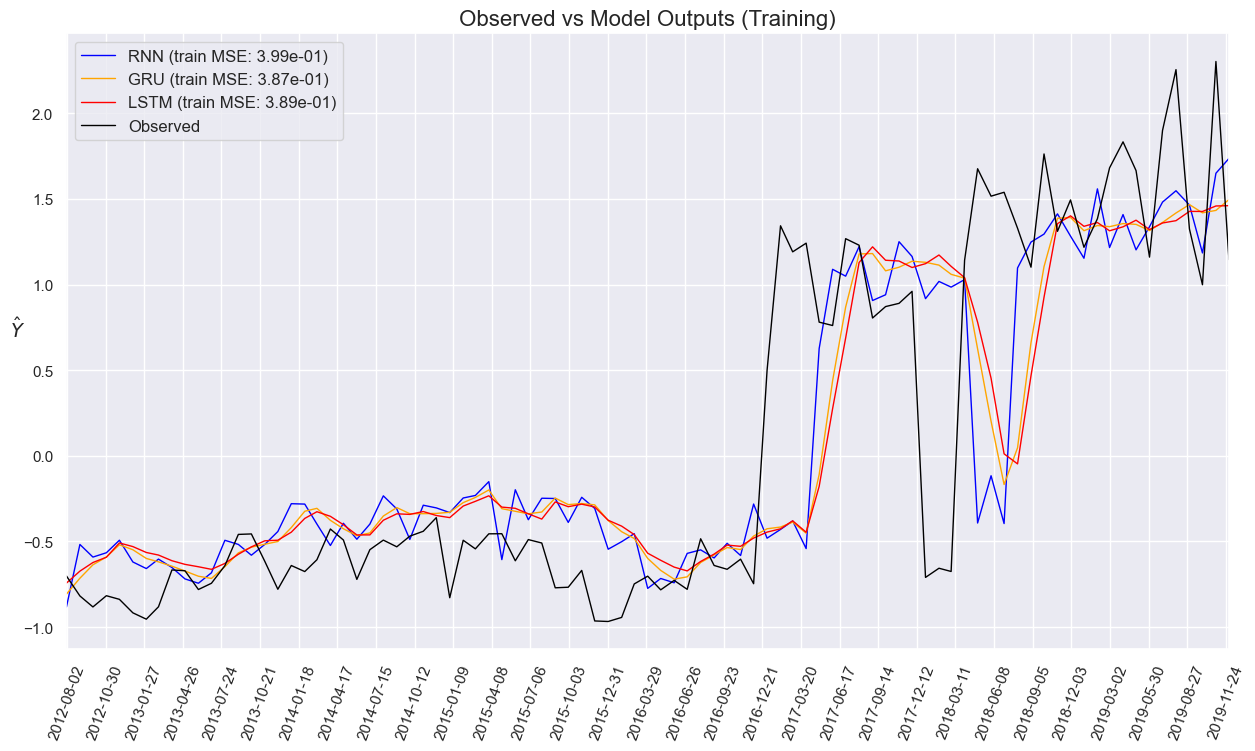

In [86]:
#dict_keys(['rnn', 'gru', 'lstm'])
max_pts = 10**4
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable. 

fig = plt.figure(figsize=(15,8))
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds]
    label = params[key]['label'] + ' (train MSE: %.2e)' % params[key]['MSE_train']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_train[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
xticks =  [start.date() + timedelta(days=(1+i)) for i in range(1 + (end - start).days)]
xticks = xticks[::max(1, len(xticks)//30)]
for t in xticks: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(xticks, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Training)', fontsize=16);

Resultados de las predicciones del modelo para el conjunto de entrenamiento

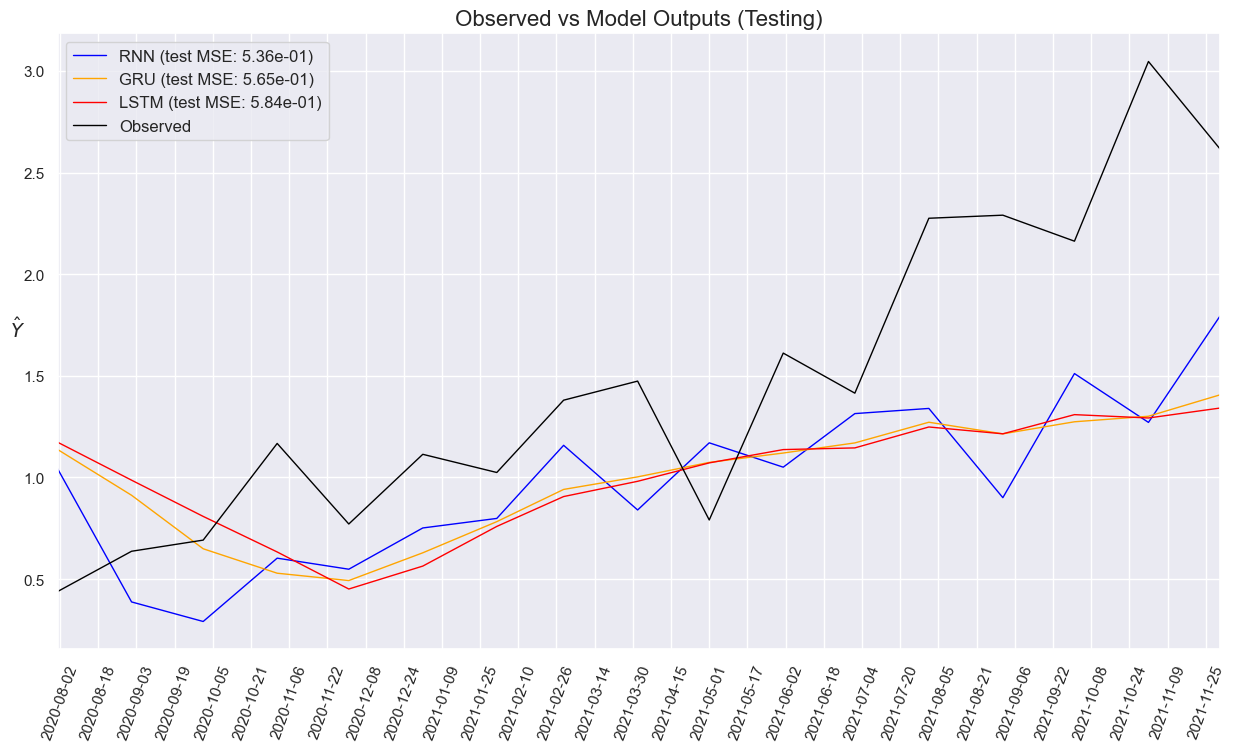

In [87]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds]
    label = params[key]['label'] + ' (test MSE: %.2e)' % params[key]['MSE_test']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
plt.plot(x_vals, y_test[l:u:ds], c="black", label="Observed", lw=1)
start, end = x_vals.min(), x_vals.max()
xticks =  [start.date() + timedelta(days=(1+i)) for i in range(1 + (end - start).days)]
xticks = xticks[::max(1, len(xticks)//30)]
for t in xticks: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(xticks, rotation=70)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}$', rotation=0, fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Outputs (Testing)', fontsize=16);

Resultado de las predicciones para el conjunto de prueba, 

#### Error de predicción

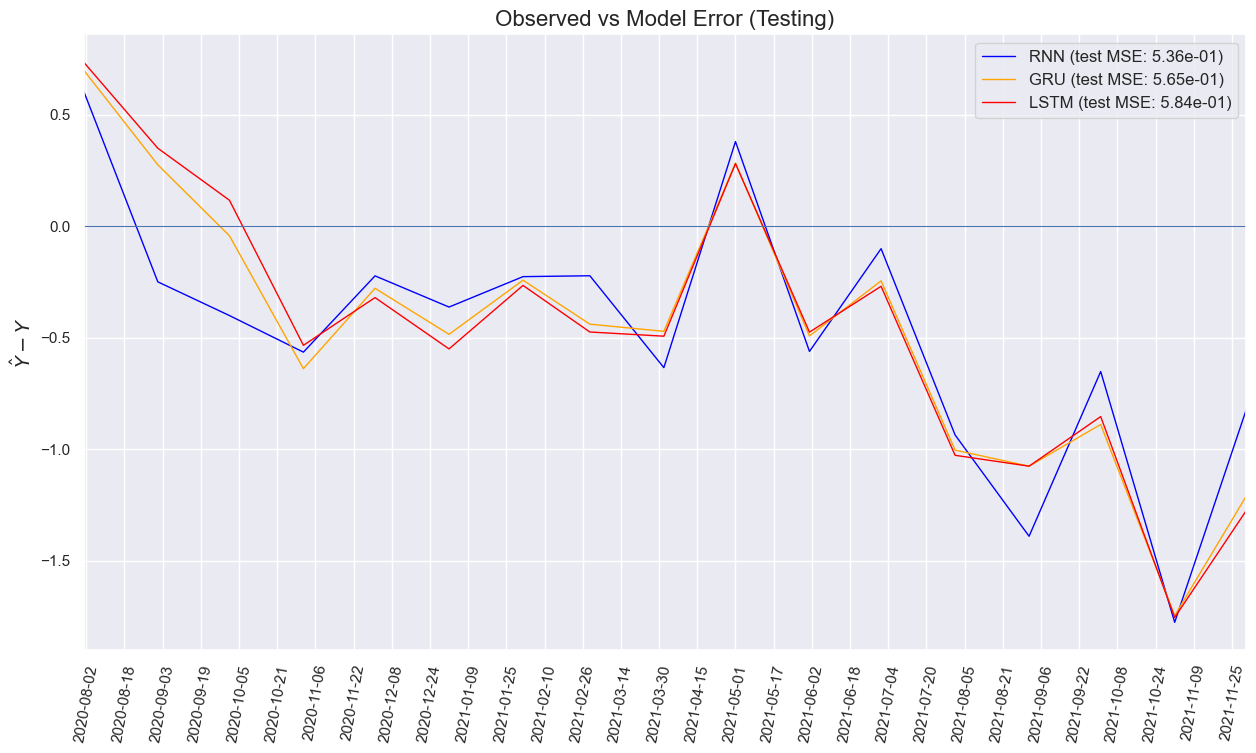

In [88]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # e.g. (None, 100000) lower and upper indices of range to plot 
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds] - y_test[l:u:ds]
    label = params[key]['label'] + ' (test MSE: %.2e)' % params[key]['MSE_test']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
start, end = x_vals.min(), x_vals.max()
xticks =  [start.date() + timedelta(days=(1+i)) for i in range(1 + (end - start).days)]
xticks = xticks[::max(1, len(xticks)//30)]
plt.axhline(0, linewidth=0.8)
for t in xticks: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(xticks, rotation=80)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}-Y$', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Error (Testing)', fontsize=16);

Diferencia entre la predicción y el verdadero valor, Error de predicción. Debería comportarse aproximadamente estacionario, para estar seguros de que las predicciones son buenas, pero parece tener una tendencia y no ser estacionario

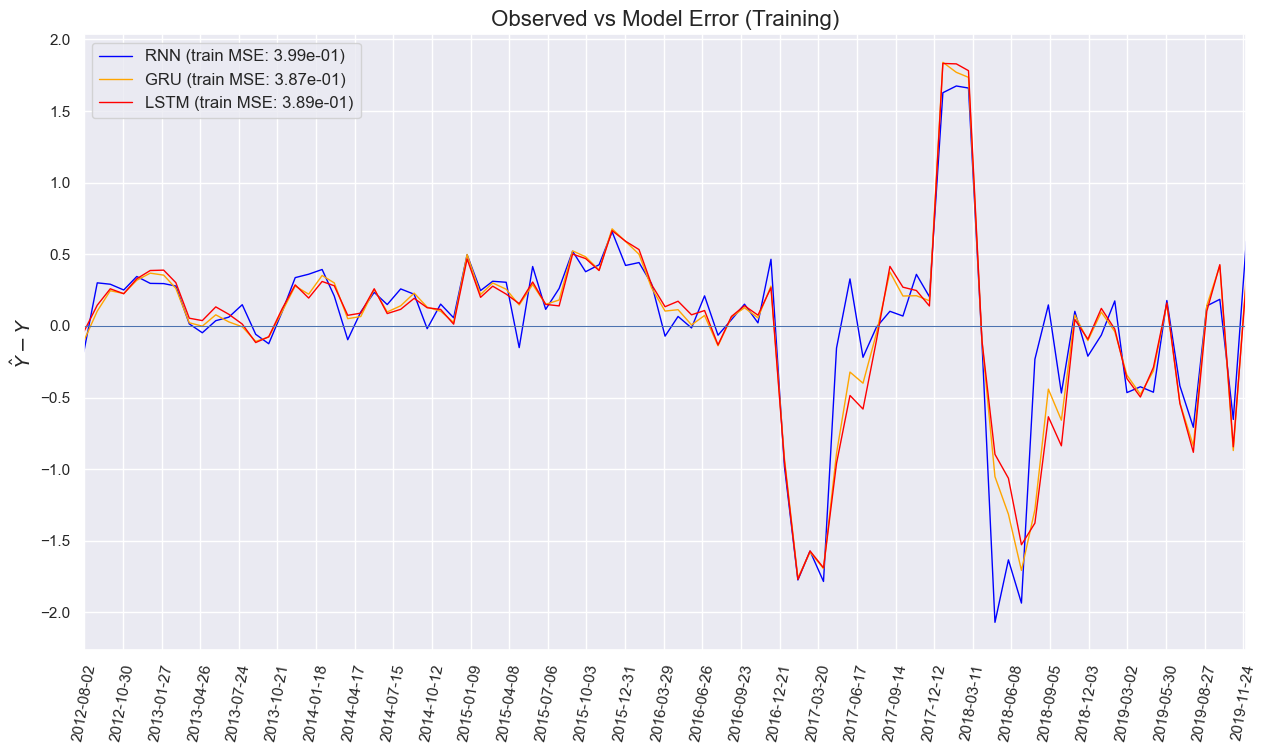

In [89]:
compare = params.keys() # e.g. ['rnn', 'alpharnn'] or ['lstm']
l, u = (None, None) # lower and upper indices of range to plot - e.g. (None, 10000)
ds = max(1, len(y_train[l:u])//max_pts) # Downsampling ratio for under `max_pts`
                                        # per series.  Set `None` to disable.
fig = plt.figure(figsize=(15,8))
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds] - y_train[l:u:ds]
    label = params[key]['label'] + ' (train MSE: %.2e)' % params[key]['MSE_train']
    plt.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)
start, end = x_vals.min(), x_vals.max()
xticks =  [start.date() + timedelta(days=(1+i)) for i in range(1 + (end - start).days)]
xticks = xticks[::max(1, len(xticks)//30)]
plt.axhline(0, linewidth=0.8)
for t in xticks: plt.axvline(x=t, c='gray', linewidth=0.5, zorder=0)
plt.xticks(xticks, rotation=80)
plt.xlim(start, end)
plt.ylabel('$\hat{Y}-Y$', fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.title('Observed vs Model Error (Training)', fontsize=16);

En el conjunto de entrenamiento se mira el error de predicción para saber si el modelo esta haciendo bien las cosas, es decir debe lucir como un proceso estacionario (o mínimo aproximadamente estacionario), si el ajuste se hizo correctamente (las estimaciones de los parámetros se están haciendo bien). Si hay tendencias el ajuste no es muy bueno.

## Diagnostico del modelo